In [ ]:
'''
Dataset Info.

train.csv [파일]
84406개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
 절도 : 6년이하, 1천만원 이하
 강도 : 5년??
 상해 : 7년이하, 10년이하 영업정

test.csv [파일]
17289개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소


sample_submission.csv [제출양식]
ID : 샘플 별 고유 id
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
'''

In [99]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [18]:
y_train = train['TARGET']
x_train = train.drop(['ID', 'TARGET'], axis = 1)

x_test = test.drop('ID', axis = 1)

In [19]:
print(train.shape)
train.head(3)

(84406, 20)


ID   월   요일  시간  소관경찰서  소관지역    사건발생거리  강수량(mm)  강설량(mm)  적설량(cm)  \
0  TRAIN_00000   9  화요일  10    137   8.0  2.611124      0.0      0.0      0.0   
1  TRAIN_00001  11  화요일   6    438  13.0  3.209093      0.0      0.0      0.0   
2  TRAIN_00002   8  일요일   6   1729  47.0  1.619597      0.0      0.0      0.0   

      풍향   안개  짙은안개   번개  진눈깨비   서리  연기/연무  눈날림 범죄발생지  TARGET  
0  245.0  0.0   0.0  0.0   0.0  0.0    0.0  0.0    차도       2  
1  200.0  0.0   0.0  0.0   0.0  0.0    0.0  0.0    차도       0  
2   40.0  1.0   0.0  0.0   0.0  0.0    1.0  0.0    인도       1

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [10]:
train.describe()

월            시간         소관경찰서          소관지역        사건발생거리  \
count  84406.000000  84406.000000  84406.000000  84406.000000  84406.000000   
mean       6.430195      6.769507   1060.027581     26.881726      1.912424   
std        3.108302      3.566390    698.380485     13.870968      0.958556   
min        1.000000      1.000000     26.000000      5.000000      0.012269   
25%        4.000000      4.000000    526.000000     13.000000      1.209985   
50%        7.000000      7.000000    937.000000     27.000000      1.822279   
75%        9.000000     10.000000   1638.000000     38.000000      2.476528   
max       12.000000     12.000000   2450.000000     54.000000      4.998936   

            강수량(mm)       강설량(mm)       적설량(cm)            풍향            안개  \
count  84406.000000  84406.000000  84406.000000  84406.000000  84406.000000   
mean      24.608776      2.284407     23.430503    186.926107      0.385423   
std       62.711211     15.852881     85.199896     98.299485      0.486698   
min        0.000000      0.000000      0.000000     10.000000      0.000000   
25%        0.000000      0.000000      0.000000     95.000000      0.000000   
50%        0.625000      0.000000      0.000000    205.000000      0.000000   
75%       18.571429      0.000000      0.000000    260.000000      1.000000   
max      614.875000    295.000000    649.800000    360.000000      1.000000   

               짙은안개            번개          진눈깨비            서리         연기/연무  \
count  84406.000000  84406.000000  84406.000000  84406.000000  84406.000000   
mean       0.017842      0.144042      0.020330      0.010260      0.210755   
std        0.132379      0.351134      0.141128      0.100771      0.407847   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                눈날림        TARGET  
count  84406.000000  84406.000000  
mean       0.008921      0.835355  
std        0.094030      0.819762  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        0.000000      2.000000  
max        1.000000      2.000000

In [11]:
train.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [12]:
corr_train = train.corr().apply(lambda x: round(x ,2))
corr_train

C:\Users\이도형\AppData\Local\Temp\ipykernel_17196\2513620239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train.corr().apply(lambda x: round(x ,2))


월    시간  소관경찰서  소관지역  사건발생거리  강수량(mm)  강설량(mm)  적설량(cm)    풍향  \
월        1.00  0.00   0.02  0.02    0.00     0.07    -0.22    -0.40 -0.05   
시간       0.00  1.00  -0.01 -0.00    0.00     0.00    -0.00    -0.00  0.00   
소관경찰서    0.02 -0.01   1.00  0.68   -0.12    -0.00     0.00    -0.00 -0.00   
소관지역     0.02 -0.00   0.68  1.00   -0.10     0.00    -0.00    -0.01 -0.00   
사건발생거리   0.00  0.00  -0.12 -0.10    1.00     0.01     0.00     0.00 -0.00   
강수량(mm)  0.07  0.00  -0.00  0.00    0.01     1.00     0.14    -0.01 -0.03   
강설량(mm) -0.22 -0.00   0.00 -0.00    0.00     0.14     1.00     0.50  0.07   
적설량(cm) -0.40 -0.00  -0.00 -0.01    0.00    -0.01     0.50     1.00  0.17   
풍향      -0.05  0.00  -0.00 -0.00   -0.00    -0.03     0.07     0.17  1.00   
안개      -0.10 -0.00  -0.00 -0.01   -0.00     0.32     0.14     0.15  0.01   
짙은안개    -0.18 -0.00   0.00 -0.00   -0.00    -0.03     0.03     0.09  0.04   
번개       0.17  0.00  -0.00  0.00    0.00     0.36    -0.06    -0.11  0.04   
진눈깨비    -0.16 -0.01  -0.00 -0.00    0.00    -0.03     0.02     0.18 -0.06   
서리      -0.15 -0.00  -0.00 -0.01   -0.00    -0.01     0.04     0.01 -0.09   
연기/연무   -0.03 -0.01   0.01  0.00    0.00    -0.02     0.06     0.14  0.00   
눈날림     -0.14 -0.00  -0.00 -0.01    0.00     0.08     0.52     0.32  0.06   
TARGET  -0.01  0.02   0.00 -0.00    0.00    -0.01    -0.02    -0.01 -0.01   

           안개  짙은안개    번개  진눈깨비    서리  연기/연무   눈날림  TARGET  
월       -0.10 -0.18  0.17 -0.16 -0.15  -0.03 -0.14   -0.01  
시간      -0.00 -0.00  0.00 -0.01 -0.00  -0.01 -0.00    0.02  
소관경찰서   -0.00  0.00 -0.00 -0.00 -0.00   0.01 -0.00    0.00  
소관지역    -0.01 -0.00  0.00 -0.00 -0.01   0.00 -0.01   -0.00  
사건발생거리  -0.00 -0.00  0.00  0.00 -0.00   0.00  0.00    0.00  
강수량(mm)  0.32 -0.03  0.36 -0.03 -0.01  -0.02  0.08   -0.01  
강설량(mm)  0.14  0.03 -0.06  0.02  0.04   0.06  0.52   -0.02  
적설량(cm)  0.15  0.09 -0.11  0.18  0.01   0.14  0.32   -0.01  
풍향       0.01  0.04  0.04 -0.06 -0.09   0.00  0.06   -0.01  
안개       1.00  0.17  0.35  0.11  0.13   0.41  0.12   -0.01  
짙은안개     0.17  1.00 -0.06  0.22  0.33   0.08  0.14    0.00  
번개       0.35 -0.06  1.00 -0.06 -0.04   0.06 -0.04   -0.01  
진눈깨비     0.11  0.22 -0.06  1.00  0.57   0.11 -0.01    0.01  
서리       0.13  0.33 -0.04  0.57  1.00   0.09 -0.01    0.01  
연기/연무    0.41  0.08  0.06  0.11  0.09   1.00  0.03    0.00  
눈날림      0.12  0.14 -0.04 -0.01 -0.01   0.03  1.00   -0.01  
TARGET  -0.01  0.00 -0.01  0.01  0.01   0.00 -0.01    1.00

In [13]:
s = corr_train.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

요일
금요일    12243
목요일    11331
수요일    11410
월요일    11702
일요일    12837
토요일    13317
화요일    11566
dtype: int64


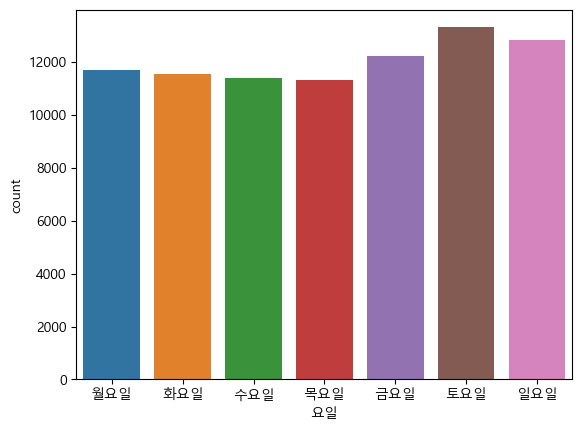

In [21]:
plt.rc("font", family="Malgun Gothic")
sns.countplot(x='요일',data=train,order = ('월요일','화요일','수요일','목요일','금요일','토요일','일요일'))
print(train.groupby('요일').size())

시간
1     7093
2     6800
3     6681
4     6291
5     6152
6     6119
7     6452
8     7130
9     7374
10    7451
11    7423
12    9440
dtype: int64


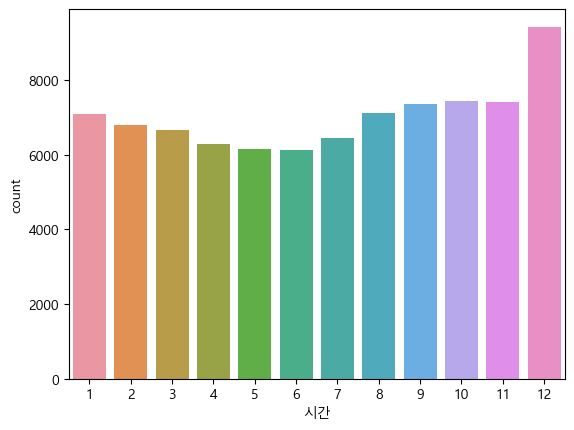

In [22]:
sns.countplot(x='시간',data = train)
print(train.groupby('시간').size())

TARGET
0    36453
1    25397
2    22556
dtype: int64


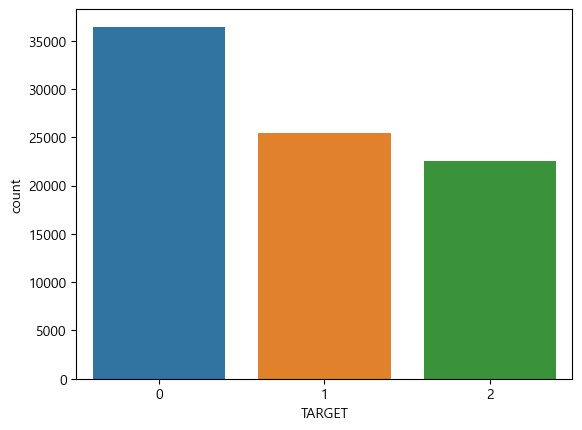

In [26]:
sns.countplot(x='TARGET',data = train)
print(train.groupby('TARGET').size())

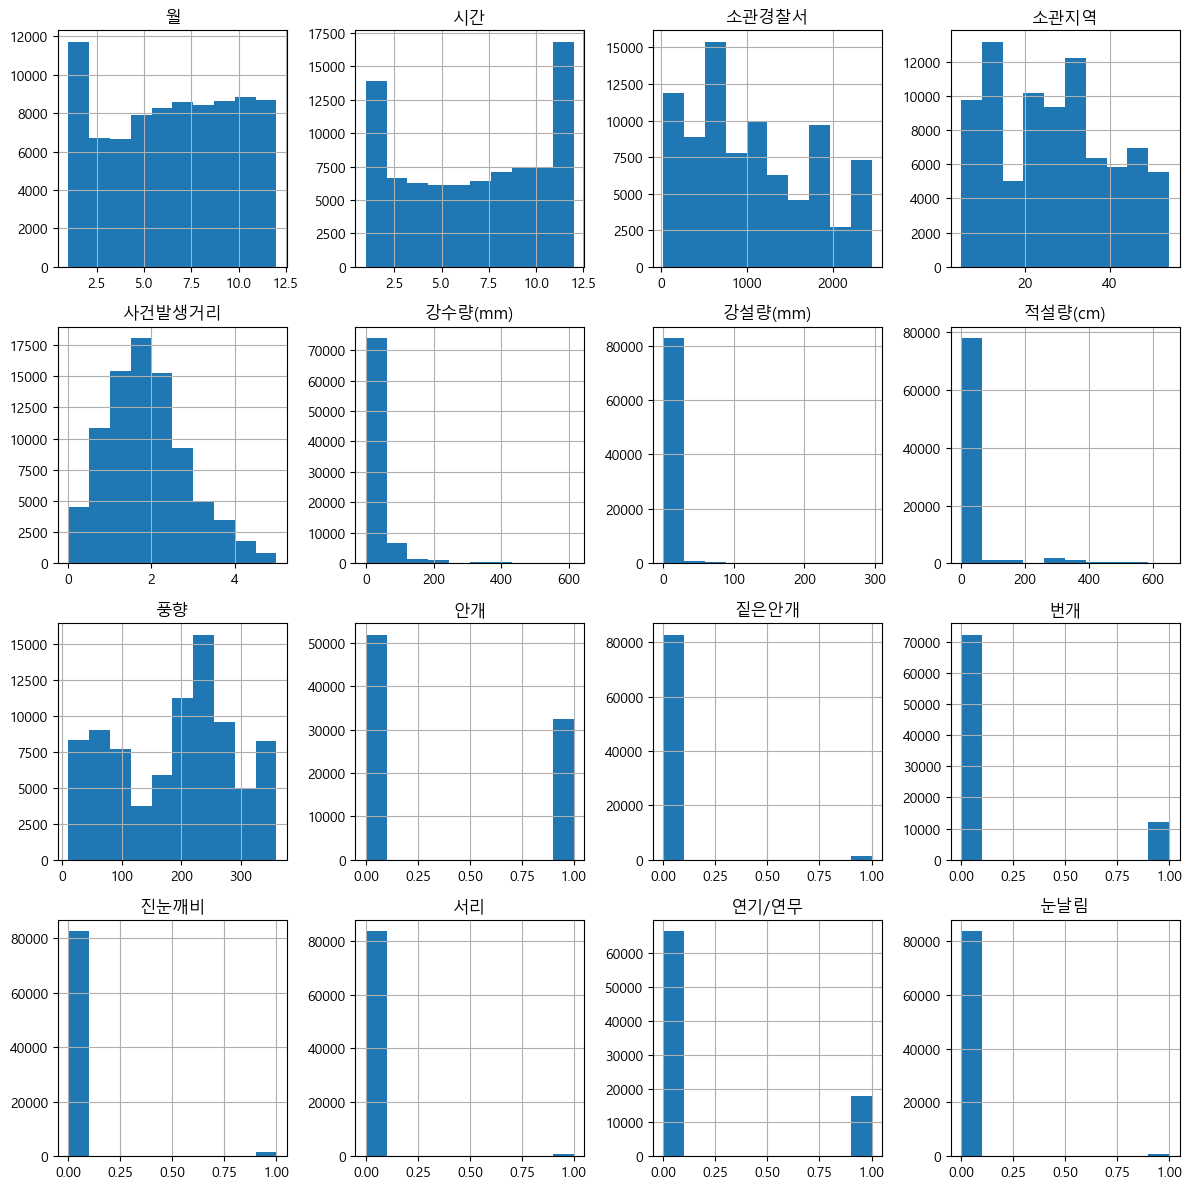

In [16]:
import warnings
warnings.filterwarnings('ignore')

except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

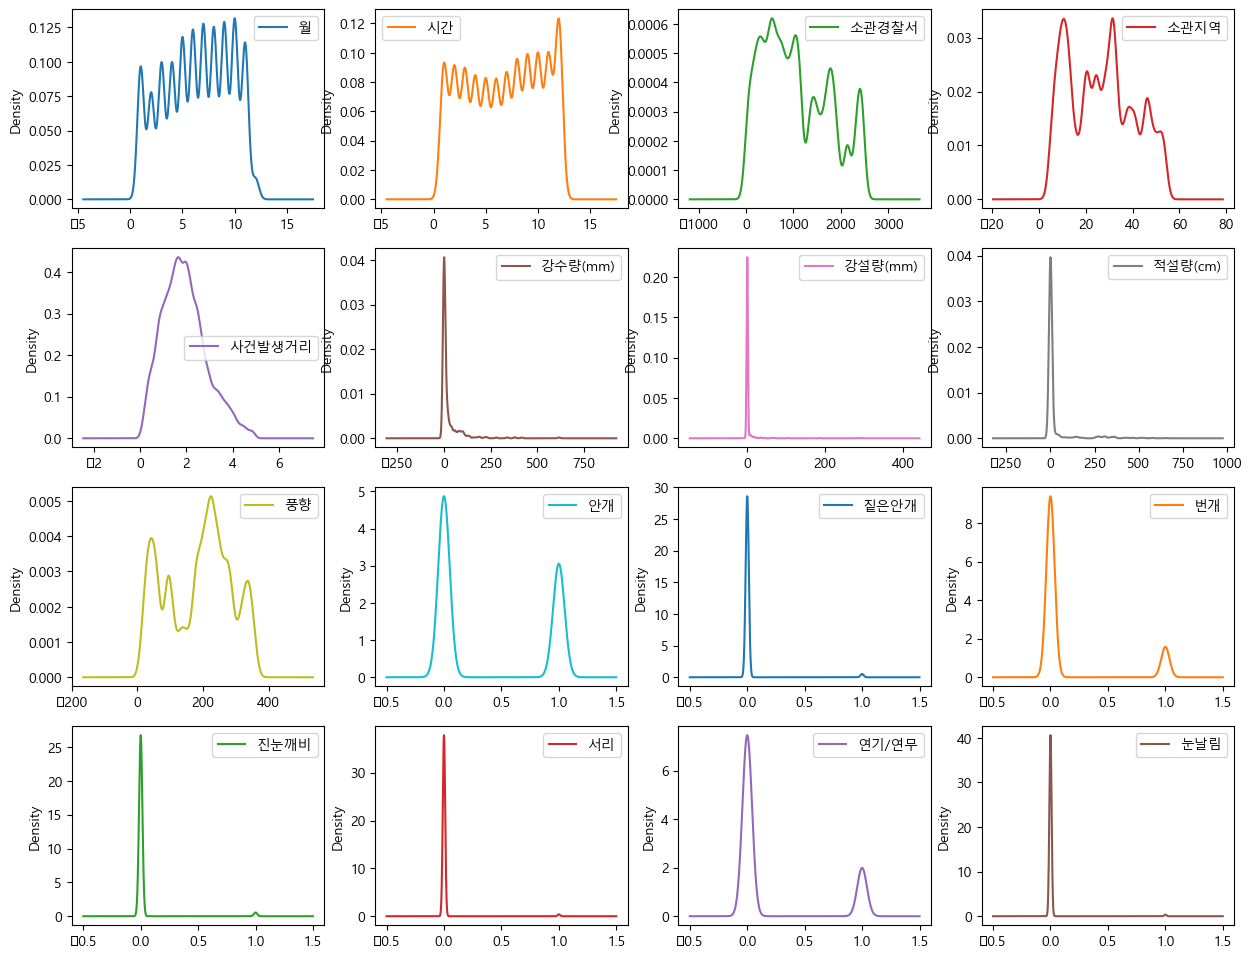

In [15]:
import warnings
warnings.filterwarnings('ignore')

x_train.plot(kind="density", layout=(5,4), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.rc("font", family="Malgun Gothic")
plt.show()


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   요일       84406 non-null  object 
 2   시간       84406 non-null  int64  
 3   소관경찰서    84406 non-null  int64  
 4   소관지역     84406 non-null  float64
 5   사건발생거리   84406 non-null  float64
 6   강수량(mm)  84406 non-null  float64
 7   강설량(mm)  84406 non-null  float64
 8   적설량(cm)  84406 non-null  float64
 9   풍향       84406 non-null  float64
 10  안개       84406 non-null  float64
 11  짙은안개     84406 non-null  float64
 12  번개       84406 non-null  float64
 13  진눈깨비     84406 non-null  float64
 14  서리       84406 non-null  float64
 15  연기/연무    84406 non-null  float64
 16  눈날림      84406 non-null  float64
 17  범죄발생지    84406 non-null  object 
dtypes: float64(13), int64(3), object(2)
memory usage: 11.6+ MB


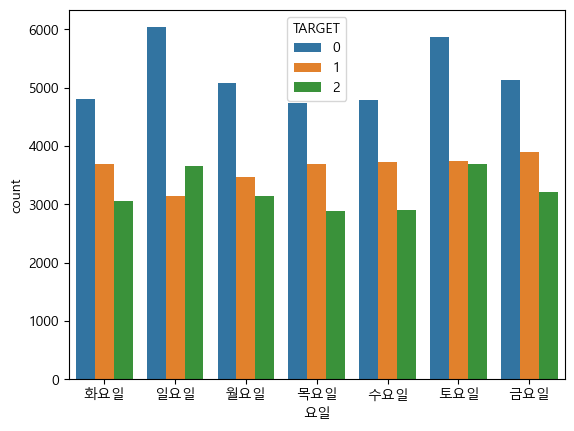

In [27]:
sns.countplot(x = '요일', hue = 'TARGET', data = train)
plt.show()

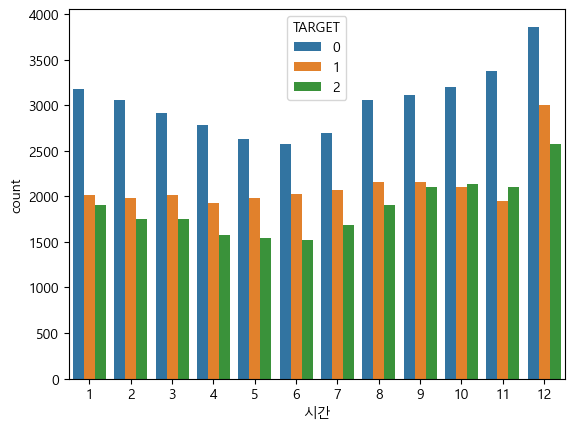

In [24]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

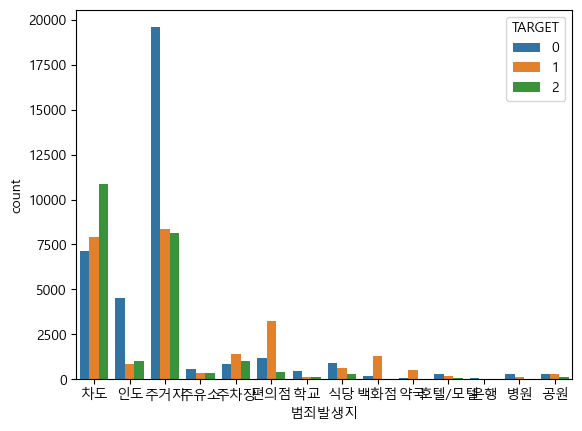

In [141]:
sns.countplot(x = '범죄발생지', hue = 'TARGET', data = train)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import numpy as np

In [21]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [22]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, f1_score

In [46]:
xgb_model = XGBClassifier(n_estimators= 300,learning_rate= 0.1,max_depth= 5,eval_metric= 'merror')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [48]:
pred = xgb_model.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5527211399822115

In [50]:
pred2 = xgb_model.predict(x_test)

In [51]:
sub['TARGET'] = pred2
sub.head()

ID  TARGET
0  TEST_00000       2
1  TEST_00001       0
2  TEST_00002       0
3  TEST_00003       0
4  TEST_00004       0

In [52]:
sub.to_csv('sub_xgb_grid2.csv', index = False)

In [54]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [76]:
importance = xgb_model.feature_importances_
feature_names = list(x_train.columns)

In [82]:
sorted_idx = importance.argsort()[::-1]

범죄발생지: 0.3990326225757599
소관지역: 0.08990478515625
소관경찰서: 0.08525654673576355
요일: 0.03842945024371147
월: 0.033544719219207764
진눈깨비: 0.03204750642180443
사건발생거리: 0.031272128224372864
시간: 0.029992349445819855
적설량(cm): 0.0296330563724041
짙은안개: 0.028819508850574493
강설량(mm): 0.02827909216284752
강수량(mm): 0.027492957189679146
서리: 0.02688552439212799
눈날림: 0.026047205552458763
풍향: 0.02547898143529892
연기/연무: 0.023980073630809784
번개: 0.022935982793569565
안개: 0.02096755988895893


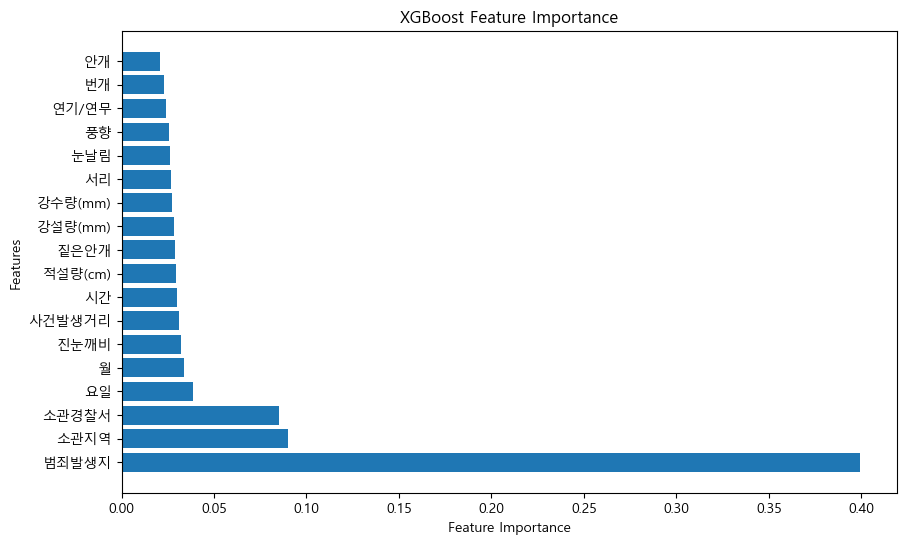

In [83]:
for i in sorted_idx:
    print(f"{feature_names[i]}: {importance[i]}")

# Plot feature importance in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [88]:
importance = xgb_model.get_booster().get_score(importance_type='gain')
feature_names = list(x_train.columns)

범죄발생지: 30.677879333496094
소관지역: 6.9119367599487305
소관경찰서: 6.554576873779297
요일: 2.9544804096221924
월: 2.578939199447632
진눈깨비: 2.4638326168060303
사건발생거리: 2.4042208194732666
시간: 2.305830717086792
적설량(cm): 2.278208017349243
짙은안개: 2.2156620025634766
강설량(mm): 2.174114465713501
강수량(mm): 2.113675832748413
서리: 2.0669760704040527
눈날림: 2.002525568008423
풍향: 1.9588401317596436
연기/연무: 1.8436031341552734
번개: 1.7633328437805176
안개: 1.611999273300171


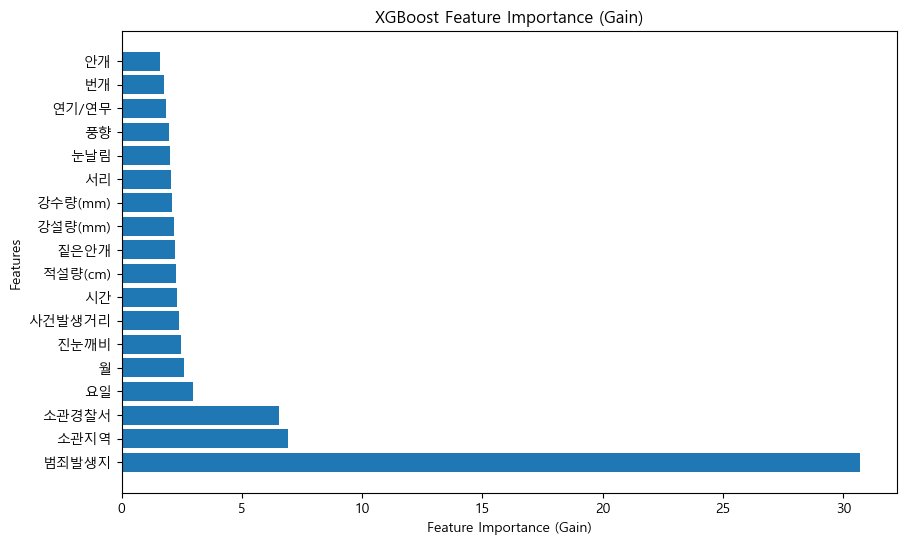

In [90]:
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance_value in sorted_importance:
    print(f"{feature}: {importance_value}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

In [91]:
import shap

In [92]:
explainer = shap.Explainer(xgb_model)

In [101]:
shap_values = explainer.shap_values(x_test)

In [128]:
print(shap_values[0])

[[ 5.1590335e-03 -3.7452135e-02  4.6116412e-02 ...  2.0258522e-03
  -1.0846349e-05 -4.1382408e-01]
 [-9.5167402e-03 -4.3144383e-02  6.0153361e-03 ...  4.1545862e-03
  -3.3426561e-05  2.0978938e-01]
 [ 2.0345054e-03 -3.3456899e-02  1.7594498e-02 ... -2.1670618e-04
  -1.4468761e-05  3.0304724e-01]
 ...
 [ 2.7692530e-03 -1.0661577e-02 -3.4107987e-02 ...  1.9204229e-03
  -8.3023724e-06  2.8923312e-01]
 [ 3.5073706e-03 -3.5343267e-02  9.9035036e-03 ...  1.8394031e-03
  -7.8420380e-06  2.2203891e-01]
 [-2.8760808e-03 -7.8079186e-02 -1.6555425e-02 ... -1.9744698e-02
  -1.0846349e-05 -1.1215580e+00]]


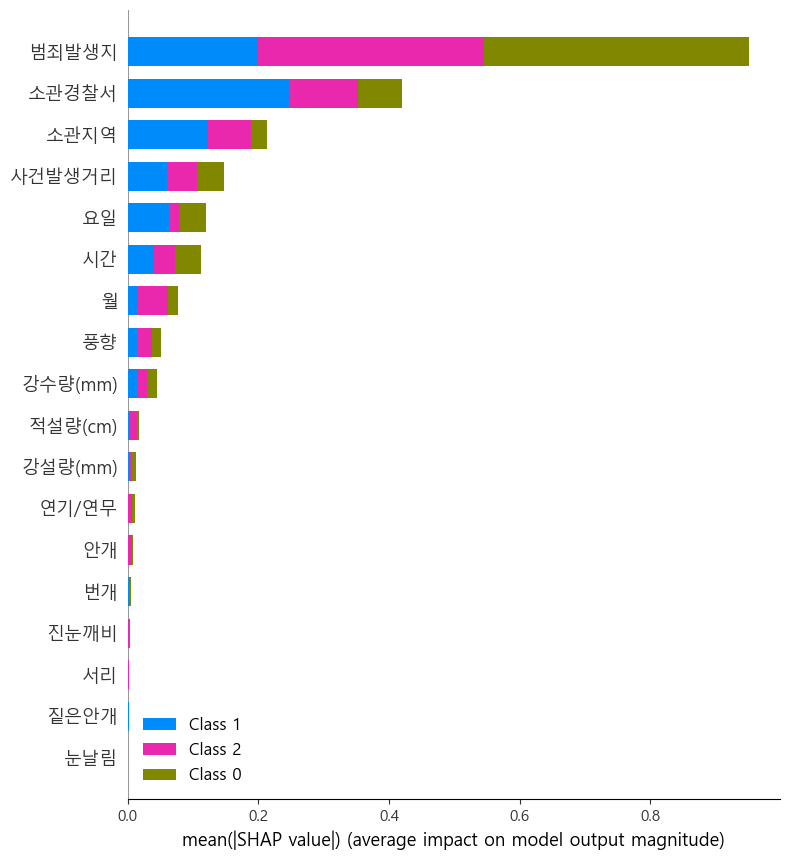

In [97]:
shap.summary_plot(shap_values, x_test, plot_type='bar')

In [112]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index], x_test.iloc[instance_index])

In [122]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[0][instance_index], x_test.iloc[instance_index])

In [121]:
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value[2], shap_values[0][instance_index], x_test.iloc[instance_index])

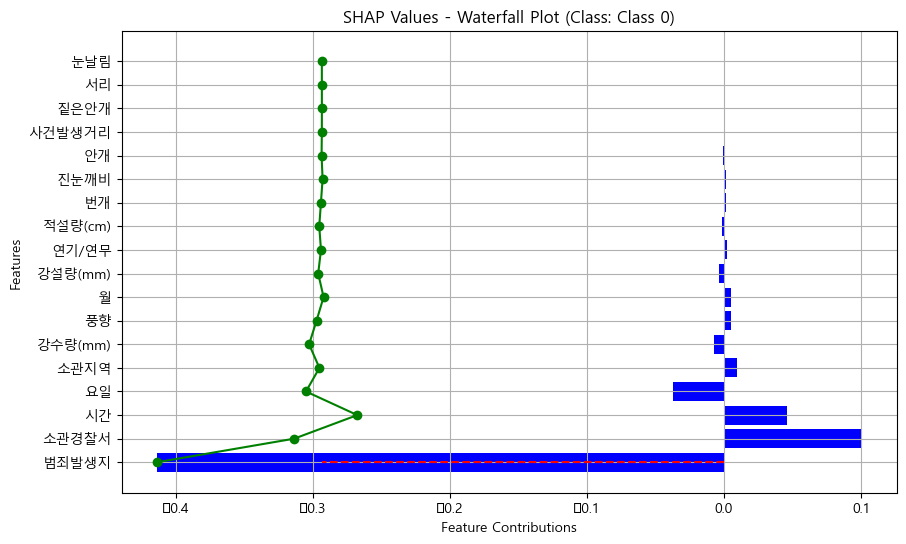

In [139]:
class_labels = ["Class 0", "Class 1", "Class 2"]

# Select a specific instance for the waterfall plot
instance_index = 0
class_index = 0  # Choose the class for which you want to visualize the waterfall plot

# Get the SHAP values for the selected instance and class
shap_values_instance = shap_values[class_index][instance_index]

# Sort the feature contributions in descending order
sorted_indices = np.argsort(np.abs(shap_values_instance))[::-1]
sorted_contributions = shap_values_instance[sorted_indices]
sorted_features = x_test.columns[sorted_indices]

# Calculate the cumulative contributions
cumulative_contributions = np.cumsum(sorted_contributions)

# Plot the waterfall chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_contributions, color='b')
plt.plot([0, cumulative_contributions[-1]], [0, 0], 'r--', linewidth=1.5)
plt.plot(cumulative_contributions, sorted_features, 'go-', linewidth=1.5, markersize=6)
plt.xlabel("Feature Contributions")
plt.ylabel("Features")
plt.title("SHAP Values - Waterfall Plot (Class: {})".format(class_labels[class_index]))
plt.grid(True)
plt.show()

In [ ]:
#XGBoost hyperopt

In [318]:
X, Y = train.drop(['ID', 'TARGET'], axis=1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
#test = test.drop('ID', axis = 1)

In [321]:
from hyperopt import hp

xgb_search_space = {
    'max_depth':hp.quniform('max_depth', 5, 20, 1),                     ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),        ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),
}

In [322]:
## 2. 목적 함수 설정
## 검색 공간에서 설정한 하이퍼 파라미터들을 입력 받아서 XGBoost를 학습시키고, 평가 지표를 반환하도록 구성되어야 함

from sklearn.model_selection import cross_val_score  ## 교차 검증
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

scorer = make_scorer(f1_score, average='macro')

def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'], 
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss'
    )

    scorer = make_scorer(f1_score, average='macro')
    f1_scores = cross_val_score(xgb_clf, X_train, y_train, scoring=scorer, cv=3)

    return {
        'loss': -1 * np.mean(f1_scores),
        'status': STATUS_OK
    }


In [323]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials() ## 결과 저장

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,    ## 최대 반복 횟수 지정
    trials=trial_val,
)

100%|███████████████████████████████████████████████| 50/50 [44:05<00:00, 52.91s/trial, best loss: -0.5195852103088323]


In [324]:
xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

In [329]:
## early stopping

evals = [(X_train, y_train), (X_test, y_test)]

## model train

xgb_wrapper.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_metric='merror',
    eval_set=evals,
    verbose=True
)

[0]	validation_0-merror:0.51026	validation_1-merror:0.51718
[1]	validation_0-merror:0.45873	validation_1-merror:0.46635
[2]	validation_0-merror:0.45285	validation_1-merror:0.46067
[3]	validation_0-merror:0.45388	validation_1-merror:0.46351
[4]	validation_0-merror:0.46668	validation_1-merror:0.47856
[5]	validation_0-merror:0.46000	validation_1-merror:0.47216
[6]	validation_0-merror:0.45421	validation_1-merror:0.46327
[7]	validation_0-merror:0.45194	validation_1-merror:0.46096
[8]	validation_0-merror:0.44676	validation_1-merror:0.45575
[9]	validation_0-merror:0.44740	validation_1-merror:0.45688
[10]	validation_0-merror:0.45097	validation_1-merror:0.46363
[11]	validation_0-merror:0.45243	validation_1-merror:0.46576
[12]	validation_0-merror:0.45159	validation_1-merror:0.46499
[13]	validation_0-merror:0.45462	validation_1-merror:0.46849
[14]	validation_0-merror:0.45237	validation_1-merror:0.46564
[15]	validation_0-merror:0.45489	validation_1-merror:0.46861
[16]	validation_0-merror:0.44839	v

[134]	validation_0-merror:0.41901	validation_1-merror:0.44385
[135]	validation_0-merror:0.41905	validation_1-merror:0.44414
[136]	validation_0-merror:0.41904	validation_1-merror:0.44408
[137]	validation_0-merror:0.41862	validation_1-merror:0.44408
[138]	validation_0-merror:0.41852	validation_1-merror:0.44367
[139]	validation_0-merror:0.41834	validation_1-merror:0.44373
[140]	validation_0-merror:0.41824	validation_1-merror:0.44379
[141]	validation_0-merror:0.41812	validation_1-merror:0.44402
[142]	validation_0-merror:0.41803	validation_1-merror:0.44402
[143]	validation_0-merror:0.41801	validation_1-merror:0.44385
[144]	validation_0-merror:0.41778	validation_1-merror:0.44361
[145]	validation_0-merror:0.41761	validation_1-merror:0.44349
[146]	validation_0-merror:0.41742	validation_1-merror:0.44379
[147]	validation_0-merror:0.41736	validation_1-merror:0.44390


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.61544, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05853, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [330]:
## eval
preds = xgb_wrapper.predict(X_test)

In [331]:
score = f1_score(preds,y_test,average='macro')
score

0.5272477626133879

In [332]:
p = xgb_wrapper.predict(X_train)

In [333]:
score = f1_score(p,y_train,average='macro')
score

0.5463831741293125

In [334]:
best

{'colsample_bytree': 0.6154395701566401,
 'learning_rate': 0.05852879065946083,
 'max_depth': 7.0,
 'min_child_weight': 2.0}

In [335]:
xgb_wrapper

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.61544, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05853, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [336]:
xgb_model_fix = XGBClassifier(n_estimators= 300,colsample_bytree= 0.6154,learning_rate= 0.0585,max_depth= 7,
                              min_child_weight= 2.0,eval_metric= 'merror')

In [337]:
xgb_model_fix.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6154, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0585, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=2.0, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [338]:
p = xgb_model_fix.predict(X_test)

In [339]:
score = f1_score(p,y_test,average='macro')
score

0.5260952345068667

In [340]:
p = xgb_model_fix.predict(X_train)
score = f1_score(p,y_train,average='macro')
score

0.5770431459183277

In [341]:
pred = xgb_model_fix.predict(test)

In [344]:
sub['TARGET'] = pred
sub.head()

ID  TARGET
0  TEST_00000       2
1  TEST_00001       0
2  TEST_00002       0
3  TEST_00003       0
4  TEST_00004       0

In [346]:
sub.to_csv('sub_xgb_hyperopt.csv', index = False)

TARGET
0    9739
1    3857
2    3693
dtype: int64


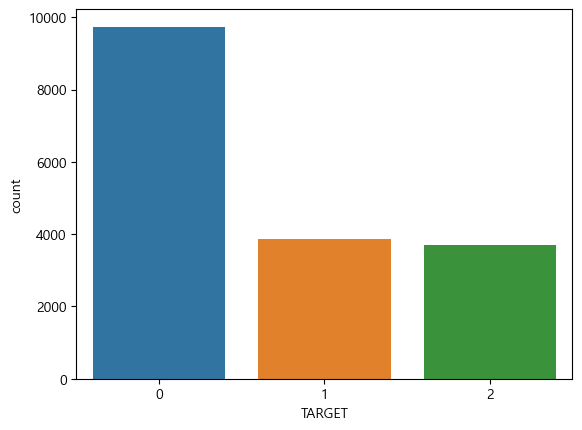

In [345]:
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())

# xgboost - grid 3


In [28]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [29]:
pred = xgb_model.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5768625654868716

In [79]:
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [124]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [125]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [126]:
X, Y = train.drop(['ID', 'TARGET'], axis=1), train[['TARGET']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [141]:
param_grid = {
    'max_depth': [3, 6, 9,12],
    'max_leaves' : [31,63,255]
}

In [142]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,early_stopping_rounds=50)

# Define the macro F1 score as the evaluation metric
macro_f1 = make_scorer(f1_score, average='macro')

In [143]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.05514
[1]	validation_0-mlogloss:1.02802
[2]	validation_0-mlogloss:1.01072
[3]	validation_0-mlogloss:0.99893
[4]	validation_0-mlogloss:0.99074
[5]	validation_0-mlogloss:0.98443
[6]	validation_0-mlogloss:0.98018
[7]	validation_0-mlogloss:0.97664
[8]	validation_0-mlogloss:0.97359
[9]	validation_0-mlogloss:0.97173
[10]	validation_0-mlogloss:0.96998
[11]	validation_0-mlogloss:0.96843
[12]	validation_0-mlogloss:0.96744
[13]	validation_0-mlogloss:0.96657
[14]	validation_0-mlogloss:0.96512
[15]	validation_0-mlogloss:0.96435
[16]	validation_0-mlogloss:0.96345
[17]	validation_0-mlogloss:0.96301
[18]	validation_0-mlogloss:0.96236
[19]	validation_0-mlogloss:0.96202
[20]	validation_0-mlogloss:0.96139
[21]	validation_0-mlogloss:0.96111
[22]	validation_0-mlogloss:0.96082
[23]	validation_0-mlogloss:0.96046
[24]	validation_0-mlogloss:0.96021
[25]	validation_0-mlogloss:0.95999
[26]	validation_0-mlogloss:0.95980
[27]	validation_0-mlogloss:0.95957
[28]	validation_0-mlogloss:0.9

[35]	validation_0-mlogloss:0.95865
[36]	validation_0-mlogloss:0.95855
[37]	validation_0-mlogloss:0.95839
[38]	validation_0-mlogloss:0.95830
[39]	validation_0-mlogloss:0.95821
[40]	validation_0-mlogloss:0.95813
[41]	validation_0-mlogloss:0.95813
[42]	validation_0-mlogloss:0.95799
[43]	validation_0-mlogloss:0.95771
[44]	validation_0-mlogloss:0.95758
[45]	validation_0-mlogloss:0.95747
[46]	validation_0-mlogloss:0.95735
[47]	validation_0-mlogloss:0.95723
[48]	validation_0-mlogloss:0.95713
[49]	validation_0-mlogloss:0.95684
[50]	validation_0-mlogloss:0.95678
[51]	validation_0-mlogloss:0.95681
[52]	validation_0-mlogloss:0.95675
[53]	validation_0-mlogloss:0.95662
[54]	validation_0-mlogloss:0.95658
[55]	validation_0-mlogloss:0.95659
[56]	validation_0-mlogloss:0.95625
[57]	validation_0-mlogloss:0.95620
[58]	validation_0-mlogloss:0.95621
[59]	validation_0-mlogloss:0.95620
[60]	validation_0-mlogloss:0.95600
[61]	validation_0-mlogloss:0.95602
[62]	validation_0-mlogloss:0.95591
[63]	validation_0-ml

[69]	validation_0-mlogloss:0.95462
[70]	validation_0-mlogloss:0.95468
[71]	validation_0-mlogloss:0.95453
[72]	validation_0-mlogloss:0.95450
[73]	validation_0-mlogloss:0.95451
[74]	validation_0-mlogloss:0.95451
[75]	validation_0-mlogloss:0.95446
[76]	validation_0-mlogloss:0.95441
[77]	validation_0-mlogloss:0.95440
[78]	validation_0-mlogloss:0.95432
[79]	validation_0-mlogloss:0.95434
[80]	validation_0-mlogloss:0.95430
[81]	validation_0-mlogloss:0.95421
[82]	validation_0-mlogloss:0.95426
[83]	validation_0-mlogloss:0.95411
[84]	validation_0-mlogloss:0.95391
[85]	validation_0-mlogloss:0.95384
[86]	validation_0-mlogloss:0.95381
[87]	validation_0-mlogloss:0.95378
[88]	validation_0-mlogloss:0.95384
[89]	validation_0-mlogloss:0.95381
[90]	validation_0-mlogloss:0.95375
[91]	validation_0-mlogloss:0.95383
[92]	validation_0-mlogloss:0.95379
[93]	validation_0-mlogloss:0.95364
[94]	validation_0-mlogloss:0.95364
[95]	validation_0-mlogloss:0.95355
[96]	validation_0-mlogloss:0.95350
[97]	validation_0-ml

[3]	validation_0-mlogloss:1.00021
[4]	validation_0-mlogloss:0.99175
[5]	validation_0-mlogloss:0.98630
[6]	validation_0-mlogloss:0.98165
[7]	validation_0-mlogloss:0.97824
[8]	validation_0-mlogloss:0.97530
[9]	validation_0-mlogloss:0.97343
[10]	validation_0-mlogloss:0.97159
[11]	validation_0-mlogloss:0.97025
[12]	validation_0-mlogloss:0.96926
[13]	validation_0-mlogloss:0.96812
[14]	validation_0-mlogloss:0.96698
[15]	validation_0-mlogloss:0.96638
[16]	validation_0-mlogloss:0.96558
[17]	validation_0-mlogloss:0.96493
[18]	validation_0-mlogloss:0.96433
[19]	validation_0-mlogloss:0.96387
[20]	validation_0-mlogloss:0.96347
[21]	validation_0-mlogloss:0.96328
[22]	validation_0-mlogloss:0.96241
[23]	validation_0-mlogloss:0.96206
[24]	validation_0-mlogloss:0.96165
[25]	validation_0-mlogloss:0.96150
[26]	validation_0-mlogloss:0.96090
[27]	validation_0-mlogloss:0.96028
[28]	validation_0-mlogloss:0.96016
[29]	validation_0-mlogloss:0.96009
[30]	validation_0-mlogloss:0.95972
[31]	validation_0-mlogloss:

[38]	validation_0-mlogloss:0.95774
[39]	validation_0-mlogloss:0.95735
[40]	validation_0-mlogloss:0.95727
[41]	validation_0-mlogloss:0.95718
[42]	validation_0-mlogloss:0.95710
[43]	validation_0-mlogloss:0.95690
[44]	validation_0-mlogloss:0.95668
[45]	validation_0-mlogloss:0.95653
[46]	validation_0-mlogloss:0.95640
[47]	validation_0-mlogloss:0.95632
[48]	validation_0-mlogloss:0.95633
[49]	validation_0-mlogloss:0.95626
[50]	validation_0-mlogloss:0.95624
[51]	validation_0-mlogloss:0.95623
[52]	validation_0-mlogloss:0.95624
[53]	validation_0-mlogloss:0.95607
[54]	validation_0-mlogloss:0.95577
[55]	validation_0-mlogloss:0.95564
[56]	validation_0-mlogloss:0.95557
[57]	validation_0-mlogloss:0.95558
[58]	validation_0-mlogloss:0.95541
[59]	validation_0-mlogloss:0.95543
[60]	validation_0-mlogloss:0.95541
[61]	validation_0-mlogloss:0.95541
[62]	validation_0-mlogloss:0.95520
[63]	validation_0-mlogloss:0.95512
[64]	validation_0-mlogloss:0.95503
[65]	validation_0-mlogloss:0.95504
[66]	validation_0-ml

[73]	validation_0-mlogloss:0.95493
[74]	validation_0-mlogloss:0.95490
[75]	validation_0-mlogloss:0.95490
[76]	validation_0-mlogloss:0.95483
[77]	validation_0-mlogloss:0.95480
[78]	validation_0-mlogloss:0.95480
[79]	validation_0-mlogloss:0.95474
[80]	validation_0-mlogloss:0.95472
[81]	validation_0-mlogloss:0.95466
[82]	validation_0-mlogloss:0.95461
[83]	validation_0-mlogloss:0.95467
[84]	validation_0-mlogloss:0.95465
[85]	validation_0-mlogloss:0.95462
[86]	validation_0-mlogloss:0.95454
[87]	validation_0-mlogloss:0.95451
[88]	validation_0-mlogloss:0.95455
[89]	validation_0-mlogloss:0.95449
[90]	validation_0-mlogloss:0.95451
[91]	validation_0-mlogloss:0.95446
[92]	validation_0-mlogloss:0.95443
[93]	validation_0-mlogloss:0.95438
[94]	validation_0-mlogloss:0.95439
[95]	validation_0-mlogloss:0.95442
[96]	validation_0-mlogloss:0.95447
[97]	validation_0-mlogloss:0.95442
[98]	validation_0-mlogloss:0.95443
[99]	validation_0-mlogloss:0.95441
[0]	validation_0-mlogloss:1.05567
[1]	validation_0-mlog

[8]	validation_0-mlogloss:0.97447
[9]	validation_0-mlogloss:0.97260
[10]	validation_0-mlogloss:0.97112
[11]	validation_0-mlogloss:0.96992
[12]	validation_0-mlogloss:0.96894
[13]	validation_0-mlogloss:0.96786
[14]	validation_0-mlogloss:0.96672
[15]	validation_0-mlogloss:0.96580
[16]	validation_0-mlogloss:0.96505
[17]	validation_0-mlogloss:0.96456
[18]	validation_0-mlogloss:0.96408
[19]	validation_0-mlogloss:0.96373
[20]	validation_0-mlogloss:0.96309
[21]	validation_0-mlogloss:0.96268
[22]	validation_0-mlogloss:0.96230
[23]	validation_0-mlogloss:0.96202
[24]	validation_0-mlogloss:0.96158
[25]	validation_0-mlogloss:0.96133
[26]	validation_0-mlogloss:0.96097
[27]	validation_0-mlogloss:0.96086
[28]	validation_0-mlogloss:0.96013
[29]	validation_0-mlogloss:0.95980
[30]	validation_0-mlogloss:0.95960
[31]	validation_0-mlogloss:0.95960
[32]	validation_0-mlogloss:0.95942
[33]	validation_0-mlogloss:0.95909
[34]	validation_0-mlogloss:0.95858
[35]	validation_0-mlogloss:0.95810
[36]	validation_0-mlog

[63]	validation_0-mlogloss:0.95537
[64]	validation_0-mlogloss:0.95530
[65]	validation_0-mlogloss:0.95543
[66]	validation_0-mlogloss:0.95554
[67]	validation_0-mlogloss:0.95565
[68]	validation_0-mlogloss:0.95563
[69]	validation_0-mlogloss:0.95583
[0]	validation_0-mlogloss:1.04462
[1]	validation_0-mlogloss:1.01365
[2]	validation_0-mlogloss:0.99394
[3]	validation_0-mlogloss:0.98107
[4]	validation_0-mlogloss:0.97298
[5]	validation_0-mlogloss:0.96690
[6]	validation_0-mlogloss:0.96264
[7]	validation_0-mlogloss:0.95997
[8]	validation_0-mlogloss:0.95826
[9]	validation_0-mlogloss:0.95663
[10]	validation_0-mlogloss:0.95585
[11]	validation_0-mlogloss:0.95520
[12]	validation_0-mlogloss:0.95472
[13]	validation_0-mlogloss:0.95473
[14]	validation_0-mlogloss:0.95430
[15]	validation_0-mlogloss:0.95412
[16]	validation_0-mlogloss:0.95415
[17]	validation_0-mlogloss:0.95365
[18]	validation_0-mlogloss:0.95390
[19]	validation_0-mlogloss:0.95391
[20]	validation_0-mlogloss:0.95385
[21]	validation_0-mlogloss:0.9

[68]	validation_0-mlogloss:0.95535
[69]	validation_0-mlogloss:0.95521
[70]	validation_0-mlogloss:0.95527
[71]	validation_0-mlogloss:0.95547
[72]	validation_0-mlogloss:0.95548
[73]	validation_0-mlogloss:0.95546
[74]	validation_0-mlogloss:0.95567
[75]	validation_0-mlogloss:0.95551
[76]	validation_0-mlogloss:0.95569
[77]	validation_0-mlogloss:0.95564
[78]	validation_0-mlogloss:0.95571
[0]	validation_0-mlogloss:1.04516
[1]	validation_0-mlogloss:1.01349
[2]	validation_0-mlogloss:0.99381
[3]	validation_0-mlogloss:0.98182
[4]	validation_0-mlogloss:0.97280
[5]	validation_0-mlogloss:0.96655
[6]	validation_0-mlogloss:0.96248
[7]	validation_0-mlogloss:0.95990
[8]	validation_0-mlogloss:0.95774
[9]	validation_0-mlogloss:0.95649
[10]	validation_0-mlogloss:0.95546
[11]	validation_0-mlogloss:0.95452
[12]	validation_0-mlogloss:0.95389
[13]	validation_0-mlogloss:0.95357
[14]	validation_0-mlogloss:0.95300
[15]	validation_0-mlogloss:0.95272
[16]	validation_0-mlogloss:0.95230
[17]	validation_0-mlogloss:0.9

[73]	validation_0-mlogloss:0.95593
[0]	validation_0-mlogloss:1.04548
[1]	validation_0-mlogloss:1.01425
[2]	validation_0-mlogloss:0.99475
[3]	validation_0-mlogloss:0.98219
[4]	validation_0-mlogloss:0.97333
[5]	validation_0-mlogloss:0.96740
[6]	validation_0-mlogloss:0.96294
[7]	validation_0-mlogloss:0.96052
[8]	validation_0-mlogloss:0.95812
[9]	validation_0-mlogloss:0.95709
[10]	validation_0-mlogloss:0.95591
[11]	validation_0-mlogloss:0.95504
[12]	validation_0-mlogloss:0.95435
[13]	validation_0-mlogloss:0.95398
[14]	validation_0-mlogloss:0.95386
[15]	validation_0-mlogloss:0.95355
[16]	validation_0-mlogloss:0.95331
[17]	validation_0-mlogloss:0.95304
[18]	validation_0-mlogloss:0.95291
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95247
[21]	validation_0-mlogloss:0.95246
[22]	validation_0-mlogloss:0.95237
[23]	validation_0-mlogloss:0.95238
[24]	validation_0-mlogloss:0.95198
[25]	validation_0-mlogloss:0.95210
[26]	validation_0-mlogloss:0.95224
[27]	validation_0-mlogloss:0.9

[67]	validation_0-mlogloss:0.95363
[68]	validation_0-mlogloss:0.95367
[69]	validation_0-mlogloss:0.95369
[70]	validation_0-mlogloss:0.95364
[71]	validation_0-mlogloss:0.95380
[72]	validation_0-mlogloss:0.95382
[73]	validation_0-mlogloss:0.95393
[74]	validation_0-mlogloss:0.95404
[75]	validation_0-mlogloss:0.95410
[76]	validation_0-mlogloss:0.95417
[77]	validation_0-mlogloss:0.95406
[78]	validation_0-mlogloss:0.95423
[79]	validation_0-mlogloss:0.95439
[0]	validation_0-mlogloss:1.04515
[1]	validation_0-mlogloss:1.01363
[2]	validation_0-mlogloss:0.99337
[3]	validation_0-mlogloss:0.98073
[4]	validation_0-mlogloss:0.97269
[5]	validation_0-mlogloss:0.96711
[6]	validation_0-mlogloss:0.96310
[7]	validation_0-mlogloss:0.96017
[8]	validation_0-mlogloss:0.95809
[9]	validation_0-mlogloss:0.95695
[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.9

[79]	validation_0-mlogloss:0.95502
[80]	validation_0-mlogloss:0.95523
[81]	validation_0-mlogloss:0.95524
[82]	validation_0-mlogloss:0.95523
[83]	validation_0-mlogloss:0.95530
[84]	validation_0-mlogloss:0.95550
[85]	validation_0-mlogloss:0.95570
[86]	validation_0-mlogloss:0.95574
[87]	validation_0-mlogloss:0.95596
[0]	validation_0-mlogloss:1.04500
[1]	validation_0-mlogloss:1.01390
[2]	validation_0-mlogloss:0.99434
[3]	validation_0-mlogloss:0.98178
[4]	validation_0-mlogloss:0.97319
[5]	validation_0-mlogloss:0.96723
[6]	validation_0-mlogloss:0.96318
[7]	validation_0-mlogloss:0.96078
[8]	validation_0-mlogloss:0.95841
[9]	validation_0-mlogloss:0.95686
[10]	validation_0-mlogloss:0.95567
[11]	validation_0-mlogloss:0.95494
[12]	validation_0-mlogloss:0.95441
[13]	validation_0-mlogloss:0.95358
[14]	validation_0-mlogloss:0.95339
[15]	validation_0-mlogloss:0.95300
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.95827
[25]	validation_0-mlogloss:0.95881
[26]	validation_0-mlogloss:0.95929
[27]	validation_0-mlogloss:0.95965
[28]	validation_0-mlogloss:0.95999
[29]	validation_0-mlogloss:0.96032
[30]	validation_0-mlogloss:0.96066
[31]	validation_0-mlogloss:0.96087
[32]	validation_0-mlogloss:0.96096
[33]	validation_0-mlogloss:0.96165
[34]	validation_0-mlogloss:0.96202
[35]	validation_0-mlogloss:0.96227
[36]	validation_0-mlogloss:0.96284
[37]	validation_0-mlogloss:0.96307
[38]	validation_0-mlogloss:0.96345
[39]	validation_0-mlogloss:0.96380
[40]	validation_0-mlogloss:0.96407
[41]	validation_0-mlogloss:0.96466
[42]	validation_0-mlogloss:0.96488
[43]	validation_0-mlogloss:0.96535
[44]	validation_0-mlogloss:0.96570
[45]	validation_0-mlogloss:0.96625
[46]	validation_0-mlogloss:0.96647
[47]	validation_0-mlogloss:0.96691
[48]	validation_0-mlogloss:0.96749
[49]	validation_0-mlogloss:0.96742
[50]	validation_0-mlogloss:0.96796
[51]	validation_0-mlogloss:0.96841
[52]	validation_0-ml

[10]	validation_0-mlogloss:0.95486
[11]	validation_0-mlogloss:0.95458
[12]	validation_0-mlogloss:0.95470
[13]	validation_0-mlogloss:0.95473
[14]	validation_0-mlogloss:0.95486
[15]	validation_0-mlogloss:0.95528
[16]	validation_0-mlogloss:0.95561
[17]	validation_0-mlogloss:0.95587
[18]	validation_0-mlogloss:0.95586
[19]	validation_0-mlogloss:0.95584
[20]	validation_0-mlogloss:0.95627
[21]	validation_0-mlogloss:0.95699
[22]	validation_0-mlogloss:0.95694
[23]	validation_0-mlogloss:0.95734
[24]	validation_0-mlogloss:0.95807
[25]	validation_0-mlogloss:0.95856
[26]	validation_0-mlogloss:0.95908
[27]	validation_0-mlogloss:0.95929
[28]	validation_0-mlogloss:0.95950
[29]	validation_0-mlogloss:0.95976
[30]	validation_0-mlogloss:0.96009
[31]	validation_0-mlogloss:0.96067
[32]	validation_0-mlogloss:0.96105
[33]	validation_0-mlogloss:0.96157
[34]	validation_0-mlogloss:0.96214
[35]	validation_0-mlogloss:0.96245
[36]	validation_0-mlogloss:0.96268
[37]	validation_0-mlogloss:0.96353
[38]	validation_0-ml

[58]	validation_0-mlogloss:0.96874
[59]	validation_0-mlogloss:0.96932
[60]	validation_0-mlogloss:0.96970
[61]	validation_0-mlogloss:0.96989
[62]	validation_0-mlogloss:0.97044
[0]	validation_0-mlogloss:1.04173
[1]	validation_0-mlogloss:1.00876
[2]	validation_0-mlogloss:0.98822
[3]	validation_0-mlogloss:0.97529
[4]	validation_0-mlogloss:0.96650
[5]	validation_0-mlogloss:0.96123
[6]	validation_0-mlogloss:0.95776
[7]	validation_0-mlogloss:0.95547
[8]	validation_0-mlogloss:0.95452
[9]	validation_0-mlogloss:0.95389
[10]	validation_0-mlogloss:0.95315
[11]	validation_0-mlogloss:0.95289
[12]	validation_0-mlogloss:0.95289
[13]	validation_0-mlogloss:0.95303
[14]	validation_0-mlogloss:0.95304
[15]	validation_0-mlogloss:0.95322
[16]	validation_0-mlogloss:0.95327
[17]	validation_0-mlogloss:0.95356
[18]	validation_0-mlogloss:0.95386
[19]	validation_0-mlogloss:0.95385
[20]	validation_0-mlogloss:0.95408
[21]	validation_0-mlogloss:0.95442
[22]	validation_0-mlogloss:0.95418
[23]	validation_0-mlogloss:0.9

[43]	validation_0-mlogloss:0.96185
[44]	validation_0-mlogloss:0.96213
[45]	validation_0-mlogloss:0.96227
[46]	validation_0-mlogloss:0.96241
[47]	validation_0-mlogloss:0.96304
[48]	validation_0-mlogloss:0.96333
[49]	validation_0-mlogloss:0.96364
[50]	validation_0-mlogloss:0.96387
[51]	validation_0-mlogloss:0.96453
[52]	validation_0-mlogloss:0.96503
[53]	validation_0-mlogloss:0.96547
[54]	validation_0-mlogloss:0.96613
[55]	validation_0-mlogloss:0.96638
[56]	validation_0-mlogloss:0.96693
[57]	validation_0-mlogloss:0.96716
[58]	validation_0-mlogloss:0.96705
[59]	validation_0-mlogloss:0.96759
[60]	validation_0-mlogloss:0.96779
[61]	validation_0-mlogloss:0.96802
[62]	validation_0-mlogloss:0.96854
[0]	validation_0-mlogloss:1.04149
[1]	validation_0-mlogloss:1.00801
[2]	validation_0-mlogloss:0.98773
[3]	validation_0-mlogloss:0.97507
[4]	validation_0-mlogloss:0.96762
[5]	validation_0-mlogloss:0.96249
[6]	validation_0-mlogloss:0.95934
[7]	validation_0-mlogloss:0.95769
[8]	validation_0-mlogloss:0.

[38]	validation_0-mlogloss:0.98856
[39]	validation_0-mlogloss:0.98883
[40]	validation_0-mlogloss:0.99004
[41]	validation_0-mlogloss:0.99173
[42]	validation_0-mlogloss:0.99240
[43]	validation_0-mlogloss:0.99362
[44]	validation_0-mlogloss:0.99422
[45]	validation_0-mlogloss:0.99510
[46]	validation_0-mlogloss:0.99629
[47]	validation_0-mlogloss:0.99657
[48]	validation_0-mlogloss:0.99773
[49]	validation_0-mlogloss:0.99842
[50]	validation_0-mlogloss:0.99909
[51]	validation_0-mlogloss:0.99992
[52]	validation_0-mlogloss:1.00005
[53]	validation_0-mlogloss:1.00109
[54]	validation_0-mlogloss:1.00247
[55]	validation_0-mlogloss:1.00326
[56]	validation_0-mlogloss:1.00427
[57]	validation_0-mlogloss:1.00522
[0]	validation_0-mlogloss:1.04067
[1]	validation_0-mlogloss:1.00831
[2]	validation_0-mlogloss:0.98868
[3]	validation_0-mlogloss:0.97769
[4]	validation_0-mlogloss:0.97071
[5]	validation_0-mlogloss:0.96662
[6]	validation_0-mlogloss:0.96494
[7]	validation_0-mlogloss:0.96451
[8]	validation_0-mlogloss:0.

[44]	validation_0-mlogloss:0.99637
[45]	validation_0-mlogloss:0.99704
[46]	validation_0-mlogloss:0.99806
[47]	validation_0-mlogloss:0.99927
[48]	validation_0-mlogloss:0.99986
[49]	validation_0-mlogloss:1.00087
[50]	validation_0-mlogloss:1.00160
[51]	validation_0-mlogloss:1.00260
[52]	validation_0-mlogloss:1.00319
[53]	validation_0-mlogloss:1.00377
[54]	validation_0-mlogloss:1.00471
[55]	validation_0-mlogloss:1.00570
[56]	validation_0-mlogloss:1.00632
[57]	validation_0-mlogloss:1.00694
[0]	validation_0-mlogloss:1.04118
[1]	validation_0-mlogloss:1.00831
[2]	validation_0-mlogloss:0.98867
[3]	validation_0-mlogloss:0.97711
[4]	validation_0-mlogloss:0.96975
[5]	validation_0-mlogloss:0.96584
[6]	validation_0-mlogloss:0.96352
[7]	validation_0-mlogloss:0.96341
[8]	validation_0-mlogloss:0.96290
[9]	validation_0-mlogloss:0.96315
[10]	validation_0-mlogloss:0.96397
[11]	validation_0-mlogloss:0.96526
[12]	validation_0-mlogloss:0.96624
[13]	validation_0-mlogloss:0.96675
[14]	validation_0-mlogloss:0.9

[48]	validation_0-mlogloss:0.99539
[49]	validation_0-mlogloss:0.99603
[50]	validation_0-mlogloss:0.99743
[51]	validation_0-mlogloss:0.99845
[52]	validation_0-mlogloss:0.99957
[53]	validation_0-mlogloss:1.00063
[54]	validation_0-mlogloss:1.00126
[55]	validation_0-mlogloss:1.00209
[56]	validation_0-mlogloss:1.00307
[0]	validation_0-mlogloss:1.04153
[1]	validation_0-mlogloss:1.00875
[2]	validation_0-mlogloss:0.98956
[3]	validation_0-mlogloss:0.97810
[4]	validation_0-mlogloss:0.97081
[5]	validation_0-mlogloss:0.96686
[6]	validation_0-mlogloss:0.96479
[7]	validation_0-mlogloss:0.96434
[8]	validation_0-mlogloss:0.96409
[9]	validation_0-mlogloss:0.96496
[10]	validation_0-mlogloss:0.96543
[11]	validation_0-mlogloss:0.96633
[12]	validation_0-mlogloss:0.96706
[13]	validation_0-mlogloss:0.96879
[14]	validation_0-mlogloss:0.96979
[15]	validation_0-mlogloss:0.97073
[16]	validation_0-mlogloss:0.97137
[17]	validation_0-mlogloss:0.97219
[18]	validation_0-mlogloss:0.97325
[19]	validation_0-mlogloss:0.9

[52]	validation_0-mlogloss:1.00408
[53]	validation_0-mlogloss:1.00539
[54]	validation_0-mlogloss:1.00629
[55]	validation_0-mlogloss:1.00676
[56]	validation_0-mlogloss:1.00789
[0]	validation_0-mlogloss:1.04499
[1]	validation_0-mlogloss:1.01376
[2]	validation_0-mlogloss:0.99418
[3]	validation_0-mlogloss:0.98156
[4]	validation_0-mlogloss:0.97331
[5]	validation_0-mlogloss:0.96695
[6]	validation_0-mlogloss:0.96224
[7]	validation_0-mlogloss:0.95933
[8]	validation_0-mlogloss:0.95799
[9]	validation_0-mlogloss:0.95642
[10]	validation_0-mlogloss:0.95524
[11]	validation_0-mlogloss:0.95415
[12]	validation_0-mlogloss:0.95339
[13]	validation_0-mlogloss:0.95284
[14]	validation_0-mlogloss:0.95243
[15]	validation_0-mlogloss:0.95195
[16]	validation_0-mlogloss:0.95176
[17]	validation_0-mlogloss:0.95152
[18]	validation_0-mlogloss:0.95128
[19]	validation_0-mlogloss:0.95124
[20]	validation_0-mlogloss:0.95126
[21]	validation_0-mlogloss:0.95121
[22]	validation_0-mlogloss:0.95120
[23]	validation_0-mlogloss:0.9

Best Hyperparameters:  {'max_depth': 6, 'max_leaves': 31}
Best Score (Macro F1):  0.5163515403219108

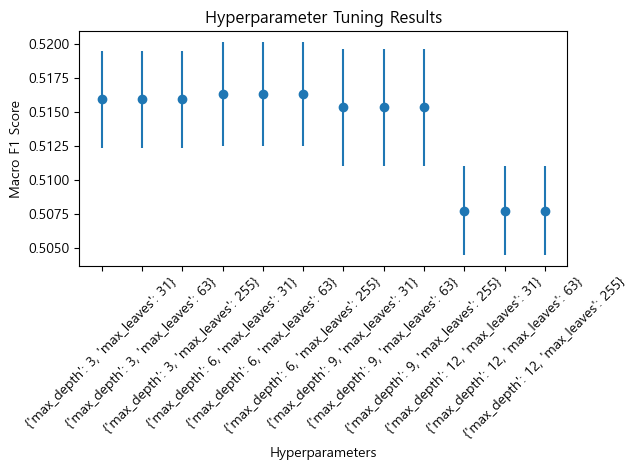

In [144]:
# Visualize the tuning results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the mean scores with error bars
x_ticks = np.arange(len(params))
plt.errorbar(x_ticks, mean_scores, yerr=std_scores, fmt='o')
plt.xticks(x_ticks, [str(param) for param in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Macro F1 Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

In [145]:
param_grid = {
    'max_depth': [5,6,7],
    'max_leaves' : [31,63,255]
}

In [146]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.04767
[1]	validation_0-mlogloss:1.01733
[2]	validation_0-mlogloss:0.99765
[3]	validation_0-mlogloss:0.98558
[4]	validation_0-mlogloss:0.97686
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96676
[7]	validation_0-mlogloss:0.96391
[8]	validation_0-mlogloss:0.96193
[9]	validation_0-mlogloss:0.96020
[10]	validation_0-mlogloss:0.95916
[11]	validation_0-mlogloss:0.95813
[12]	validation_0-mlogloss:0.95715
[13]	validation_0-mlogloss:0.95628
[14]	validation_0-mlogloss:0.95597
[15]	validation_0-mlogloss:0.95531
[16]	validation_0-mlogloss:0.95474
[17]	validation_0-mlogloss:0.95448
[18]	validation_0-mlogloss:0.95433
[19]	validation_0-mlogloss:0.95411
[20]	validation_0-mlogloss:0.95386
[21]	validation_0-mlogloss:0.95388
[22]	validation_0-mlogloss:0.95362
[23]	validation_0-mlogloss:0.95333
[24]	validation_0-mlogloss:0.95326
[25]	validation_0-mlogloss:0.95290
[26]	validation_0-mlogloss:0.95276
[27]	validation_0-mlogloss:0.95284
[28]	validation_0-mlogloss:0.9

[43]	validation_0-mlogloss:0.95371
[44]	validation_0-mlogloss:0.95380
[45]	validation_0-mlogloss:0.95387
[46]	validation_0-mlogloss:0.95364
[47]	validation_0-mlogloss:0.95373
[48]	validation_0-mlogloss:0.95381
[49]	validation_0-mlogloss:0.95392
[50]	validation_0-mlogloss:0.95399
[51]	validation_0-mlogloss:0.95393
[52]	validation_0-mlogloss:0.95392
[53]	validation_0-mlogloss:0.95391
[54]	validation_0-mlogloss:0.95386
[55]	validation_0-mlogloss:0.95391
[56]	validation_0-mlogloss:0.95362
[57]	validation_0-mlogloss:0.95372
[58]	validation_0-mlogloss:0.95370
[59]	validation_0-mlogloss:0.95368
[60]	validation_0-mlogloss:0.95358
[61]	validation_0-mlogloss:0.95368
[62]	validation_0-mlogloss:0.95370
[63]	validation_0-mlogloss:0.95370
[64]	validation_0-mlogloss:0.95374
[65]	validation_0-mlogloss:0.95366
[66]	validation_0-mlogloss:0.95354
[67]	validation_0-mlogloss:0.95361
[68]	validation_0-mlogloss:0.95372
[69]	validation_0-mlogloss:0.95361
[70]	validation_0-mlogloss:0.95360
[71]	validation_0-ml

[1]	validation_0-mlogloss:1.01733
[2]	validation_0-mlogloss:0.99765
[3]	validation_0-mlogloss:0.98558
[4]	validation_0-mlogloss:0.97686
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96676
[7]	validation_0-mlogloss:0.96391
[8]	validation_0-mlogloss:0.96193
[9]	validation_0-mlogloss:0.96020
[10]	validation_0-mlogloss:0.95916
[11]	validation_0-mlogloss:0.95813
[12]	validation_0-mlogloss:0.95715
[13]	validation_0-mlogloss:0.95628
[14]	validation_0-mlogloss:0.95597
[15]	validation_0-mlogloss:0.95531
[16]	validation_0-mlogloss:0.95474
[17]	validation_0-mlogloss:0.95448
[18]	validation_0-mlogloss:0.95433
[19]	validation_0-mlogloss:0.95411
[20]	validation_0-mlogloss:0.95386
[21]	validation_0-mlogloss:0.95388
[22]	validation_0-mlogloss:0.95362
[23]	validation_0-mlogloss:0.95333
[24]	validation_0-mlogloss:0.95326
[25]	validation_0-mlogloss:0.95290
[26]	validation_0-mlogloss:0.95276
[27]	validation_0-mlogloss:0.95284
[28]	validation_0-mlogloss:0.95285
[29]	validation_0-mlogloss:0.

[43]	validation_0-mlogloss:0.95371
[44]	validation_0-mlogloss:0.95380
[45]	validation_0-mlogloss:0.95387
[46]	validation_0-mlogloss:0.95364
[47]	validation_0-mlogloss:0.95373
[48]	validation_0-mlogloss:0.95381
[49]	validation_0-mlogloss:0.95392
[50]	validation_0-mlogloss:0.95399
[51]	validation_0-mlogloss:0.95393
[52]	validation_0-mlogloss:0.95392
[53]	validation_0-mlogloss:0.95391
[54]	validation_0-mlogloss:0.95386
[55]	validation_0-mlogloss:0.95391
[56]	validation_0-mlogloss:0.95362
[57]	validation_0-mlogloss:0.95372
[58]	validation_0-mlogloss:0.95370
[59]	validation_0-mlogloss:0.95368
[60]	validation_0-mlogloss:0.95358
[61]	validation_0-mlogloss:0.95368
[62]	validation_0-mlogloss:0.95370
[63]	validation_0-mlogloss:0.95370
[64]	validation_0-mlogloss:0.95374
[65]	validation_0-mlogloss:0.95366
[66]	validation_0-mlogloss:0.95354
[67]	validation_0-mlogloss:0.95361
[68]	validation_0-mlogloss:0.95372
[69]	validation_0-mlogloss:0.95361
[70]	validation_0-mlogloss:0.95360
[71]	validation_0-ml

[0]	validation_0-mlogloss:1.04767
[1]	validation_0-mlogloss:1.01733
[2]	validation_0-mlogloss:0.99765
[3]	validation_0-mlogloss:0.98558
[4]	validation_0-mlogloss:0.97686
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96676
[7]	validation_0-mlogloss:0.96391
[8]	validation_0-mlogloss:0.96193
[9]	validation_0-mlogloss:0.96020
[10]	validation_0-mlogloss:0.95916
[11]	validation_0-mlogloss:0.95813
[12]	validation_0-mlogloss:0.95715
[13]	validation_0-mlogloss:0.95628
[14]	validation_0-mlogloss:0.95597
[15]	validation_0-mlogloss:0.95531
[16]	validation_0-mlogloss:0.95474
[17]	validation_0-mlogloss:0.95448
[18]	validation_0-mlogloss:0.95433
[19]	validation_0-mlogloss:0.95411
[20]	validation_0-mlogloss:0.95386
[21]	validation_0-mlogloss:0.95388
[22]	validation_0-mlogloss:0.95362
[23]	validation_0-mlogloss:0.95333
[24]	validation_0-mlogloss:0.95326
[25]	validation_0-mlogloss:0.95290
[26]	validation_0-mlogloss:0.95276
[27]	validation_0-mlogloss:0.95284
[28]	validation_0-mlogloss:0.9

[42]	validation_0-mlogloss:0.95368
[43]	validation_0-mlogloss:0.95371
[44]	validation_0-mlogloss:0.95380
[45]	validation_0-mlogloss:0.95387
[46]	validation_0-mlogloss:0.95364
[47]	validation_0-mlogloss:0.95373
[48]	validation_0-mlogloss:0.95381
[49]	validation_0-mlogloss:0.95392
[50]	validation_0-mlogloss:0.95399
[51]	validation_0-mlogloss:0.95393
[52]	validation_0-mlogloss:0.95392
[53]	validation_0-mlogloss:0.95391
[54]	validation_0-mlogloss:0.95386
[55]	validation_0-mlogloss:0.95391
[56]	validation_0-mlogloss:0.95362
[57]	validation_0-mlogloss:0.95372
[58]	validation_0-mlogloss:0.95370
[59]	validation_0-mlogloss:0.95368
[60]	validation_0-mlogloss:0.95358
[61]	validation_0-mlogloss:0.95368
[62]	validation_0-mlogloss:0.95370
[63]	validation_0-mlogloss:0.95370
[64]	validation_0-mlogloss:0.95374
[65]	validation_0-mlogloss:0.95366
[66]	validation_0-mlogloss:0.95354
[67]	validation_0-mlogloss:0.95361
[68]	validation_0-mlogloss:0.95372
[69]	validation_0-mlogloss:0.95361
[70]	validation_0-ml

[1]	validation_0-mlogloss:1.01349
[2]	validation_0-mlogloss:0.99381
[3]	validation_0-mlogloss:0.98182
[4]	validation_0-mlogloss:0.97280
[5]	validation_0-mlogloss:0.96655
[6]	validation_0-mlogloss:0.96248
[7]	validation_0-mlogloss:0.95990
[8]	validation_0-mlogloss:0.95774
[9]	validation_0-mlogloss:0.95649
[10]	validation_0-mlogloss:0.95546
[11]	validation_0-mlogloss:0.95452
[12]	validation_0-mlogloss:0.95389
[13]	validation_0-mlogloss:0.95357
[14]	validation_0-mlogloss:0.95300
[15]	validation_0-mlogloss:0.95272
[16]	validation_0-mlogloss:0.95230
[17]	validation_0-mlogloss:0.95196
[18]	validation_0-mlogloss:0.95188
[19]	validation_0-mlogloss:0.95177
[20]	validation_0-mlogloss:0.95178
[21]	validation_0-mlogloss:0.95186
[22]	validation_0-mlogloss:0.95191
[23]	validation_0-mlogloss:0.95199
[24]	validation_0-mlogloss:0.95179
[25]	validation_0-mlogloss:0.95185
[26]	validation_0-mlogloss:0.95177
[27]	validation_0-mlogloss:0.95164
[28]	validation_0-mlogloss:0.95147
[29]	validation_0-mlogloss:0.

[13]	validation_0-mlogloss:0.95398
[14]	validation_0-mlogloss:0.95386
[15]	validation_0-mlogloss:0.95355
[16]	validation_0-mlogloss:0.95331
[17]	validation_0-mlogloss:0.95304
[18]	validation_0-mlogloss:0.95291
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95247
[21]	validation_0-mlogloss:0.95246
[22]	validation_0-mlogloss:0.95237
[23]	validation_0-mlogloss:0.95238
[24]	validation_0-mlogloss:0.95198
[25]	validation_0-mlogloss:0.95210
[26]	validation_0-mlogloss:0.95224
[27]	validation_0-mlogloss:0.95224
[28]	validation_0-mlogloss:0.95232
[29]	validation_0-mlogloss:0.95215
[30]	validation_0-mlogloss:0.95229
[31]	validation_0-mlogloss:0.95214
[32]	validation_0-mlogloss:0.95196
[33]	validation_0-mlogloss:0.95201
[34]	validation_0-mlogloss:0.95193
[35]	validation_0-mlogloss:0.95198
[36]	validation_0-mlogloss:0.95198
[37]	validation_0-mlogloss:0.95192
[38]	validation_0-mlogloss:0.95207
[39]	validation_0-mlogloss:0.95210
[40]	validation_0-mlogloss:0.95215
[41]	validation_0-ml

[2]	validation_0-mlogloss:0.99337
[3]	validation_0-mlogloss:0.98073
[4]	validation_0-mlogloss:0.97269
[5]	validation_0-mlogloss:0.96711
[6]	validation_0-mlogloss:0.96310
[7]	validation_0-mlogloss:0.96017
[8]	validation_0-mlogloss:0.95809
[9]	validation_0-mlogloss:0.95695
[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.95354
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95309
[18]	validation_0-mlogloss:0.95278
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95298
[21]	validation_0-mlogloss:0.95300
[22]	validation_0-mlogloss:0.95302
[23]	validation_0-mlogloss:0.95288
[24]	validation_0-mlogloss:0.95295
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95316
[27]	validation_0-mlogloss:0.95321
[28]	validation_0-mlogloss:0.95315
[29]	validation_0-mlogloss:0.95320
[30]	validation_0-mlogloss:0

[6]	validation_0-mlogloss:0.96318
[7]	validation_0-mlogloss:0.96078
[8]	validation_0-mlogloss:0.95841
[9]	validation_0-mlogloss:0.95686
[10]	validation_0-mlogloss:0.95567
[11]	validation_0-mlogloss:0.95494
[12]	validation_0-mlogloss:0.95441
[13]	validation_0-mlogloss:0.95358
[14]	validation_0-mlogloss:0.95339
[15]	validation_0-mlogloss:0.95300
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95254
[21]	validation_0-mlogloss:0.95231
[22]	validation_0-mlogloss:0.95229
[23]	validation_0-mlogloss:0.95233
[24]	validation_0-mlogloss:0.95243
[25]	validation_0-mlogloss:0.95257
[26]	validation_0-mlogloss:0.95241
[27]	validation_0-mlogloss:0.95240
[28]	validation_0-mlogloss:0.95236
[29]	validation_0-mlogloss:0.95225
[30]	validation_0-mlogloss:0.95234
[31]	validation_0-mlogloss:0.95247
[32]	validation_0-mlogloss:0.95259
[33]	validation_0-mlogloss:0.95255
[34]	validation_0-mloglo

[14]	validation_0-mlogloss:0.95430
[15]	validation_0-mlogloss:0.95412
[16]	validation_0-mlogloss:0.95415
[17]	validation_0-mlogloss:0.95365
[18]	validation_0-mlogloss:0.95390
[19]	validation_0-mlogloss:0.95391
[20]	validation_0-mlogloss:0.95385
[21]	validation_0-mlogloss:0.95383
[22]	validation_0-mlogloss:0.95374
[23]	validation_0-mlogloss:0.95353
[24]	validation_0-mlogloss:0.95372
[25]	validation_0-mlogloss:0.95371
[26]	validation_0-mlogloss:0.95358
[27]	validation_0-mlogloss:0.95369
[28]	validation_0-mlogloss:0.95376
[29]	validation_0-mlogloss:0.95375
[30]	validation_0-mlogloss:0.95357
[31]	validation_0-mlogloss:0.95370
[32]	validation_0-mlogloss:0.95364
[33]	validation_0-mlogloss:0.95369
[34]	validation_0-mlogloss:0.95374
[35]	validation_0-mlogloss:0.95397
[36]	validation_0-mlogloss:0.95398
[37]	validation_0-mlogloss:0.95387
[38]	validation_0-mlogloss:0.95383
[39]	validation_0-mlogloss:0.95379
[40]	validation_0-mlogloss:0.95383
[41]	validation_0-mlogloss:0.95393
[42]	validation_0-ml

[8]	validation_0-mlogloss:0.95562
[9]	validation_0-mlogloss:0.95417
[10]	validation_0-mlogloss:0.95346
[11]	validation_0-mlogloss:0.95295
[12]	validation_0-mlogloss:0.95235
[13]	validation_0-mlogloss:0.95176
[14]	validation_0-mlogloss:0.95150
[15]	validation_0-mlogloss:0.95130
[16]	validation_0-mlogloss:0.95100
[17]	validation_0-mlogloss:0.95081
[18]	validation_0-mlogloss:0.95110
[19]	validation_0-mlogloss:0.95114
[20]	validation_0-mlogloss:0.95135
[21]	validation_0-mlogloss:0.95123
[22]	validation_0-mlogloss:0.95112
[23]	validation_0-mlogloss:0.95112
[24]	validation_0-mlogloss:0.95103
[25]	validation_0-mlogloss:0.95076
[26]	validation_0-mlogloss:0.95081
[27]	validation_0-mlogloss:0.95093
[28]	validation_0-mlogloss:0.95119
[29]	validation_0-mlogloss:0.95121
[30]	validation_0-mlogloss:0.95123
[31]	validation_0-mlogloss:0.95135
[32]	validation_0-mlogloss:0.95146
[33]	validation_0-mlogloss:0.95147
[34]	validation_0-mlogloss:0.95124
[35]	validation_0-mlogloss:0.95137
[36]	validation_0-mlog

[39]	validation_0-mlogloss:0.95481
[40]	validation_0-mlogloss:0.95485
[41]	validation_0-mlogloss:0.95503
[42]	validation_0-mlogloss:0.95512
[43]	validation_0-mlogloss:0.95525
[44]	validation_0-mlogloss:0.95512
[45]	validation_0-mlogloss:0.95506
[46]	validation_0-mlogloss:0.95526
[47]	validation_0-mlogloss:0.95527
[48]	validation_0-mlogloss:0.95544
[49]	validation_0-mlogloss:0.95549
[50]	validation_0-mlogloss:0.95557
[51]	validation_0-mlogloss:0.95562
[52]	validation_0-mlogloss:0.95565
[53]	validation_0-mlogloss:0.95574
[54]	validation_0-mlogloss:0.95603
[55]	validation_0-mlogloss:0.95608
[56]	validation_0-mlogloss:0.95600
[57]	validation_0-mlogloss:0.95596
[58]	validation_0-mlogloss:0.95573
[59]	validation_0-mlogloss:0.95592
[60]	validation_0-mlogloss:0.95622
[61]	validation_0-mlogloss:0.95637
[62]	validation_0-mlogloss:0.95652
[63]	validation_0-mlogloss:0.95658
[64]	validation_0-mlogloss:0.95667
[65]	validation_0-mlogloss:0.95665
[66]	validation_0-mlogloss:0.95694
[67]	validation_0-ml

[48]	validation_0-mlogloss:0.95499
[49]	validation_0-mlogloss:0.95519
[50]	validation_0-mlogloss:0.95558
[51]	validation_0-mlogloss:0.95566
[52]	validation_0-mlogloss:0.95587
[53]	validation_0-mlogloss:0.95609
[54]	validation_0-mlogloss:0.95647
[55]	validation_0-mlogloss:0.95667
[56]	validation_0-mlogloss:0.95692
[57]	validation_0-mlogloss:0.95707
[58]	validation_0-mlogloss:0.95735
[59]	validation_0-mlogloss:0.95758
[60]	validation_0-mlogloss:0.95794
[61]	validation_0-mlogloss:0.95789
[62]	validation_0-mlogloss:0.95829
[63]	validation_0-mlogloss:0.95868
[64]	validation_0-mlogloss:0.95908
[0]	validation_0-mlogloss:1.04329
[1]	validation_0-mlogloss:1.01108
[2]	validation_0-mlogloss:0.99156
[3]	validation_0-mlogloss:0.97858
[4]	validation_0-mlogloss:0.96978
[5]	validation_0-mlogloss:0.96456
[6]	validation_0-mlogloss:0.96052
[7]	validation_0-mlogloss:0.95779
[8]	validation_0-mlogloss:0.95610
[9]	validation_0-mlogloss:0.95519
[10]	validation_0-mlogloss:0.95420
[11]	validation_0-mlogloss:0.9

[6]	validation_0-mlogloss:0.96072
[7]	validation_0-mlogloss:0.95770
[8]	validation_0-mlogloss:0.95562
[9]	validation_0-mlogloss:0.95417
[10]	validation_0-mlogloss:0.95346
[11]	validation_0-mlogloss:0.95295
[12]	validation_0-mlogloss:0.95235
[13]	validation_0-mlogloss:0.95176
[14]	validation_0-mlogloss:0.95150
[15]	validation_0-mlogloss:0.95130
[16]	validation_0-mlogloss:0.95100
[17]	validation_0-mlogloss:0.95081
[18]	validation_0-mlogloss:0.95110
[19]	validation_0-mlogloss:0.95114
[20]	validation_0-mlogloss:0.95135
[21]	validation_0-mlogloss:0.95123
[22]	validation_0-mlogloss:0.95112
[23]	validation_0-mlogloss:0.95112
[24]	validation_0-mlogloss:0.95103
[25]	validation_0-mlogloss:0.95076
[26]	validation_0-mlogloss:0.95081
[27]	validation_0-mlogloss:0.95093
[28]	validation_0-mlogloss:0.95119
[29]	validation_0-mlogloss:0.95121
[30]	validation_0-mlogloss:0.95123
[31]	validation_0-mlogloss:0.95135
[32]	validation_0-mlogloss:0.95146
[33]	validation_0-mlogloss:0.95147
[34]	validation_0-mloglo

[37]	validation_0-mlogloss:0.95488
[38]	validation_0-mlogloss:0.95485
[39]	validation_0-mlogloss:0.95481
[40]	validation_0-mlogloss:0.95485
[41]	validation_0-mlogloss:0.95503
[42]	validation_0-mlogloss:0.95512
[43]	validation_0-mlogloss:0.95525
[44]	validation_0-mlogloss:0.95512
[45]	validation_0-mlogloss:0.95506
[46]	validation_0-mlogloss:0.95526
[47]	validation_0-mlogloss:0.95527
[48]	validation_0-mlogloss:0.95544
[49]	validation_0-mlogloss:0.95549
[50]	validation_0-mlogloss:0.95557
[51]	validation_0-mlogloss:0.95562
[52]	validation_0-mlogloss:0.95565
[53]	validation_0-mlogloss:0.95574
[54]	validation_0-mlogloss:0.95603
[55]	validation_0-mlogloss:0.95608
[56]	validation_0-mlogloss:0.95600
[57]	validation_0-mlogloss:0.95596
[58]	validation_0-mlogloss:0.95573
[59]	validation_0-mlogloss:0.95592
[60]	validation_0-mlogloss:0.95622
[61]	validation_0-mlogloss:0.95637
[62]	validation_0-mlogloss:0.95652
[63]	validation_0-mlogloss:0.95658
[64]	validation_0-mlogloss:0.95667
[65]	validation_0-ml

Best Hyperparameters:  {'max_depth': 6, 'max_leaves': 31}
Best Score (Macro F1):  0.5163515403219108

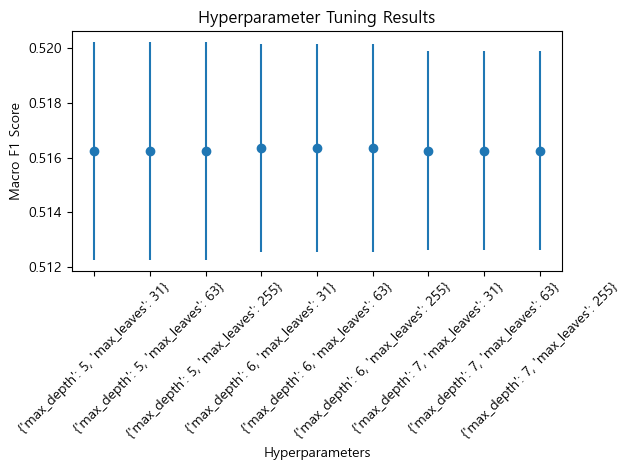

In [147]:
# Visualize the tuning results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the mean scores with error bars
x_ticks = np.arange(len(params))
plt.errorbar(x_ticks, mean_scores, yerr=std_scores, fmt='o')
plt.xticks(x_ticks, [str(param) for param in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Macro F1 Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

In [148]:
param_grid = {
    'n_estimators':[100,200,300,400,500],
    'max_depth': [6],
    'max_leaves' : [31]
}

In [149]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.04516
[1]	validation_0-mlogloss:1.01349
[2]	validation_0-mlogloss:0.99381
[3]	validation_0-mlogloss:0.98182
[4]	validation_0-mlogloss:0.97280
[5]	validation_0-mlogloss:0.96655
[6]	validation_0-mlogloss:0.96248
[7]	validation_0-mlogloss:0.95990
[8]	validation_0-mlogloss:0.95774
[9]	validation_0-mlogloss:0.95649
[10]	validation_0-mlogloss:0.95546
[11]	validation_0-mlogloss:0.95452
[12]	validation_0-mlogloss:0.95389
[13]	validation_0-mlogloss:0.95357
[14]	validation_0-mlogloss:0.95300
[15]	validation_0-mlogloss:0.95272
[16]	validation_0-mlogloss:0.95230
[17]	validation_0-mlogloss:0.95196
[18]	validation_0-mlogloss:0.95188
[19]	validation_0-mlogloss:0.95177
[20]	validation_0-mlogloss:0.95178
[21]	validation_0-mlogloss:0.95186
[22]	validation_0-mlogloss:0.95191
[23]	validation_0-mlogloss:0.95199
[24]	validation_0-mlogloss:0.95179
[25]	validation_0-mlogloss:0.95185
[26]	validation_0-mlogloss:0.95177
[27]	validation_0-mlogloss:0.95164
[28]	validation_0-mlogloss:0.9

[12]	validation_0-mlogloss:0.95435
[13]	validation_0-mlogloss:0.95398
[14]	validation_0-mlogloss:0.95386
[15]	validation_0-mlogloss:0.95355
[16]	validation_0-mlogloss:0.95331
[17]	validation_0-mlogloss:0.95304
[18]	validation_0-mlogloss:0.95291
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95247
[21]	validation_0-mlogloss:0.95246
[22]	validation_0-mlogloss:0.95237
[23]	validation_0-mlogloss:0.95238
[24]	validation_0-mlogloss:0.95198
[25]	validation_0-mlogloss:0.95210
[26]	validation_0-mlogloss:0.95224
[27]	validation_0-mlogloss:0.95224
[28]	validation_0-mlogloss:0.95232
[29]	validation_0-mlogloss:0.95215
[30]	validation_0-mlogloss:0.95229
[31]	validation_0-mlogloss:0.95214
[32]	validation_0-mlogloss:0.95196
[33]	validation_0-mlogloss:0.95201
[34]	validation_0-mlogloss:0.95193
[35]	validation_0-mlogloss:0.95198
[36]	validation_0-mlogloss:0.95198
[37]	validation_0-mlogloss:0.95192
[38]	validation_0-mlogloss:0.95207
[39]	validation_0-mlogloss:0.95210
[40]	validation_0-ml

[79]	validation_0-mlogloss:0.95439
[0]	validation_0-mlogloss:1.04515
[1]	validation_0-mlogloss:1.01363
[2]	validation_0-mlogloss:0.99337
[3]	validation_0-mlogloss:0.98073
[4]	validation_0-mlogloss:0.97269
[5]	validation_0-mlogloss:0.96711
[6]	validation_0-mlogloss:0.96310
[7]	validation_0-mlogloss:0.96017
[8]	validation_0-mlogloss:0.95809
[9]	validation_0-mlogloss:0.95695
[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.95354
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95309
[18]	validation_0-mlogloss:0.95278
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95298
[21]	validation_0-mlogloss:0.95300
[22]	validation_0-mlogloss:0.95302
[23]	validation_0-mlogloss:0.95288
[24]	validation_0-mlogloss:0.95295
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95316
[27]	validation_0-mlogloss:0.9

[5]	validation_0-mlogloss:0.96723
[6]	validation_0-mlogloss:0.96318
[7]	validation_0-mlogloss:0.96078
[8]	validation_0-mlogloss:0.95841
[9]	validation_0-mlogloss:0.95686
[10]	validation_0-mlogloss:0.95567
[11]	validation_0-mlogloss:0.95494
[12]	validation_0-mlogloss:0.95441
[13]	validation_0-mlogloss:0.95358
[14]	validation_0-mlogloss:0.95339
[15]	validation_0-mlogloss:0.95300
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95254
[21]	validation_0-mlogloss:0.95231
[22]	validation_0-mlogloss:0.95229
[23]	validation_0-mlogloss:0.95233
[24]	validation_0-mlogloss:0.95243
[25]	validation_0-mlogloss:0.95257
[26]	validation_0-mlogloss:0.95241
[27]	validation_0-mlogloss:0.95240
[28]	validation_0-mlogloss:0.95236
[29]	validation_0-mlogloss:0.95225
[30]	validation_0-mlogloss:0.95234
[31]	validation_0-mlogloss:0.95247
[32]	validation_0-mlogloss:0.95259
[33]	validation_0-mloglos

[11]	validation_0-mlogloss:0.95520
[12]	validation_0-mlogloss:0.95472
[13]	validation_0-mlogloss:0.95473
[14]	validation_0-mlogloss:0.95430
[15]	validation_0-mlogloss:0.95412
[16]	validation_0-mlogloss:0.95415
[17]	validation_0-mlogloss:0.95365
[18]	validation_0-mlogloss:0.95390
[19]	validation_0-mlogloss:0.95391
[20]	validation_0-mlogloss:0.95385
[21]	validation_0-mlogloss:0.95383
[22]	validation_0-mlogloss:0.95374
[23]	validation_0-mlogloss:0.95353
[24]	validation_0-mlogloss:0.95372
[25]	validation_0-mlogloss:0.95371
[26]	validation_0-mlogloss:0.95358
[27]	validation_0-mlogloss:0.95369
[28]	validation_0-mlogloss:0.95376
[29]	validation_0-mlogloss:0.95375
[30]	validation_0-mlogloss:0.95357
[31]	validation_0-mlogloss:0.95370
[32]	validation_0-mlogloss:0.95364
[33]	validation_0-mlogloss:0.95369
[34]	validation_0-mlogloss:0.95374
[35]	validation_0-mlogloss:0.95397
[36]	validation_0-mlogloss:0.95398
[37]	validation_0-mlogloss:0.95387
[38]	validation_0-mlogloss:0.95383
[39]	validation_0-ml

[5]	validation_0-mlogloss:0.96655
[6]	validation_0-mlogloss:0.96248
[7]	validation_0-mlogloss:0.95990
[8]	validation_0-mlogloss:0.95774
[9]	validation_0-mlogloss:0.95649
[10]	validation_0-mlogloss:0.95546
[11]	validation_0-mlogloss:0.95452
[12]	validation_0-mlogloss:0.95389
[13]	validation_0-mlogloss:0.95357
[14]	validation_0-mlogloss:0.95300
[15]	validation_0-mlogloss:0.95272
[16]	validation_0-mlogloss:0.95230
[17]	validation_0-mlogloss:0.95196
[18]	validation_0-mlogloss:0.95188
[19]	validation_0-mlogloss:0.95177
[20]	validation_0-mlogloss:0.95178
[21]	validation_0-mlogloss:0.95186
[22]	validation_0-mlogloss:0.95191
[23]	validation_0-mlogloss:0.95199
[24]	validation_0-mlogloss:0.95179
[25]	validation_0-mlogloss:0.95185
[26]	validation_0-mlogloss:0.95177
[27]	validation_0-mlogloss:0.95164
[28]	validation_0-mlogloss:0.95147
[29]	validation_0-mlogloss:0.95154
[30]	validation_0-mlogloss:0.95142
[31]	validation_0-mlogloss:0.95144
[32]	validation_0-mlogloss:0.95155
[33]	validation_0-mloglos

[18]	validation_0-mlogloss:0.95291
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95247
[21]	validation_0-mlogloss:0.95246
[22]	validation_0-mlogloss:0.95237
[23]	validation_0-mlogloss:0.95238
[24]	validation_0-mlogloss:0.95198
[25]	validation_0-mlogloss:0.95210
[26]	validation_0-mlogloss:0.95224
[27]	validation_0-mlogloss:0.95224
[28]	validation_0-mlogloss:0.95232
[29]	validation_0-mlogloss:0.95215
[30]	validation_0-mlogloss:0.95229
[31]	validation_0-mlogloss:0.95214
[32]	validation_0-mlogloss:0.95196
[33]	validation_0-mlogloss:0.95201
[34]	validation_0-mlogloss:0.95193
[35]	validation_0-mlogloss:0.95198
[36]	validation_0-mlogloss:0.95198
[37]	validation_0-mlogloss:0.95192
[38]	validation_0-mlogloss:0.95207
[39]	validation_0-mlogloss:0.95210
[40]	validation_0-mlogloss:0.95215
[41]	validation_0-mlogloss:0.95212
[42]	validation_0-mlogloss:0.95194
[43]	validation_0-mlogloss:0.95197
[44]	validation_0-mlogloss:0.95200
[45]	validation_0-mlogloss:0.95219
[46]	validation_0-ml

[5]	validation_0-mlogloss:0.96711
[6]	validation_0-mlogloss:0.96310
[7]	validation_0-mlogloss:0.96017
[8]	validation_0-mlogloss:0.95809
[9]	validation_0-mlogloss:0.95695
[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.95354
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95309
[18]	validation_0-mlogloss:0.95278
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95298
[21]	validation_0-mlogloss:0.95300
[22]	validation_0-mlogloss:0.95302
[23]	validation_0-mlogloss:0.95288
[24]	validation_0-mlogloss:0.95295
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95316
[27]	validation_0-mlogloss:0.95321
[28]	validation_0-mlogloss:0.95315
[29]	validation_0-mlogloss:0.95320
[30]	validation_0-mlogloss:0.95330
[31]	validation_0-mlogloss:0.95321
[32]	validation_0-mlogloss:0.95324
[33]	validation_0-mloglos

[11]	validation_0-mlogloss:0.95494
[12]	validation_0-mlogloss:0.95441
[13]	validation_0-mlogloss:0.95358
[14]	validation_0-mlogloss:0.95339
[15]	validation_0-mlogloss:0.95300
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95254
[21]	validation_0-mlogloss:0.95231
[22]	validation_0-mlogloss:0.95229
[23]	validation_0-mlogloss:0.95233
[24]	validation_0-mlogloss:0.95243
[25]	validation_0-mlogloss:0.95257
[26]	validation_0-mlogloss:0.95241
[27]	validation_0-mlogloss:0.95240
[28]	validation_0-mlogloss:0.95236
[29]	validation_0-mlogloss:0.95225
[30]	validation_0-mlogloss:0.95234
[31]	validation_0-mlogloss:0.95247
[32]	validation_0-mlogloss:0.95259
[33]	validation_0-mlogloss:0.95255
[34]	validation_0-mlogloss:0.95278
[35]	validation_0-mlogloss:0.95285
[36]	validation_0-mlogloss:0.95305
[37]	validation_0-mlogloss:0.95299
[38]	validation_0-mlogloss:0.95302
[39]	validation_0-ml

Best Hyperparameters:  {'max_depth': 6, 'max_leaves': 31, 'n_estimators': 100}
Best Score (Macro F1):  0.5163515403219108

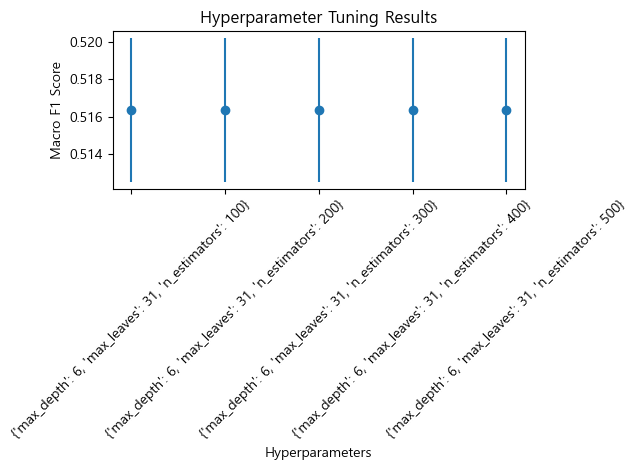

In [150]:
# Visualize the tuning results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the mean scores with error bars
x_ticks = np.arange(len(params))
plt.errorbar(x_ticks, mean_scores, yerr=std_scores, fmt='o')
plt.xticks(x_ticks, [str(param) for param in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Macro F1 Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

In [151]:
param_grid = {
    'n_estimators':[100],
    'max_depth': [6],
    'max_leaves' : [31],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [152]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.07576
[1]	validation_0-mlogloss:1.04542
[2]	validation_0-mlogloss:1.01287
[3]	validation_0-mlogloss:0.99879
[4]	validation_0-mlogloss:0.98722
[5]	validation_0-mlogloss:0.97783
[6]	validation_0-mlogloss:0.97146
[7]	validation_0-mlogloss:0.96957
[8]	validation_0-mlogloss:0.96559
[9]	validation_0-mlogloss:0.96265
[10]	validation_0-mlogloss:0.96005
[11]	validation_0-mlogloss:0.95860
[12]	validation_0-mlogloss:0.95730
[13]	validation_0-mlogloss:0.95587
[14]	validation_0-mlogloss:0.95455
[15]	validation_0-mlogloss:0.95419
[16]	validation_0-mlogloss:0.95413
[17]	validation_0-mlogloss:0.95345
[18]	validation_0-mlogloss:0.95326
[19]	validation_0-mlogloss:0.95302
[20]	validation_0-mlogloss:0.95284
[21]	validation_0-mlogloss:0.95258
[22]	validation_0-mlogloss:0.95226
[23]	validation_0-mlogloss:0.95194
[24]	validation_0-mlogloss:0.95184
[25]	validation_0-mlogloss:0.95177
[26]	validation_0-mlogloss:0.95166
[27]	validation_0-mlogloss:0.95159
[28]	validation_0-mlogloss:0.9

[1]	validation_0-mlogloss:1.04470
[2]	validation_0-mlogloss:1.01275
[3]	validation_0-mlogloss:0.99829
[4]	validation_0-mlogloss:0.98676
[5]	validation_0-mlogloss:0.97758
[6]	validation_0-mlogloss:0.97102
[7]	validation_0-mlogloss:0.96932
[8]	validation_0-mlogloss:0.96530
[9]	validation_0-mlogloss:0.96219
[10]	validation_0-mlogloss:0.95973
[11]	validation_0-mlogloss:0.95782
[12]	validation_0-mlogloss:0.95687
[13]	validation_0-mlogloss:0.95523
[14]	validation_0-mlogloss:0.95420
[15]	validation_0-mlogloss:0.95379
[16]	validation_0-mlogloss:0.95376
[17]	validation_0-mlogloss:0.95306
[18]	validation_0-mlogloss:0.95283
[19]	validation_0-mlogloss:0.95213
[20]	validation_0-mlogloss:0.95204
[21]	validation_0-mlogloss:0.95209
[22]	validation_0-mlogloss:0.95192
[23]	validation_0-mlogloss:0.95193
[24]	validation_0-mlogloss:0.95182
[25]	validation_0-mlogloss:0.95197
[26]	validation_0-mlogloss:0.95189
[27]	validation_0-mlogloss:0.95180
[28]	validation_0-mlogloss:0.95193
[29]	validation_0-mlogloss:0.

[77]	validation_0-mlogloss:0.95225
[78]	validation_0-mlogloss:0.95236
[79]	validation_0-mlogloss:0.95258
[80]	validation_0-mlogloss:0.95267
[81]	validation_0-mlogloss:0.95281
[82]	validation_0-mlogloss:0.95283
[83]	validation_0-mlogloss:0.95280
[84]	validation_0-mlogloss:0.95297
[85]	validation_0-mlogloss:0.95312
[86]	validation_0-mlogloss:0.95332
[0]	validation_0-mlogloss:1.07551
[1]	validation_0-mlogloss:1.04372
[2]	validation_0-mlogloss:1.01122
[3]	validation_0-mlogloss:0.99676
[4]	validation_0-mlogloss:0.98529
[5]	validation_0-mlogloss:0.97603
[6]	validation_0-mlogloss:0.96981
[7]	validation_0-mlogloss:0.96814
[8]	validation_0-mlogloss:0.96447
[9]	validation_0-mlogloss:0.96120
[10]	validation_0-mlogloss:0.95845
[11]	validation_0-mlogloss:0.95688
[12]	validation_0-mlogloss:0.95598
[13]	validation_0-mlogloss:0.95471
[14]	validation_0-mlogloss:0.95344
[15]	validation_0-mlogloss:0.95292
[16]	validation_0-mlogloss:0.95262
[17]	validation_0-mlogloss:0.95204
[18]	validation_0-mlogloss:0.9

[69]	validation_0-mlogloss:0.95481
[70]	validation_0-mlogloss:0.95503
[71]	validation_0-mlogloss:0.95516
[72]	validation_0-mlogloss:0.95548
[73]	validation_0-mlogloss:0.95562
[74]	validation_0-mlogloss:0.95562
[75]	validation_0-mlogloss:0.95566
[0]	validation_0-mlogloss:1.06315
[1]	validation_0-mlogloss:1.03195
[2]	validation_0-mlogloss:1.00627
[3]	validation_0-mlogloss:0.99431
[4]	validation_0-mlogloss:0.98975
[5]	validation_0-mlogloss:0.98519
[6]	validation_0-mlogloss:0.97614
[7]	validation_0-mlogloss:0.96856
[8]	validation_0-mlogloss:0.96302
[9]	validation_0-mlogloss:0.96248
[10]	validation_0-mlogloss:0.95960
[11]	validation_0-mlogloss:0.95763
[12]	validation_0-mlogloss:0.95631
[13]	validation_0-mlogloss:0.95567
[14]	validation_0-mlogloss:0.95412
[15]	validation_0-mlogloss:0.95319
[16]	validation_0-mlogloss:0.95259
[17]	validation_0-mlogloss:0.95243
[18]	validation_0-mlogloss:0.95243
[19]	validation_0-mlogloss:0.95173
[20]	validation_0-mlogloss:0.95154
[21]	validation_0-mlogloss:0.9

[46]	validation_0-mlogloss:0.95156
[47]	validation_0-mlogloss:0.95169
[48]	validation_0-mlogloss:0.95191
[49]	validation_0-mlogloss:0.95199
[50]	validation_0-mlogloss:0.95198
[51]	validation_0-mlogloss:0.95178
[52]	validation_0-mlogloss:0.95183
[53]	validation_0-mlogloss:0.95203
[54]	validation_0-mlogloss:0.95209
[55]	validation_0-mlogloss:0.95229
[56]	validation_0-mlogloss:0.95245
[57]	validation_0-mlogloss:0.95243
[58]	validation_0-mlogloss:0.95248
[59]	validation_0-mlogloss:0.95228
[60]	validation_0-mlogloss:0.95239
[61]	validation_0-mlogloss:0.95233
[62]	validation_0-mlogloss:0.95231
[63]	validation_0-mlogloss:0.95242
[64]	validation_0-mlogloss:0.95252
[65]	validation_0-mlogloss:0.95269
[66]	validation_0-mlogloss:0.95277
[67]	validation_0-mlogloss:0.95283
[68]	validation_0-mlogloss:0.95281
[69]	validation_0-mlogloss:0.95289
[70]	validation_0-mlogloss:0.95284
[71]	validation_0-mlogloss:0.95276
[72]	validation_0-mlogloss:0.95280
[73]	validation_0-mlogloss:0.95299
[74]	validation_0-ml

[31]	validation_0-mlogloss:0.95035
[32]	validation_0-mlogloss:0.95037
[33]	validation_0-mlogloss:0.95033
[34]	validation_0-mlogloss:0.95040
[35]	validation_0-mlogloss:0.95039
[36]	validation_0-mlogloss:0.95031
[37]	validation_0-mlogloss:0.95027
[38]	validation_0-mlogloss:0.95018
[39]	validation_0-mlogloss:0.95019
[40]	validation_0-mlogloss:0.95031
[41]	validation_0-mlogloss:0.95051
[42]	validation_0-mlogloss:0.95049
[43]	validation_0-mlogloss:0.95063
[44]	validation_0-mlogloss:0.95084
[45]	validation_0-mlogloss:0.95080
[46]	validation_0-mlogloss:0.95082
[47]	validation_0-mlogloss:0.95083
[48]	validation_0-mlogloss:0.95092
[49]	validation_0-mlogloss:0.95100
[50]	validation_0-mlogloss:0.95098
[51]	validation_0-mlogloss:0.95089
[52]	validation_0-mlogloss:0.95100
[53]	validation_0-mlogloss:0.95107
[54]	validation_0-mlogloss:0.95096
[55]	validation_0-mlogloss:0.95083
[56]	validation_0-mlogloss:0.95084
[57]	validation_0-mlogloss:0.95083
[58]	validation_0-mlogloss:0.95096
[59]	validation_0-ml

[20]	validation_0-mlogloss:0.95364
[21]	validation_0-mlogloss:0.95335
[22]	validation_0-mlogloss:0.95328
[23]	validation_0-mlogloss:0.95326
[24]	validation_0-mlogloss:0.95335
[25]	validation_0-mlogloss:0.95358
[26]	validation_0-mlogloss:0.95359
[27]	validation_0-mlogloss:0.95372
[28]	validation_0-mlogloss:0.95378
[29]	validation_0-mlogloss:0.95379
[30]	validation_0-mlogloss:0.95413
[31]	validation_0-mlogloss:0.95442
[32]	validation_0-mlogloss:0.95468
[33]	validation_0-mlogloss:0.95485
[34]	validation_0-mlogloss:0.95461
[35]	validation_0-mlogloss:0.95499
[36]	validation_0-mlogloss:0.95516
[37]	validation_0-mlogloss:0.95537
[38]	validation_0-mlogloss:0.95542
[39]	validation_0-mlogloss:0.95543
[40]	validation_0-mlogloss:0.95552
[41]	validation_0-mlogloss:0.95561
[42]	validation_0-mlogloss:0.95576
[43]	validation_0-mlogloss:0.95571
[44]	validation_0-mlogloss:0.95548
[45]	validation_0-mlogloss:0.95571
[46]	validation_0-mlogloss:0.95581
[47]	validation_0-mlogloss:0.95617
[48]	validation_0-ml

[41]	validation_0-mlogloss:0.95158
[42]	validation_0-mlogloss:0.95167
[43]	validation_0-mlogloss:0.95180
[44]	validation_0-mlogloss:0.95185
[45]	validation_0-mlogloss:0.95189
[46]	validation_0-mlogloss:0.95209
[47]	validation_0-mlogloss:0.95243
[48]	validation_0-mlogloss:0.95214
[49]	validation_0-mlogloss:0.95218
[50]	validation_0-mlogloss:0.95222
[51]	validation_0-mlogloss:0.95206
[52]	validation_0-mlogloss:0.95212
[53]	validation_0-mlogloss:0.95232
[54]	validation_0-mlogloss:0.95244
[55]	validation_0-mlogloss:0.95253
[56]	validation_0-mlogloss:0.95246
[57]	validation_0-mlogloss:0.95253
[58]	validation_0-mlogloss:0.95262
[59]	validation_0-mlogloss:0.95263
[60]	validation_0-mlogloss:0.95283
[61]	validation_0-mlogloss:0.95286
[62]	validation_0-mlogloss:0.95293
[63]	validation_0-mlogloss:0.95299
[64]	validation_0-mlogloss:0.95312
[65]	validation_0-mlogloss:0.95325
[66]	validation_0-mlogloss:0.95341
[67]	validation_0-mlogloss:0.95353
[68]	validation_0-mlogloss:0.95371
[69]	validation_0-ml

[43]	validation_0-mlogloss:0.95250
[44]	validation_0-mlogloss:0.95250
[45]	validation_0-mlogloss:0.95245
[46]	validation_0-mlogloss:0.95260
[47]	validation_0-mlogloss:0.95261
[48]	validation_0-mlogloss:0.95264
[49]	validation_0-mlogloss:0.95268
[50]	validation_0-mlogloss:0.95303
[51]	validation_0-mlogloss:0.95294
[52]	validation_0-mlogloss:0.95295
[53]	validation_0-mlogloss:0.95302
[54]	validation_0-mlogloss:0.95315
[55]	validation_0-mlogloss:0.95310
[56]	validation_0-mlogloss:0.95319
[57]	validation_0-mlogloss:0.95342
[58]	validation_0-mlogloss:0.95354
[59]	validation_0-mlogloss:0.95364
[60]	validation_0-mlogloss:0.95377
[61]	validation_0-mlogloss:0.95383
[62]	validation_0-mlogloss:0.95360
[63]	validation_0-mlogloss:0.95362
[64]	validation_0-mlogloss:0.95374
[65]	validation_0-mlogloss:0.95390
[66]	validation_0-mlogloss:0.95401
[67]	validation_0-mlogloss:0.95392
[68]	validation_0-mlogloss:0.95396
[69]	validation_0-mlogloss:0.95410
[70]	validation_0-mlogloss:0.95432
[71]	validation_0-ml

[22]	validation_0-mlogloss:0.95231
[23]	validation_0-mlogloss:0.95210
[24]	validation_0-mlogloss:0.95209
[25]	validation_0-mlogloss:0.95200
[26]	validation_0-mlogloss:0.95199
[27]	validation_0-mlogloss:0.95198
[28]	validation_0-mlogloss:0.95184
[29]	validation_0-mlogloss:0.95179
[30]	validation_0-mlogloss:0.95184
[31]	validation_0-mlogloss:0.95187
[32]	validation_0-mlogloss:0.95187
[33]	validation_0-mlogloss:0.95173
[34]	validation_0-mlogloss:0.95173
[35]	validation_0-mlogloss:0.95188
[36]	validation_0-mlogloss:0.95191
[37]	validation_0-mlogloss:0.95204
[38]	validation_0-mlogloss:0.95193
[39]	validation_0-mlogloss:0.95174
[40]	validation_0-mlogloss:0.95178
[41]	validation_0-mlogloss:0.95163
[42]	validation_0-mlogloss:0.95176
[43]	validation_0-mlogloss:0.95169
[44]	validation_0-mlogloss:0.95181
[45]	validation_0-mlogloss:0.95175
[46]	validation_0-mlogloss:0.95177
[47]	validation_0-mlogloss:0.95180
[48]	validation_0-mlogloss:0.95164
[49]	validation_0-mlogloss:0.95158
[50]	validation_0-ml

[85]	validation_0-mlogloss:0.95472
[0]	validation_0-mlogloss:1.06083
[1]	validation_0-mlogloss:1.02801
[2]	validation_0-mlogloss:1.00574
[3]	validation_0-mlogloss:0.99236
[4]	validation_0-mlogloss:0.98563
[5]	validation_0-mlogloss:0.97791
[6]	validation_0-mlogloss:0.97079
[7]	validation_0-mlogloss:0.96507
[8]	validation_0-mlogloss:0.96089
[9]	validation_0-mlogloss:0.95892
[10]	validation_0-mlogloss:0.95738
[11]	validation_0-mlogloss:0.95583
[12]	validation_0-mlogloss:0.95501
[13]	validation_0-mlogloss:0.95411
[14]	validation_0-mlogloss:0.95359
[15]	validation_0-mlogloss:0.95353
[16]	validation_0-mlogloss:0.95281
[17]	validation_0-mlogloss:0.95244
[18]	validation_0-mlogloss:0.95249
[19]	validation_0-mlogloss:0.95240
[20]	validation_0-mlogloss:0.95222
[21]	validation_0-mlogloss:0.95180
[22]	validation_0-mlogloss:0.95152
[23]	validation_0-mlogloss:0.95148
[24]	validation_0-mlogloss:0.95156
[25]	validation_0-mlogloss:0.95172
[26]	validation_0-mlogloss:0.95165
[27]	validation_0-mlogloss:0.9

[68]	validation_0-mlogloss:0.96087
[69]	validation_0-mlogloss:0.96107
[70]	validation_0-mlogloss:0.96101
[71]	validation_0-mlogloss:0.96116
[72]	validation_0-mlogloss:0.96152
[73]	validation_0-mlogloss:0.96162
[0]	validation_0-mlogloss:1.04606
[1]	validation_0-mlogloss:1.01389
[2]	validation_0-mlogloss:0.99432
[3]	validation_0-mlogloss:0.98266
[4]	validation_0-mlogloss:0.97527
[5]	validation_0-mlogloss:0.96911
[6]	validation_0-mlogloss:0.96498
[7]	validation_0-mlogloss:0.96272
[8]	validation_0-mlogloss:0.96027
[9]	validation_0-mlogloss:0.95791
[10]	validation_0-mlogloss:0.95713
[11]	validation_0-mlogloss:0.95641
[12]	validation_0-mlogloss:0.95586
[13]	validation_0-mlogloss:0.95520
[14]	validation_0-mlogloss:0.95490
[15]	validation_0-mlogloss:0.95494
[16]	validation_0-mlogloss:0.95442
[17]	validation_0-mlogloss:0.95413
[18]	validation_0-mlogloss:0.95416
[19]	validation_0-mlogloss:0.95390
[20]	validation_0-mlogloss:0.95364
[21]	validation_0-mlogloss:0.95402
[22]	validation_0-mlogloss:0.9

[8]	validation_0-mlogloss:0.95772
[9]	validation_0-mlogloss:0.95600
[10]	validation_0-mlogloss:0.95487
[11]	validation_0-mlogloss:0.95399
[12]	validation_0-mlogloss:0.95328
[13]	validation_0-mlogloss:0.95288
[14]	validation_0-mlogloss:0.95249
[15]	validation_0-mlogloss:0.95221
[16]	validation_0-mlogloss:0.95209
[17]	validation_0-mlogloss:0.95209
[18]	validation_0-mlogloss:0.95214
[19]	validation_0-mlogloss:0.95194
[20]	validation_0-mlogloss:0.95164
[21]	validation_0-mlogloss:0.95139
[22]	validation_0-mlogloss:0.95154
[23]	validation_0-mlogloss:0.95147
[24]	validation_0-mlogloss:0.95137
[25]	validation_0-mlogloss:0.95119
[26]	validation_0-mlogloss:0.95135
[27]	validation_0-mlogloss:0.95136
[28]	validation_0-mlogloss:0.95140
[29]	validation_0-mlogloss:0.95140
[30]	validation_0-mlogloss:0.95125
[31]	validation_0-mlogloss:0.95131
[32]	validation_0-mlogloss:0.95149
[33]	validation_0-mlogloss:0.95163
[34]	validation_0-mlogloss:0.95166
[35]	validation_0-mlogloss:0.95162
[36]	validation_0-mlog

[17]	validation_0-mlogloss:0.95471
[18]	validation_0-mlogloss:0.95477
[19]	validation_0-mlogloss:0.95466
[20]	validation_0-mlogloss:0.95486
[21]	validation_0-mlogloss:0.95493
[22]	validation_0-mlogloss:0.95484
[23]	validation_0-mlogloss:0.95478
[24]	validation_0-mlogloss:0.95444
[25]	validation_0-mlogloss:0.95455
[26]	validation_0-mlogloss:0.95442
[27]	validation_0-mlogloss:0.95460
[28]	validation_0-mlogloss:0.95449
[29]	validation_0-mlogloss:0.95480
[30]	validation_0-mlogloss:0.95463
[31]	validation_0-mlogloss:0.95466
[32]	validation_0-mlogloss:0.95446
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95434
[35]	validation_0-mlogloss:0.95457
[36]	validation_0-mlogloss:0.95472
[37]	validation_0-mlogloss:0.95504
[38]	validation_0-mlogloss:0.95552
[39]	validation_0-mlogloss:0.95537
[40]	validation_0-mlogloss:0.95538
[41]	validation_0-mlogloss:0.95528
[42]	validation_0-mlogloss:0.95541
[43]	validation_0-mlogloss:0.95541
[44]	validation_0-mlogloss:0.95534
[45]	validation_0-ml

[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.95354
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95309
[18]	validation_0-mlogloss:0.95278
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95298
[21]	validation_0-mlogloss:0.95300
[22]	validation_0-mlogloss:0.95302
[23]	validation_0-mlogloss:0.95288
[24]	validation_0-mlogloss:0.95295
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95316
[27]	validation_0-mlogloss:0.95321
[28]	validation_0-mlogloss:0.95315
[29]	validation_0-mlogloss:0.95320
[30]	validation_0-mlogloss:0.95330
[31]	validation_0-mlogloss:0.95321
[32]	validation_0-mlogloss:0.95324
[33]	validation_0-mlogloss:0.95308
[34]	validation_0-mlogloss:0.95306
[35]	validation_0-mlogloss:0.95309
[36]	validation_0-mlogloss:0.95298
[37]	validation_0-mlogloss:0.95306
[38]	validation_0-ml

[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95254
[21]	validation_0-mlogloss:0.95231
[22]	validation_0-mlogloss:0.95229
[23]	validation_0-mlogloss:0.95233
[24]	validation_0-mlogloss:0.95243
[25]	validation_0-mlogloss:0.95257
[26]	validation_0-mlogloss:0.95241
[27]	validation_0-mlogloss:0.95240
[28]	validation_0-mlogloss:0.95236
[29]	validation_0-mlogloss:0.95225
[30]	validation_0-mlogloss:0.95234
[31]	validation_0-mlogloss:0.95247
[32]	validation_0-mlogloss:0.95259
[33]	validation_0-mlogloss:0.95255
[34]	validation_0-mlogloss:0.95278
[35]	validation_0-mlogloss:0.95285
[36]	validation_0-mlogloss:0.95305
[37]	validation_0-mlogloss:0.95299
[38]	validation_0-mlogloss:0.95302
[39]	validation_0-mlogloss:0.95302
[40]	validation_0-mlogloss:0.95305
[41]	validation_0-mlogloss:0.95311
[42]	validation_0-mlogloss:0.95311
[43]	validation_0-mlogloss:0.95329
[44]	validation_0-ml

Best Hyperparameters:  {'colsample_bytree': 0.6, 'max_depth': 6, 'max_leaves': 31, 'n_estimators': 100, 'subsample': 1.0}
Best Score (Macro F1):  0.5190888596032766

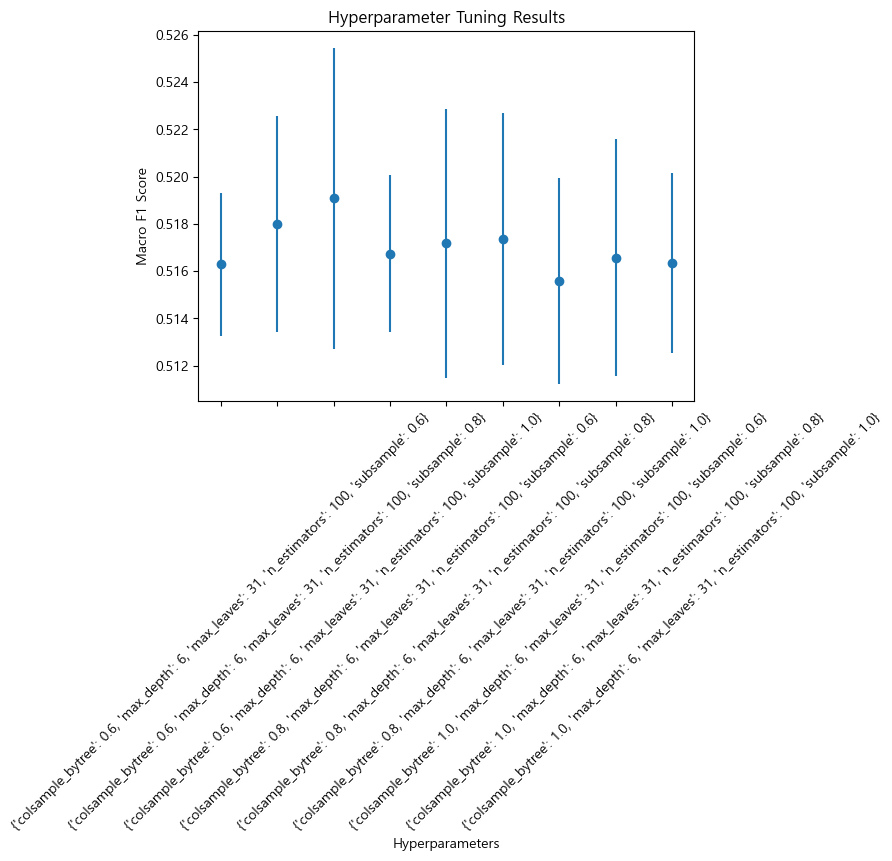

In [153]:
# Visualize the tuning results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the mean scores with error bars
x_ticks = np.arange(len(params))
plt.errorbar(x_ticks, mean_scores, yerr=std_scores, fmt='o')
plt.xticks(x_ticks, [str(param) for param in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Macro F1 Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

In [137]:
param_grid = {
    'n_estimators':[100],
    'max_depth': [6],
    'max_leaves' : [31],
    'subsample': [1.0],
    'colsample_bytree': [0.6],
    'learning_rate': [0.5,0.3,0.1, 0.01, 0.001]
}

In [138]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.06628
[1]	validation_0-mlogloss:1.01266
[2]	validation_0-mlogloss:0.99828
[3]	validation_0-mlogloss:0.98294
[4]	validation_0-mlogloss:0.97983
[5]	validation_0-mlogloss:0.97215
[6]	validation_0-mlogloss:0.96453
[7]	validation_0-mlogloss:0.96192
[8]	validation_0-mlogloss:0.95792
[9]	validation_0-mlogloss:0.95654
[10]	validation_0-mlogloss:0.95659
[11]	validation_0-mlogloss:0.95516
[12]	validation_0-mlogloss:0.95490
[13]	validation_0-mlogloss:0.95486
[14]	validation_0-mlogloss:0.95443
[15]	validation_0-mlogloss:0.95468
[16]	validation_0-mlogloss:0.95335
[17]	validation_0-mlogloss:0.95278
[18]	validation_0-mlogloss:0.95270
[19]	validation_0-mlogloss:0.95244
[20]	validation_0-mlogloss:0.95237
[21]	validation_0-mlogloss:0.95224
[22]	validation_0-mlogloss:0.95244
[23]	validation_0-mlogloss:0.95239
[24]	validation_0-mlogloss:0.95224
[25]	validation_0-mlogloss:0.95241
[26]	validation_0-mlogloss:0.95284
[27]	validation_0-mlogloss:0.95290
[28]	validation_0-mlogloss:0.9

[18]	validation_0-mlogloss:0.95309
[19]	validation_0-mlogloss:0.95278
[20]	validation_0-mlogloss:0.95295
[21]	validation_0-mlogloss:0.95275
[22]	validation_0-mlogloss:0.95264
[23]	validation_0-mlogloss:0.95256
[24]	validation_0-mlogloss:0.95263
[25]	validation_0-mlogloss:0.95268
[26]	validation_0-mlogloss:0.95260
[27]	validation_0-mlogloss:0.95285
[28]	validation_0-mlogloss:0.95309
[29]	validation_0-mlogloss:0.95331
[30]	validation_0-mlogloss:0.95354
[31]	validation_0-mlogloss:0.95375
[32]	validation_0-mlogloss:0.95364
[33]	validation_0-mlogloss:0.95366
[34]	validation_0-mlogloss:0.95393
[35]	validation_0-mlogloss:0.95391
[36]	validation_0-mlogloss:0.95422
[37]	validation_0-mlogloss:0.95455
[38]	validation_0-mlogloss:0.95457
[39]	validation_0-mlogloss:0.95460
[40]	validation_0-mlogloss:0.95480
[41]	validation_0-mlogloss:0.95485
[42]	validation_0-mlogloss:0.95483
[43]	validation_0-mlogloss:0.95508
[44]	validation_0-mlogloss:0.95545
[45]	validation_0-mlogloss:0.95566
[46]	validation_0-ml

[16]	validation_0-mlogloss:0.95740
[17]	validation_0-mlogloss:0.95571
[18]	validation_0-mlogloss:0.95532
[19]	validation_0-mlogloss:0.95493
[20]	validation_0-mlogloss:0.95393
[21]	validation_0-mlogloss:0.95371
[22]	validation_0-mlogloss:0.95325
[23]	validation_0-mlogloss:0.95276
[24]	validation_0-mlogloss:0.95238
[25]	validation_0-mlogloss:0.95233
[26]	validation_0-mlogloss:0.95204
[27]	validation_0-mlogloss:0.95196
[28]	validation_0-mlogloss:0.95180
[29]	validation_0-mlogloss:0.95182
[30]	validation_0-mlogloss:0.95152
[31]	validation_0-mlogloss:0.95144
[32]	validation_0-mlogloss:0.95112
[33]	validation_0-mlogloss:0.95122
[34]	validation_0-mlogloss:0.95117
[35]	validation_0-mlogloss:0.95098
[36]	validation_0-mlogloss:0.95121
[37]	validation_0-mlogloss:0.95114
[38]	validation_0-mlogloss:0.95123
[39]	validation_0-mlogloss:0.95130
[40]	validation_0-mlogloss:0.95145
[41]	validation_0-mlogloss:0.95153
[42]	validation_0-mlogloss:0.95150
[43]	validation_0-mlogloss:0.95125
[44]	validation_0-ml

[83]	validation_0-mlogloss:0.95324
[0]	validation_0-mlogloss:1.07761
[1]	validation_0-mlogloss:1.03903
[2]	validation_0-mlogloss:1.02407
[3]	validation_0-mlogloss:1.00818
[4]	validation_0-mlogloss:1.00287
[5]	validation_0-mlogloss:0.99252
[6]	validation_0-mlogloss:0.98172
[7]	validation_0-mlogloss:0.97734
[8]	validation_0-mlogloss:0.97069
[9]	validation_0-mlogloss:0.96816
[10]	validation_0-mlogloss:0.96716
[11]	validation_0-mlogloss:0.96446
[12]	validation_0-mlogloss:0.96305
[13]	validation_0-mlogloss:0.96237
[14]	validation_0-mlogloss:0.96055
[15]	validation_0-mlogloss:0.96036
[16]	validation_0-mlogloss:0.95700
[17]	validation_0-mlogloss:0.95513
[18]	validation_0-mlogloss:0.95472
[19]	validation_0-mlogloss:0.95419
[20]	validation_0-mlogloss:0.95311
[21]	validation_0-mlogloss:0.95303
[22]	validation_0-mlogloss:0.95241
[23]	validation_0-mlogloss:0.95187
[24]	validation_0-mlogloss:0.95147
[25]	validation_0-mlogloss:0.95138
[26]	validation_0-mlogloss:0.95104
[27]	validation_0-mlogloss:0.9

[46]	validation_0-mlogloss:0.95511
[47]	validation_0-mlogloss:0.95485
[48]	validation_0-mlogloss:0.95448
[49]	validation_0-mlogloss:0.95414
[50]	validation_0-mlogloss:0.95392
[51]	validation_0-mlogloss:0.95340
[52]	validation_0-mlogloss:0.95324
[53]	validation_0-mlogloss:0.95296
[54]	validation_0-mlogloss:0.95273
[55]	validation_0-mlogloss:0.95242
[56]	validation_0-mlogloss:0.95226
[57]	validation_0-mlogloss:0.95201
[58]	validation_0-mlogloss:0.95187
[59]	validation_0-mlogloss:0.95159
[60]	validation_0-mlogloss:0.95140
[61]	validation_0-mlogloss:0.95119
[62]	validation_0-mlogloss:0.95114
[63]	validation_0-mlogloss:0.95102
[64]	validation_0-mlogloss:0.95084
[65]	validation_0-mlogloss:0.95075
[66]	validation_0-mlogloss:0.95066
[67]	validation_0-mlogloss:0.95054
[68]	validation_0-mlogloss:0.95055
[69]	validation_0-mlogloss:0.95047
[70]	validation_0-mlogloss:0.95043
[71]	validation_0-mlogloss:0.95040
[72]	validation_0-mlogloss:0.95038
[73]	validation_0-mlogloss:0.95036
[74]	validation_0-ml

[80]	validation_0-mlogloss:0.94963
[81]	validation_0-mlogloss:0.94958
[82]	validation_0-mlogloss:0.94948
[83]	validation_0-mlogloss:0.94948
[84]	validation_0-mlogloss:0.94944
[85]	validation_0-mlogloss:0.94946
[86]	validation_0-mlogloss:0.94943
[87]	validation_0-mlogloss:0.94937
[88]	validation_0-mlogloss:0.94929
[89]	validation_0-mlogloss:0.94932
[90]	validation_0-mlogloss:0.94928
[91]	validation_0-mlogloss:0.94930
[92]	validation_0-mlogloss:0.94930
[93]	validation_0-mlogloss:0.94931
[94]	validation_0-mlogloss:0.94927
[95]	validation_0-mlogloss:0.94925
[96]	validation_0-mlogloss:0.94923
[97]	validation_0-mlogloss:0.94925
[98]	validation_0-mlogloss:0.94928
[99]	validation_0-mlogloss:0.94928
[0]	validation_0-mlogloss:1.09111
[1]	validation_0-mlogloss:1.07578
[2]	validation_0-mlogloss:1.06742
[3]	validation_0-mlogloss:1.05825
[4]	validation_0-mlogloss:1.05365
[5]	validation_0-mlogloss:1.04497
[6]	validation_0-mlogloss:1.03502
[7]	validation_0-mlogloss:1.02973
[8]	validation_0-mlogloss:1.

[15]	validation_0-mlogloss:1.08109
[16]	validation_0-mlogloss:1.07938
[17]	validation_0-mlogloss:1.07791
[18]	validation_0-mlogloss:1.07696
[19]	validation_0-mlogloss:1.07601
[20]	validation_0-mlogloss:1.07437
[21]	validation_0-mlogloss:1.07371
[22]	validation_0-mlogloss:1.07230
[23]	validation_0-mlogloss:1.07092
[24]	validation_0-mlogloss:1.06939
[25]	validation_0-mlogloss:1.06870
[26]	validation_0-mlogloss:1.06719
[27]	validation_0-mlogloss:1.06647
[28]	validation_0-mlogloss:1.06558
[29]	validation_0-mlogloss:1.06454
[30]	validation_0-mlogloss:1.06376
[31]	validation_0-mlogloss:1.06269
[32]	validation_0-mlogloss:1.06152
[33]	validation_0-mlogloss:1.06053
[34]	validation_0-mlogloss:1.05939
[35]	validation_0-mlogloss:1.05816
[36]	validation_0-mlogloss:1.05735
[37]	validation_0-mlogloss:1.05638
[38]	validation_0-mlogloss:1.05577
[39]	validation_0-mlogloss:1.05461
[40]	validation_0-mlogloss:1.05358
[41]	validation_0-mlogloss:1.05290
[42]	validation_0-mlogloss:1.05159
[43]	validation_0-ml

[50]	validation_0-mlogloss:1.04465
[51]	validation_0-mlogloss:1.04343
[52]	validation_0-mlogloss:1.04264
[53]	validation_0-mlogloss:1.04148
[54]	validation_0-mlogloss:1.04083
[55]	validation_0-mlogloss:1.03969
[56]	validation_0-mlogloss:1.03894
[57]	validation_0-mlogloss:1.03801
[58]	validation_0-mlogloss:1.03744
[59]	validation_0-mlogloss:1.03637
[60]	validation_0-mlogloss:1.03537
[61]	validation_0-mlogloss:1.03446
[62]	validation_0-mlogloss:1.03403
[63]	validation_0-mlogloss:1.03338
[64]	validation_0-mlogloss:1.03270
[65]	validation_0-mlogloss:1.03211
[66]	validation_0-mlogloss:1.03109
[67]	validation_0-mlogloss:1.03021
[68]	validation_0-mlogloss:1.02979
[69]	validation_0-mlogloss:1.02897
[70]	validation_0-mlogloss:1.02802
[71]	validation_0-mlogloss:1.02735
[72]	validation_0-mlogloss:1.02655
[73]	validation_0-mlogloss:1.02594
[74]	validation_0-mlogloss:1.02500
[75]	validation_0-mlogloss:1.02466
[76]	validation_0-mlogloss:1.02388
[77]	validation_0-mlogloss:1.02352
[78]	validation_0-ml

[85]	validation_0-mlogloss:1.08710
[86]	validation_0-mlogloss:1.08696
[87]	validation_0-mlogloss:1.08686
[88]	validation_0-mlogloss:1.08670
[89]	validation_0-mlogloss:1.08660
[90]	validation_0-mlogloss:1.08647
[91]	validation_0-mlogloss:1.08633
[92]	validation_0-mlogloss:1.08618
[93]	validation_0-mlogloss:1.08602
[94]	validation_0-mlogloss:1.08595
[95]	validation_0-mlogloss:1.08580
[96]	validation_0-mlogloss:1.08570
[97]	validation_0-mlogloss:1.08556
[98]	validation_0-mlogloss:1.08543
[99]	validation_0-mlogloss:1.08536
[0]	validation_0-mlogloss:1.09853
[1]	validation_0-mlogloss:1.09837
[2]	validation_0-mlogloss:1.09826
[3]	validation_0-mlogloss:1.09814
[4]	validation_0-mlogloss:1.09806
[5]	validation_0-mlogloss:1.09792
[6]	validation_0-mlogloss:1.09775
[7]	validation_0-mlogloss:1.09764
[8]	validation_0-mlogloss:1.09747
[9]	validation_0-mlogloss:1.09736
[10]	validation_0-mlogloss:1.09728
[11]	validation_0-mlogloss:1.09716
[12]	validation_0-mlogloss:1.09706
[13]	validation_0-mlogloss:1.0

[20]	validation_0-mlogloss:1.09596
[21]	validation_0-mlogloss:1.09588
[22]	validation_0-mlogloss:1.09571
[23]	validation_0-mlogloss:1.09554
[24]	validation_0-mlogloss:1.09535
[25]	validation_0-mlogloss:1.09526
[26]	validation_0-mlogloss:1.09507
[27]	validation_0-mlogloss:1.09498
[28]	validation_0-mlogloss:1.09486
[29]	validation_0-mlogloss:1.09473
[30]	validation_0-mlogloss:1.09462
[31]	validation_0-mlogloss:1.09448
[32]	validation_0-mlogloss:1.09432
[33]	validation_0-mlogloss:1.09419
[34]	validation_0-mlogloss:1.09403
[35]	validation_0-mlogloss:1.09387
[36]	validation_0-mlogloss:1.09375
[37]	validation_0-mlogloss:1.09361
[38]	validation_0-mlogloss:1.09352
[39]	validation_0-mlogloss:1.09335
[40]	validation_0-mlogloss:1.09321
[41]	validation_0-mlogloss:1.09310
[42]	validation_0-mlogloss:1.09291
[43]	validation_0-mlogloss:1.09275
[44]	validation_0-mlogloss:1.09266
[45]	validation_0-mlogloss:1.09249
[46]	validation_0-mlogloss:1.09240
[47]	validation_0-mlogloss:1.09228
[48]	validation_0-ml

[55]	validation_0-mlogloss:0.94990
[56]	validation_0-mlogloss:0.95003
[57]	validation_0-mlogloss:0.95004
[58]	validation_0-mlogloss:0.95022
[59]	validation_0-mlogloss:0.95023
[60]	validation_0-mlogloss:0.95022
[61]	validation_0-mlogloss:0.95017
[62]	validation_0-mlogloss:0.95014
[63]	validation_0-mlogloss:0.95011
[64]	validation_0-mlogloss:0.95019
[65]	validation_0-mlogloss:0.95025
[66]	validation_0-mlogloss:0.95029
[67]	validation_0-mlogloss:0.95033
[68]	validation_0-mlogloss:0.95044
[69]	validation_0-mlogloss:0.95046
[70]	validation_0-mlogloss:0.95049
[71]	validation_0-mlogloss:0.95044
[72]	validation_0-mlogloss:0.95043
[73]	validation_0-mlogloss:0.95057
[74]	validation_0-mlogloss:0.95047
[75]	validation_0-mlogloss:0.95054
[76]	validation_0-mlogloss:0.95058
[77]	validation_0-mlogloss:0.95060
[78]	validation_0-mlogloss:0.95066
[79]	validation_0-mlogloss:0.95061
[80]	validation_0-mlogloss:0.95063
[81]	validation_0-mlogloss:0.95072
[82]	validation_0-mlogloss:0.95084
Best Hyperparameters

Best Hyperparameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 6, 'max_leaves': 31, 'n_estimators': 100, 'subsample': 1.0}
Best Score (Macro F1):  0.5190888596032766

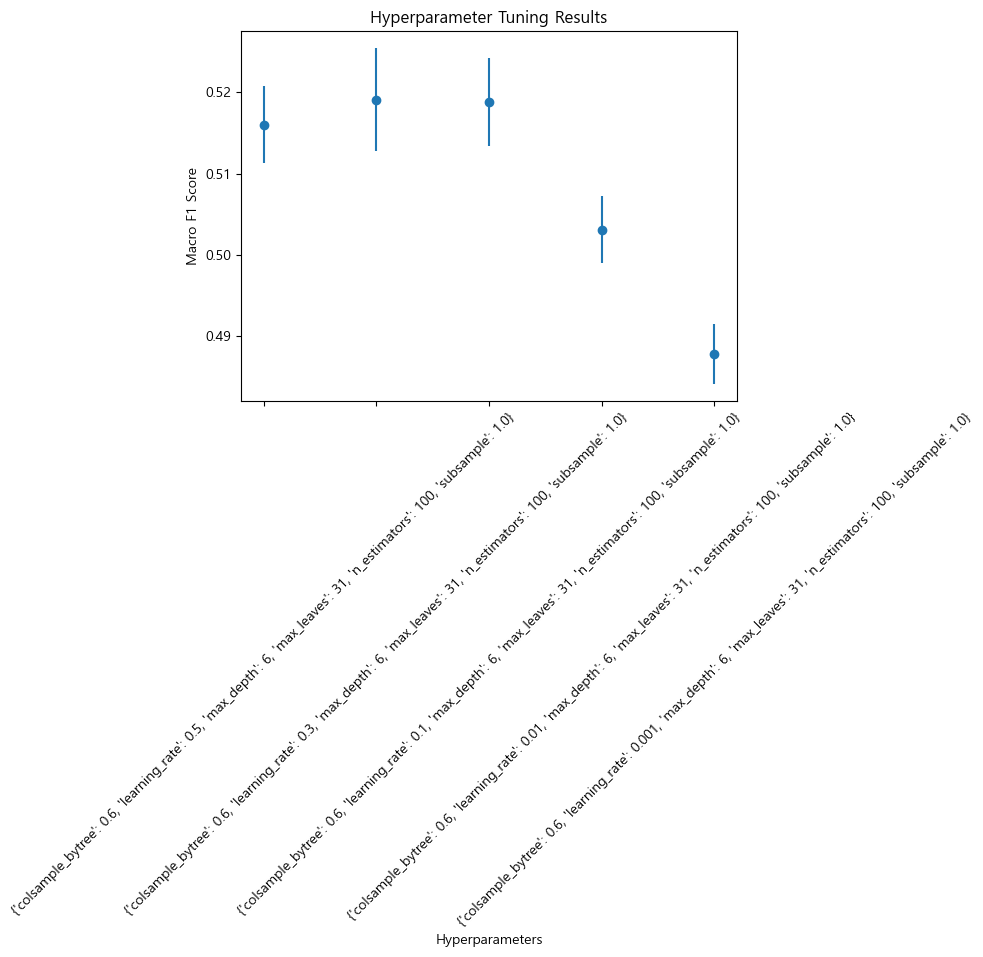

In [139]:
# Visualize the tuning results
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Plot the mean scores with error bars
x_ticks = np.arange(len(params))
plt.errorbar(x_ticks, mean_scores, yerr=std_scores, fmt='o')
plt.xticks(x_ticks, [str(param) for param in params], rotation=45)
plt.xlabel('Hyperparameters')
plt.ylabel('Macro F1 Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

In [161]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
macro_f1_test = f1_score(y_test, y_pred, average='macro')
print("Test Macro F1 Score: ", macro_f1_test)

Test Macro F1 Score:  0.5259644226422008


In [159]:
param_grid = {
    'n_estimators':[100],
    'max_depth': [6],
    'max_leaves' : [31],
    'subsample': [1.0],
    'colsample_bytree': [0.6],
    'learning_rate': [0.3]
}

In [160]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.07771
[1]	validation_0-mlogloss:1.03897
[2]	validation_0-mlogloss:1.02418
[3]	validation_0-mlogloss:1.00845
[4]	validation_0-mlogloss:1.00334
[5]	validation_0-mlogloss:0.99281
[6]	validation_0-mlogloss:0.98179
[7]	validation_0-mlogloss:0.97753
[8]	validation_0-mlogloss:0.97063
[9]	validation_0-mlogloss:0.96796
[10]	validation_0-mlogloss:0.96696
[11]	validation_0-mlogloss:0.96423
[12]	validation_0-mlogloss:0.96259
[13]	validation_0-mlogloss:0.96208
[14]	validation_0-mlogloss:0.96015
[15]	validation_0-mlogloss:0.95986
[16]	validation_0-mlogloss:0.95658
[17]	validation_0-mlogloss:0.95492
[18]	validation_0-mlogloss:0.95427
[19]	validation_0-mlogloss:0.95363
[20]	validation_0-mlogloss:0.95278
[21]	validation_0-mlogloss:0.95239
[22]	validation_0-mlogloss:0.95200
[23]	validation_0-mlogloss:0.95136
[24]	validation_0-mlogloss:0.95092
[25]	validation_0-mlogloss:0.95084
[26]	validation_0-mlogloss:0.95061
[27]	validation_0-mlogloss:0.95034
[28]	validation_0-mlogloss:0.9

[56]	validation_0-mlogloss:0.95311
[57]	validation_0-mlogloss:0.95298
[58]	validation_0-mlogloss:0.95310
[59]	validation_0-mlogloss:0.95317
[60]	validation_0-mlogloss:0.95320
[61]	validation_0-mlogloss:0.95327
[62]	validation_0-mlogloss:0.95328
[63]	validation_0-mlogloss:0.95341
[64]	validation_0-mlogloss:0.95363
[65]	validation_0-mlogloss:0.95369
[66]	validation_0-mlogloss:0.95369
[67]	validation_0-mlogloss:0.95381
[68]	validation_0-mlogloss:0.95390
[69]	validation_0-mlogloss:0.95389
[70]	validation_0-mlogloss:0.95401
[71]	validation_0-mlogloss:0.95400
[72]	validation_0-mlogloss:0.95412
[73]	validation_0-mlogloss:0.95435
[74]	validation_0-mlogloss:0.95459
[75]	validation_0-mlogloss:0.95487
[76]	validation_0-mlogloss:0.95490
[77]	validation_0-mlogloss:0.95497
[78]	validation_0-mlogloss:0.95507
[79]	validation_0-mlogloss:0.95524
[80]	validation_0-mlogloss:0.95552
[81]	validation_0-mlogloss:0.95564
[82]	validation_0-mlogloss:0.95567
[0]	validation_0-mlogloss:1.07759
[1]	validation_0-mlog

[36]	validation_0-mlogloss:0.94925
[37]	validation_0-mlogloss:0.94917
[38]	validation_0-mlogloss:0.94916
[39]	validation_0-mlogloss:0.94930
[40]	validation_0-mlogloss:0.94927
[41]	validation_0-mlogloss:0.94929
[42]	validation_0-mlogloss:0.94928
[43]	validation_0-mlogloss:0.94930
[44]	validation_0-mlogloss:0.94915
[45]	validation_0-mlogloss:0.94919
[46]	validation_0-mlogloss:0.94925
[47]	validation_0-mlogloss:0.94934
[48]	validation_0-mlogloss:0.94942
[49]	validation_0-mlogloss:0.94945
[50]	validation_0-mlogloss:0.94952
[51]	validation_0-mlogloss:0.94951
[52]	validation_0-mlogloss:0.94951
[53]	validation_0-mlogloss:0.94961
[54]	validation_0-mlogloss:0.94989
[55]	validation_0-mlogloss:0.94990
[56]	validation_0-mlogloss:0.95003
[57]	validation_0-mlogloss:0.95004
[58]	validation_0-mlogloss:0.95022
[59]	validation_0-mlogloss:0.95023
[60]	validation_0-mlogloss:0.95022
[61]	validation_0-mlogloss:0.95017
[62]	validation_0-mlogloss:0.95014
[63]	validation_0-mlogloss:0.95011
[64]	validation_0-ml

In [165]:
test = test.drop(['ID'],axis=1)

In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        17289 non-null  int64  
 1   요일       17289 non-null  int32  
 2   시간       17289 non-null  int64  
 3   소관경찰서    17289 non-null  int64  
 4   소관지역     17289 non-null  float64
 5   사건발생거리   17289 non-null  float64
 6   강수량(mm)  17289 non-null  float64
 7   강설량(mm)  17289 non-null  float64
 8   적설량(cm)  17289 non-null  float64
 9   풍향       17289 non-null  float64
 10  안개       17289 non-null  float64
 11  짙은안개     17289 non-null  float64
 12  번개       17289 non-null  float64
 13  진눈깨비     17289 non-null  float64
 14  서리       17289 non-null  float64
 15  연기/연무    17289 non-null  float64
 16  눈날림      17289 non-null  float64
 17  범죄발생지    17289 non-null  int32  
dtypes: float64(13), int32(2), int64(3)
memory usage: 2.2 MB


In [168]:
pred = best_model.predict(test)

TARGET
0    9716
1    3801
2    3772
dtype: int64


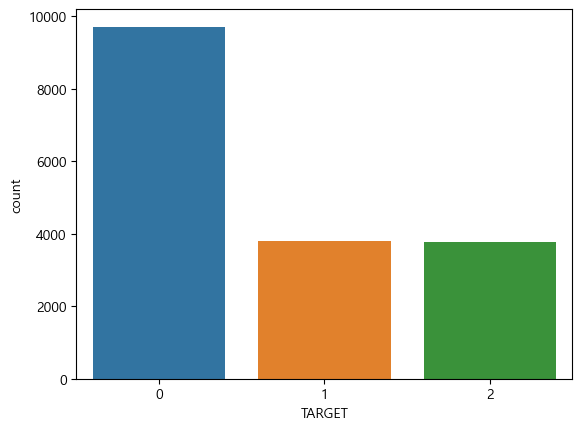

In [170]:
sub['TARGET'] = pred
sub.head()
sub.to_csv('sub_xgb_grid3.csv', index = False)
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())


In [171]:
param_grid = {
    'n_estimators':[100,300,500],
    'max_depth': [4,6,8,10],
    'max_leaves' : [31,63,255],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [172]:
# Perform grid search with cross-validation using macro F1 score and early stopping
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring=macro_f1, cv=5, error_score='raise')
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Macro F1): ", grid_search.best_score_)

[0]	validation_0-mlogloss:1.07728
[1]	validation_0-mlogloss:1.05019
[2]	validation_0-mlogloss:1.01908
[3]	validation_0-mlogloss:1.00543
[4]	validation_0-mlogloss:0.99400
[5]	validation_0-mlogloss:0.98469
[6]	validation_0-mlogloss:0.97845
[7]	validation_0-mlogloss:0.97659
[8]	validation_0-mlogloss:0.97276
[9]	validation_0-mlogloss:0.96922
[10]	validation_0-mlogloss:0.96618
[11]	validation_0-mlogloss:0.96445
[12]	validation_0-mlogloss:0.96292
[13]	validation_0-mlogloss:0.96173
[14]	validation_0-mlogloss:0.96038
[15]	validation_0-mlogloss:0.95983
[16]	validation_0-mlogloss:0.95956
[17]	validation_0-mlogloss:0.95878
[18]	validation_0-mlogloss:0.95860
[19]	validation_0-mlogloss:0.95805
[20]	validation_0-mlogloss:0.95799
[21]	validation_0-mlogloss:0.95773
[22]	validation_0-mlogloss:0.95708
[23]	validation_0-mlogloss:0.95682
[24]	validation_0-mlogloss:0.95668
[25]	validation_0-mlogloss:0.95655
[26]	validation_0-mlogloss:0.95604
[27]	validation_0-mlogloss:0.95604
[28]	validation_0-mlogloss:0.9

[34]	validation_0-mlogloss:0.95526
[35]	validation_0-mlogloss:0.95524
[36]	validation_0-mlogloss:0.95525
[37]	validation_0-mlogloss:0.95521
[38]	validation_0-mlogloss:0.95510
[39]	validation_0-mlogloss:0.95496
[40]	validation_0-mlogloss:0.95493
[41]	validation_0-mlogloss:0.95483
[42]	validation_0-mlogloss:0.95465
[43]	validation_0-mlogloss:0.95465
[44]	validation_0-mlogloss:0.95453
[45]	validation_0-mlogloss:0.95457
[46]	validation_0-mlogloss:0.95458
[47]	validation_0-mlogloss:0.95453
[48]	validation_0-mlogloss:0.95455
[49]	validation_0-mlogloss:0.95453
[50]	validation_0-mlogloss:0.95456
[51]	validation_0-mlogloss:0.95456
[52]	validation_0-mlogloss:0.95465
[53]	validation_0-mlogloss:0.95461
[54]	validation_0-mlogloss:0.95475
[55]	validation_0-mlogloss:0.95476
[56]	validation_0-mlogloss:0.95465
[57]	validation_0-mlogloss:0.95459
[58]	validation_0-mlogloss:0.95456
[59]	validation_0-mlogloss:0.95462
[60]	validation_0-mlogloss:0.95460
[61]	validation_0-mlogloss:0.95448
[62]	validation_0-ml

[68]	validation_0-mlogloss:0.95371
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95371
[71]	validation_0-mlogloss:0.95378
[72]	validation_0-mlogloss:0.95379
[73]	validation_0-mlogloss:0.95382
[74]	validation_0-mlogloss:0.95381
[75]	validation_0-mlogloss:0.95392
[76]	validation_0-mlogloss:0.95397
[77]	validation_0-mlogloss:0.95401
[78]	validation_0-mlogloss:0.95400
[79]	validation_0-mlogloss:0.95401
[80]	validation_0-mlogloss:0.95404
[81]	validation_0-mlogloss:0.95407
[82]	validation_0-mlogloss:0.95425
[83]	validation_0-mlogloss:0.95411
[84]	validation_0-mlogloss:0.95427
[85]	validation_0-mlogloss:0.95426
[86]	validation_0-mlogloss:0.95436
[87]	validation_0-mlogloss:0.95427
[88]	validation_0-mlogloss:0.95440
[89]	validation_0-mlogloss:0.95442
[90]	validation_0-mlogloss:0.95448
[91]	validation_0-mlogloss:0.95452
[92]	validation_0-mlogloss:0.95436
[93]	validation_0-mlogloss:0.95441
[94]	validation_0-mlogloss:0.95433
[95]	validation_0-mlogloss:0.95445
[96]	validation_0-ml

[3]	validation_0-mlogloss:1.00538
[4]	validation_0-mlogloss:0.99393
[5]	validation_0-mlogloss:0.98454
[6]	validation_0-mlogloss:0.97839
[7]	validation_0-mlogloss:0.97625
[8]	validation_0-mlogloss:0.97264
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96615
[11]	validation_0-mlogloss:0.96394
[12]	validation_0-mlogloss:0.96247
[13]	validation_0-mlogloss:0.96118
[14]	validation_0-mlogloss:0.96020
[15]	validation_0-mlogloss:0.95966
[16]	validation_0-mlogloss:0.95898
[17]	validation_0-mlogloss:0.95812
[18]	validation_0-mlogloss:0.95767
[19]	validation_0-mlogloss:0.95694
[20]	validation_0-mlogloss:0.95662
[21]	validation_0-mlogloss:0.95635
[22]	validation_0-mlogloss:0.95611
[23]	validation_0-mlogloss:0.95582
[24]	validation_0-mlogloss:0.95542
[25]	validation_0-mlogloss:0.95535
[26]	validation_0-mlogloss:0.95493
[27]	validation_0-mlogloss:0.95475
[28]	validation_0-mlogloss:0.95471
[29]	validation_0-mlogloss:0.95458
[30]	validation_0-mlogloss:0.95447
[31]	validation_0-mlogloss:

[38]	validation_0-mlogloss:0.95351
[39]	validation_0-mlogloss:0.95344
[40]	validation_0-mlogloss:0.95339
[41]	validation_0-mlogloss:0.95318
[42]	validation_0-mlogloss:0.95299
[43]	validation_0-mlogloss:0.95300
[44]	validation_0-mlogloss:0.95277
[45]	validation_0-mlogloss:0.95284
[46]	validation_0-mlogloss:0.95274
[47]	validation_0-mlogloss:0.95266
[48]	validation_0-mlogloss:0.95247
[49]	validation_0-mlogloss:0.95246
[50]	validation_0-mlogloss:0.95251
[51]	validation_0-mlogloss:0.95246
[52]	validation_0-mlogloss:0.95249
[53]	validation_0-mlogloss:0.95239
[54]	validation_0-mlogloss:0.95230
[55]	validation_0-mlogloss:0.95237
[56]	validation_0-mlogloss:0.95227
[57]	validation_0-mlogloss:0.95204
[58]	validation_0-mlogloss:0.95183
[59]	validation_0-mlogloss:0.95177
[60]	validation_0-mlogloss:0.95186
[61]	validation_0-mlogloss:0.95174
[62]	validation_0-mlogloss:0.95179
[63]	validation_0-mlogloss:0.95175
[64]	validation_0-mlogloss:0.95172
[65]	validation_0-mlogloss:0.95158
[66]	validation_0-ml

[73]	validation_0-mlogloss:0.95207
[74]	validation_0-mlogloss:0.95192
[75]	validation_0-mlogloss:0.95200
[76]	validation_0-mlogloss:0.95194
[77]	validation_0-mlogloss:0.95189
[78]	validation_0-mlogloss:0.95190
[79]	validation_0-mlogloss:0.95194
[80]	validation_0-mlogloss:0.95198
[81]	validation_0-mlogloss:0.95205
[82]	validation_0-mlogloss:0.95203
[83]	validation_0-mlogloss:0.95206
[84]	validation_0-mlogloss:0.95208
[85]	validation_0-mlogloss:0.95201
[86]	validation_0-mlogloss:0.95199
[87]	validation_0-mlogloss:0.95213
[88]	validation_0-mlogloss:0.95212
[89]	validation_0-mlogloss:0.95217
[90]	validation_0-mlogloss:0.95210
[91]	validation_0-mlogloss:0.95215
[92]	validation_0-mlogloss:0.95213
[93]	validation_0-mlogloss:0.95217
[94]	validation_0-mlogloss:0.95221
[95]	validation_0-mlogloss:0.95228
[96]	validation_0-mlogloss:0.95232
[97]	validation_0-mlogloss:0.95230
[98]	validation_0-mlogloss:0.95236
[99]	validation_0-mlogloss:0.95253
[0]	validation_0-mlogloss:1.07865
[1]	validation_0-mlog

[8]	validation_0-mlogloss:0.97870
[9]	validation_0-mlogloss:0.97590
[10]	validation_0-mlogloss:0.97495
[11]	validation_0-mlogloss:0.97280
[12]	validation_0-mlogloss:0.97128
[13]	validation_0-mlogloss:0.97013
[14]	validation_0-mlogloss:0.96829
[15]	validation_0-mlogloss:0.96796
[16]	validation_0-mlogloss:0.96497
[17]	validation_0-mlogloss:0.96229
[18]	validation_0-mlogloss:0.96134
[19]	validation_0-mlogloss:0.96047
[20]	validation_0-mlogloss:0.95931
[21]	validation_0-mlogloss:0.95916
[22]	validation_0-mlogloss:0.95853
[23]	validation_0-mlogloss:0.95784
[24]	validation_0-mlogloss:0.95696
[25]	validation_0-mlogloss:0.95677
[26]	validation_0-mlogloss:0.95606
[27]	validation_0-mlogloss:0.95585
[28]	validation_0-mlogloss:0.95568
[29]	validation_0-mlogloss:0.95540
[30]	validation_0-mlogloss:0.95505
[31]	validation_0-mlogloss:0.95456
[32]	validation_0-mlogloss:0.95408
[33]	validation_0-mlogloss:0.95389
[34]	validation_0-mlogloss:0.95380
[35]	validation_0-mlogloss:0.95365
[36]	validation_0-mlog

[13]	validation_0-mlogloss:0.96132
[14]	validation_0-mlogloss:0.96009
[15]	validation_0-mlogloss:0.95937
[16]	validation_0-mlogloss:0.95869
[17]	validation_0-mlogloss:0.95794
[18]	validation_0-mlogloss:0.95779
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlogloss:0.95691
[21]	validation_0-mlogloss:0.95691
[22]	validation_0-mlogloss:0.95689
[23]	validation_0-mlogloss:0.95681
[24]	validation_0-mlogloss:0.95659
[25]	validation_0-mlogloss:0.95647
[26]	validation_0-mlogloss:0.95614
[27]	validation_0-mlogloss:0.95599
[28]	validation_0-mlogloss:0.95565
[29]	validation_0-mlogloss:0.95549
[30]	validation_0-mlogloss:0.95552
[31]	validation_0-mlogloss:0.95553
[32]	validation_0-mlogloss:0.95569
[33]	validation_0-mlogloss:0.95548
[34]	validation_0-mlogloss:0.95541
[35]	validation_0-mlogloss:0.95533
[36]	validation_0-mlogloss:0.95529
[37]	validation_0-mlogloss:0.95551
[38]	validation_0-mlogloss:0.95549
[39]	validation_0-mlogloss:0.95508
[40]	validation_0-mlogloss:0.95479
[41]	validation_0-ml

[96]	validation_0-mlogloss:0.95451
[97]	validation_0-mlogloss:0.95444
[98]	validation_0-mlogloss:0.95445
[99]	validation_0-mlogloss:0.95445
[100]	validation_0-mlogloss:0.95447
[101]	validation_0-mlogloss:0.95453
[102]	validation_0-mlogloss:0.95457
[103]	validation_0-mlogloss:0.95466
[104]	validation_0-mlogloss:0.95468
[105]	validation_0-mlogloss:0.95473
[106]	validation_0-mlogloss:0.95476
[107]	validation_0-mlogloss:0.95469
[108]	validation_0-mlogloss:0.95454
[109]	validation_0-mlogloss:0.95447
[110]	validation_0-mlogloss:0.95457
[111]	validation_0-mlogloss:0.95454
[112]	validation_0-mlogloss:0.95466
[113]	validation_0-mlogloss:0.95463
[114]	validation_0-mlogloss:0.95448
[115]	validation_0-mlogloss:0.95437
[116]	validation_0-mlogloss:0.95438
[117]	validation_0-mlogloss:0.95449
[118]	validation_0-mlogloss:0.95458
[119]	validation_0-mlogloss:0.95463
[120]	validation_0-mlogloss:0.95476
[121]	validation_0-mlogloss:0.95481
[122]	validation_0-mlogloss:0.95476
[123]	validation_0-mlogloss:0.95

[64]	validation_0-mlogloss:0.95370
[65]	validation_0-mlogloss:0.95384
[66]	validation_0-mlogloss:0.95392
[67]	validation_0-mlogloss:0.95379
[68]	validation_0-mlogloss:0.95371
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95371
[71]	validation_0-mlogloss:0.95378
[72]	validation_0-mlogloss:0.95379
[73]	validation_0-mlogloss:0.95382
[74]	validation_0-mlogloss:0.95381
[75]	validation_0-mlogloss:0.95392
[76]	validation_0-mlogloss:0.95397
[77]	validation_0-mlogloss:0.95401
[78]	validation_0-mlogloss:0.95400
[79]	validation_0-mlogloss:0.95401
[80]	validation_0-mlogloss:0.95404
[81]	validation_0-mlogloss:0.95407
[82]	validation_0-mlogloss:0.95425
[83]	validation_0-mlogloss:0.95411
[84]	validation_0-mlogloss:0.95427
[85]	validation_0-mlogloss:0.95426
[86]	validation_0-mlogloss:0.95436
[87]	validation_0-mlogloss:0.95427
[88]	validation_0-mlogloss:0.95440
[89]	validation_0-mlogloss:0.95442
[90]	validation_0-mlogloss:0.95448
[91]	validation_0-mlogloss:0.95452
[92]	validation_0-ml

[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95389
[40]	validation_0-mlogloss:0.95398
[41]	validation_0-mlogloss:0.95397
[42]	validation_0-mlogloss:0.95412
[43]	validation_0-mlogloss:0.95405
[44]	validation_0-mlogloss:0.95409
[45]	validation_0-mlogloss:0.95405
[46]	validation_0-mlogloss:0.95402
[47]	validation_0-mlogloss:0.95397
[48]	validation_0-mlogloss:0.95378
[49]	validation_0-mlogloss:0.95373
[50]	validation_0-mlogloss:0.95361
[51]	validation_0-mlogloss:0.95343
[52]	validation_0-mlogloss:0.95335
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95327
[55]	validation_0-mlogloss:0.95304
[56]	validation_0-mlogloss:0.95302
[57]	validation_0-mlogloss:0.95300
[58]	validation_0-mlogloss:0.95302
[59]	validation_0-mlogloss:0.95305
[60]	validation_0-mlogloss:0.95301
[61]	validation_0-mlogloss:0.95304
[62]	validation_0-mlogloss:0.95288
[63]	validation_0-ml

[0]	validation_0-mlogloss:1.07758
[1]	validation_0-mlogloss:1.05061
[2]	validation_0-mlogloss:1.01962
[3]	validation_0-mlogloss:1.00532
[4]	validation_0-mlogloss:0.99391
[5]	validation_0-mlogloss:0.98439
[6]	validation_0-mlogloss:0.97801
[7]	validation_0-mlogloss:0.97604
[8]	validation_0-mlogloss:0.97251
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96579
[11]	validation_0-mlogloss:0.96377
[12]	validation_0-mlogloss:0.96222
[13]	validation_0-mlogloss:0.96106
[14]	validation_0-mlogloss:0.96001
[15]	validation_0-mlogloss:0.95957
[16]	validation_0-mlogloss:0.95885
[17]	validation_0-mlogloss:0.95819
[18]	validation_0-mlogloss:0.95796
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlogloss:0.95703
[21]	validation_0-mlogloss:0.95681
[22]	validation_0-mlogloss:0.95633
[23]	validation_0-mlogloss:0.95614
[24]	validation_0-mlogloss:0.95578
[25]	validation_0-mlogloss:0.95577
[26]	validation_0-mlogloss:0.95510
[27]	validation_0-mlogloss:0.95510
[28]	validation_0-mlogloss:0.9

[106]	validation_0-mlogloss:0.95163
[107]	validation_0-mlogloss:0.95170
[108]	validation_0-mlogloss:0.95169
[109]	validation_0-mlogloss:0.95170
[110]	validation_0-mlogloss:0.95164
[111]	validation_0-mlogloss:0.95158
[112]	validation_0-mlogloss:0.95164
[113]	validation_0-mlogloss:0.95162
[114]	validation_0-mlogloss:0.95184
[115]	validation_0-mlogloss:0.95184
[116]	validation_0-mlogloss:0.95175
[117]	validation_0-mlogloss:0.95187
[118]	validation_0-mlogloss:0.95189
[119]	validation_0-mlogloss:0.95186
[120]	validation_0-mlogloss:0.95189
[121]	validation_0-mlogloss:0.95187
[122]	validation_0-mlogloss:0.95192
[123]	validation_0-mlogloss:0.95188
[124]	validation_0-mlogloss:0.95188
[125]	validation_0-mlogloss:0.95179
[126]	validation_0-mlogloss:0.95180
[127]	validation_0-mlogloss:0.95176
[128]	validation_0-mlogloss:0.95174
[129]	validation_0-mlogloss:0.95180
[130]	validation_0-mlogloss:0.95190
[131]	validation_0-mlogloss:0.95183
[132]	validation_0-mlogloss:0.95193
[133]	validation_0-mlogloss:

[21]	validation_0-mlogloss:0.95809
[22]	validation_0-mlogloss:0.95735
[23]	validation_0-mlogloss:0.95678
[24]	validation_0-mlogloss:0.95610
[25]	validation_0-mlogloss:0.95603
[26]	validation_0-mlogloss:0.95537
[27]	validation_0-mlogloss:0.95514
[28]	validation_0-mlogloss:0.95508
[29]	validation_0-mlogloss:0.95489
[30]	validation_0-mlogloss:0.95460
[31]	validation_0-mlogloss:0.95443
[32]	validation_0-mlogloss:0.95427
[33]	validation_0-mlogloss:0.95413
[34]	validation_0-mlogloss:0.95410
[35]	validation_0-mlogloss:0.95389
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95385
[38]	validation_0-mlogloss:0.95372
[39]	validation_0-mlogloss:0.95381
[40]	validation_0-mlogloss:0.95372
[41]	validation_0-mlogloss:0.95373
[42]	validation_0-mlogloss:0.95355
[43]	validation_0-mlogloss:0.95344
[44]	validation_0-mlogloss:0.95337
[45]	validation_0-mlogloss:0.95328
[46]	validation_0-mlogloss:0.95324
[47]	validation_0-mlogloss:0.95316
[48]	validation_0-mlogloss:0.95309
[49]	validation_0-ml

[125]	validation_0-mlogloss:0.95252
[126]	validation_0-mlogloss:0.95256
[127]	validation_0-mlogloss:0.95254
[128]	validation_0-mlogloss:0.95260
[129]	validation_0-mlogloss:0.95258
[130]	validation_0-mlogloss:0.95262
[131]	validation_0-mlogloss:0.95257
[132]	validation_0-mlogloss:0.95248
[133]	validation_0-mlogloss:0.95255
[134]	validation_0-mlogloss:0.95251
[135]	validation_0-mlogloss:0.95248
[136]	validation_0-mlogloss:0.95258
[137]	validation_0-mlogloss:0.95262
[138]	validation_0-mlogloss:0.95269
[139]	validation_0-mlogloss:0.95276
[140]	validation_0-mlogloss:0.95274
[141]	validation_0-mlogloss:0.95268
[142]	validation_0-mlogloss:0.95276
[143]	validation_0-mlogloss:0.95272
[0]	validation_0-mlogloss:1.07879
[1]	validation_0-mlogloss:1.04433
[2]	validation_0-mlogloss:1.03010
[3]	validation_0-mlogloss:1.01576
[4]	validation_0-mlogloss:1.01073
[5]	validation_0-mlogloss:1.00126
[6]	validation_0-mlogloss:0.99022
[7]	validation_0-mlogloss:0.98550
[8]	validation_0-mlogloss:0.97908
[9]	valida

[66]	validation_0-mlogloss:0.95168
[67]	validation_0-mlogloss:0.95168
[68]	validation_0-mlogloss:0.95170
[69]	validation_0-mlogloss:0.95167
[70]	validation_0-mlogloss:0.95173
[71]	validation_0-mlogloss:0.95171
[72]	validation_0-mlogloss:0.95165
[73]	validation_0-mlogloss:0.95168
[74]	validation_0-mlogloss:0.95164
[75]	validation_0-mlogloss:0.95174
[76]	validation_0-mlogloss:0.95150
[77]	validation_0-mlogloss:0.95146
[78]	validation_0-mlogloss:0.95137
[79]	validation_0-mlogloss:0.95131
[80]	validation_0-mlogloss:0.95129
[81]	validation_0-mlogloss:0.95126
[82]	validation_0-mlogloss:0.95118
[83]	validation_0-mlogloss:0.95112
[84]	validation_0-mlogloss:0.95112
[85]	validation_0-mlogloss:0.95126
[86]	validation_0-mlogloss:0.95135
[87]	validation_0-mlogloss:0.95137
[88]	validation_0-mlogloss:0.95127
[89]	validation_0-mlogloss:0.95131
[90]	validation_0-mlogloss:0.95124
[91]	validation_0-mlogloss:0.95127
[92]	validation_0-mlogloss:0.95130
[93]	validation_0-mlogloss:0.95127
[94]	validation_0-ml

[127]	validation_0-mlogloss:0.95389
[128]	validation_0-mlogloss:0.95392
[129]	validation_0-mlogloss:0.95396
[0]	validation_0-mlogloss:1.07744
[1]	validation_0-mlogloss:1.05026
[2]	validation_0-mlogloss:1.01937
[3]	validation_0-mlogloss:1.00537
[4]	validation_0-mlogloss:0.99428
[5]	validation_0-mlogloss:0.98510
[6]	validation_0-mlogloss:0.97861
[7]	validation_0-mlogloss:0.97658
[8]	validation_0-mlogloss:0.97321
[9]	validation_0-mlogloss:0.96981
[10]	validation_0-mlogloss:0.96666
[11]	validation_0-mlogloss:0.96480
[12]	validation_0-mlogloss:0.96283
[13]	validation_0-mlogloss:0.96132
[14]	validation_0-mlogloss:0.96009
[15]	validation_0-mlogloss:0.95937
[16]	validation_0-mlogloss:0.95869
[17]	validation_0-mlogloss:0.95794
[18]	validation_0-mlogloss:0.95779
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlogloss:0.95691
[21]	validation_0-mlogloss:0.95691
[22]	validation_0-mlogloss:0.95689
[23]	validation_0-mlogloss:0.95681
[24]	validation_0-mlogloss:0.95659
[25]	validation_0-mlogloss:

[80]	validation_0-mlogloss:0.95397
[81]	validation_0-mlogloss:0.95385
[82]	validation_0-mlogloss:0.95380
[83]	validation_0-mlogloss:0.95386
[84]	validation_0-mlogloss:0.95404
[85]	validation_0-mlogloss:0.95407
[86]	validation_0-mlogloss:0.95405
[87]	validation_0-mlogloss:0.95413
[88]	validation_0-mlogloss:0.95413
[89]	validation_0-mlogloss:0.95415
[90]	validation_0-mlogloss:0.95421
[91]	validation_0-mlogloss:0.95417
[92]	validation_0-mlogloss:0.95431
[93]	validation_0-mlogloss:0.95440
[94]	validation_0-mlogloss:0.95437
[95]	validation_0-mlogloss:0.95447
[96]	validation_0-mlogloss:0.95451
[97]	validation_0-mlogloss:0.95444
[98]	validation_0-mlogloss:0.95445
[99]	validation_0-mlogloss:0.95445
[100]	validation_0-mlogloss:0.95447
[101]	validation_0-mlogloss:0.95453
[102]	validation_0-mlogloss:0.95457
[103]	validation_0-mlogloss:0.95466
[104]	validation_0-mlogloss:0.95468
[105]	validation_0-mlogloss:0.95473
[106]	validation_0-mlogloss:0.95476
[107]	validation_0-mlogloss:0.95469
[108]	valida

[49]	validation_0-mlogloss:0.95347
[50]	validation_0-mlogloss:0.95373
[51]	validation_0-mlogloss:0.95378
[52]	validation_0-mlogloss:0.95381
[53]	validation_0-mlogloss:0.95380
[54]	validation_0-mlogloss:0.95366
[55]	validation_0-mlogloss:0.95374
[56]	validation_0-mlogloss:0.95381
[57]	validation_0-mlogloss:0.95377
[58]	validation_0-mlogloss:0.95353
[59]	validation_0-mlogloss:0.95356
[60]	validation_0-mlogloss:0.95370
[61]	validation_0-mlogloss:0.95355
[62]	validation_0-mlogloss:0.95371
[63]	validation_0-mlogloss:0.95369
[64]	validation_0-mlogloss:0.95370
[65]	validation_0-mlogloss:0.95384
[66]	validation_0-mlogloss:0.95392
[67]	validation_0-mlogloss:0.95379
[68]	validation_0-mlogloss:0.95371
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95371
[71]	validation_0-mlogloss:0.95378
[72]	validation_0-mlogloss:0.95379
[73]	validation_0-mlogloss:0.95382
[74]	validation_0-mlogloss:0.95381
[75]	validation_0-mlogloss:0.95392
[76]	validation_0-mlogloss:0.95397
[77]	validation_0-ml

[21]	validation_0-mlogloss:0.95609
[22]	validation_0-mlogloss:0.95585
[23]	validation_0-mlogloss:0.95564
[24]	validation_0-mlogloss:0.95540
[25]	validation_0-mlogloss:0.95535
[26]	validation_0-mlogloss:0.95505
[27]	validation_0-mlogloss:0.95496
[28]	validation_0-mlogloss:0.95481
[29]	validation_0-mlogloss:0.95467
[30]	validation_0-mlogloss:0.95454
[31]	validation_0-mlogloss:0.95448
[32]	validation_0-mlogloss:0.95442
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95424
[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95389
[40]	validation_0-mlogloss:0.95398
[41]	validation_0-mlogloss:0.95397
[42]	validation_0-mlogloss:0.95412
[43]	validation_0-mlogloss:0.95405
[44]	validation_0-mlogloss:0.95409
[45]	validation_0-mlogloss:0.95405
[46]	validation_0-mlogloss:0.95402
[47]	validation_0-mlogloss:0.95397
[48]	validation_0-mlogloss:0.95378
[49]	validation_0-ml

[123]	validation_0-mlogloss:0.95330
[124]	validation_0-mlogloss:0.95338
[125]	validation_0-mlogloss:0.95339
[126]	validation_0-mlogloss:0.95349
[127]	validation_0-mlogloss:0.95339
[128]	validation_0-mlogloss:0.95341
[129]	validation_0-mlogloss:0.95347
[130]	validation_0-mlogloss:0.95353
[131]	validation_0-mlogloss:0.95353
[132]	validation_0-mlogloss:0.95358
[133]	validation_0-mlogloss:0.95359
[134]	validation_0-mlogloss:0.95363
[135]	validation_0-mlogloss:0.95371
[0]	validation_0-mlogloss:1.07758
[1]	validation_0-mlogloss:1.05061
[2]	validation_0-mlogloss:1.01962
[3]	validation_0-mlogloss:1.00532
[4]	validation_0-mlogloss:0.99391
[5]	validation_0-mlogloss:0.98439
[6]	validation_0-mlogloss:0.97801
[7]	validation_0-mlogloss:0.97604
[8]	validation_0-mlogloss:0.97251
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96579
[11]	validation_0-mlogloss:0.96377
[12]	validation_0-mlogloss:0.96222
[13]	validation_0-mlogloss:0.96106
[14]	validation_0-mlogloss:0.96001
[15]	validation_0

[91]	validation_0-mlogloss:0.95166
[92]	validation_0-mlogloss:0.95160
[93]	validation_0-mlogloss:0.95157
[94]	validation_0-mlogloss:0.95147
[95]	validation_0-mlogloss:0.95141
[96]	validation_0-mlogloss:0.95142
[97]	validation_0-mlogloss:0.95145
[98]	validation_0-mlogloss:0.95136
[99]	validation_0-mlogloss:0.95128
[100]	validation_0-mlogloss:0.95137
[101]	validation_0-mlogloss:0.95146
[102]	validation_0-mlogloss:0.95157
[103]	validation_0-mlogloss:0.95152
[104]	validation_0-mlogloss:0.95156
[105]	validation_0-mlogloss:0.95158
[106]	validation_0-mlogloss:0.95163
[107]	validation_0-mlogloss:0.95170
[108]	validation_0-mlogloss:0.95169
[109]	validation_0-mlogloss:0.95170
[110]	validation_0-mlogloss:0.95164
[111]	validation_0-mlogloss:0.95158
[112]	validation_0-mlogloss:0.95164
[113]	validation_0-mlogloss:0.95162
[114]	validation_0-mlogloss:0.95184
[115]	validation_0-mlogloss:0.95184
[116]	validation_0-mlogloss:0.95175
[117]	validation_0-mlogloss:0.95187
[118]	validation_0-mlogloss:0.95189
[

[5]	validation_0-mlogloss:1.00044
[6]	validation_0-mlogloss:0.98948
[7]	validation_0-mlogloss:0.98485
[8]	validation_0-mlogloss:0.97831
[9]	validation_0-mlogloss:0.97538
[10]	validation_0-mlogloss:0.97441
[11]	validation_0-mlogloss:0.97163
[12]	validation_0-mlogloss:0.97021
[13]	validation_0-mlogloss:0.96911
[14]	validation_0-mlogloss:0.96699
[15]	validation_0-mlogloss:0.96664
[16]	validation_0-mlogloss:0.96329
[17]	validation_0-mlogloss:0.96146
[18]	validation_0-mlogloss:0.96066
[19]	validation_0-mlogloss:0.95985
[20]	validation_0-mlogloss:0.95847
[21]	validation_0-mlogloss:0.95809
[22]	validation_0-mlogloss:0.95735
[23]	validation_0-mlogloss:0.95678
[24]	validation_0-mlogloss:0.95610
[25]	validation_0-mlogloss:0.95603
[26]	validation_0-mlogloss:0.95537
[27]	validation_0-mlogloss:0.95514
[28]	validation_0-mlogloss:0.95508
[29]	validation_0-mlogloss:0.95489
[30]	validation_0-mlogloss:0.95460
[31]	validation_0-mlogloss:0.95443
[32]	validation_0-mlogloss:0.95427
[33]	validation_0-mloglos

[111]	validation_0-mlogloss:0.95204
[112]	validation_0-mlogloss:0.95206
[113]	validation_0-mlogloss:0.95210
[114]	validation_0-mlogloss:0.95214
[115]	validation_0-mlogloss:0.95227
[116]	validation_0-mlogloss:0.95227
[117]	validation_0-mlogloss:0.95231
[118]	validation_0-mlogloss:0.95238
[119]	validation_0-mlogloss:0.95257
[120]	validation_0-mlogloss:0.95259
[121]	validation_0-mlogloss:0.95255
[122]	validation_0-mlogloss:0.95250
[123]	validation_0-mlogloss:0.95249
[124]	validation_0-mlogloss:0.95254
[125]	validation_0-mlogloss:0.95252
[126]	validation_0-mlogloss:0.95256
[127]	validation_0-mlogloss:0.95254
[128]	validation_0-mlogloss:0.95260
[129]	validation_0-mlogloss:0.95258
[130]	validation_0-mlogloss:0.95262
[131]	validation_0-mlogloss:0.95257
[132]	validation_0-mlogloss:0.95248
[133]	validation_0-mlogloss:0.95255
[134]	validation_0-mlogloss:0.95251
[135]	validation_0-mlogloss:0.95248
[136]	validation_0-mlogloss:0.95258
[137]	validation_0-mlogloss:0.95262
[138]	validation_0-mlogloss:

[52]	validation_0-mlogloss:0.95259
[53]	validation_0-mlogloss:0.95247
[54]	validation_0-mlogloss:0.95227
[55]	validation_0-mlogloss:0.95232
[56]	validation_0-mlogloss:0.95216
[57]	validation_0-mlogloss:0.95198
[58]	validation_0-mlogloss:0.95198
[59]	validation_0-mlogloss:0.95181
[60]	validation_0-mlogloss:0.95183
[61]	validation_0-mlogloss:0.95168
[62]	validation_0-mlogloss:0.95162
[63]	validation_0-mlogloss:0.95155
[64]	validation_0-mlogloss:0.95158
[65]	validation_0-mlogloss:0.95166
[66]	validation_0-mlogloss:0.95168
[67]	validation_0-mlogloss:0.95168
[68]	validation_0-mlogloss:0.95170
[69]	validation_0-mlogloss:0.95167
[70]	validation_0-mlogloss:0.95173
[71]	validation_0-mlogloss:0.95171
[72]	validation_0-mlogloss:0.95165
[73]	validation_0-mlogloss:0.95168
[74]	validation_0-mlogloss:0.95164
[75]	validation_0-mlogloss:0.95174
[76]	validation_0-mlogloss:0.95150
[77]	validation_0-mlogloss:0.95146
[78]	validation_0-mlogloss:0.95137
[79]	validation_0-mlogloss:0.95131
[80]	validation_0-ml

[14]	validation_0-mlogloss:0.96009
[15]	validation_0-mlogloss:0.95937
[16]	validation_0-mlogloss:0.95869
[17]	validation_0-mlogloss:0.95794
[18]	validation_0-mlogloss:0.95779
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlogloss:0.95691
[21]	validation_0-mlogloss:0.95691
[22]	validation_0-mlogloss:0.95689
[23]	validation_0-mlogloss:0.95681
[24]	validation_0-mlogloss:0.95659
[25]	validation_0-mlogloss:0.95647
[26]	validation_0-mlogloss:0.95614
[27]	validation_0-mlogloss:0.95599
[28]	validation_0-mlogloss:0.95565
[29]	validation_0-mlogloss:0.95549
[30]	validation_0-mlogloss:0.95552
[31]	validation_0-mlogloss:0.95553
[32]	validation_0-mlogloss:0.95569
[33]	validation_0-mlogloss:0.95548
[34]	validation_0-mlogloss:0.95541
[35]	validation_0-mlogloss:0.95533
[36]	validation_0-mlogloss:0.95529
[37]	validation_0-mlogloss:0.95551
[38]	validation_0-mlogloss:0.95549
[39]	validation_0-mlogloss:0.95508
[40]	validation_0-mlogloss:0.95479
[41]	validation_0-mlogloss:0.95452
[42]	validation_0-ml

[49]	validation_0-mlogloss:0.95404
[50]	validation_0-mlogloss:0.95396
[51]	validation_0-mlogloss:0.95381
[52]	validation_0-mlogloss:0.95361
[53]	validation_0-mlogloss:0.95360
[54]	validation_0-mlogloss:0.95347
[55]	validation_0-mlogloss:0.95332
[56]	validation_0-mlogloss:0.95331
[57]	validation_0-mlogloss:0.95327
[58]	validation_0-mlogloss:0.95312
[59]	validation_0-mlogloss:0.95309
[60]	validation_0-mlogloss:0.95297
[61]	validation_0-mlogloss:0.95305
[62]	validation_0-mlogloss:0.95284
[63]	validation_0-mlogloss:0.95278
[64]	validation_0-mlogloss:0.95283
[65]	validation_0-mlogloss:0.95286
[66]	validation_0-mlogloss:0.95280
[67]	validation_0-mlogloss:0.95266
[68]	validation_0-mlogloss:0.95265
[69]	validation_0-mlogloss:0.95276
[70]	validation_0-mlogloss:0.95271
[71]	validation_0-mlogloss:0.95270
[72]	validation_0-mlogloss:0.95252
[73]	validation_0-mlogloss:0.95258
[74]	validation_0-mlogloss:0.95254
[75]	validation_0-mlogloss:0.95243
[76]	validation_0-mlogloss:0.95239
[77]	validation_0-ml

[85]	validation_0-mlogloss:0.95136
[86]	validation_0-mlogloss:0.95141
[87]	validation_0-mlogloss:0.95149
[88]	validation_0-mlogloss:0.95141
[89]	validation_0-mlogloss:0.95141
[90]	validation_0-mlogloss:0.95140
[91]	validation_0-mlogloss:0.95147
[92]	validation_0-mlogloss:0.95133
[93]	validation_0-mlogloss:0.95130
[94]	validation_0-mlogloss:0.95130
[95]	validation_0-mlogloss:0.95133
[96]	validation_0-mlogloss:0.95144
[97]	validation_0-mlogloss:0.95147
[98]	validation_0-mlogloss:0.95142
[99]	validation_0-mlogloss:0.95144
[0]	validation_0-mlogloss:1.07734
[1]	validation_0-mlogloss:1.04987
[2]	validation_0-mlogloss:1.01859
[3]	validation_0-mlogloss:1.00407
[4]	validation_0-mlogloss:0.99257
[5]	validation_0-mlogloss:0.98355
[6]	validation_0-mlogloss:0.97725
[7]	validation_0-mlogloss:0.97540
[8]	validation_0-mlogloss:0.97179
[9]	validation_0-mlogloss:0.96837
[10]	validation_0-mlogloss:0.96572
[11]	validation_0-mlogloss:0.96359
[12]	validation_0-mlogloss:0.96194
[13]	validation_0-mlogloss:0.9

[20]	validation_0-mlogloss:0.95703
[21]	validation_0-mlogloss:0.95681
[22]	validation_0-mlogloss:0.95633
[23]	validation_0-mlogloss:0.95614
[24]	validation_0-mlogloss:0.95578
[25]	validation_0-mlogloss:0.95577
[26]	validation_0-mlogloss:0.95510
[27]	validation_0-mlogloss:0.95510
[28]	validation_0-mlogloss:0.95494
[29]	validation_0-mlogloss:0.95474
[30]	validation_0-mlogloss:0.95478
[31]	validation_0-mlogloss:0.95463
[32]	validation_0-mlogloss:0.95447
[33]	validation_0-mlogloss:0.95446
[34]	validation_0-mlogloss:0.95434
[35]	validation_0-mlogloss:0.95417
[36]	validation_0-mlogloss:0.95420
[37]	validation_0-mlogloss:0.95410
[38]	validation_0-mlogloss:0.95407
[39]	validation_0-mlogloss:0.95392
[40]	validation_0-mlogloss:0.95400
[41]	validation_0-mlogloss:0.95387
[42]	validation_0-mlogloss:0.95373
[43]	validation_0-mlogloss:0.95362
[44]	validation_0-mlogloss:0.95336
[45]	validation_0-mlogloss:0.95325
[46]	validation_0-mlogloss:0.95318
[47]	validation_0-mlogloss:0.95306
[48]	validation_0-ml

[54]	validation_0-mlogloss:0.95266
[55]	validation_0-mlogloss:0.95261
[56]	validation_0-mlogloss:0.95248
[57]	validation_0-mlogloss:0.95243
[58]	validation_0-mlogloss:0.95243
[59]	validation_0-mlogloss:0.95238
[60]	validation_0-mlogloss:0.95239
[61]	validation_0-mlogloss:0.95237
[62]	validation_0-mlogloss:0.95244
[63]	validation_0-mlogloss:0.95233
[64]	validation_0-mlogloss:0.95243
[65]	validation_0-mlogloss:0.95225
[66]	validation_0-mlogloss:0.95227
[67]	validation_0-mlogloss:0.95219
[68]	validation_0-mlogloss:0.95211
[69]	validation_0-mlogloss:0.95201
[70]	validation_0-mlogloss:0.95204
[71]	validation_0-mlogloss:0.95201
[72]	validation_0-mlogloss:0.95201
[73]	validation_0-mlogloss:0.95192
[74]	validation_0-mlogloss:0.95190
[75]	validation_0-mlogloss:0.95194
[76]	validation_0-mlogloss:0.95191
[77]	validation_0-mlogloss:0.95184
[78]	validation_0-mlogloss:0.95183
[79]	validation_0-mlogloss:0.95176
[80]	validation_0-mlogloss:0.95178
[81]	validation_0-mlogloss:0.95172
[82]	validation_0-ml

[89]	validation_0-mlogloss:0.95165
[90]	validation_0-mlogloss:0.95166
[91]	validation_0-mlogloss:0.95167
[92]	validation_0-mlogloss:0.95164
[93]	validation_0-mlogloss:0.95162
[94]	validation_0-mlogloss:0.95167
[95]	validation_0-mlogloss:0.95166
[96]	validation_0-mlogloss:0.95169
[97]	validation_0-mlogloss:0.95166
[98]	validation_0-mlogloss:0.95166
[99]	validation_0-mlogloss:0.95172
[0]	validation_0-mlogloss:1.07879
[1]	validation_0-mlogloss:1.04433
[2]	validation_0-mlogloss:1.03010
[3]	validation_0-mlogloss:1.01576
[4]	validation_0-mlogloss:1.01073
[5]	validation_0-mlogloss:1.00126
[6]	validation_0-mlogloss:0.99022
[7]	validation_0-mlogloss:0.98550
[8]	validation_0-mlogloss:0.97908
[9]	validation_0-mlogloss:0.97625
[10]	validation_0-mlogloss:0.97502
[11]	validation_0-mlogloss:0.97213
[12]	validation_0-mlogloss:0.97070
[13]	validation_0-mlogloss:0.96982
[14]	validation_0-mlogloss:0.96757
[15]	validation_0-mlogloss:0.96692
[16]	validation_0-mlogloss:0.96357
[17]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.95668
[25]	validation_0-mlogloss:0.95655
[26]	validation_0-mlogloss:0.95604
[27]	validation_0-mlogloss:0.95604
[28]	validation_0-mlogloss:0.95580
[29]	validation_0-mlogloss:0.95575
[30]	validation_0-mlogloss:0.95564
[31]	validation_0-mlogloss:0.95580
[32]	validation_0-mlogloss:0.95580
[33]	validation_0-mlogloss:0.95568
[34]	validation_0-mlogloss:0.95561
[35]	validation_0-mlogloss:0.95546
[36]	validation_0-mlogloss:0.95552
[37]	validation_0-mlogloss:0.95537
[38]	validation_0-mlogloss:0.95523
[39]	validation_0-mlogloss:0.95487
[40]	validation_0-mlogloss:0.95488
[41]	validation_0-mlogloss:0.95461
[42]	validation_0-mlogloss:0.95461
[43]	validation_0-mlogloss:0.95453
[44]	validation_0-mlogloss:0.95451
[45]	validation_0-mlogloss:0.95442
[46]	validation_0-mlogloss:0.95433
[47]	validation_0-mlogloss:0.95418
[48]	validation_0-mlogloss:0.95411
[49]	validation_0-mlogloss:0.95423
[50]	validation_0-mlogloss:0.95434
[51]	validation_0-mlogloss:0.95427
[52]	validation_0-ml

[128]	validation_0-mlogloss:0.95458
[129]	validation_0-mlogloss:0.95453
[130]	validation_0-mlogloss:0.95458
[131]	validation_0-mlogloss:0.95457
[132]	validation_0-mlogloss:0.95468
[133]	validation_0-mlogloss:0.95474
[134]	validation_0-mlogloss:0.95481
[135]	validation_0-mlogloss:0.95498
[136]	validation_0-mlogloss:0.95516
[137]	validation_0-mlogloss:0.95519
[138]	validation_0-mlogloss:0.95509
[139]	validation_0-mlogloss:0.95515
[140]	validation_0-mlogloss:0.95514
[141]	validation_0-mlogloss:0.95523
[142]	validation_0-mlogloss:0.95520
[143]	validation_0-mlogloss:0.95534
[144]	validation_0-mlogloss:0.95537
[145]	validation_0-mlogloss:0.95550
[146]	validation_0-mlogloss:0.95548
[147]	validation_0-mlogloss:0.95551
[148]	validation_0-mlogloss:0.95559
[0]	validation_0-mlogloss:1.07800
[1]	validation_0-mlogloss:1.05078
[2]	validation_0-mlogloss:1.01948
[3]	validation_0-mlogloss:1.00543
[4]	validation_0-mlogloss:0.99407
[5]	validation_0-mlogloss:0.98482
[6]	validation_0-mlogloss:0.97842
[7]	va

[80]	validation_0-mlogloss:0.95252
[81]	validation_0-mlogloss:0.95243
[82]	validation_0-mlogloss:0.95238
[83]	validation_0-mlogloss:0.95245
[84]	validation_0-mlogloss:0.95239
[85]	validation_0-mlogloss:0.95247
[86]	validation_0-mlogloss:0.95254
[87]	validation_0-mlogloss:0.95266
[88]	validation_0-mlogloss:0.95261
[89]	validation_0-mlogloss:0.95265
[90]	validation_0-mlogloss:0.95278
[91]	validation_0-mlogloss:0.95275
[92]	validation_0-mlogloss:0.95284
[93]	validation_0-mlogloss:0.95303
[94]	validation_0-mlogloss:0.95305
[95]	validation_0-mlogloss:0.95308
[96]	validation_0-mlogloss:0.95315
[97]	validation_0-mlogloss:0.95327
[98]	validation_0-mlogloss:0.95321
[99]	validation_0-mlogloss:0.95321
[100]	validation_0-mlogloss:0.95313
[101]	validation_0-mlogloss:0.95315
[102]	validation_0-mlogloss:0.95317
[103]	validation_0-mlogloss:0.95325
[104]	validation_0-mlogloss:0.95308
[105]	validation_0-mlogloss:0.95297
[106]	validation_0-mlogloss:0.95301
[107]	validation_0-mlogloss:0.95300
[108]	valida

[81]	validation_0-mlogloss:0.95165
[82]	validation_0-mlogloss:0.95173
[83]	validation_0-mlogloss:0.95170
[84]	validation_0-mlogloss:0.95164
[85]	validation_0-mlogloss:0.95136
[86]	validation_0-mlogloss:0.95141
[87]	validation_0-mlogloss:0.95149
[88]	validation_0-mlogloss:0.95141
[89]	validation_0-mlogloss:0.95141
[90]	validation_0-mlogloss:0.95140
[91]	validation_0-mlogloss:0.95147
[92]	validation_0-mlogloss:0.95133
[93]	validation_0-mlogloss:0.95130
[94]	validation_0-mlogloss:0.95130
[95]	validation_0-mlogloss:0.95133
[96]	validation_0-mlogloss:0.95144
[97]	validation_0-mlogloss:0.95147
[98]	validation_0-mlogloss:0.95142
[99]	validation_0-mlogloss:0.95144
[100]	validation_0-mlogloss:0.95151
[101]	validation_0-mlogloss:0.95152
[102]	validation_0-mlogloss:0.95152
[103]	validation_0-mlogloss:0.95154
[104]	validation_0-mlogloss:0.95156
[105]	validation_0-mlogloss:0.95163
[106]	validation_0-mlogloss:0.95160
[107]	validation_0-mlogloss:0.95165
[108]	validation_0-mlogloss:0.95157
[109]	valid

[19]	validation_0-mlogloss:0.95694
[20]	validation_0-mlogloss:0.95662
[21]	validation_0-mlogloss:0.95635
[22]	validation_0-mlogloss:0.95611
[23]	validation_0-mlogloss:0.95582
[24]	validation_0-mlogloss:0.95542
[25]	validation_0-mlogloss:0.95535
[26]	validation_0-mlogloss:0.95493
[27]	validation_0-mlogloss:0.95475
[28]	validation_0-mlogloss:0.95471
[29]	validation_0-mlogloss:0.95458
[30]	validation_0-mlogloss:0.95447
[31]	validation_0-mlogloss:0.95436
[32]	validation_0-mlogloss:0.95420
[33]	validation_0-mlogloss:0.95412
[34]	validation_0-mlogloss:0.95400
[35]	validation_0-mlogloss:0.95390
[36]	validation_0-mlogloss:0.95397
[37]	validation_0-mlogloss:0.95373
[38]	validation_0-mlogloss:0.95374
[39]	validation_0-mlogloss:0.95352
[40]	validation_0-mlogloss:0.95342
[41]	validation_0-mlogloss:0.95322
[42]	validation_0-mlogloss:0.95315
[43]	validation_0-mlogloss:0.95323
[44]	validation_0-mlogloss:0.95293
[45]	validation_0-mlogloss:0.95310
[46]	validation_0-mlogloss:0.95295
[47]	validation_0-ml

[116]	validation_0-mlogloss:0.95199
[117]	validation_0-mlogloss:0.95205
[118]	validation_0-mlogloss:0.95209
[119]	validation_0-mlogloss:0.95207
[120]	validation_0-mlogloss:0.95205
[121]	validation_0-mlogloss:0.95209
[122]	validation_0-mlogloss:0.95214
[123]	validation_0-mlogloss:0.95206
[124]	validation_0-mlogloss:0.95215
[125]	validation_0-mlogloss:0.95206
[126]	validation_0-mlogloss:0.95205
[127]	validation_0-mlogloss:0.95197
[128]	validation_0-mlogloss:0.95198
[0]	validation_0-mlogloss:1.06624
[1]	validation_0-mlogloss:1.03600
[2]	validation_0-mlogloss:1.01252
[3]	validation_0-mlogloss:1.00117
[4]	validation_0-mlogloss:0.99653
[5]	validation_0-mlogloss:0.99212
[6]	validation_0-mlogloss:0.98333
[7]	validation_0-mlogloss:0.97583
[8]	validation_0-mlogloss:0.97053
[9]	validation_0-mlogloss:0.96966
[10]	validation_0-mlogloss:0.96686
[11]	validation_0-mlogloss:0.96516
[12]	validation_0-mlogloss:0.96377
[13]	validation_0-mlogloss:0.96279
[14]	validation_0-mlogloss:0.96107
[15]	validation_0

[71]	validation_0-mlogloss:0.95201
[72]	validation_0-mlogloss:0.95201
[73]	validation_0-mlogloss:0.95192
[74]	validation_0-mlogloss:0.95190
[75]	validation_0-mlogloss:0.95194
[76]	validation_0-mlogloss:0.95191
[77]	validation_0-mlogloss:0.95184
[78]	validation_0-mlogloss:0.95183
[79]	validation_0-mlogloss:0.95176
[80]	validation_0-mlogloss:0.95178
[81]	validation_0-mlogloss:0.95172
[82]	validation_0-mlogloss:0.95163
[83]	validation_0-mlogloss:0.95183
[84]	validation_0-mlogloss:0.95179
[85]	validation_0-mlogloss:0.95176
[86]	validation_0-mlogloss:0.95172
[87]	validation_0-mlogloss:0.95181
[88]	validation_0-mlogloss:0.95171
[89]	validation_0-mlogloss:0.95167
[90]	validation_0-mlogloss:0.95161
[91]	validation_0-mlogloss:0.95159
[92]	validation_0-mlogloss:0.95158
[93]	validation_0-mlogloss:0.95165
[94]	validation_0-mlogloss:0.95174
[95]	validation_0-mlogloss:0.95166
[96]	validation_0-mlogloss:0.95161
[97]	validation_0-mlogloss:0.95161
[98]	validation_0-mlogloss:0.95157
[99]	validation_0-ml

[8]	validation_0-mlogloss:0.97838
[9]	validation_0-mlogloss:0.97545
[10]	validation_0-mlogloss:0.97435
[11]	validation_0-mlogloss:0.97182
[12]	validation_0-mlogloss:0.97031
[13]	validation_0-mlogloss:0.96954
[14]	validation_0-mlogloss:0.96740
[15]	validation_0-mlogloss:0.96694
[16]	validation_0-mlogloss:0.96366
[17]	validation_0-mlogloss:0.96166
[18]	validation_0-mlogloss:0.96097
[19]	validation_0-mlogloss:0.96015
[20]	validation_0-mlogloss:0.95885
[21]	validation_0-mlogloss:0.95862
[22]	validation_0-mlogloss:0.95808
[23]	validation_0-mlogloss:0.95739
[24]	validation_0-mlogloss:0.95672
[25]	validation_0-mlogloss:0.95659
[26]	validation_0-mlogloss:0.95601
[27]	validation_0-mlogloss:0.95585
[28]	validation_0-mlogloss:0.95570
[29]	validation_0-mlogloss:0.95542
[30]	validation_0-mlogloss:0.95514
[31]	validation_0-mlogloss:0.95507
[32]	validation_0-mlogloss:0.95476
[33]	validation_0-mlogloss:0.95465
[34]	validation_0-mlogloss:0.95449
[35]	validation_0-mlogloss:0.95444
[36]	validation_0-mlog

[98]	validation_0-mlogloss:0.95183
[99]	validation_0-mlogloss:0.95189
[100]	validation_0-mlogloss:0.95185
[101]	validation_0-mlogloss:0.95185
[102]	validation_0-mlogloss:0.95193
[103]	validation_0-mlogloss:0.95189
[104]	validation_0-mlogloss:0.95186
[105]	validation_0-mlogloss:0.95194
[106]	validation_0-mlogloss:0.95199
[107]	validation_0-mlogloss:0.95201
[108]	validation_0-mlogloss:0.95204
[109]	validation_0-mlogloss:0.95205
[110]	validation_0-mlogloss:0.95205
[111]	validation_0-mlogloss:0.95207
[112]	validation_0-mlogloss:0.95202
[113]	validation_0-mlogloss:0.95202
[114]	validation_0-mlogloss:0.95217
[115]	validation_0-mlogloss:0.95226
[116]	validation_0-mlogloss:0.95212
[117]	validation_0-mlogloss:0.95211
[118]	validation_0-mlogloss:0.95213
[119]	validation_0-mlogloss:0.95219
[120]	validation_0-mlogloss:0.95205
[121]	validation_0-mlogloss:0.95203
[122]	validation_0-mlogloss:0.95203
[123]	validation_0-mlogloss:0.95208
[124]	validation_0-mlogloss:0.95210
[125]	validation_0-mlogloss:0.

[8]	validation_0-mlogloss:0.97276
[9]	validation_0-mlogloss:0.96922
[10]	validation_0-mlogloss:0.96618
[11]	validation_0-mlogloss:0.96445
[12]	validation_0-mlogloss:0.96292
[13]	validation_0-mlogloss:0.96173
[14]	validation_0-mlogloss:0.96038
[15]	validation_0-mlogloss:0.95983
[16]	validation_0-mlogloss:0.95956
[17]	validation_0-mlogloss:0.95878
[18]	validation_0-mlogloss:0.95860
[19]	validation_0-mlogloss:0.95805
[20]	validation_0-mlogloss:0.95799
[21]	validation_0-mlogloss:0.95773
[22]	validation_0-mlogloss:0.95708
[23]	validation_0-mlogloss:0.95682
[24]	validation_0-mlogloss:0.95668
[25]	validation_0-mlogloss:0.95655
[26]	validation_0-mlogloss:0.95604
[27]	validation_0-mlogloss:0.95604
[28]	validation_0-mlogloss:0.95580
[29]	validation_0-mlogloss:0.95575
[30]	validation_0-mlogloss:0.95564
[31]	validation_0-mlogloss:0.95580
[32]	validation_0-mlogloss:0.95580
[33]	validation_0-mlogloss:0.95568
[34]	validation_0-mlogloss:0.95561
[35]	validation_0-mlogloss:0.95546
[36]	validation_0-mlog

[112]	validation_0-mlogloss:0.95411
[113]	validation_0-mlogloss:0.95414
[114]	validation_0-mlogloss:0.95409
[115]	validation_0-mlogloss:0.95404
[116]	validation_0-mlogloss:0.95411
[117]	validation_0-mlogloss:0.95403
[118]	validation_0-mlogloss:0.95402
[119]	validation_0-mlogloss:0.95400
[120]	validation_0-mlogloss:0.95419
[121]	validation_0-mlogloss:0.95434
[122]	validation_0-mlogloss:0.95437
[123]	validation_0-mlogloss:0.95448
[124]	validation_0-mlogloss:0.95449
[125]	validation_0-mlogloss:0.95458
[126]	validation_0-mlogloss:0.95446
[127]	validation_0-mlogloss:0.95453
[128]	validation_0-mlogloss:0.95458
[129]	validation_0-mlogloss:0.95453
[130]	validation_0-mlogloss:0.95458
[131]	validation_0-mlogloss:0.95457
[132]	validation_0-mlogloss:0.95468
[133]	validation_0-mlogloss:0.95474
[134]	validation_0-mlogloss:0.95481
[135]	validation_0-mlogloss:0.95498
[136]	validation_0-mlogloss:0.95516
[137]	validation_0-mlogloss:0.95519
[138]	validation_0-mlogloss:0.95509
[139]	validation_0-mlogloss:

[63]	validation_0-mlogloss:0.95278
[64]	validation_0-mlogloss:0.95283
[65]	validation_0-mlogloss:0.95286
[66]	validation_0-mlogloss:0.95280
[67]	validation_0-mlogloss:0.95266
[68]	validation_0-mlogloss:0.95265
[69]	validation_0-mlogloss:0.95276
[70]	validation_0-mlogloss:0.95271
[71]	validation_0-mlogloss:0.95270
[72]	validation_0-mlogloss:0.95252
[73]	validation_0-mlogloss:0.95258
[74]	validation_0-mlogloss:0.95254
[75]	validation_0-mlogloss:0.95243
[76]	validation_0-mlogloss:0.95239
[77]	validation_0-mlogloss:0.95246
[78]	validation_0-mlogloss:0.95247
[79]	validation_0-mlogloss:0.95254
[80]	validation_0-mlogloss:0.95252
[81]	validation_0-mlogloss:0.95243
[82]	validation_0-mlogloss:0.95238
[83]	validation_0-mlogloss:0.95245
[84]	validation_0-mlogloss:0.95239
[85]	validation_0-mlogloss:0.95247
[86]	validation_0-mlogloss:0.95254
[87]	validation_0-mlogloss:0.95266
[88]	validation_0-mlogloss:0.95261
[89]	validation_0-mlogloss:0.95265
[90]	validation_0-mlogloss:0.95278
[91]	validation_0-ml

[64]	validation_0-mlogloss:0.95204
[65]	validation_0-mlogloss:0.95212
[66]	validation_0-mlogloss:0.95201
[67]	validation_0-mlogloss:0.95188
[68]	validation_0-mlogloss:0.95187
[69]	validation_0-mlogloss:0.95185
[70]	validation_0-mlogloss:0.95183
[71]	validation_0-mlogloss:0.95176
[72]	validation_0-mlogloss:0.95172
[73]	validation_0-mlogloss:0.95176
[74]	validation_0-mlogloss:0.95178
[75]	validation_0-mlogloss:0.95178
[76]	validation_0-mlogloss:0.95181
[77]	validation_0-mlogloss:0.95178
[78]	validation_0-mlogloss:0.95168
[79]	validation_0-mlogloss:0.95172
[80]	validation_0-mlogloss:0.95179
[81]	validation_0-mlogloss:0.95165
[82]	validation_0-mlogloss:0.95173
[83]	validation_0-mlogloss:0.95170
[84]	validation_0-mlogloss:0.95164
[85]	validation_0-mlogloss:0.95136
[86]	validation_0-mlogloss:0.95141
[87]	validation_0-mlogloss:0.95149
[88]	validation_0-mlogloss:0.95141
[89]	validation_0-mlogloss:0.95141
[90]	validation_0-mlogloss:0.95140
[91]	validation_0-mlogloss:0.95147
[92]	validation_0-ml

[2]	validation_0-mlogloss:1.01959
[3]	validation_0-mlogloss:1.00538
[4]	validation_0-mlogloss:0.99393
[5]	validation_0-mlogloss:0.98454
[6]	validation_0-mlogloss:0.97839
[7]	validation_0-mlogloss:0.97625
[8]	validation_0-mlogloss:0.97264
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96615
[11]	validation_0-mlogloss:0.96394
[12]	validation_0-mlogloss:0.96247
[13]	validation_0-mlogloss:0.96118
[14]	validation_0-mlogloss:0.96020
[15]	validation_0-mlogloss:0.95966
[16]	validation_0-mlogloss:0.95898
[17]	validation_0-mlogloss:0.95812
[18]	validation_0-mlogloss:0.95767
[19]	validation_0-mlogloss:0.95694
[20]	validation_0-mlogloss:0.95662
[21]	validation_0-mlogloss:0.95635
[22]	validation_0-mlogloss:0.95611
[23]	validation_0-mlogloss:0.95582
[24]	validation_0-mlogloss:0.95542
[25]	validation_0-mlogloss:0.95535
[26]	validation_0-mlogloss:0.95493
[27]	validation_0-mlogloss:0.95475
[28]	validation_0-mlogloss:0.95471
[29]	validation_0-mlogloss:0.95458
[30]	validation_0-mlogloss:0

[99]	validation_0-mlogloss:0.95171
[100]	validation_0-mlogloss:0.95162
[101]	validation_0-mlogloss:0.95153
[102]	validation_0-mlogloss:0.95152
[103]	validation_0-mlogloss:0.95157
[104]	validation_0-mlogloss:0.95160
[105]	validation_0-mlogloss:0.95165
[106]	validation_0-mlogloss:0.95171
[107]	validation_0-mlogloss:0.95173
[108]	validation_0-mlogloss:0.95182
[109]	validation_0-mlogloss:0.95188
[110]	validation_0-mlogloss:0.95178
[111]	validation_0-mlogloss:0.95162
[112]	validation_0-mlogloss:0.95171
[113]	validation_0-mlogloss:0.95194
[114]	validation_0-mlogloss:0.95198
[115]	validation_0-mlogloss:0.95200
[116]	validation_0-mlogloss:0.95199
[117]	validation_0-mlogloss:0.95205
[118]	validation_0-mlogloss:0.95209
[119]	validation_0-mlogloss:0.95207
[120]	validation_0-mlogloss:0.95205
[121]	validation_0-mlogloss:0.95209
[122]	validation_0-mlogloss:0.95214
[123]	validation_0-mlogloss:0.95206
[124]	validation_0-mlogloss:0.95215
[125]	validation_0-mlogloss:0.95206
[126]	validation_0-mlogloss:0

[54]	validation_0-mlogloss:0.95266
[55]	validation_0-mlogloss:0.95261
[56]	validation_0-mlogloss:0.95248
[57]	validation_0-mlogloss:0.95243
[58]	validation_0-mlogloss:0.95243
[59]	validation_0-mlogloss:0.95238
[60]	validation_0-mlogloss:0.95239
[61]	validation_0-mlogloss:0.95237
[62]	validation_0-mlogloss:0.95244
[63]	validation_0-mlogloss:0.95233
[64]	validation_0-mlogloss:0.95243
[65]	validation_0-mlogloss:0.95225
[66]	validation_0-mlogloss:0.95227
[67]	validation_0-mlogloss:0.95219
[68]	validation_0-mlogloss:0.95211
[69]	validation_0-mlogloss:0.95201
[70]	validation_0-mlogloss:0.95204
[71]	validation_0-mlogloss:0.95201
[72]	validation_0-mlogloss:0.95201
[73]	validation_0-mlogloss:0.95192
[74]	validation_0-mlogloss:0.95190
[75]	validation_0-mlogloss:0.95194
[76]	validation_0-mlogloss:0.95191
[77]	validation_0-mlogloss:0.95184
[78]	validation_0-mlogloss:0.95183
[79]	validation_0-mlogloss:0.95176
[80]	validation_0-mlogloss:0.95178
[81]	validation_0-mlogloss:0.95172
[82]	validation_0-ml

[118]	validation_0-mlogloss:0.95263
[119]	validation_0-mlogloss:0.95280
[120]	validation_0-mlogloss:0.95279
[121]	validation_0-mlogloss:0.95289
[122]	validation_0-mlogloss:0.95298
[123]	validation_0-mlogloss:0.95303
[124]	validation_0-mlogloss:0.95310
[125]	validation_0-mlogloss:0.95301
[126]	validation_0-mlogloss:0.95305
[0]	validation_0-mlogloss:1.07865
[1]	validation_0-mlogloss:1.04378
[2]	validation_0-mlogloss:1.02915
[3]	validation_0-mlogloss:1.01463
[4]	validation_0-mlogloss:1.00979
[5]	validation_0-mlogloss:1.00040
[6]	validation_0-mlogloss:0.98969
[7]	validation_0-mlogloss:0.98491
[8]	validation_0-mlogloss:0.97838
[9]	validation_0-mlogloss:0.97545
[10]	validation_0-mlogloss:0.97435
[11]	validation_0-mlogloss:0.97182
[12]	validation_0-mlogloss:0.97031
[13]	validation_0-mlogloss:0.96954
[14]	validation_0-mlogloss:0.96740
[15]	validation_0-mlogloss:0.96694
[16]	validation_0-mlogloss:0.96366
[17]	validation_0-mlogloss:0.96166
[18]	validation_0-mlogloss:0.96097
[19]	validation_0-mlo

[81]	validation_0-mlogloss:0.95196
[82]	validation_0-mlogloss:0.95191
[83]	validation_0-mlogloss:0.95191
[84]	validation_0-mlogloss:0.95191
[85]	validation_0-mlogloss:0.95188
[86]	validation_0-mlogloss:0.95192
[87]	validation_0-mlogloss:0.95200
[88]	validation_0-mlogloss:0.95191
[89]	validation_0-mlogloss:0.95193
[90]	validation_0-mlogloss:0.95198
[91]	validation_0-mlogloss:0.95188
[92]	validation_0-mlogloss:0.95193
[93]	validation_0-mlogloss:0.95194
[94]	validation_0-mlogloss:0.95188
[95]	validation_0-mlogloss:0.95189
[96]	validation_0-mlogloss:0.95185
[97]	validation_0-mlogloss:0.95184
[98]	validation_0-mlogloss:0.95183
[99]	validation_0-mlogloss:0.95189
[100]	validation_0-mlogloss:0.95185
[101]	validation_0-mlogloss:0.95185
[102]	validation_0-mlogloss:0.95193
[103]	validation_0-mlogloss:0.95189
[104]	validation_0-mlogloss:0.95186
[105]	validation_0-mlogloss:0.95194
[106]	validation_0-mlogloss:0.95199
[107]	validation_0-mlogloss:0.95201
[108]	validation_0-mlogloss:0.95204
[109]	valid

[163]	validation_0-mlogloss:0.95214
[164]	validation_0-mlogloss:0.95218
[165]	validation_0-mlogloss:0.95222
[166]	validation_0-mlogloss:0.95226
[167]	validation_0-mlogloss:0.95233
[168]	validation_0-mlogloss:0.95235
[169]	validation_0-mlogloss:0.95235
[170]	validation_0-mlogloss:0.95237
[171]	validation_0-mlogloss:0.95249
[0]	validation_0-mlogloss:1.07728
[1]	validation_0-mlogloss:1.05019
[2]	validation_0-mlogloss:1.01908
[3]	validation_0-mlogloss:1.00543
[4]	validation_0-mlogloss:0.99400
[5]	validation_0-mlogloss:0.98469
[6]	validation_0-mlogloss:0.97845
[7]	validation_0-mlogloss:0.97659
[8]	validation_0-mlogloss:0.97276
[9]	validation_0-mlogloss:0.96922
[10]	validation_0-mlogloss:0.96618
[11]	validation_0-mlogloss:0.96445
[12]	validation_0-mlogloss:0.96292
[13]	validation_0-mlogloss:0.96173
[14]	validation_0-mlogloss:0.96038
[15]	validation_0-mlogloss:0.95983
[16]	validation_0-mlogloss:0.95956
[17]	validation_0-mlogloss:0.95878
[18]	validation_0-mlogloss:0.95860
[19]	validation_0-mlo

[26]	validation_0-mlogloss:0.95606
[27]	validation_0-mlogloss:0.95580
[28]	validation_0-mlogloss:0.95566
[29]	validation_0-mlogloss:0.95549
[30]	validation_0-mlogloss:0.95554
[31]	validation_0-mlogloss:0.95552
[32]	validation_0-mlogloss:0.95543
[33]	validation_0-mlogloss:0.95534
[34]	validation_0-mlogloss:0.95526
[35]	validation_0-mlogloss:0.95524
[36]	validation_0-mlogloss:0.95525
[37]	validation_0-mlogloss:0.95521
[38]	validation_0-mlogloss:0.95510
[39]	validation_0-mlogloss:0.95496
[40]	validation_0-mlogloss:0.95493
[41]	validation_0-mlogloss:0.95483
[42]	validation_0-mlogloss:0.95465
[43]	validation_0-mlogloss:0.95465
[44]	validation_0-mlogloss:0.95453
[45]	validation_0-mlogloss:0.95457
[46]	validation_0-mlogloss:0.95458
[47]	validation_0-mlogloss:0.95453
[48]	validation_0-mlogloss:0.95455
[49]	validation_0-mlogloss:0.95453
[50]	validation_0-mlogloss:0.95456
[51]	validation_0-mlogloss:0.95456
[52]	validation_0-mlogloss:0.95465
[53]	validation_0-mlogloss:0.95461
[54]	validation_0-ml

[60]	validation_0-mlogloss:0.95370
[61]	validation_0-mlogloss:0.95355
[62]	validation_0-mlogloss:0.95371
[63]	validation_0-mlogloss:0.95369
[64]	validation_0-mlogloss:0.95370
[65]	validation_0-mlogloss:0.95384
[66]	validation_0-mlogloss:0.95392
[67]	validation_0-mlogloss:0.95379
[68]	validation_0-mlogloss:0.95371
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95371
[71]	validation_0-mlogloss:0.95378
[72]	validation_0-mlogloss:0.95379
[73]	validation_0-mlogloss:0.95382
[74]	validation_0-mlogloss:0.95381
[75]	validation_0-mlogloss:0.95392
[76]	validation_0-mlogloss:0.95397
[77]	validation_0-mlogloss:0.95401
[78]	validation_0-mlogloss:0.95400
[79]	validation_0-mlogloss:0.95401
[80]	validation_0-mlogloss:0.95404
[81]	validation_0-mlogloss:0.95407
[82]	validation_0-mlogloss:0.95425
[83]	validation_0-mlogloss:0.95411
[84]	validation_0-mlogloss:0.95427
[85]	validation_0-mlogloss:0.95426
[86]	validation_0-mlogloss:0.95436
[87]	validation_0-mlogloss:0.95427
[88]	validation_0-ml

[96]	validation_0-mlogloss:0.95327
[97]	validation_0-mlogloss:0.95322
[98]	validation_0-mlogloss:0.95324
[99]	validation_0-mlogloss:0.95330
[0]	validation_0-mlogloss:1.07817
[1]	validation_0-mlogloss:1.05091
[2]	validation_0-mlogloss:1.01959
[3]	validation_0-mlogloss:1.00538
[4]	validation_0-mlogloss:0.99393
[5]	validation_0-mlogloss:0.98454
[6]	validation_0-mlogloss:0.97839
[7]	validation_0-mlogloss:0.97625
[8]	validation_0-mlogloss:0.97264
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96615
[11]	validation_0-mlogloss:0.96394
[12]	validation_0-mlogloss:0.96247
[13]	validation_0-mlogloss:0.96118
[14]	validation_0-mlogloss:0.96020
[15]	validation_0-mlogloss:0.95966
[16]	validation_0-mlogloss:0.95898
[17]	validation_0-mlogloss:0.95812
[18]	validation_0-mlogloss:0.95767
[19]	validation_0-mlogloss:0.95694
[20]	validation_0-mlogloss:0.95662
[21]	validation_0-mlogloss:0.95635
[22]	validation_0-mlogloss:0.95611
[23]	validation_0-mlogloss:0.95582
[24]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95426
[32]	validation_0-mlogloss:0.95436
[33]	validation_0-mlogloss:0.95426
[34]	validation_0-mlogloss:0.95414
[35]	validation_0-mlogloss:0.95384
[36]	validation_0-mlogloss:0.95361
[37]	validation_0-mlogloss:0.95345
[38]	validation_0-mlogloss:0.95351
[39]	validation_0-mlogloss:0.95344
[40]	validation_0-mlogloss:0.95339
[41]	validation_0-mlogloss:0.95318
[42]	validation_0-mlogloss:0.95299
[43]	validation_0-mlogloss:0.95300
[44]	validation_0-mlogloss:0.95277
[45]	validation_0-mlogloss:0.95284
[46]	validation_0-mlogloss:0.95274
[47]	validation_0-mlogloss:0.95266
[48]	validation_0-mlogloss:0.95247
[49]	validation_0-mlogloss:0.95246
[50]	validation_0-mlogloss:0.95251
[51]	validation_0-mlogloss:0.95246
[52]	validation_0-mlogloss:0.95249
[53]	validation_0-mlogloss:0.95239
[54]	validation_0-mlogloss:0.95230
[55]	validation_0-mlogloss:0.95237
[56]	validation_0-mlogloss:0.95227
[57]	validation_0-mlogloss:0.95204
[58]	validation_0-mlogloss:0.95183
[59]	validation_0-ml

[66]	validation_0-mlogloss:0.95195
[67]	validation_0-mlogloss:0.95191
[68]	validation_0-mlogloss:0.95206
[69]	validation_0-mlogloss:0.95206
[70]	validation_0-mlogloss:0.95216
[71]	validation_0-mlogloss:0.95208
[72]	validation_0-mlogloss:0.95210
[73]	validation_0-mlogloss:0.95207
[74]	validation_0-mlogloss:0.95192
[75]	validation_0-mlogloss:0.95200
[76]	validation_0-mlogloss:0.95194
[77]	validation_0-mlogloss:0.95189
[78]	validation_0-mlogloss:0.95190
[79]	validation_0-mlogloss:0.95194
[80]	validation_0-mlogloss:0.95198
[81]	validation_0-mlogloss:0.95205
[82]	validation_0-mlogloss:0.95203
[83]	validation_0-mlogloss:0.95206
[84]	validation_0-mlogloss:0.95208
[85]	validation_0-mlogloss:0.95201
[86]	validation_0-mlogloss:0.95199
[87]	validation_0-mlogloss:0.95213
[88]	validation_0-mlogloss:0.95212
[89]	validation_0-mlogloss:0.95217
[90]	validation_0-mlogloss:0.95210
[91]	validation_0-mlogloss:0.95215
[92]	validation_0-mlogloss:0.95213
[93]	validation_0-mlogloss:0.95217
[94]	validation_0-ml

[1]	validation_0-mlogloss:1.04374
[2]	validation_0-mlogloss:1.02943
[3]	validation_0-mlogloss:1.01516
[4]	validation_0-mlogloss:1.01013
[5]	validation_0-mlogloss:1.00040
[6]	validation_0-mlogloss:0.98950
[7]	validation_0-mlogloss:0.98521
[8]	validation_0-mlogloss:0.97870
[9]	validation_0-mlogloss:0.97590
[10]	validation_0-mlogloss:0.97495
[11]	validation_0-mlogloss:0.97280
[12]	validation_0-mlogloss:0.97128
[13]	validation_0-mlogloss:0.97013
[14]	validation_0-mlogloss:0.96829
[15]	validation_0-mlogloss:0.96796
[16]	validation_0-mlogloss:0.96497
[17]	validation_0-mlogloss:0.96229
[18]	validation_0-mlogloss:0.96134
[19]	validation_0-mlogloss:0.96047
[20]	validation_0-mlogloss:0.95931
[21]	validation_0-mlogloss:0.95916
[22]	validation_0-mlogloss:0.95853
[23]	validation_0-mlogloss:0.95784
[24]	validation_0-mlogloss:0.95696
[25]	validation_0-mlogloss:0.95677
[26]	validation_0-mlogloss:0.95606
[27]	validation_0-mlogloss:0.95585
[28]	validation_0-mlogloss:0.95568
[29]	validation_0-mlogloss:0.

[5]	validation_0-mlogloss:0.98510
[6]	validation_0-mlogloss:0.97861
[7]	validation_0-mlogloss:0.97658
[8]	validation_0-mlogloss:0.97321
[9]	validation_0-mlogloss:0.96981
[10]	validation_0-mlogloss:0.96666
[11]	validation_0-mlogloss:0.96480
[12]	validation_0-mlogloss:0.96283
[13]	validation_0-mlogloss:0.96132
[14]	validation_0-mlogloss:0.96009
[15]	validation_0-mlogloss:0.95937
[16]	validation_0-mlogloss:0.95869
[17]	validation_0-mlogloss:0.95794
[18]	validation_0-mlogloss:0.95779
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlogloss:0.95691
[21]	validation_0-mlogloss:0.95691
[22]	validation_0-mlogloss:0.95689
[23]	validation_0-mlogloss:0.95681
[24]	validation_0-mlogloss:0.95659
[25]	validation_0-mlogloss:0.95647
[26]	validation_0-mlogloss:0.95614
[27]	validation_0-mlogloss:0.95599
[28]	validation_0-mlogloss:0.95565
[29]	validation_0-mlogloss:0.95549
[30]	validation_0-mlogloss:0.95552
[31]	validation_0-mlogloss:0.95553
[32]	validation_0-mlogloss:0.95569
[33]	validation_0-mloglos

[88]	validation_0-mlogloss:0.95413
[89]	validation_0-mlogloss:0.95415
[90]	validation_0-mlogloss:0.95421
[91]	validation_0-mlogloss:0.95417
[92]	validation_0-mlogloss:0.95431
[93]	validation_0-mlogloss:0.95440
[94]	validation_0-mlogloss:0.95437
[95]	validation_0-mlogloss:0.95447
[96]	validation_0-mlogloss:0.95451
[97]	validation_0-mlogloss:0.95444
[98]	validation_0-mlogloss:0.95445
[99]	validation_0-mlogloss:0.95445
[100]	validation_0-mlogloss:0.95447
[101]	validation_0-mlogloss:0.95453
[102]	validation_0-mlogloss:0.95457
[103]	validation_0-mlogloss:0.95466
[104]	validation_0-mlogloss:0.95468
[105]	validation_0-mlogloss:0.95473
[106]	validation_0-mlogloss:0.95476
[107]	validation_0-mlogloss:0.95469
[108]	validation_0-mlogloss:0.95454
[109]	validation_0-mlogloss:0.95447
[110]	validation_0-mlogloss:0.95457
[111]	validation_0-mlogloss:0.95454
[112]	validation_0-mlogloss:0.95466
[113]	validation_0-mlogloss:0.95463
[114]	validation_0-mlogloss:0.95448
[115]	validation_0-mlogloss:0.95437
[116

[55]	validation_0-mlogloss:0.95374
[56]	validation_0-mlogloss:0.95381
[57]	validation_0-mlogloss:0.95377
[58]	validation_0-mlogloss:0.95353
[59]	validation_0-mlogloss:0.95356
[60]	validation_0-mlogloss:0.95370
[61]	validation_0-mlogloss:0.95355
[62]	validation_0-mlogloss:0.95371
[63]	validation_0-mlogloss:0.95369
[64]	validation_0-mlogloss:0.95370
[65]	validation_0-mlogloss:0.95384
[66]	validation_0-mlogloss:0.95392
[67]	validation_0-mlogloss:0.95379
[68]	validation_0-mlogloss:0.95371
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95371
[71]	validation_0-mlogloss:0.95378
[72]	validation_0-mlogloss:0.95379
[73]	validation_0-mlogloss:0.95382
[74]	validation_0-mlogloss:0.95381
[75]	validation_0-mlogloss:0.95392
[76]	validation_0-mlogloss:0.95397
[77]	validation_0-mlogloss:0.95401
[78]	validation_0-mlogloss:0.95400
[79]	validation_0-mlogloss:0.95401
[80]	validation_0-mlogloss:0.95404
[81]	validation_0-mlogloss:0.95407
[82]	validation_0-mlogloss:0.95425
[83]	validation_0-ml

[28]	validation_0-mlogloss:0.95481
[29]	validation_0-mlogloss:0.95467
[30]	validation_0-mlogloss:0.95454
[31]	validation_0-mlogloss:0.95448
[32]	validation_0-mlogloss:0.95442
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95424
[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95389
[40]	validation_0-mlogloss:0.95398
[41]	validation_0-mlogloss:0.95397
[42]	validation_0-mlogloss:0.95412
[43]	validation_0-mlogloss:0.95405
[44]	validation_0-mlogloss:0.95409
[45]	validation_0-mlogloss:0.95405
[46]	validation_0-mlogloss:0.95402
[47]	validation_0-mlogloss:0.95397
[48]	validation_0-mlogloss:0.95378
[49]	validation_0-mlogloss:0.95373
[50]	validation_0-mlogloss:0.95361
[51]	validation_0-mlogloss:0.95343
[52]	validation_0-mlogloss:0.95335
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95327
[55]	validation_0-mlogloss:0.95304
[56]	validation_0-ml

[129]	validation_0-mlogloss:0.95347
[130]	validation_0-mlogloss:0.95353
[131]	validation_0-mlogloss:0.95353
[132]	validation_0-mlogloss:0.95358
[133]	validation_0-mlogloss:0.95359
[134]	validation_0-mlogloss:0.95363
[135]	validation_0-mlogloss:0.95371
[136]	validation_0-mlogloss:0.95375
[0]	validation_0-mlogloss:1.07758
[1]	validation_0-mlogloss:1.05061
[2]	validation_0-mlogloss:1.01962
[3]	validation_0-mlogloss:1.00532
[4]	validation_0-mlogloss:0.99391
[5]	validation_0-mlogloss:0.98439
[6]	validation_0-mlogloss:0.97801
[7]	validation_0-mlogloss:0.97604
[8]	validation_0-mlogloss:0.97251
[9]	validation_0-mlogloss:0.96863
[10]	validation_0-mlogloss:0.96579
[11]	validation_0-mlogloss:0.96377
[12]	validation_0-mlogloss:0.96222
[13]	validation_0-mlogloss:0.96106
[14]	validation_0-mlogloss:0.96001
[15]	validation_0-mlogloss:0.95957
[16]	validation_0-mlogloss:0.95885
[17]	validation_0-mlogloss:0.95819
[18]	validation_0-mlogloss:0.95796
[19]	validation_0-mlogloss:0.95726
[20]	validation_0-mlog

[97]	validation_0-mlogloss:0.95145
[98]	validation_0-mlogloss:0.95136
[99]	validation_0-mlogloss:0.95128
[100]	validation_0-mlogloss:0.95137
[101]	validation_0-mlogloss:0.95146
[102]	validation_0-mlogloss:0.95157
[103]	validation_0-mlogloss:0.95152
[104]	validation_0-mlogloss:0.95156
[105]	validation_0-mlogloss:0.95158
[106]	validation_0-mlogloss:0.95163
[107]	validation_0-mlogloss:0.95170
[108]	validation_0-mlogloss:0.95169
[109]	validation_0-mlogloss:0.95170
[110]	validation_0-mlogloss:0.95164
[111]	validation_0-mlogloss:0.95158
[112]	validation_0-mlogloss:0.95164
[113]	validation_0-mlogloss:0.95162
[114]	validation_0-mlogloss:0.95184
[115]	validation_0-mlogloss:0.95184
[116]	validation_0-mlogloss:0.95175
[117]	validation_0-mlogloss:0.95187
[118]	validation_0-mlogloss:0.95189
[119]	validation_0-mlogloss:0.95186
[120]	validation_0-mlogloss:0.95189
[121]	validation_0-mlogloss:0.95187
[122]	validation_0-mlogloss:0.95192
[123]	validation_0-mlogloss:0.95188
[124]	validation_0-mlogloss:0.9

[11]	validation_0-mlogloss:0.97163
[12]	validation_0-mlogloss:0.97021
[13]	validation_0-mlogloss:0.96911
[14]	validation_0-mlogloss:0.96699
[15]	validation_0-mlogloss:0.96664
[16]	validation_0-mlogloss:0.96329
[17]	validation_0-mlogloss:0.96146
[18]	validation_0-mlogloss:0.96066
[19]	validation_0-mlogloss:0.95985
[20]	validation_0-mlogloss:0.95847
[21]	validation_0-mlogloss:0.95809
[22]	validation_0-mlogloss:0.95735
[23]	validation_0-mlogloss:0.95678
[24]	validation_0-mlogloss:0.95610
[25]	validation_0-mlogloss:0.95603
[26]	validation_0-mlogloss:0.95537
[27]	validation_0-mlogloss:0.95514
[28]	validation_0-mlogloss:0.95508
[29]	validation_0-mlogloss:0.95489
[30]	validation_0-mlogloss:0.95460
[31]	validation_0-mlogloss:0.95443
[32]	validation_0-mlogloss:0.95427
[33]	validation_0-mlogloss:0.95413
[34]	validation_0-mlogloss:0.95410
[35]	validation_0-mlogloss:0.95389
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95385
[38]	validation_0-mlogloss:0.95372
[39]	validation_0-ml

[118]	validation_0-mlogloss:0.95238
[119]	validation_0-mlogloss:0.95257
[120]	validation_0-mlogloss:0.95259
[121]	validation_0-mlogloss:0.95255
[122]	validation_0-mlogloss:0.95250
[123]	validation_0-mlogloss:0.95249
[124]	validation_0-mlogloss:0.95254
[125]	validation_0-mlogloss:0.95252
[126]	validation_0-mlogloss:0.95256
[127]	validation_0-mlogloss:0.95254
[128]	validation_0-mlogloss:0.95260
[129]	validation_0-mlogloss:0.95258
[130]	validation_0-mlogloss:0.95262
[131]	validation_0-mlogloss:0.95257
[132]	validation_0-mlogloss:0.95248
[133]	validation_0-mlogloss:0.95255
[134]	validation_0-mlogloss:0.95251
[135]	validation_0-mlogloss:0.95248
[136]	validation_0-mlogloss:0.95258
[137]	validation_0-mlogloss:0.95262
[138]	validation_0-mlogloss:0.95269
[139]	validation_0-mlogloss:0.95276
[140]	validation_0-mlogloss:0.95274
[141]	validation_0-mlogloss:0.95268
[142]	validation_0-mlogloss:0.95276
[143]	validation_0-mlogloss:0.95272
[0]	validation_0-mlogloss:1.07879
[1]	validation_0-mlogloss:1.04

[58]	validation_0-mlogloss:0.95198
[59]	validation_0-mlogloss:0.95181
[60]	validation_0-mlogloss:0.95183
[61]	validation_0-mlogloss:0.95168
[62]	validation_0-mlogloss:0.95162
[63]	validation_0-mlogloss:0.95155
[64]	validation_0-mlogloss:0.95158
[65]	validation_0-mlogloss:0.95166
[66]	validation_0-mlogloss:0.95168
[67]	validation_0-mlogloss:0.95168
[68]	validation_0-mlogloss:0.95170
[69]	validation_0-mlogloss:0.95167
[70]	validation_0-mlogloss:0.95173
[71]	validation_0-mlogloss:0.95171
[72]	validation_0-mlogloss:0.95165
[73]	validation_0-mlogloss:0.95168
[74]	validation_0-mlogloss:0.95164
[75]	validation_0-mlogloss:0.95174
[76]	validation_0-mlogloss:0.95150
[77]	validation_0-mlogloss:0.95146
[78]	validation_0-mlogloss:0.95137
[79]	validation_0-mlogloss:0.95131
[80]	validation_0-mlogloss:0.95129
[81]	validation_0-mlogloss:0.95126
[82]	validation_0-mlogloss:0.95118
[83]	validation_0-mlogloss:0.95112
[84]	validation_0-mlogloss:0.95112
[85]	validation_0-mlogloss:0.95126
[86]	validation_0-ml

[119]	validation_0-mlogloss:0.95366
[120]	validation_0-mlogloss:0.95365
[121]	validation_0-mlogloss:0.95368
[122]	validation_0-mlogloss:0.95376
[123]	validation_0-mlogloss:0.95383
[124]	validation_0-mlogloss:0.95394
[125]	validation_0-mlogloss:0.95389
[126]	validation_0-mlogloss:0.95391
[127]	validation_0-mlogloss:0.95389
[128]	validation_0-mlogloss:0.95392
[0]	validation_0-mlogloss:1.07744
[1]	validation_0-mlogloss:1.05026
[2]	validation_0-mlogloss:1.01937
[3]	validation_0-mlogloss:1.00537
[4]	validation_0-mlogloss:0.99428
[5]	validation_0-mlogloss:0.98510
[6]	validation_0-mlogloss:0.97861
[7]	validation_0-mlogloss:0.97658
[8]	validation_0-mlogloss:0.97321
[9]	validation_0-mlogloss:0.96981
[10]	validation_0-mlogloss:0.96666
[11]	validation_0-mlogloss:0.96480
[12]	validation_0-mlogloss:0.96283
[13]	validation_0-mlogloss:0.96132
[14]	validation_0-mlogloss:0.96009
[15]	validation_0-mlogloss:0.95937
[16]	validation_0-mlogloss:0.95869
[17]	validation_0-mlogloss:0.95794
[18]	validation_0-ml

[74]	validation_0-mlogloss:0.95422
[75]	validation_0-mlogloss:0.95405
[76]	validation_0-mlogloss:0.95408
[77]	validation_0-mlogloss:0.95396
[78]	validation_0-mlogloss:0.95392
[79]	validation_0-mlogloss:0.95389
[80]	validation_0-mlogloss:0.95397
[81]	validation_0-mlogloss:0.95385
[82]	validation_0-mlogloss:0.95380
[83]	validation_0-mlogloss:0.95386
[84]	validation_0-mlogloss:0.95404
[85]	validation_0-mlogloss:0.95407
[86]	validation_0-mlogloss:0.95405
[87]	validation_0-mlogloss:0.95413
[88]	validation_0-mlogloss:0.95413
[89]	validation_0-mlogloss:0.95415
[90]	validation_0-mlogloss:0.95421
[91]	validation_0-mlogloss:0.95417
[92]	validation_0-mlogloss:0.95431
[93]	validation_0-mlogloss:0.95440
[94]	validation_0-mlogloss:0.95437
[95]	validation_0-mlogloss:0.95447
[96]	validation_0-mlogloss:0.95451
[97]	validation_0-mlogloss:0.95444
[98]	validation_0-mlogloss:0.95445
[99]	validation_0-mlogloss:0.95445
[100]	validation_0-mlogloss:0.95447
[101]	validation_0-mlogloss:0.95453
[102]	validation_0

[40]	validation_0-mlogloss:0.95403
[41]	validation_0-mlogloss:0.95402
[42]	validation_0-mlogloss:0.95397
[43]	validation_0-mlogloss:0.95401
[44]	validation_0-mlogloss:0.95373
[45]	validation_0-mlogloss:0.95369
[46]	validation_0-mlogloss:0.95353
[47]	validation_0-mlogloss:0.95356
[48]	validation_0-mlogloss:0.95352
[49]	validation_0-mlogloss:0.95347
[50]	validation_0-mlogloss:0.95373
[51]	validation_0-mlogloss:0.95378
[52]	validation_0-mlogloss:0.95381
[53]	validation_0-mlogloss:0.95380
[54]	validation_0-mlogloss:0.95366
[55]	validation_0-mlogloss:0.95374
[56]	validation_0-mlogloss:0.95381
[57]	validation_0-mlogloss:0.95377
[58]	validation_0-mlogloss:0.95353
[59]	validation_0-mlogloss:0.95356
[60]	validation_0-mlogloss:0.95370
[61]	validation_0-mlogloss:0.95355
[62]	validation_0-mlogloss:0.95371
[63]	validation_0-mlogloss:0.95369
[64]	validation_0-mlogloss:0.95370
[65]	validation_0-mlogloss:0.95384
[66]	validation_0-mlogloss:0.95392
[67]	validation_0-mlogloss:0.95379
[68]	validation_0-ml

[11]	validation_0-mlogloss:0.96359
[12]	validation_0-mlogloss:0.96194
[13]	validation_0-mlogloss:0.96069
[14]	validation_0-mlogloss:0.95945
[15]	validation_0-mlogloss:0.95906
[16]	validation_0-mlogloss:0.95839
[17]	validation_0-mlogloss:0.95765
[18]	validation_0-mlogloss:0.95734
[19]	validation_0-mlogloss:0.95645
[20]	validation_0-mlogloss:0.95622
[21]	validation_0-mlogloss:0.95609
[22]	validation_0-mlogloss:0.95585
[23]	validation_0-mlogloss:0.95564
[24]	validation_0-mlogloss:0.95540
[25]	validation_0-mlogloss:0.95535
[26]	validation_0-mlogloss:0.95505
[27]	validation_0-mlogloss:0.95496
[28]	validation_0-mlogloss:0.95481
[29]	validation_0-mlogloss:0.95467
[30]	validation_0-mlogloss:0.95454
[31]	validation_0-mlogloss:0.95448
[32]	validation_0-mlogloss:0.95442
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95424
[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-ml

[114]	validation_0-mlogloss:0.95292
[115]	validation_0-mlogloss:0.95297
[116]	validation_0-mlogloss:0.95304
[117]	validation_0-mlogloss:0.95317
[118]	validation_0-mlogloss:0.95318
[119]	validation_0-mlogloss:0.95310
[120]	validation_0-mlogloss:0.95320
[121]	validation_0-mlogloss:0.95320
[122]	validation_0-mlogloss:0.95328
[123]	validation_0-mlogloss:0.95330
[124]	validation_0-mlogloss:0.95338
[125]	validation_0-mlogloss:0.95339
[126]	validation_0-mlogloss:0.95349
[127]	validation_0-mlogloss:0.95339
[128]	validation_0-mlogloss:0.95341
[129]	validation_0-mlogloss:0.95347
[130]	validation_0-mlogloss:0.95353
[131]	validation_0-mlogloss:0.95353
[132]	validation_0-mlogloss:0.95358
[133]	validation_0-mlogloss:0.95359
[134]	validation_0-mlogloss:0.95363
[135]	validation_0-mlogloss:0.95371
[136]	validation_0-mlogloss:0.95375
[0]	validation_0-mlogloss:1.07758
[1]	validation_0-mlogloss:1.05061
[2]	validation_0-mlogloss:1.01962
[3]	validation_0-mlogloss:1.00532
[4]	validation_0-mlogloss:0.99391
[5

[82]	validation_0-mlogloss:0.95164
[83]	validation_0-mlogloss:0.95169
[84]	validation_0-mlogloss:0.95158
[85]	validation_0-mlogloss:0.95153
[86]	validation_0-mlogloss:0.95140
[87]	validation_0-mlogloss:0.95139
[88]	validation_0-mlogloss:0.95149
[89]	validation_0-mlogloss:0.95152
[90]	validation_0-mlogloss:0.95164
[91]	validation_0-mlogloss:0.95166
[92]	validation_0-mlogloss:0.95160
[93]	validation_0-mlogloss:0.95157
[94]	validation_0-mlogloss:0.95147
[95]	validation_0-mlogloss:0.95141
[96]	validation_0-mlogloss:0.95142
[97]	validation_0-mlogloss:0.95145
[98]	validation_0-mlogloss:0.95136
[99]	validation_0-mlogloss:0.95128
[100]	validation_0-mlogloss:0.95137
[101]	validation_0-mlogloss:0.95146
[102]	validation_0-mlogloss:0.95157
[103]	validation_0-mlogloss:0.95152
[104]	validation_0-mlogloss:0.95156
[105]	validation_0-mlogloss:0.95158
[106]	validation_0-mlogloss:0.95163
[107]	validation_0-mlogloss:0.95170
[108]	validation_0-mlogloss:0.95169
[109]	validation_0-mlogloss:0.95170
[110]	vali

[164]	validation_0-mlogloss:0.95172
[165]	validation_0-mlogloss:0.95171
[166]	validation_0-mlogloss:0.95181
[0]	validation_0-mlogloss:1.07841
[1]	validation_0-mlogloss:1.04383
[2]	validation_0-mlogloss:1.02912
[3]	validation_0-mlogloss:1.01488
[4]	validation_0-mlogloss:1.00995
[5]	validation_0-mlogloss:1.00044
[6]	validation_0-mlogloss:0.98948
[7]	validation_0-mlogloss:0.98485
[8]	validation_0-mlogloss:0.97831
[9]	validation_0-mlogloss:0.97538
[10]	validation_0-mlogloss:0.97441
[11]	validation_0-mlogloss:0.97163
[12]	validation_0-mlogloss:0.97021
[13]	validation_0-mlogloss:0.96911
[14]	validation_0-mlogloss:0.96699
[15]	validation_0-mlogloss:0.96664
[16]	validation_0-mlogloss:0.96329
[17]	validation_0-mlogloss:0.96146
[18]	validation_0-mlogloss:0.96066
[19]	validation_0-mlogloss:0.95985
[20]	validation_0-mlogloss:0.95847
[21]	validation_0-mlogloss:0.95809
[22]	validation_0-mlogloss:0.95735
[23]	validation_0-mlogloss:0.95678
[24]	validation_0-mlogloss:0.95610
[25]	validation_0-mlogloss:

[104]	validation_0-mlogloss:0.95181
[105]	validation_0-mlogloss:0.95184
[106]	validation_0-mlogloss:0.95191
[107]	validation_0-mlogloss:0.95191
[108]	validation_0-mlogloss:0.95192
[109]	validation_0-mlogloss:0.95200
[110]	validation_0-mlogloss:0.95203
[111]	validation_0-mlogloss:0.95204
[112]	validation_0-mlogloss:0.95206
[113]	validation_0-mlogloss:0.95210
[114]	validation_0-mlogloss:0.95214
[115]	validation_0-mlogloss:0.95227
[116]	validation_0-mlogloss:0.95227
[117]	validation_0-mlogloss:0.95231
[118]	validation_0-mlogloss:0.95238
[119]	validation_0-mlogloss:0.95257
[120]	validation_0-mlogloss:0.95259
[121]	validation_0-mlogloss:0.95255
[122]	validation_0-mlogloss:0.95250
[123]	validation_0-mlogloss:0.95249
[124]	validation_0-mlogloss:0.95254
[125]	validation_0-mlogloss:0.95252
[126]	validation_0-mlogloss:0.95256
[127]	validation_0-mlogloss:0.95254
[128]	validation_0-mlogloss:0.95260
[129]	validation_0-mlogloss:0.95258
[130]	validation_0-mlogloss:0.95262
[131]	validation_0-mlogloss:

[44]	validation_0-mlogloss:0.95307
[45]	validation_0-mlogloss:0.95303
[46]	validation_0-mlogloss:0.95290
[47]	validation_0-mlogloss:0.95286
[48]	validation_0-mlogloss:0.95286
[49]	validation_0-mlogloss:0.95286
[50]	validation_0-mlogloss:0.95275
[51]	validation_0-mlogloss:0.95260
[52]	validation_0-mlogloss:0.95259
[53]	validation_0-mlogloss:0.95247
[54]	validation_0-mlogloss:0.95227
[55]	validation_0-mlogloss:0.95232
[56]	validation_0-mlogloss:0.95216
[57]	validation_0-mlogloss:0.95198
[58]	validation_0-mlogloss:0.95198
[59]	validation_0-mlogloss:0.95181
[60]	validation_0-mlogloss:0.95183
[61]	validation_0-mlogloss:0.95168
[62]	validation_0-mlogloss:0.95162
[63]	validation_0-mlogloss:0.95155
[64]	validation_0-mlogloss:0.95158
[65]	validation_0-mlogloss:0.95166
[66]	validation_0-mlogloss:0.95168
[67]	validation_0-mlogloss:0.95168
[68]	validation_0-mlogloss:0.95170
[69]	validation_0-mlogloss:0.95167
[70]	validation_0-mlogloss:0.95173
[71]	validation_0-mlogloss:0.95171
[72]	validation_0-ml

[26]	validation_0-mlogloss:0.95256
[27]	validation_0-mlogloss:0.95259
[28]	validation_0-mlogloss:0.95272
[29]	validation_0-mlogloss:0.95289
[30]	validation_0-mlogloss:0.95310
[31]	validation_0-mlogloss:0.95317
[32]	validation_0-mlogloss:0.95326
[33]	validation_0-mlogloss:0.95308
[34]	validation_0-mlogloss:0.95316
[35]	validation_0-mlogloss:0.95333
[36]	validation_0-mlogloss:0.95365
[37]	validation_0-mlogloss:0.95376
[38]	validation_0-mlogloss:0.95392
[39]	validation_0-mlogloss:0.95376
[40]	validation_0-mlogloss:0.95387
[41]	validation_0-mlogloss:0.95393
[42]	validation_0-mlogloss:0.95407
[43]	validation_0-mlogloss:0.95405
[44]	validation_0-mlogloss:0.95402
[45]	validation_0-mlogloss:0.95405
[46]	validation_0-mlogloss:0.95409
[47]	validation_0-mlogloss:0.95409
[48]	validation_0-mlogloss:0.95378
[49]	validation_0-mlogloss:0.95380
[50]	validation_0-mlogloss:0.95383
[51]	validation_0-mlogloss:0.95380
[52]	validation_0-mlogloss:0.95389
[53]	validation_0-mlogloss:0.95393
[54]	validation_0-ml

[27]	validation_0-mlogloss:0.95235
[28]	validation_0-mlogloss:0.95226
[29]	validation_0-mlogloss:0.95216
[30]	validation_0-mlogloss:0.95212
[31]	validation_0-mlogloss:0.95224
[32]	validation_0-mlogloss:0.95230
[33]	validation_0-mlogloss:0.95212
[34]	validation_0-mlogloss:0.95216
[35]	validation_0-mlogloss:0.95225
[36]	validation_0-mlogloss:0.95228
[37]	validation_0-mlogloss:0.95228
[38]	validation_0-mlogloss:0.95239
[39]	validation_0-mlogloss:0.95281
[40]	validation_0-mlogloss:0.95280
[41]	validation_0-mlogloss:0.95284
[42]	validation_0-mlogloss:0.95306
[43]	validation_0-mlogloss:0.95317
[44]	validation_0-mlogloss:0.95324
[45]	validation_0-mlogloss:0.95352
[46]	validation_0-mlogloss:0.95343
[47]	validation_0-mlogloss:0.95388
[48]	validation_0-mlogloss:0.95391
[49]	validation_0-mlogloss:0.95401
[50]	validation_0-mlogloss:0.95410
[51]	validation_0-mlogloss:0.95420
[52]	validation_0-mlogloss:0.95442
[53]	validation_0-mlogloss:0.95455
[54]	validation_0-mlogloss:0.95484
[55]	validation_0-ml

[18]	validation_0-mlogloss:0.95245
[19]	validation_0-mlogloss:0.95198
[20]	validation_0-mlogloss:0.95213
[21]	validation_0-mlogloss:0.95190
[22]	validation_0-mlogloss:0.95181
[23]	validation_0-mlogloss:0.95167
[24]	validation_0-mlogloss:0.95137
[25]	validation_0-mlogloss:0.95139
[26]	validation_0-mlogloss:0.95119
[27]	validation_0-mlogloss:0.95102
[28]	validation_0-mlogloss:0.95129
[29]	validation_0-mlogloss:0.95138
[30]	validation_0-mlogloss:0.95115
[31]	validation_0-mlogloss:0.95120
[32]	validation_0-mlogloss:0.95126
[33]	validation_0-mlogloss:0.95140
[34]	validation_0-mlogloss:0.95156
[35]	validation_0-mlogloss:0.95148
[36]	validation_0-mlogloss:0.95172
[37]	validation_0-mlogloss:0.95178
[38]	validation_0-mlogloss:0.95184
[39]	validation_0-mlogloss:0.95182
[40]	validation_0-mlogloss:0.95178
[41]	validation_0-mlogloss:0.95186
[42]	validation_0-mlogloss:0.95192
[43]	validation_0-mlogloss:0.95205
[44]	validation_0-mlogloss:0.95200
[45]	validation_0-mlogloss:0.95195
[46]	validation_0-ml

[11]	validation_0-mlogloss:0.96423
[12]	validation_0-mlogloss:0.96259
[13]	validation_0-mlogloss:0.96208
[14]	validation_0-mlogloss:0.96015
[15]	validation_0-mlogloss:0.95986
[16]	validation_0-mlogloss:0.95658
[17]	validation_0-mlogloss:0.95492
[18]	validation_0-mlogloss:0.95427
[19]	validation_0-mlogloss:0.95363
[20]	validation_0-mlogloss:0.95278
[21]	validation_0-mlogloss:0.95239
[22]	validation_0-mlogloss:0.95200
[23]	validation_0-mlogloss:0.95136
[24]	validation_0-mlogloss:0.95092
[25]	validation_0-mlogloss:0.95084
[26]	validation_0-mlogloss:0.95061
[27]	validation_0-mlogloss:0.95034
[28]	validation_0-mlogloss:0.95019
[29]	validation_0-mlogloss:0.95011
[30]	validation_0-mlogloss:0.95012
[31]	validation_0-mlogloss:0.94973
[32]	validation_0-mlogloss:0.94960
[33]	validation_0-mlogloss:0.94951
[34]	validation_0-mlogloss:0.94936
[35]	validation_0-mlogloss:0.94924
[36]	validation_0-mlogloss:0.94904
[37]	validation_0-mlogloss:0.94896
[38]	validation_0-mlogloss:0.94902
[39]	validation_0-ml

[65]	validation_0-mlogloss:0.95369
[66]	validation_0-mlogloss:0.95369
[67]	validation_0-mlogloss:0.95381
[68]	validation_0-mlogloss:0.95390
[69]	validation_0-mlogloss:0.95389
[70]	validation_0-mlogloss:0.95401
[71]	validation_0-mlogloss:0.95400
[72]	validation_0-mlogloss:0.95412
[73]	validation_0-mlogloss:0.95435
[74]	validation_0-mlogloss:0.95459
[75]	validation_0-mlogloss:0.95487
[76]	validation_0-mlogloss:0.95490
[77]	validation_0-mlogloss:0.95497
[78]	validation_0-mlogloss:0.95507
[79]	validation_0-mlogloss:0.95524
[80]	validation_0-mlogloss:0.95552
[81]	validation_0-mlogloss:0.95564
[0]	validation_0-mlogloss:1.07759
[1]	validation_0-mlogloss:1.03906
[2]	validation_0-mlogloss:1.02442
[3]	validation_0-mlogloss:1.00853
[4]	validation_0-mlogloss:1.00306
[5]	validation_0-mlogloss:0.99263
[6]	validation_0-mlogloss:0.98137
[7]	validation_0-mlogloss:0.97700
[8]	validation_0-mlogloss:0.97041
[9]	validation_0-mlogloss:0.96780
[10]	validation_0-mlogloss:0.96694
[11]	validation_0-mlogloss:0.9

[45]	validation_0-mlogloss:0.95172
[46]	validation_0-mlogloss:0.95185
[47]	validation_0-mlogloss:0.95173
[48]	validation_0-mlogloss:0.95158
[49]	validation_0-mlogloss:0.95161
[50]	validation_0-mlogloss:0.95194
[51]	validation_0-mlogloss:0.95204
[52]	validation_0-mlogloss:0.95216
[53]	validation_0-mlogloss:0.95241
[54]	validation_0-mlogloss:0.95236
[55]	validation_0-mlogloss:0.95244
[56]	validation_0-mlogloss:0.95247
[57]	validation_0-mlogloss:0.95258
[58]	validation_0-mlogloss:0.95264
[59]	validation_0-mlogloss:0.95272
[60]	validation_0-mlogloss:0.95282
[61]	validation_0-mlogloss:0.95318
[62]	validation_0-mlogloss:0.95341
[63]	validation_0-mlogloss:0.95342
[64]	validation_0-mlogloss:0.95358
[65]	validation_0-mlogloss:0.95373
[66]	validation_0-mlogloss:0.95359
[67]	validation_0-mlogloss:0.95340
[68]	validation_0-mlogloss:0.95348
[69]	validation_0-mlogloss:0.95359
[70]	validation_0-mlogloss:0.95381
[71]	validation_0-mlogloss:0.95382
[72]	validation_0-mlogloss:0.95390
[73]	validation_0-ml

[44]	validation_0-mlogloss:0.95253
[45]	validation_0-mlogloss:0.95264
[46]	validation_0-mlogloss:0.95275
[47]	validation_0-mlogloss:0.95248
[48]	validation_0-mlogloss:0.95265
[49]	validation_0-mlogloss:0.95276
[50]	validation_0-mlogloss:0.95291
[51]	validation_0-mlogloss:0.95306
[52]	validation_0-mlogloss:0.95328
[53]	validation_0-mlogloss:0.95356
[54]	validation_0-mlogloss:0.95368
[55]	validation_0-mlogloss:0.95372
[56]	validation_0-mlogloss:0.95363
[57]	validation_0-mlogloss:0.95366
[58]	validation_0-mlogloss:0.95393
[59]	validation_0-mlogloss:0.95411
[60]	validation_0-mlogloss:0.95404
[61]	validation_0-mlogloss:0.95448
[62]	validation_0-mlogloss:0.95453
[63]	validation_0-mlogloss:0.95469
[64]	validation_0-mlogloss:0.95479
[65]	validation_0-mlogloss:0.95502
[66]	validation_0-mlogloss:0.95487
[67]	validation_0-mlogloss:0.95482
[68]	validation_0-mlogloss:0.95511
[69]	validation_0-mlogloss:0.95556
[70]	validation_0-mlogloss:0.95577
[71]	validation_0-mlogloss:0.95602
[72]	validation_0-ml

[34]	validation_0-mlogloss:0.95078
[35]	validation_0-mlogloss:0.95054
[36]	validation_0-mlogloss:0.95065
[37]	validation_0-mlogloss:0.95075
[38]	validation_0-mlogloss:0.95083
[39]	validation_0-mlogloss:0.95076
[40]	validation_0-mlogloss:0.95104
[41]	validation_0-mlogloss:0.95111
[42]	validation_0-mlogloss:0.95110
[43]	validation_0-mlogloss:0.95121
[44]	validation_0-mlogloss:0.95130
[45]	validation_0-mlogloss:0.95143
[46]	validation_0-mlogloss:0.95130
[47]	validation_0-mlogloss:0.95131
[48]	validation_0-mlogloss:0.95121
[49]	validation_0-mlogloss:0.95123
[50]	validation_0-mlogloss:0.95147
[51]	validation_0-mlogloss:0.95159
[52]	validation_0-mlogloss:0.95172
[53]	validation_0-mlogloss:0.95178
[54]	validation_0-mlogloss:0.95184
[55]	validation_0-mlogloss:0.95171
[56]	validation_0-mlogloss:0.95167
[57]	validation_0-mlogloss:0.95174
[58]	validation_0-mlogloss:0.95201
[59]	validation_0-mlogloss:0.95226
[60]	validation_0-mlogloss:0.95246
[61]	validation_0-mlogloss:0.95287
[62]	validation_0-ml

[36]	validation_0-mlogloss:0.95124
[37]	validation_0-mlogloss:0.95112
[38]	validation_0-mlogloss:0.95130
[39]	validation_0-mlogloss:0.95140
[40]	validation_0-mlogloss:0.95144
[41]	validation_0-mlogloss:0.95161
[42]	validation_0-mlogloss:0.95175
[43]	validation_0-mlogloss:0.95184
[44]	validation_0-mlogloss:0.95177
[45]	validation_0-mlogloss:0.95185
[46]	validation_0-mlogloss:0.95179
[47]	validation_0-mlogloss:0.95185
[48]	validation_0-mlogloss:0.95166
[49]	validation_0-mlogloss:0.95177
[50]	validation_0-mlogloss:0.95188
[51]	validation_0-mlogloss:0.95183
[52]	validation_0-mlogloss:0.95198
[53]	validation_0-mlogloss:0.95199
[54]	validation_0-mlogloss:0.95221
[55]	validation_0-mlogloss:0.95219
[56]	validation_0-mlogloss:0.95227
[57]	validation_0-mlogloss:0.95216
[58]	validation_0-mlogloss:0.95200
[59]	validation_0-mlogloss:0.95202
[60]	validation_0-mlogloss:0.95220
[61]	validation_0-mlogloss:0.95213
[62]	validation_0-mlogloss:0.95218
[63]	validation_0-mlogloss:0.95210
[64]	validation_0-ml

[3]	validation_0-mlogloss:1.00868
[4]	validation_0-mlogloss:1.00352
[5]	validation_0-mlogloss:0.99336
[6]	validation_0-mlogloss:0.98191
[7]	validation_0-mlogloss:0.97753
[8]	validation_0-mlogloss:0.97093
[9]	validation_0-mlogloss:0.96823
[10]	validation_0-mlogloss:0.96737
[11]	validation_0-mlogloss:0.96477
[12]	validation_0-mlogloss:0.96347
[13]	validation_0-mlogloss:0.96303
[14]	validation_0-mlogloss:0.96143
[15]	validation_0-mlogloss:0.96112
[16]	validation_0-mlogloss:0.95803
[17]	validation_0-mlogloss:0.95624
[18]	validation_0-mlogloss:0.95585
[19]	validation_0-mlogloss:0.95517
[20]	validation_0-mlogloss:0.95416
[21]	validation_0-mlogloss:0.95409
[22]	validation_0-mlogloss:0.95338
[23]	validation_0-mlogloss:0.95294
[24]	validation_0-mlogloss:0.95251
[25]	validation_0-mlogloss:0.95265
[26]	validation_0-mlogloss:0.95236
[27]	validation_0-mlogloss:0.95230
[28]	validation_0-mlogloss:0.95225
[29]	validation_0-mlogloss:0.95217
[30]	validation_0-mlogloss:0.95198
[31]	validation_0-mlogloss:

[72]	validation_0-mlogloss:0.95213
[73]	validation_0-mlogloss:0.95223
[74]	validation_0-mlogloss:0.95216
[75]	validation_0-mlogloss:0.95222
[76]	validation_0-mlogloss:0.95233
[77]	validation_0-mlogloss:0.95243
[78]	validation_0-mlogloss:0.95251
[79]	validation_0-mlogloss:0.95264
[80]	validation_0-mlogloss:0.95272
[81]	validation_0-mlogloss:0.95265
[82]	validation_0-mlogloss:0.95271
[83]	validation_0-mlogloss:0.95280
[84]	validation_0-mlogloss:0.95296
[85]	validation_0-mlogloss:0.95294
[86]	validation_0-mlogloss:0.95294
[87]	validation_0-mlogloss:0.95302
[0]	validation_0-mlogloss:1.07576
[1]	validation_0-mlogloss:1.04542
[2]	validation_0-mlogloss:1.01287
[3]	validation_0-mlogloss:0.99879
[4]	validation_0-mlogloss:0.98722
[5]	validation_0-mlogloss:0.97783
[6]	validation_0-mlogloss:0.97146
[7]	validation_0-mlogloss:0.96957
[8]	validation_0-mlogloss:0.96559
[9]	validation_0-mlogloss:0.96265
[10]	validation_0-mlogloss:0.96005
[11]	validation_0-mlogloss:0.95860
[12]	validation_0-mlogloss:0.9

[61]	validation_0-mlogloss:0.95561
[62]	validation_0-mlogloss:0.95562
[63]	validation_0-mlogloss:0.95565
[64]	validation_0-mlogloss:0.95575
[65]	validation_0-mlogloss:0.95579
[66]	validation_0-mlogloss:0.95574
[67]	validation_0-mlogloss:0.95579
[68]	validation_0-mlogloss:0.95615
[69]	validation_0-mlogloss:0.95621
[70]	validation_0-mlogloss:0.95622
[71]	validation_0-mlogloss:0.95621
[72]	validation_0-mlogloss:0.95651
[73]	validation_0-mlogloss:0.95655
[74]	validation_0-mlogloss:0.95656
[75]	validation_0-mlogloss:0.95662
[76]	validation_0-mlogloss:0.95674
[77]	validation_0-mlogloss:0.95672
[0]	validation_0-mlogloss:1.07586
[1]	validation_0-mlogloss:1.04470
[2]	validation_0-mlogloss:1.01275
[3]	validation_0-mlogloss:0.99829
[4]	validation_0-mlogloss:0.98676
[5]	validation_0-mlogloss:0.97758
[6]	validation_0-mlogloss:0.97102
[7]	validation_0-mlogloss:0.96932
[8]	validation_0-mlogloss:0.96530
[9]	validation_0-mlogloss:0.96219
[10]	validation_0-mlogloss:0.95973
[11]	validation_0-mlogloss:0.9

[58]	validation_0-mlogloss:0.95119
[59]	validation_0-mlogloss:0.95135
[60]	validation_0-mlogloss:0.95156
[61]	validation_0-mlogloss:0.95171
[62]	validation_0-mlogloss:0.95155
[63]	validation_0-mlogloss:0.95162
[64]	validation_0-mlogloss:0.95182
[65]	validation_0-mlogloss:0.95175
[66]	validation_0-mlogloss:0.95154
[67]	validation_0-mlogloss:0.95148
[68]	validation_0-mlogloss:0.95138
[69]	validation_0-mlogloss:0.95164
[70]	validation_0-mlogloss:0.95162
[71]	validation_0-mlogloss:0.95140
[72]	validation_0-mlogloss:0.95155
[73]	validation_0-mlogloss:0.95172
[74]	validation_0-mlogloss:0.95202
[75]	validation_0-mlogloss:0.95193
[76]	validation_0-mlogloss:0.95213
[77]	validation_0-mlogloss:0.95225
[78]	validation_0-mlogloss:0.95236
[79]	validation_0-mlogloss:0.95258
[80]	validation_0-mlogloss:0.95267
[81]	validation_0-mlogloss:0.95281
[82]	validation_0-mlogloss:0.95283
[83]	validation_0-mlogloss:0.95280
[84]	validation_0-mlogloss:0.95297
[85]	validation_0-mlogloss:0.95312
[86]	validation_0-ml

[49]	validation_0-mlogloss:0.95278
[50]	validation_0-mlogloss:0.95301
[51]	validation_0-mlogloss:0.95314
[52]	validation_0-mlogloss:0.95312
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95331
[55]	validation_0-mlogloss:0.95333
[56]	validation_0-mlogloss:0.95335
[57]	validation_0-mlogloss:0.95319
[58]	validation_0-mlogloss:0.95336
[59]	validation_0-mlogloss:0.95359
[60]	validation_0-mlogloss:0.95378
[61]	validation_0-mlogloss:0.95378
[62]	validation_0-mlogloss:0.95386
[63]	validation_0-mlogloss:0.95404
[64]	validation_0-mlogloss:0.95438
[65]	validation_0-mlogloss:0.95445
[66]	validation_0-mlogloss:0.95453
[67]	validation_0-mlogloss:0.95458
[68]	validation_0-mlogloss:0.95467
[69]	validation_0-mlogloss:0.95481
[70]	validation_0-mlogloss:0.95503
[71]	validation_0-mlogloss:0.95516
[72]	validation_0-mlogloss:0.95548
[73]	validation_0-mlogloss:0.95562
[74]	validation_0-mlogloss:0.95562
[75]	validation_0-mlogloss:0.95566
[76]	validation_0-mlogloss:0.95545
[0]	validation_0-mlo

[24]	validation_0-mlogloss:0.95238
[25]	validation_0-mlogloss:0.95233
[26]	validation_0-mlogloss:0.95204
[27]	validation_0-mlogloss:0.95196
[28]	validation_0-mlogloss:0.95180
[29]	validation_0-mlogloss:0.95182
[30]	validation_0-mlogloss:0.95152
[31]	validation_0-mlogloss:0.95144
[32]	validation_0-mlogloss:0.95112
[33]	validation_0-mlogloss:0.95122
[34]	validation_0-mlogloss:0.95117
[35]	validation_0-mlogloss:0.95098
[36]	validation_0-mlogloss:0.95121
[37]	validation_0-mlogloss:0.95114
[38]	validation_0-mlogloss:0.95123
[39]	validation_0-mlogloss:0.95130
[40]	validation_0-mlogloss:0.95145
[41]	validation_0-mlogloss:0.95153
[42]	validation_0-mlogloss:0.95150
[43]	validation_0-mlogloss:0.95125
[44]	validation_0-mlogloss:0.95148
[45]	validation_0-mlogloss:0.95144
[46]	validation_0-mlogloss:0.95156
[47]	validation_0-mlogloss:0.95169
[48]	validation_0-mlogloss:0.95191
[49]	validation_0-mlogloss:0.95199
[50]	validation_0-mlogloss:0.95198
[51]	validation_0-mlogloss:0.95178
[52]	validation_0-ml

[7]	validation_0-mlogloss:0.97734
[8]	validation_0-mlogloss:0.97069
[9]	validation_0-mlogloss:0.96816
[10]	validation_0-mlogloss:0.96716
[11]	validation_0-mlogloss:0.96446
[12]	validation_0-mlogloss:0.96305
[13]	validation_0-mlogloss:0.96237
[14]	validation_0-mlogloss:0.96055
[15]	validation_0-mlogloss:0.96036
[16]	validation_0-mlogloss:0.95700
[17]	validation_0-mlogloss:0.95513
[18]	validation_0-mlogloss:0.95472
[19]	validation_0-mlogloss:0.95419
[20]	validation_0-mlogloss:0.95311
[21]	validation_0-mlogloss:0.95303
[22]	validation_0-mlogloss:0.95241
[23]	validation_0-mlogloss:0.95187
[24]	validation_0-mlogloss:0.95147
[25]	validation_0-mlogloss:0.95138
[26]	validation_0-mlogloss:0.95104
[27]	validation_0-mlogloss:0.95087
[28]	validation_0-mlogloss:0.95079
[29]	validation_0-mlogloss:0.95078
[30]	validation_0-mlogloss:0.95058
[31]	validation_0-mlogloss:0.95035
[32]	validation_0-mlogloss:0.95037
[33]	validation_0-mlogloss:0.95033
[34]	validation_0-mlogloss:0.95040
[35]	validation_0-mlogl

[72]	validation_0-mlogloss:0.95568
[73]	validation_0-mlogloss:0.95584
[74]	validation_0-mlogloss:0.95620
[75]	validation_0-mlogloss:0.95633
[76]	validation_0-mlogloss:0.95626
[0]	validation_0-mlogloss:1.07641
[1]	validation_0-mlogloss:1.04504
[2]	validation_0-mlogloss:1.01296
[3]	validation_0-mlogloss:0.99884
[4]	validation_0-mlogloss:0.98783
[5]	validation_0-mlogloss:0.97843
[6]	validation_0-mlogloss:0.97188
[7]	validation_0-mlogloss:0.96998
[8]	validation_0-mlogloss:0.96661
[9]	validation_0-mlogloss:0.96352
[10]	validation_0-mlogloss:0.96084
[11]	validation_0-mlogloss:0.95902
[12]	validation_0-mlogloss:0.95789
[13]	validation_0-mlogloss:0.95628
[14]	validation_0-mlogloss:0.95532
[15]	validation_0-mlogloss:0.95465
[16]	validation_0-mlogloss:0.95435
[17]	validation_0-mlogloss:0.95384
[18]	validation_0-mlogloss:0.95393
[19]	validation_0-mlogloss:0.95355
[20]	validation_0-mlogloss:0.95333
[21]	validation_0-mlogloss:0.95327
[22]	validation_0-mlogloss:0.95316
[23]	validation_0-mlogloss:0.9

[73]	validation_0-mlogloss:0.95724
[74]	validation_0-mlogloss:0.95729
[75]	validation_0-mlogloss:0.95734
[76]	validation_0-mlogloss:0.95710
[77]	validation_0-mlogloss:0.95705
[78]	validation_0-mlogloss:0.95694
[79]	validation_0-mlogloss:0.95709
[80]	validation_0-mlogloss:0.95702
[0]	validation_0-mlogloss:1.07569
[1]	validation_0-mlogloss:1.04507
[2]	validation_0-mlogloss:1.01255
[3]	validation_0-mlogloss:0.99818
[4]	validation_0-mlogloss:0.98625
[5]	validation_0-mlogloss:0.97737
[6]	validation_0-mlogloss:0.97093
[7]	validation_0-mlogloss:0.96908
[8]	validation_0-mlogloss:0.96555
[9]	validation_0-mlogloss:0.96229
[10]	validation_0-mlogloss:0.95960
[11]	validation_0-mlogloss:0.95785
[12]	validation_0-mlogloss:0.95676
[13]	validation_0-mlogloss:0.95528
[14]	validation_0-mlogloss:0.95418
[15]	validation_0-mlogloss:0.95373
[16]	validation_0-mlogloss:0.95330
[17]	validation_0-mlogloss:0.95281
[18]	validation_0-mlogloss:0.95282
[19]	validation_0-mlogloss:0.95222
[20]	validation_0-mlogloss:0.9

[61]	validation_0-mlogloss:0.95244
[62]	validation_0-mlogloss:0.95241
[63]	validation_0-mlogloss:0.95263
[64]	validation_0-mlogloss:0.95269
[65]	validation_0-mlogloss:0.95289
[66]	validation_0-mlogloss:0.95279
[67]	validation_0-mlogloss:0.95298
[68]	validation_0-mlogloss:0.95309
[69]	validation_0-mlogloss:0.95348
[70]	validation_0-mlogloss:0.95357
[71]	validation_0-mlogloss:0.95368
[72]	validation_0-mlogloss:0.95382
[73]	validation_0-mlogloss:0.95396
[74]	validation_0-mlogloss:0.95403
[75]	validation_0-mlogloss:0.95411
[76]	validation_0-mlogloss:0.95433
[77]	validation_0-mlogloss:0.95447
[0]	validation_0-mlogloss:1.07582
[1]	validation_0-mlogloss:1.04488
[2]	validation_0-mlogloss:1.01270
[3]	validation_0-mlogloss:0.99801
[4]	validation_0-mlogloss:0.98667
[5]	validation_0-mlogloss:0.97718
[6]	validation_0-mlogloss:0.97079
[7]	validation_0-mlogloss:0.96914
[8]	validation_0-mlogloss:0.96577
[9]	validation_0-mlogloss:0.96241
[10]	validation_0-mlogloss:0.96009
[11]	validation_0-mlogloss:0.9

[54]	validation_0-mlogloss:0.94944
[55]	validation_0-mlogloss:0.94937
[56]	validation_0-mlogloss:0.94946
[57]	validation_0-mlogloss:0.94958
[58]	validation_0-mlogloss:0.94960
[59]	validation_0-mlogloss:0.94943
[60]	validation_0-mlogloss:0.94955
[61]	validation_0-mlogloss:0.94952
[62]	validation_0-mlogloss:0.94957
[63]	validation_0-mlogloss:0.94969
[64]	validation_0-mlogloss:0.94982
[65]	validation_0-mlogloss:0.94983
[66]	validation_0-mlogloss:0.95000
[67]	validation_0-mlogloss:0.95028
[68]	validation_0-mlogloss:0.95029
[69]	validation_0-mlogloss:0.95047
[70]	validation_0-mlogloss:0.95060
[71]	validation_0-mlogloss:0.95059
[72]	validation_0-mlogloss:0.95055
[73]	validation_0-mlogloss:0.95054
[74]	validation_0-mlogloss:0.95091
[75]	validation_0-mlogloss:0.95115
[76]	validation_0-mlogloss:0.95108
[77]	validation_0-mlogloss:0.95131
[78]	validation_0-mlogloss:0.95141
[79]	validation_0-mlogloss:0.95137
[80]	validation_0-mlogloss:0.95144
[81]	validation_0-mlogloss:0.95149
[82]	validation_0-ml

[25]	validation_0-mlogloss:0.95192
[26]	validation_0-mlogloss:0.95167
[27]	validation_0-mlogloss:0.95159
[28]	validation_0-mlogloss:0.95141
[29]	validation_0-mlogloss:0.95141
[30]	validation_0-mlogloss:0.95118
[31]	validation_0-mlogloss:0.95113
[32]	validation_0-mlogloss:0.95107
[33]	validation_0-mlogloss:0.95092
[34]	validation_0-mlogloss:0.95105
[35]	validation_0-mlogloss:0.95126
[36]	validation_0-mlogloss:0.95132
[37]	validation_0-mlogloss:0.95132
[38]	validation_0-mlogloss:0.95140
[39]	validation_0-mlogloss:0.95150
[40]	validation_0-mlogloss:0.95158
[41]	validation_0-mlogloss:0.95152
[42]	validation_0-mlogloss:0.95151
[43]	validation_0-mlogloss:0.95144
[44]	validation_0-mlogloss:0.95148
[45]	validation_0-mlogloss:0.95150
[46]	validation_0-mlogloss:0.95148
[47]	validation_0-mlogloss:0.95153
[48]	validation_0-mlogloss:0.95161
[49]	validation_0-mlogloss:0.95169
[50]	validation_0-mlogloss:0.95178
[51]	validation_0-mlogloss:0.95190
[52]	validation_0-mlogloss:0.95203
[53]	validation_0-ml

[9]	validation_0-mlogloss:0.96234
[10]	validation_0-mlogloss:0.95976
[11]	validation_0-mlogloss:0.95789
[12]	validation_0-mlogloss:0.95675
[13]	validation_0-mlogloss:0.95531
[14]	validation_0-mlogloss:0.95473
[15]	validation_0-mlogloss:0.95401
[16]	validation_0-mlogloss:0.95379
[17]	validation_0-mlogloss:0.95321
[18]	validation_0-mlogloss:0.95316
[19]	validation_0-mlogloss:0.95291
[20]	validation_0-mlogloss:0.95323
[21]	validation_0-mlogloss:0.95350
[22]	validation_0-mlogloss:0.95297
[23]	validation_0-mlogloss:0.95272
[24]	validation_0-mlogloss:0.95272
[25]	validation_0-mlogloss:0.95280
[26]	validation_0-mlogloss:0.95256
[27]	validation_0-mlogloss:0.95259
[28]	validation_0-mlogloss:0.95272
[29]	validation_0-mlogloss:0.95289
[30]	validation_0-mlogloss:0.95310
[31]	validation_0-mlogloss:0.95317
[32]	validation_0-mlogloss:0.95326
[33]	validation_0-mlogloss:0.95308
[34]	validation_0-mlogloss:0.95316
[35]	validation_0-mlogloss:0.95333
[36]	validation_0-mlogloss:0.95365
[37]	validation_0-mlo

[11]	validation_0-mlogloss:0.95967
[12]	validation_0-mlogloss:0.95795
[13]	validation_0-mlogloss:0.95728
[14]	validation_0-mlogloss:0.95574
[15]	validation_0-mlogloss:0.95500
[16]	validation_0-mlogloss:0.95481
[17]	validation_0-mlogloss:0.95439
[18]	validation_0-mlogloss:0.95422
[19]	validation_0-mlogloss:0.95361
[20]	validation_0-mlogloss:0.95312
[21]	validation_0-mlogloss:0.95284
[22]	validation_0-mlogloss:0.95284
[23]	validation_0-mlogloss:0.95285
[24]	validation_0-mlogloss:0.95284
[25]	validation_0-mlogloss:0.95261
[26]	validation_0-mlogloss:0.95251
[27]	validation_0-mlogloss:0.95235
[28]	validation_0-mlogloss:0.95226
[29]	validation_0-mlogloss:0.95216
[30]	validation_0-mlogloss:0.95212
[31]	validation_0-mlogloss:0.95224
[32]	validation_0-mlogloss:0.95230
[33]	validation_0-mlogloss:0.95212
[34]	validation_0-mlogloss:0.95216
[35]	validation_0-mlogloss:0.95225
[36]	validation_0-mlogloss:0.95228
[37]	validation_0-mlogloss:0.95228
[38]	validation_0-mlogloss:0.95239
[39]	validation_0-ml

[1]	validation_0-mlogloss:1.04597
[2]	validation_0-mlogloss:1.01328
[3]	validation_0-mlogloss:0.99886
[4]	validation_0-mlogloss:0.98697
[5]	validation_0-mlogloss:0.97715
[6]	validation_0-mlogloss:0.97060
[7]	validation_0-mlogloss:0.96875
[8]	validation_0-mlogloss:0.96496
[9]	validation_0-mlogloss:0.96158
[10]	validation_0-mlogloss:0.95900
[11]	validation_0-mlogloss:0.95723
[12]	validation_0-mlogloss:0.95612
[13]	validation_0-mlogloss:0.95484
[14]	validation_0-mlogloss:0.95377
[15]	validation_0-mlogloss:0.95349
[16]	validation_0-mlogloss:0.95313
[17]	validation_0-mlogloss:0.95271
[18]	validation_0-mlogloss:0.95245
[19]	validation_0-mlogloss:0.95198
[20]	validation_0-mlogloss:0.95213
[21]	validation_0-mlogloss:0.95190
[22]	validation_0-mlogloss:0.95181
[23]	validation_0-mlogloss:0.95167
[24]	validation_0-mlogloss:0.95137
[25]	validation_0-mlogloss:0.95139
[26]	validation_0-mlogloss:0.95119
[27]	validation_0-mlogloss:0.95102
[28]	validation_0-mlogloss:0.95129
[29]	validation_0-mlogloss:0.

[82]	validation_0-mlogloss:0.95390
[83]	validation_0-mlogloss:0.95394
[84]	validation_0-mlogloss:0.95386
[85]	validation_0-mlogloss:0.95394
[86]	validation_0-mlogloss:0.95402
[87]	validation_0-mlogloss:0.95432
[0]	validation_0-mlogloss:1.07771
[1]	validation_0-mlogloss:1.03897
[2]	validation_0-mlogloss:1.02418
[3]	validation_0-mlogloss:1.00845
[4]	validation_0-mlogloss:1.00334
[5]	validation_0-mlogloss:0.99281
[6]	validation_0-mlogloss:0.98179
[7]	validation_0-mlogloss:0.97753
[8]	validation_0-mlogloss:0.97063
[9]	validation_0-mlogloss:0.96796
[10]	validation_0-mlogloss:0.96696
[11]	validation_0-mlogloss:0.96423
[12]	validation_0-mlogloss:0.96259
[13]	validation_0-mlogloss:0.96208
[14]	validation_0-mlogloss:0.96015
[15]	validation_0-mlogloss:0.95986
[16]	validation_0-mlogloss:0.95658
[17]	validation_0-mlogloss:0.95492
[18]	validation_0-mlogloss:0.95427
[19]	validation_0-mlogloss:0.95363
[20]	validation_0-mlogloss:0.95278
[21]	validation_0-mlogloss:0.95239
[22]	validation_0-mlogloss:0.9

[50]	validation_0-mlogloss:0.95246
[51]	validation_0-mlogloss:0.95259
[52]	validation_0-mlogloss:0.95276
[53]	validation_0-mlogloss:0.95285
[54]	validation_0-mlogloss:0.95303
[55]	validation_0-mlogloss:0.95307
[56]	validation_0-mlogloss:0.95311
[57]	validation_0-mlogloss:0.95298
[58]	validation_0-mlogloss:0.95310
[59]	validation_0-mlogloss:0.95317
[60]	validation_0-mlogloss:0.95320
[61]	validation_0-mlogloss:0.95327
[62]	validation_0-mlogloss:0.95328
[63]	validation_0-mlogloss:0.95341
[64]	validation_0-mlogloss:0.95363
[65]	validation_0-mlogloss:0.95369
[66]	validation_0-mlogloss:0.95369
[67]	validation_0-mlogloss:0.95381
[68]	validation_0-mlogloss:0.95390
[69]	validation_0-mlogloss:0.95389
[70]	validation_0-mlogloss:0.95401
[71]	validation_0-mlogloss:0.95400
[72]	validation_0-mlogloss:0.95412
[73]	validation_0-mlogloss:0.95435
[74]	validation_0-mlogloss:0.95459
[75]	validation_0-mlogloss:0.95487
[76]	validation_0-mlogloss:0.95490
[77]	validation_0-mlogloss:0.95497
[78]	validation_0-ml

[32]	validation_0-mlogloss:0.95180
[33]	validation_0-mlogloss:0.95151
[34]	validation_0-mlogloss:0.95182
[35]	validation_0-mlogloss:0.95170
[36]	validation_0-mlogloss:0.95177
[37]	validation_0-mlogloss:0.95170
[38]	validation_0-mlogloss:0.95188
[39]	validation_0-mlogloss:0.95184
[40]	validation_0-mlogloss:0.95165
[41]	validation_0-mlogloss:0.95181
[42]	validation_0-mlogloss:0.95191
[43]	validation_0-mlogloss:0.95169
[44]	validation_0-mlogloss:0.95168
[45]	validation_0-mlogloss:0.95172
[46]	validation_0-mlogloss:0.95185
[47]	validation_0-mlogloss:0.95173
[48]	validation_0-mlogloss:0.95158
[49]	validation_0-mlogloss:0.95161
[50]	validation_0-mlogloss:0.95194
[51]	validation_0-mlogloss:0.95204
[52]	validation_0-mlogloss:0.95216
[53]	validation_0-mlogloss:0.95241
[54]	validation_0-mlogloss:0.95236
[55]	validation_0-mlogloss:0.95244
[56]	validation_0-mlogloss:0.95247
[57]	validation_0-mlogloss:0.95258
[58]	validation_0-mlogloss:0.95264
[59]	validation_0-mlogloss:0.95272
[60]	validation_0-ml

[33]	validation_0-mlogloss:0.95199
[34]	validation_0-mlogloss:0.95230
[35]	validation_0-mlogloss:0.95221
[36]	validation_0-mlogloss:0.95245
[37]	validation_0-mlogloss:0.95240
[38]	validation_0-mlogloss:0.95267
[39]	validation_0-mlogloss:0.95273
[40]	validation_0-mlogloss:0.95270
[41]	validation_0-mlogloss:0.95280
[42]	validation_0-mlogloss:0.95268
[43]	validation_0-mlogloss:0.95253
[44]	validation_0-mlogloss:0.95253
[45]	validation_0-mlogloss:0.95264
[46]	validation_0-mlogloss:0.95275
[47]	validation_0-mlogloss:0.95248
[48]	validation_0-mlogloss:0.95265
[49]	validation_0-mlogloss:0.95276
[50]	validation_0-mlogloss:0.95291
[51]	validation_0-mlogloss:0.95306
[52]	validation_0-mlogloss:0.95328
[53]	validation_0-mlogloss:0.95356
[54]	validation_0-mlogloss:0.95368
[55]	validation_0-mlogloss:0.95372
[56]	validation_0-mlogloss:0.95363
[57]	validation_0-mlogloss:0.95366
[58]	validation_0-mlogloss:0.95393
[59]	validation_0-mlogloss:0.95411
[60]	validation_0-mlogloss:0.95404
[61]	validation_0-ml

[20]	validation_0-mlogloss:0.95137
[21]	validation_0-mlogloss:0.95126
[22]	validation_0-mlogloss:0.95106
[23]	validation_0-mlogloss:0.95076
[24]	validation_0-mlogloss:0.95057
[25]	validation_0-mlogloss:0.95073
[26]	validation_0-mlogloss:0.95066
[27]	validation_0-mlogloss:0.95051
[28]	validation_0-mlogloss:0.95048
[29]	validation_0-mlogloss:0.95057
[30]	validation_0-mlogloss:0.95060
[31]	validation_0-mlogloss:0.95054
[32]	validation_0-mlogloss:0.95067
[33]	validation_0-mlogloss:0.95071
[34]	validation_0-mlogloss:0.95078
[35]	validation_0-mlogloss:0.95054
[36]	validation_0-mlogloss:0.95065
[37]	validation_0-mlogloss:0.95075
[38]	validation_0-mlogloss:0.95083
[39]	validation_0-mlogloss:0.95076
[40]	validation_0-mlogloss:0.95104
[41]	validation_0-mlogloss:0.95111
[42]	validation_0-mlogloss:0.95110
[43]	validation_0-mlogloss:0.95121
[44]	validation_0-mlogloss:0.95130
[45]	validation_0-mlogloss:0.95143
[46]	validation_0-mlogloss:0.95130
[47]	validation_0-mlogloss:0.95131
[48]	validation_0-ml

[24]	validation_0-mlogloss:0.95132
[25]	validation_0-mlogloss:0.95114
[26]	validation_0-mlogloss:0.95119
[27]	validation_0-mlogloss:0.95126
[28]	validation_0-mlogloss:0.95128
[29]	validation_0-mlogloss:0.95117
[30]	validation_0-mlogloss:0.95124
[31]	validation_0-mlogloss:0.95136
[32]	validation_0-mlogloss:0.95153
[33]	validation_0-mlogloss:0.95126
[34]	validation_0-mlogloss:0.95131
[35]	validation_0-mlogloss:0.95132
[36]	validation_0-mlogloss:0.95124
[37]	validation_0-mlogloss:0.95112
[38]	validation_0-mlogloss:0.95130
[39]	validation_0-mlogloss:0.95140
[40]	validation_0-mlogloss:0.95144
[41]	validation_0-mlogloss:0.95161
[42]	validation_0-mlogloss:0.95175
[43]	validation_0-mlogloss:0.95184
[44]	validation_0-mlogloss:0.95177
[45]	validation_0-mlogloss:0.95185
[46]	validation_0-mlogloss:0.95179
[47]	validation_0-mlogloss:0.95185
[48]	validation_0-mlogloss:0.95166
[49]	validation_0-mlogloss:0.95177
[50]	validation_0-mlogloss:0.95188
[51]	validation_0-mlogloss:0.95183
[52]	validation_0-ml

[75]	validation_0-mlogloss:0.95322
[76]	validation_0-mlogloss:0.95332
[77]	validation_0-mlogloss:0.95337
[78]	validation_0-mlogloss:0.95340
[79]	validation_0-mlogloss:0.95372
[80]	validation_0-mlogloss:0.95381
[81]	validation_0-mlogloss:0.95393
[82]	validation_0-mlogloss:0.95389
[83]	validation_0-mlogloss:0.95396
[84]	validation_0-mlogloss:0.95398
[85]	validation_0-mlogloss:0.95393
[0]	validation_0-mlogloss:1.07740
[1]	validation_0-mlogloss:1.03903
[2]	validation_0-mlogloss:1.02430
[3]	validation_0-mlogloss:1.00868
[4]	validation_0-mlogloss:1.00352
[5]	validation_0-mlogloss:0.99336
[6]	validation_0-mlogloss:0.98191
[7]	validation_0-mlogloss:0.97753
[8]	validation_0-mlogloss:0.97093
[9]	validation_0-mlogloss:0.96823
[10]	validation_0-mlogloss:0.96737
[11]	validation_0-mlogloss:0.96477
[12]	validation_0-mlogloss:0.96347
[13]	validation_0-mlogloss:0.96303
[14]	validation_0-mlogloss:0.96143
[15]	validation_0-mlogloss:0.96112
[16]	validation_0-mlogloss:0.95803
[17]	validation_0-mlogloss:0.9

[57]	validation_0-mlogloss:0.95083
[58]	validation_0-mlogloss:0.95096
[59]	validation_0-mlogloss:0.95107
[60]	validation_0-mlogloss:0.95110
[61]	validation_0-mlogloss:0.95122
[62]	validation_0-mlogloss:0.95139
[63]	validation_0-mlogloss:0.95151
[64]	validation_0-mlogloss:0.95165
[65]	validation_0-mlogloss:0.95164
[66]	validation_0-mlogloss:0.95176
[67]	validation_0-mlogloss:0.95179
[68]	validation_0-mlogloss:0.95180
[69]	validation_0-mlogloss:0.95199
[70]	validation_0-mlogloss:0.95195
[71]	validation_0-mlogloss:0.95211
[72]	validation_0-mlogloss:0.95213
[73]	validation_0-mlogloss:0.95223
[74]	validation_0-mlogloss:0.95216
[75]	validation_0-mlogloss:0.95222
[76]	validation_0-mlogloss:0.95233
[77]	validation_0-mlogloss:0.95243
[78]	validation_0-mlogloss:0.95251
[79]	validation_0-mlogloss:0.95264
[80]	validation_0-mlogloss:0.95272
[81]	validation_0-mlogloss:0.95265
[82]	validation_0-mlogloss:0.95271
[83]	validation_0-mlogloss:0.95280
[84]	validation_0-mlogloss:0.95296
[85]	validation_0-ml

[48]	validation_0-mlogloss:0.95421
[49]	validation_0-mlogloss:0.95421
[50]	validation_0-mlogloss:0.95416
[51]	validation_0-mlogloss:0.95447
[52]	validation_0-mlogloss:0.95451
[53]	validation_0-mlogloss:0.95426
[54]	validation_0-mlogloss:0.95444
[55]	validation_0-mlogloss:0.95483
[56]	validation_0-mlogloss:0.95498
[57]	validation_0-mlogloss:0.95494
[58]	validation_0-mlogloss:0.95518
[59]	validation_0-mlogloss:0.95521
[60]	validation_0-mlogloss:0.95528
[61]	validation_0-mlogloss:0.95561
[62]	validation_0-mlogloss:0.95562
[63]	validation_0-mlogloss:0.95565
[64]	validation_0-mlogloss:0.95575
[65]	validation_0-mlogloss:0.95579
[66]	validation_0-mlogloss:0.95574
[67]	validation_0-mlogloss:0.95579
[68]	validation_0-mlogloss:0.95615
[69]	validation_0-mlogloss:0.95621
[70]	validation_0-mlogloss:0.95622
[71]	validation_0-mlogloss:0.95621
[72]	validation_0-mlogloss:0.95651
[73]	validation_0-mlogloss:0.95655
[74]	validation_0-mlogloss:0.95656
[75]	validation_0-mlogloss:0.95662
[76]	validation_0-ml

[45]	validation_0-mlogloss:0.95007
[46]	validation_0-mlogloss:0.95026
[47]	validation_0-mlogloss:0.95039
[48]	validation_0-mlogloss:0.95016
[49]	validation_0-mlogloss:0.95043
[50]	validation_0-mlogloss:0.95045
[51]	validation_0-mlogloss:0.95063
[52]	validation_0-mlogloss:0.95060
[53]	validation_0-mlogloss:0.95060
[54]	validation_0-mlogloss:0.95067
[55]	validation_0-mlogloss:0.95063
[56]	validation_0-mlogloss:0.95087
[57]	validation_0-mlogloss:0.95111
[58]	validation_0-mlogloss:0.95119
[59]	validation_0-mlogloss:0.95135
[60]	validation_0-mlogloss:0.95156
[61]	validation_0-mlogloss:0.95171
[62]	validation_0-mlogloss:0.95155
[63]	validation_0-mlogloss:0.95162
[64]	validation_0-mlogloss:0.95182
[65]	validation_0-mlogloss:0.95175
[66]	validation_0-mlogloss:0.95154
[67]	validation_0-mlogloss:0.95148
[68]	validation_0-mlogloss:0.95138
[69]	validation_0-mlogloss:0.95164
[70]	validation_0-mlogloss:0.95162
[71]	validation_0-mlogloss:0.95140
[72]	validation_0-mlogloss:0.95155
[73]	validation_0-ml

[38]	validation_0-mlogloss:0.95198
[39]	validation_0-mlogloss:0.95177
[40]	validation_0-mlogloss:0.95190
[41]	validation_0-mlogloss:0.95185
[42]	validation_0-mlogloss:0.95197
[43]	validation_0-mlogloss:0.95202
[44]	validation_0-mlogloss:0.95211
[45]	validation_0-mlogloss:0.95225
[46]	validation_0-mlogloss:0.95237
[47]	validation_0-mlogloss:0.95255
[48]	validation_0-mlogloss:0.95257
[49]	validation_0-mlogloss:0.95278
[50]	validation_0-mlogloss:0.95301
[51]	validation_0-mlogloss:0.95314
[52]	validation_0-mlogloss:0.95312
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95331
[55]	validation_0-mlogloss:0.95333
[56]	validation_0-mlogloss:0.95335
[57]	validation_0-mlogloss:0.95319
[58]	validation_0-mlogloss:0.95336
[59]	validation_0-mlogloss:0.95359
[60]	validation_0-mlogloss:0.95378
[61]	validation_0-mlogloss:0.95378
[62]	validation_0-mlogloss:0.95386
[63]	validation_0-mlogloss:0.95404
[64]	validation_0-mlogloss:0.95438
[65]	validation_0-mlogloss:0.95445
[66]	validation_0-ml

[15]	validation_0-mlogloss:0.96060
[16]	validation_0-mlogloss:0.95740
[17]	validation_0-mlogloss:0.95571
[18]	validation_0-mlogloss:0.95532
[19]	validation_0-mlogloss:0.95493
[20]	validation_0-mlogloss:0.95393
[21]	validation_0-mlogloss:0.95371
[22]	validation_0-mlogloss:0.95325
[23]	validation_0-mlogloss:0.95276
[24]	validation_0-mlogloss:0.95238
[25]	validation_0-mlogloss:0.95233
[26]	validation_0-mlogloss:0.95204
[27]	validation_0-mlogloss:0.95196
[28]	validation_0-mlogloss:0.95180
[29]	validation_0-mlogloss:0.95182
[30]	validation_0-mlogloss:0.95152
[31]	validation_0-mlogloss:0.95144
[32]	validation_0-mlogloss:0.95112
[33]	validation_0-mlogloss:0.95122
[34]	validation_0-mlogloss:0.95117
[35]	validation_0-mlogloss:0.95098
[36]	validation_0-mlogloss:0.95121
[37]	validation_0-mlogloss:0.95114
[38]	validation_0-mlogloss:0.95123
[39]	validation_0-mlogloss:0.95130
[40]	validation_0-mlogloss:0.95145
[41]	validation_0-mlogloss:0.95153
[42]	validation_0-mlogloss:0.95150
[43]	validation_0-ml

[81]	validation_0-mlogloss:0.95297
[82]	validation_0-mlogloss:0.95303
[83]	validation_0-mlogloss:0.95324
[0]	validation_0-mlogloss:1.07761
[1]	validation_0-mlogloss:1.03903
[2]	validation_0-mlogloss:1.02407
[3]	validation_0-mlogloss:1.00818
[4]	validation_0-mlogloss:1.00287
[5]	validation_0-mlogloss:0.99252
[6]	validation_0-mlogloss:0.98172
[7]	validation_0-mlogloss:0.97734
[8]	validation_0-mlogloss:0.97069
[9]	validation_0-mlogloss:0.96816
[10]	validation_0-mlogloss:0.96716
[11]	validation_0-mlogloss:0.96446
[12]	validation_0-mlogloss:0.96305
[13]	validation_0-mlogloss:0.96237
[14]	validation_0-mlogloss:0.96055
[15]	validation_0-mlogloss:0.96036
[16]	validation_0-mlogloss:0.95700
[17]	validation_0-mlogloss:0.95513
[18]	validation_0-mlogloss:0.95472
[19]	validation_0-mlogloss:0.95419
[20]	validation_0-mlogloss:0.95311
[21]	validation_0-mlogloss:0.95303
[22]	validation_0-mlogloss:0.95241
[23]	validation_0-mlogloss:0.95187
[24]	validation_0-mlogloss:0.95147
[25]	validation_0-mlogloss:0.9

[63]	validation_0-mlogloss:0.95427
[64]	validation_0-mlogloss:0.95442
[65]	validation_0-mlogloss:0.95467
[66]	validation_0-mlogloss:0.95446
[67]	validation_0-mlogloss:0.95460
[68]	validation_0-mlogloss:0.95473
[69]	validation_0-mlogloss:0.95516
[70]	validation_0-mlogloss:0.95540
[71]	validation_0-mlogloss:0.95538
[72]	validation_0-mlogloss:0.95568
[73]	validation_0-mlogloss:0.95584
[74]	validation_0-mlogloss:0.95620
[75]	validation_0-mlogloss:0.95633
[76]	validation_0-mlogloss:0.95626
[0]	validation_0-mlogloss:1.07641
[1]	validation_0-mlogloss:1.04504
[2]	validation_0-mlogloss:1.01296
[3]	validation_0-mlogloss:0.99884
[4]	validation_0-mlogloss:0.98783
[5]	validation_0-mlogloss:0.97843
[6]	validation_0-mlogloss:0.97188
[7]	validation_0-mlogloss:0.96998
[8]	validation_0-mlogloss:0.96661
[9]	validation_0-mlogloss:0.96352
[10]	validation_0-mlogloss:0.96084
[11]	validation_0-mlogloss:0.95902
[12]	validation_0-mlogloss:0.95789
[13]	validation_0-mlogloss:0.95628
[14]	validation_0-mlogloss:0.9

[64]	validation_0-mlogloss:0.95565
[65]	validation_0-mlogloss:0.95567
[66]	validation_0-mlogloss:0.95591
[67]	validation_0-mlogloss:0.95618
[68]	validation_0-mlogloss:0.95625
[69]	validation_0-mlogloss:0.95654
[70]	validation_0-mlogloss:0.95674
[71]	validation_0-mlogloss:0.95717
[72]	validation_0-mlogloss:0.95716
[73]	validation_0-mlogloss:0.95724
[74]	validation_0-mlogloss:0.95729
[75]	validation_0-mlogloss:0.95734
[76]	validation_0-mlogloss:0.95710
[77]	validation_0-mlogloss:0.95705
[78]	validation_0-mlogloss:0.95694
[79]	validation_0-mlogloss:0.95709
[0]	validation_0-mlogloss:1.07569
[1]	validation_0-mlogloss:1.04507
[2]	validation_0-mlogloss:1.01255
[3]	validation_0-mlogloss:0.99818
[4]	validation_0-mlogloss:0.98625
[5]	validation_0-mlogloss:0.97737
[6]	validation_0-mlogloss:0.97093
[7]	validation_0-mlogloss:0.96908
[8]	validation_0-mlogloss:0.96555
[9]	validation_0-mlogloss:0.96229
[10]	validation_0-mlogloss:0.95960
[11]	validation_0-mlogloss:0.95785
[12]	validation_0-mlogloss:0.9

[54]	validation_0-mlogloss:0.95212
[55]	validation_0-mlogloss:0.95208
[56]	validation_0-mlogloss:0.95207
[57]	validation_0-mlogloss:0.95214
[58]	validation_0-mlogloss:0.95224
[59]	validation_0-mlogloss:0.95240
[60]	validation_0-mlogloss:0.95249
[61]	validation_0-mlogloss:0.95244
[62]	validation_0-mlogloss:0.95241
[63]	validation_0-mlogloss:0.95263
[64]	validation_0-mlogloss:0.95269
[65]	validation_0-mlogloss:0.95289
[66]	validation_0-mlogloss:0.95279
[67]	validation_0-mlogloss:0.95298
[68]	validation_0-mlogloss:0.95309
[69]	validation_0-mlogloss:0.95348
[70]	validation_0-mlogloss:0.95357
[71]	validation_0-mlogloss:0.95368
[72]	validation_0-mlogloss:0.95382
[73]	validation_0-mlogloss:0.95396
[74]	validation_0-mlogloss:0.95403
[75]	validation_0-mlogloss:0.95411
[76]	validation_0-mlogloss:0.95433
[0]	validation_0-mlogloss:1.07582
[1]	validation_0-mlogloss:1.04488
[2]	validation_0-mlogloss:1.01270
[3]	validation_0-mlogloss:0.99801
[4]	validation_0-mlogloss:0.98667
[5]	validation_0-mlogloss

[48]	validation_0-mlogloss:0.94908
[49]	validation_0-mlogloss:0.94906
[50]	validation_0-mlogloss:0.94928
[51]	validation_0-mlogloss:0.94930
[52]	validation_0-mlogloss:0.94944
[53]	validation_0-mlogloss:0.94954
[54]	validation_0-mlogloss:0.94944
[55]	validation_0-mlogloss:0.94937
[56]	validation_0-mlogloss:0.94946
[57]	validation_0-mlogloss:0.94958
[58]	validation_0-mlogloss:0.94960
[59]	validation_0-mlogloss:0.94943
[60]	validation_0-mlogloss:0.94955
[61]	validation_0-mlogloss:0.94952
[62]	validation_0-mlogloss:0.94957
[63]	validation_0-mlogloss:0.94969
[64]	validation_0-mlogloss:0.94982
[65]	validation_0-mlogloss:0.94983
[66]	validation_0-mlogloss:0.95000
[67]	validation_0-mlogloss:0.95028
[68]	validation_0-mlogloss:0.95029
[69]	validation_0-mlogloss:0.95047
[70]	validation_0-mlogloss:0.95060
[71]	validation_0-mlogloss:0.95059
[72]	validation_0-mlogloss:0.95055
[73]	validation_0-mlogloss:0.95054
[74]	validation_0-mlogloss:0.95091
[75]	validation_0-mlogloss:0.95115
[76]	validation_0-ml

[20]	validation_0-mlogloss:0.95348
[21]	validation_0-mlogloss:0.95342
[22]	validation_0-mlogloss:0.95296
[23]	validation_0-mlogloss:0.95249
[24]	validation_0-mlogloss:0.95197
[25]	validation_0-mlogloss:0.95192
[26]	validation_0-mlogloss:0.95167
[27]	validation_0-mlogloss:0.95159
[28]	validation_0-mlogloss:0.95141
[29]	validation_0-mlogloss:0.95141
[30]	validation_0-mlogloss:0.95118
[31]	validation_0-mlogloss:0.95113
[32]	validation_0-mlogloss:0.95107
[33]	validation_0-mlogloss:0.95092
[34]	validation_0-mlogloss:0.95105
[35]	validation_0-mlogloss:0.95126
[36]	validation_0-mlogloss:0.95132
[37]	validation_0-mlogloss:0.95132
[38]	validation_0-mlogloss:0.95140
[39]	validation_0-mlogloss:0.95150
[40]	validation_0-mlogloss:0.95158
[41]	validation_0-mlogloss:0.95152
[42]	validation_0-mlogloss:0.95151
[43]	validation_0-mlogloss:0.95144
[44]	validation_0-mlogloss:0.95148
[45]	validation_0-mlogloss:0.95150
[46]	validation_0-mlogloss:0.95148
[47]	validation_0-mlogloss:0.95153
[48]	validation_0-ml

[2]	validation_0-mlogloss:1.01200
[3]	validation_0-mlogloss:0.99760
[4]	validation_0-mlogloss:0.98653
[5]	validation_0-mlogloss:0.97709
[6]	validation_0-mlogloss:0.97109
[7]	validation_0-mlogloss:0.96934
[8]	validation_0-mlogloss:0.96542
[9]	validation_0-mlogloss:0.96234
[10]	validation_0-mlogloss:0.95976
[11]	validation_0-mlogloss:0.95789
[12]	validation_0-mlogloss:0.95675
[13]	validation_0-mlogloss:0.95531
[14]	validation_0-mlogloss:0.95473
[15]	validation_0-mlogloss:0.95401
[16]	validation_0-mlogloss:0.95379
[17]	validation_0-mlogloss:0.95321
[18]	validation_0-mlogloss:0.95316
[19]	validation_0-mlogloss:0.95291
[20]	validation_0-mlogloss:0.95323
[21]	validation_0-mlogloss:0.95350
[22]	validation_0-mlogloss:0.95297
[23]	validation_0-mlogloss:0.95272
[24]	validation_0-mlogloss:0.95272
[25]	validation_0-mlogloss:0.95280
[26]	validation_0-mlogloss:0.95256
[27]	validation_0-mlogloss:0.95259
[28]	validation_0-mlogloss:0.95272
[29]	validation_0-mlogloss:0.95289
[30]	validation_0-mlogloss:0

[3]	validation_0-mlogloss:0.99405
[4]	validation_0-mlogloss:0.98947
[5]	validation_0-mlogloss:0.98539
[6]	validation_0-mlogloss:0.97743
[7]	validation_0-mlogloss:0.96966
[8]	validation_0-mlogloss:0.96438
[9]	validation_0-mlogloss:0.96367
[10]	validation_0-mlogloss:0.96113
[11]	validation_0-mlogloss:0.95967
[12]	validation_0-mlogloss:0.95795
[13]	validation_0-mlogloss:0.95728
[14]	validation_0-mlogloss:0.95574
[15]	validation_0-mlogloss:0.95500
[16]	validation_0-mlogloss:0.95481
[17]	validation_0-mlogloss:0.95439
[18]	validation_0-mlogloss:0.95422
[19]	validation_0-mlogloss:0.95361
[20]	validation_0-mlogloss:0.95312
[21]	validation_0-mlogloss:0.95284
[22]	validation_0-mlogloss:0.95284
[23]	validation_0-mlogloss:0.95285
[24]	validation_0-mlogloss:0.95284
[25]	validation_0-mlogloss:0.95261
[26]	validation_0-mlogloss:0.95251
[27]	validation_0-mlogloss:0.95235
[28]	validation_0-mlogloss:0.95226
[29]	validation_0-mlogloss:0.95216
[30]	validation_0-mlogloss:0.95212
[31]	validation_0-mlogloss:

[71]	validation_0-mlogloss:0.95398
[72]	validation_0-mlogloss:0.95397
[73]	validation_0-mlogloss:0.95412
[74]	validation_0-mlogloss:0.95424
[75]	validation_0-mlogloss:0.95429
[76]	validation_0-mlogloss:0.95445
[77]	validation_0-mlogloss:0.95482
[0]	validation_0-mlogloss:1.07650
[1]	validation_0-mlogloss:1.04597
[2]	validation_0-mlogloss:1.01328
[3]	validation_0-mlogloss:0.99886
[4]	validation_0-mlogloss:0.98697
[5]	validation_0-mlogloss:0.97715
[6]	validation_0-mlogloss:0.97060
[7]	validation_0-mlogloss:0.96875
[8]	validation_0-mlogloss:0.96496
[9]	validation_0-mlogloss:0.96158
[10]	validation_0-mlogloss:0.95900
[11]	validation_0-mlogloss:0.95723
[12]	validation_0-mlogloss:0.95612
[13]	validation_0-mlogloss:0.95484
[14]	validation_0-mlogloss:0.95377
[15]	validation_0-mlogloss:0.95349
[16]	validation_0-mlogloss:0.95313
[17]	validation_0-mlogloss:0.95271
[18]	validation_0-mlogloss:0.95245
[19]	validation_0-mlogloss:0.95198
[20]	validation_0-mlogloss:0.95213
[21]	validation_0-mlogloss:0.9

[73]	validation_0-mlogloss:0.95275
[74]	validation_0-mlogloss:0.95273
[75]	validation_0-mlogloss:0.95283
[76]	validation_0-mlogloss:0.95300
[77]	validation_0-mlogloss:0.95317
[78]	validation_0-mlogloss:0.95328
[79]	validation_0-mlogloss:0.95343
[80]	validation_0-mlogloss:0.95339
[81]	validation_0-mlogloss:0.95368
[82]	validation_0-mlogloss:0.95390
[83]	validation_0-mlogloss:0.95394
[84]	validation_0-mlogloss:0.95386
[85]	validation_0-mlogloss:0.95394
[86]	validation_0-mlogloss:0.95402
[0]	validation_0-mlogloss:1.07771
[1]	validation_0-mlogloss:1.03897
[2]	validation_0-mlogloss:1.02418
[3]	validation_0-mlogloss:1.00845
[4]	validation_0-mlogloss:1.00334
[5]	validation_0-mlogloss:0.99281
[6]	validation_0-mlogloss:0.98179
[7]	validation_0-mlogloss:0.97753
[8]	validation_0-mlogloss:0.97063
[9]	validation_0-mlogloss:0.96796
[10]	validation_0-mlogloss:0.96696
[11]	validation_0-mlogloss:0.96423
[12]	validation_0-mlogloss:0.96259
[13]	validation_0-mlogloss:0.96208
[14]	validation_0-mlogloss:0.9

[40]	validation_0-mlogloss:0.95224
[41]	validation_0-mlogloss:0.95238
[42]	validation_0-mlogloss:0.95228
[43]	validation_0-mlogloss:0.95202
[44]	validation_0-mlogloss:0.95214
[45]	validation_0-mlogloss:0.95211
[46]	validation_0-mlogloss:0.95223
[47]	validation_0-mlogloss:0.95214
[48]	validation_0-mlogloss:0.95222
[49]	validation_0-mlogloss:0.95227
[50]	validation_0-mlogloss:0.95246
[51]	validation_0-mlogloss:0.95259
[52]	validation_0-mlogloss:0.95276
[53]	validation_0-mlogloss:0.95285
[54]	validation_0-mlogloss:0.95303
[55]	validation_0-mlogloss:0.95307
[56]	validation_0-mlogloss:0.95311
[57]	validation_0-mlogloss:0.95298
[58]	validation_0-mlogloss:0.95310
[59]	validation_0-mlogloss:0.95317
[60]	validation_0-mlogloss:0.95320
[61]	validation_0-mlogloss:0.95327
[62]	validation_0-mlogloss:0.95328
[63]	validation_0-mlogloss:0.95341
[64]	validation_0-mlogloss:0.95363
[65]	validation_0-mlogloss:0.95369
[66]	validation_0-mlogloss:0.95369
[67]	validation_0-mlogloss:0.95381
[68]	validation_0-ml

[20]	validation_0-mlogloss:0.95443
[21]	validation_0-mlogloss:0.95430
[22]	validation_0-mlogloss:0.95411
[23]	validation_0-mlogloss:0.95422
[24]	validation_0-mlogloss:0.95423
[25]	validation_0-mlogloss:0.95424
[26]	validation_0-mlogloss:0.95430
[27]	validation_0-mlogloss:0.95458
[28]	validation_0-mlogloss:0.95491
[29]	validation_0-mlogloss:0.95504
[30]	validation_0-mlogloss:0.95554
[31]	validation_0-mlogloss:0.95592
[32]	validation_0-mlogloss:0.95647
[33]	validation_0-mlogloss:0.95620
[34]	validation_0-mlogloss:0.95671
[35]	validation_0-mlogloss:0.95665
[36]	validation_0-mlogloss:0.95679
[37]	validation_0-mlogloss:0.95708
[38]	validation_0-mlogloss:0.95741
[39]	validation_0-mlogloss:0.95767
[40]	validation_0-mlogloss:0.95781
[41]	validation_0-mlogloss:0.95816
[42]	validation_0-mlogloss:0.95870
[43]	validation_0-mlogloss:0.95891
[44]	validation_0-mlogloss:0.95938
[45]	validation_0-mlogloss:0.95965
[46]	validation_0-mlogloss:0.95967
[47]	validation_0-mlogloss:0.96029
[48]	validation_0-ml

[47]	validation_0-mlogloss:0.96047
[48]	validation_0-mlogloss:0.96080
[49]	validation_0-mlogloss:0.96085
[50]	validation_0-mlogloss:0.96099
[51]	validation_0-mlogloss:0.96117
[52]	validation_0-mlogloss:0.96174
[53]	validation_0-mlogloss:0.96222
[54]	validation_0-mlogloss:0.96233
[55]	validation_0-mlogloss:0.96256
[56]	validation_0-mlogloss:0.96275
[57]	validation_0-mlogloss:0.96302
[58]	validation_0-mlogloss:0.96335
[59]	validation_0-mlogloss:0.96373
[60]	validation_0-mlogloss:0.96391
[61]	validation_0-mlogloss:0.96443
[62]	validation_0-mlogloss:0.96463
[63]	validation_0-mlogloss:0.96526
[64]	validation_0-mlogloss:0.96544
[65]	validation_0-mlogloss:0.96581
[66]	validation_0-mlogloss:0.96602
[67]	validation_0-mlogloss:0.96644
[68]	validation_0-mlogloss:0.96713
[69]	validation_0-mlogloss:0.96815
[70]	validation_0-mlogloss:0.96853
[0]	validation_0-mlogloss:1.06023
[1]	validation_0-mlogloss:1.02929
[2]	validation_0-mlogloss:1.00281
[3]	validation_0-mlogloss:0.99149
[4]	validation_0-mloglos

[5]	validation_0-mlogloss:0.97440
[6]	validation_0-mlogloss:0.96825
[7]	validation_0-mlogloss:0.96680
[8]	validation_0-mlogloss:0.96322
[9]	validation_0-mlogloss:0.95994
[10]	validation_0-mlogloss:0.95747
[11]	validation_0-mlogloss:0.95589
[12]	validation_0-mlogloss:0.95519
[13]	validation_0-mlogloss:0.95393
[14]	validation_0-mlogloss:0.95313
[15]	validation_0-mlogloss:0.95271
[16]	validation_0-mlogloss:0.95265
[17]	validation_0-mlogloss:0.95218
[18]	validation_0-mlogloss:0.95204
[19]	validation_0-mlogloss:0.95210
[20]	validation_0-mlogloss:0.95217
[21]	validation_0-mlogloss:0.95203
[22]	validation_0-mlogloss:0.95202
[23]	validation_0-mlogloss:0.95202
[24]	validation_0-mlogloss:0.95208
[25]	validation_0-mlogloss:0.95221
[26]	validation_0-mlogloss:0.95183
[27]	validation_0-mlogloss:0.95192
[28]	validation_0-mlogloss:0.95198
[29]	validation_0-mlogloss:0.95228
[30]	validation_0-mlogloss:0.95259
[31]	validation_0-mlogloss:0.95248
[32]	validation_0-mlogloss:0.95273
[33]	validation_0-mloglos

[25]	validation_0-mlogloss:0.95103
[26]	validation_0-mlogloss:0.95123
[27]	validation_0-mlogloss:0.95106
[28]	validation_0-mlogloss:0.95114
[29]	validation_0-mlogloss:0.95143
[30]	validation_0-mlogloss:0.95138
[31]	validation_0-mlogloss:0.95131
[32]	validation_0-mlogloss:0.95145
[33]	validation_0-mlogloss:0.95178
[34]	validation_0-mlogloss:0.95200
[35]	validation_0-mlogloss:0.95211
[36]	validation_0-mlogloss:0.95195
[37]	validation_0-mlogloss:0.95246
[38]	validation_0-mlogloss:0.95252
[39]	validation_0-mlogloss:0.95267
[40]	validation_0-mlogloss:0.95293
[41]	validation_0-mlogloss:0.95322
[42]	validation_0-mlogloss:0.95338
[43]	validation_0-mlogloss:0.95371
[44]	validation_0-mlogloss:0.95390
[45]	validation_0-mlogloss:0.95398
[46]	validation_0-mlogloss:0.95406
[47]	validation_0-mlogloss:0.95421
[48]	validation_0-mlogloss:0.95423
[49]	validation_0-mlogloss:0.95443
[50]	validation_0-mlogloss:0.95478
[51]	validation_0-mlogloss:0.95491
[52]	validation_0-mlogloss:0.95493
[53]	validation_0-ml

[32]	validation_0-mlogloss:0.95280
[33]	validation_0-mlogloss:0.95310
[34]	validation_0-mlogloss:0.95344
[35]	validation_0-mlogloss:0.95380
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95423
[39]	validation_0-mlogloss:0.95424
[40]	validation_0-mlogloss:0.95466
[41]	validation_0-mlogloss:0.95490
[42]	validation_0-mlogloss:0.95517
[43]	validation_0-mlogloss:0.95539
[44]	validation_0-mlogloss:0.95548
[45]	validation_0-mlogloss:0.95572
[46]	validation_0-mlogloss:0.95590
[47]	validation_0-mlogloss:0.95617
[48]	validation_0-mlogloss:0.95634
[49]	validation_0-mlogloss:0.95643
[50]	validation_0-mlogloss:0.95666
[51]	validation_0-mlogloss:0.95691
[52]	validation_0-mlogloss:0.95697
[53]	validation_0-mlogloss:0.95714
[54]	validation_0-mlogloss:0.95738
[55]	validation_0-mlogloss:0.95751
[56]	validation_0-mlogloss:0.95759
[57]	validation_0-mlogloss:0.95777
[58]	validation_0-mlogloss:0.95819
[59]	validation_0-mlogloss:0.95820
[60]	validation_0-ml

[39]	validation_0-mlogloss:0.95978
[40]	validation_0-mlogloss:0.96001
[41]	validation_0-mlogloss:0.96026
[42]	validation_0-mlogloss:0.96046
[43]	validation_0-mlogloss:0.96082
[44]	validation_0-mlogloss:0.96147
[45]	validation_0-mlogloss:0.96200
[46]	validation_0-mlogloss:0.96242
[47]	validation_0-mlogloss:0.96324
[48]	validation_0-mlogloss:0.96302
[49]	validation_0-mlogloss:0.96341
[50]	validation_0-mlogloss:0.96340
[51]	validation_0-mlogloss:0.96362
[52]	validation_0-mlogloss:0.96387
[53]	validation_0-mlogloss:0.96398
[54]	validation_0-mlogloss:0.96392
[55]	validation_0-mlogloss:0.96393
[56]	validation_0-mlogloss:0.96425
[57]	validation_0-mlogloss:0.96439
[58]	validation_0-mlogloss:0.96472
[59]	validation_0-mlogloss:0.96516
[60]	validation_0-mlogloss:0.96529
[61]	validation_0-mlogloss:0.96576
[62]	validation_0-mlogloss:0.96590
[63]	validation_0-mlogloss:0.96614
[64]	validation_0-mlogloss:0.96636
[65]	validation_0-mlogloss:0.96646
[66]	validation_0-mlogloss:0.96668
[67]	validation_0-ml

[1]	validation_0-mlogloss:1.04190
[2]	validation_0-mlogloss:1.00861
[3]	validation_0-mlogloss:0.99387
[4]	validation_0-mlogloss:0.98244
[5]	validation_0-mlogloss:0.97366
[6]	validation_0-mlogloss:0.96733
[7]	validation_0-mlogloss:0.96601
[8]	validation_0-mlogloss:0.96193
[9]	validation_0-mlogloss:0.95859
[10]	validation_0-mlogloss:0.95554
[11]	validation_0-mlogloss:0.95416
[12]	validation_0-mlogloss:0.95334
[13]	validation_0-mlogloss:0.95244
[14]	validation_0-mlogloss:0.95180
[15]	validation_0-mlogloss:0.95157
[16]	validation_0-mlogloss:0.95142
[17]	validation_0-mlogloss:0.95117
[18]	validation_0-mlogloss:0.95118
[19]	validation_0-mlogloss:0.95140
[20]	validation_0-mlogloss:0.95135
[21]	validation_0-mlogloss:0.95117
[22]	validation_0-mlogloss:0.95073
[23]	validation_0-mlogloss:0.95088
[24]	validation_0-mlogloss:0.95101
[25]	validation_0-mlogloss:0.95128
[26]	validation_0-mlogloss:0.95118
[27]	validation_0-mlogloss:0.95134
[28]	validation_0-mlogloss:0.95156
[29]	validation_0-mlogloss:0.

[21]	validation_0-mlogloss:0.95301
[22]	validation_0-mlogloss:0.95300
[23]	validation_0-mlogloss:0.95299
[24]	validation_0-mlogloss:0.95292
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95333
[27]	validation_0-mlogloss:0.95337
[28]	validation_0-mlogloss:0.95352
[29]	validation_0-mlogloss:0.95385
[30]	validation_0-mlogloss:0.95418
[31]	validation_0-mlogloss:0.95420
[32]	validation_0-mlogloss:0.95475
[33]	validation_0-mlogloss:0.95519
[34]	validation_0-mlogloss:0.95534
[35]	validation_0-mlogloss:0.95589
[36]	validation_0-mlogloss:0.95600
[37]	validation_0-mlogloss:0.95625
[38]	validation_0-mlogloss:0.95660
[39]	validation_0-mlogloss:0.95680
[40]	validation_0-mlogloss:0.95714
[41]	validation_0-mlogloss:0.95751
[42]	validation_0-mlogloss:0.95774
[43]	validation_0-mlogloss:0.95843
[44]	validation_0-mlogloss:0.95882
[45]	validation_0-mlogloss:0.95923
[46]	validation_0-mlogloss:0.95944
[47]	validation_0-mlogloss:0.95947
[48]	validation_0-mlogloss:0.95974
[49]	validation_0-ml

[42]	validation_0-mlogloss:0.95477
[43]	validation_0-mlogloss:0.95497
[44]	validation_0-mlogloss:0.95521
[45]	validation_0-mlogloss:0.95526
[46]	validation_0-mlogloss:0.95553
[47]	validation_0-mlogloss:0.95573
[48]	validation_0-mlogloss:0.95604
[49]	validation_0-mlogloss:0.95655
[50]	validation_0-mlogloss:0.95686
[51]	validation_0-mlogloss:0.95691
[52]	validation_0-mlogloss:0.95704
[53]	validation_0-mlogloss:0.95713
[54]	validation_0-mlogloss:0.95779
[55]	validation_0-mlogloss:0.95790
[56]	validation_0-mlogloss:0.95806
[57]	validation_0-mlogloss:0.95819
[58]	validation_0-mlogloss:0.95857
[59]	validation_0-mlogloss:0.95872
[60]	validation_0-mlogloss:0.95910
[61]	validation_0-mlogloss:0.95906
[62]	validation_0-mlogloss:0.95922
[63]	validation_0-mlogloss:0.95941
[64]	validation_0-mlogloss:0.95947
[65]	validation_0-mlogloss:0.95957
[66]	validation_0-mlogloss:0.95981
[67]	validation_0-mlogloss:0.96015
[68]	validation_0-mlogloss:0.96029
[69]	validation_0-mlogloss:0.96067
[70]	validation_0-ml

[47]	validation_0-mlogloss:0.95599
[48]	validation_0-mlogloss:0.95622
[49]	validation_0-mlogloss:0.95664
[50]	validation_0-mlogloss:0.95713
[51]	validation_0-mlogloss:0.95717
[52]	validation_0-mlogloss:0.95742
[53]	validation_0-mlogloss:0.95770
[54]	validation_0-mlogloss:0.95802
[55]	validation_0-mlogloss:0.95809
[56]	validation_0-mlogloss:0.95842
[57]	validation_0-mlogloss:0.95848
[58]	validation_0-mlogloss:0.95864
[59]	validation_0-mlogloss:0.95879
[60]	validation_0-mlogloss:0.95922
[61]	validation_0-mlogloss:0.95928
[62]	validation_0-mlogloss:0.95943
[63]	validation_0-mlogloss:0.95972
[64]	validation_0-mlogloss:0.95988
[65]	validation_0-mlogloss:0.96003
[66]	validation_0-mlogloss:0.96029
[67]	validation_0-mlogloss:0.96040
[68]	validation_0-mlogloss:0.96071
[69]	validation_0-mlogloss:0.96092
[70]	validation_0-mlogloss:0.96122
[71]	validation_0-mlogloss:0.96170
[72]	validation_0-mlogloss:0.96203
[73]	validation_0-mlogloss:0.96244
[74]	validation_0-mlogloss:0.96272
[75]	validation_0-ml

[65]	validation_0-mlogloss:0.96712
[66]	validation_0-mlogloss:0.96744
[67]	validation_0-mlogloss:0.96743
[0]	validation_0-mlogloss:1.07536
[1]	validation_0-mlogloss:1.04275
[2]	validation_0-mlogloss:1.01000
[3]	validation_0-mlogloss:0.99538
[4]	validation_0-mlogloss:0.98420
[5]	validation_0-mlogloss:0.97515
[6]	validation_0-mlogloss:0.96861
[7]	validation_0-mlogloss:0.96719
[8]	validation_0-mlogloss:0.96285
[9]	validation_0-mlogloss:0.95984
[10]	validation_0-mlogloss:0.95729
[11]	validation_0-mlogloss:0.95576
[12]	validation_0-mlogloss:0.95481
[13]	validation_0-mlogloss:0.95364
[14]	validation_0-mlogloss:0.95288
[15]	validation_0-mlogloss:0.95308
[16]	validation_0-mlogloss:0.95317
[17]	validation_0-mlogloss:0.95271
[18]	validation_0-mlogloss:0.95267
[19]	validation_0-mlogloss:0.95227
[20]	validation_0-mlogloss:0.95216
[21]	validation_0-mlogloss:0.95247
[22]	validation_0-mlogloss:0.95277
[23]	validation_0-mlogloss:0.95315
[24]	validation_0-mlogloss:0.95371
[25]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.95214
[25]	validation_0-mlogloss:0.95226
[26]	validation_0-mlogloss:0.95207
[27]	validation_0-mlogloss:0.95227
[28]	validation_0-mlogloss:0.95226
[29]	validation_0-mlogloss:0.95234
[30]	validation_0-mlogloss:0.95264
[31]	validation_0-mlogloss:0.95296
[32]	validation_0-mlogloss:0.95304
[33]	validation_0-mlogloss:0.95327
[34]	validation_0-mlogloss:0.95383
[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95425
[37]	validation_0-mlogloss:0.95470
[38]	validation_0-mlogloss:0.95506
[39]	validation_0-mlogloss:0.95561
[40]	validation_0-mlogloss:0.95636
[41]	validation_0-mlogloss:0.95657
[42]	validation_0-mlogloss:0.95701
[43]	validation_0-mlogloss:0.95743
[44]	validation_0-mlogloss:0.95754
[45]	validation_0-mlogloss:0.95784
[46]	validation_0-mlogloss:0.95823
[47]	validation_0-mlogloss:0.95850
[48]	validation_0-mlogloss:0.95858
[49]	validation_0-mlogloss:0.95849
[50]	validation_0-mlogloss:0.95877
[51]	validation_0-mlogloss:0.95920
[52]	validation_0-ml

[46]	validation_0-mlogloss:0.95760
[47]	validation_0-mlogloss:0.95812
[48]	validation_0-mlogloss:0.95834
[49]	validation_0-mlogloss:0.95845
[50]	validation_0-mlogloss:0.95891
[51]	validation_0-mlogloss:0.95890
[52]	validation_0-mlogloss:0.95914
[53]	validation_0-mlogloss:0.95954
[54]	validation_0-mlogloss:0.95996
[55]	validation_0-mlogloss:0.96021
[56]	validation_0-mlogloss:0.96077
[57]	validation_0-mlogloss:0.96115
[58]	validation_0-mlogloss:0.96124
[59]	validation_0-mlogloss:0.96126
[60]	validation_0-mlogloss:0.96137
[61]	validation_0-mlogloss:0.96177
[62]	validation_0-mlogloss:0.96222
[63]	validation_0-mlogloss:0.96251
[64]	validation_0-mlogloss:0.96267
[65]	validation_0-mlogloss:0.96273
[66]	validation_0-mlogloss:0.96305
[67]	validation_0-mlogloss:0.96357
[68]	validation_0-mlogloss:0.96378
[0]	validation_0-mlogloss:1.07729
[1]	validation_0-mlogloss:1.03627
[2]	validation_0-mlogloss:1.02160
[3]	validation_0-mlogloss:1.00541
[4]	validation_0-mlogloss:1.00013
[5]	validation_0-mlogloss

[60]	validation_0-mlogloss:0.95907
[61]	validation_0-mlogloss:0.95920
[62]	validation_0-mlogloss:0.95926
[63]	validation_0-mlogloss:0.95970
[64]	validation_0-mlogloss:0.95977
[65]	validation_0-mlogloss:0.96000
[66]	validation_0-mlogloss:0.96023
[67]	validation_0-mlogloss:0.96051
[68]	validation_0-mlogloss:0.96072
[69]	validation_0-mlogloss:0.96076
[70]	validation_0-mlogloss:0.96091
[71]	validation_0-mlogloss:0.96113
[72]	validation_0-mlogloss:0.96145
[73]	validation_0-mlogloss:0.96134
[0]	validation_0-mlogloss:1.07735
[1]	validation_0-mlogloss:1.03688
[2]	validation_0-mlogloss:1.02191
[3]	validation_0-mlogloss:1.00571
[4]	validation_0-mlogloss:1.00032
[5]	validation_0-mlogloss:0.98975
[6]	validation_0-mlogloss:0.97821
[7]	validation_0-mlogloss:0.97352
[8]	validation_0-mlogloss:0.96690
[9]	validation_0-mlogloss:0.96451
[10]	validation_0-mlogloss:0.96392
[11]	validation_0-mlogloss:0.96165
[12]	validation_0-mlogloss:0.96049
[13]	validation_0-mlogloss:0.96034
[14]	validation_0-mlogloss:0.9

[65]	validation_0-mlogloss:0.96705
[66]	validation_0-mlogloss:0.96705
[67]	validation_0-mlogloss:0.96664
[68]	validation_0-mlogloss:0.96690
[69]	validation_0-mlogloss:0.96673
[70]	validation_0-mlogloss:0.96746
[71]	validation_0-mlogloss:0.96801
[72]	validation_0-mlogloss:0.96805
[0]	validation_0-mlogloss:1.07579
[1]	validation_0-mlogloss:1.04303
[2]	validation_0-mlogloss:1.00964
[3]	validation_0-mlogloss:0.99548
[4]	validation_0-mlogloss:0.98474
[5]	validation_0-mlogloss:0.97541
[6]	validation_0-mlogloss:0.96906
[7]	validation_0-mlogloss:0.96760
[8]	validation_0-mlogloss:0.96402
[9]	validation_0-mlogloss:0.96137
[10]	validation_0-mlogloss:0.95886
[11]	validation_0-mlogloss:0.95739
[12]	validation_0-mlogloss:0.95659
[13]	validation_0-mlogloss:0.95524
[14]	validation_0-mlogloss:0.95490
[15]	validation_0-mlogloss:0.95481
[16]	validation_0-mlogloss:0.95476
[17]	validation_0-mlogloss:0.95455
[18]	validation_0-mlogloss:0.95492
[19]	validation_0-mlogloss:0.95488
[20]	validation_0-mlogloss:0.9

[22]	validation_0-mlogloss:0.95506
[23]	validation_0-mlogloss:0.95527
[24]	validation_0-mlogloss:0.95544
[25]	validation_0-mlogloss:0.95574
[26]	validation_0-mlogloss:0.95595
[27]	validation_0-mlogloss:0.95598
[28]	validation_0-mlogloss:0.95622
[29]	validation_0-mlogloss:0.95643
[30]	validation_0-mlogloss:0.95627
[31]	validation_0-mlogloss:0.95671
[32]	validation_0-mlogloss:0.95709
[33]	validation_0-mlogloss:0.95717
[34]	validation_0-mlogloss:0.95735
[35]	validation_0-mlogloss:0.95754
[36]	validation_0-mlogloss:0.95788
[37]	validation_0-mlogloss:0.95821
[38]	validation_0-mlogloss:0.95851
[39]	validation_0-mlogloss:0.95887
[40]	validation_0-mlogloss:0.95955
[41]	validation_0-mlogloss:0.95994
[42]	validation_0-mlogloss:0.96042
[43]	validation_0-mlogloss:0.96090
[44]	validation_0-mlogloss:0.96123
[45]	validation_0-mlogloss:0.96152
[46]	validation_0-mlogloss:0.96186
[47]	validation_0-mlogloss:0.96252
[48]	validation_0-mlogloss:0.96261
[49]	validation_0-mlogloss:0.96288
[50]	validation_0-ml

[51]	validation_0-mlogloss:0.95675
[52]	validation_0-mlogloss:0.95668
[53]	validation_0-mlogloss:0.95711
[54]	validation_0-mlogloss:0.95709
[55]	validation_0-mlogloss:0.95721
[56]	validation_0-mlogloss:0.95754
[57]	validation_0-mlogloss:0.95804
[58]	validation_0-mlogloss:0.95834
[59]	validation_0-mlogloss:0.95850
[60]	validation_0-mlogloss:0.95908
[61]	validation_0-mlogloss:0.95920
[62]	validation_0-mlogloss:0.95910
[63]	validation_0-mlogloss:0.95944
[64]	validation_0-mlogloss:0.95975
[65]	validation_0-mlogloss:0.95999
[66]	validation_0-mlogloss:0.96031
[67]	validation_0-mlogloss:0.96057
[68]	validation_0-mlogloss:0.96114
[69]	validation_0-mlogloss:0.96142
[70]	validation_0-mlogloss:0.96198
[71]	validation_0-mlogloss:0.96226
[72]	validation_0-mlogloss:0.96251
[73]	validation_0-mlogloss:0.96270
[74]	validation_0-mlogloss:0.96303
[75]	validation_0-mlogloss:0.96352
[76]	validation_0-mlogloss:0.96389
[0]	validation_0-mlogloss:1.07501
[1]	validation_0-mlogloss:1.04275
[2]	validation_0-mlogl

[70]	validation_0-mlogloss:0.95817
[71]	validation_0-mlogloss:0.95828
[72]	validation_0-mlogloss:0.95855
[73]	validation_0-mlogloss:0.95907
[74]	validation_0-mlogloss:0.95930
[75]	validation_0-mlogloss:0.95956
[0]	validation_0-mlogloss:1.07720
[1]	validation_0-mlogloss:1.03648
[2]	validation_0-mlogloss:1.02158
[3]	validation_0-mlogloss:1.00542
[4]	validation_0-mlogloss:0.99999
[5]	validation_0-mlogloss:0.98978
[6]	validation_0-mlogloss:0.97831
[7]	validation_0-mlogloss:0.97404
[8]	validation_0-mlogloss:0.96764
[9]	validation_0-mlogloss:0.96555
[10]	validation_0-mlogloss:0.96560
[11]	validation_0-mlogloss:0.96286
[12]	validation_0-mlogloss:0.96145
[13]	validation_0-mlogloss:0.96100
[14]	validation_0-mlogloss:0.95922
[15]	validation_0-mlogloss:0.95918
[16]	validation_0-mlogloss:0.95663
[17]	validation_0-mlogloss:0.95489
[18]	validation_0-mlogloss:0.95440
[19]	validation_0-mlogloss:0.95408
[20]	validation_0-mlogloss:0.95346
[21]	validation_0-mlogloss:0.95364
[22]	validation_0-mlogloss:0.9

[77]	validation_0-mlogloss:0.96088
[0]	validation_0-mlogloss:1.07716
[1]	validation_0-mlogloss:1.03632
[2]	validation_0-mlogloss:1.02165
[3]	validation_0-mlogloss:1.00546
[4]	validation_0-mlogloss:1.00037
[5]	validation_0-mlogloss:0.98991
[6]	validation_0-mlogloss:0.97827
[7]	validation_0-mlogloss:0.97423
[8]	validation_0-mlogloss:0.96768
[9]	validation_0-mlogloss:0.96537
[10]	validation_0-mlogloss:0.96498
[11]	validation_0-mlogloss:0.96237
[12]	validation_0-mlogloss:0.96138
[13]	validation_0-mlogloss:0.96127
[14]	validation_0-mlogloss:0.95969
[15]	validation_0-mlogloss:0.95940
[16]	validation_0-mlogloss:0.95631
[17]	validation_0-mlogloss:0.95476
[18]	validation_0-mlogloss:0.95442
[19]	validation_0-mlogloss:0.95412
[20]	validation_0-mlogloss:0.95351
[21]	validation_0-mlogloss:0.95358
[22]	validation_0-mlogloss:0.95310
[23]	validation_0-mlogloss:0.95252
[24]	validation_0-mlogloss:0.95228
[25]	validation_0-mlogloss:0.95242
[26]	validation_0-mlogloss:0.95227
[27]	validation_0-mlogloss:0.9

[18]	validation_0-mlogloss:0.95394
[19]	validation_0-mlogloss:0.95375
[20]	validation_0-mlogloss:0.95411
[21]	validation_0-mlogloss:0.95414
[22]	validation_0-mlogloss:0.95409
[23]	validation_0-mlogloss:0.95421
[24]	validation_0-mlogloss:0.95432
[25]	validation_0-mlogloss:0.95471
[26]	validation_0-mlogloss:0.95469
[27]	validation_0-mlogloss:0.95450
[28]	validation_0-mlogloss:0.95470
[29]	validation_0-mlogloss:0.95507
[30]	validation_0-mlogloss:0.95561
[31]	validation_0-mlogloss:0.95599
[32]	validation_0-mlogloss:0.95641
[33]	validation_0-mlogloss:0.95637
[34]	validation_0-mlogloss:0.95636
[35]	validation_0-mlogloss:0.95705
[36]	validation_0-mlogloss:0.95741
[37]	validation_0-mlogloss:0.95771
[38]	validation_0-mlogloss:0.95815
[39]	validation_0-mlogloss:0.95825
[40]	validation_0-mlogloss:0.95845
[41]	validation_0-mlogloss:0.95895
[42]	validation_0-mlogloss:0.95917
[43]	validation_0-mlogloss:0.95933
[44]	validation_0-mlogloss:0.95973
[45]	validation_0-mlogloss:0.96000
[46]	validation_0-ml

[50]	validation_0-mlogloss:0.95552
[51]	validation_0-mlogloss:0.95568
[52]	validation_0-mlogloss:0.95561
[53]	validation_0-mlogloss:0.95603
[54]	validation_0-mlogloss:0.95619
[55]	validation_0-mlogloss:0.95650
[56]	validation_0-mlogloss:0.95656
[57]	validation_0-mlogloss:0.95694
[58]	validation_0-mlogloss:0.95723
[59]	validation_0-mlogloss:0.95780
[60]	validation_0-mlogloss:0.95822
[61]	validation_0-mlogloss:0.95860
[62]	validation_0-mlogloss:0.95900
[63]	validation_0-mlogloss:0.95906
[64]	validation_0-mlogloss:0.95953
[65]	validation_0-mlogloss:0.95992
[66]	validation_0-mlogloss:0.95998
[67]	validation_0-mlogloss:0.96040
[68]	validation_0-mlogloss:0.96049
[69]	validation_0-mlogloss:0.96093
[70]	validation_0-mlogloss:0.96124
[71]	validation_0-mlogloss:0.96131
[0]	validation_0-mlogloss:1.07509
[1]	validation_0-mlogloss:1.04218
[2]	validation_0-mlogloss:1.00902
[3]	validation_0-mlogloss:0.99471
[4]	validation_0-mlogloss:0.98286
[5]	validation_0-mlogloss:0.97340
[6]	validation_0-mlogloss:

[69]	validation_0-mlogloss:0.96508
[0]	validation_0-mlogloss:1.06028
[1]	validation_0-mlogloss:1.02867
[2]	validation_0-mlogloss:1.00145
[3]	validation_0-mlogloss:0.98994
[4]	validation_0-mlogloss:0.98576
[5]	validation_0-mlogloss:0.98161
[6]	validation_0-mlogloss:0.97311
[7]	validation_0-mlogloss:0.96551
[8]	validation_0-mlogloss:0.96069
[9]	validation_0-mlogloss:0.96028
[10]	validation_0-mlogloss:0.95737
[11]	validation_0-mlogloss:0.95557
[12]	validation_0-mlogloss:0.95409
[13]	validation_0-mlogloss:0.95385
[14]	validation_0-mlogloss:0.95248
[15]	validation_0-mlogloss:0.95201
[16]	validation_0-mlogloss:0.95190
[17]	validation_0-mlogloss:0.95198
[18]	validation_0-mlogloss:0.95216
[19]	validation_0-mlogloss:0.95184
[20]	validation_0-mlogloss:0.95184
[21]	validation_0-mlogloss:0.95239
[22]	validation_0-mlogloss:0.95257
[23]	validation_0-mlogloss:0.95312
[24]	validation_0-mlogloss:0.95282
[25]	validation_0-mlogloss:0.95323
[26]	validation_0-mlogloss:0.95322
[27]	validation_0-mlogloss:0.9

[13]	validation_0-mlogloss:0.96199
[14]	validation_0-mlogloss:0.96045
[15]	validation_0-mlogloss:0.96029
[16]	validation_0-mlogloss:0.95742
[17]	validation_0-mlogloss:0.95556
[18]	validation_0-mlogloss:0.95509
[19]	validation_0-mlogloss:0.95443
[20]	validation_0-mlogloss:0.95359
[21]	validation_0-mlogloss:0.95369
[22]	validation_0-mlogloss:0.95345
[23]	validation_0-mlogloss:0.95308
[24]	validation_0-mlogloss:0.95254
[25]	validation_0-mlogloss:0.95271
[26]	validation_0-mlogloss:0.95286
[27]	validation_0-mlogloss:0.95293
[28]	validation_0-mlogloss:0.95292
[29]	validation_0-mlogloss:0.95319
[30]	validation_0-mlogloss:0.95330
[31]	validation_0-mlogloss:0.95355
[32]	validation_0-mlogloss:0.95371
[33]	validation_0-mlogloss:0.95376
[34]	validation_0-mlogloss:0.95405
[35]	validation_0-mlogloss:0.95436
[36]	validation_0-mlogloss:0.95489
[37]	validation_0-mlogloss:0.95540
[38]	validation_0-mlogloss:0.95556
[39]	validation_0-mlogloss:0.95563
[40]	validation_0-mlogloss:0.95578
[41]	validation_0-ml

[18]	validation_0-mlogloss:0.95451
[19]	validation_0-mlogloss:0.95421
[20]	validation_0-mlogloss:0.95443
[21]	validation_0-mlogloss:0.95430
[22]	validation_0-mlogloss:0.95411
[23]	validation_0-mlogloss:0.95422
[24]	validation_0-mlogloss:0.95423
[25]	validation_0-mlogloss:0.95424
[26]	validation_0-mlogloss:0.95430
[27]	validation_0-mlogloss:0.95458
[28]	validation_0-mlogloss:0.95491
[29]	validation_0-mlogloss:0.95504
[30]	validation_0-mlogloss:0.95554
[31]	validation_0-mlogloss:0.95592
[32]	validation_0-mlogloss:0.95647
[33]	validation_0-mlogloss:0.95620
[34]	validation_0-mlogloss:0.95671
[35]	validation_0-mlogloss:0.95665
[36]	validation_0-mlogloss:0.95679
[37]	validation_0-mlogloss:0.95708
[38]	validation_0-mlogloss:0.95741
[39]	validation_0-mlogloss:0.95767
[40]	validation_0-mlogloss:0.95781
[41]	validation_0-mlogloss:0.95816
[42]	validation_0-mlogloss:0.95870
[43]	validation_0-mlogloss:0.95891
[44]	validation_0-mlogloss:0.95938
[45]	validation_0-mlogloss:0.95965
[46]	validation_0-ml

[45]	validation_0-mlogloss:0.95975
[46]	validation_0-mlogloss:0.96024
[47]	validation_0-mlogloss:0.96047
[48]	validation_0-mlogloss:0.96080
[49]	validation_0-mlogloss:0.96085
[50]	validation_0-mlogloss:0.96099
[51]	validation_0-mlogloss:0.96117
[52]	validation_0-mlogloss:0.96174
[53]	validation_0-mlogloss:0.96222
[54]	validation_0-mlogloss:0.96233
[55]	validation_0-mlogloss:0.96256
[56]	validation_0-mlogloss:0.96275
[57]	validation_0-mlogloss:0.96302
[58]	validation_0-mlogloss:0.96335
[59]	validation_0-mlogloss:0.96373
[60]	validation_0-mlogloss:0.96391
[61]	validation_0-mlogloss:0.96443
[62]	validation_0-mlogloss:0.96463
[63]	validation_0-mlogloss:0.96526
[64]	validation_0-mlogloss:0.96544
[65]	validation_0-mlogloss:0.96581
[66]	validation_0-mlogloss:0.96602
[67]	validation_0-mlogloss:0.96644
[68]	validation_0-mlogloss:0.96713
[69]	validation_0-mlogloss:0.96815
[70]	validation_0-mlogloss:0.96853
[0]	validation_0-mlogloss:1.06023
[1]	validation_0-mlogloss:1.02929
[2]	validation_0-mlogl

[4]	validation_0-mlogloss:0.98351
[5]	validation_0-mlogloss:0.97440
[6]	validation_0-mlogloss:0.96825
[7]	validation_0-mlogloss:0.96680
[8]	validation_0-mlogloss:0.96322
[9]	validation_0-mlogloss:0.95994
[10]	validation_0-mlogloss:0.95747
[11]	validation_0-mlogloss:0.95589
[12]	validation_0-mlogloss:0.95519
[13]	validation_0-mlogloss:0.95393
[14]	validation_0-mlogloss:0.95313
[15]	validation_0-mlogloss:0.95271
[16]	validation_0-mlogloss:0.95265
[17]	validation_0-mlogloss:0.95218
[18]	validation_0-mlogloss:0.95204
[19]	validation_0-mlogloss:0.95210
[20]	validation_0-mlogloss:0.95217
[21]	validation_0-mlogloss:0.95203
[22]	validation_0-mlogloss:0.95202
[23]	validation_0-mlogloss:0.95202
[24]	validation_0-mlogloss:0.95208
[25]	validation_0-mlogloss:0.95221
[26]	validation_0-mlogloss:0.95183
[27]	validation_0-mlogloss:0.95192
[28]	validation_0-mlogloss:0.95198
[29]	validation_0-mlogloss:0.95228
[30]	validation_0-mlogloss:0.95259
[31]	validation_0-mlogloss:0.95248
[32]	validation_0-mlogloss

[22]	validation_0-mlogloss:0.95140
[23]	validation_0-mlogloss:0.95133
[24]	validation_0-mlogloss:0.95103
[25]	validation_0-mlogloss:0.95103
[26]	validation_0-mlogloss:0.95123
[27]	validation_0-mlogloss:0.95106
[28]	validation_0-mlogloss:0.95114
[29]	validation_0-mlogloss:0.95143
[30]	validation_0-mlogloss:0.95138
[31]	validation_0-mlogloss:0.95131
[32]	validation_0-mlogloss:0.95145
[33]	validation_0-mlogloss:0.95178
[34]	validation_0-mlogloss:0.95200
[35]	validation_0-mlogloss:0.95211
[36]	validation_0-mlogloss:0.95195
[37]	validation_0-mlogloss:0.95246
[38]	validation_0-mlogloss:0.95252
[39]	validation_0-mlogloss:0.95267
[40]	validation_0-mlogloss:0.95293
[41]	validation_0-mlogloss:0.95322
[42]	validation_0-mlogloss:0.95338
[43]	validation_0-mlogloss:0.95371
[44]	validation_0-mlogloss:0.95390
[45]	validation_0-mlogloss:0.95398
[46]	validation_0-mlogloss:0.95406
[47]	validation_0-mlogloss:0.95421
[48]	validation_0-mlogloss:0.95423
[49]	validation_0-mlogloss:0.95443
[50]	validation_0-ml

[29]	validation_0-mlogloss:0.95252
[30]	validation_0-mlogloss:0.95258
[31]	validation_0-mlogloss:0.95279
[32]	validation_0-mlogloss:0.95280
[33]	validation_0-mlogloss:0.95310
[34]	validation_0-mlogloss:0.95344
[35]	validation_0-mlogloss:0.95380
[36]	validation_0-mlogloss:0.95394
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95423
[39]	validation_0-mlogloss:0.95424
[40]	validation_0-mlogloss:0.95466
[41]	validation_0-mlogloss:0.95490
[42]	validation_0-mlogloss:0.95517
[43]	validation_0-mlogloss:0.95539
[44]	validation_0-mlogloss:0.95548
[45]	validation_0-mlogloss:0.95572
[46]	validation_0-mlogloss:0.95590
[47]	validation_0-mlogloss:0.95617
[48]	validation_0-mlogloss:0.95634
[49]	validation_0-mlogloss:0.95643
[50]	validation_0-mlogloss:0.95666
[51]	validation_0-mlogloss:0.95691
[52]	validation_0-mlogloss:0.95697
[53]	validation_0-mlogloss:0.95714
[54]	validation_0-mlogloss:0.95738
[55]	validation_0-mlogloss:0.95751
[56]	validation_0-mlogloss:0.95759
[57]	validation_0-ml

[37]	validation_0-mlogloss:0.95900
[38]	validation_0-mlogloss:0.95945
[39]	validation_0-mlogloss:0.95978
[40]	validation_0-mlogloss:0.96001
[41]	validation_0-mlogloss:0.96026
[42]	validation_0-mlogloss:0.96046
[43]	validation_0-mlogloss:0.96082
[44]	validation_0-mlogloss:0.96147
[45]	validation_0-mlogloss:0.96200
[46]	validation_0-mlogloss:0.96242
[47]	validation_0-mlogloss:0.96324
[48]	validation_0-mlogloss:0.96302
[49]	validation_0-mlogloss:0.96341
[50]	validation_0-mlogloss:0.96340
[51]	validation_0-mlogloss:0.96362
[52]	validation_0-mlogloss:0.96387
[53]	validation_0-mlogloss:0.96398
[54]	validation_0-mlogloss:0.96392
[55]	validation_0-mlogloss:0.96393
[56]	validation_0-mlogloss:0.96425
[57]	validation_0-mlogloss:0.96439
[58]	validation_0-mlogloss:0.96472
[59]	validation_0-mlogloss:0.96516
[60]	validation_0-mlogloss:0.96529
[61]	validation_0-mlogloss:0.96576
[62]	validation_0-mlogloss:0.96590
[63]	validation_0-mlogloss:0.96614
[64]	validation_0-mlogloss:0.96636
[65]	validation_0-ml

[2]	validation_0-mlogloss:1.00861
[3]	validation_0-mlogloss:0.99387
[4]	validation_0-mlogloss:0.98244
[5]	validation_0-mlogloss:0.97366
[6]	validation_0-mlogloss:0.96733
[7]	validation_0-mlogloss:0.96601
[8]	validation_0-mlogloss:0.96193
[9]	validation_0-mlogloss:0.95859
[10]	validation_0-mlogloss:0.95554
[11]	validation_0-mlogloss:0.95416
[12]	validation_0-mlogloss:0.95334
[13]	validation_0-mlogloss:0.95244
[14]	validation_0-mlogloss:0.95180
[15]	validation_0-mlogloss:0.95157
[16]	validation_0-mlogloss:0.95142
[17]	validation_0-mlogloss:0.95117
[18]	validation_0-mlogloss:0.95118
[19]	validation_0-mlogloss:0.95140
[20]	validation_0-mlogloss:0.95135
[21]	validation_0-mlogloss:0.95117
[22]	validation_0-mlogloss:0.95073
[23]	validation_0-mlogloss:0.95088
[24]	validation_0-mlogloss:0.95101
[25]	validation_0-mlogloss:0.95128
[26]	validation_0-mlogloss:0.95118
[27]	validation_0-mlogloss:0.95134
[28]	validation_0-mlogloss:0.95156
[29]	validation_0-mlogloss:0.95174
[30]	validation_0-mlogloss:0

[23]	validation_0-mlogloss:0.95299
[24]	validation_0-mlogloss:0.95292
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95333
[27]	validation_0-mlogloss:0.95337
[28]	validation_0-mlogloss:0.95352
[29]	validation_0-mlogloss:0.95385
[30]	validation_0-mlogloss:0.95418
[31]	validation_0-mlogloss:0.95420
[32]	validation_0-mlogloss:0.95475
[33]	validation_0-mlogloss:0.95519
[34]	validation_0-mlogloss:0.95534
[35]	validation_0-mlogloss:0.95589
[36]	validation_0-mlogloss:0.95600
[37]	validation_0-mlogloss:0.95625
[38]	validation_0-mlogloss:0.95660
[39]	validation_0-mlogloss:0.95680
[40]	validation_0-mlogloss:0.95714
[41]	validation_0-mlogloss:0.95751
[42]	validation_0-mlogloss:0.95774
[43]	validation_0-mlogloss:0.95843
[44]	validation_0-mlogloss:0.95882
[45]	validation_0-mlogloss:0.95923
[46]	validation_0-mlogloss:0.95944
[47]	validation_0-mlogloss:0.95947
[48]	validation_0-mlogloss:0.95974
[49]	validation_0-mlogloss:0.95998
[50]	validation_0-mlogloss:0.96047
[51]	validation_0-ml

[44]	validation_0-mlogloss:0.95521
[45]	validation_0-mlogloss:0.95526
[46]	validation_0-mlogloss:0.95553
[47]	validation_0-mlogloss:0.95573
[48]	validation_0-mlogloss:0.95604
[49]	validation_0-mlogloss:0.95655
[50]	validation_0-mlogloss:0.95686
[51]	validation_0-mlogloss:0.95691
[52]	validation_0-mlogloss:0.95704
[53]	validation_0-mlogloss:0.95713
[54]	validation_0-mlogloss:0.95779
[55]	validation_0-mlogloss:0.95790
[56]	validation_0-mlogloss:0.95806
[57]	validation_0-mlogloss:0.95819
[58]	validation_0-mlogloss:0.95857
[59]	validation_0-mlogloss:0.95872
[60]	validation_0-mlogloss:0.95910
[61]	validation_0-mlogloss:0.95906
[62]	validation_0-mlogloss:0.95922
[63]	validation_0-mlogloss:0.95941
[64]	validation_0-mlogloss:0.95947
[65]	validation_0-mlogloss:0.95957
[66]	validation_0-mlogloss:0.95981
[67]	validation_0-mlogloss:0.96015
[68]	validation_0-mlogloss:0.96029
[69]	validation_0-mlogloss:0.96067
[70]	validation_0-mlogloss:0.96081
[71]	validation_0-mlogloss:0.96090
[72]	validation_0-ml

[47]	validation_0-mlogloss:0.95599
[48]	validation_0-mlogloss:0.95622
[49]	validation_0-mlogloss:0.95664
[50]	validation_0-mlogloss:0.95713
[51]	validation_0-mlogloss:0.95717
[52]	validation_0-mlogloss:0.95742
[53]	validation_0-mlogloss:0.95770
[54]	validation_0-mlogloss:0.95802
[55]	validation_0-mlogloss:0.95809
[56]	validation_0-mlogloss:0.95842
[57]	validation_0-mlogloss:0.95848
[58]	validation_0-mlogloss:0.95864
[59]	validation_0-mlogloss:0.95879
[60]	validation_0-mlogloss:0.95922
[61]	validation_0-mlogloss:0.95928
[62]	validation_0-mlogloss:0.95943
[63]	validation_0-mlogloss:0.95972
[64]	validation_0-mlogloss:0.95988
[65]	validation_0-mlogloss:0.96003
[66]	validation_0-mlogloss:0.96029
[67]	validation_0-mlogloss:0.96040
[68]	validation_0-mlogloss:0.96071
[69]	validation_0-mlogloss:0.96092
[70]	validation_0-mlogloss:0.96122
[71]	validation_0-mlogloss:0.96170
[72]	validation_0-mlogloss:0.96203
[73]	validation_0-mlogloss:0.96244
[74]	validation_0-mlogloss:0.96272
[75]	validation_0-ml

[67]	validation_0-mlogloss:0.96743
[0]	validation_0-mlogloss:1.07536
[1]	validation_0-mlogloss:1.04275
[2]	validation_0-mlogloss:1.01000
[3]	validation_0-mlogloss:0.99538
[4]	validation_0-mlogloss:0.98420
[5]	validation_0-mlogloss:0.97515
[6]	validation_0-mlogloss:0.96861
[7]	validation_0-mlogloss:0.96719
[8]	validation_0-mlogloss:0.96285
[9]	validation_0-mlogloss:0.95984
[10]	validation_0-mlogloss:0.95729
[11]	validation_0-mlogloss:0.95576
[12]	validation_0-mlogloss:0.95481
[13]	validation_0-mlogloss:0.95364
[14]	validation_0-mlogloss:0.95288
[15]	validation_0-mlogloss:0.95308
[16]	validation_0-mlogloss:0.95317
[17]	validation_0-mlogloss:0.95271
[18]	validation_0-mlogloss:0.95267
[19]	validation_0-mlogloss:0.95227
[20]	validation_0-mlogloss:0.95216
[21]	validation_0-mlogloss:0.95247
[22]	validation_0-mlogloss:0.95277
[23]	validation_0-mlogloss:0.95315
[24]	validation_0-mlogloss:0.95371
[25]	validation_0-mlogloss:0.95384
[26]	validation_0-mlogloss:0.95395
[27]	validation_0-mlogloss:0.9

[25]	validation_0-mlogloss:0.95226
[26]	validation_0-mlogloss:0.95207
[27]	validation_0-mlogloss:0.95227
[28]	validation_0-mlogloss:0.95226
[29]	validation_0-mlogloss:0.95234
[30]	validation_0-mlogloss:0.95264
[31]	validation_0-mlogloss:0.95296
[32]	validation_0-mlogloss:0.95304
[33]	validation_0-mlogloss:0.95327
[34]	validation_0-mlogloss:0.95383
[35]	validation_0-mlogloss:0.95403
[36]	validation_0-mlogloss:0.95425
[37]	validation_0-mlogloss:0.95470
[38]	validation_0-mlogloss:0.95506
[39]	validation_0-mlogloss:0.95561
[40]	validation_0-mlogloss:0.95636
[41]	validation_0-mlogloss:0.95657
[42]	validation_0-mlogloss:0.95701
[43]	validation_0-mlogloss:0.95743
[44]	validation_0-mlogloss:0.95754
[45]	validation_0-mlogloss:0.95784
[46]	validation_0-mlogloss:0.95823
[47]	validation_0-mlogloss:0.95850
[48]	validation_0-mlogloss:0.95858
[49]	validation_0-mlogloss:0.95849
[50]	validation_0-mlogloss:0.95877
[51]	validation_0-mlogloss:0.95920
[52]	validation_0-mlogloss:0.95951
[53]	validation_0-ml

[45]	validation_0-mlogloss:0.95741
[46]	validation_0-mlogloss:0.95760
[47]	validation_0-mlogloss:0.95812
[48]	validation_0-mlogloss:0.95834
[49]	validation_0-mlogloss:0.95845
[50]	validation_0-mlogloss:0.95891
[51]	validation_0-mlogloss:0.95890
[52]	validation_0-mlogloss:0.95914
[53]	validation_0-mlogloss:0.95954
[54]	validation_0-mlogloss:0.95996
[55]	validation_0-mlogloss:0.96021
[56]	validation_0-mlogloss:0.96077
[57]	validation_0-mlogloss:0.96115
[58]	validation_0-mlogloss:0.96124
[59]	validation_0-mlogloss:0.96126
[60]	validation_0-mlogloss:0.96137
[61]	validation_0-mlogloss:0.96177
[62]	validation_0-mlogloss:0.96222
[63]	validation_0-mlogloss:0.96251
[64]	validation_0-mlogloss:0.96267
[65]	validation_0-mlogloss:0.96273
[66]	validation_0-mlogloss:0.96305
[67]	validation_0-mlogloss:0.96357
[68]	validation_0-mlogloss:0.96378
[0]	validation_0-mlogloss:1.07729
[1]	validation_0-mlogloss:1.03627
[2]	validation_0-mlogloss:1.02160
[3]	validation_0-mlogloss:1.00541
[4]	validation_0-mloglos

[59]	validation_0-mlogloss:0.95900
[60]	validation_0-mlogloss:0.95907
[61]	validation_0-mlogloss:0.95920
[62]	validation_0-mlogloss:0.95926
[63]	validation_0-mlogloss:0.95970
[64]	validation_0-mlogloss:0.95977
[65]	validation_0-mlogloss:0.96000
[66]	validation_0-mlogloss:0.96023
[67]	validation_0-mlogloss:0.96051
[68]	validation_0-mlogloss:0.96072
[69]	validation_0-mlogloss:0.96076
[70]	validation_0-mlogloss:0.96091
[71]	validation_0-mlogloss:0.96113
[72]	validation_0-mlogloss:0.96145
[73]	validation_0-mlogloss:0.96134
[74]	validation_0-mlogloss:0.96145
[0]	validation_0-mlogloss:1.07735
[1]	validation_0-mlogloss:1.03688
[2]	validation_0-mlogloss:1.02191
[3]	validation_0-mlogloss:1.00571
[4]	validation_0-mlogloss:1.00032
[5]	validation_0-mlogloss:0.98975
[6]	validation_0-mlogloss:0.97821
[7]	validation_0-mlogloss:0.97352
[8]	validation_0-mlogloss:0.96690
[9]	validation_0-mlogloss:0.96451
[10]	validation_0-mlogloss:0.96392
[11]	validation_0-mlogloss:0.96165
[12]	validation_0-mlogloss:0.9

[63]	validation_0-mlogloss:0.96601
[64]	validation_0-mlogloss:0.96662
[65]	validation_0-mlogloss:0.96705
[66]	validation_0-mlogloss:0.96705
[67]	validation_0-mlogloss:0.96664
[68]	validation_0-mlogloss:0.96690
[69]	validation_0-mlogloss:0.96673
[70]	validation_0-mlogloss:0.96746
[71]	validation_0-mlogloss:0.96801
[72]	validation_0-mlogloss:0.96805
[0]	validation_0-mlogloss:1.07579
[1]	validation_0-mlogloss:1.04303
[2]	validation_0-mlogloss:1.00964
[3]	validation_0-mlogloss:0.99548
[4]	validation_0-mlogloss:0.98474
[5]	validation_0-mlogloss:0.97541
[6]	validation_0-mlogloss:0.96906
[7]	validation_0-mlogloss:0.96760
[8]	validation_0-mlogloss:0.96402
[9]	validation_0-mlogloss:0.96137
[10]	validation_0-mlogloss:0.95886
[11]	validation_0-mlogloss:0.95739
[12]	validation_0-mlogloss:0.95659
[13]	validation_0-mlogloss:0.95524
[14]	validation_0-mlogloss:0.95490
[15]	validation_0-mlogloss:0.95481
[16]	validation_0-mlogloss:0.95476
[17]	validation_0-mlogloss:0.95455
[18]	validation_0-mlogloss:0.9

[19]	validation_0-mlogloss:0.95491
[20]	validation_0-mlogloss:0.95451
[21]	validation_0-mlogloss:0.95508
[22]	validation_0-mlogloss:0.95506
[23]	validation_0-mlogloss:0.95527
[24]	validation_0-mlogloss:0.95544
[25]	validation_0-mlogloss:0.95574
[26]	validation_0-mlogloss:0.95595
[27]	validation_0-mlogloss:0.95598
[28]	validation_0-mlogloss:0.95622
[29]	validation_0-mlogloss:0.95643
[30]	validation_0-mlogloss:0.95627
[31]	validation_0-mlogloss:0.95671
[32]	validation_0-mlogloss:0.95709
[33]	validation_0-mlogloss:0.95717
[34]	validation_0-mlogloss:0.95735
[35]	validation_0-mlogloss:0.95754
[36]	validation_0-mlogloss:0.95788
[37]	validation_0-mlogloss:0.95821
[38]	validation_0-mlogloss:0.95851
[39]	validation_0-mlogloss:0.95887
[40]	validation_0-mlogloss:0.95955
[41]	validation_0-mlogloss:0.95994
[42]	validation_0-mlogloss:0.96042
[43]	validation_0-mlogloss:0.96090
[44]	validation_0-mlogloss:0.96123
[45]	validation_0-mlogloss:0.96152
[46]	validation_0-mlogloss:0.96186
[47]	validation_0-ml

[48]	validation_0-mlogloss:0.95632
[49]	validation_0-mlogloss:0.95637
[50]	validation_0-mlogloss:0.95633
[51]	validation_0-mlogloss:0.95675
[52]	validation_0-mlogloss:0.95668
[53]	validation_0-mlogloss:0.95711
[54]	validation_0-mlogloss:0.95709
[55]	validation_0-mlogloss:0.95721
[56]	validation_0-mlogloss:0.95754
[57]	validation_0-mlogloss:0.95804
[58]	validation_0-mlogloss:0.95834
[59]	validation_0-mlogloss:0.95850
[60]	validation_0-mlogloss:0.95908
[61]	validation_0-mlogloss:0.95920
[62]	validation_0-mlogloss:0.95910
[63]	validation_0-mlogloss:0.95944
[64]	validation_0-mlogloss:0.95975
[65]	validation_0-mlogloss:0.95999
[66]	validation_0-mlogloss:0.96031
[67]	validation_0-mlogloss:0.96057
[68]	validation_0-mlogloss:0.96114
[69]	validation_0-mlogloss:0.96142
[70]	validation_0-mlogloss:0.96198
[71]	validation_0-mlogloss:0.96226
[72]	validation_0-mlogloss:0.96251
[73]	validation_0-mlogloss:0.96270
[74]	validation_0-mlogloss:0.96303
[75]	validation_0-mlogloss:0.96352
[76]	validation_0-ml

[67]	validation_0-mlogloss:0.95776
[68]	validation_0-mlogloss:0.95783
[69]	validation_0-mlogloss:0.95790
[70]	validation_0-mlogloss:0.95817
[71]	validation_0-mlogloss:0.95828
[72]	validation_0-mlogloss:0.95855
[73]	validation_0-mlogloss:0.95907
[74]	validation_0-mlogloss:0.95930
[0]	validation_0-mlogloss:1.07720
[1]	validation_0-mlogloss:1.03648
[2]	validation_0-mlogloss:1.02158
[3]	validation_0-mlogloss:1.00542
[4]	validation_0-mlogloss:0.99999
[5]	validation_0-mlogloss:0.98978
[6]	validation_0-mlogloss:0.97831
[7]	validation_0-mlogloss:0.97404
[8]	validation_0-mlogloss:0.96764
[9]	validation_0-mlogloss:0.96555
[10]	validation_0-mlogloss:0.96560
[11]	validation_0-mlogloss:0.96286
[12]	validation_0-mlogloss:0.96145
[13]	validation_0-mlogloss:0.96100
[14]	validation_0-mlogloss:0.95922
[15]	validation_0-mlogloss:0.95918
[16]	validation_0-mlogloss:0.95663
[17]	validation_0-mlogloss:0.95489
[18]	validation_0-mlogloss:0.95440
[19]	validation_0-mlogloss:0.95408
[20]	validation_0-mlogloss:0.9

[75]	validation_0-mlogloss:0.96042
[76]	validation_0-mlogloss:0.96061
[77]	validation_0-mlogloss:0.96088
[78]	validation_0-mlogloss:0.96119
[0]	validation_0-mlogloss:1.07716
[1]	validation_0-mlogloss:1.03632
[2]	validation_0-mlogloss:1.02165
[3]	validation_0-mlogloss:1.00546
[4]	validation_0-mlogloss:1.00037
[5]	validation_0-mlogloss:0.98991
[6]	validation_0-mlogloss:0.97827
[7]	validation_0-mlogloss:0.97423
[8]	validation_0-mlogloss:0.96768
[9]	validation_0-mlogloss:0.96537
[10]	validation_0-mlogloss:0.96498
[11]	validation_0-mlogloss:0.96237
[12]	validation_0-mlogloss:0.96138
[13]	validation_0-mlogloss:0.96127
[14]	validation_0-mlogloss:0.95969
[15]	validation_0-mlogloss:0.95940
[16]	validation_0-mlogloss:0.95631
[17]	validation_0-mlogloss:0.95476
[18]	validation_0-mlogloss:0.95442
[19]	validation_0-mlogloss:0.95412
[20]	validation_0-mlogloss:0.95351
[21]	validation_0-mlogloss:0.95358
[22]	validation_0-mlogloss:0.95310
[23]	validation_0-mlogloss:0.95252
[24]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.96105
[25]	validation_0-mlogloss:0.96217
[26]	validation_0-mlogloss:0.96292
[27]	validation_0-mlogloss:0.96292
[28]	validation_0-mlogloss:0.96400
[29]	validation_0-mlogloss:0.96524
[30]	validation_0-mlogloss:0.96614
[31]	validation_0-mlogloss:0.96641
[32]	validation_0-mlogloss:0.96706
[33]	validation_0-mlogloss:0.96787
[34]	validation_0-mlogloss:0.96829
[35]	validation_0-mlogloss:0.96886
[36]	validation_0-mlogloss:0.96941
[37]	validation_0-mlogloss:0.96993
[38]	validation_0-mlogloss:0.97047
[39]	validation_0-mlogloss:0.97105
[40]	validation_0-mlogloss:0.97218
[41]	validation_0-mlogloss:0.97229
[42]	validation_0-mlogloss:0.97297
[43]	validation_0-mlogloss:0.97398
[44]	validation_0-mlogloss:0.97443
[45]	validation_0-mlogloss:0.97500
[46]	validation_0-mlogloss:0.97582
[47]	validation_0-mlogloss:0.97671
[48]	validation_0-mlogloss:0.97727
[49]	validation_0-mlogloss:0.97803
[50]	validation_0-mlogloss:0.97872
[51]	validation_0-mlogloss:0.97909
[52]	validation_0-ml

[60]	validation_0-mlogloss:0.97542
[61]	validation_0-mlogloss:0.97563
[62]	validation_0-mlogloss:0.97609
[63]	validation_0-mlogloss:0.97599
[64]	validation_0-mlogloss:0.97662
[0]	validation_0-mlogloss:1.07557
[1]	validation_0-mlogloss:1.04247
[2]	validation_0-mlogloss:1.00893
[3]	validation_0-mlogloss:0.99493
[4]	validation_0-mlogloss:0.98332
[5]	validation_0-mlogloss:0.97446
[6]	validation_0-mlogloss:0.96818
[7]	validation_0-mlogloss:0.96685
[8]	validation_0-mlogloss:0.96315
[9]	validation_0-mlogloss:0.96101
[10]	validation_0-mlogloss:0.95883
[11]	validation_0-mlogloss:0.95779
[12]	validation_0-mlogloss:0.95802
[13]	validation_0-mlogloss:0.95696
[14]	validation_0-mlogloss:0.95638
[15]	validation_0-mlogloss:0.95632
[16]	validation_0-mlogloss:0.95667
[17]	validation_0-mlogloss:0.95653
[18]	validation_0-mlogloss:0.95727
[19]	validation_0-mlogloss:0.95772
[20]	validation_0-mlogloss:0.95819
[21]	validation_0-mlogloss:0.95951
[22]	validation_0-mlogloss:0.95958
[23]	validation_0-mlogloss:0.9

[35]	validation_0-mlogloss:0.96324
[36]	validation_0-mlogloss:0.96350
[37]	validation_0-mlogloss:0.96353
[38]	validation_0-mlogloss:0.96450
[39]	validation_0-mlogloss:0.96495
[40]	validation_0-mlogloss:0.96529
[41]	validation_0-mlogloss:0.96588
[42]	validation_0-mlogloss:0.96597
[43]	validation_0-mlogloss:0.96671
[44]	validation_0-mlogloss:0.96749
[45]	validation_0-mlogloss:0.96809
[46]	validation_0-mlogloss:0.96859
[47]	validation_0-mlogloss:0.96934
[48]	validation_0-mlogloss:0.96990
[49]	validation_0-mlogloss:0.97061
[50]	validation_0-mlogloss:0.97119
[51]	validation_0-mlogloss:0.97137
[52]	validation_0-mlogloss:0.97204
[53]	validation_0-mlogloss:0.97280
[54]	validation_0-mlogloss:0.97333
[55]	validation_0-mlogloss:0.97422
[56]	validation_0-mlogloss:0.97450
[57]	validation_0-mlogloss:0.97528
[58]	validation_0-mlogloss:0.97594
[59]	validation_0-mlogloss:0.97645
[60]	validation_0-mlogloss:0.97654
[61]	validation_0-mlogloss:0.97703
[62]	validation_0-mlogloss:0.97783
[63]	validation_0-ml

[63]	validation_0-mlogloss:0.97421
[64]	validation_0-mlogloss:0.97492
[65]	validation_0-mlogloss:0.97512
[66]	validation_0-mlogloss:0.97581
[67]	validation_0-mlogloss:0.97622
[68]	validation_0-mlogloss:0.97653
[69]	validation_0-mlogloss:0.97649
[70]	validation_0-mlogloss:0.97685
[0]	validation_0-mlogloss:1.07732
[1]	validation_0-mlogloss:1.03628
[2]	validation_0-mlogloss:1.02149
[3]	validation_0-mlogloss:1.00516
[4]	validation_0-mlogloss:0.99984
[5]	validation_0-mlogloss:0.98909
[6]	validation_0-mlogloss:0.97784
[7]	validation_0-mlogloss:0.97416
[8]	validation_0-mlogloss:0.96780
[9]	validation_0-mlogloss:0.96544
[10]	validation_0-mlogloss:0.96499
[11]	validation_0-mlogloss:0.96289
[12]	validation_0-mlogloss:0.96217
[13]	validation_0-mlogloss:0.96238
[14]	validation_0-mlogloss:0.96133
[15]	validation_0-mlogloss:0.96185
[16]	validation_0-mlogloss:0.95943
[17]	validation_0-mlogloss:0.95840
[18]	validation_0-mlogloss:0.95820
[19]	validation_0-mlogloss:0.95848
[20]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.96175
[25]	validation_0-mlogloss:0.96252
[26]	validation_0-mlogloss:0.96292
[27]	validation_0-mlogloss:0.96323
[28]	validation_0-mlogloss:0.96406
[29]	validation_0-mlogloss:0.96489
[30]	validation_0-mlogloss:0.96591
[31]	validation_0-mlogloss:0.96650
[32]	validation_0-mlogloss:0.96736
[33]	validation_0-mlogloss:0.96750
[34]	validation_0-mlogloss:0.96762
[35]	validation_0-mlogloss:0.96808
[36]	validation_0-mlogloss:0.96861
[37]	validation_0-mlogloss:0.96914
[38]	validation_0-mlogloss:0.96972
[39]	validation_0-mlogloss:0.97020
[40]	validation_0-mlogloss:0.97120
[41]	validation_0-mlogloss:0.97196
[42]	validation_0-mlogloss:0.97276
[43]	validation_0-mlogloss:0.97352
[44]	validation_0-mlogloss:0.97484
[45]	validation_0-mlogloss:0.97566
[46]	validation_0-mlogloss:0.97642
[47]	validation_0-mlogloss:0.97727
[48]	validation_0-mlogloss:0.97725
[49]	validation_0-mlogloss:0.97826
[50]	validation_0-mlogloss:0.97898
[51]	validation_0-mlogloss:0.98002
[52]	validation_0-ml

[63]	validation_0-mlogloss:0.98912
[64]	validation_0-mlogloss:0.99000
[65]	validation_0-mlogloss:0.99050
[0]	validation_0-mlogloss:1.07514
[1]	validation_0-mlogloss:1.04096
[2]	validation_0-mlogloss:1.00750
[3]	validation_0-mlogloss:0.99306
[4]	validation_0-mlogloss:0.98181
[5]	validation_0-mlogloss:0.97320
[6]	validation_0-mlogloss:0.96674
[7]	validation_0-mlogloss:0.96560
[8]	validation_0-mlogloss:0.96191
[9]	validation_0-mlogloss:0.95951
[10]	validation_0-mlogloss:0.95671
[11]	validation_0-mlogloss:0.95586
[12]	validation_0-mlogloss:0.95574
[13]	validation_0-mlogloss:0.95533
[14]	validation_0-mlogloss:0.95508
[15]	validation_0-mlogloss:0.95500
[16]	validation_0-mlogloss:0.95539
[17]	validation_0-mlogloss:0.95557
[18]	validation_0-mlogloss:0.95594
[19]	validation_0-mlogloss:0.95655
[20]	validation_0-mlogloss:0.95675
[21]	validation_0-mlogloss:0.95785
[22]	validation_0-mlogloss:0.95773
[23]	validation_0-mlogloss:0.95812
[24]	validation_0-mlogloss:0.95887
[25]	validation_0-mlogloss:0.9

[36]	validation_0-mlogloss:0.96272
[37]	validation_0-mlogloss:0.96268
[38]	validation_0-mlogloss:0.96337
[39]	validation_0-mlogloss:0.96407
[40]	validation_0-mlogloss:0.96447
[41]	validation_0-mlogloss:0.96565
[42]	validation_0-mlogloss:0.96639
[43]	validation_0-mlogloss:0.96696
[44]	validation_0-mlogloss:0.96742
[45]	validation_0-mlogloss:0.96800
[46]	validation_0-mlogloss:0.96821
[47]	validation_0-mlogloss:0.96889
[48]	validation_0-mlogloss:0.96954
[49]	validation_0-mlogloss:0.97009
[50]	validation_0-mlogloss:0.97086
[51]	validation_0-mlogloss:0.97161
[52]	validation_0-mlogloss:0.97203
[53]	validation_0-mlogloss:0.97227
[54]	validation_0-mlogloss:0.97265
[55]	validation_0-mlogloss:0.97293
[56]	validation_0-mlogloss:0.97338
[57]	validation_0-mlogloss:0.97399
[58]	validation_0-mlogloss:0.97464
[59]	validation_0-mlogloss:0.97516
[60]	validation_0-mlogloss:0.97576
[61]	validation_0-mlogloss:0.97607
[62]	validation_0-mlogloss:0.97666
[63]	validation_0-mlogloss:0.97714
[0]	validation_0-mlo

[69]	validation_0-mlogloss:0.97643
[0]	validation_0-mlogloss:1.07678
[1]	validation_0-mlogloss:1.03575
[2]	validation_0-mlogloss:1.02112
[3]	validation_0-mlogloss:1.00525
[4]	validation_0-mlogloss:1.00038
[5]	validation_0-mlogloss:0.99062
[6]	validation_0-mlogloss:0.97949
[7]	validation_0-mlogloss:0.97578
[8]	validation_0-mlogloss:0.96984
[9]	validation_0-mlogloss:0.96759
[10]	validation_0-mlogloss:0.96773
[11]	validation_0-mlogloss:0.96528
[12]	validation_0-mlogloss:0.96431
[13]	validation_0-mlogloss:0.96392
[14]	validation_0-mlogloss:0.96282
[15]	validation_0-mlogloss:0.96316
[16]	validation_0-mlogloss:0.96010
[17]	validation_0-mlogloss:0.95881
[18]	validation_0-mlogloss:0.95876
[19]	validation_0-mlogloss:0.95848
[20]	validation_0-mlogloss:0.95787
[21]	validation_0-mlogloss:0.95848
[22]	validation_0-mlogloss:0.95834
[23]	validation_0-mlogloss:0.95826
[24]	validation_0-mlogloss:0.95830
[25]	validation_0-mlogloss:0.95874
[26]	validation_0-mlogloss:0.95893
[27]	validation_0-mlogloss:0.9

[25]	validation_0-mlogloss:0.96073
[26]	validation_0-mlogloss:0.96071
[27]	validation_0-mlogloss:0.96127
[28]	validation_0-mlogloss:0.96168
[29]	validation_0-mlogloss:0.96278
[30]	validation_0-mlogloss:0.96310
[31]	validation_0-mlogloss:0.96348
[32]	validation_0-mlogloss:0.96384
[33]	validation_0-mlogloss:0.96472
[34]	validation_0-mlogloss:0.96523
[35]	validation_0-mlogloss:0.96608
[36]	validation_0-mlogloss:0.96639
[37]	validation_0-mlogloss:0.96691
[38]	validation_0-mlogloss:0.96756
[39]	validation_0-mlogloss:0.96801
[40]	validation_0-mlogloss:0.96883
[41]	validation_0-mlogloss:0.96947
[42]	validation_0-mlogloss:0.96991
[43]	validation_0-mlogloss:0.97000
[44]	validation_0-mlogloss:0.97171
[45]	validation_0-mlogloss:0.97211
[46]	validation_0-mlogloss:0.97266
[47]	validation_0-mlogloss:0.97353
[48]	validation_0-mlogloss:0.97381
[49]	validation_0-mlogloss:0.97436
[50]	validation_0-mlogloss:0.97468
[51]	validation_0-mlogloss:0.97522
[52]	validation_0-mlogloss:0.97579
[53]	validation_0-ml

[64]	validation_0-mlogloss:0.98652
[65]	validation_0-mlogloss:0.98730
[66]	validation_0-mlogloss:0.98787
[67]	validation_0-mlogloss:0.98875
[0]	validation_0-mlogloss:1.06012
[1]	validation_0-mlogloss:1.02940
[2]	validation_0-mlogloss:1.00214
[3]	validation_0-mlogloss:0.99052
[4]	validation_0-mlogloss:0.98630
[5]	validation_0-mlogloss:0.98214
[6]	validation_0-mlogloss:0.97460
[7]	validation_0-mlogloss:0.96740
[8]	validation_0-mlogloss:0.96279
[9]	validation_0-mlogloss:0.96289
[10]	validation_0-mlogloss:0.96074
[11]	validation_0-mlogloss:0.95920
[12]	validation_0-mlogloss:0.95866
[13]	validation_0-mlogloss:0.95863
[14]	validation_0-mlogloss:0.95824
[15]	validation_0-mlogloss:0.95773
[16]	validation_0-mlogloss:0.95805
[17]	validation_0-mlogloss:0.95888
[18]	validation_0-mlogloss:0.95965
[19]	validation_0-mlogloss:0.96003
[20]	validation_0-mlogloss:0.95991
[21]	validation_0-mlogloss:0.96019
[22]	validation_0-mlogloss:0.96098
[23]	validation_0-mlogloss:0.96167
[24]	validation_0-mlogloss:0.9

[37]	validation_0-mlogloss:0.96486
[38]	validation_0-mlogloss:0.96553
[39]	validation_0-mlogloss:0.96633
[40]	validation_0-mlogloss:0.96681
[41]	validation_0-mlogloss:0.96729
[42]	validation_0-mlogloss:0.96766
[43]	validation_0-mlogloss:0.96872
[44]	validation_0-mlogloss:0.96905
[45]	validation_0-mlogloss:0.96901
[46]	validation_0-mlogloss:0.97014
[47]	validation_0-mlogloss:0.97050
[48]	validation_0-mlogloss:0.97092
[49]	validation_0-mlogloss:0.97106
[50]	validation_0-mlogloss:0.97197
[51]	validation_0-mlogloss:0.97266
[52]	validation_0-mlogloss:0.97312
[53]	validation_0-mlogloss:0.97375
[54]	validation_0-mlogloss:0.97406
[55]	validation_0-mlogloss:0.97438
[56]	validation_0-mlogloss:0.97502
[57]	validation_0-mlogloss:0.97571
[58]	validation_0-mlogloss:0.97620
[59]	validation_0-mlogloss:0.97641
[60]	validation_0-mlogloss:0.97712
[61]	validation_0-mlogloss:0.97782
[62]	validation_0-mlogloss:0.97809
[63]	validation_0-mlogloss:0.97857
[64]	validation_0-mlogloss:0.97893
[65]	validation_0-ml

[5]	validation_0-mlogloss:0.99025
[6]	validation_0-mlogloss:0.97884
[7]	validation_0-mlogloss:0.97569
[8]	validation_0-mlogloss:0.96962
[9]	validation_0-mlogloss:0.96763
[10]	validation_0-mlogloss:0.96785
[11]	validation_0-mlogloss:0.96533
[12]	validation_0-mlogloss:0.96458
[13]	validation_0-mlogloss:0.96457
[14]	validation_0-mlogloss:0.96335
[15]	validation_0-mlogloss:0.96408
[16]	validation_0-mlogloss:0.96161
[17]	validation_0-mlogloss:0.96052
[18]	validation_0-mlogloss:0.96026
[19]	validation_0-mlogloss:0.96032
[20]	validation_0-mlogloss:0.95969
[21]	validation_0-mlogloss:0.96008
[22]	validation_0-mlogloss:0.95980
[23]	validation_0-mlogloss:0.95987
[24]	validation_0-mlogloss:0.95974
[25]	validation_0-mlogloss:0.96016
[26]	validation_0-mlogloss:0.96040
[27]	validation_0-mlogloss:0.96038
[28]	validation_0-mlogloss:0.96060
[29]	validation_0-mlogloss:0.96091
[30]	validation_0-mlogloss:0.96109
[31]	validation_0-mlogloss:0.96170
[32]	validation_0-mlogloss:0.96165
[33]	validation_0-mloglos

[32]	validation_0-mlogloss:0.96059
[33]	validation_0-mlogloss:0.96097
[34]	validation_0-mlogloss:0.96161
[35]	validation_0-mlogloss:0.96201
[36]	validation_0-mlogloss:0.96249
[37]	validation_0-mlogloss:0.96302
[38]	validation_0-mlogloss:0.96327
[39]	validation_0-mlogloss:0.96405
[40]	validation_0-mlogloss:0.96447
[41]	validation_0-mlogloss:0.96504
[42]	validation_0-mlogloss:0.96547
[43]	validation_0-mlogloss:0.96591
[44]	validation_0-mlogloss:0.96643
[45]	validation_0-mlogloss:0.96674
[46]	validation_0-mlogloss:0.96753
[47]	validation_0-mlogloss:0.96782
[48]	validation_0-mlogloss:0.96826
[49]	validation_0-mlogloss:0.96852
[50]	validation_0-mlogloss:0.96912
[51]	validation_0-mlogloss:0.96937
[52]	validation_0-mlogloss:0.96976
[53]	validation_0-mlogloss:0.97003
[54]	validation_0-mlogloss:0.97093
[55]	validation_0-mlogloss:0.97094
[56]	validation_0-mlogloss:0.97147
[57]	validation_0-mlogloss:0.97203
[58]	validation_0-mlogloss:0.97247
[59]	validation_0-mlogloss:0.97310
[60]	validation_0-ml

[3]	validation_0-mlogloss:0.99596
[4]	validation_0-mlogloss:0.98514
[5]	validation_0-mlogloss:0.97612
[6]	validation_0-mlogloss:0.97014
[7]	validation_0-mlogloss:0.96907
[8]	validation_0-mlogloss:0.96451
[9]	validation_0-mlogloss:0.96207
[10]	validation_0-mlogloss:0.95950
[11]	validation_0-mlogloss:0.95841
[12]	validation_0-mlogloss:0.95795
[13]	validation_0-mlogloss:0.95708
[14]	validation_0-mlogloss:0.95688
[15]	validation_0-mlogloss:0.95706
[16]	validation_0-mlogloss:0.95702
[17]	validation_0-mlogloss:0.95649
[18]	validation_0-mlogloss:0.95670
[19]	validation_0-mlogloss:0.95682
[20]	validation_0-mlogloss:0.95694
[21]	validation_0-mlogloss:0.95832
[22]	validation_0-mlogloss:0.95858
[23]	validation_0-mlogloss:0.95950
[24]	validation_0-mlogloss:0.96042
[25]	validation_0-mlogloss:0.96138
[26]	validation_0-mlogloss:0.96138
[27]	validation_0-mlogloss:0.96194
[28]	validation_0-mlogloss:0.96232
[29]	validation_0-mlogloss:0.96313
[30]	validation_0-mlogloss:0.96391
[31]	validation_0-mlogloss:

[39]	validation_0-mlogloss:0.96775
[40]	validation_0-mlogloss:0.96844
[41]	validation_0-mlogloss:0.96936
[42]	validation_0-mlogloss:0.97019
[43]	validation_0-mlogloss:0.97070
[44]	validation_0-mlogloss:0.97162
[45]	validation_0-mlogloss:0.97199
[46]	validation_0-mlogloss:0.97265
[47]	validation_0-mlogloss:0.97370
[48]	validation_0-mlogloss:0.97389
[49]	validation_0-mlogloss:0.97431
[50]	validation_0-mlogloss:0.97467
[51]	validation_0-mlogloss:0.97545
[52]	validation_0-mlogloss:0.97559
[53]	validation_0-mlogloss:0.97647
[54]	validation_0-mlogloss:0.97677
[55]	validation_0-mlogloss:0.97706
[56]	validation_0-mlogloss:0.97760
[57]	validation_0-mlogloss:0.97833
[58]	validation_0-mlogloss:0.97897
[59]	validation_0-mlogloss:0.97969
[60]	validation_0-mlogloss:0.98010
[61]	validation_0-mlogloss:0.98051
[62]	validation_0-mlogloss:0.98088
[63]	validation_0-mlogloss:0.98147
[64]	validation_0-mlogloss:0.98193
[0]	validation_0-mlogloss:1.07624
[1]	validation_0-mlogloss:1.04297
[2]	validation_0-mlogl

[12]	validation_0-mlogloss:0.95998
[13]	validation_0-mlogloss:0.95987
[14]	validation_0-mlogloss:0.95863
[15]	validation_0-mlogloss:0.95904
[16]	validation_0-mlogloss:0.95682
[17]	validation_0-mlogloss:0.95558
[18]	validation_0-mlogloss:0.95553
[19]	validation_0-mlogloss:0.95545
[20]	validation_0-mlogloss:0.95504
[21]	validation_0-mlogloss:0.95553
[22]	validation_0-mlogloss:0.95554
[23]	validation_0-mlogloss:0.95548
[24]	validation_0-mlogloss:0.95533
[25]	validation_0-mlogloss:0.95556
[26]	validation_0-mlogloss:0.95615
[27]	validation_0-mlogloss:0.95622
[28]	validation_0-mlogloss:0.95618
[29]	validation_0-mlogloss:0.95679
[30]	validation_0-mlogloss:0.95692
[31]	validation_0-mlogloss:0.95726
[32]	validation_0-mlogloss:0.95724
[33]	validation_0-mlogloss:0.95796
[34]	validation_0-mlogloss:0.95799
[35]	validation_0-mlogloss:0.95840
[36]	validation_0-mlogloss:0.95876
[37]	validation_0-mlogloss:0.95921
[38]	validation_0-mlogloss:0.95944
[39]	validation_0-mlogloss:0.96025
[40]	validation_0-ml

[35]	validation_0-mlogloss:0.96383
[36]	validation_0-mlogloss:0.96446
[37]	validation_0-mlogloss:0.96513
[38]	validation_0-mlogloss:0.96542
[39]	validation_0-mlogloss:0.96568
[40]	validation_0-mlogloss:0.96648
[41]	validation_0-mlogloss:0.96677
[42]	validation_0-mlogloss:0.96718
[43]	validation_0-mlogloss:0.96767
[44]	validation_0-mlogloss:0.96811
[45]	validation_0-mlogloss:0.96872
[46]	validation_0-mlogloss:0.96926
[47]	validation_0-mlogloss:0.96951
[48]	validation_0-mlogloss:0.97006
[49]	validation_0-mlogloss:0.97042
[50]	validation_0-mlogloss:0.97103
[51]	validation_0-mlogloss:0.97145
[52]	validation_0-mlogloss:0.97189
[53]	validation_0-mlogloss:0.97216
[54]	validation_0-mlogloss:0.97288
[55]	validation_0-mlogloss:0.97310
[56]	validation_0-mlogloss:0.97355
[57]	validation_0-mlogloss:0.97397
[58]	validation_0-mlogloss:0.97473
[59]	validation_0-mlogloss:0.97501
[60]	validation_0-mlogloss:0.97516
[61]	validation_0-mlogloss:0.97525
[62]	validation_0-mlogloss:0.97543
[63]	validation_0-ml

[1]	validation_0-mlogloss:1.04375
[2]	validation_0-mlogloss:1.01065
[3]	validation_0-mlogloss:0.99653
[4]	validation_0-mlogloss:0.98574
[5]	validation_0-mlogloss:0.97753
[6]	validation_0-mlogloss:0.97102
[7]	validation_0-mlogloss:0.96930
[8]	validation_0-mlogloss:0.96612
[9]	validation_0-mlogloss:0.96291
[10]	validation_0-mlogloss:0.96025
[11]	validation_0-mlogloss:0.95971
[12]	validation_0-mlogloss:0.95960
[13]	validation_0-mlogloss:0.95918
[14]	validation_0-mlogloss:0.95820
[15]	validation_0-mlogloss:0.95866
[16]	validation_0-mlogloss:0.95897
[17]	validation_0-mlogloss:0.95843
[18]	validation_0-mlogloss:0.95864
[19]	validation_0-mlogloss:0.95898
[20]	validation_0-mlogloss:0.95930
[21]	validation_0-mlogloss:0.96036
[22]	validation_0-mlogloss:0.96034
[23]	validation_0-mlogloss:0.96084
[24]	validation_0-mlogloss:0.96105
[25]	validation_0-mlogloss:0.96217
[26]	validation_0-mlogloss:0.96292
[27]	validation_0-mlogloss:0.96292
[28]	validation_0-mlogloss:0.96400
[29]	validation_0-mlogloss:0.

[38]	validation_0-mlogloss:0.96510
[39]	validation_0-mlogloss:0.96562
[40]	validation_0-mlogloss:0.96569
[41]	validation_0-mlogloss:0.96622
[42]	validation_0-mlogloss:0.96695
[43]	validation_0-mlogloss:0.96746
[44]	validation_0-mlogloss:0.96789
[45]	validation_0-mlogloss:0.96811
[46]	validation_0-mlogloss:0.96860
[47]	validation_0-mlogloss:0.96904
[48]	validation_0-mlogloss:0.96927
[49]	validation_0-mlogloss:0.96963
[50]	validation_0-mlogloss:0.97004
[51]	validation_0-mlogloss:0.97070
[52]	validation_0-mlogloss:0.97111
[53]	validation_0-mlogloss:0.97113
[54]	validation_0-mlogloss:0.97121
[55]	validation_0-mlogloss:0.97212
[56]	validation_0-mlogloss:0.97259
[57]	validation_0-mlogloss:0.97339
[58]	validation_0-mlogloss:0.97407
[59]	validation_0-mlogloss:0.97478
[60]	validation_0-mlogloss:0.97542
[61]	validation_0-mlogloss:0.97563
[62]	validation_0-mlogloss:0.97609
[63]	validation_0-mlogloss:0.97599
[64]	validation_0-mlogloss:0.97662
[65]	validation_0-mlogloss:0.97718
[0]	validation_0-mlo

[11]	validation_0-mlogloss:0.95660
[12]	validation_0-mlogloss:0.95591
[13]	validation_0-mlogloss:0.95596
[14]	validation_0-mlogloss:0.95548
[15]	validation_0-mlogloss:0.95546
[16]	validation_0-mlogloss:0.95568
[17]	validation_0-mlogloss:0.95595
[18]	validation_0-mlogloss:0.95601
[19]	validation_0-mlogloss:0.95588
[20]	validation_0-mlogloss:0.95592
[21]	validation_0-mlogloss:0.95658
[22]	validation_0-mlogloss:0.95698
[23]	validation_0-mlogloss:0.95713
[24]	validation_0-mlogloss:0.95751
[25]	validation_0-mlogloss:0.95752
[26]	validation_0-mlogloss:0.95799
[27]	validation_0-mlogloss:0.95865
[28]	validation_0-mlogloss:0.95920
[29]	validation_0-mlogloss:0.95966
[30]	validation_0-mlogloss:0.96015
[31]	validation_0-mlogloss:0.96130
[32]	validation_0-mlogloss:0.96180
[33]	validation_0-mlogloss:0.96244
[34]	validation_0-mlogloss:0.96261
[35]	validation_0-mlogloss:0.96324
[36]	validation_0-mlogloss:0.96350
[37]	validation_0-mlogloss:0.96353
[38]	validation_0-mlogloss:0.96450
[39]	validation_0-ml

[38]	validation_0-mlogloss:0.96313
[39]	validation_0-mlogloss:0.96356
[40]	validation_0-mlogloss:0.96405
[41]	validation_0-mlogloss:0.96449
[42]	validation_0-mlogloss:0.96440
[43]	validation_0-mlogloss:0.96493
[44]	validation_0-mlogloss:0.96536
[45]	validation_0-mlogloss:0.96564
[46]	validation_0-mlogloss:0.96642
[47]	validation_0-mlogloss:0.96691
[48]	validation_0-mlogloss:0.96731
[49]	validation_0-mlogloss:0.96777
[50]	validation_0-mlogloss:0.96847
[51]	validation_0-mlogloss:0.96887
[52]	validation_0-mlogloss:0.96931
[53]	validation_0-mlogloss:0.96958
[54]	validation_0-mlogloss:0.97034
[55]	validation_0-mlogloss:0.97041
[56]	validation_0-mlogloss:0.97114
[57]	validation_0-mlogloss:0.97163
[58]	validation_0-mlogloss:0.97211
[59]	validation_0-mlogloss:0.97284
[60]	validation_0-mlogloss:0.97298
[61]	validation_0-mlogloss:0.97341
[62]	validation_0-mlogloss:0.97357
[63]	validation_0-mlogloss:0.97421
[64]	validation_0-mlogloss:0.97492
[65]	validation_0-mlogloss:0.97512
[66]	validation_0-ml

[63]	validation_0-mlogloss:0.98266
[64]	validation_0-mlogloss:0.98356
[65]	validation_0-mlogloss:0.98387
[0]	validation_0-mlogloss:1.07595
[1]	validation_0-mlogloss:1.04347
[2]	validation_0-mlogloss:1.01016
[3]	validation_0-mlogloss:0.99654
[4]	validation_0-mlogloss:0.98575
[5]	validation_0-mlogloss:0.97712
[6]	validation_0-mlogloss:0.97070
[7]	validation_0-mlogloss:0.96917
[8]	validation_0-mlogloss:0.96601
[9]	validation_0-mlogloss:0.96335
[10]	validation_0-mlogloss:0.96107
[11]	validation_0-mlogloss:0.96005
[12]	validation_0-mlogloss:0.95946
[13]	validation_0-mlogloss:0.95873
[14]	validation_0-mlogloss:0.95910
[15]	validation_0-mlogloss:0.95941
[16]	validation_0-mlogloss:0.95933
[17]	validation_0-mlogloss:0.95945
[18]	validation_0-mlogloss:0.95999
[19]	validation_0-mlogloss:0.96019
[20]	validation_0-mlogloss:0.96061
[21]	validation_0-mlogloss:0.96130
[22]	validation_0-mlogloss:0.96139
[23]	validation_0-mlogloss:0.96139
[24]	validation_0-mlogloss:0.96175
[25]	validation_0-mlogloss:0.9

[37]	validation_0-mlogloss:0.96944
[38]	validation_0-mlogloss:0.97046
[39]	validation_0-mlogloss:0.97103
[40]	validation_0-mlogloss:0.97192
[41]	validation_0-mlogloss:0.97327
[42]	validation_0-mlogloss:0.97455
[43]	validation_0-mlogloss:0.97516
[44]	validation_0-mlogloss:0.97588
[45]	validation_0-mlogloss:0.97660
[46]	validation_0-mlogloss:0.97666
[47]	validation_0-mlogloss:0.97777
[48]	validation_0-mlogloss:0.97799
[49]	validation_0-mlogloss:0.97895
[50]	validation_0-mlogloss:0.98021
[51]	validation_0-mlogloss:0.98053
[52]	validation_0-mlogloss:0.98145
[53]	validation_0-mlogloss:0.98235
[54]	validation_0-mlogloss:0.98315
[55]	validation_0-mlogloss:0.98367
[56]	validation_0-mlogloss:0.98480
[57]	validation_0-mlogloss:0.98576
[58]	validation_0-mlogloss:0.98609
[59]	validation_0-mlogloss:0.98722
[60]	validation_0-mlogloss:0.98761
[61]	validation_0-mlogloss:0.98799
[62]	validation_0-mlogloss:0.98884
[63]	validation_0-mlogloss:0.98912
[64]	validation_0-mlogloss:0.99000
[0]	validation_0-mlo

[10]	validation_0-mlogloss:0.95859
[11]	validation_0-mlogloss:0.95733
[12]	validation_0-mlogloss:0.95665
[13]	validation_0-mlogloss:0.95576
[14]	validation_0-mlogloss:0.95496
[15]	validation_0-mlogloss:0.95501
[16]	validation_0-mlogloss:0.95502
[17]	validation_0-mlogloss:0.95502
[18]	validation_0-mlogloss:0.95540
[19]	validation_0-mlogloss:0.95546
[20]	validation_0-mlogloss:0.95568
[21]	validation_0-mlogloss:0.95600
[22]	validation_0-mlogloss:0.95618
[23]	validation_0-mlogloss:0.95662
[24]	validation_0-mlogloss:0.95685
[25]	validation_0-mlogloss:0.95787
[26]	validation_0-mlogloss:0.95804
[27]	validation_0-mlogloss:0.95843
[28]	validation_0-mlogloss:0.95852
[29]	validation_0-mlogloss:0.95890
[30]	validation_0-mlogloss:0.95933
[31]	validation_0-mlogloss:0.95956
[32]	validation_0-mlogloss:0.96050
[33]	validation_0-mlogloss:0.96101
[34]	validation_0-mlogloss:0.96147
[35]	validation_0-mlogloss:0.96211
[36]	validation_0-mlogloss:0.96272
[37]	validation_0-mlogloss:0.96268
[38]	validation_0-ml

[44]	validation_0-mlogloss:0.96693
[45]	validation_0-mlogloss:0.96760
[46]	validation_0-mlogloss:0.96807
[47]	validation_0-mlogloss:0.96845
[48]	validation_0-mlogloss:0.96880
[49]	validation_0-mlogloss:0.96918
[50]	validation_0-mlogloss:0.96981
[51]	validation_0-mlogloss:0.97002
[52]	validation_0-mlogloss:0.97074
[53]	validation_0-mlogloss:0.97088
[54]	validation_0-mlogloss:0.97142
[55]	validation_0-mlogloss:0.97147
[56]	validation_0-mlogloss:0.97198
[57]	validation_0-mlogloss:0.97243
[58]	validation_0-mlogloss:0.97312
[59]	validation_0-mlogloss:0.97326
[60]	validation_0-mlogloss:0.97358
[61]	validation_0-mlogloss:0.97411
[62]	validation_0-mlogloss:0.97425
[63]	validation_0-mlogloss:0.97442
[64]	validation_0-mlogloss:0.97459
[65]	validation_0-mlogloss:0.97500
[66]	validation_0-mlogloss:0.97557
[67]	validation_0-mlogloss:0.97614
[68]	validation_0-mlogloss:0.97616
[69]	validation_0-mlogloss:0.97643
[70]	validation_0-mlogloss:0.97664
[0]	validation_0-mlogloss:1.07678
[1]	validation_0-mlog

[70]	validation_0-mlogloss:0.97663
[0]	validation_0-mlogloss:1.07575
[1]	validation_0-mlogloss:1.04269
[2]	validation_0-mlogloss:1.00928
[3]	validation_0-mlogloss:0.99523
[4]	validation_0-mlogloss:0.98401
[5]	validation_0-mlogloss:0.97516
[6]	validation_0-mlogloss:0.96910
[7]	validation_0-mlogloss:0.96779
[8]	validation_0-mlogloss:0.96416
[9]	validation_0-mlogloss:0.96132
[10]	validation_0-mlogloss:0.95928
[11]	validation_0-mlogloss:0.95816
[12]	validation_0-mlogloss:0.95737
[13]	validation_0-mlogloss:0.95679
[14]	validation_0-mlogloss:0.95643
[15]	validation_0-mlogloss:0.95625
[16]	validation_0-mlogloss:0.95656
[17]	validation_0-mlogloss:0.95662
[18]	validation_0-mlogloss:0.95713
[19]	validation_0-mlogloss:0.95731
[20]	validation_0-mlogloss:0.95784
[21]	validation_0-mlogloss:0.95845
[22]	validation_0-mlogloss:0.95847
[23]	validation_0-mlogloss:0.95887
[24]	validation_0-mlogloss:0.95960
[25]	validation_0-mlogloss:0.96073
[26]	validation_0-mlogloss:0.96071
[27]	validation_0-mlogloss:0.9

[40]	validation_0-mlogloss:0.96989
[41]	validation_0-mlogloss:0.97033
[42]	validation_0-mlogloss:0.97068
[43]	validation_0-mlogloss:0.97169
[44]	validation_0-mlogloss:0.97279
[45]	validation_0-mlogloss:0.97365
[46]	validation_0-mlogloss:0.97446
[47]	validation_0-mlogloss:0.97530
[48]	validation_0-mlogloss:0.97564
[49]	validation_0-mlogloss:0.97613
[50]	validation_0-mlogloss:0.97742
[51]	validation_0-mlogloss:0.97820
[52]	validation_0-mlogloss:0.97921
[53]	validation_0-mlogloss:0.98034
[54]	validation_0-mlogloss:0.98073
[55]	validation_0-mlogloss:0.98127
[56]	validation_0-mlogloss:0.98170
[57]	validation_0-mlogloss:0.98255
[58]	validation_0-mlogloss:0.98362
[59]	validation_0-mlogloss:0.98421
[60]	validation_0-mlogloss:0.98448
[61]	validation_0-mlogloss:0.98502
[62]	validation_0-mlogloss:0.98518
[63]	validation_0-mlogloss:0.98574
[64]	validation_0-mlogloss:0.98652
[65]	validation_0-mlogloss:0.98730
[66]	validation_0-mlogloss:0.98787
[67]	validation_0-mlogloss:0.98875
[0]	validation_0-mlo

[11]	validation_0-mlogloss:0.95783
[12]	validation_0-mlogloss:0.95769
[13]	validation_0-mlogloss:0.95728
[14]	validation_0-mlogloss:0.95698
[15]	validation_0-mlogloss:0.95687
[16]	validation_0-mlogloss:0.95687
[17]	validation_0-mlogloss:0.95635
[18]	validation_0-mlogloss:0.95692
[19]	validation_0-mlogloss:0.95727
[20]	validation_0-mlogloss:0.95768
[21]	validation_0-mlogloss:0.95836
[22]	validation_0-mlogloss:0.95810
[23]	validation_0-mlogloss:0.95842
[24]	validation_0-mlogloss:0.95893
[25]	validation_0-mlogloss:0.95912
[26]	validation_0-mlogloss:0.95938
[27]	validation_0-mlogloss:0.95988
[28]	validation_0-mlogloss:0.96049
[29]	validation_0-mlogloss:0.96086
[30]	validation_0-mlogloss:0.96156
[31]	validation_0-mlogloss:0.96206
[32]	validation_0-mlogloss:0.96287
[33]	validation_0-mlogloss:0.96315
[34]	validation_0-mlogloss:0.96376
[35]	validation_0-mlogloss:0.96400
[36]	validation_0-mlogloss:0.96450
[37]	validation_0-mlogloss:0.96486
[38]	validation_0-mlogloss:0.96553
[39]	validation_0-ml

[49]	validation_0-mlogloss:0.96575
[50]	validation_0-mlogloss:0.96631
[51]	validation_0-mlogloss:0.96692
[52]	validation_0-mlogloss:0.96778
[53]	validation_0-mlogloss:0.96796
[54]	validation_0-mlogloss:0.96845
[55]	validation_0-mlogloss:0.96861
[56]	validation_0-mlogloss:0.96898
[57]	validation_0-mlogloss:0.96929
[58]	validation_0-mlogloss:0.96974
[59]	validation_0-mlogloss:0.97009
[60]	validation_0-mlogloss:0.97022
[61]	validation_0-mlogloss:0.97065
[62]	validation_0-mlogloss:0.97077
[63]	validation_0-mlogloss:0.97125
[64]	validation_0-mlogloss:0.97167
[65]	validation_0-mlogloss:0.97211
[66]	validation_0-mlogloss:0.97278
[67]	validation_0-mlogloss:0.97336
[68]	validation_0-mlogloss:0.97368
[69]	validation_0-mlogloss:0.97404
[70]	validation_0-mlogloss:0.97441
[0]	validation_0-mlogloss:1.07672
[1]	validation_0-mlogloss:1.03533
[2]	validation_0-mlogloss:1.02089
[3]	validation_0-mlogloss:1.00482
[4]	validation_0-mlogloss:1.00009
[5]	validation_0-mlogloss:0.99025
[6]	validation_0-mlogloss:

[2]	validation_0-mlogloss:1.02088
[3]	validation_0-mlogloss:1.00534
[4]	validation_0-mlogloss:1.00055
[5]	validation_0-mlogloss:0.98952
[6]	validation_0-mlogloss:0.97817
[7]	validation_0-mlogloss:0.97405
[8]	validation_0-mlogloss:0.96834
[9]	validation_0-mlogloss:0.96607
[10]	validation_0-mlogloss:0.96596
[11]	validation_0-mlogloss:0.96392
[12]	validation_0-mlogloss:0.96321
[13]	validation_0-mlogloss:0.96311
[14]	validation_0-mlogloss:0.96187
[15]	validation_0-mlogloss:0.96255
[16]	validation_0-mlogloss:0.95980
[17]	validation_0-mlogloss:0.95846
[18]	validation_0-mlogloss:0.95852
[19]	validation_0-mlogloss:0.95852
[20]	validation_0-mlogloss:0.95819
[21]	validation_0-mlogloss:0.95885
[22]	validation_0-mlogloss:0.95887
[23]	validation_0-mlogloss:0.95870
[24]	validation_0-mlogloss:0.95853
[25]	validation_0-mlogloss:0.95882
[26]	validation_0-mlogloss:0.95896
[27]	validation_0-mlogloss:0.95873
[28]	validation_0-mlogloss:0.95891
[29]	validation_0-mlogloss:0.95921
[30]	validation_0-mlogloss:0

[38]	validation_0-mlogloss:0.97047
[39]	validation_0-mlogloss:0.97105
[40]	validation_0-mlogloss:0.97218
[41]	validation_0-mlogloss:0.97229
[42]	validation_0-mlogloss:0.97297
[43]	validation_0-mlogloss:0.97398
[44]	validation_0-mlogloss:0.97443
[45]	validation_0-mlogloss:0.97500
[46]	validation_0-mlogloss:0.97582
[47]	validation_0-mlogloss:0.97671
[48]	validation_0-mlogloss:0.97727
[49]	validation_0-mlogloss:0.97803
[50]	validation_0-mlogloss:0.97872
[51]	validation_0-mlogloss:0.97909
[52]	validation_0-mlogloss:0.97932
[53]	validation_0-mlogloss:0.97986
[54]	validation_0-mlogloss:0.98067
[55]	validation_0-mlogloss:0.98150
[56]	validation_0-mlogloss:0.98203
[57]	validation_0-mlogloss:0.98262
[58]	validation_0-mlogloss:0.98328
[59]	validation_0-mlogloss:0.98335
[60]	validation_0-mlogloss:0.98402
[61]	validation_0-mlogloss:0.98467
[62]	validation_0-mlogloss:0.98516
[63]	validation_0-mlogloss:0.98514
[0]	validation_0-mlogloss:1.07554
[1]	validation_0-mlogloss:1.04243
[2]	validation_0-mlogl

[12]	validation_0-mlogloss:0.95802
[13]	validation_0-mlogloss:0.95696
[14]	validation_0-mlogloss:0.95638
[15]	validation_0-mlogloss:0.95632
[16]	validation_0-mlogloss:0.95667
[17]	validation_0-mlogloss:0.95653
[18]	validation_0-mlogloss:0.95727
[19]	validation_0-mlogloss:0.95772
[20]	validation_0-mlogloss:0.95819
[21]	validation_0-mlogloss:0.95951
[22]	validation_0-mlogloss:0.95958
[23]	validation_0-mlogloss:0.95996
[24]	validation_0-mlogloss:0.96036
[25]	validation_0-mlogloss:0.96142
[26]	validation_0-mlogloss:0.96153
[27]	validation_0-mlogloss:0.96165
[28]	validation_0-mlogloss:0.96189
[29]	validation_0-mlogloss:0.96209
[30]	validation_0-mlogloss:0.96256
[31]	validation_0-mlogloss:0.96329
[32]	validation_0-mlogloss:0.96348
[33]	validation_0-mlogloss:0.96446
[34]	validation_0-mlogloss:0.96497
[35]	validation_0-mlogloss:0.96522
[36]	validation_0-mlogloss:0.96573
[37]	validation_0-mlogloss:0.96611
[38]	validation_0-mlogloss:0.96662
[39]	validation_0-mlogloss:0.96775
[40]	validation_0-ml

[51]	validation_0-mlogloss:0.97137
[52]	validation_0-mlogloss:0.97204
[53]	validation_0-mlogloss:0.97280
[54]	validation_0-mlogloss:0.97333
[55]	validation_0-mlogloss:0.97422
[56]	validation_0-mlogloss:0.97450
[57]	validation_0-mlogloss:0.97528
[58]	validation_0-mlogloss:0.97594
[59]	validation_0-mlogloss:0.97645
[60]	validation_0-mlogloss:0.97654
[61]	validation_0-mlogloss:0.97703
[62]	validation_0-mlogloss:0.97783
[63]	validation_0-mlogloss:0.97806
[64]	validation_0-mlogloss:0.97886
[0]	validation_0-mlogloss:1.07689
[1]	validation_0-mlogloss:1.03536
[2]	validation_0-mlogloss:1.02066
[3]	validation_0-mlogloss:1.00415
[4]	validation_0-mlogloss:0.99899
[5]	validation_0-mlogloss:0.98854
[6]	validation_0-mlogloss:0.97778
[7]	validation_0-mlogloss:0.97340
[8]	validation_0-mlogloss:0.96700
[9]	validation_0-mlogloss:0.96475
[10]	validation_0-mlogloss:0.96394
[11]	validation_0-mlogloss:0.96136
[12]	validation_0-mlogloss:0.95998
[13]	validation_0-mlogloss:0.95987
[14]	validation_0-mlogloss:0.9

[10]	validation_0-mlogloss:0.96499
[11]	validation_0-mlogloss:0.96289
[12]	validation_0-mlogloss:0.96217
[13]	validation_0-mlogloss:0.96238
[14]	validation_0-mlogloss:0.96133
[15]	validation_0-mlogloss:0.96185
[16]	validation_0-mlogloss:0.95943
[17]	validation_0-mlogloss:0.95840
[18]	validation_0-mlogloss:0.95820
[19]	validation_0-mlogloss:0.95848
[20]	validation_0-mlogloss:0.95861
[21]	validation_0-mlogloss:0.95899
[22]	validation_0-mlogloss:0.95889
[23]	validation_0-mlogloss:0.95876
[24]	validation_0-mlogloss:0.95902
[25]	validation_0-mlogloss:0.95950
[26]	validation_0-mlogloss:0.95965
[27]	validation_0-mlogloss:0.95990
[28]	validation_0-mlogloss:0.96006
[29]	validation_0-mlogloss:0.96064
[30]	validation_0-mlogloss:0.96094
[31]	validation_0-mlogloss:0.96157
[32]	validation_0-mlogloss:0.96223
[33]	validation_0-mlogloss:0.96287
[34]	validation_0-mlogloss:0.96328
[35]	validation_0-mlogloss:0.96383
[36]	validation_0-mlogloss:0.96446
[37]	validation_0-mlogloss:0.96513
[38]	validation_0-ml

[41]	validation_0-mlogloss:0.97196
[42]	validation_0-mlogloss:0.97276
[43]	validation_0-mlogloss:0.97352
[44]	validation_0-mlogloss:0.97484
[45]	validation_0-mlogloss:0.97566
[46]	validation_0-mlogloss:0.97642
[47]	validation_0-mlogloss:0.97727
[48]	validation_0-mlogloss:0.97725
[49]	validation_0-mlogloss:0.97826
[50]	validation_0-mlogloss:0.97898
[51]	validation_0-mlogloss:0.98002
[52]	validation_0-mlogloss:0.98062
[53]	validation_0-mlogloss:0.98141
[54]	validation_0-mlogloss:0.98187
[55]	validation_0-mlogloss:0.98208
[56]	validation_0-mlogloss:0.98239
[57]	validation_0-mlogloss:0.98259
[58]	validation_0-mlogloss:0.98376
[59]	validation_0-mlogloss:0.98457
[60]	validation_0-mlogloss:0.98486
[61]	validation_0-mlogloss:0.98537
[62]	validation_0-mlogloss:0.98576
[63]	validation_0-mlogloss:0.98629
[0]	validation_0-mlogloss:1.07665
[1]	validation_0-mlogloss:1.04375
[2]	validation_0-mlogloss:1.01065
[3]	validation_0-mlogloss:0.99653
[4]	validation_0-mlogloss:0.98574
[5]	validation_0-mlogloss

[15]	validation_0-mlogloss:0.95500
[16]	validation_0-mlogloss:0.95539
[17]	validation_0-mlogloss:0.95557
[18]	validation_0-mlogloss:0.95594
[19]	validation_0-mlogloss:0.95655
[20]	validation_0-mlogloss:0.95675
[21]	validation_0-mlogloss:0.95785
[22]	validation_0-mlogloss:0.95773
[23]	validation_0-mlogloss:0.95812
[24]	validation_0-mlogloss:0.95887
[25]	validation_0-mlogloss:0.95941
[26]	validation_0-mlogloss:0.95942
[27]	validation_0-mlogloss:0.95981
[28]	validation_0-mlogloss:0.96047
[29]	validation_0-mlogloss:0.96104
[30]	validation_0-mlogloss:0.96158
[31]	validation_0-mlogloss:0.96182
[32]	validation_0-mlogloss:0.96246
[33]	validation_0-mlogloss:0.96259
[34]	validation_0-mlogloss:0.96288
[35]	validation_0-mlogloss:0.96360
[36]	validation_0-mlogloss:0.96419
[37]	validation_0-mlogloss:0.96455
[38]	validation_0-mlogloss:0.96510
[39]	validation_0-mlogloss:0.96562
[40]	validation_0-mlogloss:0.96569
[41]	validation_0-mlogloss:0.96622
[42]	validation_0-mlogloss:0.96695
[43]	validation_0-ml

[53]	validation_0-mlogloss:0.97227
[54]	validation_0-mlogloss:0.97265
[55]	validation_0-mlogloss:0.97293
[56]	validation_0-mlogloss:0.97338
[57]	validation_0-mlogloss:0.97399
[58]	validation_0-mlogloss:0.97464
[59]	validation_0-mlogloss:0.97516
[60]	validation_0-mlogloss:0.97576
[61]	validation_0-mlogloss:0.97607
[62]	validation_0-mlogloss:0.97666
[63]	validation_0-mlogloss:0.97714
[0]	validation_0-mlogloss:1.05956
[1]	validation_0-mlogloss:1.02792
[2]	validation_0-mlogloss:1.00011
[3]	validation_0-mlogloss:0.98876
[4]	validation_0-mlogloss:0.98480
[5]	validation_0-mlogloss:0.98115
[6]	validation_0-mlogloss:0.97304
[7]	validation_0-mlogloss:0.96589
[8]	validation_0-mlogloss:0.96120
[9]	validation_0-mlogloss:0.96105
[10]	validation_0-mlogloss:0.95852
[11]	validation_0-mlogloss:0.95660
[12]	validation_0-mlogloss:0.95591
[13]	validation_0-mlogloss:0.95596
[14]	validation_0-mlogloss:0.95548
[15]	validation_0-mlogloss:0.95546
[16]	validation_0-mlogloss:0.95568
[17]	validation_0-mlogloss:0.9

[17]	validation_0-mlogloss:0.95881
[18]	validation_0-mlogloss:0.95876
[19]	validation_0-mlogloss:0.95848
[20]	validation_0-mlogloss:0.95787
[21]	validation_0-mlogloss:0.95848
[22]	validation_0-mlogloss:0.95834
[23]	validation_0-mlogloss:0.95826
[24]	validation_0-mlogloss:0.95830
[25]	validation_0-mlogloss:0.95874
[26]	validation_0-mlogloss:0.95893
[27]	validation_0-mlogloss:0.95914
[28]	validation_0-mlogloss:0.95949
[29]	validation_0-mlogloss:0.95991
[30]	validation_0-mlogloss:0.96033
[31]	validation_0-mlogloss:0.96069
[32]	validation_0-mlogloss:0.96093
[33]	validation_0-mlogloss:0.96105
[34]	validation_0-mlogloss:0.96108
[35]	validation_0-mlogloss:0.96155
[36]	validation_0-mlogloss:0.96227
[37]	validation_0-mlogloss:0.96269
[38]	validation_0-mlogloss:0.96313
[39]	validation_0-mlogloss:0.96356
[40]	validation_0-mlogloss:0.96405
[41]	validation_0-mlogloss:0.96449
[42]	validation_0-mlogloss:0.96440
[43]	validation_0-mlogloss:0.96493
[44]	validation_0-mlogloss:0.96536
[45]	validation_0-ml

[43]	validation_0-mlogloss:0.95369
[44]	validation_0-mlogloss:0.95359
[45]	validation_0-mlogloss:0.95353
[46]	validation_0-mlogloss:0.95352
[47]	validation_0-mlogloss:0.95357
[48]	validation_0-mlogloss:0.95354
[49]	validation_0-mlogloss:0.95351
[50]	validation_0-mlogloss:0.95329
[51]	validation_0-mlogloss:0.95320
[52]	validation_0-mlogloss:0.95323
[53]	validation_0-mlogloss:0.95330
[54]	validation_0-mlogloss:0.95317
[55]	validation_0-mlogloss:0.95298
[56]	validation_0-mlogloss:0.95308
[57]	validation_0-mlogloss:0.95313
[58]	validation_0-mlogloss:0.95309
[59]	validation_0-mlogloss:0.95309
[60]	validation_0-mlogloss:0.95317
[61]	validation_0-mlogloss:0.95319
[62]	validation_0-mlogloss:0.95312
[63]	validation_0-mlogloss:0.95310
[64]	validation_0-mlogloss:0.95299
[65]	validation_0-mlogloss:0.95293
[66]	validation_0-mlogloss:0.95294
[67]	validation_0-mlogloss:0.95287
[68]	validation_0-mlogloss:0.95291
[69]	validation_0-mlogloss:0.95295
[70]	validation_0-mlogloss:0.95282
[71]	validation_0-ml

[78]	validation_0-mlogloss:0.95512
[79]	validation_0-mlogloss:0.95513
[80]	validation_0-mlogloss:0.95527
[81]	validation_0-mlogloss:0.95509
[82]	validation_0-mlogloss:0.95495
[83]	validation_0-mlogloss:0.95503
[84]	validation_0-mlogloss:0.95515
[85]	validation_0-mlogloss:0.95515
[86]	validation_0-mlogloss:0.95518
[87]	validation_0-mlogloss:0.95538
[88]	validation_0-mlogloss:0.95543
[89]	validation_0-mlogloss:0.95538
[90]	validation_0-mlogloss:0.95536
[91]	validation_0-mlogloss:0.95527
[92]	validation_0-mlogloss:0.95544
[93]	validation_0-mlogloss:0.95526
[94]	validation_0-mlogloss:0.95528
[95]	validation_0-mlogloss:0.95541
[96]	validation_0-mlogloss:0.95539
[97]	validation_0-mlogloss:0.95536
[98]	validation_0-mlogloss:0.95532
[99]	validation_0-mlogloss:0.95534
[0]	validation_0-mlogloss:1.07046
[1]	validation_0-mlogloss:1.04514
[2]	validation_0-mlogloss:1.01646
[3]	validation_0-mlogloss:1.00250
[4]	validation_0-mlogloss:0.98943
[5]	validation_0-mlogloss:0.98158
[6]	validation_0-mlogloss:

[12]	validation_0-mlogloss:0.96087
[13]	validation_0-mlogloss:0.96008
[14]	validation_0-mlogloss:0.95946
[15]	validation_0-mlogloss:0.95871
[16]	validation_0-mlogloss:0.95802
[17]	validation_0-mlogloss:0.95762
[18]	validation_0-mlogloss:0.95741
[19]	validation_0-mlogloss:0.95710
[20]	validation_0-mlogloss:0.95658
[21]	validation_0-mlogloss:0.95604
[22]	validation_0-mlogloss:0.95578
[23]	validation_0-mlogloss:0.95544
[24]	validation_0-mlogloss:0.95542
[25]	validation_0-mlogloss:0.95515
[26]	validation_0-mlogloss:0.95472
[27]	validation_0-mlogloss:0.95461
[28]	validation_0-mlogloss:0.95434
[29]	validation_0-mlogloss:0.95436
[30]	validation_0-mlogloss:0.95432
[31]	validation_0-mlogloss:0.95432
[32]	validation_0-mlogloss:0.95429
[33]	validation_0-mlogloss:0.95420
[34]	validation_0-mlogloss:0.95416
[35]	validation_0-mlogloss:0.95415
[36]	validation_0-mlogloss:0.95399
[37]	validation_0-mlogloss:0.95397
[38]	validation_0-mlogloss:0.95390
[39]	validation_0-mlogloss:0.95379
[40]	validation_0-ml

[46]	validation_0-mlogloss:0.95317
[47]	validation_0-mlogloss:0.95322
[48]	validation_0-mlogloss:0.95317
[49]	validation_0-mlogloss:0.95311
[50]	validation_0-mlogloss:0.95309
[51]	validation_0-mlogloss:0.95310
[52]	validation_0-mlogloss:0.95313
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95321
[55]	validation_0-mlogloss:0.95318
[56]	validation_0-mlogloss:0.95307
[57]	validation_0-mlogloss:0.95307
[58]	validation_0-mlogloss:0.95309
[59]	validation_0-mlogloss:0.95312
[60]	validation_0-mlogloss:0.95302
[61]	validation_0-mlogloss:0.95304
[62]	validation_0-mlogloss:0.95303
[63]	validation_0-mlogloss:0.95312
[64]	validation_0-mlogloss:0.95306
[65]	validation_0-mlogloss:0.95318
[66]	validation_0-mlogloss:0.95312
[67]	validation_0-mlogloss:0.95308
[68]	validation_0-mlogloss:0.95320
[69]	validation_0-mlogloss:0.95331
[70]	validation_0-mlogloss:0.95333
[71]	validation_0-mlogloss:0.95323
[72]	validation_0-mlogloss:0.95315
[73]	validation_0-mlogloss:0.95300
[74]	validation_0-ml

[81]	validation_0-mlogloss:0.95291
[82]	validation_0-mlogloss:0.95300
[83]	validation_0-mlogloss:0.95308
[84]	validation_0-mlogloss:0.95298
[85]	validation_0-mlogloss:0.95316
[86]	validation_0-mlogloss:0.95308
[87]	validation_0-mlogloss:0.95304
[88]	validation_0-mlogloss:0.95307
[89]	validation_0-mlogloss:0.95305
[90]	validation_0-mlogloss:0.95314
[91]	validation_0-mlogloss:0.95317
[92]	validation_0-mlogloss:0.95313
[93]	validation_0-mlogloss:0.95317
[94]	validation_0-mlogloss:0.95306
[95]	validation_0-mlogloss:0.95306
[96]	validation_0-mlogloss:0.95306
[97]	validation_0-mlogloss:0.95316
[98]	validation_0-mlogloss:0.95326
[99]	validation_0-mlogloss:0.95323
[0]	validation_0-mlogloss:1.06491
[1]	validation_0-mlogloss:1.03497
[2]	validation_0-mlogloss:1.01395
[3]	validation_0-mlogloss:1.00120
[4]	validation_0-mlogloss:0.99473
[5]	validation_0-mlogloss:0.98668
[6]	validation_0-mlogloss:0.97938
[7]	validation_0-mlogloss:0.97330
[8]	validation_0-mlogloss:0.96903
[9]	validation_0-mlogloss:0.9

[15]	validation_0-mlogloss:0.96086
[16]	validation_0-mlogloss:0.95939
[17]	validation_0-mlogloss:0.95870
[18]	validation_0-mlogloss:0.95845
[19]	validation_0-mlogloss:0.95789
[20]	validation_0-mlogloss:0.95716
[21]	validation_0-mlogloss:0.95665
[22]	validation_0-mlogloss:0.95633
[23]	validation_0-mlogloss:0.95596
[24]	validation_0-mlogloss:0.95574
[25]	validation_0-mlogloss:0.95558
[26]	validation_0-mlogloss:0.95535
[27]	validation_0-mlogloss:0.95513
[28]	validation_0-mlogloss:0.95507
[29]	validation_0-mlogloss:0.95504
[30]	validation_0-mlogloss:0.95468
[31]	validation_0-mlogloss:0.95465
[32]	validation_0-mlogloss:0.95456
[33]	validation_0-mlogloss:0.95461
[34]	validation_0-mlogloss:0.95450
[35]	validation_0-mlogloss:0.95436
[36]	validation_0-mlogloss:0.95436
[37]	validation_0-mlogloss:0.95427
[38]	validation_0-mlogloss:0.95429
[39]	validation_0-mlogloss:0.95420
[40]	validation_0-mlogloss:0.95392
[41]	validation_0-mlogloss:0.95358
[42]	validation_0-mlogloss:0.95341
[43]	validation_0-ml

[49]	validation_0-mlogloss:0.95328
[50]	validation_0-mlogloss:0.95317
[51]	validation_0-mlogloss:0.95316
[52]	validation_0-mlogloss:0.95310
[53]	validation_0-mlogloss:0.95311
[54]	validation_0-mlogloss:0.95305
[55]	validation_0-mlogloss:0.95306
[56]	validation_0-mlogloss:0.95310
[57]	validation_0-mlogloss:0.95312
[58]	validation_0-mlogloss:0.95322
[59]	validation_0-mlogloss:0.95324
[60]	validation_0-mlogloss:0.95313
[61]	validation_0-mlogloss:0.95305
[62]	validation_0-mlogloss:0.95296
[63]	validation_0-mlogloss:0.95288
[64]	validation_0-mlogloss:0.95284
[65]	validation_0-mlogloss:0.95269
[66]	validation_0-mlogloss:0.95270
[67]	validation_0-mlogloss:0.95271
[68]	validation_0-mlogloss:0.95270
[69]	validation_0-mlogloss:0.95273
[70]	validation_0-mlogloss:0.95275
[71]	validation_0-mlogloss:0.95280
[72]	validation_0-mlogloss:0.95275
[73]	validation_0-mlogloss:0.95273
[74]	validation_0-mlogloss:0.95280
[75]	validation_0-mlogloss:0.95277
[76]	validation_0-mlogloss:0.95278
[77]	validation_0-ml

[62]	validation_0-mlogloss:0.95381
[63]	validation_0-mlogloss:0.95380
[64]	validation_0-mlogloss:0.95377
[65]	validation_0-mlogloss:0.95385
[66]	validation_0-mlogloss:0.95403
[67]	validation_0-mlogloss:0.95407
[68]	validation_0-mlogloss:0.95396
[69]	validation_0-mlogloss:0.95404
[70]	validation_0-mlogloss:0.95397
[71]	validation_0-mlogloss:0.95401
[72]	validation_0-mlogloss:0.95409
[73]	validation_0-mlogloss:0.95415
[74]	validation_0-mlogloss:0.95408
[75]	validation_0-mlogloss:0.95397
[76]	validation_0-mlogloss:0.95391
[77]	validation_0-mlogloss:0.95365
[78]	validation_0-mlogloss:0.95368
[79]	validation_0-mlogloss:0.95374
[80]	validation_0-mlogloss:0.95394
[81]	validation_0-mlogloss:0.95404
[82]	validation_0-mlogloss:0.95401
[83]	validation_0-mlogloss:0.95392
[84]	validation_0-mlogloss:0.95391
[85]	validation_0-mlogloss:0.95387
[86]	validation_0-mlogloss:0.95382
[87]	validation_0-mlogloss:0.95381
[88]	validation_0-mlogloss:0.95394
[89]	validation_0-mlogloss:0.95408
[90]	validation_0-ml

[47]	validation_0-mlogloss:0.95435
[48]	validation_0-mlogloss:0.95433
[49]	validation_0-mlogloss:0.95431
[50]	validation_0-mlogloss:0.95408
[51]	validation_0-mlogloss:0.95384
[52]	validation_0-mlogloss:0.95373
[53]	validation_0-mlogloss:0.95368
[54]	validation_0-mlogloss:0.95354
[55]	validation_0-mlogloss:0.95359
[56]	validation_0-mlogloss:0.95348
[57]	validation_0-mlogloss:0.95337
[58]	validation_0-mlogloss:0.95328
[59]	validation_0-mlogloss:0.95334
[60]	validation_0-mlogloss:0.95331
[61]	validation_0-mlogloss:0.95331
[62]	validation_0-mlogloss:0.95317
[63]	validation_0-mlogloss:0.95317
[64]	validation_0-mlogloss:0.95303
[65]	validation_0-mlogloss:0.95304
[66]	validation_0-mlogloss:0.95303
[67]	validation_0-mlogloss:0.95321
[68]	validation_0-mlogloss:0.95317
[69]	validation_0-mlogloss:0.95329
[70]	validation_0-mlogloss:0.95322
[71]	validation_0-mlogloss:0.95320
[72]	validation_0-mlogloss:0.95326
[73]	validation_0-mlogloss:0.95334
[74]	validation_0-mlogloss:0.95328
[75]	validation_0-ml

[47]	validation_0-mlogloss:0.95330
[48]	validation_0-mlogloss:0.95316
[49]	validation_0-mlogloss:0.95310
[50]	validation_0-mlogloss:0.95283
[51]	validation_0-mlogloss:0.95270
[52]	validation_0-mlogloss:0.95257
[53]	validation_0-mlogloss:0.95254
[54]	validation_0-mlogloss:0.95247
[55]	validation_0-mlogloss:0.95254
[56]	validation_0-mlogloss:0.95269
[57]	validation_0-mlogloss:0.95264
[58]	validation_0-mlogloss:0.95264
[59]	validation_0-mlogloss:0.95256
[60]	validation_0-mlogloss:0.95251
[61]	validation_0-mlogloss:0.95246
[62]	validation_0-mlogloss:0.95246
[63]	validation_0-mlogloss:0.95235
[64]	validation_0-mlogloss:0.95240
[65]	validation_0-mlogloss:0.95240
[66]	validation_0-mlogloss:0.95228
[67]	validation_0-mlogloss:0.95224
[68]	validation_0-mlogloss:0.95211
[69]	validation_0-mlogloss:0.95200
[70]	validation_0-mlogloss:0.95201
[71]	validation_0-mlogloss:0.95201
[72]	validation_0-mlogloss:0.95196
[73]	validation_0-mlogloss:0.95190
[74]	validation_0-mlogloss:0.95181
[75]	validation_0-ml

[112]	validation_0-mlogloss:0.95248
[113]	validation_0-mlogloss:0.95256
[114]	validation_0-mlogloss:0.95256
[115]	validation_0-mlogloss:0.95241
[116]	validation_0-mlogloss:0.95240
[117]	validation_0-mlogloss:0.95253
[118]	validation_0-mlogloss:0.95255
[119]	validation_0-mlogloss:0.95264
[120]	validation_0-mlogloss:0.95272
[121]	validation_0-mlogloss:0.95261
[122]	validation_0-mlogloss:0.95257
[123]	validation_0-mlogloss:0.95244
[124]	validation_0-mlogloss:0.95256
[125]	validation_0-mlogloss:0.95255
[126]	validation_0-mlogloss:0.95255
[127]	validation_0-mlogloss:0.95254
[128]	validation_0-mlogloss:0.95267
[129]	validation_0-mlogloss:0.95279
[0]	validation_0-mlogloss:1.07075
[1]	validation_0-mlogloss:1.04512
[2]	validation_0-mlogloss:1.01606
[3]	validation_0-mlogloss:1.00234
[4]	validation_0-mlogloss:0.98909
[5]	validation_0-mlogloss:0.98097
[6]	validation_0-mlogloss:0.97467
[7]	validation_0-mlogloss:0.97160
[8]	validation_0-mlogloss:0.96833
[9]	validation_0-mlogloss:0.96589
[10]	validat

[53]	validation_0-mlogloss:0.95375
[54]	validation_0-mlogloss:0.95373
[55]	validation_0-mlogloss:0.95371
[56]	validation_0-mlogloss:0.95356
[57]	validation_0-mlogloss:0.95344
[58]	validation_0-mlogloss:0.95340
[59]	validation_0-mlogloss:0.95331
[60]	validation_0-mlogloss:0.95324
[61]	validation_0-mlogloss:0.95316
[62]	validation_0-mlogloss:0.95307
[63]	validation_0-mlogloss:0.95317
[64]	validation_0-mlogloss:0.95308
[65]	validation_0-mlogloss:0.95312
[66]	validation_0-mlogloss:0.95314
[67]	validation_0-mlogloss:0.95314
[68]	validation_0-mlogloss:0.95316
[69]	validation_0-mlogloss:0.95314
[70]	validation_0-mlogloss:0.95311
[71]	validation_0-mlogloss:0.95299
[72]	validation_0-mlogloss:0.95277
[73]	validation_0-mlogloss:0.95276
[74]	validation_0-mlogloss:0.95285
[75]	validation_0-mlogloss:0.95284
[76]	validation_0-mlogloss:0.95275
[77]	validation_0-mlogloss:0.95282
[78]	validation_0-mlogloss:0.95287
[79]	validation_0-mlogloss:0.95280
[80]	validation_0-mlogloss:0.95276
[81]	validation_0-ml

[18]	validation_0-mlogloss:0.95764
[19]	validation_0-mlogloss:0.95731
[20]	validation_0-mlogloss:0.95695
[21]	validation_0-mlogloss:0.95630
[22]	validation_0-mlogloss:0.95600
[23]	validation_0-mlogloss:0.95574
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:0.95554
[26]	validation_0-mlogloss:0.95512
[27]	validation_0-mlogloss:0.95479
[28]	validation_0-mlogloss:0.95467
[29]	validation_0-mlogloss:0.95445
[30]	validation_0-mlogloss:0.95416
[31]	validation_0-mlogloss:0.95388
[32]	validation_0-mlogloss:0.95380
[33]	validation_0-mlogloss:0.95377
[34]	validation_0-mlogloss:0.95357
[35]	validation_0-mlogloss:0.95330
[36]	validation_0-mlogloss:0.95326
[37]	validation_0-mlogloss:0.95319
[38]	validation_0-mlogloss:0.95312
[39]	validation_0-mlogloss:0.95310
[40]	validation_0-mlogloss:0.95295
[41]	validation_0-mlogloss:0.95282
[42]	validation_0-mlogloss:0.95275
[43]	validation_0-mlogloss:0.95272
[44]	validation_0-mlogloss:0.95256
[45]	validation_0-mlogloss:0.95246
[46]	validation_0-ml

[93]	validation_0-mlogloss:0.95185
[94]	validation_0-mlogloss:0.95191
[95]	validation_0-mlogloss:0.95190
[96]	validation_0-mlogloss:0.95179
[97]	validation_0-mlogloss:0.95171
[98]	validation_0-mlogloss:0.95169
[99]	validation_0-mlogloss:0.95173
[100]	validation_0-mlogloss:0.95167
[101]	validation_0-mlogloss:0.95173
[102]	validation_0-mlogloss:0.95168
[103]	validation_0-mlogloss:0.95156
[104]	validation_0-mlogloss:0.95147
[105]	validation_0-mlogloss:0.95149
[106]	validation_0-mlogloss:0.95143
[107]	validation_0-mlogloss:0.95151
[108]	validation_0-mlogloss:0.95157
[109]	validation_0-mlogloss:0.95151
[110]	validation_0-mlogloss:0.95152
[111]	validation_0-mlogloss:0.95152
[112]	validation_0-mlogloss:0.95156
[113]	validation_0-mlogloss:0.95150
[114]	validation_0-mlogloss:0.95141
[115]	validation_0-mlogloss:0.95139
[116]	validation_0-mlogloss:0.95138
[117]	validation_0-mlogloss:0.95148
[118]	validation_0-mlogloss:0.95146
[119]	validation_0-mlogloss:0.95143
[120]	validation_0-mlogloss:0.95146

[18]	validation_0-mlogloss:0.95857
[19]	validation_0-mlogloss:0.95837
[20]	validation_0-mlogloss:0.95764
[21]	validation_0-mlogloss:0.95687
[22]	validation_0-mlogloss:0.95645
[23]	validation_0-mlogloss:0.95637
[24]	validation_0-mlogloss:0.95626
[25]	validation_0-mlogloss:0.95596
[26]	validation_0-mlogloss:0.95590
[27]	validation_0-mlogloss:0.95591
[28]	validation_0-mlogloss:0.95590
[29]	validation_0-mlogloss:0.95568
[30]	validation_0-mlogloss:0.95558
[31]	validation_0-mlogloss:0.95509
[32]	validation_0-mlogloss:0.95500
[33]	validation_0-mlogloss:0.95483
[34]	validation_0-mlogloss:0.95471
[35]	validation_0-mlogloss:0.95468
[36]	validation_0-mlogloss:0.95450
[37]	validation_0-mlogloss:0.95450
[38]	validation_0-mlogloss:0.95413
[39]	validation_0-mlogloss:0.95407
[40]	validation_0-mlogloss:0.95408
[41]	validation_0-mlogloss:0.95390
[42]	validation_0-mlogloss:0.95383
[43]	validation_0-mlogloss:0.95372
[44]	validation_0-mlogloss:0.95361
[45]	validation_0-mlogloss:0.95329
[46]	validation_0-ml

[69]	validation_0-mlogloss:0.95273
[70]	validation_0-mlogloss:0.95275
[71]	validation_0-mlogloss:0.95280
[72]	validation_0-mlogloss:0.95275
[73]	validation_0-mlogloss:0.95273
[74]	validation_0-mlogloss:0.95280
[75]	validation_0-mlogloss:0.95277
[76]	validation_0-mlogloss:0.95278
[77]	validation_0-mlogloss:0.95295
[78]	validation_0-mlogloss:0.95280
[79]	validation_0-mlogloss:0.95272
[80]	validation_0-mlogloss:0.95272
[81]	validation_0-mlogloss:0.95278
[82]	validation_0-mlogloss:0.95273
[83]	validation_0-mlogloss:0.95291
[84]	validation_0-mlogloss:0.95291
[85]	validation_0-mlogloss:0.95301
[86]	validation_0-mlogloss:0.95293
[87]	validation_0-mlogloss:0.95287
[88]	validation_0-mlogloss:0.95267
[89]	validation_0-mlogloss:0.95250
[90]	validation_0-mlogloss:0.95237
[91]	validation_0-mlogloss:0.95233
[92]	validation_0-mlogloss:0.95239
[93]	validation_0-mlogloss:0.95244
[94]	validation_0-mlogloss:0.95247
[95]	validation_0-mlogloss:0.95251
[96]	validation_0-mlogloss:0.95257
[97]	validation_0-ml

[40]	validation_0-mlogloss:0.95500
[41]	validation_0-mlogloss:0.95492
[42]	validation_0-mlogloss:0.95482
[43]	validation_0-mlogloss:0.95487
[44]	validation_0-mlogloss:0.95449
[45]	validation_0-mlogloss:0.95465
[46]	validation_0-mlogloss:0.95478
[47]	validation_0-mlogloss:0.95486
[48]	validation_0-mlogloss:0.95467
[49]	validation_0-mlogloss:0.95450
[50]	validation_0-mlogloss:0.95428
[51]	validation_0-mlogloss:0.95417
[52]	validation_0-mlogloss:0.95414
[53]	validation_0-mlogloss:0.95419
[54]	validation_0-mlogloss:0.95418
[55]	validation_0-mlogloss:0.95404
[56]	validation_0-mlogloss:0.95398
[57]	validation_0-mlogloss:0.95408
[58]	validation_0-mlogloss:0.95390
[59]	validation_0-mlogloss:0.95383
[60]	validation_0-mlogloss:0.95387
[61]	validation_0-mlogloss:0.95384
[62]	validation_0-mlogloss:0.95381
[63]	validation_0-mlogloss:0.95380
[64]	validation_0-mlogloss:0.95377
[65]	validation_0-mlogloss:0.95385
[66]	validation_0-mlogloss:0.95403
[67]	validation_0-mlogloss:0.95407
[68]	validation_0-ml

[25]	validation_0-mlogloss:0.95541
[26]	validation_0-mlogloss:0.95549
[27]	validation_0-mlogloss:0.95551
[28]	validation_0-mlogloss:0.95547
[29]	validation_0-mlogloss:0.95532
[30]	validation_0-mlogloss:0.95531
[31]	validation_0-mlogloss:0.95517
[32]	validation_0-mlogloss:0.95516
[33]	validation_0-mlogloss:0.95487
[34]	validation_0-mlogloss:0.95483
[35]	validation_0-mlogloss:0.95480
[36]	validation_0-mlogloss:0.95483
[37]	validation_0-mlogloss:0.95470
[38]	validation_0-mlogloss:0.95466
[39]	validation_0-mlogloss:0.95453
[40]	validation_0-mlogloss:0.95464
[41]	validation_0-mlogloss:0.95461
[42]	validation_0-mlogloss:0.95439
[43]	validation_0-mlogloss:0.95447
[44]	validation_0-mlogloss:0.95437
[45]	validation_0-mlogloss:0.95454
[46]	validation_0-mlogloss:0.95471
[47]	validation_0-mlogloss:0.95435
[48]	validation_0-mlogloss:0.95433
[49]	validation_0-mlogloss:0.95431
[50]	validation_0-mlogloss:0.95408
[51]	validation_0-mlogloss:0.95384
[52]	validation_0-mlogloss:0.95373
[53]	validation_0-ml

[25]	validation_0-mlogloss:0.95515
[26]	validation_0-mlogloss:0.95472
[27]	validation_0-mlogloss:0.95461
[28]	validation_0-mlogloss:0.95434
[29]	validation_0-mlogloss:0.95436
[30]	validation_0-mlogloss:0.95432
[31]	validation_0-mlogloss:0.95432
[32]	validation_0-mlogloss:0.95429
[33]	validation_0-mlogloss:0.95420
[34]	validation_0-mlogloss:0.95416
[35]	validation_0-mlogloss:0.95415
[36]	validation_0-mlogloss:0.95399
[37]	validation_0-mlogloss:0.95397
[38]	validation_0-mlogloss:0.95390
[39]	validation_0-mlogloss:0.95379
[40]	validation_0-mlogloss:0.95359
[41]	validation_0-mlogloss:0.95364
[42]	validation_0-mlogloss:0.95354
[43]	validation_0-mlogloss:0.95351
[44]	validation_0-mlogloss:0.95352
[45]	validation_0-mlogloss:0.95350
[46]	validation_0-mlogloss:0.95340
[47]	validation_0-mlogloss:0.95330
[48]	validation_0-mlogloss:0.95316
[49]	validation_0-mlogloss:0.95310
[50]	validation_0-mlogloss:0.95283
[51]	validation_0-mlogloss:0.95270
[52]	validation_0-mlogloss:0.95257
[53]	validation_0-ml

[90]	validation_0-mlogloss:0.95216
[91]	validation_0-mlogloss:0.95211
[92]	validation_0-mlogloss:0.95211
[93]	validation_0-mlogloss:0.95208
[94]	validation_0-mlogloss:0.95204
[95]	validation_0-mlogloss:0.95212
[96]	validation_0-mlogloss:0.95224
[97]	validation_0-mlogloss:0.95222
[98]	validation_0-mlogloss:0.95228
[99]	validation_0-mlogloss:0.95231
[100]	validation_0-mlogloss:0.95224
[101]	validation_0-mlogloss:0.95220
[102]	validation_0-mlogloss:0.95226
[103]	validation_0-mlogloss:0.95242
[104]	validation_0-mlogloss:0.95233
[105]	validation_0-mlogloss:0.95236
[106]	validation_0-mlogloss:0.95238
[107]	validation_0-mlogloss:0.95234
[108]	validation_0-mlogloss:0.95237
[109]	validation_0-mlogloss:0.95233
[110]	validation_0-mlogloss:0.95235
[111]	validation_0-mlogloss:0.95240
[112]	validation_0-mlogloss:0.95248
[113]	validation_0-mlogloss:0.95256
[114]	validation_0-mlogloss:0.95256
[115]	validation_0-mlogloss:0.95241
[116]	validation_0-mlogloss:0.95240
[117]	validation_0-mlogloss:0.95253
[1

[32]	validation_0-mlogloss:0.95422
[33]	validation_0-mlogloss:0.95431
[34]	validation_0-mlogloss:0.95429
[35]	validation_0-mlogloss:0.95434
[36]	validation_0-mlogloss:0.95425
[37]	validation_0-mlogloss:0.95419
[38]	validation_0-mlogloss:0.95410
[39]	validation_0-mlogloss:0.95408
[40]	validation_0-mlogloss:0.95410
[41]	validation_0-mlogloss:0.95397
[42]	validation_0-mlogloss:0.95384
[43]	validation_0-mlogloss:0.95388
[44]	validation_0-mlogloss:0.95374
[45]	validation_0-mlogloss:0.95382
[46]	validation_0-mlogloss:0.95379
[47]	validation_0-mlogloss:0.95372
[48]	validation_0-mlogloss:0.95375
[49]	validation_0-mlogloss:0.95375
[50]	validation_0-mlogloss:0.95374
[51]	validation_0-mlogloss:0.95384
[52]	validation_0-mlogloss:0.95389
[53]	validation_0-mlogloss:0.95375
[54]	validation_0-mlogloss:0.95373
[55]	validation_0-mlogloss:0.95371
[56]	validation_0-mlogloss:0.95356
[57]	validation_0-mlogloss:0.95344
[58]	validation_0-mlogloss:0.95340
[59]	validation_0-mlogloss:0.95331
[60]	validation_0-ml

[121]	validation_0-mlogloss:0.95335
[122]	validation_0-mlogloss:0.95363
[123]	validation_0-mlogloss:0.95366
[0]	validation_0-mlogloss:1.06491
[1]	validation_0-mlogloss:1.03497
[2]	validation_0-mlogloss:1.01395
[3]	validation_0-mlogloss:1.00120
[4]	validation_0-mlogloss:0.99473
[5]	validation_0-mlogloss:0.98668
[6]	validation_0-mlogloss:0.97938
[7]	validation_0-mlogloss:0.97330
[8]	validation_0-mlogloss:0.96903
[9]	validation_0-mlogloss:0.96741
[10]	validation_0-mlogloss:0.96543
[11]	validation_0-mlogloss:0.96345
[12]	validation_0-mlogloss:0.96259
[13]	validation_0-mlogloss:0.96185
[14]	validation_0-mlogloss:0.96045
[15]	validation_0-mlogloss:0.95991
[16]	validation_0-mlogloss:0.95885
[17]	validation_0-mlogloss:0.95797
[18]	validation_0-mlogloss:0.95764
[19]	validation_0-mlogloss:0.95731
[20]	validation_0-mlogloss:0.95695
[21]	validation_0-mlogloss:0.95630
[22]	validation_0-mlogloss:0.95600
[23]	validation_0-mlogloss:0.95574
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:

[72]	validation_0-mlogloss:0.95180
[73]	validation_0-mlogloss:0.95178
[74]	validation_0-mlogloss:0.95165
[75]	validation_0-mlogloss:0.95165
[76]	validation_0-mlogloss:0.95160
[77]	validation_0-mlogloss:0.95161
[78]	validation_0-mlogloss:0.95158
[79]	validation_0-mlogloss:0.95163
[80]	validation_0-mlogloss:0.95181
[81]	validation_0-mlogloss:0.95164
[82]	validation_0-mlogloss:0.95151
[83]	validation_0-mlogloss:0.95159
[84]	validation_0-mlogloss:0.95170
[85]	validation_0-mlogloss:0.95166
[86]	validation_0-mlogloss:0.95172
[87]	validation_0-mlogloss:0.95172
[88]	validation_0-mlogloss:0.95168
[89]	validation_0-mlogloss:0.95173
[90]	validation_0-mlogloss:0.95173
[91]	validation_0-mlogloss:0.95168
[92]	validation_0-mlogloss:0.95180
[93]	validation_0-mlogloss:0.95185
[94]	validation_0-mlogloss:0.95191
[95]	validation_0-mlogloss:0.95190
[96]	validation_0-mlogloss:0.95179
[97]	validation_0-mlogloss:0.95171
[98]	validation_0-mlogloss:0.95169
[99]	validation_0-mlogloss:0.95173
[100]	validation_0-m

[128]	validation_0-mlogloss:0.95330
[129]	validation_0-mlogloss:0.95339
[130]	validation_0-mlogloss:0.95337
[131]	validation_0-mlogloss:0.95335
[132]	validation_0-mlogloss:0.95332
[0]	validation_0-mlogloss:1.06514
[1]	validation_0-mlogloss:1.03498
[2]	validation_0-mlogloss:1.01387
[3]	validation_0-mlogloss:1.00137
[4]	validation_0-mlogloss:0.99523
[5]	validation_0-mlogloss:0.98719
[6]	validation_0-mlogloss:0.98047
[7]	validation_0-mlogloss:0.97495
[8]	validation_0-mlogloss:0.97045
[9]	validation_0-mlogloss:0.96801
[10]	validation_0-mlogloss:0.96566
[11]	validation_0-mlogloss:0.96388
[12]	validation_0-mlogloss:0.96320
[13]	validation_0-mlogloss:0.96221
[14]	validation_0-mlogloss:0.96127
[15]	validation_0-mlogloss:0.96035
[16]	validation_0-mlogloss:0.95938
[17]	validation_0-mlogloss:0.95888
[18]	validation_0-mlogloss:0.95857
[19]	validation_0-mlogloss:0.95837
[20]	validation_0-mlogloss:0.95764
[21]	validation_0-mlogloss:0.95687
[22]	validation_0-mlogloss:0.95645
[23]	validation_0-mloglos

[45]	validation_0-mlogloss:0.95331
[46]	validation_0-mlogloss:0.95327
[47]	validation_0-mlogloss:0.95332
[48]	validation_0-mlogloss:0.95338
[49]	validation_0-mlogloss:0.95328
[50]	validation_0-mlogloss:0.95317
[51]	validation_0-mlogloss:0.95316
[52]	validation_0-mlogloss:0.95310
[53]	validation_0-mlogloss:0.95311
[54]	validation_0-mlogloss:0.95305
[55]	validation_0-mlogloss:0.95306
[56]	validation_0-mlogloss:0.95310
[57]	validation_0-mlogloss:0.95312
[58]	validation_0-mlogloss:0.95322
[59]	validation_0-mlogloss:0.95324
[60]	validation_0-mlogloss:0.95313
[61]	validation_0-mlogloss:0.95305
[62]	validation_0-mlogloss:0.95296
[63]	validation_0-mlogloss:0.95288
[64]	validation_0-mlogloss:0.95284
[65]	validation_0-mlogloss:0.95269
[66]	validation_0-mlogloss:0.95270
[67]	validation_0-mlogloss:0.95271
[68]	validation_0-mlogloss:0.95270
[69]	validation_0-mlogloss:0.95273
[70]	validation_0-mlogloss:0.95275
[71]	validation_0-mlogloss:0.95280
[72]	validation_0-mlogloss:0.95275
[73]	validation_0-ml

[36]	validation_0-mlogloss:0.95475
[37]	validation_0-mlogloss:0.95510
[38]	validation_0-mlogloss:0.95529
[39]	validation_0-mlogloss:0.95521
[40]	validation_0-mlogloss:0.95500
[41]	validation_0-mlogloss:0.95492
[42]	validation_0-mlogloss:0.95482
[43]	validation_0-mlogloss:0.95487
[44]	validation_0-mlogloss:0.95449
[45]	validation_0-mlogloss:0.95465
[46]	validation_0-mlogloss:0.95478
[47]	validation_0-mlogloss:0.95486
[48]	validation_0-mlogloss:0.95467
[49]	validation_0-mlogloss:0.95450
[50]	validation_0-mlogloss:0.95428
[51]	validation_0-mlogloss:0.95417
[52]	validation_0-mlogloss:0.95414
[53]	validation_0-mlogloss:0.95419
[54]	validation_0-mlogloss:0.95418
[55]	validation_0-mlogloss:0.95404
[56]	validation_0-mlogloss:0.95398
[57]	validation_0-mlogloss:0.95408
[58]	validation_0-mlogloss:0.95390
[59]	validation_0-mlogloss:0.95383
[60]	validation_0-mlogloss:0.95387
[61]	validation_0-mlogloss:0.95384
[62]	validation_0-mlogloss:0.95381
[63]	validation_0-mlogloss:0.95380
[64]	validation_0-ml

[71]	validation_0-mlogloss:0.95320
[72]	validation_0-mlogloss:0.95326
[73]	validation_0-mlogloss:0.95334
[74]	validation_0-mlogloss:0.95328
[75]	validation_0-mlogloss:0.95334
[76]	validation_0-mlogloss:0.95333
[77]	validation_0-mlogloss:0.95344
[78]	validation_0-mlogloss:0.95345
[79]	validation_0-mlogloss:0.95353
[80]	validation_0-mlogloss:0.95338
[81]	validation_0-mlogloss:0.95332
[82]	validation_0-mlogloss:0.95327
[83]	validation_0-mlogloss:0.95338
[84]	validation_0-mlogloss:0.95330
[85]	validation_0-mlogloss:0.95333
[86]	validation_0-mlogloss:0.95345
[87]	validation_0-mlogloss:0.95361
[88]	validation_0-mlogloss:0.95382
[89]	validation_0-mlogloss:0.95379
[90]	validation_0-mlogloss:0.95368
[91]	validation_0-mlogloss:0.95372
[92]	validation_0-mlogloss:0.95389
[93]	validation_0-mlogloss:0.95373
[94]	validation_0-mlogloss:0.95374
[95]	validation_0-mlogloss:0.95369
[96]	validation_0-mlogloss:0.95370
[97]	validation_0-mlogloss:0.95371
[98]	validation_0-mlogloss:0.95380
[99]	validation_0-ml

[5]	validation_0-mlogloss:0.98075
[6]	validation_0-mlogloss:0.97449
[7]	validation_0-mlogloss:0.97149
[8]	validation_0-mlogloss:0.96771
[9]	validation_0-mlogloss:0.96520
[10]	validation_0-mlogloss:0.96337
[11]	validation_0-mlogloss:0.96203
[12]	validation_0-mlogloss:0.96056
[13]	validation_0-mlogloss:0.95984
[14]	validation_0-mlogloss:0.95870
[15]	validation_0-mlogloss:0.95820
[16]	validation_0-mlogloss:0.95734
[17]	validation_0-mlogloss:0.95693
[18]	validation_0-mlogloss:0.95660
[19]	validation_0-mlogloss:0.95617
[20]	validation_0-mlogloss:0.95569
[21]	validation_0-mlogloss:0.95539
[22]	validation_0-mlogloss:0.95509
[23]	validation_0-mlogloss:0.95495
[24]	validation_0-mlogloss:0.95490
[25]	validation_0-mlogloss:0.95477
[26]	validation_0-mlogloss:0.95468
[27]	validation_0-mlogloss:0.95451
[28]	validation_0-mlogloss:0.95431
[29]	validation_0-mlogloss:0.95413
[30]	validation_0-mlogloss:0.95404
[31]	validation_0-mlogloss:0.95393
[32]	validation_0-mlogloss:0.95385
[33]	validation_0-mloglos

[39]	validation_0-mlogloss:0.95408
[40]	validation_0-mlogloss:0.95410
[41]	validation_0-mlogloss:0.95397
[42]	validation_0-mlogloss:0.95384
[43]	validation_0-mlogloss:0.95388
[44]	validation_0-mlogloss:0.95374
[45]	validation_0-mlogloss:0.95382
[46]	validation_0-mlogloss:0.95379
[47]	validation_0-mlogloss:0.95372
[48]	validation_0-mlogloss:0.95375
[49]	validation_0-mlogloss:0.95375
[50]	validation_0-mlogloss:0.95374
[51]	validation_0-mlogloss:0.95384
[52]	validation_0-mlogloss:0.95389
[53]	validation_0-mlogloss:0.95375
[54]	validation_0-mlogloss:0.95373
[55]	validation_0-mlogloss:0.95371
[56]	validation_0-mlogloss:0.95356
[57]	validation_0-mlogloss:0.95344
[58]	validation_0-mlogloss:0.95340
[59]	validation_0-mlogloss:0.95331
[60]	validation_0-mlogloss:0.95324
[61]	validation_0-mlogloss:0.95316
[62]	validation_0-mlogloss:0.95307
[63]	validation_0-mlogloss:0.95317
[64]	validation_0-mlogloss:0.95308
[65]	validation_0-mlogloss:0.95312
[66]	validation_0-mlogloss:0.95314
[67]	validation_0-ml

[74]	validation_0-mlogloss:0.95167
[75]	validation_0-mlogloss:0.95157
[76]	validation_0-mlogloss:0.95152
[77]	validation_0-mlogloss:0.95162
[78]	validation_0-mlogloss:0.95161
[79]	validation_0-mlogloss:0.95151
[80]	validation_0-mlogloss:0.95161
[81]	validation_0-mlogloss:0.95163
[82]	validation_0-mlogloss:0.95157
[83]	validation_0-mlogloss:0.95154
[84]	validation_0-mlogloss:0.95151
[85]	validation_0-mlogloss:0.95136
[86]	validation_0-mlogloss:0.95136
[87]	validation_0-mlogloss:0.95132
[88]	validation_0-mlogloss:0.95127
[89]	validation_0-mlogloss:0.95125
[90]	validation_0-mlogloss:0.95120
[91]	validation_0-mlogloss:0.95123
[92]	validation_0-mlogloss:0.95125
[93]	validation_0-mlogloss:0.95122
[94]	validation_0-mlogloss:0.95125
[95]	validation_0-mlogloss:0.95117
[96]	validation_0-mlogloss:0.95122
[97]	validation_0-mlogloss:0.95129
[98]	validation_0-mlogloss:0.95127
[99]	validation_0-mlogloss:0.95122
[0]	validation_0-mlogloss:1.06468
[1]	validation_0-mlogloss:1.03464
[2]	validation_0-mlogl

[8]	validation_0-mlogloss:0.97045
[9]	validation_0-mlogloss:0.96801
[10]	validation_0-mlogloss:0.96566
[11]	validation_0-mlogloss:0.96388
[12]	validation_0-mlogloss:0.96320
[13]	validation_0-mlogloss:0.96221
[14]	validation_0-mlogloss:0.96127
[15]	validation_0-mlogloss:0.96035
[16]	validation_0-mlogloss:0.95938
[17]	validation_0-mlogloss:0.95888
[18]	validation_0-mlogloss:0.95857
[19]	validation_0-mlogloss:0.95837
[20]	validation_0-mlogloss:0.95764
[21]	validation_0-mlogloss:0.95687
[22]	validation_0-mlogloss:0.95645
[23]	validation_0-mlogloss:0.95637
[24]	validation_0-mlogloss:0.95626
[25]	validation_0-mlogloss:0.95596
[26]	validation_0-mlogloss:0.95590
[27]	validation_0-mlogloss:0.95591
[28]	validation_0-mlogloss:0.95590
[29]	validation_0-mlogloss:0.95568
[30]	validation_0-mlogloss:0.95558
[31]	validation_0-mlogloss:0.95509
[32]	validation_0-mlogloss:0.95500
[33]	validation_0-mlogloss:0.95483
[34]	validation_0-mlogloss:0.95471
[35]	validation_0-mlogloss:0.95468
[36]	validation_0-mlog

[42]	validation_0-mlogloss:0.95377
[43]	validation_0-mlogloss:0.95369
[44]	validation_0-mlogloss:0.95359
[45]	validation_0-mlogloss:0.95353
[46]	validation_0-mlogloss:0.95352
[47]	validation_0-mlogloss:0.95357
[48]	validation_0-mlogloss:0.95354
[49]	validation_0-mlogloss:0.95351
[50]	validation_0-mlogloss:0.95329
[51]	validation_0-mlogloss:0.95320
[52]	validation_0-mlogloss:0.95323
[53]	validation_0-mlogloss:0.95330
[54]	validation_0-mlogloss:0.95317
[55]	validation_0-mlogloss:0.95298
[56]	validation_0-mlogloss:0.95308
[57]	validation_0-mlogloss:0.95313
[58]	validation_0-mlogloss:0.95309
[59]	validation_0-mlogloss:0.95309
[60]	validation_0-mlogloss:0.95317
[61]	validation_0-mlogloss:0.95319
[62]	validation_0-mlogloss:0.95312
[63]	validation_0-mlogloss:0.95310
[64]	validation_0-mlogloss:0.95299
[65]	validation_0-mlogloss:0.95293
[66]	validation_0-mlogloss:0.95294
[67]	validation_0-mlogloss:0.95287
[68]	validation_0-mlogloss:0.95291
[69]	validation_0-mlogloss:0.95295
[70]	validation_0-ml

[27]	validation_0-mlogloss:0.95645
[28]	validation_0-mlogloss:0.95635
[29]	validation_0-mlogloss:0.95621
[30]	validation_0-mlogloss:0.95615
[31]	validation_0-mlogloss:0.95572
[32]	validation_0-mlogloss:0.95574
[33]	validation_0-mlogloss:0.95582
[34]	validation_0-mlogloss:0.95581
[35]	validation_0-mlogloss:0.95564
[36]	validation_0-mlogloss:0.95544
[37]	validation_0-mlogloss:0.95560
[38]	validation_0-mlogloss:0.95555
[39]	validation_0-mlogloss:0.95555
[40]	validation_0-mlogloss:0.95563
[41]	validation_0-mlogloss:0.95548
[42]	validation_0-mlogloss:0.95530
[43]	validation_0-mlogloss:0.95533
[44]	validation_0-mlogloss:0.95520
[45]	validation_0-mlogloss:0.95531
[46]	validation_0-mlogloss:0.95513
[47]	validation_0-mlogloss:0.95513
[48]	validation_0-mlogloss:0.95499
[49]	validation_0-mlogloss:0.95502
[50]	validation_0-mlogloss:0.95501
[51]	validation_0-mlogloss:0.95489
[52]	validation_0-mlogloss:0.95499
[53]	validation_0-mlogloss:0.95498
[54]	validation_0-mlogloss:0.95495
[55]	validation_0-ml

[25]	validation_0-mlogloss:0.95649
[26]	validation_0-mlogloss:0.95657
[27]	validation_0-mlogloss:0.95637
[28]	validation_0-mlogloss:0.95608
[29]	validation_0-mlogloss:0.95589
[30]	validation_0-mlogloss:0.95577
[31]	validation_0-mlogloss:0.95551
[32]	validation_0-mlogloss:0.95546
[33]	validation_0-mlogloss:0.95528
[34]	validation_0-mlogloss:0.95530
[35]	validation_0-mlogloss:0.95526
[36]	validation_0-mlogloss:0.95498
[37]	validation_0-mlogloss:0.95477
[38]	validation_0-mlogloss:0.95433
[39]	validation_0-mlogloss:0.95439
[40]	validation_0-mlogloss:0.95442
[41]	validation_0-mlogloss:0.95431
[42]	validation_0-mlogloss:0.95430
[43]	validation_0-mlogloss:0.95424
[44]	validation_0-mlogloss:0.95420
[45]	validation_0-mlogloss:0.95425
[46]	validation_0-mlogloss:0.95419
[47]	validation_0-mlogloss:0.95421
[48]	validation_0-mlogloss:0.95400
[49]	validation_0-mlogloss:0.95387
[50]	validation_0-mlogloss:0.95398
[51]	validation_0-mlogloss:0.95400
[52]	validation_0-mlogloss:0.95395
[53]	validation_0-ml

[137]	validation_0-mlogloss:0.95252
[138]	validation_0-mlogloss:0.95247
[139]	validation_0-mlogloss:0.95241
[140]	validation_0-mlogloss:0.95259
[141]	validation_0-mlogloss:0.95265
[142]	validation_0-mlogloss:0.95275
[143]	validation_0-mlogloss:0.95265
[144]	validation_0-mlogloss:0.95266
[145]	validation_0-mlogloss:0.95268
[146]	validation_0-mlogloss:0.95274
[147]	validation_0-mlogloss:0.95269
[148]	validation_0-mlogloss:0.95261
[149]	validation_0-mlogloss:0.95262
[150]	validation_0-mlogloss:0.95261
[151]	validation_0-mlogloss:0.95277
[152]	validation_0-mlogloss:0.95285
[153]	validation_0-mlogloss:0.95298
[154]	validation_0-mlogloss:0.95302
[155]	validation_0-mlogloss:0.95297
[156]	validation_0-mlogloss:0.95309
[157]	validation_0-mlogloss:0.95310
[158]	validation_0-mlogloss:0.95313
[159]	validation_0-mlogloss:0.95317
[160]	validation_0-mlogloss:0.95326
[161]	validation_0-mlogloss:0.95336
[162]	validation_0-mlogloss:0.95340
[163]	validation_0-mlogloss:0.95336
[164]	validation_0-mlogloss:

[73]	validation_0-mlogloss:0.95300
[74]	validation_0-mlogloss:0.95300
[75]	validation_0-mlogloss:0.95298
[76]	validation_0-mlogloss:0.95313
[77]	validation_0-mlogloss:0.95319
[78]	validation_0-mlogloss:0.95324
[79]	validation_0-mlogloss:0.95321
[80]	validation_0-mlogloss:0.95327
[81]	validation_0-mlogloss:0.95338
[82]	validation_0-mlogloss:0.95336
[83]	validation_0-mlogloss:0.95346
[84]	validation_0-mlogloss:0.95342
[85]	validation_0-mlogloss:0.95332
[86]	validation_0-mlogloss:0.95334
[87]	validation_0-mlogloss:0.95347
[88]	validation_0-mlogloss:0.95338
[89]	validation_0-mlogloss:0.95342
[90]	validation_0-mlogloss:0.95349
[91]	validation_0-mlogloss:0.95352
[92]	validation_0-mlogloss:0.95346
[93]	validation_0-mlogloss:0.95352
[94]	validation_0-mlogloss:0.95340
[95]	validation_0-mlogloss:0.95350
[96]	validation_0-mlogloss:0.95353
[97]	validation_0-mlogloss:0.95342
[98]	validation_0-mlogloss:0.95330
[99]	validation_0-mlogloss:0.95335
[100]	validation_0-mlogloss:0.95330
[101]	validation_0-

[142]	validation_0-mlogloss:0.95343
[143]	validation_0-mlogloss:0.95348
[0]	validation_0-mlogloss:1.06501
[1]	validation_0-mlogloss:1.03538
[2]	validation_0-mlogloss:1.01147
[3]	validation_0-mlogloss:0.99592
[4]	validation_0-mlogloss:0.98876
[5]	validation_0-mlogloss:0.98499
[6]	validation_0-mlogloss:0.97818
[7]	validation_0-mlogloss:0.97395
[8]	validation_0-mlogloss:0.96972
[9]	validation_0-mlogloss:0.96792
[10]	validation_0-mlogloss:0.96588
[11]	validation_0-mlogloss:0.96359
[12]	validation_0-mlogloss:0.96260
[13]	validation_0-mlogloss:0.96140
[14]	validation_0-mlogloss:0.96073
[15]	validation_0-mlogloss:0.95998
[16]	validation_0-mlogloss:0.95950
[17]	validation_0-mlogloss:0.95886
[18]	validation_0-mlogloss:0.95845
[19]	validation_0-mlogloss:0.95760
[20]	validation_0-mlogloss:0.95720
[21]	validation_0-mlogloss:0.95691
[22]	validation_0-mlogloss:0.95681
[23]	validation_0-mlogloss:0.95683
[24]	validation_0-mlogloss:0.95671
[25]	validation_0-mlogloss:0.95611
[26]	validation_0-mlogloss:0

[108]	validation_0-mlogloss:0.95088
[109]	validation_0-mlogloss:0.95096
[110]	validation_0-mlogloss:0.95098
[111]	validation_0-mlogloss:0.95100
[112]	validation_0-mlogloss:0.95103
[113]	validation_0-mlogloss:0.95103
[114]	validation_0-mlogloss:0.95114
[115]	validation_0-mlogloss:0.95117
[116]	validation_0-mlogloss:0.95109
[117]	validation_0-mlogloss:0.95097
[118]	validation_0-mlogloss:0.95101
[119]	validation_0-mlogloss:0.95102
[120]	validation_0-mlogloss:0.95103
[121]	validation_0-mlogloss:0.95119
[122]	validation_0-mlogloss:0.95112
[123]	validation_0-mlogloss:0.95112
[124]	validation_0-mlogloss:0.95113
[125]	validation_0-mlogloss:0.95115
[126]	validation_0-mlogloss:0.95125
[127]	validation_0-mlogloss:0.95129
[128]	validation_0-mlogloss:0.95126
[129]	validation_0-mlogloss:0.95128
[130]	validation_0-mlogloss:0.95137
[131]	validation_0-mlogloss:0.95132
[132]	validation_0-mlogloss:0.95129
[133]	validation_0-mlogloss:0.95132
[134]	validation_0-mlogloss:0.95135
[135]	validation_0-mlogloss:

[3]	validation_0-mlogloss:1.00067
[4]	validation_0-mlogloss:0.99435
[5]	validation_0-mlogloss:0.98622
[6]	validation_0-mlogloss:0.97983
[7]	validation_0-mlogloss:0.97433
[8]	validation_0-mlogloss:0.96995
[9]	validation_0-mlogloss:0.96809
[10]	validation_0-mlogloss:0.96669
[11]	validation_0-mlogloss:0.96481
[12]	validation_0-mlogloss:0.96346
[13]	validation_0-mlogloss:0.96255
[14]	validation_0-mlogloss:0.96131
[15]	validation_0-mlogloss:0.96086
[16]	validation_0-mlogloss:0.95939
[17]	validation_0-mlogloss:0.95870
[18]	validation_0-mlogloss:0.95845
[19]	validation_0-mlogloss:0.95789
[20]	validation_0-mlogloss:0.95716
[21]	validation_0-mlogloss:0.95665
[22]	validation_0-mlogloss:0.95633
[23]	validation_0-mlogloss:0.95596
[24]	validation_0-mlogloss:0.95574
[25]	validation_0-mlogloss:0.95558
[26]	validation_0-mlogloss:0.95535
[27]	validation_0-mlogloss:0.95513
[28]	validation_0-mlogloss:0.95507
[29]	validation_0-mlogloss:0.95504
[30]	validation_0-mlogloss:0.95468
[31]	validation_0-mlogloss:

[105]	validation_0-mlogloss:0.95276
[106]	validation_0-mlogloss:0.95275
[107]	validation_0-mlogloss:0.95273
[108]	validation_0-mlogloss:0.95276
[109]	validation_0-mlogloss:0.95277
[110]	validation_0-mlogloss:0.95281
[111]	validation_0-mlogloss:0.95293
[112]	validation_0-mlogloss:0.95288
[113]	validation_0-mlogloss:0.95296
[114]	validation_0-mlogloss:0.95296
[115]	validation_0-mlogloss:0.95295
[116]	validation_0-mlogloss:0.95302
[117]	validation_0-mlogloss:0.95308
[118]	validation_0-mlogloss:0.95306
[119]	validation_0-mlogloss:0.95293
[120]	validation_0-mlogloss:0.95280
[121]	validation_0-mlogloss:0.95277
[122]	validation_0-mlogloss:0.95276
[123]	validation_0-mlogloss:0.95285
[124]	validation_0-mlogloss:0.95277
[125]	validation_0-mlogloss:0.95263
[126]	validation_0-mlogloss:0.95256
[127]	validation_0-mlogloss:0.95256
[128]	validation_0-mlogloss:0.95257
[129]	validation_0-mlogloss:0.95258
[130]	validation_0-mlogloss:0.95257
[131]	validation_0-mlogloss:0.95263
[132]	validation_0-mlogloss:

[13]	validation_0-mlogloss:0.95955
[14]	validation_0-mlogloss:0.95916
[15]	validation_0-mlogloss:0.95872
[16]	validation_0-mlogloss:0.95818
[17]	validation_0-mlogloss:0.95791
[18]	validation_0-mlogloss:0.95777
[19]	validation_0-mlogloss:0.95729
[20]	validation_0-mlogloss:0.95700
[21]	validation_0-mlogloss:0.95653
[22]	validation_0-mlogloss:0.95590
[23]	validation_0-mlogloss:0.95576
[24]	validation_0-mlogloss:0.95589
[25]	validation_0-mlogloss:0.95581
[26]	validation_0-mlogloss:0.95545
[27]	validation_0-mlogloss:0.95534
[28]	validation_0-mlogloss:0.95509
[29]	validation_0-mlogloss:0.95505
[30]	validation_0-mlogloss:0.95487
[31]	validation_0-mlogloss:0.95488
[32]	validation_0-mlogloss:0.95489
[33]	validation_0-mlogloss:0.95464
[34]	validation_0-mlogloss:0.95461
[35]	validation_0-mlogloss:0.95454
[36]	validation_0-mlogloss:0.95426
[37]	validation_0-mlogloss:0.95424
[38]	validation_0-mlogloss:0.95420
[39]	validation_0-mlogloss:0.95409
[40]	validation_0-mlogloss:0.95401
[41]	validation_0-ml

[0]	validation_0-mlogloss:1.07052
[1]	validation_0-mlogloss:1.04493
[2]	validation_0-mlogloss:1.01592
[3]	validation_0-mlogloss:1.00273
[4]	validation_0-mlogloss:0.98937
[5]	validation_0-mlogloss:0.98125
[6]	validation_0-mlogloss:0.97558
[7]	validation_0-mlogloss:0.97196
[8]	validation_0-mlogloss:0.96877
[9]	validation_0-mlogloss:0.96625
[10]	validation_0-mlogloss:0.96417
[11]	validation_0-mlogloss:0.96276
[12]	validation_0-mlogloss:0.96142
[13]	validation_0-mlogloss:0.96060
[14]	validation_0-mlogloss:0.95997
[15]	validation_0-mlogloss:0.95960
[16]	validation_0-mlogloss:0.95913
[17]	validation_0-mlogloss:0.95857
[18]	validation_0-mlogloss:0.95836
[19]	validation_0-mlogloss:0.95810
[20]	validation_0-mlogloss:0.95781
[21]	validation_0-mlogloss:0.95741
[22]	validation_0-mlogloss:0.95725
[23]	validation_0-mlogloss:0.95698
[24]	validation_0-mlogloss:0.95665
[25]	validation_0-mlogloss:0.95646
[26]	validation_0-mlogloss:0.95638
[27]	validation_0-mlogloss:0.95645
[28]	validation_0-mlogloss:0.9

[113]	validation_0-mlogloss:0.95402
[114]	validation_0-mlogloss:0.95407
[0]	validation_0-mlogloss:1.06502
[1]	validation_0-mlogloss:1.03519
[2]	validation_0-mlogloss:1.01071
[3]	validation_0-mlogloss:0.99623
[4]	validation_0-mlogloss:0.98900
[5]	validation_0-mlogloss:0.98532
[6]	validation_0-mlogloss:0.97813
[7]	validation_0-mlogloss:0.97364
[8]	validation_0-mlogloss:0.97016
[9]	validation_0-mlogloss:0.96812
[10]	validation_0-mlogloss:0.96579
[11]	validation_0-mlogloss:0.96416
[12]	validation_0-mlogloss:0.96305
[13]	validation_0-mlogloss:0.96179
[14]	validation_0-mlogloss:0.96080
[15]	validation_0-mlogloss:0.96008
[16]	validation_0-mlogloss:0.95964
[17]	validation_0-mlogloss:0.95878
[18]	validation_0-mlogloss:0.95869
[19]	validation_0-mlogloss:0.95821
[20]	validation_0-mlogloss:0.95790
[21]	validation_0-mlogloss:0.95721
[22]	validation_0-mlogloss:0.95682
[23]	validation_0-mlogloss:0.95668
[24]	validation_0-mlogloss:0.95666
[25]	validation_0-mlogloss:0.95649
[26]	validation_0-mlogloss:0

[112]	validation_0-mlogloss:0.95168
[113]	validation_0-mlogloss:0.95179
[114]	validation_0-mlogloss:0.95171
[115]	validation_0-mlogloss:0.95176
[116]	validation_0-mlogloss:0.95164
[117]	validation_0-mlogloss:0.95179
[118]	validation_0-mlogloss:0.95193
[119]	validation_0-mlogloss:0.95202
[120]	validation_0-mlogloss:0.95201
[121]	validation_0-mlogloss:0.95200
[122]	validation_0-mlogloss:0.95195
[123]	validation_0-mlogloss:0.95193
[124]	validation_0-mlogloss:0.95190
[125]	validation_0-mlogloss:0.95193
[126]	validation_0-mlogloss:0.95192
[127]	validation_0-mlogloss:0.95204
[128]	validation_0-mlogloss:0.95201
[129]	validation_0-mlogloss:0.95208
[130]	validation_0-mlogloss:0.95220
[131]	validation_0-mlogloss:0.95218
[132]	validation_0-mlogloss:0.95230
[133]	validation_0-mlogloss:0.95234
[134]	validation_0-mlogloss:0.95232
[135]	validation_0-mlogloss:0.95237
[136]	validation_0-mlogloss:0.95257
[137]	validation_0-mlogloss:0.95252
[138]	validation_0-mlogloss:0.95247
[139]	validation_0-mlogloss:

[49]	validation_0-mlogloss:0.95311
[50]	validation_0-mlogloss:0.95309
[51]	validation_0-mlogloss:0.95310
[52]	validation_0-mlogloss:0.95313
[53]	validation_0-mlogloss:0.95323
[54]	validation_0-mlogloss:0.95321
[55]	validation_0-mlogloss:0.95318
[56]	validation_0-mlogloss:0.95307
[57]	validation_0-mlogloss:0.95307
[58]	validation_0-mlogloss:0.95309
[59]	validation_0-mlogloss:0.95312
[60]	validation_0-mlogloss:0.95302
[61]	validation_0-mlogloss:0.95304
[62]	validation_0-mlogloss:0.95303
[63]	validation_0-mlogloss:0.95312
[64]	validation_0-mlogloss:0.95306
[65]	validation_0-mlogloss:0.95318
[66]	validation_0-mlogloss:0.95312
[67]	validation_0-mlogloss:0.95308
[68]	validation_0-mlogloss:0.95320
[69]	validation_0-mlogloss:0.95331
[70]	validation_0-mlogloss:0.95333
[71]	validation_0-mlogloss:0.95323
[72]	validation_0-mlogloss:0.95315
[73]	validation_0-mlogloss:0.95300
[74]	validation_0-mlogloss:0.95300
[75]	validation_0-mlogloss:0.95298
[76]	validation_0-mlogloss:0.95313
[77]	validation_0-ml

[121]	validation_0-mlogloss:0.95291
[122]	validation_0-mlogloss:0.95295
[123]	validation_0-mlogloss:0.95299
[124]	validation_0-mlogloss:0.95298
[125]	validation_0-mlogloss:0.95280
[126]	validation_0-mlogloss:0.95294
[127]	validation_0-mlogloss:0.95297
[128]	validation_0-mlogloss:0.95307
[129]	validation_0-mlogloss:0.95309
[130]	validation_0-mlogloss:0.95329
[131]	validation_0-mlogloss:0.95343
[132]	validation_0-mlogloss:0.95341
[133]	validation_0-mlogloss:0.95332
[134]	validation_0-mlogloss:0.95335
[135]	validation_0-mlogloss:0.95335
[136]	validation_0-mlogloss:0.95336
[137]	validation_0-mlogloss:0.95353
[138]	validation_0-mlogloss:0.95358
[139]	validation_0-mlogloss:0.95345
[140]	validation_0-mlogloss:0.95345
[141]	validation_0-mlogloss:0.95337
[142]	validation_0-mlogloss:0.95343
[0]	validation_0-mlogloss:1.06501
[1]	validation_0-mlogloss:1.03538
[2]	validation_0-mlogloss:1.01147
[3]	validation_0-mlogloss:0.99592
[4]	validation_0-mlogloss:0.98876
[5]	validation_0-mlogloss:0.98499
[6]	

[87]	validation_0-mlogloss:0.95132
[88]	validation_0-mlogloss:0.95127
[89]	validation_0-mlogloss:0.95125
[90]	validation_0-mlogloss:0.95120
[91]	validation_0-mlogloss:0.95123
[92]	validation_0-mlogloss:0.95125
[93]	validation_0-mlogloss:0.95122
[94]	validation_0-mlogloss:0.95125
[95]	validation_0-mlogloss:0.95117
[96]	validation_0-mlogloss:0.95122
[97]	validation_0-mlogloss:0.95129
[98]	validation_0-mlogloss:0.95127
[99]	validation_0-mlogloss:0.95122
[100]	validation_0-mlogloss:0.95112
[101]	validation_0-mlogloss:0.95109
[102]	validation_0-mlogloss:0.95109
[103]	validation_0-mlogloss:0.95108
[104]	validation_0-mlogloss:0.95105
[105]	validation_0-mlogloss:0.95095
[106]	validation_0-mlogloss:0.95093
[107]	validation_0-mlogloss:0.95089
[108]	validation_0-mlogloss:0.95088
[109]	validation_0-mlogloss:0.95096
[110]	validation_0-mlogloss:0.95098
[111]	validation_0-mlogloss:0.95100
[112]	validation_0-mlogloss:0.95103
[113]	validation_0-mlogloss:0.95103
[114]	validation_0-mlogloss:0.95114
[115]

[160]	validation_0-mlogloss:0.95233
[161]	validation_0-mlogloss:0.95240
[162]	validation_0-mlogloss:0.95226
[163]	validation_0-mlogloss:0.95233
[164]	validation_0-mlogloss:0.95238
[165]	validation_0-mlogloss:0.95228
[166]	validation_0-mlogloss:0.95236
[167]	validation_0-mlogloss:0.95236
[168]	validation_0-mlogloss:0.95237
[169]	validation_0-mlogloss:0.95242
[170]	validation_0-mlogloss:0.95238
[171]	validation_0-mlogloss:0.95240
[172]	validation_0-mlogloss:0.95241
[173]	validation_0-mlogloss:0.95239
[174]	validation_0-mlogloss:0.95246
[0]	validation_0-mlogloss:1.06365
[1]	validation_0-mlogloss:1.03414
[2]	validation_0-mlogloss:1.01298
[3]	validation_0-mlogloss:1.00067
[4]	validation_0-mlogloss:0.99435
[5]	validation_0-mlogloss:0.98622
[6]	validation_0-mlogloss:0.97983
[7]	validation_0-mlogloss:0.97433
[8]	validation_0-mlogloss:0.96995
[9]	validation_0-mlogloss:0.96809
[10]	validation_0-mlogloss:0.96669
[11]	validation_0-mlogloss:0.96481
[12]	validation_0-mlogloss:0.96346
[13]	validation

[86]	validation_0-mlogloss:0.95283
[87]	validation_0-mlogloss:0.95277
[88]	validation_0-mlogloss:0.95271
[89]	validation_0-mlogloss:0.95258
[90]	validation_0-mlogloss:0.95271
[91]	validation_0-mlogloss:0.95270
[92]	validation_0-mlogloss:0.95274
[93]	validation_0-mlogloss:0.95278
[94]	validation_0-mlogloss:0.95283
[95]	validation_0-mlogloss:0.95283
[96]	validation_0-mlogloss:0.95278
[97]	validation_0-mlogloss:0.95275
[98]	validation_0-mlogloss:0.95273
[99]	validation_0-mlogloss:0.95270
[100]	validation_0-mlogloss:0.95268
[101]	validation_0-mlogloss:0.95273
[102]	validation_0-mlogloss:0.95271
[103]	validation_0-mlogloss:0.95266
[104]	validation_0-mlogloss:0.95278
[105]	validation_0-mlogloss:0.95276
[106]	validation_0-mlogloss:0.95275
[107]	validation_0-mlogloss:0.95273
[108]	validation_0-mlogloss:0.95276
[109]	validation_0-mlogloss:0.95277
[110]	validation_0-mlogloss:0.95281
[111]	validation_0-mlogloss:0.95293
[112]	validation_0-mlogloss:0.95288
[113]	validation_0-mlogloss:0.95296
[114]	

[134]	validation_0-mlogloss:0.95306
[135]	validation_0-mlogloss:0.95307
[136]	validation_0-mlogloss:0.95298
[137]	validation_0-mlogloss:0.95291
[138]	validation_0-mlogloss:0.95290
[139]	validation_0-mlogloss:0.95289
[140]	validation_0-mlogloss:0.95293
[0]	validation_0-mlogloss:1.07086
[1]	validation_0-mlogloss:1.04473
[2]	validation_0-mlogloss:1.01580
[3]	validation_0-mlogloss:1.00229
[4]	validation_0-mlogloss:0.98898
[5]	validation_0-mlogloss:0.98078
[6]	validation_0-mlogloss:0.97444
[7]	validation_0-mlogloss:0.97117
[8]	validation_0-mlogloss:0.96774
[9]	validation_0-mlogloss:0.96518
[10]	validation_0-mlogloss:0.96299
[11]	validation_0-mlogloss:0.96175
[12]	validation_0-mlogloss:0.96054
[13]	validation_0-mlogloss:0.95955
[14]	validation_0-mlogloss:0.95916
[15]	validation_0-mlogloss:0.95872
[16]	validation_0-mlogloss:0.95818
[17]	validation_0-mlogloss:0.95791
[18]	validation_0-mlogloss:0.95777
[19]	validation_0-mlogloss:0.95729
[20]	validation_0-mlogloss:0.95700
[21]	validation_0-mlogl

[27]	validation_0-mlogloss:0.95645
[28]	validation_0-mlogloss:0.95635
[29]	validation_0-mlogloss:0.95621
[30]	validation_0-mlogloss:0.95615
[31]	validation_0-mlogloss:0.95572
[32]	validation_0-mlogloss:0.95574
[33]	validation_0-mlogloss:0.95582
[34]	validation_0-mlogloss:0.95581
[35]	validation_0-mlogloss:0.95564
[36]	validation_0-mlogloss:0.95544
[37]	validation_0-mlogloss:0.95560
[38]	validation_0-mlogloss:0.95555
[39]	validation_0-mlogloss:0.95555
[40]	validation_0-mlogloss:0.95563
[41]	validation_0-mlogloss:0.95548
[42]	validation_0-mlogloss:0.95530
[43]	validation_0-mlogloss:0.95533
[44]	validation_0-mlogloss:0.95520
[45]	validation_0-mlogloss:0.95531
[46]	validation_0-mlogloss:0.95513
[47]	validation_0-mlogloss:0.95513
[48]	validation_0-mlogloss:0.95499
[49]	validation_0-mlogloss:0.95502
[50]	validation_0-mlogloss:0.95501
[51]	validation_0-mlogloss:0.95489
[52]	validation_0-mlogloss:0.95499
[53]	validation_0-mlogloss:0.95498
[54]	validation_0-mlogloss:0.95495
[55]	validation_0-ml

[61]	validation_0-mlogloss:0.95387
[62]	validation_0-mlogloss:0.95396
[63]	validation_0-mlogloss:0.95398
[64]	validation_0-mlogloss:0.95399
[65]	validation_0-mlogloss:0.95400
[66]	validation_0-mlogloss:0.95409
[67]	validation_0-mlogloss:0.95389
[68]	validation_0-mlogloss:0.95389
[69]	validation_0-mlogloss:0.95385
[70]	validation_0-mlogloss:0.95390
[71]	validation_0-mlogloss:0.95395
[72]	validation_0-mlogloss:0.95409
[73]	validation_0-mlogloss:0.95423
[74]	validation_0-mlogloss:0.95429
[75]	validation_0-mlogloss:0.95446
[76]	validation_0-mlogloss:0.95458
[77]	validation_0-mlogloss:0.95454
[78]	validation_0-mlogloss:0.95465
[79]	validation_0-mlogloss:0.95473
[80]	validation_0-mlogloss:0.95464
[81]	validation_0-mlogloss:0.95471
[82]	validation_0-mlogloss:0.95481
[83]	validation_0-mlogloss:0.95498
[84]	validation_0-mlogloss:0.95501
[85]	validation_0-mlogloss:0.95504
[86]	validation_0-mlogloss:0.95505
[87]	validation_0-mlogloss:0.95516
[88]	validation_0-mlogloss:0.95537
[89]	validation_0-ml

[96]	validation_0-mlogloss:0.95224
[97]	validation_0-mlogloss:0.95222
[98]	validation_0-mlogloss:0.95228
[99]	validation_0-mlogloss:0.95231
[0]	validation_0-mlogloss:1.07075
[1]	validation_0-mlogloss:1.04512
[2]	validation_0-mlogloss:1.01606
[3]	validation_0-mlogloss:1.00234
[4]	validation_0-mlogloss:0.98909
[5]	validation_0-mlogloss:0.98097
[6]	validation_0-mlogloss:0.97467
[7]	validation_0-mlogloss:0.97160
[8]	validation_0-mlogloss:0.96833
[9]	validation_0-mlogloss:0.96589
[10]	validation_0-mlogloss:0.96394
[11]	validation_0-mlogloss:0.96242
[12]	validation_0-mlogloss:0.96097
[13]	validation_0-mlogloss:0.96013
[14]	validation_0-mlogloss:0.95956
[15]	validation_0-mlogloss:0.95910
[16]	validation_0-mlogloss:0.95807
[17]	validation_0-mlogloss:0.95763
[18]	validation_0-mlogloss:0.95727
[19]	validation_0-mlogloss:0.95681
[20]	validation_0-mlogloss:0.95650
[21]	validation_0-mlogloss:0.95605
[22]	validation_0-mlogloss:0.95588
[23]	validation_0-mlogloss:0.95553
[24]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95509
[32]	validation_0-mlogloss:0.95493
[33]	validation_0-mlogloss:0.95472
[34]	validation_0-mlogloss:0.95482
[35]	validation_0-mlogloss:0.95479
[36]	validation_0-mlogloss:0.95447
[37]	validation_0-mlogloss:0.95436
[38]	validation_0-mlogloss:0.95436
[39]	validation_0-mlogloss:0.95425
[40]	validation_0-mlogloss:0.95418
[41]	validation_0-mlogloss:0.95405
[42]	validation_0-mlogloss:0.95397
[43]	validation_0-mlogloss:0.95380
[44]	validation_0-mlogloss:0.95371
[45]	validation_0-mlogloss:0.95365
[46]	validation_0-mlogloss:0.95347
[47]	validation_0-mlogloss:0.95334
[48]	validation_0-mlogloss:0.95329
[49]	validation_0-mlogloss:0.95329
[50]	validation_0-mlogloss:0.95327
[51]	validation_0-mlogloss:0.95323
[52]	validation_0-mlogloss:0.95340
[53]	validation_0-mlogloss:0.95350
[54]	validation_0-mlogloss:0.95349
[55]	validation_0-mlogloss:0.95352
[56]	validation_0-mlogloss:0.95341
[57]	validation_0-mlogloss:0.95316
[58]	validation_0-mlogloss:0.95336
[59]	validation_0-ml

[66]	validation_0-mlogloss:0.95197
[67]	validation_0-mlogloss:0.95201
[68]	validation_0-mlogloss:0.95205
[69]	validation_0-mlogloss:0.95192
[70]	validation_0-mlogloss:0.95190
[71]	validation_0-mlogloss:0.95179
[72]	validation_0-mlogloss:0.95180
[73]	validation_0-mlogloss:0.95178
[74]	validation_0-mlogloss:0.95165
[75]	validation_0-mlogloss:0.95165
[76]	validation_0-mlogloss:0.95160
[77]	validation_0-mlogloss:0.95161
[78]	validation_0-mlogloss:0.95158
[79]	validation_0-mlogloss:0.95163
[80]	validation_0-mlogloss:0.95181
[81]	validation_0-mlogloss:0.95164
[82]	validation_0-mlogloss:0.95151
[83]	validation_0-mlogloss:0.95159
[84]	validation_0-mlogloss:0.95170
[85]	validation_0-mlogloss:0.95166
[86]	validation_0-mlogloss:0.95172
[87]	validation_0-mlogloss:0.95172
[88]	validation_0-mlogloss:0.95168
[89]	validation_0-mlogloss:0.95173
[90]	validation_0-mlogloss:0.95173
[91]	validation_0-mlogloss:0.95168
[92]	validation_0-mlogloss:0.95180
[93]	validation_0-mlogloss:0.95185
[94]	validation_0-ml

[1]	validation_0-mlogloss:1.03501
[2]	validation_0-mlogloss:1.01395
[3]	validation_0-mlogloss:1.00124
[4]	validation_0-mlogloss:0.99467
[5]	validation_0-mlogloss:0.98658
[6]	validation_0-mlogloss:0.98022
[7]	validation_0-mlogloss:0.97394
[8]	validation_0-mlogloss:0.96983
[9]	validation_0-mlogloss:0.96812
[10]	validation_0-mlogloss:0.96631
[11]	validation_0-mlogloss:0.96358
[12]	validation_0-mlogloss:0.96267
[13]	validation_0-mlogloss:0.96174
[14]	validation_0-mlogloss:0.96083
[15]	validation_0-mlogloss:0.95987
[16]	validation_0-mlogloss:0.95893
[17]	validation_0-mlogloss:0.95816
[18]	validation_0-mlogloss:0.95808
[19]	validation_0-mlogloss:0.95757
[20]	validation_0-mlogloss:0.95689
[21]	validation_0-mlogloss:0.95619
[22]	validation_0-mlogloss:0.95597
[23]	validation_0-mlogloss:0.95569
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:0.95534
[26]	validation_0-mlogloss:0.95512
[27]	validation_0-mlogloss:0.95491
[28]	validation_0-mlogloss:0.95482
[29]	validation_0-mlogloss:0.

[15]	validation_0-mlogloss:0.95908
[16]	validation_0-mlogloss:0.95835
[17]	validation_0-mlogloss:0.95793
[18]	validation_0-mlogloss:0.95795
[19]	validation_0-mlogloss:0.95764
[20]	validation_0-mlogloss:0.95738
[21]	validation_0-mlogloss:0.95723
[22]	validation_0-mlogloss:0.95689
[23]	validation_0-mlogloss:0.95633
[24]	validation_0-mlogloss:0.95617
[25]	validation_0-mlogloss:0.95610
[26]	validation_0-mlogloss:0.95604
[27]	validation_0-mlogloss:0.95590
[28]	validation_0-mlogloss:0.95554
[29]	validation_0-mlogloss:0.95546
[30]	validation_0-mlogloss:0.95544
[31]	validation_0-mlogloss:0.95526
[32]	validation_0-mlogloss:0.95509
[33]	validation_0-mlogloss:0.95503
[34]	validation_0-mlogloss:0.95491
[35]	validation_0-mlogloss:0.95495
[36]	validation_0-mlogloss:0.95475
[37]	validation_0-mlogloss:0.95510
[38]	validation_0-mlogloss:0.95529
[39]	validation_0-mlogloss:0.95521
[40]	validation_0-mlogloss:0.95500
[41]	validation_0-mlogloss:0.95492
[42]	validation_0-mlogloss:0.95482
[43]	validation_0-ml

[2]	validation_0-mlogloss:1.01646
[3]	validation_0-mlogloss:1.00250
[4]	validation_0-mlogloss:0.98943
[5]	validation_0-mlogloss:0.98158
[6]	validation_0-mlogloss:0.97586
[7]	validation_0-mlogloss:0.97236
[8]	validation_0-mlogloss:0.96879
[9]	validation_0-mlogloss:0.96609
[10]	validation_0-mlogloss:0.96413
[11]	validation_0-mlogloss:0.96284
[12]	validation_0-mlogloss:0.96125
[13]	validation_0-mlogloss:0.96021
[14]	validation_0-mlogloss:0.95936
[15]	validation_0-mlogloss:0.95896
[16]	validation_0-mlogloss:0.95814
[17]	validation_0-mlogloss:0.95767
[18]	validation_0-mlogloss:0.95735
[19]	validation_0-mlogloss:0.95711
[20]	validation_0-mlogloss:0.95683
[21]	validation_0-mlogloss:0.95637
[22]	validation_0-mlogloss:0.95610
[23]	validation_0-mlogloss:0.95567
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:0.95541
[26]	validation_0-mlogloss:0.95549
[27]	validation_0-mlogloss:0.95551
[28]	validation_0-mlogloss:0.95547
[29]	validation_0-mlogloss:0.95532
[30]	validation_0-mlogloss:0

[2]	validation_0-mlogloss:1.01619
[3]	validation_0-mlogloss:1.00266
[4]	validation_0-mlogloss:0.98916
[5]	validation_0-mlogloss:0.98109
[6]	validation_0-mlogloss:0.97471
[7]	validation_0-mlogloss:0.97135
[8]	validation_0-mlogloss:0.96822
[9]	validation_0-mlogloss:0.96573
[10]	validation_0-mlogloss:0.96356
[11]	validation_0-mlogloss:0.96206
[12]	validation_0-mlogloss:0.96087
[13]	validation_0-mlogloss:0.96008
[14]	validation_0-mlogloss:0.95946
[15]	validation_0-mlogloss:0.95871
[16]	validation_0-mlogloss:0.95802
[17]	validation_0-mlogloss:0.95762
[18]	validation_0-mlogloss:0.95741
[19]	validation_0-mlogloss:0.95710
[20]	validation_0-mlogloss:0.95658
[21]	validation_0-mlogloss:0.95604
[22]	validation_0-mlogloss:0.95578
[23]	validation_0-mlogloss:0.95544
[24]	validation_0-mlogloss:0.95542
[25]	validation_0-mlogloss:0.95515
[26]	validation_0-mlogloss:0.95472
[27]	validation_0-mlogloss:0.95461
[28]	validation_0-mlogloss:0.95434
[29]	validation_0-mlogloss:0.95436
[30]	validation_0-mlogloss:0

[67]	validation_0-mlogloss:0.95231
[68]	validation_0-mlogloss:0.95241
[69]	validation_0-mlogloss:0.95247
[70]	validation_0-mlogloss:0.95237
[71]	validation_0-mlogloss:0.95222
[72]	validation_0-mlogloss:0.95205
[73]	validation_0-mlogloss:0.95211
[74]	validation_0-mlogloss:0.95213
[75]	validation_0-mlogloss:0.95204
[76]	validation_0-mlogloss:0.95200
[77]	validation_0-mlogloss:0.95201
[78]	validation_0-mlogloss:0.95195
[79]	validation_0-mlogloss:0.95194
[80]	validation_0-mlogloss:0.95203
[81]	validation_0-mlogloss:0.95202
[82]	validation_0-mlogloss:0.95200
[83]	validation_0-mlogloss:0.95202
[84]	validation_0-mlogloss:0.95197
[85]	validation_0-mlogloss:0.95199
[86]	validation_0-mlogloss:0.95206
[87]	validation_0-mlogloss:0.95220
[88]	validation_0-mlogloss:0.95224
[89]	validation_0-mlogloss:0.95218
[90]	validation_0-mlogloss:0.95216
[91]	validation_0-mlogloss:0.95211
[92]	validation_0-mlogloss:0.95211
[93]	validation_0-mlogloss:0.95208
[94]	validation_0-mlogloss:0.95204
[95]	validation_0-ml

[6]	validation_0-mlogloss:0.97483
[7]	validation_0-mlogloss:0.97195
[8]	validation_0-mlogloss:0.96846
[9]	validation_0-mlogloss:0.96639
[10]	validation_0-mlogloss:0.96431
[11]	validation_0-mlogloss:0.96277
[12]	validation_0-mlogloss:0.96133
[13]	validation_0-mlogloss:0.96060
[14]	validation_0-mlogloss:0.95985
[15]	validation_0-mlogloss:0.95923
[16]	validation_0-mlogloss:0.95838
[17]	validation_0-mlogloss:0.95805
[18]	validation_0-mlogloss:0.95797
[19]	validation_0-mlogloss:0.95736
[20]	validation_0-mlogloss:0.95693
[21]	validation_0-mlogloss:0.95660
[22]	validation_0-mlogloss:0.95602
[23]	validation_0-mlogloss:0.95574
[24]	validation_0-mlogloss:0.95536
[25]	validation_0-mlogloss:0.95512
[26]	validation_0-mlogloss:0.95503
[27]	validation_0-mlogloss:0.95514
[28]	validation_0-mlogloss:0.95500
[29]	validation_0-mlogloss:0.95496
[30]	validation_0-mlogloss:0.95478
[31]	validation_0-mlogloss:0.95449
[32]	validation_0-mlogloss:0.95422
[33]	validation_0-mlogloss:0.95431
[34]	validation_0-mloglo

[96]	validation_0-mlogloss:0.95306
[97]	validation_0-mlogloss:0.95316
[98]	validation_0-mlogloss:0.95326
[99]	validation_0-mlogloss:0.95323
[100]	validation_0-mlogloss:0.95324
[101]	validation_0-mlogloss:0.95320
[102]	validation_0-mlogloss:0.95334
[103]	validation_0-mlogloss:0.95339
[104]	validation_0-mlogloss:0.95334
[105]	validation_0-mlogloss:0.95336
[106]	validation_0-mlogloss:0.95343
[107]	validation_0-mlogloss:0.95331
[108]	validation_0-mlogloss:0.95327
[109]	validation_0-mlogloss:0.95321
[110]	validation_0-mlogloss:0.95331
[111]	validation_0-mlogloss:0.95335
[112]	validation_0-mlogloss:0.95332
[113]	validation_0-mlogloss:0.95337
[114]	validation_0-mlogloss:0.95352
[115]	validation_0-mlogloss:0.95344
[116]	validation_0-mlogloss:0.95326
[117]	validation_0-mlogloss:0.95337
[118]	validation_0-mlogloss:0.95340
[119]	validation_0-mlogloss:0.95334
[120]	validation_0-mlogloss:0.95338
[121]	validation_0-mlogloss:0.95335
[122]	validation_0-mlogloss:0.95363
[123]	validation_0-mlogloss:0.95

[47]	validation_0-mlogloss:0.95282
[48]	validation_0-mlogloss:0.95289
[49]	validation_0-mlogloss:0.95308
[50]	validation_0-mlogloss:0.95300
[51]	validation_0-mlogloss:0.95301
[52]	validation_0-mlogloss:0.95291
[53]	validation_0-mlogloss:0.95281
[54]	validation_0-mlogloss:0.95275
[55]	validation_0-mlogloss:0.95259
[56]	validation_0-mlogloss:0.95260
[57]	validation_0-mlogloss:0.95262
[58]	validation_0-mlogloss:0.95256
[59]	validation_0-mlogloss:0.95245
[60]	validation_0-mlogloss:0.95237
[61]	validation_0-mlogloss:0.95212
[62]	validation_0-mlogloss:0.95207
[63]	validation_0-mlogloss:0.95211
[64]	validation_0-mlogloss:0.95205
[65]	validation_0-mlogloss:0.95205
[66]	validation_0-mlogloss:0.95197
[67]	validation_0-mlogloss:0.95201
[68]	validation_0-mlogloss:0.95205
[69]	validation_0-mlogloss:0.95192
[70]	validation_0-mlogloss:0.95190
[71]	validation_0-mlogloss:0.95179
[72]	validation_0-mlogloss:0.95180
[73]	validation_0-mlogloss:0.95178
[74]	validation_0-mlogloss:0.95165
[75]	validation_0-ml

[104]	validation_0-mlogloss:0.95263
[105]	validation_0-mlogloss:0.95271
[106]	validation_0-mlogloss:0.95283
[107]	validation_0-mlogloss:0.95291
[108]	validation_0-mlogloss:0.95292
[109]	validation_0-mlogloss:0.95290
[110]	validation_0-mlogloss:0.95298
[111]	validation_0-mlogloss:0.95294
[112]	validation_0-mlogloss:0.95302
[113]	validation_0-mlogloss:0.95304
[114]	validation_0-mlogloss:0.95296
[115]	validation_0-mlogloss:0.95304
[116]	validation_0-mlogloss:0.95304
[117]	validation_0-mlogloss:0.95301
[118]	validation_0-mlogloss:0.95309
[119]	validation_0-mlogloss:0.95308
[120]	validation_0-mlogloss:0.95309
[121]	validation_0-mlogloss:0.95310
[122]	validation_0-mlogloss:0.95314
[123]	validation_0-mlogloss:0.95324
[124]	validation_0-mlogloss:0.95321
[125]	validation_0-mlogloss:0.95319
[126]	validation_0-mlogloss:0.95333
[127]	validation_0-mlogloss:0.95326
[128]	validation_0-mlogloss:0.95330
[129]	validation_0-mlogloss:0.95339
[130]	validation_0-mlogloss:0.95337
[131]	validation_0-mlogloss:

[20]	validation_0-mlogloss:0.95689
[21]	validation_0-mlogloss:0.95619
[22]	validation_0-mlogloss:0.95597
[23]	validation_0-mlogloss:0.95569
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:0.95534
[26]	validation_0-mlogloss:0.95512
[27]	validation_0-mlogloss:0.95491
[28]	validation_0-mlogloss:0.95482
[29]	validation_0-mlogloss:0.95470
[30]	validation_0-mlogloss:0.95459
[31]	validation_0-mlogloss:0.95468
[32]	validation_0-mlogloss:0.95464
[33]	validation_0-mlogloss:0.95459
[34]	validation_0-mlogloss:0.95420
[35]	validation_0-mlogloss:0.95401
[36]	validation_0-mlogloss:0.95392
[37]	validation_0-mlogloss:0.95396
[38]	validation_0-mlogloss:0.95393
[39]	validation_0-mlogloss:0.95375
[40]	validation_0-mlogloss:0.95374
[41]	validation_0-mlogloss:0.95369
[42]	validation_0-mlogloss:0.95353
[43]	validation_0-mlogloss:0.95341
[44]	validation_0-mlogloss:0.95332
[45]	validation_0-mlogloss:0.95331
[46]	validation_0-mlogloss:0.95327
[47]	validation_0-mlogloss:0.95332
[48]	validation_0-ml

[112]	validation_0-mlogloss:0.95332
[113]	validation_0-mlogloss:0.95331
[114]	validation_0-mlogloss:0.95329
[115]	validation_0-mlogloss:0.95334
[116]	validation_0-mlogloss:0.95349
[117]	validation_0-mlogloss:0.95354
[118]	validation_0-mlogloss:0.95364
[119]	validation_0-mlogloss:0.95364
[0]	validation_0-mlogloss:1.07075
[1]	validation_0-mlogloss:1.04468
[2]	validation_0-mlogloss:1.01587
[3]	validation_0-mlogloss:1.00230
[4]	validation_0-mlogloss:0.98890
[5]	validation_0-mlogloss:0.98070
[6]	validation_0-mlogloss:0.97474
[7]	validation_0-mlogloss:0.97165
[8]	validation_0-mlogloss:0.96780
[9]	validation_0-mlogloss:0.96517
[10]	validation_0-mlogloss:0.96320
[11]	validation_0-mlogloss:0.96213
[12]	validation_0-mlogloss:0.96097
[13]	validation_0-mlogloss:0.96016
[14]	validation_0-mlogloss:0.95974
[15]	validation_0-mlogloss:0.95908
[16]	validation_0-mlogloss:0.95835
[17]	validation_0-mlogloss:0.95793
[18]	validation_0-mlogloss:0.95795
[19]	validation_0-mlogloss:0.95764
[20]	validation_0-mlog

[99]	validation_0-mlogloss:0.95534
[100]	validation_0-mlogloss:0.95535
[101]	validation_0-mlogloss:0.95534
[102]	validation_0-mlogloss:0.95526
[103]	validation_0-mlogloss:0.95553
[104]	validation_0-mlogloss:0.95545
[105]	validation_0-mlogloss:0.95545
[106]	validation_0-mlogloss:0.95543
[107]	validation_0-mlogloss:0.95547
[108]	validation_0-mlogloss:0.95541
[109]	validation_0-mlogloss:0.95543
[110]	validation_0-mlogloss:0.95548
[111]	validation_0-mlogloss:0.95544
[112]	validation_0-mlogloss:0.95533
[113]	validation_0-mlogloss:0.95542
[114]	validation_0-mlogloss:0.95532
[115]	validation_0-mlogloss:0.95537
[116]	validation_0-mlogloss:0.95534
[117]	validation_0-mlogloss:0.95530
[118]	validation_0-mlogloss:0.95542
[0]	validation_0-mlogloss:1.07046
[1]	validation_0-mlogloss:1.04514
[2]	validation_0-mlogloss:1.01646
[3]	validation_0-mlogloss:1.00250
[4]	validation_0-mlogloss:0.98943
[5]	validation_0-mlogloss:0.98158
[6]	validation_0-mlogloss:0.97586
[7]	validation_0-mlogloss:0.97236
[8]	valid

[98]	validation_0-mlogloss:0.95572
[99]	validation_0-mlogloss:0.95571
[100]	validation_0-mlogloss:0.95590
[101]	validation_0-mlogloss:0.95587
[102]	validation_0-mlogloss:0.95587
[103]	validation_0-mlogloss:0.95598
[104]	validation_0-mlogloss:0.95598
[105]	validation_0-mlogloss:0.95602
[106]	validation_0-mlogloss:0.95611
[107]	validation_0-mlogloss:0.95627
[108]	validation_0-mlogloss:0.95631
[109]	validation_0-mlogloss:0.95654
[110]	validation_0-mlogloss:0.95657
[111]	validation_0-mlogloss:0.95662
[112]	validation_0-mlogloss:0.95665
[113]	validation_0-mlogloss:0.95656
[114]	validation_0-mlogloss:0.95657
[115]	validation_0-mlogloss:0.95651
[116]	validation_0-mlogloss:0.95644
[117]	validation_0-mlogloss:0.95636
[118]	validation_0-mlogloss:0.95651
[119]	validation_0-mlogloss:0.95659
[0]	validation_0-mlogloss:1.07094
[1]	validation_0-mlogloss:1.04482
[2]	validation_0-mlogloss:1.01619
[3]	validation_0-mlogloss:1.00266
[4]	validation_0-mlogloss:0.98916
[5]	validation_0-mlogloss:0.98109
[6]	va

[43]	validation_0-mlogloss:0.95272
[44]	validation_0-mlogloss:0.95270
[45]	validation_0-mlogloss:0.95281
[46]	validation_0-mlogloss:0.95277
[47]	validation_0-mlogloss:0.95273
[48]	validation_0-mlogloss:0.95270
[49]	validation_0-mlogloss:0.95270
[50]	validation_0-mlogloss:0.95268
[51]	validation_0-mlogloss:0.95290
[52]	validation_0-mlogloss:0.95289
[53]	validation_0-mlogloss:0.95279
[54]	validation_0-mlogloss:0.95266
[55]	validation_0-mlogloss:0.95254
[56]	validation_0-mlogloss:0.95249
[57]	validation_0-mlogloss:0.95257
[58]	validation_0-mlogloss:0.95257
[59]	validation_0-mlogloss:0.95259
[60]	validation_0-mlogloss:0.95255
[61]	validation_0-mlogloss:0.95261
[62]	validation_0-mlogloss:0.95246
[63]	validation_0-mlogloss:0.95238
[64]	validation_0-mlogloss:0.95234
[65]	validation_0-mlogloss:0.95249
[66]	validation_0-mlogloss:0.95239
[67]	validation_0-mlogloss:0.95231
[68]	validation_0-mlogloss:0.95241
[69]	validation_0-mlogloss:0.95247
[70]	validation_0-mlogloss:0.95237
[71]	validation_0-ml

[147]	validation_0-mlogloss:0.95339
[148]	validation_0-mlogloss:0.95342
[149]	validation_0-mlogloss:0.95341
[150]	validation_0-mlogloss:0.95341
[151]	validation_0-mlogloss:0.95346
[152]	validation_0-mlogloss:0.95363
[153]	validation_0-mlogloss:0.95356
[154]	validation_0-mlogloss:0.95355
[155]	validation_0-mlogloss:0.95359
[156]	validation_0-mlogloss:0.95366
[157]	validation_0-mlogloss:0.95369
[158]	validation_0-mlogloss:0.95382
[159]	validation_0-mlogloss:0.95389
[160]	validation_0-mlogloss:0.95403
[0]	validation_0-mlogloss:1.07068
[1]	validation_0-mlogloss:1.04495
[2]	validation_0-mlogloss:1.01615
[3]	validation_0-mlogloss:1.00235
[4]	validation_0-mlogloss:0.98923
[5]	validation_0-mlogloss:0.98111
[6]	validation_0-mlogloss:0.97483
[7]	validation_0-mlogloss:0.97195
[8]	validation_0-mlogloss:0.96846
[9]	validation_0-mlogloss:0.96639
[10]	validation_0-mlogloss:0.96431
[11]	validation_0-mlogloss:0.96277
[12]	validation_0-mlogloss:0.96133
[13]	validation_0-mlogloss:0.96060
[14]	validation_

[76]	validation_0-mlogloss:0.95292
[77]	validation_0-mlogloss:0.95295
[78]	validation_0-mlogloss:0.95295
[79]	validation_0-mlogloss:0.95298
[80]	validation_0-mlogloss:0.95302
[81]	validation_0-mlogloss:0.95291
[82]	validation_0-mlogloss:0.95300
[83]	validation_0-mlogloss:0.95308
[84]	validation_0-mlogloss:0.95298
[85]	validation_0-mlogloss:0.95316
[86]	validation_0-mlogloss:0.95308
[87]	validation_0-mlogloss:0.95304
[88]	validation_0-mlogloss:0.95307
[89]	validation_0-mlogloss:0.95305
[90]	validation_0-mlogloss:0.95314
[91]	validation_0-mlogloss:0.95317
[92]	validation_0-mlogloss:0.95313
[93]	validation_0-mlogloss:0.95317
[94]	validation_0-mlogloss:0.95306
[95]	validation_0-mlogloss:0.95306
[96]	validation_0-mlogloss:0.95306
[97]	validation_0-mlogloss:0.95316
[98]	validation_0-mlogloss:0.95326
[99]	validation_0-mlogloss:0.95323
[100]	validation_0-mlogloss:0.95324
[101]	validation_0-mlogloss:0.95320
[102]	validation_0-mlogloss:0.95334
[103]	validation_0-mlogloss:0.95339
[104]	validation

[26]	validation_0-mlogloss:0.95484
[27]	validation_0-mlogloss:0.95484
[28]	validation_0-mlogloss:0.95477
[29]	validation_0-mlogloss:0.95467
[30]	validation_0-mlogloss:0.95443
[31]	validation_0-mlogloss:0.95422
[32]	validation_0-mlogloss:0.95404
[33]	validation_0-mlogloss:0.95397
[34]	validation_0-mlogloss:0.95393
[35]	validation_0-mlogloss:0.95367
[36]	validation_0-mlogloss:0.95373
[37]	validation_0-mlogloss:0.95374
[38]	validation_0-mlogloss:0.95358
[39]	validation_0-mlogloss:0.95340
[40]	validation_0-mlogloss:0.95331
[41]	validation_0-mlogloss:0.95316
[42]	validation_0-mlogloss:0.95309
[43]	validation_0-mlogloss:0.95318
[44]	validation_0-mlogloss:0.95307
[45]	validation_0-mlogloss:0.95293
[46]	validation_0-mlogloss:0.95288
[47]	validation_0-mlogloss:0.95282
[48]	validation_0-mlogloss:0.95289
[49]	validation_0-mlogloss:0.95308
[50]	validation_0-mlogloss:0.95300
[51]	validation_0-mlogloss:0.95301
[52]	validation_0-mlogloss:0.95291
[53]	validation_0-mlogloss:0.95281
[54]	validation_0-ml

[83]	validation_0-mlogloss:0.95240
[84]	validation_0-mlogloss:0.95237
[85]	validation_0-mlogloss:0.95238
[86]	validation_0-mlogloss:0.95229
[87]	validation_0-mlogloss:0.95238
[88]	validation_0-mlogloss:0.95249
[89]	validation_0-mlogloss:0.95251
[90]	validation_0-mlogloss:0.95253
[91]	validation_0-mlogloss:0.95251
[92]	validation_0-mlogloss:0.95262
[93]	validation_0-mlogloss:0.95259
[94]	validation_0-mlogloss:0.95252
[95]	validation_0-mlogloss:0.95250
[96]	validation_0-mlogloss:0.95232
[97]	validation_0-mlogloss:0.95231
[98]	validation_0-mlogloss:0.95232
[99]	validation_0-mlogloss:0.95232
[100]	validation_0-mlogloss:0.95233
[101]	validation_0-mlogloss:0.95237
[102]	validation_0-mlogloss:0.95235
[103]	validation_0-mlogloss:0.95250
[104]	validation_0-mlogloss:0.95263
[105]	validation_0-mlogloss:0.95271
[106]	validation_0-mlogloss:0.95283
[107]	validation_0-mlogloss:0.95291
[108]	validation_0-mlogloss:0.95292
[109]	validation_0-mlogloss:0.95290
[110]	validation_0-mlogloss:0.95298
[111]	val

[1]	validation_0-mlogloss:1.03501
[2]	validation_0-mlogloss:1.01395
[3]	validation_0-mlogloss:1.00124
[4]	validation_0-mlogloss:0.99467
[5]	validation_0-mlogloss:0.98658
[6]	validation_0-mlogloss:0.98022
[7]	validation_0-mlogloss:0.97394
[8]	validation_0-mlogloss:0.96983
[9]	validation_0-mlogloss:0.96812
[10]	validation_0-mlogloss:0.96631
[11]	validation_0-mlogloss:0.96358
[12]	validation_0-mlogloss:0.96267
[13]	validation_0-mlogloss:0.96174
[14]	validation_0-mlogloss:0.96083
[15]	validation_0-mlogloss:0.95987
[16]	validation_0-mlogloss:0.95893
[17]	validation_0-mlogloss:0.95816
[18]	validation_0-mlogloss:0.95808
[19]	validation_0-mlogloss:0.95757
[20]	validation_0-mlogloss:0.95689
[21]	validation_0-mlogloss:0.95619
[22]	validation_0-mlogloss:0.95597
[23]	validation_0-mlogloss:0.95569
[24]	validation_0-mlogloss:0.95556
[25]	validation_0-mlogloss:0.95534
[26]	validation_0-mlogloss:0.95512
[27]	validation_0-mlogloss:0.95491
[28]	validation_0-mlogloss:0.95482
[29]	validation_0-mlogloss:0.

[21]	validation_0-mlogloss:0.95236
[22]	validation_0-mlogloss:0.95228
[23]	validation_0-mlogloss:0.95210
[24]	validation_0-mlogloss:0.95215
[25]	validation_0-mlogloss:0.95220
[26]	validation_0-mlogloss:0.95229
[27]	validation_0-mlogloss:0.95229
[28]	validation_0-mlogloss:0.95204
[29]	validation_0-mlogloss:0.95212
[30]	validation_0-mlogloss:0.95226
[31]	validation_0-mlogloss:0.95233
[32]	validation_0-mlogloss:0.95232
[33]	validation_0-mlogloss:0.95211
[34]	validation_0-mlogloss:0.95215
[35]	validation_0-mlogloss:0.95194
[36]	validation_0-mlogloss:0.95196
[37]	validation_0-mlogloss:0.95244
[38]	validation_0-mlogloss:0.95271
[39]	validation_0-mlogloss:0.95283
[40]	validation_0-mlogloss:0.95307
[41]	validation_0-mlogloss:0.95319
[42]	validation_0-mlogloss:0.95338
[43]	validation_0-mlogloss:0.95310
[44]	validation_0-mlogloss:0.95330
[45]	validation_0-mlogloss:0.95345
[46]	validation_0-mlogloss:0.95359
[47]	validation_0-mlogloss:0.95378
[48]	validation_0-mlogloss:0.95364
[49]	validation_0-ml

[24]	validation_0-mlogloss:0.95409
[25]	validation_0-mlogloss:0.95423
[26]	validation_0-mlogloss:0.95459
[27]	validation_0-mlogloss:0.95452
[28]	validation_0-mlogloss:0.95459
[29]	validation_0-mlogloss:0.95436
[30]	validation_0-mlogloss:0.95450
[31]	validation_0-mlogloss:0.95451
[32]	validation_0-mlogloss:0.95451
[33]	validation_0-mlogloss:0.95460
[34]	validation_0-mlogloss:0.95447
[35]	validation_0-mlogloss:0.95464
[36]	validation_0-mlogloss:0.95430
[37]	validation_0-mlogloss:0.95427
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95437
[40]	validation_0-mlogloss:0.95444
[41]	validation_0-mlogloss:0.95464
[42]	validation_0-mlogloss:0.95487
[43]	validation_0-mlogloss:0.95503
[44]	validation_0-mlogloss:0.95519
[45]	validation_0-mlogloss:0.95521
[46]	validation_0-mlogloss:0.95490
[47]	validation_0-mlogloss:0.95512
[48]	validation_0-mlogloss:0.95540
[49]	validation_0-mlogloss:0.95540
[50]	validation_0-mlogloss:0.95573
[51]	validation_0-mlogloss:0.95572
[52]	validation_0-ml

[30]	validation_0-mlogloss:0.95315
[31]	validation_0-mlogloss:0.95308
[32]	validation_0-mlogloss:0.95258
[33]	validation_0-mlogloss:0.95278
[34]	validation_0-mlogloss:0.95288
[35]	validation_0-mlogloss:0.95305
[36]	validation_0-mlogloss:0.95297
[37]	validation_0-mlogloss:0.95317
[38]	validation_0-mlogloss:0.95321
[39]	validation_0-mlogloss:0.95317
[40]	validation_0-mlogloss:0.95328
[41]	validation_0-mlogloss:0.95335
[42]	validation_0-mlogloss:0.95335
[43]	validation_0-mlogloss:0.95347
[44]	validation_0-mlogloss:0.95360
[45]	validation_0-mlogloss:0.95364
[46]	validation_0-mlogloss:0.95386
[47]	validation_0-mlogloss:0.95392
[48]	validation_0-mlogloss:0.95394
[49]	validation_0-mlogloss:0.95407
[50]	validation_0-mlogloss:0.95424
[51]	validation_0-mlogloss:0.95426
[52]	validation_0-mlogloss:0.95452
[53]	validation_0-mlogloss:0.95467
[54]	validation_0-mlogloss:0.95474
[55]	validation_0-mlogloss:0.95498
[56]	validation_0-mlogloss:0.95526
[57]	validation_0-mlogloss:0.95531
[58]	validation_0-ml

[28]	validation_0-mlogloss:0.95028
[29]	validation_0-mlogloss:0.95020
[30]	validation_0-mlogloss:0.95005
[31]	validation_0-mlogloss:0.94996
[32]	validation_0-mlogloss:0.95005
[33]	validation_0-mlogloss:0.94997
[34]	validation_0-mlogloss:0.95000
[35]	validation_0-mlogloss:0.94998
[36]	validation_0-mlogloss:0.94993
[37]	validation_0-mlogloss:0.94993
[38]	validation_0-mlogloss:0.94977
[39]	validation_0-mlogloss:0.94990
[40]	validation_0-mlogloss:0.94976
[41]	validation_0-mlogloss:0.94990
[42]	validation_0-mlogloss:0.94977
[43]	validation_0-mlogloss:0.94968
[44]	validation_0-mlogloss:0.94966
[45]	validation_0-mlogloss:0.94968
[46]	validation_0-mlogloss:0.94994
[47]	validation_0-mlogloss:0.94997
[48]	validation_0-mlogloss:0.95020
[49]	validation_0-mlogloss:0.95026
[50]	validation_0-mlogloss:0.95027
[51]	validation_0-mlogloss:0.95043
[52]	validation_0-mlogloss:0.95031
[53]	validation_0-mlogloss:0.95034
[54]	validation_0-mlogloss:0.95043
[55]	validation_0-mlogloss:0.95043
[56]	validation_0-ml

[69]	validation_0-mlogloss:0.95518
[70]	validation_0-mlogloss:0.95528
[71]	validation_0-mlogloss:0.95535
[72]	validation_0-mlogloss:0.95529
[73]	validation_0-mlogloss:0.95535
[0]	validation_0-mlogloss:1.06109
[1]	validation_0-mlogloss:1.02839
[2]	validation_0-mlogloss:1.00618
[3]	validation_0-mlogloss:0.99291
[4]	validation_0-mlogloss:0.98633
[5]	validation_0-mlogloss:0.97839
[6]	validation_0-mlogloss:0.97101
[7]	validation_0-mlogloss:0.96514
[8]	validation_0-mlogloss:0.96127
[9]	validation_0-mlogloss:0.95964
[10]	validation_0-mlogloss:0.95801
[11]	validation_0-mlogloss:0.95620
[12]	validation_0-mlogloss:0.95568
[13]	validation_0-mlogloss:0.95486
[14]	validation_0-mlogloss:0.95418
[15]	validation_0-mlogloss:0.95366
[16]	validation_0-mlogloss:0.95294
[17]	validation_0-mlogloss:0.95286
[18]	validation_0-mlogloss:0.95284
[19]	validation_0-mlogloss:0.95273
[20]	validation_0-mlogloss:0.95283
[21]	validation_0-mlogloss:0.95257
[22]	validation_0-mlogloss:0.95234
[23]	validation_0-mlogloss:0.9

[52]	validation_0-mlogloss:0.95506
[53]	validation_0-mlogloss:0.95497
[54]	validation_0-mlogloss:0.95505
[55]	validation_0-mlogloss:0.95527
[56]	validation_0-mlogloss:0.95548
[57]	validation_0-mlogloss:0.95560
[58]	validation_0-mlogloss:0.95553
[59]	validation_0-mlogloss:0.95561
[60]	validation_0-mlogloss:0.95553
[61]	validation_0-mlogloss:0.95582
[62]	validation_0-mlogloss:0.95586
[63]	validation_0-mlogloss:0.95571
[64]	validation_0-mlogloss:0.95608
[65]	validation_0-mlogloss:0.95615
[66]	validation_0-mlogloss:0.95624
[67]	validation_0-mlogloss:0.95638
[68]	validation_0-mlogloss:0.95630
[69]	validation_0-mlogloss:0.95661
[70]	validation_0-mlogloss:0.95659
[71]	validation_0-mlogloss:0.95701
[72]	validation_0-mlogloss:0.95711
[0]	validation_0-mlogloss:1.06851
[1]	validation_0-mlogloss:1.03911
[2]	validation_0-mlogloss:1.00915
[3]	validation_0-mlogloss:0.99528
[4]	validation_0-mlogloss:0.98240
[5]	validation_0-mlogloss:0.97412
[6]	validation_0-mlogloss:0.96683
[7]	validation_0-mlogloss:0

[54]	validation_0-mlogloss:0.95575
[55]	validation_0-mlogloss:0.95576
[56]	validation_0-mlogloss:0.95570
[57]	validation_0-mlogloss:0.95570
[58]	validation_0-mlogloss:0.95574
[59]	validation_0-mlogloss:0.95585
[60]	validation_0-mlogloss:0.95576
[61]	validation_0-mlogloss:0.95593
[62]	validation_0-mlogloss:0.95617
[63]	validation_0-mlogloss:0.95622
[64]	validation_0-mlogloss:0.95653
[65]	validation_0-mlogloss:0.95641
[66]	validation_0-mlogloss:0.95660
[67]	validation_0-mlogloss:0.95708
[68]	validation_0-mlogloss:0.95721
[69]	validation_0-mlogloss:0.95723
[70]	validation_0-mlogloss:0.95720
[71]	validation_0-mlogloss:0.95736
[72]	validation_0-mlogloss:0.95750
[0]	validation_0-mlogloss:1.06125
[1]	validation_0-mlogloss:1.02843
[2]	validation_0-mlogloss:1.00303
[3]	validation_0-mlogloss:0.98611
[4]	validation_0-mlogloss:0.97854
[5]	validation_0-mlogloss:0.97481
[6]	validation_0-mlogloss:0.96794
[7]	validation_0-mlogloss:0.96351
[8]	validation_0-mlogloss:0.96057
[9]	validation_0-mlogloss:0.9

[68]	validation_0-mlogloss:0.95444
[69]	validation_0-mlogloss:0.95464
[70]	validation_0-mlogloss:0.95455
[71]	validation_0-mlogloss:0.95475
[72]	validation_0-mlogloss:0.95477
[73]	validation_0-mlogloss:0.95488
[74]	validation_0-mlogloss:0.95486
[75]	validation_0-mlogloss:0.95475
[76]	validation_0-mlogloss:0.95482
[77]	validation_0-mlogloss:0.95488
[78]	validation_0-mlogloss:0.95502
[79]	validation_0-mlogloss:0.95519
[0]	validation_0-mlogloss:1.06849
[1]	validation_0-mlogloss:1.03912
[2]	validation_0-mlogloss:1.00919
[3]	validation_0-mlogloss:0.99521
[4]	validation_0-mlogloss:0.98160
[5]	validation_0-mlogloss:0.97358
[6]	validation_0-mlogloss:0.96703
[7]	validation_0-mlogloss:0.96372
[8]	validation_0-mlogloss:0.96057
[9]	validation_0-mlogloss:0.95844
[10]	validation_0-mlogloss:0.95732
[11]	validation_0-mlogloss:0.95570
[12]	validation_0-mlogloss:0.95479
[13]	validation_0-mlogloss:0.95391
[14]	validation_0-mlogloss:0.95369
[15]	validation_0-mlogloss:0.95366
[16]	validation_0-mlogloss:0.9

[62]	validation_0-mlogloss:0.95477
[63]	validation_0-mlogloss:0.95495
[64]	validation_0-mlogloss:0.95488
[65]	validation_0-mlogloss:0.95489
[66]	validation_0-mlogloss:0.95516
[67]	validation_0-mlogloss:0.95531
[68]	validation_0-mlogloss:0.95549
[69]	validation_0-mlogloss:0.95562
[70]	validation_0-mlogloss:0.95580
[71]	validation_0-mlogloss:0.95585
[72]	validation_0-mlogloss:0.95571
[73]	validation_0-mlogloss:0.95579
[0]	validation_0-mlogloss:1.06126
[1]	validation_0-mlogloss:1.02862
[2]	validation_0-mlogloss:1.00615
[3]	validation_0-mlogloss:0.99224
[4]	validation_0-mlogloss:0.98559
[5]	validation_0-mlogloss:0.97749
[6]	validation_0-mlogloss:0.97025
[7]	validation_0-mlogloss:0.96447
[8]	validation_0-mlogloss:0.96040
[9]	validation_0-mlogloss:0.95848
[10]	validation_0-mlogloss:0.95671
[11]	validation_0-mlogloss:0.95516
[12]	validation_0-mlogloss:0.95429
[13]	validation_0-mlogloss:0.95360
[14]	validation_0-mlogloss:0.95264
[15]	validation_0-mlogloss:0.95239
[16]	validation_0-mlogloss:0.9

[29]	validation_0-mlogloss:0.95207
[30]	validation_0-mlogloss:0.95208
[31]	validation_0-mlogloss:0.95216
[32]	validation_0-mlogloss:0.95222
[33]	validation_0-mlogloss:0.95229
[34]	validation_0-mlogloss:0.95257
[35]	validation_0-mlogloss:0.95255
[36]	validation_0-mlogloss:0.95265
[37]	validation_0-mlogloss:0.95272
[38]	validation_0-mlogloss:0.95262
[39]	validation_0-mlogloss:0.95280
[40]	validation_0-mlogloss:0.95289
[41]	validation_0-mlogloss:0.95293
[42]	validation_0-mlogloss:0.95300
[43]	validation_0-mlogloss:0.95289
[44]	validation_0-mlogloss:0.95293
[45]	validation_0-mlogloss:0.95299
[46]	validation_0-mlogloss:0.95313
[47]	validation_0-mlogloss:0.95335
[48]	validation_0-mlogloss:0.95353
[49]	validation_0-mlogloss:0.95347
[50]	validation_0-mlogloss:0.95342
[51]	validation_0-mlogloss:0.95351
[52]	validation_0-mlogloss:0.95359
[53]	validation_0-mlogloss:0.95361
[54]	validation_0-mlogloss:0.95368
[55]	validation_0-mlogloss:0.95387
[56]	validation_0-mlogloss:0.95391
[57]	validation_0-ml

[13]	validation_0-mlogloss:0.95503
[14]	validation_0-mlogloss:0.95461
[15]	validation_0-mlogloss:0.95428
[16]	validation_0-mlogloss:0.95385
[17]	validation_0-mlogloss:0.95363
[18]	validation_0-mlogloss:0.95403
[19]	validation_0-mlogloss:0.95353
[20]	validation_0-mlogloss:0.95346
[21]	validation_0-mlogloss:0.95333
[22]	validation_0-mlogloss:0.95295
[23]	validation_0-mlogloss:0.95305
[24]	validation_0-mlogloss:0.95339
[25]	validation_0-mlogloss:0.95347
[26]	validation_0-mlogloss:0.95342
[27]	validation_0-mlogloss:0.95357
[28]	validation_0-mlogloss:0.95353
[29]	validation_0-mlogloss:0.95374
[30]	validation_0-mlogloss:0.95402
[31]	validation_0-mlogloss:0.95425
[32]	validation_0-mlogloss:0.95426
[33]	validation_0-mlogloss:0.95412
[34]	validation_0-mlogloss:0.95400
[35]	validation_0-mlogloss:0.95384
[36]	validation_0-mlogloss:0.95391
[37]	validation_0-mlogloss:0.95404
[38]	validation_0-mlogloss:0.95432
[39]	validation_0-mlogloss:0.95427
[40]	validation_0-mlogloss:0.95418
[41]	validation_0-ml

[18]	validation_0-mlogloss:0.95270
[19]	validation_0-mlogloss:0.95240
[20]	validation_0-mlogloss:0.95259
[21]	validation_0-mlogloss:0.95280
[22]	validation_0-mlogloss:0.95248
[23]	validation_0-mlogloss:0.95229
[24]	validation_0-mlogloss:0.95253
[25]	validation_0-mlogloss:0.95277
[26]	validation_0-mlogloss:0.95306
[27]	validation_0-mlogloss:0.95323
[28]	validation_0-mlogloss:0.95330
[29]	validation_0-mlogloss:0.95303
[30]	validation_0-mlogloss:0.95305
[31]	validation_0-mlogloss:0.95322
[32]	validation_0-mlogloss:0.95346
[33]	validation_0-mlogloss:0.95352
[34]	validation_0-mlogloss:0.95359
[35]	validation_0-mlogloss:0.95379
[36]	validation_0-mlogloss:0.95408
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95441
[39]	validation_0-mlogloss:0.95460
[40]	validation_0-mlogloss:0.95471
[41]	validation_0-mlogloss:0.95484
[42]	validation_0-mlogloss:0.95495
[43]	validation_0-mlogloss:0.95514
[44]	validation_0-mlogloss:0.95511
[45]	validation_0-mlogloss:0.95529
[46]	validation_0-ml

[31]	validation_0-mlogloss:0.95110
[32]	validation_0-mlogloss:0.95106
[33]	validation_0-mlogloss:0.95123
[34]	validation_0-mlogloss:0.95117
[35]	validation_0-mlogloss:0.95118
[36]	validation_0-mlogloss:0.95127
[37]	validation_0-mlogloss:0.95142
[38]	validation_0-mlogloss:0.95161
[39]	validation_0-mlogloss:0.95170
[40]	validation_0-mlogloss:0.95176
[41]	validation_0-mlogloss:0.95193
[42]	validation_0-mlogloss:0.95211
[43]	validation_0-mlogloss:0.95221
[44]	validation_0-mlogloss:0.95229
[45]	validation_0-mlogloss:0.95259
[46]	validation_0-mlogloss:0.95286
[47]	validation_0-mlogloss:0.95284
[48]	validation_0-mlogloss:0.95294
[49]	validation_0-mlogloss:0.95304
[50]	validation_0-mlogloss:0.95320
[51]	validation_0-mlogloss:0.95338
[52]	validation_0-mlogloss:0.95353
[53]	validation_0-mlogloss:0.95334
[54]	validation_0-mlogloss:0.95339
[55]	validation_0-mlogloss:0.95348
[56]	validation_0-mlogloss:0.95315
[57]	validation_0-mlogloss:0.95324
[58]	validation_0-mlogloss:0.95323
[59]	validation_0-ml

[24]	validation_0-mlogloss:0.95233
[25]	validation_0-mlogloss:0.95237
[26]	validation_0-mlogloss:0.95238
[27]	validation_0-mlogloss:0.95251
[28]	validation_0-mlogloss:0.95256
[29]	validation_0-mlogloss:0.95266
[30]	validation_0-mlogloss:0.95267
[31]	validation_0-mlogloss:0.95273
[32]	validation_0-mlogloss:0.95285
[33]	validation_0-mlogloss:0.95277
[34]	validation_0-mlogloss:0.95282
[35]	validation_0-mlogloss:0.95278
[36]	validation_0-mlogloss:0.95277
[37]	validation_0-mlogloss:0.95256
[38]	validation_0-mlogloss:0.95276
[39]	validation_0-mlogloss:0.95299
[40]	validation_0-mlogloss:0.95328
[41]	validation_0-mlogloss:0.95308
[42]	validation_0-mlogloss:0.95306
[43]	validation_0-mlogloss:0.95314
[44]	validation_0-mlogloss:0.95315
[45]	validation_0-mlogloss:0.95314
[46]	validation_0-mlogloss:0.95322
[47]	validation_0-mlogloss:0.95312
[48]	validation_0-mlogloss:0.95297
[49]	validation_0-mlogloss:0.95286
[50]	validation_0-mlogloss:0.95306
[51]	validation_0-mlogloss:0.95306
[52]	validation_0-ml

[90]	validation_0-mlogloss:0.95507
[91]	validation_0-mlogloss:0.95517
[92]	validation_0-mlogloss:0.95544
[93]	validation_0-mlogloss:0.95550
[94]	validation_0-mlogloss:0.95552
[95]	validation_0-mlogloss:0.95571
[96]	validation_0-mlogloss:0.95573
[97]	validation_0-mlogloss:0.95562
[98]	validation_0-mlogloss:0.95564
[99]	validation_0-mlogloss:0.95585
[0]	validation_0-mlogloss:1.06054
[1]	validation_0-mlogloss:1.02778
[2]	validation_0-mlogloss:1.00558
[3]	validation_0-mlogloss:0.99253
[4]	validation_0-mlogloss:0.98609
[5]	validation_0-mlogloss:0.97835
[6]	validation_0-mlogloss:0.97120
[7]	validation_0-mlogloss:0.96522
[8]	validation_0-mlogloss:0.96110
[9]	validation_0-mlogloss:0.95934
[10]	validation_0-mlogloss:0.95782
[11]	validation_0-mlogloss:0.95634
[12]	validation_0-mlogloss:0.95565
[13]	validation_0-mlogloss:0.95471
[14]	validation_0-mlogloss:0.95381
[15]	validation_0-mlogloss:0.95358
[16]	validation_0-mlogloss:0.95303
[17]	validation_0-mlogloss:0.95259
[18]	validation_0-mlogloss:0.9

[67]	validation_0-mlogloss:0.95396
[68]	validation_0-mlogloss:0.95423
[69]	validation_0-mlogloss:0.95423
[70]	validation_0-mlogloss:0.95433
[71]	validation_0-mlogloss:0.95436
[72]	validation_0-mlogloss:0.95432
[73]	validation_0-mlogloss:0.95440
[74]	validation_0-mlogloss:0.95445
[75]	validation_0-mlogloss:0.95438
[76]	validation_0-mlogloss:0.95433
[77]	validation_0-mlogloss:0.95442
[78]	validation_0-mlogloss:0.95460
[79]	validation_0-mlogloss:0.95468
[80]	validation_0-mlogloss:0.95476
[81]	validation_0-mlogloss:0.95479
[82]	validation_0-mlogloss:0.95480
[83]	validation_0-mlogloss:0.95505
[84]	validation_0-mlogloss:0.95509
[85]	validation_0-mlogloss:0.95526
[86]	validation_0-mlogloss:0.95534
[87]	validation_0-mlogloss:0.95542
[88]	validation_0-mlogloss:0.95537
[89]	validation_0-mlogloss:0.95547
[90]	validation_0-mlogloss:0.95565
[91]	validation_0-mlogloss:0.95580
[0]	validation_0-mlogloss:1.06828
[1]	validation_0-mlogloss:1.03927
[2]	validation_0-mlogloss:1.00956
[3]	validation_0-mloglo

[51]	validation_0-mlogloss:0.95580
[52]	validation_0-mlogloss:0.95613
[53]	validation_0-mlogloss:0.95633
[54]	validation_0-mlogloss:0.95630
[55]	validation_0-mlogloss:0.95630
[56]	validation_0-mlogloss:0.95643
[57]	validation_0-mlogloss:0.95637
[58]	validation_0-mlogloss:0.95665
[59]	validation_0-mlogloss:0.95668
[60]	validation_0-mlogloss:0.95665
[61]	validation_0-mlogloss:0.95668
[62]	validation_0-mlogloss:0.95675
[63]	validation_0-mlogloss:0.95700
[64]	validation_0-mlogloss:0.95710
[65]	validation_0-mlogloss:0.95724
[66]	validation_0-mlogloss:0.95738
[67]	validation_0-mlogloss:0.95782
[68]	validation_0-mlogloss:0.95820
[69]	validation_0-mlogloss:0.95846
[70]	validation_0-mlogloss:0.95864
[71]	validation_0-mlogloss:0.95881
[72]	validation_0-mlogloss:0.95905
[73]	validation_0-mlogloss:0.95919
[0]	validation_0-mlogloss:1.06792
[1]	validation_0-mlogloss:1.03863
[2]	validation_0-mlogloss:1.00915
[3]	validation_0-mlogloss:0.99547
[4]	validation_0-mlogloss:0.98191
[5]	validation_0-mlogloss

[71]	validation_0-mlogloss:0.95380
[72]	validation_0-mlogloss:0.95396
[73]	validation_0-mlogloss:0.95409
[74]	validation_0-mlogloss:0.95425
[75]	validation_0-mlogloss:0.95446
[76]	validation_0-mlogloss:0.95458
[77]	validation_0-mlogloss:0.95484
[78]	validation_0-mlogloss:0.95496
[79]	validation_0-mlogloss:0.95495
[0]	validation_0-mlogloss:1.06805
[1]	validation_0-mlogloss:1.03833
[2]	validation_0-mlogloss:1.00793
[3]	validation_0-mlogloss:0.99417
[4]	validation_0-mlogloss:0.98096
[5]	validation_0-mlogloss:0.97287
[6]	validation_0-mlogloss:0.96603
[7]	validation_0-mlogloss:0.96322
[8]	validation_0-mlogloss:0.95961
[9]	validation_0-mlogloss:0.95788
[10]	validation_0-mlogloss:0.95647
[11]	validation_0-mlogloss:0.95509
[12]	validation_0-mlogloss:0.95417
[13]	validation_0-mlogloss:0.95351
[14]	validation_0-mlogloss:0.95315
[15]	validation_0-mlogloss:0.95268
[16]	validation_0-mlogloss:0.95225
[17]	validation_0-mlogloss:0.95202
[18]	validation_0-mlogloss:0.95201
[19]	validation_0-mlogloss:0.9

[73]	validation_0-mlogloss:0.95437
[74]	validation_0-mlogloss:0.95435
[75]	validation_0-mlogloss:0.95439
[76]	validation_0-mlogloss:0.95436
[77]	validation_0-mlogloss:0.95459
[78]	validation_0-mlogloss:0.95476
[79]	validation_0-mlogloss:0.95485
[80]	validation_0-mlogloss:0.95507
[81]	validation_0-mlogloss:0.95502
[82]	validation_0-mlogloss:0.95505
[83]	validation_0-mlogloss:0.95541
[84]	validation_0-mlogloss:0.95573
[85]	validation_0-mlogloss:0.95597
[86]	validation_0-mlogloss:0.95631
[0]	validation_0-mlogloss:1.06092
[1]	validation_0-mlogloss:1.02818
[2]	validation_0-mlogloss:1.00296
[3]	validation_0-mlogloss:0.98669
[4]	validation_0-mlogloss:0.97899
[5]	validation_0-mlogloss:0.97543
[6]	validation_0-mlogloss:0.96844
[7]	validation_0-mlogloss:0.96405
[8]	validation_0-mlogloss:0.96041
[9]	validation_0-mlogloss:0.95846
[10]	validation_0-mlogloss:0.95683
[11]	validation_0-mlogloss:0.95575
[12]	validation_0-mlogloss:0.95494
[13]	validation_0-mlogloss:0.95446
[14]	validation_0-mlogloss:0.9

[51]	validation_0-mlogloss:0.95170
[52]	validation_0-mlogloss:0.95188
[53]	validation_0-mlogloss:0.95201
[54]	validation_0-mlogloss:0.95216
[55]	validation_0-mlogloss:0.95216
[56]	validation_0-mlogloss:0.95226
[57]	validation_0-mlogloss:0.95225
[58]	validation_0-mlogloss:0.95236
[59]	validation_0-mlogloss:0.95248
[60]	validation_0-mlogloss:0.95276
[61]	validation_0-mlogloss:0.95274
[62]	validation_0-mlogloss:0.95278
[63]	validation_0-mlogloss:0.95281
[64]	validation_0-mlogloss:0.95300
[65]	validation_0-mlogloss:0.95315
[66]	validation_0-mlogloss:0.95327
[67]	validation_0-mlogloss:0.95339
[68]	validation_0-mlogloss:0.95330
[69]	validation_0-mlogloss:0.95342
[70]	validation_0-mlogloss:0.95361
[71]	validation_0-mlogloss:0.95358
[72]	validation_0-mlogloss:0.95375
[73]	validation_0-mlogloss:0.95358
[74]	validation_0-mlogloss:0.95346
[75]	validation_0-mlogloss:0.95363
[76]	validation_0-mlogloss:0.95376
[77]	validation_0-mlogloss:0.95386
[78]	validation_0-mlogloss:0.95398
[79]	validation_0-ml

[28]	validation_0-mlogloss:0.95180
[29]	validation_0-mlogloss:0.95176
[30]	validation_0-mlogloss:0.95155
[31]	validation_0-mlogloss:0.95160
[32]	validation_0-mlogloss:0.95165
[33]	validation_0-mlogloss:0.95167
[34]	validation_0-mlogloss:0.95173
[35]	validation_0-mlogloss:0.95165
[36]	validation_0-mlogloss:0.95156
[37]	validation_0-mlogloss:0.95157
[38]	validation_0-mlogloss:0.95149
[39]	validation_0-mlogloss:0.95157
[40]	validation_0-mlogloss:0.95150
[41]	validation_0-mlogloss:0.95145
[42]	validation_0-mlogloss:0.95161
[43]	validation_0-mlogloss:0.95170
[44]	validation_0-mlogloss:0.95167
[45]	validation_0-mlogloss:0.95172
[46]	validation_0-mlogloss:0.95176
[47]	validation_0-mlogloss:0.95196
[48]	validation_0-mlogloss:0.95223
[49]	validation_0-mlogloss:0.95240
[50]	validation_0-mlogloss:0.95255
[51]	validation_0-mlogloss:0.95277
[52]	validation_0-mlogloss:0.95281
[53]	validation_0-mlogloss:0.95283
[54]	validation_0-mlogloss:0.95297
[55]	validation_0-mlogloss:0.95310
[56]	validation_0-ml

[13]	validation_0-mlogloss:0.95498
[14]	validation_0-mlogloss:0.95455
[15]	validation_0-mlogloss:0.95444
[16]	validation_0-mlogloss:0.95432
[17]	validation_0-mlogloss:0.95403
[18]	validation_0-mlogloss:0.95392
[19]	validation_0-mlogloss:0.95373
[20]	validation_0-mlogloss:0.95364
[21]	validation_0-mlogloss:0.95335
[22]	validation_0-mlogloss:0.95328
[23]	validation_0-mlogloss:0.95326
[24]	validation_0-mlogloss:0.95335
[25]	validation_0-mlogloss:0.95358
[26]	validation_0-mlogloss:0.95359
[27]	validation_0-mlogloss:0.95372
[28]	validation_0-mlogloss:0.95378
[29]	validation_0-mlogloss:0.95379
[30]	validation_0-mlogloss:0.95413
[31]	validation_0-mlogloss:0.95442
[32]	validation_0-mlogloss:0.95468
[33]	validation_0-mlogloss:0.95485
[34]	validation_0-mlogloss:0.95461
[35]	validation_0-mlogloss:0.95499
[36]	validation_0-mlogloss:0.95516
[37]	validation_0-mlogloss:0.95537
[38]	validation_0-mlogloss:0.95542
[39]	validation_0-mlogloss:0.95543
[40]	validation_0-mlogloss:0.95552
[41]	validation_0-ml

[32]	validation_0-mlogloss:0.95124
[33]	validation_0-mlogloss:0.95148
[34]	validation_0-mlogloss:0.95144
[35]	validation_0-mlogloss:0.95136
[36]	validation_0-mlogloss:0.95129
[37]	validation_0-mlogloss:0.95121
[38]	validation_0-mlogloss:0.95120
[39]	validation_0-mlogloss:0.95136
[40]	validation_0-mlogloss:0.95138
[41]	validation_0-mlogloss:0.95158
[42]	validation_0-mlogloss:0.95167
[43]	validation_0-mlogloss:0.95180
[44]	validation_0-mlogloss:0.95185
[45]	validation_0-mlogloss:0.95189
[46]	validation_0-mlogloss:0.95209
[47]	validation_0-mlogloss:0.95243
[48]	validation_0-mlogloss:0.95214
[49]	validation_0-mlogloss:0.95218
[50]	validation_0-mlogloss:0.95222
[51]	validation_0-mlogloss:0.95206
[52]	validation_0-mlogloss:0.95212
[53]	validation_0-mlogloss:0.95232
[54]	validation_0-mlogloss:0.95244
[55]	validation_0-mlogloss:0.95253
[56]	validation_0-mlogloss:0.95246
[57]	validation_0-mlogloss:0.95253
[58]	validation_0-mlogloss:0.95262
[59]	validation_0-mlogloss:0.95263
[60]	validation_0-ml

[33]	validation_0-mlogloss:0.95247
[34]	validation_0-mlogloss:0.95239
[35]	validation_0-mlogloss:0.95242
[36]	validation_0-mlogloss:0.95214
[37]	validation_0-mlogloss:0.95224
[38]	validation_0-mlogloss:0.95251
[39]	validation_0-mlogloss:0.95259
[40]	validation_0-mlogloss:0.95242
[41]	validation_0-mlogloss:0.95237
[42]	validation_0-mlogloss:0.95225
[43]	validation_0-mlogloss:0.95250
[44]	validation_0-mlogloss:0.95250
[45]	validation_0-mlogloss:0.95245
[46]	validation_0-mlogloss:0.95260
[47]	validation_0-mlogloss:0.95261
[48]	validation_0-mlogloss:0.95264
[49]	validation_0-mlogloss:0.95268
[50]	validation_0-mlogloss:0.95303
[51]	validation_0-mlogloss:0.95294
[52]	validation_0-mlogloss:0.95295
[53]	validation_0-mlogloss:0.95302
[54]	validation_0-mlogloss:0.95315
[55]	validation_0-mlogloss:0.95310
[56]	validation_0-mlogloss:0.95319
[57]	validation_0-mlogloss:0.95342
[58]	validation_0-mlogloss:0.95354
[59]	validation_0-mlogloss:0.95364
[60]	validation_0-mlogloss:0.95377
[61]	validation_0-ml

[12]	validation_0-mlogloss:0.95579
[13]	validation_0-mlogloss:0.95482
[14]	validation_0-mlogloss:0.95420
[15]	validation_0-mlogloss:0.95395
[16]	validation_0-mlogloss:0.95348
[17]	validation_0-mlogloss:0.95285
[18]	validation_0-mlogloss:0.95283
[19]	validation_0-mlogloss:0.95271
[20]	validation_0-mlogloss:0.95264
[21]	validation_0-mlogloss:0.95242
[22]	validation_0-mlogloss:0.95231
[23]	validation_0-mlogloss:0.95210
[24]	validation_0-mlogloss:0.95209
[25]	validation_0-mlogloss:0.95200
[26]	validation_0-mlogloss:0.95199
[27]	validation_0-mlogloss:0.95198
[28]	validation_0-mlogloss:0.95184
[29]	validation_0-mlogloss:0.95179
[30]	validation_0-mlogloss:0.95184
[31]	validation_0-mlogloss:0.95187
[32]	validation_0-mlogloss:0.95187
[33]	validation_0-mlogloss:0.95173
[34]	validation_0-mlogloss:0.95173
[35]	validation_0-mlogloss:0.95188
[36]	validation_0-mlogloss:0.95191
[37]	validation_0-mlogloss:0.95204
[38]	validation_0-mlogloss:0.95193
[39]	validation_0-mlogloss:0.95174
[40]	validation_0-ml

[75]	validation_0-mlogloss:0.95397
[76]	validation_0-mlogloss:0.95409
[77]	validation_0-mlogloss:0.95422
[78]	validation_0-mlogloss:0.95430
[79]	validation_0-mlogloss:0.95437
[80]	validation_0-mlogloss:0.95464
[81]	validation_0-mlogloss:0.95469
[82]	validation_0-mlogloss:0.95472
[83]	validation_0-mlogloss:0.95473
[84]	validation_0-mlogloss:0.95467
[0]	validation_0-mlogloss:1.06083
[1]	validation_0-mlogloss:1.02801
[2]	validation_0-mlogloss:1.00574
[3]	validation_0-mlogloss:0.99236
[4]	validation_0-mlogloss:0.98563
[5]	validation_0-mlogloss:0.97791
[6]	validation_0-mlogloss:0.97079
[7]	validation_0-mlogloss:0.96507
[8]	validation_0-mlogloss:0.96089
[9]	validation_0-mlogloss:0.95892
[10]	validation_0-mlogloss:0.95738
[11]	validation_0-mlogloss:0.95583
[12]	validation_0-mlogloss:0.95501
[13]	validation_0-mlogloss:0.95411
[14]	validation_0-mlogloss:0.95359
[15]	validation_0-mlogloss:0.95353
[16]	validation_0-mlogloss:0.95281
[17]	validation_0-mlogloss:0.95244
[18]	validation_0-mlogloss:0.9

[61]	validation_0-mlogloss:0.95553
[62]	validation_0-mlogloss:0.95568
[63]	validation_0-mlogloss:0.95567
[64]	validation_0-mlogloss:0.95572
[65]	validation_0-mlogloss:0.95583
[66]	validation_0-mlogloss:0.95610
[67]	validation_0-mlogloss:0.95601
[68]	validation_0-mlogloss:0.95649
[69]	validation_0-mlogloss:0.95679
[70]	validation_0-mlogloss:0.95708
[71]	validation_0-mlogloss:0.95728
[72]	validation_0-mlogloss:0.95774
[73]	validation_0-mlogloss:0.95781
[74]	validation_0-mlogloss:0.95798
[75]	validation_0-mlogloss:0.95808
[76]	validation_0-mlogloss:0.95836
[77]	validation_0-mlogloss:0.95824
[78]	validation_0-mlogloss:0.95824
[79]	validation_0-mlogloss:0.95833
[80]	validation_0-mlogloss:0.95881
[81]	validation_0-mlogloss:0.95896
[82]	validation_0-mlogloss:0.95921
[83]	validation_0-mlogloss:0.95945
[84]	validation_0-mlogloss:0.95954
[0]	validation_0-mlogloss:1.06839
[1]	validation_0-mlogloss:1.03897
[2]	validation_0-mlogloss:1.00930
[3]	validation_0-mlogloss:0.99559
[4]	validation_0-mloglos

[63]	validation_0-mlogloss:0.95728
[64]	validation_0-mlogloss:0.95743
[65]	validation_0-mlogloss:0.95756
[66]	validation_0-mlogloss:0.95790
[67]	validation_0-mlogloss:0.95797
[0]	validation_0-mlogloss:1.06853
[1]	validation_0-mlogloss:1.03897
[2]	validation_0-mlogloss:1.00849
[3]	validation_0-mlogloss:0.99451
[4]	validation_0-mlogloss:0.98117
[5]	validation_0-mlogloss:0.97349
[6]	validation_0-mlogloss:0.96673
[7]	validation_0-mlogloss:0.96388
[8]	validation_0-mlogloss:0.96034
[9]	validation_0-mlogloss:0.95836
[10]	validation_0-mlogloss:0.95690
[11]	validation_0-mlogloss:0.95565
[12]	validation_0-mlogloss:0.95448
[13]	validation_0-mlogloss:0.95394
[14]	validation_0-mlogloss:0.95335
[15]	validation_0-mlogloss:0.95297
[16]	validation_0-mlogloss:0.95277
[17]	validation_0-mlogloss:0.95253
[18]	validation_0-mlogloss:0.95240
[19]	validation_0-mlogloss:0.95194
[20]	validation_0-mlogloss:0.95198
[21]	validation_0-mlogloss:0.95190
[22]	validation_0-mlogloss:0.95152
[23]	validation_0-mlogloss:0.9

[70]	validation_0-mlogloss:0.95716
[71]	validation_0-mlogloss:0.95714
[72]	validation_0-mlogloss:0.95725
[73]	validation_0-mlogloss:0.95732
[0]	validation_0-mlogloss:1.06841
[1]	validation_0-mlogloss:1.03891
[2]	validation_0-mlogloss:1.00889
[3]	validation_0-mlogloss:0.99490
[4]	validation_0-mlogloss:0.98154
[5]	validation_0-mlogloss:0.97345
[6]	validation_0-mlogloss:0.96684
[7]	validation_0-mlogloss:0.96410
[8]	validation_0-mlogloss:0.96104
[9]	validation_0-mlogloss:0.95897
[10]	validation_0-mlogloss:0.95710
[11]	validation_0-mlogloss:0.95564
[12]	validation_0-mlogloss:0.95458
[13]	validation_0-mlogloss:0.95403
[14]	validation_0-mlogloss:0.95353
[15]	validation_0-mlogloss:0.95329
[16]	validation_0-mlogloss:0.95277
[17]	validation_0-mlogloss:0.95250
[18]	validation_0-mlogloss:0.95255
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95261
[21]	validation_0-mlogloss:0.95242
[22]	validation_0-mlogloss:0.95254
[23]	validation_0-mlogloss:0.95241
[24]	validation_0-mlogloss:0.9

[70]	validation_0-mlogloss:0.95050
[71]	validation_0-mlogloss:0.95052
[72]	validation_0-mlogloss:0.95068
[73]	validation_0-mlogloss:0.95065
[74]	validation_0-mlogloss:0.95071
[75]	validation_0-mlogloss:0.95074
[76]	validation_0-mlogloss:0.95073
[77]	validation_0-mlogloss:0.95081
[78]	validation_0-mlogloss:0.95084
[79]	validation_0-mlogloss:0.95107
[80]	validation_0-mlogloss:0.95127
[81]	validation_0-mlogloss:0.95108
[82]	validation_0-mlogloss:0.95134
[83]	validation_0-mlogloss:0.95140
[84]	validation_0-mlogloss:0.95156
[85]	validation_0-mlogloss:0.95151
[86]	validation_0-mlogloss:0.95132
[87]	validation_0-mlogloss:0.95138
[88]	validation_0-mlogloss:0.95151
[89]	validation_0-mlogloss:0.95158
[90]	validation_0-mlogloss:0.95177
[91]	validation_0-mlogloss:0.95198
[92]	validation_0-mlogloss:0.95198
[93]	validation_0-mlogloss:0.95207
[0]	validation_0-mlogloss:1.06058
[1]	validation_0-mlogloss:1.02749
[2]	validation_0-mlogloss:1.00581
[3]	validation_0-mlogloss:0.99290
[4]	validation_0-mloglos

[39]	validation_0-mlogloss:0.95153
[40]	validation_0-mlogloss:0.95156
[41]	validation_0-mlogloss:0.95174
[42]	validation_0-mlogloss:0.95174
[43]	validation_0-mlogloss:0.95181
[44]	validation_0-mlogloss:0.95182
[45]	validation_0-mlogloss:0.95205
[46]	validation_0-mlogloss:0.95219
[47]	validation_0-mlogloss:0.95230
[48]	validation_0-mlogloss:0.95226
[49]	validation_0-mlogloss:0.95238
[50]	validation_0-mlogloss:0.95233
[51]	validation_0-mlogloss:0.95244
[52]	validation_0-mlogloss:0.95253
[53]	validation_0-mlogloss:0.95261
[54]	validation_0-mlogloss:0.95248
[55]	validation_0-mlogloss:0.95258
[56]	validation_0-mlogloss:0.95265
[57]	validation_0-mlogloss:0.95261
[58]	validation_0-mlogloss:0.95266
[59]	validation_0-mlogloss:0.95274
[60]	validation_0-mlogloss:0.95277
[61]	validation_0-mlogloss:0.95289
[62]	validation_0-mlogloss:0.95295
[63]	validation_0-mlogloss:0.95319
[64]	validation_0-mlogloss:0.95337
[65]	validation_0-mlogloss:0.95350
[66]	validation_0-mlogloss:0.95354
[67]	validation_0-ml

[24]	validation_0-mlogloss:0.95215
[25]	validation_0-mlogloss:0.95220
[26]	validation_0-mlogloss:0.95229
[27]	validation_0-mlogloss:0.95229
[28]	validation_0-mlogloss:0.95204
[29]	validation_0-mlogloss:0.95212
[30]	validation_0-mlogloss:0.95226
[31]	validation_0-mlogloss:0.95233
[32]	validation_0-mlogloss:0.95232
[33]	validation_0-mlogloss:0.95211
[34]	validation_0-mlogloss:0.95215
[35]	validation_0-mlogloss:0.95194
[36]	validation_0-mlogloss:0.95196
[37]	validation_0-mlogloss:0.95244
[38]	validation_0-mlogloss:0.95271
[39]	validation_0-mlogloss:0.95283
[40]	validation_0-mlogloss:0.95307
[41]	validation_0-mlogloss:0.95319
[42]	validation_0-mlogloss:0.95338
[43]	validation_0-mlogloss:0.95310
[44]	validation_0-mlogloss:0.95330
[45]	validation_0-mlogloss:0.95345
[46]	validation_0-mlogloss:0.95359
[47]	validation_0-mlogloss:0.95378
[48]	validation_0-mlogloss:0.95364
[49]	validation_0-mlogloss:0.95403
[50]	validation_0-mlogloss:0.95402
[51]	validation_0-mlogloss:0.95450
[52]	validation_0-ml

[26]	validation_0-mlogloss:0.95459
[27]	validation_0-mlogloss:0.95452
[28]	validation_0-mlogloss:0.95459
[29]	validation_0-mlogloss:0.95436
[30]	validation_0-mlogloss:0.95450
[31]	validation_0-mlogloss:0.95451
[32]	validation_0-mlogloss:0.95451
[33]	validation_0-mlogloss:0.95460
[34]	validation_0-mlogloss:0.95447
[35]	validation_0-mlogloss:0.95464
[36]	validation_0-mlogloss:0.95430
[37]	validation_0-mlogloss:0.95427
[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95437
[40]	validation_0-mlogloss:0.95444
[41]	validation_0-mlogloss:0.95464
[42]	validation_0-mlogloss:0.95487
[43]	validation_0-mlogloss:0.95503
[44]	validation_0-mlogloss:0.95519
[45]	validation_0-mlogloss:0.95521
[46]	validation_0-mlogloss:0.95490
[47]	validation_0-mlogloss:0.95512
[48]	validation_0-mlogloss:0.95540
[49]	validation_0-mlogloss:0.95540
[50]	validation_0-mlogloss:0.95573
[51]	validation_0-mlogloss:0.95572
[52]	validation_0-mlogloss:0.95588
[53]	validation_0-mlogloss:0.95593
[54]	validation_0-ml

[32]	validation_0-mlogloss:0.95258
[33]	validation_0-mlogloss:0.95278
[34]	validation_0-mlogloss:0.95288
[35]	validation_0-mlogloss:0.95305
[36]	validation_0-mlogloss:0.95297
[37]	validation_0-mlogloss:0.95317
[38]	validation_0-mlogloss:0.95321
[39]	validation_0-mlogloss:0.95317
[40]	validation_0-mlogloss:0.95328
[41]	validation_0-mlogloss:0.95335
[42]	validation_0-mlogloss:0.95335
[43]	validation_0-mlogloss:0.95347
[44]	validation_0-mlogloss:0.95360
[45]	validation_0-mlogloss:0.95364
[46]	validation_0-mlogloss:0.95386
[47]	validation_0-mlogloss:0.95392
[48]	validation_0-mlogloss:0.95394
[49]	validation_0-mlogloss:0.95407
[50]	validation_0-mlogloss:0.95424
[51]	validation_0-mlogloss:0.95426
[52]	validation_0-mlogloss:0.95452
[53]	validation_0-mlogloss:0.95467
[54]	validation_0-mlogloss:0.95474
[55]	validation_0-mlogloss:0.95498
[56]	validation_0-mlogloss:0.95526
[57]	validation_0-mlogloss:0.95531
[58]	validation_0-mlogloss:0.95536
[59]	validation_0-mlogloss:0.95537
[60]	validation_0-ml

[32]	validation_0-mlogloss:0.95005
[33]	validation_0-mlogloss:0.94997
[34]	validation_0-mlogloss:0.95000
[35]	validation_0-mlogloss:0.94998
[36]	validation_0-mlogloss:0.94993
[37]	validation_0-mlogloss:0.94993
[38]	validation_0-mlogloss:0.94977
[39]	validation_0-mlogloss:0.94990
[40]	validation_0-mlogloss:0.94976
[41]	validation_0-mlogloss:0.94990
[42]	validation_0-mlogloss:0.94977
[43]	validation_0-mlogloss:0.94968
[44]	validation_0-mlogloss:0.94966
[45]	validation_0-mlogloss:0.94968
[46]	validation_0-mlogloss:0.94994
[47]	validation_0-mlogloss:0.94997
[48]	validation_0-mlogloss:0.95020
[49]	validation_0-mlogloss:0.95026
[50]	validation_0-mlogloss:0.95027
[51]	validation_0-mlogloss:0.95043
[52]	validation_0-mlogloss:0.95031
[53]	validation_0-mlogloss:0.95034
[54]	validation_0-mlogloss:0.95043
[55]	validation_0-mlogloss:0.95043
[56]	validation_0-mlogloss:0.95040
[57]	validation_0-mlogloss:0.95033
[58]	validation_0-mlogloss:0.95036
[59]	validation_0-mlogloss:0.95044
[60]	validation_0-ml

[0]	validation_0-mlogloss:1.06109
[1]	validation_0-mlogloss:1.02839
[2]	validation_0-mlogloss:1.00618
[3]	validation_0-mlogloss:0.99291
[4]	validation_0-mlogloss:0.98633
[5]	validation_0-mlogloss:0.97839
[6]	validation_0-mlogloss:0.97101
[7]	validation_0-mlogloss:0.96514
[8]	validation_0-mlogloss:0.96127
[9]	validation_0-mlogloss:0.95964
[10]	validation_0-mlogloss:0.95801
[11]	validation_0-mlogloss:0.95620
[12]	validation_0-mlogloss:0.95568
[13]	validation_0-mlogloss:0.95486
[14]	validation_0-mlogloss:0.95418
[15]	validation_0-mlogloss:0.95366
[16]	validation_0-mlogloss:0.95294
[17]	validation_0-mlogloss:0.95286
[18]	validation_0-mlogloss:0.95284
[19]	validation_0-mlogloss:0.95273
[20]	validation_0-mlogloss:0.95283
[21]	validation_0-mlogloss:0.95257
[22]	validation_0-mlogloss:0.95234
[23]	validation_0-mlogloss:0.95224
[24]	validation_0-mlogloss:0.95226
[25]	validation_0-mlogloss:0.95205
[26]	validation_0-mlogloss:0.95177
[27]	validation_0-mlogloss:0.95179
[28]	validation_0-mlogloss:0.9

[58]	validation_0-mlogloss:0.95553
[59]	validation_0-mlogloss:0.95561
[60]	validation_0-mlogloss:0.95553
[61]	validation_0-mlogloss:0.95582
[62]	validation_0-mlogloss:0.95586
[63]	validation_0-mlogloss:0.95571
[64]	validation_0-mlogloss:0.95608
[65]	validation_0-mlogloss:0.95615
[66]	validation_0-mlogloss:0.95624
[67]	validation_0-mlogloss:0.95638
[68]	validation_0-mlogloss:0.95630
[69]	validation_0-mlogloss:0.95661
[70]	validation_0-mlogloss:0.95659
[71]	validation_0-mlogloss:0.95701
[0]	validation_0-mlogloss:1.06851
[1]	validation_0-mlogloss:1.03911
[2]	validation_0-mlogloss:1.00915
[3]	validation_0-mlogloss:0.99528
[4]	validation_0-mlogloss:0.98240
[5]	validation_0-mlogloss:0.97412
[6]	validation_0-mlogloss:0.96683
[7]	validation_0-mlogloss:0.96385
[8]	validation_0-mlogloss:0.96076
[9]	validation_0-mlogloss:0.95866
[10]	validation_0-mlogloss:0.95650
[11]	validation_0-mlogloss:0.95524
[12]	validation_0-mlogloss:0.95392
[13]	validation_0-mlogloss:0.95334
[14]	validation_0-mlogloss:0.9

[61]	validation_0-mlogloss:0.95593
[62]	validation_0-mlogloss:0.95617
[63]	validation_0-mlogloss:0.95622
[64]	validation_0-mlogloss:0.95653
[65]	validation_0-mlogloss:0.95641
[66]	validation_0-mlogloss:0.95660
[67]	validation_0-mlogloss:0.95708
[68]	validation_0-mlogloss:0.95721
[69]	validation_0-mlogloss:0.95723
[70]	validation_0-mlogloss:0.95720
[71]	validation_0-mlogloss:0.95736
[72]	validation_0-mlogloss:0.95750
[73]	validation_0-mlogloss:0.95762
[0]	validation_0-mlogloss:1.06125
[1]	validation_0-mlogloss:1.02843
[2]	validation_0-mlogloss:1.00303
[3]	validation_0-mlogloss:0.98611
[4]	validation_0-mlogloss:0.97854
[5]	validation_0-mlogloss:0.97481
[6]	validation_0-mlogloss:0.96794
[7]	validation_0-mlogloss:0.96351
[8]	validation_0-mlogloss:0.96057
[9]	validation_0-mlogloss:0.95911
[10]	validation_0-mlogloss:0.95760
[11]	validation_0-mlogloss:0.95663
[12]	validation_0-mlogloss:0.95582
[13]	validation_0-mlogloss:0.95520
[14]	validation_0-mlogloss:0.95483
[15]	validation_0-mlogloss:0.9

[75]	validation_0-mlogloss:0.95475
[76]	validation_0-mlogloss:0.95482
[77]	validation_0-mlogloss:0.95488
[78]	validation_0-mlogloss:0.95502
[79]	validation_0-mlogloss:0.95519
[80]	validation_0-mlogloss:0.95557
[0]	validation_0-mlogloss:1.06849
[1]	validation_0-mlogloss:1.03912
[2]	validation_0-mlogloss:1.00919
[3]	validation_0-mlogloss:0.99521
[4]	validation_0-mlogloss:0.98160
[5]	validation_0-mlogloss:0.97358
[6]	validation_0-mlogloss:0.96703
[7]	validation_0-mlogloss:0.96372
[8]	validation_0-mlogloss:0.96057
[9]	validation_0-mlogloss:0.95844
[10]	validation_0-mlogloss:0.95732
[11]	validation_0-mlogloss:0.95570
[12]	validation_0-mlogloss:0.95479
[13]	validation_0-mlogloss:0.95391
[14]	validation_0-mlogloss:0.95369
[15]	validation_0-mlogloss:0.95366
[16]	validation_0-mlogloss:0.95336
[17]	validation_0-mlogloss:0.95336
[18]	validation_0-mlogloss:0.95338
[19]	validation_0-mlogloss:0.95298
[20]	validation_0-mlogloss:0.95294
[21]	validation_0-mlogloss:0.95266
[22]	validation_0-mlogloss:0.9

[70]	validation_0-mlogloss:0.95580
[71]	validation_0-mlogloss:0.95585
[72]	validation_0-mlogloss:0.95571
[73]	validation_0-mlogloss:0.95579
[74]	validation_0-mlogloss:0.95596
[0]	validation_0-mlogloss:1.06126
[1]	validation_0-mlogloss:1.02862
[2]	validation_0-mlogloss:1.00615
[3]	validation_0-mlogloss:0.99224
[4]	validation_0-mlogloss:0.98559
[5]	validation_0-mlogloss:0.97749
[6]	validation_0-mlogloss:0.97025
[7]	validation_0-mlogloss:0.96447
[8]	validation_0-mlogloss:0.96040
[9]	validation_0-mlogloss:0.95848
[10]	validation_0-mlogloss:0.95671
[11]	validation_0-mlogloss:0.95516
[12]	validation_0-mlogloss:0.95429
[13]	validation_0-mlogloss:0.95360
[14]	validation_0-mlogloss:0.95264
[15]	validation_0-mlogloss:0.95239
[16]	validation_0-mlogloss:0.95172
[17]	validation_0-mlogloss:0.95144
[18]	validation_0-mlogloss:0.95117
[19]	validation_0-mlogloss:0.95106
[20]	validation_0-mlogloss:0.95081
[21]	validation_0-mlogloss:0.95074
[22]	validation_0-mlogloss:0.95055
[23]	validation_0-mlogloss:0.9

[35]	validation_0-mlogloss:0.95255
[36]	validation_0-mlogloss:0.95265
[37]	validation_0-mlogloss:0.95272
[38]	validation_0-mlogloss:0.95262
[39]	validation_0-mlogloss:0.95280
[40]	validation_0-mlogloss:0.95289
[41]	validation_0-mlogloss:0.95293
[42]	validation_0-mlogloss:0.95300
[43]	validation_0-mlogloss:0.95289
[44]	validation_0-mlogloss:0.95293
[45]	validation_0-mlogloss:0.95299
[46]	validation_0-mlogloss:0.95313
[47]	validation_0-mlogloss:0.95335
[48]	validation_0-mlogloss:0.95353
[49]	validation_0-mlogloss:0.95347
[50]	validation_0-mlogloss:0.95342
[51]	validation_0-mlogloss:0.95351
[52]	validation_0-mlogloss:0.95359
[53]	validation_0-mlogloss:0.95361
[54]	validation_0-mlogloss:0.95368
[55]	validation_0-mlogloss:0.95387
[56]	validation_0-mlogloss:0.95391
[57]	validation_0-mlogloss:0.95400
[58]	validation_0-mlogloss:0.95429
[59]	validation_0-mlogloss:0.95449
[60]	validation_0-mlogloss:0.95470
[61]	validation_0-mlogloss:0.95444
[62]	validation_0-mlogloss:0.95453
[63]	validation_0-ml

[19]	validation_0-mlogloss:0.95353
[20]	validation_0-mlogloss:0.95346
[21]	validation_0-mlogloss:0.95333
[22]	validation_0-mlogloss:0.95295
[23]	validation_0-mlogloss:0.95305
[24]	validation_0-mlogloss:0.95339
[25]	validation_0-mlogloss:0.95347
[26]	validation_0-mlogloss:0.95342
[27]	validation_0-mlogloss:0.95357
[28]	validation_0-mlogloss:0.95353
[29]	validation_0-mlogloss:0.95374
[30]	validation_0-mlogloss:0.95402
[31]	validation_0-mlogloss:0.95425
[32]	validation_0-mlogloss:0.95426
[33]	validation_0-mlogloss:0.95412
[34]	validation_0-mlogloss:0.95400
[35]	validation_0-mlogloss:0.95384
[36]	validation_0-mlogloss:0.95391
[37]	validation_0-mlogloss:0.95404
[38]	validation_0-mlogloss:0.95432
[39]	validation_0-mlogloss:0.95427
[40]	validation_0-mlogloss:0.95418
[41]	validation_0-mlogloss:0.95388
[42]	validation_0-mlogloss:0.95382
[43]	validation_0-mlogloss:0.95395
[44]	validation_0-mlogloss:0.95409
[45]	validation_0-mlogloss:0.95404
[46]	validation_0-mlogloss:0.95427
[47]	validation_0-ml

[22]	validation_0-mlogloss:0.95248
[23]	validation_0-mlogloss:0.95229
[24]	validation_0-mlogloss:0.95253
[25]	validation_0-mlogloss:0.95277
[26]	validation_0-mlogloss:0.95306
[27]	validation_0-mlogloss:0.95323
[28]	validation_0-mlogloss:0.95330
[29]	validation_0-mlogloss:0.95303
[30]	validation_0-mlogloss:0.95305
[31]	validation_0-mlogloss:0.95322
[32]	validation_0-mlogloss:0.95346
[33]	validation_0-mlogloss:0.95352
[34]	validation_0-mlogloss:0.95359
[35]	validation_0-mlogloss:0.95379
[36]	validation_0-mlogloss:0.95408
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95441
[39]	validation_0-mlogloss:0.95460
[40]	validation_0-mlogloss:0.95471
[41]	validation_0-mlogloss:0.95484
[42]	validation_0-mlogloss:0.95495
[43]	validation_0-mlogloss:0.95514
[44]	validation_0-mlogloss:0.95511
[45]	validation_0-mlogloss:0.95529
[46]	validation_0-mlogloss:0.95540
[47]	validation_0-mlogloss:0.95496
[48]	validation_0-mlogloss:0.95494
[49]	validation_0-mlogloss:0.95499
[50]	validation_0-ml

[36]	validation_0-mlogloss:0.95127
[37]	validation_0-mlogloss:0.95142
[38]	validation_0-mlogloss:0.95161
[39]	validation_0-mlogloss:0.95170
[40]	validation_0-mlogloss:0.95176
[41]	validation_0-mlogloss:0.95193
[42]	validation_0-mlogloss:0.95211
[43]	validation_0-mlogloss:0.95221
[44]	validation_0-mlogloss:0.95229
[45]	validation_0-mlogloss:0.95259
[46]	validation_0-mlogloss:0.95286
[47]	validation_0-mlogloss:0.95284
[48]	validation_0-mlogloss:0.95294
[49]	validation_0-mlogloss:0.95304
[50]	validation_0-mlogloss:0.95320
[51]	validation_0-mlogloss:0.95338
[52]	validation_0-mlogloss:0.95353
[53]	validation_0-mlogloss:0.95334
[54]	validation_0-mlogloss:0.95339
[55]	validation_0-mlogloss:0.95348
[56]	validation_0-mlogloss:0.95315
[57]	validation_0-mlogloss:0.95324
[58]	validation_0-mlogloss:0.95323
[59]	validation_0-mlogloss:0.95334
[60]	validation_0-mlogloss:0.95331
[61]	validation_0-mlogloss:0.95352
[62]	validation_0-mlogloss:0.95352
[63]	validation_0-mlogloss:0.95354
[64]	validation_0-ml

[30]	validation_0-mlogloss:0.95267
[31]	validation_0-mlogloss:0.95273
[32]	validation_0-mlogloss:0.95285
[33]	validation_0-mlogloss:0.95277
[34]	validation_0-mlogloss:0.95282
[35]	validation_0-mlogloss:0.95278
[36]	validation_0-mlogloss:0.95277
[37]	validation_0-mlogloss:0.95256
[38]	validation_0-mlogloss:0.95276
[39]	validation_0-mlogloss:0.95299
[40]	validation_0-mlogloss:0.95328
[41]	validation_0-mlogloss:0.95308
[42]	validation_0-mlogloss:0.95306
[43]	validation_0-mlogloss:0.95314
[44]	validation_0-mlogloss:0.95315
[45]	validation_0-mlogloss:0.95314
[46]	validation_0-mlogloss:0.95322
[47]	validation_0-mlogloss:0.95312
[48]	validation_0-mlogloss:0.95297
[49]	validation_0-mlogloss:0.95286
[50]	validation_0-mlogloss:0.95306
[51]	validation_0-mlogloss:0.95306
[52]	validation_0-mlogloss:0.95315
[53]	validation_0-mlogloss:0.95351
[54]	validation_0-mlogloss:0.95379
[55]	validation_0-mlogloss:0.95395
[56]	validation_0-mlogloss:0.95403
[57]	validation_0-mlogloss:0.95409
[58]	validation_0-ml

[96]	validation_0-mlogloss:0.95573
[97]	validation_0-mlogloss:0.95562
[98]	validation_0-mlogloss:0.95564
[99]	validation_0-mlogloss:0.95585
[0]	validation_0-mlogloss:1.06054
[1]	validation_0-mlogloss:1.02778
[2]	validation_0-mlogloss:1.00558
[3]	validation_0-mlogloss:0.99253
[4]	validation_0-mlogloss:0.98609
[5]	validation_0-mlogloss:0.97835
[6]	validation_0-mlogloss:0.97120
[7]	validation_0-mlogloss:0.96522
[8]	validation_0-mlogloss:0.96110
[9]	validation_0-mlogloss:0.95934
[10]	validation_0-mlogloss:0.95782
[11]	validation_0-mlogloss:0.95634
[12]	validation_0-mlogloss:0.95565
[13]	validation_0-mlogloss:0.95471
[14]	validation_0-mlogloss:0.95381
[15]	validation_0-mlogloss:0.95358
[16]	validation_0-mlogloss:0.95303
[17]	validation_0-mlogloss:0.95259
[18]	validation_0-mlogloss:0.95265
[19]	validation_0-mlogloss:0.95227
[20]	validation_0-mlogloss:0.95219
[21]	validation_0-mlogloss:0.95193
[22]	validation_0-mlogloss:0.95196
[23]	validation_0-mlogloss:0.95168
[24]	validation_0-mlogloss:0.9

[72]	validation_0-mlogloss:0.95432
[73]	validation_0-mlogloss:0.95440
[74]	validation_0-mlogloss:0.95445
[75]	validation_0-mlogloss:0.95438
[76]	validation_0-mlogloss:0.95433
[77]	validation_0-mlogloss:0.95442
[78]	validation_0-mlogloss:0.95460
[79]	validation_0-mlogloss:0.95468
[80]	validation_0-mlogloss:0.95476
[81]	validation_0-mlogloss:0.95479
[82]	validation_0-mlogloss:0.95480
[83]	validation_0-mlogloss:0.95505
[84]	validation_0-mlogloss:0.95509
[85]	validation_0-mlogloss:0.95526
[86]	validation_0-mlogloss:0.95534
[87]	validation_0-mlogloss:0.95542
[88]	validation_0-mlogloss:0.95537
[89]	validation_0-mlogloss:0.95547
[90]	validation_0-mlogloss:0.95565
[91]	validation_0-mlogloss:0.95580
[0]	validation_0-mlogloss:1.06795
[1]	validation_0-mlogloss:1.03720
[2]	validation_0-mlogloss:1.00661
[3]	validation_0-mlogloss:0.99286
[4]	validation_0-mlogloss:0.97937
[5]	validation_0-mlogloss:0.97134
[6]	validation_0-mlogloss:0.96440
[7]	validation_0-mlogloss:0.96202
[8]	validation_0-mlogloss:0.

[22]	validation_0-mlogloss:0.95439
[23]	validation_0-mlogloss:0.95500
[24]	validation_0-mlogloss:0.95508
[25]	validation_0-mlogloss:0.95566
[26]	validation_0-mlogloss:0.95616
[27]	validation_0-mlogloss:0.95674
[28]	validation_0-mlogloss:0.95702
[29]	validation_0-mlogloss:0.95736
[30]	validation_0-mlogloss:0.95770
[31]	validation_0-mlogloss:0.95800
[32]	validation_0-mlogloss:0.95847
[33]	validation_0-mlogloss:0.95893
[34]	validation_0-mlogloss:0.95914
[35]	validation_0-mlogloss:0.95951
[36]	validation_0-mlogloss:0.96034
[37]	validation_0-mlogloss:0.96058
[38]	validation_0-mlogloss:0.96145
[39]	validation_0-mlogloss:0.96193
[40]	validation_0-mlogloss:0.96241
[41]	validation_0-mlogloss:0.96274
[42]	validation_0-mlogloss:0.96302
[43]	validation_0-mlogloss:0.96362
[44]	validation_0-mlogloss:0.96377
[45]	validation_0-mlogloss:0.96424
[46]	validation_0-mlogloss:0.96452
[47]	validation_0-mlogloss:0.96453
[48]	validation_0-mlogloss:0.96475
[49]	validation_0-mlogloss:0.96526
[50]	validation_0-ml

[58]	validation_0-mlogloss:0.96374
[59]	validation_0-mlogloss:0.96402
[60]	validation_0-mlogloss:0.96429
[61]	validation_0-mlogloss:0.96453
[62]	validation_0-mlogloss:0.96444
[63]	validation_0-mlogloss:0.96478
[64]	validation_0-mlogloss:0.96546
[65]	validation_0-mlogloss:0.96598
[66]	validation_0-mlogloss:0.96640
[0]	validation_0-mlogloss:1.06725
[1]	validation_0-mlogloss:1.03629
[2]	validation_0-mlogloss:1.00566
[3]	validation_0-mlogloss:0.99214
[4]	validation_0-mlogloss:0.97821
[5]	validation_0-mlogloss:0.97051
[6]	validation_0-mlogloss:0.96390
[7]	validation_0-mlogloss:0.96111
[8]	validation_0-mlogloss:0.95827
[9]	validation_0-mlogloss:0.95687
[10]	validation_0-mlogloss:0.95575
[11]	validation_0-mlogloss:0.95469
[12]	validation_0-mlogloss:0.95411
[13]	validation_0-mlogloss:0.95394
[14]	validation_0-mlogloss:0.95373
[15]	validation_0-mlogloss:0.95369
[16]	validation_0-mlogloss:0.95366
[17]	validation_0-mlogloss:0.95363
[18]	validation_0-mlogloss:0.95379
[19]	validation_0-mlogloss:0.9

[25]	validation_0-mlogloss:0.95249
[26]	validation_0-mlogloss:0.95290
[27]	validation_0-mlogloss:0.95292
[28]	validation_0-mlogloss:0.95305
[29]	validation_0-mlogloss:0.95332
[30]	validation_0-mlogloss:0.95342
[31]	validation_0-mlogloss:0.95357
[32]	validation_0-mlogloss:0.95341
[33]	validation_0-mlogloss:0.95340
[34]	validation_0-mlogloss:0.95343
[35]	validation_0-mlogloss:0.95390
[36]	validation_0-mlogloss:0.95451
[37]	validation_0-mlogloss:0.95461
[38]	validation_0-mlogloss:0.95480
[39]	validation_0-mlogloss:0.95469
[40]	validation_0-mlogloss:0.95487
[41]	validation_0-mlogloss:0.95505
[42]	validation_0-mlogloss:0.95494
[43]	validation_0-mlogloss:0.95495
[44]	validation_0-mlogloss:0.95537
[45]	validation_0-mlogloss:0.95564
[46]	validation_0-mlogloss:0.95583
[47]	validation_0-mlogloss:0.95603
[48]	validation_0-mlogloss:0.95608
[49]	validation_0-mlogloss:0.95626
[50]	validation_0-mlogloss:0.95658
[51]	validation_0-mlogloss:0.95664
[52]	validation_0-mlogloss:0.95710
[53]	validation_0-ml

[58]	validation_0-mlogloss:0.95813
[59]	validation_0-mlogloss:0.95832
[60]	validation_0-mlogloss:0.95853
[61]	validation_0-mlogloss:0.95868
[62]	validation_0-mlogloss:0.95892
[63]	validation_0-mlogloss:0.95939
[64]	validation_0-mlogloss:0.95978
[0]	validation_0-mlogloss:1.05867
[1]	validation_0-mlogloss:1.02426
[2]	validation_0-mlogloss:1.00174
[3]	validation_0-mlogloss:0.98792
[4]	validation_0-mlogloss:0.98105
[5]	validation_0-mlogloss:0.97386
[6]	validation_0-mlogloss:0.96649
[7]	validation_0-mlogloss:0.96088
[8]	validation_0-mlogloss:0.95733
[9]	validation_0-mlogloss:0.95541
[10]	validation_0-mlogloss:0.95423
[11]	validation_0-mlogloss:0.95287
[12]	validation_0-mlogloss:0.95212
[13]	validation_0-mlogloss:0.95154
[14]	validation_0-mlogloss:0.95127
[15]	validation_0-mlogloss:0.95097
[16]	validation_0-mlogloss:0.95071
[17]	validation_0-mlogloss:0.95085
[18]	validation_0-mlogloss:0.95108
[19]	validation_0-mlogloss:0.95123
[20]	validation_0-mlogloss:0.95155
[21]	validation_0-mlogloss:0.9

[32]	validation_0-mlogloss:0.95983
[33]	validation_0-mlogloss:0.96020
[34]	validation_0-mlogloss:0.96038
[35]	validation_0-mlogloss:0.96071
[36]	validation_0-mlogloss:0.96094
[37]	validation_0-mlogloss:0.96116
[38]	validation_0-mlogloss:0.96120
[39]	validation_0-mlogloss:0.96149
[40]	validation_0-mlogloss:0.96196
[41]	validation_0-mlogloss:0.96220
[42]	validation_0-mlogloss:0.96263
[43]	validation_0-mlogloss:0.96269
[44]	validation_0-mlogloss:0.96287
[45]	validation_0-mlogloss:0.96360
[46]	validation_0-mlogloss:0.96423
[47]	validation_0-mlogloss:0.96455
[48]	validation_0-mlogloss:0.96506
[49]	validation_0-mlogloss:0.96559
[50]	validation_0-mlogloss:0.96594
[51]	validation_0-mlogloss:0.96647
[52]	validation_0-mlogloss:0.96690
[53]	validation_0-mlogloss:0.96733
[54]	validation_0-mlogloss:0.96779
[55]	validation_0-mlogloss:0.96830
[56]	validation_0-mlogloss:0.96839
[57]	validation_0-mlogloss:0.96875
[58]	validation_0-mlogloss:0.96890
[59]	validation_0-mlogloss:0.96902
[60]	validation_0-ml

[4]	validation_0-mlogloss:0.97739
[5]	validation_0-mlogloss:0.96969
[6]	validation_0-mlogloss:0.96335
[7]	validation_0-mlogloss:0.96040
[8]	validation_0-mlogloss:0.95767
[9]	validation_0-mlogloss:0.95567
[10]	validation_0-mlogloss:0.95436
[11]	validation_0-mlogloss:0.95369
[12]	validation_0-mlogloss:0.95296
[13]	validation_0-mlogloss:0.95294
[14]	validation_0-mlogloss:0.95248
[15]	validation_0-mlogloss:0.95261
[16]	validation_0-mlogloss:0.95236
[17]	validation_0-mlogloss:0.95237
[18]	validation_0-mlogloss:0.95281
[19]	validation_0-mlogloss:0.95301
[20]	validation_0-mlogloss:0.95343
[21]	validation_0-mlogloss:0.95343
[22]	validation_0-mlogloss:0.95356
[23]	validation_0-mlogloss:0.95403
[24]	validation_0-mlogloss:0.95439
[25]	validation_0-mlogloss:0.95478
[26]	validation_0-mlogloss:0.95476
[27]	validation_0-mlogloss:0.95525
[28]	validation_0-mlogloss:0.95529
[29]	validation_0-mlogloss:0.95539
[30]	validation_0-mlogloss:0.95579
[31]	validation_0-mlogloss:0.95587
[32]	validation_0-mlogloss

[39]	validation_0-mlogloss:0.95818
[40]	validation_0-mlogloss:0.95849
[41]	validation_0-mlogloss:0.95886
[42]	validation_0-mlogloss:0.95935
[43]	validation_0-mlogloss:0.95952
[44]	validation_0-mlogloss:0.95982
[45]	validation_0-mlogloss:0.96023
[46]	validation_0-mlogloss:0.96040
[47]	validation_0-mlogloss:0.96073
[48]	validation_0-mlogloss:0.96087
[49]	validation_0-mlogloss:0.96088
[50]	validation_0-mlogloss:0.96129
[51]	validation_0-mlogloss:0.96136
[52]	validation_0-mlogloss:0.96179
[53]	validation_0-mlogloss:0.96188
[54]	validation_0-mlogloss:0.96213
[55]	validation_0-mlogloss:0.96240
[56]	validation_0-mlogloss:0.96299
[57]	validation_0-mlogloss:0.96320
[58]	validation_0-mlogloss:0.96360
[59]	validation_0-mlogloss:0.96385
[60]	validation_0-mlogloss:0.96398
[61]	validation_0-mlogloss:0.96417
[62]	validation_0-mlogloss:0.96402
[63]	validation_0-mlogloss:0.96428
[64]	validation_0-mlogloss:0.96478
[65]	validation_0-mlogloss:0.96507
[66]	validation_0-mlogloss:0.96567
[0]	validation_0-mlo

[6]	validation_0-mlogloss:0.96581
[7]	validation_0-mlogloss:0.96000
[8]	validation_0-mlogloss:0.95655
[9]	validation_0-mlogloss:0.95463
[10]	validation_0-mlogloss:0.95353
[11]	validation_0-mlogloss:0.95213
[12]	validation_0-mlogloss:0.95175
[13]	validation_0-mlogloss:0.95120
[14]	validation_0-mlogloss:0.95066
[15]	validation_0-mlogloss:0.95071
[16]	validation_0-mlogloss:0.95101
[17]	validation_0-mlogloss:0.95120
[18]	validation_0-mlogloss:0.95126
[19]	validation_0-mlogloss:0.95157
[20]	validation_0-mlogloss:0.95171
[21]	validation_0-mlogloss:0.95201
[22]	validation_0-mlogloss:0.95203
[23]	validation_0-mlogloss:0.95203
[24]	validation_0-mlogloss:0.95228
[25]	validation_0-mlogloss:0.95231
[26]	validation_0-mlogloss:0.95239
[27]	validation_0-mlogloss:0.95255
[28]	validation_0-mlogloss:0.95259
[29]	validation_0-mlogloss:0.95260
[30]	validation_0-mlogloss:0.95287
[31]	validation_0-mlogloss:0.95294
[32]	validation_0-mlogloss:0.95310
[33]	validation_0-mlogloss:0.95328
[34]	validation_0-mloglo

[45]	validation_0-mlogloss:0.96198
[46]	validation_0-mlogloss:0.96235
[47]	validation_0-mlogloss:0.96233
[48]	validation_0-mlogloss:0.96287
[49]	validation_0-mlogloss:0.96308
[50]	validation_0-mlogloss:0.96349
[51]	validation_0-mlogloss:0.96344
[52]	validation_0-mlogloss:0.96367
[53]	validation_0-mlogloss:0.96387
[54]	validation_0-mlogloss:0.96439
[55]	validation_0-mlogloss:0.96488
[56]	validation_0-mlogloss:0.96532
[57]	validation_0-mlogloss:0.96584
[58]	validation_0-mlogloss:0.96656
[59]	validation_0-mlogloss:0.96700
[60]	validation_0-mlogloss:0.96773
[61]	validation_0-mlogloss:0.96805
[62]	validation_0-mlogloss:0.96847
[0]	validation_0-mlogloss:1.06782
[1]	validation_0-mlogloss:1.03709
[2]	validation_0-mlogloss:1.00673
[3]	validation_0-mlogloss:0.99325
[4]	validation_0-mlogloss:0.98016
[5]	validation_0-mlogloss:0.97291
[6]	validation_0-mlogloss:0.96601
[7]	validation_0-mlogloss:0.96303
[8]	validation_0-mlogloss:0.96006
[9]	validation_0-mlogloss:0.95856
[10]	validation_0-mlogloss:0.9

[20]	validation_0-mlogloss:0.95222
[21]	validation_0-mlogloss:0.95251
[22]	validation_0-mlogloss:0.95245
[23]	validation_0-mlogloss:0.95245
[24]	validation_0-mlogloss:0.95244
[25]	validation_0-mlogloss:0.95259
[26]	validation_0-mlogloss:0.95262
[27]	validation_0-mlogloss:0.95267
[28]	validation_0-mlogloss:0.95284
[29]	validation_0-mlogloss:0.95300
[30]	validation_0-mlogloss:0.95328
[31]	validation_0-mlogloss:0.95369
[32]	validation_0-mlogloss:0.95425
[33]	validation_0-mlogloss:0.95457
[34]	validation_0-mlogloss:0.95482
[35]	validation_0-mlogloss:0.95525
[36]	validation_0-mlogloss:0.95533
[37]	validation_0-mlogloss:0.95559
[38]	validation_0-mlogloss:0.95572
[39]	validation_0-mlogloss:0.95615
[40]	validation_0-mlogloss:0.95653
[41]	validation_0-mlogloss:0.95682
[42]	validation_0-mlogloss:0.95699
[43]	validation_0-mlogloss:0.95742
[44]	validation_0-mlogloss:0.95765
[45]	validation_0-mlogloss:0.95755
[46]	validation_0-mlogloss:0.95810
[47]	validation_0-mlogloss:0.95820
[48]	validation_0-ml

[56]	validation_0-mlogloss:0.96423
[57]	validation_0-mlogloss:0.96439
[58]	validation_0-mlogloss:0.96442
[59]	validation_0-mlogloss:0.96483
[60]	validation_0-mlogloss:0.96501
[61]	validation_0-mlogloss:0.96524
[62]	validation_0-mlogloss:0.96533
[63]	validation_0-mlogloss:0.96562
[64]	validation_0-mlogloss:0.96612
[65]	validation_0-mlogloss:0.96661
[66]	validation_0-mlogloss:0.96680
[67]	validation_0-mlogloss:0.96687
[0]	validation_0-mlogloss:1.05842
[1]	validation_0-mlogloss:1.02411
[2]	validation_0-mlogloss:0.99761
[3]	validation_0-mlogloss:0.98127
[4]	validation_0-mlogloss:0.97349
[5]	validation_0-mlogloss:0.96981
[6]	validation_0-mlogloss:0.96307
[7]	validation_0-mlogloss:0.95894
[8]	validation_0-mlogloss:0.95592
[9]	validation_0-mlogloss:0.95484
[10]	validation_0-mlogloss:0.95362
[11]	validation_0-mlogloss:0.95292
[12]	validation_0-mlogloss:0.95240
[13]	validation_0-mlogloss:0.95230
[14]	validation_0-mlogloss:0.95241
[15]	validation_0-mlogloss:0.95227
[16]	validation_0-mlogloss:0.9

[22]	validation_0-mlogloss:0.95271
[23]	validation_0-mlogloss:0.95291
[24]	validation_0-mlogloss:0.95306
[25]	validation_0-mlogloss:0.95323
[26]	validation_0-mlogloss:0.95332
[27]	validation_0-mlogloss:0.95318
[28]	validation_0-mlogloss:0.95333
[29]	validation_0-mlogloss:0.95357
[30]	validation_0-mlogloss:0.95360
[31]	validation_0-mlogloss:0.95388
[32]	validation_0-mlogloss:0.95403
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95456
[35]	validation_0-mlogloss:0.95515
[36]	validation_0-mlogloss:0.95519
[37]	validation_0-mlogloss:0.95540
[38]	validation_0-mlogloss:0.95575
[39]	validation_0-mlogloss:0.95594
[40]	validation_0-mlogloss:0.95610
[41]	validation_0-mlogloss:0.95612
[42]	validation_0-mlogloss:0.95619
[43]	validation_0-mlogloss:0.95630
[44]	validation_0-mlogloss:0.95642
[45]	validation_0-mlogloss:0.95691
[46]	validation_0-mlogloss:0.95707
[47]	validation_0-mlogloss:0.95726
[48]	validation_0-mlogloss:0.95745
[49]	validation_0-mlogloss:0.95779
[50]	validation_0-ml

[56]	validation_0-mlogloss:0.96573
[57]	validation_0-mlogloss:0.96588
[58]	validation_0-mlogloss:0.96618
[59]	validation_0-mlogloss:0.96670
[60]	validation_0-mlogloss:0.96765
[61]	validation_0-mlogloss:0.96767
[62]	validation_0-mlogloss:0.96782
[63]	validation_0-mlogloss:0.96787
[64]	validation_0-mlogloss:0.96816
[0]	validation_0-mlogloss:1.06676
[1]	validation_0-mlogloss:1.03582
[2]	validation_0-mlogloss:1.00520
[3]	validation_0-mlogloss:0.99154
[4]	validation_0-mlogloss:0.97775
[5]	validation_0-mlogloss:0.97024
[6]	validation_0-mlogloss:0.96389
[7]	validation_0-mlogloss:0.96115
[8]	validation_0-mlogloss:0.95806
[9]	validation_0-mlogloss:0.95628
[10]	validation_0-mlogloss:0.95470
[11]	validation_0-mlogloss:0.95366
[12]	validation_0-mlogloss:0.95249
[13]	validation_0-mlogloss:0.95245
[14]	validation_0-mlogloss:0.95263
[15]	validation_0-mlogloss:0.95259
[16]	validation_0-mlogloss:0.95279
[17]	validation_0-mlogloss:0.95261
[18]	validation_0-mlogloss:0.95305
[19]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95814
[32]	validation_0-mlogloss:0.95827
[33]	validation_0-mlogloss:0.95863
[34]	validation_0-mlogloss:0.95900
[35]	validation_0-mlogloss:0.95961
[36]	validation_0-mlogloss:0.95991
[37]	validation_0-mlogloss:0.96065
[38]	validation_0-mlogloss:0.96104
[39]	validation_0-mlogloss:0.96147
[40]	validation_0-mlogloss:0.96203
[41]	validation_0-mlogloss:0.96240
[42]	validation_0-mlogloss:0.96310
[43]	validation_0-mlogloss:0.96319
[44]	validation_0-mlogloss:0.96329
[45]	validation_0-mlogloss:0.96387
[46]	validation_0-mlogloss:0.96438
[47]	validation_0-mlogloss:0.96490
[48]	validation_0-mlogloss:0.96538
[49]	validation_0-mlogloss:0.96569
[50]	validation_0-mlogloss:0.96617
[51]	validation_0-mlogloss:0.96638
[52]	validation_0-mlogloss:0.96659
[53]	validation_0-mlogloss:0.96675
[54]	validation_0-mlogloss:0.96726
[55]	validation_0-mlogloss:0.96754
[56]	validation_0-mlogloss:0.96839
[57]	validation_0-mlogloss:0.96881
[58]	validation_0-mlogloss:0.96922
[59]	validation_0-ml

[64]	validation_0-mlogloss:0.96594
[65]	validation_0-mlogloss:0.96626
[66]	validation_0-mlogloss:0.96637
[0]	validation_0-mlogloss:1.06713
[1]	validation_0-mlogloss:1.03608
[2]	validation_0-mlogloss:1.00586
[3]	validation_0-mlogloss:0.99222
[4]	validation_0-mlogloss:0.97870
[5]	validation_0-mlogloss:0.97083
[6]	validation_0-mlogloss:0.96411
[7]	validation_0-mlogloss:0.96108
[8]	validation_0-mlogloss:0.95835
[9]	validation_0-mlogloss:0.95638
[10]	validation_0-mlogloss:0.95496
[11]	validation_0-mlogloss:0.95382
[12]	validation_0-mlogloss:0.95304
[13]	validation_0-mlogloss:0.95317
[14]	validation_0-mlogloss:0.95264
[15]	validation_0-mlogloss:0.95241
[16]	validation_0-mlogloss:0.95233
[17]	validation_0-mlogloss:0.95224
[18]	validation_0-mlogloss:0.95255
[19]	validation_0-mlogloss:0.95294
[20]	validation_0-mlogloss:0.95301
[21]	validation_0-mlogloss:0.95330
[22]	validation_0-mlogloss:0.95376
[23]	validation_0-mlogloss:0.95380
[24]	validation_0-mlogloss:0.95400
[25]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95507
[32]	validation_0-mlogloss:0.95523
[33]	validation_0-mlogloss:0.95523
[34]	validation_0-mlogloss:0.95542
[35]	validation_0-mlogloss:0.95543
[36]	validation_0-mlogloss:0.95544
[37]	validation_0-mlogloss:0.95559
[38]	validation_0-mlogloss:0.95579
[39]	validation_0-mlogloss:0.95603
[40]	validation_0-mlogloss:0.95606
[41]	validation_0-mlogloss:0.95625
[42]	validation_0-mlogloss:0.95644
[43]	validation_0-mlogloss:0.95641
[44]	validation_0-mlogloss:0.95660
[45]	validation_0-mlogloss:0.95670
[46]	validation_0-mlogloss:0.95702
[47]	validation_0-mlogloss:0.95714
[48]	validation_0-mlogloss:0.95731
[49]	validation_0-mlogloss:0.95755
[50]	validation_0-mlogloss:0.95749
[51]	validation_0-mlogloss:0.95762
[52]	validation_0-mlogloss:0.95798
[53]	validation_0-mlogloss:0.95812
[54]	validation_0-mlogloss:0.95832
[55]	validation_0-mlogloss:0.95850
[56]	validation_0-mlogloss:0.95861
[57]	validation_0-mlogloss:0.95898
[58]	validation_0-mlogloss:0.95960
[59]	validation_0-ml

[64]	validation_0-mlogloss:0.95938
[65]	validation_0-mlogloss:0.95934
[0]	validation_0-mlogloss:1.06795
[1]	validation_0-mlogloss:1.03720
[2]	validation_0-mlogloss:1.00661
[3]	validation_0-mlogloss:0.99286
[4]	validation_0-mlogloss:0.97937
[5]	validation_0-mlogloss:0.97134
[6]	validation_0-mlogloss:0.96440
[7]	validation_0-mlogloss:0.96202
[8]	validation_0-mlogloss:0.95913
[9]	validation_0-mlogloss:0.95740
[10]	validation_0-mlogloss:0.95600
[11]	validation_0-mlogloss:0.95510
[12]	validation_0-mlogloss:0.95510
[13]	validation_0-mlogloss:0.95419
[14]	validation_0-mlogloss:0.95397
[15]	validation_0-mlogloss:0.95382
[16]	validation_0-mlogloss:0.95395
[17]	validation_0-mlogloss:0.95428
[18]	validation_0-mlogloss:0.95490
[19]	validation_0-mlogloss:0.95481
[20]	validation_0-mlogloss:0.95489
[21]	validation_0-mlogloss:0.95534
[22]	validation_0-mlogloss:0.95532
[23]	validation_0-mlogloss:0.95553
[24]	validation_0-mlogloss:0.95626
[25]	validation_0-mlogloss:0.95665
[26]	validation_0-mlogloss:0.9

[41]	validation_0-mlogloss:0.96274
[42]	validation_0-mlogloss:0.96302
[43]	validation_0-mlogloss:0.96362
[44]	validation_0-mlogloss:0.96377
[45]	validation_0-mlogloss:0.96424
[46]	validation_0-mlogloss:0.96452
[47]	validation_0-mlogloss:0.96453
[48]	validation_0-mlogloss:0.96475
[49]	validation_0-mlogloss:0.96526
[50]	validation_0-mlogloss:0.96550
[51]	validation_0-mlogloss:0.96592
[52]	validation_0-mlogloss:0.96648
[53]	validation_0-mlogloss:0.96691
[54]	validation_0-mlogloss:0.96691
[55]	validation_0-mlogloss:0.96752
[56]	validation_0-mlogloss:0.96804
[57]	validation_0-mlogloss:0.96825
[58]	validation_0-mlogloss:0.96860
[59]	validation_0-mlogloss:0.96849
[60]	validation_0-mlogloss:0.96883
[61]	validation_0-mlogloss:0.96940
[62]	validation_0-mlogloss:0.96938
[63]	validation_0-mlogloss:0.97003
[64]	validation_0-mlogloss:0.97079
[65]	validation_0-mlogloss:0.97127
[0]	validation_0-mlogloss:1.05869
[1]	validation_0-mlogloss:1.02492
[2]	validation_0-mlogloss:0.99876
[3]	validation_0-mloglo

[10]	validation_0-mlogloss:0.95575
[11]	validation_0-mlogloss:0.95469
[12]	validation_0-mlogloss:0.95411
[13]	validation_0-mlogloss:0.95394
[14]	validation_0-mlogloss:0.95373
[15]	validation_0-mlogloss:0.95369
[16]	validation_0-mlogloss:0.95366
[17]	validation_0-mlogloss:0.95363
[18]	validation_0-mlogloss:0.95379
[19]	validation_0-mlogloss:0.95389
[20]	validation_0-mlogloss:0.95413
[21]	validation_0-mlogloss:0.95475
[22]	validation_0-mlogloss:0.95487
[23]	validation_0-mlogloss:0.95454
[24]	validation_0-mlogloss:0.95472
[25]	validation_0-mlogloss:0.95475
[26]	validation_0-mlogloss:0.95474
[27]	validation_0-mlogloss:0.95471
[28]	validation_0-mlogloss:0.95481
[29]	validation_0-mlogloss:0.95486
[30]	validation_0-mlogloss:0.95479
[31]	validation_0-mlogloss:0.95503
[32]	validation_0-mlogloss:0.95548
[33]	validation_0-mlogloss:0.95579
[34]	validation_0-mlogloss:0.95611
[35]	validation_0-mlogloss:0.95666
[36]	validation_0-mlogloss:0.95715
[37]	validation_0-mlogloss:0.95769
[38]	validation_0-ml

[44]	validation_0-mlogloss:0.95537
[45]	validation_0-mlogloss:0.95564
[46]	validation_0-mlogloss:0.95583
[47]	validation_0-mlogloss:0.95603
[48]	validation_0-mlogloss:0.95608
[49]	validation_0-mlogloss:0.95626
[50]	validation_0-mlogloss:0.95658
[51]	validation_0-mlogloss:0.95664
[52]	validation_0-mlogloss:0.95710
[53]	validation_0-mlogloss:0.95737
[54]	validation_0-mlogloss:0.95757
[55]	validation_0-mlogloss:0.95767
[56]	validation_0-mlogloss:0.95782
[57]	validation_0-mlogloss:0.95806
[58]	validation_0-mlogloss:0.95791
[59]	validation_0-mlogloss:0.95803
[60]	validation_0-mlogloss:0.95811
[61]	validation_0-mlogloss:0.95832
[62]	validation_0-mlogloss:0.95845
[63]	validation_0-mlogloss:0.95869
[64]	validation_0-mlogloss:0.95910
[65]	validation_0-mlogloss:0.95901
[66]	validation_0-mlogloss:0.95910
[0]	validation_0-mlogloss:1.05840
[1]	validation_0-mlogloss:1.02375
[2]	validation_0-mlogloss:1.00145
[3]	validation_0-mlogloss:0.98826
[4]	validation_0-mlogloss:0.98149
[5]	validation_0-mlogloss

[12]	validation_0-mlogloss:0.95212
[13]	validation_0-mlogloss:0.95154
[14]	validation_0-mlogloss:0.95127
[15]	validation_0-mlogloss:0.95097
[16]	validation_0-mlogloss:0.95071
[17]	validation_0-mlogloss:0.95085
[18]	validation_0-mlogloss:0.95108
[19]	validation_0-mlogloss:0.95123
[20]	validation_0-mlogloss:0.95155
[21]	validation_0-mlogloss:0.95160
[22]	validation_0-mlogloss:0.95192
[23]	validation_0-mlogloss:0.95194
[24]	validation_0-mlogloss:0.95225
[25]	validation_0-mlogloss:0.95228
[26]	validation_0-mlogloss:0.95249
[27]	validation_0-mlogloss:0.95263
[28]	validation_0-mlogloss:0.95270
[29]	validation_0-mlogloss:0.95294
[30]	validation_0-mlogloss:0.95310
[31]	validation_0-mlogloss:0.95317
[32]	validation_0-mlogloss:0.95318
[33]	validation_0-mlogloss:0.95359
[34]	validation_0-mlogloss:0.95394
[35]	validation_0-mlogloss:0.95413
[36]	validation_0-mlogloss:0.95419
[37]	validation_0-mlogloss:0.95453
[38]	validation_0-mlogloss:0.95445
[39]	validation_0-mlogloss:0.95449
[40]	validation_0-ml

[52]	validation_0-mlogloss:0.96690
[53]	validation_0-mlogloss:0.96733
[54]	validation_0-mlogloss:0.96779
[55]	validation_0-mlogloss:0.96830
[56]	validation_0-mlogloss:0.96839
[57]	validation_0-mlogloss:0.96875
[58]	validation_0-mlogloss:0.96890
[59]	validation_0-mlogloss:0.96902
[60]	validation_0-mlogloss:0.96926
[61]	validation_0-mlogloss:0.96997
[62]	validation_0-mlogloss:0.97038
[63]	validation_0-mlogloss:0.97054
[64]	validation_0-mlogloss:0.97081
[0]	validation_0-mlogloss:1.06720
[1]	validation_0-mlogloss:1.03621
[2]	validation_0-mlogloss:1.00604
[3]	validation_0-mlogloss:0.99275
[4]	validation_0-mlogloss:0.97915
[5]	validation_0-mlogloss:0.97126
[6]	validation_0-mlogloss:0.96497
[7]	validation_0-mlogloss:0.96224
[8]	validation_0-mlogloss:0.95870
[9]	validation_0-mlogloss:0.95692
[10]	validation_0-mlogloss:0.95593
[11]	validation_0-mlogloss:0.95475
[12]	validation_0-mlogloss:0.95422
[13]	validation_0-mlogloss:0.95393
[14]	validation_0-mlogloss:0.95345
[15]	validation_0-mlogloss:0.9

[21]	validation_0-mlogloss:0.95343
[22]	validation_0-mlogloss:0.95356
[23]	validation_0-mlogloss:0.95403
[24]	validation_0-mlogloss:0.95439
[25]	validation_0-mlogloss:0.95478
[26]	validation_0-mlogloss:0.95476
[27]	validation_0-mlogloss:0.95525
[28]	validation_0-mlogloss:0.95529
[29]	validation_0-mlogloss:0.95539
[30]	validation_0-mlogloss:0.95579
[31]	validation_0-mlogloss:0.95587
[32]	validation_0-mlogloss:0.95592
[33]	validation_0-mlogloss:0.95607
[34]	validation_0-mlogloss:0.95655
[35]	validation_0-mlogloss:0.95652
[36]	validation_0-mlogloss:0.95701
[37]	validation_0-mlogloss:0.95745
[38]	validation_0-mlogloss:0.95757
[39]	validation_0-mlogloss:0.95797
[40]	validation_0-mlogloss:0.95815
[41]	validation_0-mlogloss:0.95850
[42]	validation_0-mlogloss:0.95914
[43]	validation_0-mlogloss:0.95909
[44]	validation_0-mlogloss:0.95928
[45]	validation_0-mlogloss:0.95952
[46]	validation_0-mlogloss:0.95977
[47]	validation_0-mlogloss:0.96035
[48]	validation_0-mlogloss:0.96041
[49]	validation_0-ml

[55]	validation_0-mlogloss:0.96240
[56]	validation_0-mlogloss:0.96299
[57]	validation_0-mlogloss:0.96320
[58]	validation_0-mlogloss:0.96360
[59]	validation_0-mlogloss:0.96385
[60]	validation_0-mlogloss:0.96398
[61]	validation_0-mlogloss:0.96417
[62]	validation_0-mlogloss:0.96402
[63]	validation_0-mlogloss:0.96428
[64]	validation_0-mlogloss:0.96478
[65]	validation_0-mlogloss:0.96507
[66]	validation_0-mlogloss:0.96567
[67]	validation_0-mlogloss:0.96622
[0]	validation_0-mlogloss:1.05913
[1]	validation_0-mlogloss:1.02516
[2]	validation_0-mlogloss:1.00279
[3]	validation_0-mlogloss:0.98934
[4]	validation_0-mlogloss:0.98248
[5]	validation_0-mlogloss:0.97474
[6]	validation_0-mlogloss:0.96771
[7]	validation_0-mlogloss:0.96221
[8]	validation_0-mlogloss:0.95843
[9]	validation_0-mlogloss:0.95651
[10]	validation_0-mlogloss:0.95520
[11]	validation_0-mlogloss:0.95353
[12]	validation_0-mlogloss:0.95300
[13]	validation_0-mlogloss:0.95234
[14]	validation_0-mlogloss:0.95203
[15]	validation_0-mlogloss:0.9

[19]	validation_0-mlogloss:0.95157
[20]	validation_0-mlogloss:0.95171
[21]	validation_0-mlogloss:0.95201
[22]	validation_0-mlogloss:0.95203
[23]	validation_0-mlogloss:0.95203
[24]	validation_0-mlogloss:0.95228
[25]	validation_0-mlogloss:0.95231
[26]	validation_0-mlogloss:0.95239
[27]	validation_0-mlogloss:0.95255
[28]	validation_0-mlogloss:0.95259
[29]	validation_0-mlogloss:0.95260
[30]	validation_0-mlogloss:0.95287
[31]	validation_0-mlogloss:0.95294
[32]	validation_0-mlogloss:0.95310
[33]	validation_0-mlogloss:0.95328
[34]	validation_0-mlogloss:0.95327
[35]	validation_0-mlogloss:0.95356
[36]	validation_0-mlogloss:0.95381
[37]	validation_0-mlogloss:0.95412
[38]	validation_0-mlogloss:0.95418
[39]	validation_0-mlogloss:0.95433
[40]	validation_0-mlogloss:0.95443
[41]	validation_0-mlogloss:0.95454
[42]	validation_0-mlogloss:0.95446
[43]	validation_0-mlogloss:0.95453
[44]	validation_0-mlogloss:0.95497
[45]	validation_0-mlogloss:0.95514
[46]	validation_0-mlogloss:0.95547
[47]	validation_0-ml

[58]	validation_0-mlogloss:0.96656
[59]	validation_0-mlogloss:0.96700
[60]	validation_0-mlogloss:0.96773
[61]	validation_0-mlogloss:0.96805
[62]	validation_0-mlogloss:0.96847
[63]	validation_0-mlogloss:0.96901
[0]	validation_0-mlogloss:1.06782
[1]	validation_0-mlogloss:1.03709
[2]	validation_0-mlogloss:1.00673
[3]	validation_0-mlogloss:0.99325
[4]	validation_0-mlogloss:0.98016
[5]	validation_0-mlogloss:0.97291
[6]	validation_0-mlogloss:0.96601
[7]	validation_0-mlogloss:0.96303
[8]	validation_0-mlogloss:0.96006
[9]	validation_0-mlogloss:0.95856
[10]	validation_0-mlogloss:0.95743
[11]	validation_0-mlogloss:0.95623
[12]	validation_0-mlogloss:0.95548
[13]	validation_0-mlogloss:0.95521
[14]	validation_0-mlogloss:0.95468
[15]	validation_0-mlogloss:0.95497
[16]	validation_0-mlogloss:0.95497
[17]	validation_0-mlogloss:0.95543
[18]	validation_0-mlogloss:0.95573
[19]	validation_0-mlogloss:0.95562
[20]	validation_0-mlogloss:0.95581
[21]	validation_0-mlogloss:0.95624
[22]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95369
[32]	validation_0-mlogloss:0.95425
[33]	validation_0-mlogloss:0.95457
[34]	validation_0-mlogloss:0.95482
[35]	validation_0-mlogloss:0.95525
[36]	validation_0-mlogloss:0.95533
[37]	validation_0-mlogloss:0.95559
[38]	validation_0-mlogloss:0.95572
[39]	validation_0-mlogloss:0.95615
[40]	validation_0-mlogloss:0.95653
[41]	validation_0-mlogloss:0.95682
[42]	validation_0-mlogloss:0.95699
[43]	validation_0-mlogloss:0.95742
[44]	validation_0-mlogloss:0.95765
[45]	validation_0-mlogloss:0.95755
[46]	validation_0-mlogloss:0.95810
[47]	validation_0-mlogloss:0.95820
[48]	validation_0-mlogloss:0.95841
[49]	validation_0-mlogloss:0.95872
[50]	validation_0-mlogloss:0.95905
[51]	validation_0-mlogloss:0.95923
[52]	validation_0-mlogloss:0.95931
[53]	validation_0-mlogloss:0.95959
[54]	validation_0-mlogloss:0.95961
[55]	validation_0-mlogloss:0.95983
[56]	validation_0-mlogloss:0.96017
[57]	validation_0-mlogloss:0.96035
[58]	validation_0-mlogloss:0.96067
[59]	validation_0-ml

[65]	validation_0-mlogloss:0.96661
[66]	validation_0-mlogloss:0.96680
[67]	validation_0-mlogloss:0.96687
[0]	validation_0-mlogloss:1.05842
[1]	validation_0-mlogloss:1.02411
[2]	validation_0-mlogloss:0.99761
[3]	validation_0-mlogloss:0.98127
[4]	validation_0-mlogloss:0.97349
[5]	validation_0-mlogloss:0.96981
[6]	validation_0-mlogloss:0.96307
[7]	validation_0-mlogloss:0.95894
[8]	validation_0-mlogloss:0.95592
[9]	validation_0-mlogloss:0.95484
[10]	validation_0-mlogloss:0.95362
[11]	validation_0-mlogloss:0.95292
[12]	validation_0-mlogloss:0.95240
[13]	validation_0-mlogloss:0.95230
[14]	validation_0-mlogloss:0.95241
[15]	validation_0-mlogloss:0.95227
[16]	validation_0-mlogloss:0.95252
[17]	validation_0-mlogloss:0.95219
[18]	validation_0-mlogloss:0.95244
[19]	validation_0-mlogloss:0.95266
[20]	validation_0-mlogloss:0.95299
[21]	validation_0-mlogloss:0.95323
[22]	validation_0-mlogloss:0.95331
[23]	validation_0-mlogloss:0.95338
[24]	validation_0-mlogloss:0.95330
[25]	validation_0-mlogloss:0.9

[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95456
[35]	validation_0-mlogloss:0.95515
[36]	validation_0-mlogloss:0.95519
[37]	validation_0-mlogloss:0.95540
[38]	validation_0-mlogloss:0.95575
[39]	validation_0-mlogloss:0.95594
[40]	validation_0-mlogloss:0.95610
[41]	validation_0-mlogloss:0.95612
[42]	validation_0-mlogloss:0.95619
[43]	validation_0-mlogloss:0.95630
[44]	validation_0-mlogloss:0.95642
[45]	validation_0-mlogloss:0.95691
[46]	validation_0-mlogloss:0.95707
[47]	validation_0-mlogloss:0.95726
[48]	validation_0-mlogloss:0.95745
[49]	validation_0-mlogloss:0.95779
[50]	validation_0-mlogloss:0.95785
[51]	validation_0-mlogloss:0.95789
[52]	validation_0-mlogloss:0.95834
[53]	validation_0-mlogloss:0.95842
[54]	validation_0-mlogloss:0.95875
[55]	validation_0-mlogloss:0.95892
[56]	validation_0-mlogloss:0.95906
[57]	validation_0-mlogloss:0.95950
[58]	validation_0-mlogloss:0.95983
[59]	validation_0-mlogloss:0.96018
[60]	validation_0-mlogloss:0.96028
[61]	validation_0-ml

[4]	validation_0-mlogloss:0.97775
[5]	validation_0-mlogloss:0.97024
[6]	validation_0-mlogloss:0.96389
[7]	validation_0-mlogloss:0.96115
[8]	validation_0-mlogloss:0.95806
[9]	validation_0-mlogloss:0.95628
[10]	validation_0-mlogloss:0.95470
[11]	validation_0-mlogloss:0.95366
[12]	validation_0-mlogloss:0.95249
[13]	validation_0-mlogloss:0.95245
[14]	validation_0-mlogloss:0.95263
[15]	validation_0-mlogloss:0.95259
[16]	validation_0-mlogloss:0.95279
[17]	validation_0-mlogloss:0.95261
[18]	validation_0-mlogloss:0.95305
[19]	validation_0-mlogloss:0.95286
[20]	validation_0-mlogloss:0.95302
[21]	validation_0-mlogloss:0.95327
[22]	validation_0-mlogloss:0.95365
[23]	validation_0-mlogloss:0.95405
[24]	validation_0-mlogloss:0.95463
[25]	validation_0-mlogloss:0.95534
[26]	validation_0-mlogloss:0.95579
[27]	validation_0-mlogloss:0.95605
[28]	validation_0-mlogloss:0.95615
[29]	validation_0-mlogloss:0.95673
[30]	validation_0-mlogloss:0.95704
[31]	validation_0-mlogloss:0.95748
[32]	validation_0-mlogloss

[47]	validation_0-mlogloss:0.96490
[48]	validation_0-mlogloss:0.96538
[49]	validation_0-mlogloss:0.96569
[50]	validation_0-mlogloss:0.96617
[51]	validation_0-mlogloss:0.96638
[52]	validation_0-mlogloss:0.96659
[53]	validation_0-mlogloss:0.96675
[54]	validation_0-mlogloss:0.96726
[55]	validation_0-mlogloss:0.96754
[56]	validation_0-mlogloss:0.96839
[57]	validation_0-mlogloss:0.96881
[58]	validation_0-mlogloss:0.96922
[59]	validation_0-mlogloss:0.96932
[60]	validation_0-mlogloss:0.96953
[61]	validation_0-mlogloss:0.96991
[62]	validation_0-mlogloss:0.97012
[63]	validation_0-mlogloss:0.97065
[64]	validation_0-mlogloss:0.97075
[65]	validation_0-mlogloss:0.97126
[66]	validation_0-mlogloss:0.97144
[67]	validation_0-mlogloss:0.97196
[0]	validation_0-mlogloss:1.06736
[1]	validation_0-mlogloss:1.03564
[2]	validation_0-mlogloss:1.00479
[3]	validation_0-mlogloss:0.99078
[4]	validation_0-mlogloss:0.97707
[5]	validation_0-mlogloss:0.96954
[6]	validation_0-mlogloss:0.96281
[7]	validation_0-mlogloss:0

[14]	validation_0-mlogloss:0.95264
[15]	validation_0-mlogloss:0.95241
[16]	validation_0-mlogloss:0.95233
[17]	validation_0-mlogloss:0.95224
[18]	validation_0-mlogloss:0.95255
[19]	validation_0-mlogloss:0.95294
[20]	validation_0-mlogloss:0.95301
[21]	validation_0-mlogloss:0.95330
[22]	validation_0-mlogloss:0.95376
[23]	validation_0-mlogloss:0.95380
[24]	validation_0-mlogloss:0.95400
[25]	validation_0-mlogloss:0.95455
[26]	validation_0-mlogloss:0.95458
[27]	validation_0-mlogloss:0.95500
[28]	validation_0-mlogloss:0.95501
[29]	validation_0-mlogloss:0.95556
[30]	validation_0-mlogloss:0.95556
[31]	validation_0-mlogloss:0.95560
[32]	validation_0-mlogloss:0.95627
[33]	validation_0-mlogloss:0.95644
[34]	validation_0-mlogloss:0.95698
[35]	validation_0-mlogloss:0.95734
[36]	validation_0-mlogloss:0.95739
[37]	validation_0-mlogloss:0.95788
[38]	validation_0-mlogloss:0.95840
[39]	validation_0-mlogloss:0.95900
[40]	validation_0-mlogloss:0.95932
[41]	validation_0-mlogloss:0.95973
[42]	validation_0-ml

[49]	validation_0-mlogloss:0.95755
[50]	validation_0-mlogloss:0.95749
[51]	validation_0-mlogloss:0.95762
[52]	validation_0-mlogloss:0.95798
[53]	validation_0-mlogloss:0.95812
[54]	validation_0-mlogloss:0.95832
[55]	validation_0-mlogloss:0.95850
[56]	validation_0-mlogloss:0.95861
[57]	validation_0-mlogloss:0.95898
[58]	validation_0-mlogloss:0.95960
[59]	validation_0-mlogloss:0.95975
[60]	validation_0-mlogloss:0.95990
[61]	validation_0-mlogloss:0.96011
[62]	validation_0-mlogloss:0.96032
[63]	validation_0-mlogloss:0.96043
[64]	validation_0-mlogloss:0.96066
[65]	validation_0-mlogloss:0.96075
[66]	validation_0-mlogloss:0.96095
[0]	validation_0-mlogloss:1.05818
[1]	validation_0-mlogloss:1.02362
[2]	validation_0-mlogloss:1.00128
[3]	validation_0-mlogloss:0.98790
[4]	validation_0-mlogloss:0.98139
[5]	validation_0-mlogloss:0.97407
[6]	validation_0-mlogloss:0.96728
[7]	validation_0-mlogloss:0.96122
[8]	validation_0-mlogloss:0.95751
[9]	validation_0-mlogloss:0.95596
[10]	validation_0-mlogloss:0.9

[19]	validation_0-mlogloss:0.95481
[20]	validation_0-mlogloss:0.95489
[21]	validation_0-mlogloss:0.95534
[22]	validation_0-mlogloss:0.95532
[23]	validation_0-mlogloss:0.95553
[24]	validation_0-mlogloss:0.95626
[25]	validation_0-mlogloss:0.95665
[26]	validation_0-mlogloss:0.95676
[27]	validation_0-mlogloss:0.95707
[28]	validation_0-mlogloss:0.95732
[29]	validation_0-mlogloss:0.95791
[30]	validation_0-mlogloss:0.95824
[31]	validation_0-mlogloss:0.95825
[32]	validation_0-mlogloss:0.95856
[33]	validation_0-mlogloss:0.95829
[34]	validation_0-mlogloss:0.95867
[35]	validation_0-mlogloss:0.95904
[36]	validation_0-mlogloss:0.95919
[37]	validation_0-mlogloss:0.95965
[38]	validation_0-mlogloss:0.96008
[39]	validation_0-mlogloss:0.96063
[40]	validation_0-mlogloss:0.96062
[41]	validation_0-mlogloss:0.96103
[42]	validation_0-mlogloss:0.96138
[43]	validation_0-mlogloss:0.96183
[44]	validation_0-mlogloss:0.96231
[45]	validation_0-mlogloss:0.96277
[46]	validation_0-mlogloss:0.96285
[47]	validation_0-ml

[60]	validation_0-mlogloss:0.96883
[61]	validation_0-mlogloss:0.96940
[62]	validation_0-mlogloss:0.96938
[63]	validation_0-mlogloss:0.97003
[64]	validation_0-mlogloss:0.97079
[65]	validation_0-mlogloss:0.97127
[66]	validation_0-mlogloss:0.97135
[0]	validation_0-mlogloss:1.05869
[1]	validation_0-mlogloss:1.02492
[2]	validation_0-mlogloss:0.99876
[3]	validation_0-mlogloss:0.98251
[4]	validation_0-mlogloss:0.97587
[5]	validation_0-mlogloss:0.97264
[6]	validation_0-mlogloss:0.96594
[7]	validation_0-mlogloss:0.96181
[8]	validation_0-mlogloss:0.95909
[9]	validation_0-mlogloss:0.95780
[10]	validation_0-mlogloss:0.95645
[11]	validation_0-mlogloss:0.95583
[12]	validation_0-mlogloss:0.95548
[13]	validation_0-mlogloss:0.95516
[14]	validation_0-mlogloss:0.95488
[15]	validation_0-mlogloss:0.95470
[16]	validation_0-mlogloss:0.95445
[17]	validation_0-mlogloss:0.95427
[18]	validation_0-mlogloss:0.95498
[19]	validation_0-mlogloss:0.95474
[20]	validation_0-mlogloss:0.95500
[21]	validation_0-mlogloss:0.9

[30]	validation_0-mlogloss:0.95479
[31]	validation_0-mlogloss:0.95503
[32]	validation_0-mlogloss:0.95548
[33]	validation_0-mlogloss:0.95579
[34]	validation_0-mlogloss:0.95611
[35]	validation_0-mlogloss:0.95666
[36]	validation_0-mlogloss:0.95715
[37]	validation_0-mlogloss:0.95769
[38]	validation_0-mlogloss:0.95787
[39]	validation_0-mlogloss:0.95802
[40]	validation_0-mlogloss:0.95809
[41]	validation_0-mlogloss:0.95864
[42]	validation_0-mlogloss:0.95899
[43]	validation_0-mlogloss:0.95922
[44]	validation_0-mlogloss:0.95946
[45]	validation_0-mlogloss:0.95976
[46]	validation_0-mlogloss:0.96015
[47]	validation_0-mlogloss:0.96044
[48]	validation_0-mlogloss:0.96105
[49]	validation_0-mlogloss:0.96162
[50]	validation_0-mlogloss:0.96213
[51]	validation_0-mlogloss:0.96237
[52]	validation_0-mlogloss:0.96260
[53]	validation_0-mlogloss:0.96292
[54]	validation_0-mlogloss:0.96323
[55]	validation_0-mlogloss:0.96338
[56]	validation_0-mlogloss:0.96371
[57]	validation_0-mlogloss:0.96378
[58]	validation_0-ml

[62]	validation_0-mlogloss:0.95845
[63]	validation_0-mlogloss:0.95869
[64]	validation_0-mlogloss:0.95910
[65]	validation_0-mlogloss:0.95901
[0]	validation_0-mlogloss:1.05840
[1]	validation_0-mlogloss:1.02375
[2]	validation_0-mlogloss:1.00145
[3]	validation_0-mlogloss:0.98826
[4]	validation_0-mlogloss:0.98149
[5]	validation_0-mlogloss:0.97382
[6]	validation_0-mlogloss:0.96680
[7]	validation_0-mlogloss:0.96128
[8]	validation_0-mlogloss:0.95760
[9]	validation_0-mlogloss:0.95607
[10]	validation_0-mlogloss:0.95497
[11]	validation_0-mlogloss:0.95344
[12]	validation_0-mlogloss:0.95303
[13]	validation_0-mlogloss:0.95259
[14]	validation_0-mlogloss:0.95235
[15]	validation_0-mlogloss:0.95245
[16]	validation_0-mlogloss:0.95234
[17]	validation_0-mlogloss:0.95225
[18]	validation_0-mlogloss:0.95267
[19]	validation_0-mlogloss:0.95270
[20]	validation_0-mlogloss:0.95276
[21]	validation_0-mlogloss:0.95315
[22]	validation_0-mlogloss:0.95322
[23]	validation_0-mlogloss:0.95339
[24]	validation_0-mlogloss:0.9

[31]	validation_0-mlogloss:0.95317
[32]	validation_0-mlogloss:0.95318
[33]	validation_0-mlogloss:0.95359
[34]	validation_0-mlogloss:0.95394
[35]	validation_0-mlogloss:0.95413
[36]	validation_0-mlogloss:0.95419
[37]	validation_0-mlogloss:0.95453
[38]	validation_0-mlogloss:0.95445
[39]	validation_0-mlogloss:0.95449
[40]	validation_0-mlogloss:0.95457
[41]	validation_0-mlogloss:0.95480
[42]	validation_0-mlogloss:0.95498
[43]	validation_0-mlogloss:0.95496
[44]	validation_0-mlogloss:0.95511
[45]	validation_0-mlogloss:0.95544
[46]	validation_0-mlogloss:0.95561
[47]	validation_0-mlogloss:0.95569
[48]	validation_0-mlogloss:0.95595
[49]	validation_0-mlogloss:0.95612
[50]	validation_0-mlogloss:0.95616
[51]	validation_0-mlogloss:0.95641
[52]	validation_0-mlogloss:0.95676
[53]	validation_0-mlogloss:0.95695
[54]	validation_0-mlogloss:0.95730
[55]	validation_0-mlogloss:0.95764
[56]	validation_0-mlogloss:0.95771
[57]	validation_0-mlogloss:0.95794
[58]	validation_0-mlogloss:0.95811
[59]	validation_0-ml

[15]	validation_0-mlogloss:0.96056
[16]	validation_0-mlogloss:0.96117
[17]	validation_0-mlogloss:0.96195
[18]	validation_0-mlogloss:0.96268
[19]	validation_0-mlogloss:0.96372
[20]	validation_0-mlogloss:0.96420
[21]	validation_0-mlogloss:0.96537
[22]	validation_0-mlogloss:0.96651
[23]	validation_0-mlogloss:0.96705
[24]	validation_0-mlogloss:0.96809
[25]	validation_0-mlogloss:0.96888
[26]	validation_0-mlogloss:0.96996
[27]	validation_0-mlogloss:0.97029
[28]	validation_0-mlogloss:0.97131
[29]	validation_0-mlogloss:0.97198
[30]	validation_0-mlogloss:0.97258
[31]	validation_0-mlogloss:0.97413
[32]	validation_0-mlogloss:0.97523
[33]	validation_0-mlogloss:0.97536
[34]	validation_0-mlogloss:0.97621
[35]	validation_0-mlogloss:0.97722
[36]	validation_0-mlogloss:0.97819
[37]	validation_0-mlogloss:0.97884
[38]	validation_0-mlogloss:0.98026
[39]	validation_0-mlogloss:0.98126
[40]	validation_0-mlogloss:0.98256
[41]	validation_0-mlogloss:0.98313
[42]	validation_0-mlogloss:0.98449
[43]	validation_0-ml

[61]	validation_0-mlogloss:0.98585
[0]	validation_0-mlogloss:1.06671
[1]	validation_0-mlogloss:1.03454
[2]	validation_0-mlogloss:1.00368
[3]	validation_0-mlogloss:0.99041
[4]	validation_0-mlogloss:0.97764
[5]	validation_0-mlogloss:0.97077
[6]	validation_0-mlogloss:0.96446
[7]	validation_0-mlogloss:0.96197
[8]	validation_0-mlogloss:0.95934
[9]	validation_0-mlogloss:0.95786
[10]	validation_0-mlogloss:0.95763
[11]	validation_0-mlogloss:0.95764
[12]	validation_0-mlogloss:0.95755
[13]	validation_0-mlogloss:0.95781
[14]	validation_0-mlogloss:0.95790
[15]	validation_0-mlogloss:0.95828
[16]	validation_0-mlogloss:0.95893
[17]	validation_0-mlogloss:0.95922
[18]	validation_0-mlogloss:0.95987
[19]	validation_0-mlogloss:0.96074
[20]	validation_0-mlogloss:0.96162
[21]	validation_0-mlogloss:0.96243
[22]	validation_0-mlogloss:0.96278
[23]	validation_0-mlogloss:0.96305
[24]	validation_0-mlogloss:0.96365
[25]	validation_0-mlogloss:0.96373
[26]	validation_0-mlogloss:0.96412
[27]	validation_0-mlogloss:0.9

[47]	validation_0-mlogloss:0.96801
[48]	validation_0-mlogloss:0.96812
[49]	validation_0-mlogloss:0.96865
[50]	validation_0-mlogloss:0.96894
[51]	validation_0-mlogloss:0.96918
[52]	validation_0-mlogloss:0.96983
[53]	validation_0-mlogloss:0.97008
[54]	validation_0-mlogloss:0.97020
[55]	validation_0-mlogloss:0.97034
[56]	validation_0-mlogloss:0.97062
[57]	validation_0-mlogloss:0.97173
[58]	validation_0-mlogloss:0.97211
[59]	validation_0-mlogloss:0.97227
[60]	validation_0-mlogloss:0.97244
[61]	validation_0-mlogloss:0.97276
[62]	validation_0-mlogloss:0.97325
[63]	validation_0-mlogloss:0.97415
[64]	validation_0-mlogloss:0.97457
[0]	validation_0-mlogloss:1.05757
[1]	validation_0-mlogloss:1.02271
[2]	validation_0-mlogloss:1.00042
[3]	validation_0-mlogloss:0.98718
[4]	validation_0-mlogloss:0.98087
[5]	validation_0-mlogloss:0.97376
[6]	validation_0-mlogloss:0.96719
[7]	validation_0-mlogloss:0.96243
[8]	validation_0-mlogloss:0.95974
[9]	validation_0-mlogloss:0.95886
[10]	validation_0-mlogloss:0.9

[32]	validation_0-mlogloss:0.96374
[33]	validation_0-mlogloss:0.96419
[34]	validation_0-mlogloss:0.96510
[35]	validation_0-mlogloss:0.96561
[36]	validation_0-mlogloss:0.96644
[37]	validation_0-mlogloss:0.96666
[38]	validation_0-mlogloss:0.96741
[39]	validation_0-mlogloss:0.96780
[40]	validation_0-mlogloss:0.96758
[41]	validation_0-mlogloss:0.96786
[42]	validation_0-mlogloss:0.96863
[43]	validation_0-mlogloss:0.96912
[44]	validation_0-mlogloss:0.96945
[45]	validation_0-mlogloss:0.96976
[46]	validation_0-mlogloss:0.97057
[47]	validation_0-mlogloss:0.97072
[48]	validation_0-mlogloss:0.97069
[49]	validation_0-mlogloss:0.97110
[50]	validation_0-mlogloss:0.97159
[51]	validation_0-mlogloss:0.97199
[52]	validation_0-mlogloss:0.97277
[53]	validation_0-mlogloss:0.97293
[54]	validation_0-mlogloss:0.97331
[55]	validation_0-mlogloss:0.97330
[56]	validation_0-mlogloss:0.97343
[57]	validation_0-mlogloss:0.97381
[58]	validation_0-mlogloss:0.97418
[59]	validation_0-mlogloss:0.97453
[60]	validation_0-ml

[19]	validation_0-mlogloss:0.96372
[20]	validation_0-mlogloss:0.96420
[21]	validation_0-mlogloss:0.96537
[22]	validation_0-mlogloss:0.96651
[23]	validation_0-mlogloss:0.96705
[24]	validation_0-mlogloss:0.96809
[25]	validation_0-mlogloss:0.96888
[26]	validation_0-mlogloss:0.96996
[27]	validation_0-mlogloss:0.97029
[28]	validation_0-mlogloss:0.97131
[29]	validation_0-mlogloss:0.97198
[30]	validation_0-mlogloss:0.97258
[31]	validation_0-mlogloss:0.97413
[32]	validation_0-mlogloss:0.97523
[33]	validation_0-mlogloss:0.97536
[34]	validation_0-mlogloss:0.97621
[35]	validation_0-mlogloss:0.97722
[36]	validation_0-mlogloss:0.97819
[37]	validation_0-mlogloss:0.97884
[38]	validation_0-mlogloss:0.98026
[39]	validation_0-mlogloss:0.98126
[40]	validation_0-mlogloss:0.98256
[41]	validation_0-mlogloss:0.98313
[42]	validation_0-mlogloss:0.98449
[43]	validation_0-mlogloss:0.98482
[44]	validation_0-mlogloss:0.98527
[45]	validation_0-mlogloss:0.98635
[46]	validation_0-mlogloss:0.98698
[47]	validation_0-ml

[8]	validation_0-mlogloss:0.95934
[9]	validation_0-mlogloss:0.95786
[10]	validation_0-mlogloss:0.95763
[11]	validation_0-mlogloss:0.95764
[12]	validation_0-mlogloss:0.95755
[13]	validation_0-mlogloss:0.95781
[14]	validation_0-mlogloss:0.95790
[15]	validation_0-mlogloss:0.95828
[16]	validation_0-mlogloss:0.95893
[17]	validation_0-mlogloss:0.95922
[18]	validation_0-mlogloss:0.95987
[19]	validation_0-mlogloss:0.96074
[20]	validation_0-mlogloss:0.96162
[21]	validation_0-mlogloss:0.96243
[22]	validation_0-mlogloss:0.96278
[23]	validation_0-mlogloss:0.96305
[24]	validation_0-mlogloss:0.96365
[25]	validation_0-mlogloss:0.96373
[26]	validation_0-mlogloss:0.96412
[27]	validation_0-mlogloss:0.96463
[28]	validation_0-mlogloss:0.96509
[29]	validation_0-mlogloss:0.96610
[30]	validation_0-mlogloss:0.96675
[31]	validation_0-mlogloss:0.96753
[32]	validation_0-mlogloss:0.96749
[33]	validation_0-mlogloss:0.96801
[34]	validation_0-mlogloss:0.96847
[35]	validation_0-mlogloss:0.96897
[36]	validation_0-mlog

[57]	validation_0-mlogloss:0.97173
[58]	validation_0-mlogloss:0.97211
[59]	validation_0-mlogloss:0.97227
[60]	validation_0-mlogloss:0.97244
[61]	validation_0-mlogloss:0.97276
[62]	validation_0-mlogloss:0.97325
[63]	validation_0-mlogloss:0.97415
[64]	validation_0-mlogloss:0.97457
[0]	validation_0-mlogloss:1.05757
[1]	validation_0-mlogloss:1.02271
[2]	validation_0-mlogloss:1.00042
[3]	validation_0-mlogloss:0.98718
[4]	validation_0-mlogloss:0.98087
[5]	validation_0-mlogloss:0.97376
[6]	validation_0-mlogloss:0.96719
[7]	validation_0-mlogloss:0.96243
[8]	validation_0-mlogloss:0.95974
[9]	validation_0-mlogloss:0.95886
[10]	validation_0-mlogloss:0.95811
[11]	validation_0-mlogloss:0.95774
[12]	validation_0-mlogloss:0.95796
[13]	validation_0-mlogloss:0.95819
[14]	validation_0-mlogloss:0.95807
[15]	validation_0-mlogloss:0.95862
[16]	validation_0-mlogloss:0.95908
[17]	validation_0-mlogloss:0.96004
[18]	validation_0-mlogloss:0.96047
[19]	validation_0-mlogloss:0.96096
[20]	validation_0-mlogloss:0.9

[40]	validation_0-mlogloss:0.96758
[41]	validation_0-mlogloss:0.96786
[42]	validation_0-mlogloss:0.96863
[43]	validation_0-mlogloss:0.96912
[44]	validation_0-mlogloss:0.96945
[45]	validation_0-mlogloss:0.96976
[46]	validation_0-mlogloss:0.97057
[47]	validation_0-mlogloss:0.97072
[48]	validation_0-mlogloss:0.97069
[49]	validation_0-mlogloss:0.97110
[50]	validation_0-mlogloss:0.97159
[51]	validation_0-mlogloss:0.97199
[52]	validation_0-mlogloss:0.97277
[53]	validation_0-mlogloss:0.97293
[54]	validation_0-mlogloss:0.97331
[55]	validation_0-mlogloss:0.97330
[56]	validation_0-mlogloss:0.97343
[57]	validation_0-mlogloss:0.97381
[58]	validation_0-mlogloss:0.97418
[59]	validation_0-mlogloss:0.97453
[60]	validation_0-mlogloss:0.97497
[61]	validation_0-mlogloss:0.97539
[62]	validation_0-mlogloss:0.97561
[63]	validation_0-mlogloss:0.97601
[0]	validation_0-mlogloss:1.06731
[1]	validation_0-mlogloss:1.03596
[2]	validation_0-mlogloss:1.00529
[3]	validation_0-mlogloss:0.99118
[4]	validation_0-mloglos

[26]	validation_0-mlogloss:0.96996
[27]	validation_0-mlogloss:0.97029
[28]	validation_0-mlogloss:0.97131
[29]	validation_0-mlogloss:0.97198
[30]	validation_0-mlogloss:0.97258
[31]	validation_0-mlogloss:0.97413
[32]	validation_0-mlogloss:0.97523
[33]	validation_0-mlogloss:0.97536
[34]	validation_0-mlogloss:0.97621
[35]	validation_0-mlogloss:0.97722
[36]	validation_0-mlogloss:0.97819
[37]	validation_0-mlogloss:0.97884
[38]	validation_0-mlogloss:0.98026
[39]	validation_0-mlogloss:0.98126
[40]	validation_0-mlogloss:0.98256
[41]	validation_0-mlogloss:0.98313
[42]	validation_0-mlogloss:0.98449
[43]	validation_0-mlogloss:0.98482
[44]	validation_0-mlogloss:0.98527
[45]	validation_0-mlogloss:0.98635
[46]	validation_0-mlogloss:0.98698
[47]	validation_0-mlogloss:0.98729
[48]	validation_0-mlogloss:0.98764
[49]	validation_0-mlogloss:0.98839
[50]	validation_0-mlogloss:0.98901
[51]	validation_0-mlogloss:0.98975
[52]	validation_0-mlogloss:0.99057
[53]	validation_0-mlogloss:0.99173
[54]	validation_0-ml

[14]	validation_0-mlogloss:0.95790
[15]	validation_0-mlogloss:0.95828
[16]	validation_0-mlogloss:0.95893
[17]	validation_0-mlogloss:0.95922
[18]	validation_0-mlogloss:0.95987
[19]	validation_0-mlogloss:0.96074
[20]	validation_0-mlogloss:0.96162
[21]	validation_0-mlogloss:0.96243
[22]	validation_0-mlogloss:0.96278
[23]	validation_0-mlogloss:0.96305
[24]	validation_0-mlogloss:0.96365
[25]	validation_0-mlogloss:0.96373
[26]	validation_0-mlogloss:0.96412
[27]	validation_0-mlogloss:0.96463
[28]	validation_0-mlogloss:0.96509
[29]	validation_0-mlogloss:0.96610
[30]	validation_0-mlogloss:0.96675
[31]	validation_0-mlogloss:0.96753
[32]	validation_0-mlogloss:0.96749
[33]	validation_0-mlogloss:0.96801
[34]	validation_0-mlogloss:0.96847
[35]	validation_0-mlogloss:0.96897
[36]	validation_0-mlogloss:0.96944
[37]	validation_0-mlogloss:0.96995
[38]	validation_0-mlogloss:0.96992
[39]	validation_0-mlogloss:0.97123
[40]	validation_0-mlogloss:0.97204
[41]	validation_0-mlogloss:0.97268
[42]	validation_0-ml

[61]	validation_0-mlogloss:0.97276
[62]	validation_0-mlogloss:0.97325
[63]	validation_0-mlogloss:0.97415
[64]	validation_0-mlogloss:0.97457
[0]	validation_0-mlogloss:1.05757
[1]	validation_0-mlogloss:1.02271
[2]	validation_0-mlogloss:1.00042
[3]	validation_0-mlogloss:0.98718
[4]	validation_0-mlogloss:0.98087
[5]	validation_0-mlogloss:0.97376
[6]	validation_0-mlogloss:0.96719
[7]	validation_0-mlogloss:0.96243
[8]	validation_0-mlogloss:0.95974
[9]	validation_0-mlogloss:0.95886
[10]	validation_0-mlogloss:0.95811
[11]	validation_0-mlogloss:0.95774
[12]	validation_0-mlogloss:0.95796
[13]	validation_0-mlogloss:0.95819
[14]	validation_0-mlogloss:0.95807
[15]	validation_0-mlogloss:0.95862
[16]	validation_0-mlogloss:0.95908
[17]	validation_0-mlogloss:0.96004
[18]	validation_0-mlogloss:0.96047
[19]	validation_0-mlogloss:0.96096
[20]	validation_0-mlogloss:0.96123
[21]	validation_0-mlogloss:0.96137
[22]	validation_0-mlogloss:0.96170
[23]	validation_0-mlogloss:0.96210
[24]	validation_0-mlogloss:0.9

[46]	validation_0-mlogloss:0.97057
[47]	validation_0-mlogloss:0.97072
[48]	validation_0-mlogloss:0.97069
[49]	validation_0-mlogloss:0.97110
[50]	validation_0-mlogloss:0.97159
[51]	validation_0-mlogloss:0.97199
[52]	validation_0-mlogloss:0.97277
[53]	validation_0-mlogloss:0.97293
[54]	validation_0-mlogloss:0.97331
[55]	validation_0-mlogloss:0.97330
[56]	validation_0-mlogloss:0.97343
[57]	validation_0-mlogloss:0.97381
[58]	validation_0-mlogloss:0.97418
[59]	validation_0-mlogloss:0.97453
[60]	validation_0-mlogloss:0.97497
[61]	validation_0-mlogloss:0.97539
[62]	validation_0-mlogloss:0.97561
[0]	validation_0-mlogloss:1.06731
[1]	validation_0-mlogloss:1.03596
[2]	validation_0-mlogloss:1.00529
[3]	validation_0-mlogloss:0.99118
[4]	validation_0-mlogloss:0.97843
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96456
[7]	validation_0-mlogloss:0.96327
[8]	validation_0-mlogloss:0.96050
[9]	validation_0-mlogloss:0.95966
[10]	validation_0-mlogloss:0.95893
[11]	validation_0-mlogloss:0.9

[36]	validation_0-mlogloss:0.97819
[37]	validation_0-mlogloss:0.97884
[38]	validation_0-mlogloss:0.98026
[39]	validation_0-mlogloss:0.98126
[40]	validation_0-mlogloss:0.98256
[41]	validation_0-mlogloss:0.98313
[42]	validation_0-mlogloss:0.98449
[43]	validation_0-mlogloss:0.98482
[44]	validation_0-mlogloss:0.98527
[45]	validation_0-mlogloss:0.98635
[46]	validation_0-mlogloss:0.98698
[47]	validation_0-mlogloss:0.98729
[48]	validation_0-mlogloss:0.98764
[49]	validation_0-mlogloss:0.98839
[50]	validation_0-mlogloss:0.98901
[51]	validation_0-mlogloss:0.98975
[52]	validation_0-mlogloss:0.99057
[53]	validation_0-mlogloss:0.99173
[54]	validation_0-mlogloss:0.99224
[55]	validation_0-mlogloss:0.99310
[56]	validation_0-mlogloss:0.99424
[57]	validation_0-mlogloss:0.99554
[58]	validation_0-mlogloss:0.99632
[59]	validation_0-mlogloss:0.99651
[60]	validation_0-mlogloss:0.99766
[61]	validation_0-mlogloss:0.99855
[0]	validation_0-mlogloss:1.05750
[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogl

[23]	validation_0-mlogloss:0.96305
[24]	validation_0-mlogloss:0.96365
[25]	validation_0-mlogloss:0.96373
[26]	validation_0-mlogloss:0.96412
[27]	validation_0-mlogloss:0.96463
[28]	validation_0-mlogloss:0.96509
[29]	validation_0-mlogloss:0.96610
[30]	validation_0-mlogloss:0.96675
[31]	validation_0-mlogloss:0.96753
[32]	validation_0-mlogloss:0.96749
[33]	validation_0-mlogloss:0.96801
[34]	validation_0-mlogloss:0.96847
[35]	validation_0-mlogloss:0.96897
[36]	validation_0-mlogloss:0.96944
[37]	validation_0-mlogloss:0.96995
[38]	validation_0-mlogloss:0.96992
[39]	validation_0-mlogloss:0.97123
[40]	validation_0-mlogloss:0.97204
[41]	validation_0-mlogloss:0.97268
[42]	validation_0-mlogloss:0.97335
[43]	validation_0-mlogloss:0.97427
[44]	validation_0-mlogloss:0.97505
[45]	validation_0-mlogloss:0.97586
[46]	validation_0-mlogloss:0.97660
[47]	validation_0-mlogloss:0.97752
[48]	validation_0-mlogloss:0.97783
[49]	validation_0-mlogloss:0.97882
[50]	validation_0-mlogloss:0.97931
[51]	validation_0-ml

[6]	validation_0-mlogloss:0.96719
[7]	validation_0-mlogloss:0.96243
[8]	validation_0-mlogloss:0.95974
[9]	validation_0-mlogloss:0.95886
[10]	validation_0-mlogloss:0.95811
[11]	validation_0-mlogloss:0.95774
[12]	validation_0-mlogloss:0.95796
[13]	validation_0-mlogloss:0.95819
[14]	validation_0-mlogloss:0.95807
[15]	validation_0-mlogloss:0.95862
[16]	validation_0-mlogloss:0.95908
[17]	validation_0-mlogloss:0.96004
[18]	validation_0-mlogloss:0.96047
[19]	validation_0-mlogloss:0.96096
[20]	validation_0-mlogloss:0.96123
[21]	validation_0-mlogloss:0.96137
[22]	validation_0-mlogloss:0.96170
[23]	validation_0-mlogloss:0.96210
[24]	validation_0-mlogloss:0.96233
[25]	validation_0-mlogloss:0.96244
[26]	validation_0-mlogloss:0.96314
[27]	validation_0-mlogloss:0.96326
[28]	validation_0-mlogloss:0.96354
[29]	validation_0-mlogloss:0.96431
[30]	validation_0-mlogloss:0.96493
[31]	validation_0-mlogloss:0.96591
[32]	validation_0-mlogloss:0.96668
[33]	validation_0-mlogloss:0.96765
[34]	validation_0-mloglo

[55]	validation_0-mlogloss:0.97330
[56]	validation_0-mlogloss:0.97343
[57]	validation_0-mlogloss:0.97381
[58]	validation_0-mlogloss:0.97418
[59]	validation_0-mlogloss:0.97453
[60]	validation_0-mlogloss:0.97497
[61]	validation_0-mlogloss:0.97539
[62]	validation_0-mlogloss:0.97561
[0]	validation_0-mlogloss:1.06731
[1]	validation_0-mlogloss:1.03596
[2]	validation_0-mlogloss:1.00529
[3]	validation_0-mlogloss:0.99118
[4]	validation_0-mlogloss:0.97843
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96456
[7]	validation_0-mlogloss:0.96327
[8]	validation_0-mlogloss:0.96050
[9]	validation_0-mlogloss:0.95966
[10]	validation_0-mlogloss:0.95893
[11]	validation_0-mlogloss:0.95834
[12]	validation_0-mlogloss:0.95818
[13]	validation_0-mlogloss:0.95812
[14]	validation_0-mlogloss:0.95829
[15]	validation_0-mlogloss:0.95878
[16]	validation_0-mlogloss:0.95958
[17]	validation_0-mlogloss:0.96030
[18]	validation_0-mlogloss:0.96106
[19]	validation_0-mlogloss:0.96187
[20]	validation_0-mlogloss:0.9

[43]	validation_0-mlogloss:0.98482
[44]	validation_0-mlogloss:0.98527
[45]	validation_0-mlogloss:0.98635
[46]	validation_0-mlogloss:0.98698
[47]	validation_0-mlogloss:0.98729
[48]	validation_0-mlogloss:0.98764
[49]	validation_0-mlogloss:0.98839
[50]	validation_0-mlogloss:0.98901
[51]	validation_0-mlogloss:0.98975
[52]	validation_0-mlogloss:0.99057
[53]	validation_0-mlogloss:0.99173
[54]	validation_0-mlogloss:0.99224
[55]	validation_0-mlogloss:0.99310
[56]	validation_0-mlogloss:0.99424
[57]	validation_0-mlogloss:0.99554
[58]	validation_0-mlogloss:0.99632
[59]	validation_0-mlogloss:0.99651
[60]	validation_0-mlogloss:0.99766
[61]	validation_0-mlogloss:0.99855
[62]	validation_0-mlogloss:0.99931
[0]	validation_0-mlogloss:1.05750
[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogloss:0.99692
[3]	validation_0-mlogloss:0.98040
[4]	validation_0-mlogloss:0.97363
[5]	validation_0-mlogloss:0.97093
[6]	validation_0-mlogloss:0.96515
[7]	validation_0-mlogloss:0.96187
[8]	validation_0-mlogloss:0.

[30]	validation_0-mlogloss:0.96675
[31]	validation_0-mlogloss:0.96753
[32]	validation_0-mlogloss:0.96749
[33]	validation_0-mlogloss:0.96801
[34]	validation_0-mlogloss:0.96847
[35]	validation_0-mlogloss:0.96897
[36]	validation_0-mlogloss:0.96944
[37]	validation_0-mlogloss:0.96995
[38]	validation_0-mlogloss:0.96992
[39]	validation_0-mlogloss:0.97123
[40]	validation_0-mlogloss:0.97204
[41]	validation_0-mlogloss:0.97268
[42]	validation_0-mlogloss:0.97335
[43]	validation_0-mlogloss:0.97427
[44]	validation_0-mlogloss:0.97505
[45]	validation_0-mlogloss:0.97586
[46]	validation_0-mlogloss:0.97660
[47]	validation_0-mlogloss:0.97752
[48]	validation_0-mlogloss:0.97783
[49]	validation_0-mlogloss:0.97882
[50]	validation_0-mlogloss:0.97931
[51]	validation_0-mlogloss:0.97996
[52]	validation_0-mlogloss:0.98040
[53]	validation_0-mlogloss:0.98109
[54]	validation_0-mlogloss:0.98197
[55]	validation_0-mlogloss:0.98263
[56]	validation_0-mlogloss:0.98327
[57]	validation_0-mlogloss:0.98407
[58]	validation_0-ml

[15]	validation_0-mlogloss:0.95862
[16]	validation_0-mlogloss:0.95908
[17]	validation_0-mlogloss:0.96004
[18]	validation_0-mlogloss:0.96047
[19]	validation_0-mlogloss:0.96096
[20]	validation_0-mlogloss:0.96123
[21]	validation_0-mlogloss:0.96137
[22]	validation_0-mlogloss:0.96170
[23]	validation_0-mlogloss:0.96210
[24]	validation_0-mlogloss:0.96233
[25]	validation_0-mlogloss:0.96244
[26]	validation_0-mlogloss:0.96314
[27]	validation_0-mlogloss:0.96326
[28]	validation_0-mlogloss:0.96354
[29]	validation_0-mlogloss:0.96431
[30]	validation_0-mlogloss:0.96493
[31]	validation_0-mlogloss:0.96591
[32]	validation_0-mlogloss:0.96668
[33]	validation_0-mlogloss:0.96765
[34]	validation_0-mlogloss:0.96761
[35]	validation_0-mlogloss:0.96800
[36]	validation_0-mlogloss:0.96852
[37]	validation_0-mlogloss:0.96869
[38]	validation_0-mlogloss:0.96897
[39]	validation_0-mlogloss:0.96916
[40]	validation_0-mlogloss:0.96929
[41]	validation_0-mlogloss:0.96997
[42]	validation_0-mlogloss:0.97007
[43]	validation_0-ml

[1]	validation_0-mlogloss:1.03596
[2]	validation_0-mlogloss:1.00529
[3]	validation_0-mlogloss:0.99118
[4]	validation_0-mlogloss:0.97843
[5]	validation_0-mlogloss:0.97115
[6]	validation_0-mlogloss:0.96456
[7]	validation_0-mlogloss:0.96327
[8]	validation_0-mlogloss:0.96050
[9]	validation_0-mlogloss:0.95966
[10]	validation_0-mlogloss:0.95893
[11]	validation_0-mlogloss:0.95834
[12]	validation_0-mlogloss:0.95818
[13]	validation_0-mlogloss:0.95812
[14]	validation_0-mlogloss:0.95829
[15]	validation_0-mlogloss:0.95878
[16]	validation_0-mlogloss:0.95958
[17]	validation_0-mlogloss:0.96030
[18]	validation_0-mlogloss:0.96106
[19]	validation_0-mlogloss:0.96187
[20]	validation_0-mlogloss:0.96268
[21]	validation_0-mlogloss:0.96295
[22]	validation_0-mlogloss:0.96361
[23]	validation_0-mlogloss:0.96348
[24]	validation_0-mlogloss:0.96520
[25]	validation_0-mlogloss:0.96592
[26]	validation_0-mlogloss:0.96597
[27]	validation_0-mlogloss:0.96613
[28]	validation_0-mlogloss:0.96727
[29]	validation_0-mlogloss:0.

[51]	validation_0-mlogloss:0.98975
[52]	validation_0-mlogloss:0.99057
[53]	validation_0-mlogloss:0.99173
[54]	validation_0-mlogloss:0.99224
[55]	validation_0-mlogloss:0.99310
[56]	validation_0-mlogloss:0.99424
[57]	validation_0-mlogloss:0.99554
[58]	validation_0-mlogloss:0.99632
[59]	validation_0-mlogloss:0.99651
[60]	validation_0-mlogloss:0.99766
[61]	validation_0-mlogloss:0.99855
[0]	validation_0-mlogloss:1.05750
[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogloss:0.99692
[3]	validation_0-mlogloss:0.98040
[4]	validation_0-mlogloss:0.97363
[5]	validation_0-mlogloss:0.97093
[6]	validation_0-mlogloss:0.96515
[7]	validation_0-mlogloss:0.96187
[8]	validation_0-mlogloss:0.96038
[9]	validation_0-mlogloss:0.95998
[10]	validation_0-mlogloss:0.95939
[11]	validation_0-mlogloss:0.95918
[12]	validation_0-mlogloss:0.95984
[13]	validation_0-mlogloss:0.96039
[14]	validation_0-mlogloss:0.96112
[15]	validation_0-mlogloss:0.96168
[16]	validation_0-mlogloss:0.96189
[17]	validation_0-mlogloss:0.9

[38]	validation_0-mlogloss:0.96992
[39]	validation_0-mlogloss:0.97123
[40]	validation_0-mlogloss:0.97204
[41]	validation_0-mlogloss:0.97268
[42]	validation_0-mlogloss:0.97335
[43]	validation_0-mlogloss:0.97427
[44]	validation_0-mlogloss:0.97505
[45]	validation_0-mlogloss:0.97586
[46]	validation_0-mlogloss:0.97660
[47]	validation_0-mlogloss:0.97752
[48]	validation_0-mlogloss:0.97783
[49]	validation_0-mlogloss:0.97882
[50]	validation_0-mlogloss:0.97931
[51]	validation_0-mlogloss:0.97996
[52]	validation_0-mlogloss:0.98040
[53]	validation_0-mlogloss:0.98109
[54]	validation_0-mlogloss:0.98197
[55]	validation_0-mlogloss:0.98263
[56]	validation_0-mlogloss:0.98327
[57]	validation_0-mlogloss:0.98407
[58]	validation_0-mlogloss:0.98532
[59]	validation_0-mlogloss:0.98603
[60]	validation_0-mlogloss:0.98680
[61]	validation_0-mlogloss:0.98692
[0]	validation_0-mlogloss:1.06587
[1]	validation_0-mlogloss:1.03414
[2]	validation_0-mlogloss:1.00380
[3]	validation_0-mlogloss:0.99003
[4]	validation_0-mloglos

[23]	validation_0-mlogloss:0.96210
[24]	validation_0-mlogloss:0.96233
[25]	validation_0-mlogloss:0.96244
[26]	validation_0-mlogloss:0.96314
[27]	validation_0-mlogloss:0.96326
[28]	validation_0-mlogloss:0.96354
[29]	validation_0-mlogloss:0.96431
[30]	validation_0-mlogloss:0.96493
[31]	validation_0-mlogloss:0.96591
[32]	validation_0-mlogloss:0.96668
[33]	validation_0-mlogloss:0.96765
[34]	validation_0-mlogloss:0.96761
[35]	validation_0-mlogloss:0.96800
[36]	validation_0-mlogloss:0.96852
[37]	validation_0-mlogloss:0.96869
[38]	validation_0-mlogloss:0.96897
[39]	validation_0-mlogloss:0.96916
[40]	validation_0-mlogloss:0.96929
[41]	validation_0-mlogloss:0.96997
[42]	validation_0-mlogloss:0.97007
[43]	validation_0-mlogloss:0.97041
[44]	validation_0-mlogloss:0.97088
[45]	validation_0-mlogloss:0.97127
[46]	validation_0-mlogloss:0.97164
[47]	validation_0-mlogloss:0.97198
[48]	validation_0-mlogloss:0.97275
[49]	validation_0-mlogloss:0.97294
[50]	validation_0-mlogloss:0.97380
[51]	validation_0-ml

[8]	validation_0-mlogloss:0.96050
[9]	validation_0-mlogloss:0.95966
[10]	validation_0-mlogloss:0.95893
[11]	validation_0-mlogloss:0.95834
[12]	validation_0-mlogloss:0.95818
[13]	validation_0-mlogloss:0.95812
[14]	validation_0-mlogloss:0.95829
[15]	validation_0-mlogloss:0.95878
[16]	validation_0-mlogloss:0.95958
[17]	validation_0-mlogloss:0.96030
[18]	validation_0-mlogloss:0.96106
[19]	validation_0-mlogloss:0.96187
[20]	validation_0-mlogloss:0.96268
[21]	validation_0-mlogloss:0.96295
[22]	validation_0-mlogloss:0.96361
[23]	validation_0-mlogloss:0.96348
[24]	validation_0-mlogloss:0.96520
[25]	validation_0-mlogloss:0.96592
[26]	validation_0-mlogloss:0.96597
[27]	validation_0-mlogloss:0.96613
[28]	validation_0-mlogloss:0.96727
[29]	validation_0-mlogloss:0.96825
[30]	validation_0-mlogloss:0.96892
[31]	validation_0-mlogloss:0.97000
[32]	validation_0-mlogloss:0.97096
[33]	validation_0-mlogloss:0.97069
[34]	validation_0-mlogloss:0.97217
[35]	validation_0-mlogloss:0.97336
[36]	validation_0-mlog

[58]	validation_0-mlogloss:0.99632
[59]	validation_0-mlogloss:0.99651
[60]	validation_0-mlogloss:0.99766
[61]	validation_0-mlogloss:0.99855
[62]	validation_0-mlogloss:0.99931
[0]	validation_0-mlogloss:1.05750
[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogloss:0.99692
[3]	validation_0-mlogloss:0.98040
[4]	validation_0-mlogloss:0.97363
[5]	validation_0-mlogloss:0.97093
[6]	validation_0-mlogloss:0.96515
[7]	validation_0-mlogloss:0.96187
[8]	validation_0-mlogloss:0.96038
[9]	validation_0-mlogloss:0.95998
[10]	validation_0-mlogloss:0.95939
[11]	validation_0-mlogloss:0.95918
[12]	validation_0-mlogloss:0.95984
[13]	validation_0-mlogloss:0.96039
[14]	validation_0-mlogloss:0.96112
[15]	validation_0-mlogloss:0.96168
[16]	validation_0-mlogloss:0.96189
[17]	validation_0-mlogloss:0.96191
[18]	validation_0-mlogloss:0.96276
[19]	validation_0-mlogloss:0.96294
[20]	validation_0-mlogloss:0.96359
[21]	validation_0-mlogloss:0.96367
[22]	validation_0-mlogloss:0.96436
[23]	validation_0-mlogloss:0.9

[44]	validation_0-mlogloss:0.97505
[45]	validation_0-mlogloss:0.97586
[46]	validation_0-mlogloss:0.97660
[47]	validation_0-mlogloss:0.97752
[48]	validation_0-mlogloss:0.97783
[49]	validation_0-mlogloss:0.97882
[50]	validation_0-mlogloss:0.97931
[51]	validation_0-mlogloss:0.97996
[52]	validation_0-mlogloss:0.98040
[53]	validation_0-mlogloss:0.98109
[54]	validation_0-mlogloss:0.98197
[55]	validation_0-mlogloss:0.98263
[56]	validation_0-mlogloss:0.98327
[57]	validation_0-mlogloss:0.98407
[58]	validation_0-mlogloss:0.98532
[59]	validation_0-mlogloss:0.98603
[60]	validation_0-mlogloss:0.98680
[61]	validation_0-mlogloss:0.98692
[0]	validation_0-mlogloss:1.06587
[1]	validation_0-mlogloss:1.03414
[2]	validation_0-mlogloss:1.00380
[3]	validation_0-mlogloss:0.99003
[4]	validation_0-mlogloss:0.97689
[5]	validation_0-mlogloss:0.96910
[6]	validation_0-mlogloss:0.96294
[7]	validation_0-mlogloss:0.96049
[8]	validation_0-mlogloss:0.95791
[9]	validation_0-mlogloss:0.95685
[10]	validation_0-mlogloss:0.9

[28]	validation_0-mlogloss:0.96354
[29]	validation_0-mlogloss:0.96431
[30]	validation_0-mlogloss:0.96493
[31]	validation_0-mlogloss:0.96591
[32]	validation_0-mlogloss:0.96668
[33]	validation_0-mlogloss:0.96765
[34]	validation_0-mlogloss:0.96761
[35]	validation_0-mlogloss:0.96800
[36]	validation_0-mlogloss:0.96852
[37]	validation_0-mlogloss:0.96869
[38]	validation_0-mlogloss:0.96897
[39]	validation_0-mlogloss:0.96916
[40]	validation_0-mlogloss:0.96929
[41]	validation_0-mlogloss:0.96997
[42]	validation_0-mlogloss:0.97007
[43]	validation_0-mlogloss:0.97041
[44]	validation_0-mlogloss:0.97088
[45]	validation_0-mlogloss:0.97127
[46]	validation_0-mlogloss:0.97164
[47]	validation_0-mlogloss:0.97198
[48]	validation_0-mlogloss:0.97275
[49]	validation_0-mlogloss:0.97294
[50]	validation_0-mlogloss:0.97380
[51]	validation_0-mlogloss:0.97417
[52]	validation_0-mlogloss:0.97475
[53]	validation_0-mlogloss:0.97486
[54]	validation_0-mlogloss:0.97503
[55]	validation_0-mlogloss:0.97523
[56]	validation_0-ml

[14]	validation_0-mlogloss:0.95829
[15]	validation_0-mlogloss:0.95878
[16]	validation_0-mlogloss:0.95958
[17]	validation_0-mlogloss:0.96030
[18]	validation_0-mlogloss:0.96106
[19]	validation_0-mlogloss:0.96187
[20]	validation_0-mlogloss:0.96268
[21]	validation_0-mlogloss:0.96295
[22]	validation_0-mlogloss:0.96361
[23]	validation_0-mlogloss:0.96348
[24]	validation_0-mlogloss:0.96520
[25]	validation_0-mlogloss:0.96592
[26]	validation_0-mlogloss:0.96597
[27]	validation_0-mlogloss:0.96613
[28]	validation_0-mlogloss:0.96727
[29]	validation_0-mlogloss:0.96825
[30]	validation_0-mlogloss:0.96892
[31]	validation_0-mlogloss:0.97000
[32]	validation_0-mlogloss:0.97096
[33]	validation_0-mlogloss:0.97069
[34]	validation_0-mlogloss:0.97217
[35]	validation_0-mlogloss:0.97336
[36]	validation_0-mlogloss:0.97444
[37]	validation_0-mlogloss:0.97525
[38]	validation_0-mlogloss:0.97613
[39]	validation_0-mlogloss:0.97723
[40]	validation_0-mlogloss:0.97754
[41]	validation_0-mlogloss:0.97824
[42]	validation_0-ml

[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogloss:0.99692
[3]	validation_0-mlogloss:0.98040
[4]	validation_0-mlogloss:0.97363
[5]	validation_0-mlogloss:0.97093
[6]	validation_0-mlogloss:0.96515
[7]	validation_0-mlogloss:0.96187
[8]	validation_0-mlogloss:0.96038
[9]	validation_0-mlogloss:0.95998
[10]	validation_0-mlogloss:0.95939
[11]	validation_0-mlogloss:0.95918
[12]	validation_0-mlogloss:0.95984
[13]	validation_0-mlogloss:0.96039
[14]	validation_0-mlogloss:0.96112
[15]	validation_0-mlogloss:0.96168
[16]	validation_0-mlogloss:0.96189
[17]	validation_0-mlogloss:0.96191
[18]	validation_0-mlogloss:0.96276
[19]	validation_0-mlogloss:0.96294
[20]	validation_0-mlogloss:0.96359
[21]	validation_0-mlogloss:0.96367
[22]	validation_0-mlogloss:0.96436
[23]	validation_0-mlogloss:0.96511
[24]	validation_0-mlogloss:0.96552
[25]	validation_0-mlogloss:0.96609
[26]	validation_0-mlogloss:0.96674
[27]	validation_0-mlogloss:0.96757
[28]	validation_0-mlogloss:0.96880
[29]	validation_0-mlogloss:0.

[51]	validation_0-mlogloss:0.97996
[52]	validation_0-mlogloss:0.98040
[53]	validation_0-mlogloss:0.98109
[54]	validation_0-mlogloss:0.98197
[55]	validation_0-mlogloss:0.98263
[56]	validation_0-mlogloss:0.98327
[57]	validation_0-mlogloss:0.98407
[58]	validation_0-mlogloss:0.98532
[59]	validation_0-mlogloss:0.98603
[60]	validation_0-mlogloss:0.98680
[61]	validation_0-mlogloss:0.98692
[62]	validation_0-mlogloss:0.98757
[0]	validation_0-mlogloss:1.06587
[1]	validation_0-mlogloss:1.03414
[2]	validation_0-mlogloss:1.00380
[3]	validation_0-mlogloss:0.99003
[4]	validation_0-mlogloss:0.97689
[5]	validation_0-mlogloss:0.96910
[6]	validation_0-mlogloss:0.96294
[7]	validation_0-mlogloss:0.96049
[8]	validation_0-mlogloss:0.95791
[9]	validation_0-mlogloss:0.95685
[10]	validation_0-mlogloss:0.95562
[11]	validation_0-mlogloss:0.95486
[12]	validation_0-mlogloss:0.95449
[13]	validation_0-mlogloss:0.95457
[14]	validation_0-mlogloss:0.95488
[15]	validation_0-mlogloss:0.95542
[16]	validation_0-mlogloss:0.9

[35]	validation_0-mlogloss:0.96800
[36]	validation_0-mlogloss:0.96852
[37]	validation_0-mlogloss:0.96869
[38]	validation_0-mlogloss:0.96897
[39]	validation_0-mlogloss:0.96916
[40]	validation_0-mlogloss:0.96929
[41]	validation_0-mlogloss:0.96997
[42]	validation_0-mlogloss:0.97007
[43]	validation_0-mlogloss:0.97041
[44]	validation_0-mlogloss:0.97088
[45]	validation_0-mlogloss:0.97127
[46]	validation_0-mlogloss:0.97164
[47]	validation_0-mlogloss:0.97198
[48]	validation_0-mlogloss:0.97275
[49]	validation_0-mlogloss:0.97294
[50]	validation_0-mlogloss:0.97380
[51]	validation_0-mlogloss:0.97417
[52]	validation_0-mlogloss:0.97475
[53]	validation_0-mlogloss:0.97486
[54]	validation_0-mlogloss:0.97503
[55]	validation_0-mlogloss:0.97523
[56]	validation_0-mlogloss:0.97522
[57]	validation_0-mlogloss:0.97576
[58]	validation_0-mlogloss:0.97609
[59]	validation_0-mlogloss:0.97659
[60]	validation_0-mlogloss:0.97697
[61]	validation_0-mlogloss:0.97735
[0]	validation_0-mlogloss:1.05770
[1]	validation_0-mlog

[20]	validation_0-mlogloss:0.96268
[21]	validation_0-mlogloss:0.96295
[22]	validation_0-mlogloss:0.96361
[23]	validation_0-mlogloss:0.96348
[24]	validation_0-mlogloss:0.96520
[25]	validation_0-mlogloss:0.96592
[26]	validation_0-mlogloss:0.96597
[27]	validation_0-mlogloss:0.96613
[28]	validation_0-mlogloss:0.96727
[29]	validation_0-mlogloss:0.96825
[30]	validation_0-mlogloss:0.96892
[31]	validation_0-mlogloss:0.97000
[32]	validation_0-mlogloss:0.97096
[33]	validation_0-mlogloss:0.97069
[34]	validation_0-mlogloss:0.97217
[35]	validation_0-mlogloss:0.97336
[36]	validation_0-mlogloss:0.97444
[37]	validation_0-mlogloss:0.97525
[38]	validation_0-mlogloss:0.97613
[39]	validation_0-mlogloss:0.97723
[40]	validation_0-mlogloss:0.97754
[41]	validation_0-mlogloss:0.97824
[42]	validation_0-mlogloss:0.97864
[43]	validation_0-mlogloss:0.97986
[44]	validation_0-mlogloss:0.98057
[45]	validation_0-mlogloss:0.98156
[46]	validation_0-mlogloss:0.98265
[47]	validation_0-mlogloss:0.98366
[48]	validation_0-ml

[7]	validation_0-mlogloss:0.96187
[8]	validation_0-mlogloss:0.96038
[9]	validation_0-mlogloss:0.95998
[10]	validation_0-mlogloss:0.95939
[11]	validation_0-mlogloss:0.95918
[12]	validation_0-mlogloss:0.95984
[13]	validation_0-mlogloss:0.96039
[14]	validation_0-mlogloss:0.96112
[15]	validation_0-mlogloss:0.96168
[16]	validation_0-mlogloss:0.96189
[17]	validation_0-mlogloss:0.96191
[18]	validation_0-mlogloss:0.96276
[19]	validation_0-mlogloss:0.96294
[20]	validation_0-mlogloss:0.96359
[21]	validation_0-mlogloss:0.96367
[22]	validation_0-mlogloss:0.96436
[23]	validation_0-mlogloss:0.96511
[24]	validation_0-mlogloss:0.96552
[25]	validation_0-mlogloss:0.96609
[26]	validation_0-mlogloss:0.96674
[27]	validation_0-mlogloss:0.96757
[28]	validation_0-mlogloss:0.96880
[29]	validation_0-mlogloss:0.96951
[30]	validation_0-mlogloss:0.96965
[31]	validation_0-mlogloss:0.97012
[32]	validation_0-mlogloss:0.97107
[33]	validation_0-mlogloss:0.97188
[34]	validation_0-mlogloss:0.97265
[35]	validation_0-mlogl

[57]	validation_0-mlogloss:0.98407
[58]	validation_0-mlogloss:0.98532
[59]	validation_0-mlogloss:0.98603
[60]	validation_0-mlogloss:0.98680
[61]	validation_0-mlogloss:0.98692
[62]	validation_0-mlogloss:0.98757
[0]	validation_0-mlogloss:1.06587
[1]	validation_0-mlogloss:1.03414
[2]	validation_0-mlogloss:1.00380
[3]	validation_0-mlogloss:0.99003
[4]	validation_0-mlogloss:0.97689
[5]	validation_0-mlogloss:0.96910
[6]	validation_0-mlogloss:0.96294
[7]	validation_0-mlogloss:0.96049
[8]	validation_0-mlogloss:0.95791
[9]	validation_0-mlogloss:0.95685
[10]	validation_0-mlogloss:0.95562
[11]	validation_0-mlogloss:0.95486
[12]	validation_0-mlogloss:0.95449
[13]	validation_0-mlogloss:0.95457
[14]	validation_0-mlogloss:0.95488
[15]	validation_0-mlogloss:0.95542
[16]	validation_0-mlogloss:0.95571
[17]	validation_0-mlogloss:0.95611
[18]	validation_0-mlogloss:0.95731
[19]	validation_0-mlogloss:0.95805
[20]	validation_0-mlogloss:0.95856
[21]	validation_0-mlogloss:0.95895
[22]	validation_0-mlogloss:0.9

[40]	validation_0-mlogloss:0.96929
[41]	validation_0-mlogloss:0.96997
[42]	validation_0-mlogloss:0.97007
[43]	validation_0-mlogloss:0.97041
[44]	validation_0-mlogloss:0.97088
[45]	validation_0-mlogloss:0.97127
[46]	validation_0-mlogloss:0.97164
[47]	validation_0-mlogloss:0.97198
[48]	validation_0-mlogloss:0.97275
[49]	validation_0-mlogloss:0.97294
[50]	validation_0-mlogloss:0.97380
[51]	validation_0-mlogloss:0.97417
[52]	validation_0-mlogloss:0.97475
[53]	validation_0-mlogloss:0.97486
[54]	validation_0-mlogloss:0.97503
[55]	validation_0-mlogloss:0.97523
[56]	validation_0-mlogloss:0.97522
[57]	validation_0-mlogloss:0.97576
[58]	validation_0-mlogloss:0.97609
[59]	validation_0-mlogloss:0.97659
[60]	validation_0-mlogloss:0.97697
[61]	validation_0-mlogloss:0.97735
[0]	validation_0-mlogloss:1.05770
[1]	validation_0-mlogloss:1.02278
[2]	validation_0-mlogloss:1.00074
[3]	validation_0-mlogloss:0.98723
[4]	validation_0-mlogloss:0.98146
[5]	validation_0-mlogloss:0.97418
[6]	validation_0-mlogloss:

[24]	validation_0-mlogloss:0.95741
[25]	validation_0-mlogloss:0.95726
[26]	validation_0-mlogloss:0.95681
[27]	validation_0-mlogloss:0.95663
[28]	validation_0-mlogloss:0.95633
[29]	validation_0-mlogloss:0.95634
[30]	validation_0-mlogloss:0.95617
[31]	validation_0-mlogloss:0.95607
[32]	validation_0-mlogloss:0.95587
[33]	validation_0-mlogloss:0.95554
[34]	validation_0-mlogloss:0.95558
[35]	validation_0-mlogloss:0.95546
[36]	validation_0-mlogloss:0.95545
[37]	validation_0-mlogloss:0.95530
[38]	validation_0-mlogloss:0.95531
[39]	validation_0-mlogloss:0.95535
[40]	validation_0-mlogloss:0.95530
[41]	validation_0-mlogloss:0.95515
[42]	validation_0-mlogloss:0.95510
[43]	validation_0-mlogloss:0.95492
[44]	validation_0-mlogloss:0.95493
[45]	validation_0-mlogloss:0.95496
[46]	validation_0-mlogloss:0.95482
[47]	validation_0-mlogloss:0.95472
[48]	validation_0-mlogloss:0.95463
[49]	validation_0-mlogloss:0.95448
[50]	validation_0-mlogloss:0.95458
[51]	validation_0-mlogloss:0.95449
[52]	validation_0-ml

[59]	validation_0-mlogloss:0.95495
[60]	validation_0-mlogloss:0.95475
[61]	validation_0-mlogloss:0.95477
[62]	validation_0-mlogloss:0.95496
[63]	validation_0-mlogloss:0.95493
[64]	validation_0-mlogloss:0.95489
[65]	validation_0-mlogloss:0.95483
[66]	validation_0-mlogloss:0.95474
[67]	validation_0-mlogloss:0.95479
[68]	validation_0-mlogloss:0.95496
[69]	validation_0-mlogloss:0.95503
[70]	validation_0-mlogloss:0.95497
[71]	validation_0-mlogloss:0.95500
[72]	validation_0-mlogloss:0.95503
[73]	validation_0-mlogloss:0.95511
[74]	validation_0-mlogloss:0.95517
[75]	validation_0-mlogloss:0.95498
[76]	validation_0-mlogloss:0.95506
[77]	validation_0-mlogloss:0.95490
[78]	validation_0-mlogloss:0.95494
[79]	validation_0-mlogloss:0.95494
[80]	validation_0-mlogloss:0.95503
[81]	validation_0-mlogloss:0.95504
[82]	validation_0-mlogloss:0.95517
[83]	validation_0-mlogloss:0.95529
[84]	validation_0-mlogloss:0.95531
[85]	validation_0-mlogloss:0.95528
[86]	validation_0-mlogloss:0.95523
[87]	validation_0-ml

[93]	validation_0-mlogloss:0.95546
[94]	validation_0-mlogloss:0.95530
[95]	validation_0-mlogloss:0.95541
[96]	validation_0-mlogloss:0.95535
[97]	validation_0-mlogloss:0.95541
[98]	validation_0-mlogloss:0.95548
[99]	validation_0-mlogloss:0.95542
[0]	validation_0-mlogloss:1.05079
[1]	validation_0-mlogloss:1.02228
[2]	validation_0-mlogloss:1.00271
[3]	validation_0-mlogloss:0.99120
[4]	validation_0-mlogloss:0.98273
[5]	validation_0-mlogloss:0.97636
[6]	validation_0-mlogloss:0.97222
[7]	validation_0-mlogloss:0.96909
[8]	validation_0-mlogloss:0.96671
[9]	validation_0-mlogloss:0.96480
[10]	validation_0-mlogloss:0.96313
[11]	validation_0-mlogloss:0.96224
[12]	validation_0-mlogloss:0.96114
[13]	validation_0-mlogloss:0.96036
[14]	validation_0-mlogloss:0.95980
[15]	validation_0-mlogloss:0.95896
[16]	validation_0-mlogloss:0.95843
[17]	validation_0-mlogloss:0.95823
[18]	validation_0-mlogloss:0.95798
[19]	validation_0-mlogloss:0.95736
[20]	validation_0-mlogloss:0.95712
[21]	validation_0-mlogloss:0.9

[28]	validation_0-mlogloss:0.95562
[29]	validation_0-mlogloss:0.95552
[30]	validation_0-mlogloss:0.95516
[31]	validation_0-mlogloss:0.95508
[32]	validation_0-mlogloss:0.95498
[33]	validation_0-mlogloss:0.95479
[34]	validation_0-mlogloss:0.95479
[35]	validation_0-mlogloss:0.95471
[36]	validation_0-mlogloss:0.95462
[37]	validation_0-mlogloss:0.95448
[38]	validation_0-mlogloss:0.95446
[39]	validation_0-mlogloss:0.95447
[40]	validation_0-mlogloss:0.95441
[41]	validation_0-mlogloss:0.95439
[42]	validation_0-mlogloss:0.95430
[43]	validation_0-mlogloss:0.95433
[44]	validation_0-mlogloss:0.95427
[45]	validation_0-mlogloss:0.95430
[46]	validation_0-mlogloss:0.95419
[47]	validation_0-mlogloss:0.95408
[48]	validation_0-mlogloss:0.95401
[49]	validation_0-mlogloss:0.95403
[50]	validation_0-mlogloss:0.95398
[51]	validation_0-mlogloss:0.95397
[52]	validation_0-mlogloss:0.95374
[53]	validation_0-mlogloss:0.95376
[54]	validation_0-mlogloss:0.95381
[55]	validation_0-mlogloss:0.95388
[56]	validation_0-ml

[63]	validation_0-mlogloss:0.95343
[64]	validation_0-mlogloss:0.95335
[65]	validation_0-mlogloss:0.95319
[66]	validation_0-mlogloss:0.95333
[67]	validation_0-mlogloss:0.95327
[68]	validation_0-mlogloss:0.95320
[69]	validation_0-mlogloss:0.95323
[70]	validation_0-mlogloss:0.95318
[71]	validation_0-mlogloss:0.95324
[72]	validation_0-mlogloss:0.95327
[73]	validation_0-mlogloss:0.95320
[74]	validation_0-mlogloss:0.95322
[75]	validation_0-mlogloss:0.95317
[76]	validation_0-mlogloss:0.95316
[77]	validation_0-mlogloss:0.95314
[78]	validation_0-mlogloss:0.95316
[79]	validation_0-mlogloss:0.95329
[80]	validation_0-mlogloss:0.95324
[81]	validation_0-mlogloss:0.95323
[82]	validation_0-mlogloss:0.95322
[83]	validation_0-mlogloss:0.95328
[84]	validation_0-mlogloss:0.95334
[85]	validation_0-mlogloss:0.95333
[86]	validation_0-mlogloss:0.95333
[87]	validation_0-mlogloss:0.95318
[88]	validation_0-mlogloss:0.95319
[89]	validation_0-mlogloss:0.95319
[90]	validation_0-mlogloss:0.95315
[91]	validation_0-ml

[97]	validation_0-mlogloss:0.95302
[98]	validation_0-mlogloss:0.95308
[99]	validation_0-mlogloss:0.95312
[0]	validation_0-mlogloss:1.04938
[1]	validation_0-mlogloss:1.02150
[2]	validation_0-mlogloss:1.00331
[3]	validation_0-mlogloss:0.99116
[4]	validation_0-mlogloss:0.98265
[5]	validation_0-mlogloss:0.97671
[6]	validation_0-mlogloss:0.97250
[7]	validation_0-mlogloss:0.96963
[8]	validation_0-mlogloss:0.96716
[9]	validation_0-mlogloss:0.96546
[10]	validation_0-mlogloss:0.96361
[11]	validation_0-mlogloss:0.96269
[12]	validation_0-mlogloss:0.96166
[13]	validation_0-mlogloss:0.96018
[14]	validation_0-mlogloss:0.95952
[15]	validation_0-mlogloss:0.95889
[16]	validation_0-mlogloss:0.95847
[17]	validation_0-mlogloss:0.95798
[18]	validation_0-mlogloss:0.95780
[19]	validation_0-mlogloss:0.95720
[20]	validation_0-mlogloss:0.95696
[21]	validation_0-mlogloss:0.95639
[22]	validation_0-mlogloss:0.95617
[23]	validation_0-mlogloss:0.95605
[24]	validation_0-mlogloss:0.95560
[25]	validation_0-mlogloss:0.9

[32]	validation_0-mlogloss:0.95452
[33]	validation_0-mlogloss:0.95449
[34]	validation_0-mlogloss:0.95448
[35]	validation_0-mlogloss:0.95449
[36]	validation_0-mlogloss:0.95446
[37]	validation_0-mlogloss:0.95425
[38]	validation_0-mlogloss:0.95401
[39]	validation_0-mlogloss:0.95393
[40]	validation_0-mlogloss:0.95384
[41]	validation_0-mlogloss:0.95380
[42]	validation_0-mlogloss:0.95367
[43]	validation_0-mlogloss:0.95344
[44]	validation_0-mlogloss:0.95333
[45]	validation_0-mlogloss:0.95331
[46]	validation_0-mlogloss:0.95320
[47]	validation_0-mlogloss:0.95309
[48]	validation_0-mlogloss:0.95317
[49]	validation_0-mlogloss:0.95320
[50]	validation_0-mlogloss:0.95319
[51]	validation_0-mlogloss:0.95314
[52]	validation_0-mlogloss:0.95299
[53]	validation_0-mlogloss:0.95291
[54]	validation_0-mlogloss:0.95287
[55]	validation_0-mlogloss:0.95296
[56]	validation_0-mlogloss:0.95295
[57]	validation_0-mlogloss:0.95287
[58]	validation_0-mlogloss:0.95279
[59]	validation_0-mlogloss:0.95275
[60]	validation_0-ml

[47]	validation_0-mlogloss:0.95471
[48]	validation_0-mlogloss:0.95451
[49]	validation_0-mlogloss:0.95459
[50]	validation_0-mlogloss:0.95440
[51]	validation_0-mlogloss:0.95442
[52]	validation_0-mlogloss:0.95449
[53]	validation_0-mlogloss:0.95436
[54]	validation_0-mlogloss:0.95441
[55]	validation_0-mlogloss:0.95441
[56]	validation_0-mlogloss:0.95441
[57]	validation_0-mlogloss:0.95454
[58]	validation_0-mlogloss:0.95434
[59]	validation_0-mlogloss:0.95429
[60]	validation_0-mlogloss:0.95429
[61]	validation_0-mlogloss:0.95431
[62]	validation_0-mlogloss:0.95428
[63]	validation_0-mlogloss:0.95422
[64]	validation_0-mlogloss:0.95434
[65]	validation_0-mlogloss:0.95433
[66]	validation_0-mlogloss:0.95429
[67]	validation_0-mlogloss:0.95428
[68]	validation_0-mlogloss:0.95417
[69]	validation_0-mlogloss:0.95424
[70]	validation_0-mlogloss:0.95428
[71]	validation_0-mlogloss:0.95438
[72]	validation_0-mlogloss:0.95446
[73]	validation_0-mlogloss:0.95447
[74]	validation_0-mlogloss:0.95431
[75]	validation_0-ml

[22]	validation_0-mlogloss:0.95723
[23]	validation_0-mlogloss:0.95689
[24]	validation_0-mlogloss:0.95642
[25]	validation_0-mlogloss:0.95610
[26]	validation_0-mlogloss:0.95604
[27]	validation_0-mlogloss:0.95589
[28]	validation_0-mlogloss:0.95579
[29]	validation_0-mlogloss:0.95563
[30]	validation_0-mlogloss:0.95565
[31]	validation_0-mlogloss:0.95556
[32]	validation_0-mlogloss:0.95561
[33]	validation_0-mlogloss:0.95528
[34]	validation_0-mlogloss:0.95513
[35]	validation_0-mlogloss:0.95504
[36]	validation_0-mlogloss:0.95499
[37]	validation_0-mlogloss:0.95505
[38]	validation_0-mlogloss:0.95499
[39]	validation_0-mlogloss:0.95483
[40]	validation_0-mlogloss:0.95496
[41]	validation_0-mlogloss:0.95480
[42]	validation_0-mlogloss:0.95452
[43]	validation_0-mlogloss:0.95441
[44]	validation_0-mlogloss:0.95443
[45]	validation_0-mlogloss:0.95441
[46]	validation_0-mlogloss:0.95424
[47]	validation_0-mlogloss:0.95424
[48]	validation_0-mlogloss:0.95425
[49]	validation_0-mlogloss:0.95397
[50]	validation_0-ml

[41]	validation_0-mlogloss:0.95391
[42]	validation_0-mlogloss:0.95384
[43]	validation_0-mlogloss:0.95382
[44]	validation_0-mlogloss:0.95378
[45]	validation_0-mlogloss:0.95380
[46]	validation_0-mlogloss:0.95388
[47]	validation_0-mlogloss:0.95372
[48]	validation_0-mlogloss:0.95376
[49]	validation_0-mlogloss:0.95385
[50]	validation_0-mlogloss:0.95374
[51]	validation_0-mlogloss:0.95370
[52]	validation_0-mlogloss:0.95366
[53]	validation_0-mlogloss:0.95355
[54]	validation_0-mlogloss:0.95353
[55]	validation_0-mlogloss:0.95342
[56]	validation_0-mlogloss:0.95345
[57]	validation_0-mlogloss:0.95336
[58]	validation_0-mlogloss:0.95337
[59]	validation_0-mlogloss:0.95346
[60]	validation_0-mlogloss:0.95349
[61]	validation_0-mlogloss:0.95334
[62]	validation_0-mlogloss:0.95329
[63]	validation_0-mlogloss:0.95325
[64]	validation_0-mlogloss:0.95317
[65]	validation_0-mlogloss:0.95310
[66]	validation_0-mlogloss:0.95306
[67]	validation_0-mlogloss:0.95304
[68]	validation_0-mlogloss:0.95301
[69]	validation_0-ml

[114]	validation_0-mlogloss:0.95430
[115]	validation_0-mlogloss:0.95425
[116]	validation_0-mlogloss:0.95407
[117]	validation_0-mlogloss:0.95407
[118]	validation_0-mlogloss:0.95412
[119]	validation_0-mlogloss:0.95415
[120]	validation_0-mlogloss:0.95425
[121]	validation_0-mlogloss:0.95419
[122]	validation_0-mlogloss:0.95419
[123]	validation_0-mlogloss:0.95447
[124]	validation_0-mlogloss:0.95421
[125]	validation_0-mlogloss:0.95428
[126]	validation_0-mlogloss:0.95438
[127]	validation_0-mlogloss:0.95443
[0]	validation_0-mlogloss:1.04938
[1]	validation_0-mlogloss:1.02134
[2]	validation_0-mlogloss:1.00301
[3]	validation_0-mlogloss:0.99110
[4]	validation_0-mlogloss:0.98314
[5]	validation_0-mlogloss:0.97629
[6]	validation_0-mlogloss:0.97224
[7]	validation_0-mlogloss:0.96918
[8]	validation_0-mlogloss:0.96722
[9]	validation_0-mlogloss:0.96451
[10]	validation_0-mlogloss:0.96291
[11]	validation_0-mlogloss:0.96163
[12]	validation_0-mlogloss:0.96083
[13]	validation_0-mlogloss:0.96035
[14]	validation_

[118]	validation_0-mlogloss:0.95311
[119]	validation_0-mlogloss:0.95327
[120]	validation_0-mlogloss:0.95335
[121]	validation_0-mlogloss:0.95343
[122]	validation_0-mlogloss:0.95336
[123]	validation_0-mlogloss:0.95351
[124]	validation_0-mlogloss:0.95352
[125]	validation_0-mlogloss:0.95355
[126]	validation_0-mlogloss:0.95362
[127]	validation_0-mlogloss:0.95373
[128]	validation_0-mlogloss:0.95385
[129]	validation_0-mlogloss:0.95395
[130]	validation_0-mlogloss:0.95392
[131]	validation_0-mlogloss:0.95396
[132]	validation_0-mlogloss:0.95384
[133]	validation_0-mlogloss:0.95384
[134]	validation_0-mlogloss:0.95398
[135]	validation_0-mlogloss:0.95397
[136]	validation_0-mlogloss:0.95401
[137]	validation_0-mlogloss:0.95407
[138]	validation_0-mlogloss:0.95406
[139]	validation_0-mlogloss:0.95404
[140]	validation_0-mlogloss:0.95395
[141]	validation_0-mlogloss:0.95402
[142]	validation_0-mlogloss:0.95404
[143]	validation_0-mlogloss:0.95402
[144]	validation_0-mlogloss:0.95395
[145]	validation_0-mlogloss:

[45]	validation_0-mlogloss:0.95360
[46]	validation_0-mlogloss:0.95359
[47]	validation_0-mlogloss:0.95358
[48]	validation_0-mlogloss:0.95362
[49]	validation_0-mlogloss:0.95345
[50]	validation_0-mlogloss:0.95335
[51]	validation_0-mlogloss:0.95324
[52]	validation_0-mlogloss:0.95317
[53]	validation_0-mlogloss:0.95313
[54]	validation_0-mlogloss:0.95314
[55]	validation_0-mlogloss:0.95305
[56]	validation_0-mlogloss:0.95298
[57]	validation_0-mlogloss:0.95289
[58]	validation_0-mlogloss:0.95258
[59]	validation_0-mlogloss:0.95262
[60]	validation_0-mlogloss:0.95251
[61]	validation_0-mlogloss:0.95252
[62]	validation_0-mlogloss:0.95263
[63]	validation_0-mlogloss:0.95266
[64]	validation_0-mlogloss:0.95259
[65]	validation_0-mlogloss:0.95257
[66]	validation_0-mlogloss:0.95261
[67]	validation_0-mlogloss:0.95237
[68]	validation_0-mlogloss:0.95234
[69]	validation_0-mlogloss:0.95237
[70]	validation_0-mlogloss:0.95246
[71]	validation_0-mlogloss:0.95241
[72]	validation_0-mlogloss:0.95228
[73]	validation_0-ml

[44]	validation_0-mlogloss:0.95398
[45]	validation_0-mlogloss:0.95398
[46]	validation_0-mlogloss:0.95395
[47]	validation_0-mlogloss:0.95387
[48]	validation_0-mlogloss:0.95384
[49]	validation_0-mlogloss:0.95367
[50]	validation_0-mlogloss:0.95364
[51]	validation_0-mlogloss:0.95360
[52]	validation_0-mlogloss:0.95364
[53]	validation_0-mlogloss:0.95347
[54]	validation_0-mlogloss:0.95349
[55]	validation_0-mlogloss:0.95340
[56]	validation_0-mlogloss:0.95345
[57]	validation_0-mlogloss:0.95350
[58]	validation_0-mlogloss:0.95346
[59]	validation_0-mlogloss:0.95356
[60]	validation_0-mlogloss:0.95357
[61]	validation_0-mlogloss:0.95355
[62]	validation_0-mlogloss:0.95355
[63]	validation_0-mlogloss:0.95359
[64]	validation_0-mlogloss:0.95352
[65]	validation_0-mlogloss:0.95356
[66]	validation_0-mlogloss:0.95357
[67]	validation_0-mlogloss:0.95349
[68]	validation_0-mlogloss:0.95344
[69]	validation_0-mlogloss:0.95348
[70]	validation_0-mlogloss:0.95366
[71]	validation_0-mlogloss:0.95354
[72]	validation_0-ml

[130]	validation_0-mlogloss:0.95453
[131]	validation_0-mlogloss:0.95459
[132]	validation_0-mlogloss:0.95457
[133]	validation_0-mlogloss:0.95457
[134]	validation_0-mlogloss:0.95449
[135]	validation_0-mlogloss:0.95446
[136]	validation_0-mlogloss:0.95453
[0]	validation_0-mlogloss:1.05048
[1]	validation_0-mlogloss:1.02227
[2]	validation_0-mlogloss:1.00335
[3]	validation_0-mlogloss:0.99052
[4]	validation_0-mlogloss:0.98254
[5]	validation_0-mlogloss:0.97646
[6]	validation_0-mlogloss:0.97304
[7]	validation_0-mlogloss:0.96930
[8]	validation_0-mlogloss:0.96661
[9]	validation_0-mlogloss:0.96509
[10]	validation_0-mlogloss:0.96344
[11]	validation_0-mlogloss:0.96241
[12]	validation_0-mlogloss:0.96101
[13]	validation_0-mlogloss:0.96024
[14]	validation_0-mlogloss:0.95960
[15]	validation_0-mlogloss:0.95918
[16]	validation_0-mlogloss:0.95865
[17]	validation_0-mlogloss:0.95843
[18]	validation_0-mlogloss:0.95771
[19]	validation_0-mlogloss:0.95748
[20]	validation_0-mlogloss:0.95700
[21]	validation_0-mlogl

[60]	validation_0-mlogloss:0.95423
[61]	validation_0-mlogloss:0.95438
[62]	validation_0-mlogloss:0.95442
[63]	validation_0-mlogloss:0.95426
[64]	validation_0-mlogloss:0.95427
[65]	validation_0-mlogloss:0.95405
[66]	validation_0-mlogloss:0.95412
[67]	validation_0-mlogloss:0.95395
[68]	validation_0-mlogloss:0.95398
[69]	validation_0-mlogloss:0.95394
[70]	validation_0-mlogloss:0.95392
[71]	validation_0-mlogloss:0.95398
[72]	validation_0-mlogloss:0.95403
[73]	validation_0-mlogloss:0.95408
[74]	validation_0-mlogloss:0.95414
[75]	validation_0-mlogloss:0.95397
[76]	validation_0-mlogloss:0.95414
[77]	validation_0-mlogloss:0.95417
[78]	validation_0-mlogloss:0.95403
[79]	validation_0-mlogloss:0.95412
[80]	validation_0-mlogloss:0.95406
[81]	validation_0-mlogloss:0.95420
[82]	validation_0-mlogloss:0.95429
[83]	validation_0-mlogloss:0.95441
[84]	validation_0-mlogloss:0.95445
[85]	validation_0-mlogloss:0.95456
[86]	validation_0-mlogloss:0.95472
[87]	validation_0-mlogloss:0.95464
[88]	validation_0-ml

[15]	validation_0-mlogloss:0.95855
[16]	validation_0-mlogloss:0.95805
[17]	validation_0-mlogloss:0.95768
[18]	validation_0-mlogloss:0.95751
[19]	validation_0-mlogloss:0.95685
[20]	validation_0-mlogloss:0.95651
[21]	validation_0-mlogloss:0.95643
[22]	validation_0-mlogloss:0.95620
[23]	validation_0-mlogloss:0.95598
[24]	validation_0-mlogloss:0.95560
[25]	validation_0-mlogloss:0.95525
[26]	validation_0-mlogloss:0.95536
[27]	validation_0-mlogloss:0.95542
[28]	validation_0-mlogloss:0.95522
[29]	validation_0-mlogloss:0.95544
[30]	validation_0-mlogloss:0.95558
[31]	validation_0-mlogloss:0.95558
[32]	validation_0-mlogloss:0.95543
[33]	validation_0-mlogloss:0.95537
[34]	validation_0-mlogloss:0.95543
[35]	validation_0-mlogloss:0.95532
[36]	validation_0-mlogloss:0.95511
[37]	validation_0-mlogloss:0.95513
[38]	validation_0-mlogloss:0.95514
[39]	validation_0-mlogloss:0.95513
[40]	validation_0-mlogloss:0.95524
[41]	validation_0-mlogloss:0.95525
[42]	validation_0-mlogloss:0.95526
[43]	validation_0-ml

[43]	validation_0-mlogloss:0.95516
[44]	validation_0-mlogloss:0.95527
[45]	validation_0-mlogloss:0.95536
[46]	validation_0-mlogloss:0.95513
[47]	validation_0-mlogloss:0.95527
[48]	validation_0-mlogloss:0.95504
[49]	validation_0-mlogloss:0.95481
[50]	validation_0-mlogloss:0.95483
[51]	validation_0-mlogloss:0.95490
[52]	validation_0-mlogloss:0.95484
[53]	validation_0-mlogloss:0.95488
[54]	validation_0-mlogloss:0.95468
[55]	validation_0-mlogloss:0.95474
[56]	validation_0-mlogloss:0.95465
[57]	validation_0-mlogloss:0.95473
[58]	validation_0-mlogloss:0.95493
[59]	validation_0-mlogloss:0.95489
[60]	validation_0-mlogloss:0.95481
[61]	validation_0-mlogloss:0.95450
[62]	validation_0-mlogloss:0.95460
[63]	validation_0-mlogloss:0.95455
[64]	validation_0-mlogloss:0.95468
[65]	validation_0-mlogloss:0.95470
[66]	validation_0-mlogloss:0.95480
[67]	validation_0-mlogloss:0.95467
[68]	validation_0-mlogloss:0.95456
[69]	validation_0-mlogloss:0.95462
[70]	validation_0-mlogloss:0.95472
[71]	validation_0-ml

[5]	validation_0-mlogloss:0.97596
[6]	validation_0-mlogloss:0.97172
[7]	validation_0-mlogloss:0.96850
[8]	validation_0-mlogloss:0.96651
[9]	validation_0-mlogloss:0.96455
[10]	validation_0-mlogloss:0.96316
[11]	validation_0-mlogloss:0.96206
[12]	validation_0-mlogloss:0.96076
[13]	validation_0-mlogloss:0.96018
[14]	validation_0-mlogloss:0.95974
[15]	validation_0-mlogloss:0.95912
[16]	validation_0-mlogloss:0.95863
[17]	validation_0-mlogloss:0.95820
[18]	validation_0-mlogloss:0.95770
[19]	validation_0-mlogloss:0.95724
[20]	validation_0-mlogloss:0.95686
[21]	validation_0-mlogloss:0.95640
[22]	validation_0-mlogloss:0.95600
[23]	validation_0-mlogloss:0.95582
[24]	validation_0-mlogloss:0.95541
[25]	validation_0-mlogloss:0.95524
[26]	validation_0-mlogloss:0.95513
[27]	validation_0-mlogloss:0.95510
[28]	validation_0-mlogloss:0.95493
[29]	validation_0-mlogloss:0.95486
[30]	validation_0-mlogloss:0.95475
[31]	validation_0-mlogloss:0.95465
[32]	validation_0-mlogloss:0.95466
[33]	validation_0-mloglos

[9]	validation_0-mlogloss:0.96573
[10]	validation_0-mlogloss:0.96340
[11]	validation_0-mlogloss:0.96250
[12]	validation_0-mlogloss:0.96152
[13]	validation_0-mlogloss:0.96058
[14]	validation_0-mlogloss:0.96023
[15]	validation_0-mlogloss:0.95946
[16]	validation_0-mlogloss:0.95901
[17]	validation_0-mlogloss:0.95865
[18]	validation_0-mlogloss:0.95842
[19]	validation_0-mlogloss:0.95805
[20]	validation_0-mlogloss:0.95798
[21]	validation_0-mlogloss:0.95774
[22]	validation_0-mlogloss:0.95728
[23]	validation_0-mlogloss:0.95690
[24]	validation_0-mlogloss:0.95665
[25]	validation_0-mlogloss:0.95637
[26]	validation_0-mlogloss:0.95619
[27]	validation_0-mlogloss:0.95585
[28]	validation_0-mlogloss:0.95565
[29]	validation_0-mlogloss:0.95550
[30]	validation_0-mlogloss:0.95518
[31]	validation_0-mlogloss:0.95484
[32]	validation_0-mlogloss:0.95456
[33]	validation_0-mlogloss:0.95450
[34]	validation_0-mlogloss:0.95449
[35]	validation_0-mlogloss:0.95440
[36]	validation_0-mlogloss:0.95417
[37]	validation_0-mlo

[88]	validation_0-mlogloss:0.95319
[89]	validation_0-mlogloss:0.95319
[90]	validation_0-mlogloss:0.95315
[91]	validation_0-mlogloss:0.95317
[92]	validation_0-mlogloss:0.95316
[93]	validation_0-mlogloss:0.95311
[94]	validation_0-mlogloss:0.95304
[95]	validation_0-mlogloss:0.95305
[96]	validation_0-mlogloss:0.95290
[97]	validation_0-mlogloss:0.95295
[98]	validation_0-mlogloss:0.95304
[99]	validation_0-mlogloss:0.95292
[100]	validation_0-mlogloss:0.95282
[101]	validation_0-mlogloss:0.95281
[102]	validation_0-mlogloss:0.95290
[103]	validation_0-mlogloss:0.95302
[104]	validation_0-mlogloss:0.95303
[105]	validation_0-mlogloss:0.95305
[106]	validation_0-mlogloss:0.95312
[107]	validation_0-mlogloss:0.95304
[108]	validation_0-mlogloss:0.95305
[109]	validation_0-mlogloss:0.95306
[110]	validation_0-mlogloss:0.95299
[111]	validation_0-mlogloss:0.95317
[112]	validation_0-mlogloss:0.95314
[113]	validation_0-mlogloss:0.95322
[114]	validation_0-mlogloss:0.95331
[115]	validation_0-mlogloss:0.95323
[116

[39]	validation_0-mlogloss:0.95373
[40]	validation_0-mlogloss:0.95378
[41]	validation_0-mlogloss:0.95354
[42]	validation_0-mlogloss:0.95336
[43]	validation_0-mlogloss:0.95319
[44]	validation_0-mlogloss:0.95319
[45]	validation_0-mlogloss:0.95326
[46]	validation_0-mlogloss:0.95314
[47]	validation_0-mlogloss:0.95312
[48]	validation_0-mlogloss:0.95304
[49]	validation_0-mlogloss:0.95299
[50]	validation_0-mlogloss:0.95303
[51]	validation_0-mlogloss:0.95301
[52]	validation_0-mlogloss:0.95298
[53]	validation_0-mlogloss:0.95291
[54]	validation_0-mlogloss:0.95285
[55]	validation_0-mlogloss:0.95300
[56]	validation_0-mlogloss:0.95303
[57]	validation_0-mlogloss:0.95311
[58]	validation_0-mlogloss:0.95300
[59]	validation_0-mlogloss:0.95301
[60]	validation_0-mlogloss:0.95304
[61]	validation_0-mlogloss:0.95303
[62]	validation_0-mlogloss:0.95310
[63]	validation_0-mlogloss:0.95314
[64]	validation_0-mlogloss:0.95313
[65]	validation_0-mlogloss:0.95308
[66]	validation_0-mlogloss:0.95322
[67]	validation_0-ml

[20]	validation_0-mlogloss:0.95784
[21]	validation_0-mlogloss:0.95737
[22]	validation_0-mlogloss:0.95712
[23]	validation_0-mlogloss:0.95675
[24]	validation_0-mlogloss:0.95652
[25]	validation_0-mlogloss:0.95618
[26]	validation_0-mlogloss:0.95592
[27]	validation_0-mlogloss:0.95562
[28]	validation_0-mlogloss:0.95546
[29]	validation_0-mlogloss:0.95536
[30]	validation_0-mlogloss:0.95515
[31]	validation_0-mlogloss:0.95501
[32]	validation_0-mlogloss:0.95495
[33]	validation_0-mlogloss:0.95501
[34]	validation_0-mlogloss:0.95485
[35]	validation_0-mlogloss:0.95480
[36]	validation_0-mlogloss:0.95481
[37]	validation_0-mlogloss:0.95475
[38]	validation_0-mlogloss:0.95440
[39]	validation_0-mlogloss:0.95431
[40]	validation_0-mlogloss:0.95438
[41]	validation_0-mlogloss:0.95436
[42]	validation_0-mlogloss:0.95425
[43]	validation_0-mlogloss:0.95427
[44]	validation_0-mlogloss:0.95429
[45]	validation_0-mlogloss:0.95427
[46]	validation_0-mlogloss:0.95424
[47]	validation_0-mlogloss:0.95418
[48]	validation_0-ml

[115]	validation_0-mlogloss:0.95164
[116]	validation_0-mlogloss:0.95175
[117]	validation_0-mlogloss:0.95183
[118]	validation_0-mlogloss:0.95177
[119]	validation_0-mlogloss:0.95190
[120]	validation_0-mlogloss:0.95195
[121]	validation_0-mlogloss:0.95206
[122]	validation_0-mlogloss:0.95204
[123]	validation_0-mlogloss:0.95204
[124]	validation_0-mlogloss:0.95205
[125]	validation_0-mlogloss:0.95210
[126]	validation_0-mlogloss:0.95223
[127]	validation_0-mlogloss:0.95228
[128]	validation_0-mlogloss:0.95234
[129]	validation_0-mlogloss:0.95243
[130]	validation_0-mlogloss:0.95246
[131]	validation_0-mlogloss:0.95240
[132]	validation_0-mlogloss:0.95234
[133]	validation_0-mlogloss:0.95229
[134]	validation_0-mlogloss:0.95233
[135]	validation_0-mlogloss:0.95237
[136]	validation_0-mlogloss:0.95241
[137]	validation_0-mlogloss:0.95248
[138]	validation_0-mlogloss:0.95250
[139]	validation_0-mlogloss:0.95251
[140]	validation_0-mlogloss:0.95255
[141]	validation_0-mlogloss:0.95265
[142]	validation_0-mlogloss:

[83]	validation_0-mlogloss:0.95423
[84]	validation_0-mlogloss:0.95420
[85]	validation_0-mlogloss:0.95421
[86]	validation_0-mlogloss:0.95425
[87]	validation_0-mlogloss:0.95425
[88]	validation_0-mlogloss:0.95428
[89]	validation_0-mlogloss:0.95431
[90]	validation_0-mlogloss:0.95433
[91]	validation_0-mlogloss:0.95428
[92]	validation_0-mlogloss:0.95447
[93]	validation_0-mlogloss:0.95440
[94]	validation_0-mlogloss:0.95451
[95]	validation_0-mlogloss:0.95449
[96]	validation_0-mlogloss:0.95454
[97]	validation_0-mlogloss:0.95464
[98]	validation_0-mlogloss:0.95461
[99]	validation_0-mlogloss:0.95446
[0]	validation_0-mlogloss:1.05051
[1]	validation_0-mlogloss:1.02220
[2]	validation_0-mlogloss:1.00405
[3]	validation_0-mlogloss:0.99260
[4]	validation_0-mlogloss:0.98355
[5]	validation_0-mlogloss:0.97707
[6]	validation_0-mlogloss:0.97326
[7]	validation_0-mlogloss:0.97015
[8]	validation_0-mlogloss:0.96849
[9]	validation_0-mlogloss:0.96595
[10]	validation_0-mlogloss:0.96390
[11]	validation_0-mlogloss:0.9

[17]	validation_0-mlogloss:0.95895
[18]	validation_0-mlogloss:0.95813
[19]	validation_0-mlogloss:0.95800
[20]	validation_0-mlogloss:0.95753
[21]	validation_0-mlogloss:0.95734
[22]	validation_0-mlogloss:0.95708
[23]	validation_0-mlogloss:0.95716
[24]	validation_0-mlogloss:0.95710
[25]	validation_0-mlogloss:0.95682
[26]	validation_0-mlogloss:0.95694
[27]	validation_0-mlogloss:0.95672
[28]	validation_0-mlogloss:0.95675
[29]	validation_0-mlogloss:0.95624
[30]	validation_0-mlogloss:0.95619
[31]	validation_0-mlogloss:0.95622
[32]	validation_0-mlogloss:0.95616
[33]	validation_0-mlogloss:0.95593
[34]	validation_0-mlogloss:0.95554
[35]	validation_0-mlogloss:0.95550
[36]	validation_0-mlogloss:0.95560
[37]	validation_0-mlogloss:0.95558
[38]	validation_0-mlogloss:0.95537
[39]	validation_0-mlogloss:0.95530
[40]	validation_0-mlogloss:0.95540
[41]	validation_0-mlogloss:0.95532
[42]	validation_0-mlogloss:0.95529
[43]	validation_0-mlogloss:0.95516
[44]	validation_0-mlogloss:0.95527
[45]	validation_0-ml

[52]	validation_0-mlogloss:0.95321
[53]	validation_0-mlogloss:0.95324
[54]	validation_0-mlogloss:0.95319
[55]	validation_0-mlogloss:0.95313
[56]	validation_0-mlogloss:0.95312
[57]	validation_0-mlogloss:0.95312
[58]	validation_0-mlogloss:0.95323
[59]	validation_0-mlogloss:0.95324
[60]	validation_0-mlogloss:0.95311
[61]	validation_0-mlogloss:0.95319
[62]	validation_0-mlogloss:0.95306
[63]	validation_0-mlogloss:0.95304
[64]	validation_0-mlogloss:0.95317
[65]	validation_0-mlogloss:0.95327
[66]	validation_0-mlogloss:0.95311
[67]	validation_0-mlogloss:0.95310
[68]	validation_0-mlogloss:0.95308
[69]	validation_0-mlogloss:0.95310
[70]	validation_0-mlogloss:0.95300
[71]	validation_0-mlogloss:0.95290
[72]	validation_0-mlogloss:0.95278
[73]	validation_0-mlogloss:0.95274
[74]	validation_0-mlogloss:0.95277
[75]	validation_0-mlogloss:0.95273
[76]	validation_0-mlogloss:0.95275
[77]	validation_0-mlogloss:0.95270
[78]	validation_0-mlogloss:0.95284
[79]	validation_0-mlogloss:0.95281
[80]	validation_0-ml

[87]	validation_0-mlogloss:0.95271
[88]	validation_0-mlogloss:0.95271
[89]	validation_0-mlogloss:0.95261
[90]	validation_0-mlogloss:0.95260
[91]	validation_0-mlogloss:0.95257
[92]	validation_0-mlogloss:0.95269
[93]	validation_0-mlogloss:0.95269
[94]	validation_0-mlogloss:0.95268
[95]	validation_0-mlogloss:0.95266
[96]	validation_0-mlogloss:0.95267
[97]	validation_0-mlogloss:0.95266
[98]	validation_0-mlogloss:0.95268
[99]	validation_0-mlogloss:0.95264
[0]	validation_0-mlogloss:1.05072
[1]	validation_0-mlogloss:1.02194
[2]	validation_0-mlogloss:1.00379
[3]	validation_0-mlogloss:0.99144
[4]	validation_0-mlogloss:0.98350
[5]	validation_0-mlogloss:0.97732
[6]	validation_0-mlogloss:0.97296
[7]	validation_0-mlogloss:0.97006
[8]	validation_0-mlogloss:0.96795
[9]	validation_0-mlogloss:0.96537
[10]	validation_0-mlogloss:0.96403
[11]	validation_0-mlogloss:0.96235
[12]	validation_0-mlogloss:0.96172
[13]	validation_0-mlogloss:0.96098
[14]	validation_0-mlogloss:0.96008
[15]	validation_0-mlogloss:0.9

[21]	validation_0-mlogloss:0.95672
[22]	validation_0-mlogloss:0.95628
[23]	validation_0-mlogloss:0.95595
[24]	validation_0-mlogloss:0.95553
[25]	validation_0-mlogloss:0.95538
[26]	validation_0-mlogloss:0.95536
[27]	validation_0-mlogloss:0.95519
[28]	validation_0-mlogloss:0.95484
[29]	validation_0-mlogloss:0.95474
[30]	validation_0-mlogloss:0.95470
[31]	validation_0-mlogloss:0.95471
[32]	validation_0-mlogloss:0.95451
[33]	validation_0-mlogloss:0.95428
[34]	validation_0-mlogloss:0.95407
[35]	validation_0-mlogloss:0.95395
[36]	validation_0-mlogloss:0.95381
[37]	validation_0-mlogloss:0.95374
[38]	validation_0-mlogloss:0.95380
[39]	validation_0-mlogloss:0.95373
[40]	validation_0-mlogloss:0.95378
[41]	validation_0-mlogloss:0.95354
[42]	validation_0-mlogloss:0.95336
[43]	validation_0-mlogloss:0.95319
[44]	validation_0-mlogloss:0.95319
[45]	validation_0-mlogloss:0.95326
[46]	validation_0-mlogloss:0.95314
[47]	validation_0-mlogloss:0.95312
[48]	validation_0-mlogloss:0.95304
[49]	validation_0-ml

[55]	validation_0-mlogloss:0.95390
[56]	validation_0-mlogloss:0.95386
[57]	validation_0-mlogloss:0.95380
[58]	validation_0-mlogloss:0.95392
[59]	validation_0-mlogloss:0.95393
[60]	validation_0-mlogloss:0.95390
[61]	validation_0-mlogloss:0.95391
[62]	validation_0-mlogloss:0.95389
[63]	validation_0-mlogloss:0.95388
[64]	validation_0-mlogloss:0.95377
[65]	validation_0-mlogloss:0.95386
[66]	validation_0-mlogloss:0.95383
[67]	validation_0-mlogloss:0.95384
[68]	validation_0-mlogloss:0.95360
[69]	validation_0-mlogloss:0.95372
[70]	validation_0-mlogloss:0.95366
[71]	validation_0-mlogloss:0.95366
[72]	validation_0-mlogloss:0.95374
[73]	validation_0-mlogloss:0.95380
[74]	validation_0-mlogloss:0.95378
[75]	validation_0-mlogloss:0.95368
[76]	validation_0-mlogloss:0.95337
[77]	validation_0-mlogloss:0.95330
[78]	validation_0-mlogloss:0.95322
[79]	validation_0-mlogloss:0.95327
[80]	validation_0-mlogloss:0.95320
[81]	validation_0-mlogloss:0.95320
[82]	validation_0-mlogloss:0.95330
[83]	validation_0-ml

[89]	validation_0-mlogloss:0.95465
[90]	validation_0-mlogloss:0.95463
[91]	validation_0-mlogloss:0.95468
[92]	validation_0-mlogloss:0.95466
[93]	validation_0-mlogloss:0.95477
[94]	validation_0-mlogloss:0.95448
[95]	validation_0-mlogloss:0.95435
[96]	validation_0-mlogloss:0.95459
[97]	validation_0-mlogloss:0.95448
[98]	validation_0-mlogloss:0.95454
[99]	validation_0-mlogloss:0.95436
[100]	validation_0-mlogloss:0.95446
[101]	validation_0-mlogloss:0.95448
[102]	validation_0-mlogloss:0.95456
[103]	validation_0-mlogloss:0.95456
[104]	validation_0-mlogloss:0.95444
[105]	validation_0-mlogloss:0.95436
[106]	validation_0-mlogloss:0.95458
[107]	validation_0-mlogloss:0.95444
[108]	validation_0-mlogloss:0.95451
[109]	validation_0-mlogloss:0.95443
[110]	validation_0-mlogloss:0.95464
[111]	validation_0-mlogloss:0.95476
[112]	validation_0-mlogloss:0.95473
[113]	validation_0-mlogloss:0.95462
[114]	validation_0-mlogloss:0.95479
[115]	validation_0-mlogloss:0.95496
[116]	validation_0-mlogloss:0.95516
[11

[43]	validation_0-mlogloss:0.95521
[44]	validation_0-mlogloss:0.95515
[45]	validation_0-mlogloss:0.95512
[46]	validation_0-mlogloss:0.95523
[47]	validation_0-mlogloss:0.95508
[48]	validation_0-mlogloss:0.95497
[49]	validation_0-mlogloss:0.95496
[50]	validation_0-mlogloss:0.95488
[51]	validation_0-mlogloss:0.95473
[52]	validation_0-mlogloss:0.95485
[53]	validation_0-mlogloss:0.95495
[54]	validation_0-mlogloss:0.95493
[55]	validation_0-mlogloss:0.95510
[56]	validation_0-mlogloss:0.95493
[57]	validation_0-mlogloss:0.95483
[58]	validation_0-mlogloss:0.95486
[59]	validation_0-mlogloss:0.95495
[60]	validation_0-mlogloss:0.95475
[61]	validation_0-mlogloss:0.95477
[62]	validation_0-mlogloss:0.95496
[63]	validation_0-mlogloss:0.95493
[64]	validation_0-mlogloss:0.95489
[65]	validation_0-mlogloss:0.95483
[66]	validation_0-mlogloss:0.95474
[67]	validation_0-mlogloss:0.95479
[68]	validation_0-mlogloss:0.95496
[69]	validation_0-mlogloss:0.95503
[70]	validation_0-mlogloss:0.95497
[71]	validation_0-ml

[72]	validation_0-mlogloss:0.95487
[73]	validation_0-mlogloss:0.95476
[74]	validation_0-mlogloss:0.95472
[75]	validation_0-mlogloss:0.95484
[76]	validation_0-mlogloss:0.95497
[77]	validation_0-mlogloss:0.95500
[78]	validation_0-mlogloss:0.95518
[79]	validation_0-mlogloss:0.95531
[80]	validation_0-mlogloss:0.95504
[81]	validation_0-mlogloss:0.95506
[82]	validation_0-mlogloss:0.95525
[83]	validation_0-mlogloss:0.95535
[84]	validation_0-mlogloss:0.95512
[85]	validation_0-mlogloss:0.95511
[86]	validation_0-mlogloss:0.95507
[87]	validation_0-mlogloss:0.95519
[88]	validation_0-mlogloss:0.95520
[89]	validation_0-mlogloss:0.95537
[90]	validation_0-mlogloss:0.95528
[91]	validation_0-mlogloss:0.95518
[92]	validation_0-mlogloss:0.95542
[93]	validation_0-mlogloss:0.95546
[94]	validation_0-mlogloss:0.95530
[95]	validation_0-mlogloss:0.95541
[96]	validation_0-mlogloss:0.95535
[97]	validation_0-mlogloss:0.95541
[98]	validation_0-mlogloss:0.95548
[99]	validation_0-mlogloss:0.95542
[100]	validation_0-m

[33]	validation_0-mlogloss:0.95466
[34]	validation_0-mlogloss:0.95458
[35]	validation_0-mlogloss:0.95432
[36]	validation_0-mlogloss:0.95423
[37]	validation_0-mlogloss:0.95395
[38]	validation_0-mlogloss:0.95376
[39]	validation_0-mlogloss:0.95333
[40]	validation_0-mlogloss:0.95337
[41]	validation_0-mlogloss:0.95351
[42]	validation_0-mlogloss:0.95353
[43]	validation_0-mlogloss:0.95364
[44]	validation_0-mlogloss:0.95357
[45]	validation_0-mlogloss:0.95363
[46]	validation_0-mlogloss:0.95360
[47]	validation_0-mlogloss:0.95340
[48]	validation_0-mlogloss:0.95333
[49]	validation_0-mlogloss:0.95339
[50]	validation_0-mlogloss:0.95330
[51]	validation_0-mlogloss:0.95333
[52]	validation_0-mlogloss:0.95321
[53]	validation_0-mlogloss:0.95324
[54]	validation_0-mlogloss:0.95319
[55]	validation_0-mlogloss:0.95313
[56]	validation_0-mlogloss:0.95312
[57]	validation_0-mlogloss:0.95312
[58]	validation_0-mlogloss:0.95323
[59]	validation_0-mlogloss:0.95324
[60]	validation_0-mlogloss:0.95311
[61]	validation_0-ml

[38]	validation_0-mlogloss:0.95411
[39]	validation_0-mlogloss:0.95420
[40]	validation_0-mlogloss:0.95400
[41]	validation_0-mlogloss:0.95391
[42]	validation_0-mlogloss:0.95391
[43]	validation_0-mlogloss:0.95404
[44]	validation_0-mlogloss:0.95400
[45]	validation_0-mlogloss:0.95399
[46]	validation_0-mlogloss:0.95385
[47]	validation_0-mlogloss:0.95382
[48]	validation_0-mlogloss:0.95372
[49]	validation_0-mlogloss:0.95359
[50]	validation_0-mlogloss:0.95349
[51]	validation_0-mlogloss:0.95337
[52]	validation_0-mlogloss:0.95345
[53]	validation_0-mlogloss:0.95340
[54]	validation_0-mlogloss:0.95328
[55]	validation_0-mlogloss:0.95297
[56]	validation_0-mlogloss:0.95301
[57]	validation_0-mlogloss:0.95287
[58]	validation_0-mlogloss:0.95288
[59]	validation_0-mlogloss:0.95288
[60]	validation_0-mlogloss:0.95281
[61]	validation_0-mlogloss:0.95298
[62]	validation_0-mlogloss:0.95281
[63]	validation_0-mlogloss:0.95287
[64]	validation_0-mlogloss:0.95283
[65]	validation_0-mlogloss:0.95285
[66]	validation_0-ml

[116]	validation_0-mlogloss:0.95316
[117]	validation_0-mlogloss:0.95325
[118]	validation_0-mlogloss:0.95318
[119]	validation_0-mlogloss:0.95312
[120]	validation_0-mlogloss:0.95307
[121]	validation_0-mlogloss:0.95313
[122]	validation_0-mlogloss:0.95312
[123]	validation_0-mlogloss:0.95320
[124]	validation_0-mlogloss:0.95318
[125]	validation_0-mlogloss:0.95323
[126]	validation_0-mlogloss:0.95334
[127]	validation_0-mlogloss:0.95347
[128]	validation_0-mlogloss:0.95348
[129]	validation_0-mlogloss:0.95360
[130]	validation_0-mlogloss:0.95365
[131]	validation_0-mlogloss:0.95375
[132]	validation_0-mlogloss:0.95375
[133]	validation_0-mlogloss:0.95375
[134]	validation_0-mlogloss:0.95379
[135]	validation_0-mlogloss:0.95388
[136]	validation_0-mlogloss:0.95392
[137]	validation_0-mlogloss:0.95381
[138]	validation_0-mlogloss:0.95386
[139]	validation_0-mlogloss:0.95386
[140]	validation_0-mlogloss:0.95378
[141]	validation_0-mlogloss:0.95380
[142]	validation_0-mlogloss:0.95384
[143]	validation_0-mlogloss:

[67]	validation_0-mlogloss:0.95324
[68]	validation_0-mlogloss:0.95330
[69]	validation_0-mlogloss:0.95319
[70]	validation_0-mlogloss:0.95310
[71]	validation_0-mlogloss:0.95315
[72]	validation_0-mlogloss:0.95308
[73]	validation_0-mlogloss:0.95300
[74]	validation_0-mlogloss:0.95292
[75]	validation_0-mlogloss:0.95287
[76]	validation_0-mlogloss:0.95288
[77]	validation_0-mlogloss:0.95293
[78]	validation_0-mlogloss:0.95292
[79]	validation_0-mlogloss:0.95291
[80]	validation_0-mlogloss:0.95302
[81]	validation_0-mlogloss:0.95313
[82]	validation_0-mlogloss:0.95317
[83]	validation_0-mlogloss:0.95310
[84]	validation_0-mlogloss:0.95313
[85]	validation_0-mlogloss:0.95308
[86]	validation_0-mlogloss:0.95311
[87]	validation_0-mlogloss:0.95310
[88]	validation_0-mlogloss:0.95304
[89]	validation_0-mlogloss:0.95302
[90]	validation_0-mlogloss:0.95298
[91]	validation_0-mlogloss:0.95307
[92]	validation_0-mlogloss:0.95310
[93]	validation_0-mlogloss:0.95306
[94]	validation_0-mlogloss:0.95313
[95]	validation_0-ml

[50]	validation_0-mlogloss:0.95390
[51]	validation_0-mlogloss:0.95390
[52]	validation_0-mlogloss:0.95399
[53]	validation_0-mlogloss:0.95402
[54]	validation_0-mlogloss:0.95396
[55]	validation_0-mlogloss:0.95390
[56]	validation_0-mlogloss:0.95386
[57]	validation_0-mlogloss:0.95380
[58]	validation_0-mlogloss:0.95392
[59]	validation_0-mlogloss:0.95393
[60]	validation_0-mlogloss:0.95390
[61]	validation_0-mlogloss:0.95391
[62]	validation_0-mlogloss:0.95389
[63]	validation_0-mlogloss:0.95388
[64]	validation_0-mlogloss:0.95377
[65]	validation_0-mlogloss:0.95386
[66]	validation_0-mlogloss:0.95383
[67]	validation_0-mlogloss:0.95384
[68]	validation_0-mlogloss:0.95360
[69]	validation_0-mlogloss:0.95372
[70]	validation_0-mlogloss:0.95366
[71]	validation_0-mlogloss:0.95366
[72]	validation_0-mlogloss:0.95374
[73]	validation_0-mlogloss:0.95380
[74]	validation_0-mlogloss:0.95378
[75]	validation_0-mlogloss:0.95368
[76]	validation_0-mlogloss:0.95337
[77]	validation_0-mlogloss:0.95330
[78]	validation_0-ml

[145]	validation_0-mlogloss:0.95250
[146]	validation_0-mlogloss:0.95249
[147]	validation_0-mlogloss:0.95252
[148]	validation_0-mlogloss:0.95253
[149]	validation_0-mlogloss:0.95247
[150]	validation_0-mlogloss:0.95244
[151]	validation_0-mlogloss:0.95249
[152]	validation_0-mlogloss:0.95232
[153]	validation_0-mlogloss:0.95241
[154]	validation_0-mlogloss:0.95239
[155]	validation_0-mlogloss:0.95241
[156]	validation_0-mlogloss:0.95251
[157]	validation_0-mlogloss:0.95246
[158]	validation_0-mlogloss:0.95256
[159]	validation_0-mlogloss:0.95270
[160]	validation_0-mlogloss:0.95268
[161]	validation_0-mlogloss:0.95269
[162]	validation_0-mlogloss:0.95278
[163]	validation_0-mlogloss:0.95271
[164]	validation_0-mlogloss:0.95273
[0]	validation_0-mlogloss:1.05115
[1]	validation_0-mlogloss:1.02286
[2]	validation_0-mlogloss:1.00367
[3]	validation_0-mlogloss:0.99224
[4]	validation_0-mlogloss:0.98361
[5]	validation_0-mlogloss:0.97709
[6]	validation_0-mlogloss:0.97249
[7]	validation_0-mlogloss:0.96953
[8]	vali

[94]	validation_0-mlogloss:0.95451
[95]	validation_0-mlogloss:0.95449
[96]	validation_0-mlogloss:0.95454
[97]	validation_0-mlogloss:0.95464
[98]	validation_0-mlogloss:0.95461
[99]	validation_0-mlogloss:0.95446
[100]	validation_0-mlogloss:0.95446
[101]	validation_0-mlogloss:0.95433
[102]	validation_0-mlogloss:0.95438
[103]	validation_0-mlogloss:0.95437
[104]	validation_0-mlogloss:0.95430
[105]	validation_0-mlogloss:0.95419
[106]	validation_0-mlogloss:0.95413
[107]	validation_0-mlogloss:0.95420
[108]	validation_0-mlogloss:0.95431
[109]	validation_0-mlogloss:0.95439
[110]	validation_0-mlogloss:0.95460
[111]	validation_0-mlogloss:0.95474
[112]	validation_0-mlogloss:0.95492
[113]	validation_0-mlogloss:0.95491
[114]	validation_0-mlogloss:0.95507
[115]	validation_0-mlogloss:0.95514
[116]	validation_0-mlogloss:0.95537
[117]	validation_0-mlogloss:0.95545
[118]	validation_0-mlogloss:0.95553
[119]	validation_0-mlogloss:0.95551
[120]	validation_0-mlogloss:0.95562
[121]	validation_0-mlogloss:0.9559

[70]	validation_0-mlogloss:0.95412
[71]	validation_0-mlogloss:0.95407
[72]	validation_0-mlogloss:0.95390
[73]	validation_0-mlogloss:0.95385
[74]	validation_0-mlogloss:0.95384
[75]	validation_0-mlogloss:0.95389
[76]	validation_0-mlogloss:0.95382
[77]	validation_0-mlogloss:0.95383
[78]	validation_0-mlogloss:0.95393
[79]	validation_0-mlogloss:0.95396
[80]	validation_0-mlogloss:0.95394
[81]	validation_0-mlogloss:0.95400
[82]	validation_0-mlogloss:0.95412
[83]	validation_0-mlogloss:0.95437
[84]	validation_0-mlogloss:0.95428
[85]	validation_0-mlogloss:0.95443
[86]	validation_0-mlogloss:0.95466
[87]	validation_0-mlogloss:0.95477
[88]	validation_0-mlogloss:0.95493
[89]	validation_0-mlogloss:0.95478
[90]	validation_0-mlogloss:0.95494
[91]	validation_0-mlogloss:0.95496
[92]	validation_0-mlogloss:0.95510
[93]	validation_0-mlogloss:0.95527
[94]	validation_0-mlogloss:0.95527
[95]	validation_0-mlogloss:0.95533
[96]	validation_0-mlogloss:0.95544
[97]	validation_0-mlogloss:0.95547
[98]	validation_0-ml

[87]	validation_0-mlogloss:0.95294
[88]	validation_0-mlogloss:0.95307
[89]	validation_0-mlogloss:0.95297
[90]	validation_0-mlogloss:0.95305
[91]	validation_0-mlogloss:0.95306
[92]	validation_0-mlogloss:0.95310
[93]	validation_0-mlogloss:0.95313
[94]	validation_0-mlogloss:0.95307
[95]	validation_0-mlogloss:0.95296
[96]	validation_0-mlogloss:0.95291
[97]	validation_0-mlogloss:0.95282
[98]	validation_0-mlogloss:0.95285
[99]	validation_0-mlogloss:0.95283
[100]	validation_0-mlogloss:0.95279
[101]	validation_0-mlogloss:0.95281
[102]	validation_0-mlogloss:0.95277
[103]	validation_0-mlogloss:0.95291
[104]	validation_0-mlogloss:0.95279
[105]	validation_0-mlogloss:0.95283
[106]	validation_0-mlogloss:0.95279
[107]	validation_0-mlogloss:0.95279
[108]	validation_0-mlogloss:0.95282
[109]	validation_0-mlogloss:0.95269
[110]	validation_0-mlogloss:0.95275
[111]	validation_0-mlogloss:0.95272
[112]	validation_0-mlogloss:0.95287
[113]	validation_0-mlogloss:0.95289
[114]	validation_0-mlogloss:0.95293
[115]

[32]	validation_0-mlogloss:0.95498
[33]	validation_0-mlogloss:0.95479
[34]	validation_0-mlogloss:0.95479
[35]	validation_0-mlogloss:0.95471
[36]	validation_0-mlogloss:0.95462
[37]	validation_0-mlogloss:0.95448
[38]	validation_0-mlogloss:0.95446
[39]	validation_0-mlogloss:0.95447
[40]	validation_0-mlogloss:0.95441
[41]	validation_0-mlogloss:0.95439
[42]	validation_0-mlogloss:0.95430
[43]	validation_0-mlogloss:0.95433
[44]	validation_0-mlogloss:0.95427
[45]	validation_0-mlogloss:0.95430
[46]	validation_0-mlogloss:0.95419
[47]	validation_0-mlogloss:0.95408
[48]	validation_0-mlogloss:0.95401
[49]	validation_0-mlogloss:0.95403
[50]	validation_0-mlogloss:0.95398
[51]	validation_0-mlogloss:0.95397
[52]	validation_0-mlogloss:0.95374
[53]	validation_0-mlogloss:0.95376
[54]	validation_0-mlogloss:0.95381
[55]	validation_0-mlogloss:0.95388
[56]	validation_0-mlogloss:0.95388
[57]	validation_0-mlogloss:0.95392
[58]	validation_0-mlogloss:0.95389
[59]	validation_0-mlogloss:0.95388
[60]	validation_0-ml

[10]	validation_0-mlogloss:0.96403
[11]	validation_0-mlogloss:0.96235
[12]	validation_0-mlogloss:0.96172
[13]	validation_0-mlogloss:0.96098
[14]	validation_0-mlogloss:0.96008
[15]	validation_0-mlogloss:0.95951
[16]	validation_0-mlogloss:0.95920
[17]	validation_0-mlogloss:0.95888
[18]	validation_0-mlogloss:0.95810
[19]	validation_0-mlogloss:0.95763
[20]	validation_0-mlogloss:0.95727
[21]	validation_0-mlogloss:0.95683
[22]	validation_0-mlogloss:0.95653
[23]	validation_0-mlogloss:0.95635
[24]	validation_0-mlogloss:0.95605
[25]	validation_0-mlogloss:0.95607
[26]	validation_0-mlogloss:0.95578
[27]	validation_0-mlogloss:0.95554
[28]	validation_0-mlogloss:0.95534
[29]	validation_0-mlogloss:0.95530
[30]	validation_0-mlogloss:0.95525
[31]	validation_0-mlogloss:0.95513
[32]	validation_0-mlogloss:0.95500
[33]	validation_0-mlogloss:0.95483
[34]	validation_0-mlogloss:0.95487
[35]	validation_0-mlogloss:0.95471
[36]	validation_0-mlogloss:0.95454
[37]	validation_0-mlogloss:0.95434
[38]	validation_0-ml

[91]	validation_0-mlogloss:0.95218
[92]	validation_0-mlogloss:0.95211
[93]	validation_0-mlogloss:0.95213
[94]	validation_0-mlogloss:0.95218
[95]	validation_0-mlogloss:0.95220
[96]	validation_0-mlogloss:0.95211
[97]	validation_0-mlogloss:0.95215
[98]	validation_0-mlogloss:0.95218
[99]	validation_0-mlogloss:0.95215
[100]	validation_0-mlogloss:0.95209
[101]	validation_0-mlogloss:0.95213
[102]	validation_0-mlogloss:0.95230
[103]	validation_0-mlogloss:0.95224
[104]	validation_0-mlogloss:0.95232
[105]	validation_0-mlogloss:0.95227
[106]	validation_0-mlogloss:0.95231
[107]	validation_0-mlogloss:0.95230
[108]	validation_0-mlogloss:0.95237
[109]	validation_0-mlogloss:0.95245
[110]	validation_0-mlogloss:0.95241
[111]	validation_0-mlogloss:0.95235
[112]	validation_0-mlogloss:0.95229
[113]	validation_0-mlogloss:0.95236
[114]	validation_0-mlogloss:0.95234
[115]	validation_0-mlogloss:0.95244
[116]	validation_0-mlogloss:0.95242
[117]	validation_0-mlogloss:0.95248
[118]	validation_0-mlogloss:0.95242
[

[89]	validation_0-mlogloss:0.95324
[90]	validation_0-mlogloss:0.95325
[91]	validation_0-mlogloss:0.95320
[92]	validation_0-mlogloss:0.95312
[93]	validation_0-mlogloss:0.95304
[94]	validation_0-mlogloss:0.95287
[95]	validation_0-mlogloss:0.95286
[96]	validation_0-mlogloss:0.95291
[97]	validation_0-mlogloss:0.95281
[98]	validation_0-mlogloss:0.95288
[99]	validation_0-mlogloss:0.95291
[100]	validation_0-mlogloss:0.95306
[101]	validation_0-mlogloss:0.95302
[102]	validation_0-mlogloss:0.95307
[103]	validation_0-mlogloss:0.95315
[104]	validation_0-mlogloss:0.95329
[105]	validation_0-mlogloss:0.95328
[106]	validation_0-mlogloss:0.95327
[107]	validation_0-mlogloss:0.95334
[108]	validation_0-mlogloss:0.95343
[109]	validation_0-mlogloss:0.95351
[110]	validation_0-mlogloss:0.95346
[111]	validation_0-mlogloss:0.95361
[112]	validation_0-mlogloss:0.95359
[113]	validation_0-mlogloss:0.95363
[114]	validation_0-mlogloss:0.95370
[115]	validation_0-mlogloss:0.95377
[116]	validation_0-mlogloss:0.95380
[11

[37]	validation_0-mlogloss:0.95425
[38]	validation_0-mlogloss:0.95401
[39]	validation_0-mlogloss:0.95393
[40]	validation_0-mlogloss:0.95384
[41]	validation_0-mlogloss:0.95380
[42]	validation_0-mlogloss:0.95367
[43]	validation_0-mlogloss:0.95344
[44]	validation_0-mlogloss:0.95333
[45]	validation_0-mlogloss:0.95331
[46]	validation_0-mlogloss:0.95320
[47]	validation_0-mlogloss:0.95309
[48]	validation_0-mlogloss:0.95317
[49]	validation_0-mlogloss:0.95320
[50]	validation_0-mlogloss:0.95319
[51]	validation_0-mlogloss:0.95314
[52]	validation_0-mlogloss:0.95299
[53]	validation_0-mlogloss:0.95291
[54]	validation_0-mlogloss:0.95287
[55]	validation_0-mlogloss:0.95296
[56]	validation_0-mlogloss:0.95295
[57]	validation_0-mlogloss:0.95287
[58]	validation_0-mlogloss:0.95279
[59]	validation_0-mlogloss:0.95275
[60]	validation_0-mlogloss:0.95262
[61]	validation_0-mlogloss:0.95257
[62]	validation_0-mlogloss:0.95254
[63]	validation_0-mlogloss:0.95242
[64]	validation_0-mlogloss:0.95243
[65]	validation_0-ml

[5]	validation_0-mlogloss:0.97576
[6]	validation_0-mlogloss:0.97146
[7]	validation_0-mlogloss:0.96872
[8]	validation_0-mlogloss:0.96677
[9]	validation_0-mlogloss:0.96489
[10]	validation_0-mlogloss:0.96350
[11]	validation_0-mlogloss:0.96275
[12]	validation_0-mlogloss:0.96115
[13]	validation_0-mlogloss:0.96061
[14]	validation_0-mlogloss:0.96026
[15]	validation_0-mlogloss:0.95922
[16]	validation_0-mlogloss:0.95904
[17]	validation_0-mlogloss:0.95881
[18]	validation_0-mlogloss:0.95859
[19]	validation_0-mlogloss:0.95812
[20]	validation_0-mlogloss:0.95781
[21]	validation_0-mlogloss:0.95757
[22]	validation_0-mlogloss:0.95727
[23]	validation_0-mlogloss:0.95685
[24]	validation_0-mlogloss:0.95670
[25]	validation_0-mlogloss:0.95664
[26]	validation_0-mlogloss:0.95642
[27]	validation_0-mlogloss:0.95652
[28]	validation_0-mlogloss:0.95620
[29]	validation_0-mlogloss:0.95591
[30]	validation_0-mlogloss:0.95596
[31]	validation_0-mlogloss:0.95562
[32]	validation_0-mlogloss:0.95558
[33]	validation_0-mloglos

[40]	validation_0-mlogloss:0.95496
[41]	validation_0-mlogloss:0.95480
[42]	validation_0-mlogloss:0.95452
[43]	validation_0-mlogloss:0.95441
[44]	validation_0-mlogloss:0.95443
[45]	validation_0-mlogloss:0.95441
[46]	validation_0-mlogloss:0.95424
[47]	validation_0-mlogloss:0.95424
[48]	validation_0-mlogloss:0.95425
[49]	validation_0-mlogloss:0.95397
[50]	validation_0-mlogloss:0.95382
[51]	validation_0-mlogloss:0.95378
[52]	validation_0-mlogloss:0.95369
[53]	validation_0-mlogloss:0.95374
[54]	validation_0-mlogloss:0.95362
[55]	validation_0-mlogloss:0.95364
[56]	validation_0-mlogloss:0.95371
[57]	validation_0-mlogloss:0.95368
[58]	validation_0-mlogloss:0.95365
[59]	validation_0-mlogloss:0.95376
[60]	validation_0-mlogloss:0.95387
[61]	validation_0-mlogloss:0.95401
[62]	validation_0-mlogloss:0.95401
[63]	validation_0-mlogloss:0.95402
[64]	validation_0-mlogloss:0.95404
[65]	validation_0-mlogloss:0.95403
[66]	validation_0-mlogloss:0.95397
[67]	validation_0-mlogloss:0.95382
[68]	validation_0-ml

[74]	validation_0-mlogloss:0.95292
[75]	validation_0-mlogloss:0.95299
[76]	validation_0-mlogloss:0.95307
[77]	validation_0-mlogloss:0.95295
[78]	validation_0-mlogloss:0.95315
[79]	validation_0-mlogloss:0.95312
[80]	validation_0-mlogloss:0.95308
[81]	validation_0-mlogloss:0.95303
[82]	validation_0-mlogloss:0.95295
[83]	validation_0-mlogloss:0.95283
[84]	validation_0-mlogloss:0.95279
[85]	validation_0-mlogloss:0.95279
[86]	validation_0-mlogloss:0.95282
[87]	validation_0-mlogloss:0.95294
[88]	validation_0-mlogloss:0.95307
[89]	validation_0-mlogloss:0.95297
[90]	validation_0-mlogloss:0.95305
[91]	validation_0-mlogloss:0.95306
[92]	validation_0-mlogloss:0.95310
[93]	validation_0-mlogloss:0.95313
[94]	validation_0-mlogloss:0.95307
[95]	validation_0-mlogloss:0.95296
[96]	validation_0-mlogloss:0.95291
[97]	validation_0-mlogloss:0.95282
[98]	validation_0-mlogloss:0.95285
[99]	validation_0-mlogloss:0.95283
[0]	validation_0-mlogloss:1.05072
[1]	validation_0-mlogloss:1.02208
[2]	validation_0-mlogl

[9]	validation_0-mlogloss:0.96573
[10]	validation_0-mlogloss:0.96340
[11]	validation_0-mlogloss:0.96250
[12]	validation_0-mlogloss:0.96152
[13]	validation_0-mlogloss:0.96058
[14]	validation_0-mlogloss:0.96023
[15]	validation_0-mlogloss:0.95946
[16]	validation_0-mlogloss:0.95901
[17]	validation_0-mlogloss:0.95865
[18]	validation_0-mlogloss:0.95842
[19]	validation_0-mlogloss:0.95805
[20]	validation_0-mlogloss:0.95798
[21]	validation_0-mlogloss:0.95774
[22]	validation_0-mlogloss:0.95728
[23]	validation_0-mlogloss:0.95690
[24]	validation_0-mlogloss:0.95665
[25]	validation_0-mlogloss:0.95637
[26]	validation_0-mlogloss:0.95619
[27]	validation_0-mlogloss:0.95585
[28]	validation_0-mlogloss:0.95565
[29]	validation_0-mlogloss:0.95550
[30]	validation_0-mlogloss:0.95518
[31]	validation_0-mlogloss:0.95484
[32]	validation_0-mlogloss:0.95456
[33]	validation_0-mlogloss:0.95450
[34]	validation_0-mlogloss:0.95449
[35]	validation_0-mlogloss:0.95440
[36]	validation_0-mlogloss:0.95417
[37]	validation_0-mlo

[44]	validation_0-mlogloss:0.95363
[45]	validation_0-mlogloss:0.95360
[46]	validation_0-mlogloss:0.95359
[47]	validation_0-mlogloss:0.95358
[48]	validation_0-mlogloss:0.95362
[49]	validation_0-mlogloss:0.95345
[50]	validation_0-mlogloss:0.95335
[51]	validation_0-mlogloss:0.95324
[52]	validation_0-mlogloss:0.95317
[53]	validation_0-mlogloss:0.95313
[54]	validation_0-mlogloss:0.95314
[55]	validation_0-mlogloss:0.95305
[56]	validation_0-mlogloss:0.95298
[57]	validation_0-mlogloss:0.95289
[58]	validation_0-mlogloss:0.95258
[59]	validation_0-mlogloss:0.95262
[60]	validation_0-mlogloss:0.95251
[61]	validation_0-mlogloss:0.95252
[62]	validation_0-mlogloss:0.95263
[63]	validation_0-mlogloss:0.95266
[64]	validation_0-mlogloss:0.95259
[65]	validation_0-mlogloss:0.95257
[66]	validation_0-mlogloss:0.95261
[67]	validation_0-mlogloss:0.95237
[68]	validation_0-mlogloss:0.95234
[69]	validation_0-mlogloss:0.95237
[70]	validation_0-mlogloss:0.95246
[71]	validation_0-mlogloss:0.95241
[72]	validation_0-ml

[79]	validation_0-mlogloss:0.95320
[80]	validation_0-mlogloss:0.95330
[81]	validation_0-mlogloss:0.95325
[82]	validation_0-mlogloss:0.95340
[83]	validation_0-mlogloss:0.95339
[84]	validation_0-mlogloss:0.95340
[85]	validation_0-mlogloss:0.95330
[86]	validation_0-mlogloss:0.95326
[87]	validation_0-mlogloss:0.95323
[88]	validation_0-mlogloss:0.95326
[89]	validation_0-mlogloss:0.95324
[90]	validation_0-mlogloss:0.95325
[91]	validation_0-mlogloss:0.95320
[92]	validation_0-mlogloss:0.95312
[93]	validation_0-mlogloss:0.95304
[94]	validation_0-mlogloss:0.95287
[95]	validation_0-mlogloss:0.95286
[96]	validation_0-mlogloss:0.95291
[97]	validation_0-mlogloss:0.95281
[98]	validation_0-mlogloss:0.95288
[99]	validation_0-mlogloss:0.95291
[0]	validation_0-mlogloss:1.05073
[1]	validation_0-mlogloss:1.02159
[2]	validation_0-mlogloss:1.00272
[3]	validation_0-mlogloss:0.99144
[4]	validation_0-mlogloss:0.98251
[5]	validation_0-mlogloss:0.97655
[6]	validation_0-mlogloss:0.97223
[7]	validation_0-mlogloss:0

[13]	validation_0-mlogloss:0.96121
[14]	validation_0-mlogloss:0.96102
[15]	validation_0-mlogloss:0.95996
[16]	validation_0-mlogloss:0.95949
[17]	validation_0-mlogloss:0.95929
[18]	validation_0-mlogloss:0.95880
[19]	validation_0-mlogloss:0.95856
[20]	validation_0-mlogloss:0.95829
[21]	validation_0-mlogloss:0.95807
[22]	validation_0-mlogloss:0.95768
[23]	validation_0-mlogloss:0.95748
[24]	validation_0-mlogloss:0.95741
[25]	validation_0-mlogloss:0.95726
[26]	validation_0-mlogloss:0.95681
[27]	validation_0-mlogloss:0.95663
[28]	validation_0-mlogloss:0.95633
[29]	validation_0-mlogloss:0.95634
[30]	validation_0-mlogloss:0.95617
[31]	validation_0-mlogloss:0.95607
[32]	validation_0-mlogloss:0.95587
[33]	validation_0-mlogloss:0.95554
[34]	validation_0-mlogloss:0.95558
[35]	validation_0-mlogloss:0.95546
[36]	validation_0-mlogloss:0.95545
[37]	validation_0-mlogloss:0.95530
[38]	validation_0-mlogloss:0.95531
[39]	validation_0-mlogloss:0.95535
[40]	validation_0-mlogloss:0.95530
[41]	validation_0-ml

[126]	validation_0-mlogloss:0.95592
[127]	validation_0-mlogloss:0.95596
[128]	validation_0-mlogloss:0.95601
[129]	validation_0-mlogloss:0.95611
[130]	validation_0-mlogloss:0.95630
[131]	validation_0-mlogloss:0.95634
[132]	validation_0-mlogloss:0.95641
[133]	validation_0-mlogloss:0.95658
[134]	validation_0-mlogloss:0.95670
[135]	validation_0-mlogloss:0.95683
[136]	validation_0-mlogloss:0.95688
[137]	validation_0-mlogloss:0.95682
[138]	validation_0-mlogloss:0.95685
[139]	validation_0-mlogloss:0.95685
[140]	validation_0-mlogloss:0.95677
[141]	validation_0-mlogloss:0.95683
[142]	validation_0-mlogloss:0.95695
[143]	validation_0-mlogloss:0.95702
[144]	validation_0-mlogloss:0.95707
[145]	validation_0-mlogloss:0.95720
[146]	validation_0-mlogloss:0.95721
[147]	validation_0-mlogloss:0.95701
[148]	validation_0-mlogloss:0.95706
[149]	validation_0-mlogloss:0.95727
[150]	validation_0-mlogloss:0.95735
[151]	validation_0-mlogloss:0.95723
[152]	validation_0-mlogloss:0.95748
[153]	validation_0-mlogloss:

[101]	validation_0-mlogloss:0.95549
[102]	validation_0-mlogloss:0.95561
[103]	validation_0-mlogloss:0.95567
[104]	validation_0-mlogloss:0.95573
[0]	validation_0-mlogloss:1.05089
[1]	validation_0-mlogloss:1.02199
[2]	validation_0-mlogloss:1.00406
[3]	validation_0-mlogloss:0.99080
[4]	validation_0-mlogloss:0.98292
[5]	validation_0-mlogloss:0.97653
[6]	validation_0-mlogloss:0.97271
[7]	validation_0-mlogloss:0.96970
[8]	validation_0-mlogloss:0.96796
[9]	validation_0-mlogloss:0.96589
[10]	validation_0-mlogloss:0.96447
[11]	validation_0-mlogloss:0.96321
[12]	validation_0-mlogloss:0.96228
[13]	validation_0-mlogloss:0.96163
[14]	validation_0-mlogloss:0.96070
[15]	validation_0-mlogloss:0.96014
[16]	validation_0-mlogloss:0.95944
[17]	validation_0-mlogloss:0.95895
[18]	validation_0-mlogloss:0.95813
[19]	validation_0-mlogloss:0.95800
[20]	validation_0-mlogloss:0.95753
[21]	validation_0-mlogloss:0.95734
[22]	validation_0-mlogloss:0.95708
[23]	validation_0-mlogloss:0.95716
[24]	validation_0-mlogloss

[119]	validation_0-mlogloss:0.95318
[120]	validation_0-mlogloss:0.95317
[121]	validation_0-mlogloss:0.95314
[122]	validation_0-mlogloss:0.95316
[123]	validation_0-mlogloss:0.95324
[124]	validation_0-mlogloss:0.95326
[125]	validation_0-mlogloss:0.95312
[126]	validation_0-mlogloss:0.95318
[127]	validation_0-mlogloss:0.95333
[128]	validation_0-mlogloss:0.95347
[129]	validation_0-mlogloss:0.95356
[130]	validation_0-mlogloss:0.95357
[131]	validation_0-mlogloss:0.95353
[132]	validation_0-mlogloss:0.95355
[133]	validation_0-mlogloss:0.95347
[134]	validation_0-mlogloss:0.95358
[135]	validation_0-mlogloss:0.95364
[136]	validation_0-mlogloss:0.95372
[137]	validation_0-mlogloss:0.95381
[138]	validation_0-mlogloss:0.95386
[139]	validation_0-mlogloss:0.95384
[140]	validation_0-mlogloss:0.95389
[141]	validation_0-mlogloss:0.95401
[142]	validation_0-mlogloss:0.95408
[143]	validation_0-mlogloss:0.95402
[144]	validation_0-mlogloss:0.95405
[145]	validation_0-mlogloss:0.95416
[146]	validation_0-mlogloss:

[65]	validation_0-mlogloss:0.95394
[66]	validation_0-mlogloss:0.95412
[67]	validation_0-mlogloss:0.95422
[68]	validation_0-mlogloss:0.95419
[69]	validation_0-mlogloss:0.95433
[70]	validation_0-mlogloss:0.95435
[71]	validation_0-mlogloss:0.95441
[72]	validation_0-mlogloss:0.95440
[73]	validation_0-mlogloss:0.95435
[74]	validation_0-mlogloss:0.95433
[75]	validation_0-mlogloss:0.95435
[76]	validation_0-mlogloss:0.95428
[77]	validation_0-mlogloss:0.95425
[78]	validation_0-mlogloss:0.95435
[79]	validation_0-mlogloss:0.95426
[80]	validation_0-mlogloss:0.95424
[81]	validation_0-mlogloss:0.95434
[82]	validation_0-mlogloss:0.95421
[83]	validation_0-mlogloss:0.95419
[84]	validation_0-mlogloss:0.95420
[85]	validation_0-mlogloss:0.95412
[86]	validation_0-mlogloss:0.95417
[87]	validation_0-mlogloss:0.95423
[88]	validation_0-mlogloss:0.95430
[89]	validation_0-mlogloss:0.95421
[90]	validation_0-mlogloss:0.95428
[91]	validation_0-mlogloss:0.95418
[92]	validation_0-mlogloss:0.95404
[93]	validation_0-ml

[43]	validation_0-mlogloss:0.95401
[44]	validation_0-mlogloss:0.95383
[45]	validation_0-mlogloss:0.95391
[46]	validation_0-mlogloss:0.95381
[47]	validation_0-mlogloss:0.95367
[48]	validation_0-mlogloss:0.95364
[49]	validation_0-mlogloss:0.95356
[50]	validation_0-mlogloss:0.95358
[51]	validation_0-mlogloss:0.95345
[52]	validation_0-mlogloss:0.95339
[53]	validation_0-mlogloss:0.95328
[54]	validation_0-mlogloss:0.95317
[55]	validation_0-mlogloss:0.95322
[56]	validation_0-mlogloss:0.95312
[57]	validation_0-mlogloss:0.95314
[58]	validation_0-mlogloss:0.95327
[59]	validation_0-mlogloss:0.95324
[60]	validation_0-mlogloss:0.95325
[61]	validation_0-mlogloss:0.95336
[62]	validation_0-mlogloss:0.95352
[63]	validation_0-mlogloss:0.95343
[64]	validation_0-mlogloss:0.95335
[65]	validation_0-mlogloss:0.95319
[66]	validation_0-mlogloss:0.95333
[67]	validation_0-mlogloss:0.95327
[68]	validation_0-mlogloss:0.95320
[69]	validation_0-mlogloss:0.95323
[70]	validation_0-mlogloss:0.95318
[71]	validation_0-ml

[124]	validation_0-mlogloss:0.95264
[125]	validation_0-mlogloss:0.95265
[126]	validation_0-mlogloss:0.95259
[127]	validation_0-mlogloss:0.95255
[128]	validation_0-mlogloss:0.95259
[129]	validation_0-mlogloss:0.95267
[130]	validation_0-mlogloss:0.95271
[0]	validation_0-mlogloss:1.05058
[1]	validation_0-mlogloss:1.02205
[2]	validation_0-mlogloss:1.00389
[3]	validation_0-mlogloss:0.99157
[4]	validation_0-mlogloss:0.98318
[5]	validation_0-mlogloss:0.97786
[6]	validation_0-mlogloss:0.97347
[7]	validation_0-mlogloss:0.97055
[8]	validation_0-mlogloss:0.96817
[9]	validation_0-mlogloss:0.96664
[10]	validation_0-mlogloss:0.96507
[11]	validation_0-mlogloss:0.96381
[12]	validation_0-mlogloss:0.96279
[13]	validation_0-mlogloss:0.96124
[14]	validation_0-mlogloss:0.96026
[15]	validation_0-mlogloss:0.95953
[16]	validation_0-mlogloss:0.95938
[17]	validation_0-mlogloss:0.95860
[18]	validation_0-mlogloss:0.95818
[19]	validation_0-mlogloss:0.95775
[20]	validation_0-mlogloss:0.95709
[21]	validation_0-mlogl

[122]	validation_0-mlogloss:0.95377
[123]	validation_0-mlogloss:0.95384
[124]	validation_0-mlogloss:0.95385
[125]	validation_0-mlogloss:0.95389
[126]	validation_0-mlogloss:0.95387
[127]	validation_0-mlogloss:0.95393
[128]	validation_0-mlogloss:0.95389
[129]	validation_0-mlogloss:0.95394
[130]	validation_0-mlogloss:0.95396
[131]	validation_0-mlogloss:0.95413
[132]	validation_0-mlogloss:0.95422
[133]	validation_0-mlogloss:0.95439
[134]	validation_0-mlogloss:0.95445
[135]	validation_0-mlogloss:0.95456
[136]	validation_0-mlogloss:0.95459
[137]	validation_0-mlogloss:0.95449
[138]	validation_0-mlogloss:0.95452
[139]	validation_0-mlogloss:0.95468
[140]	validation_0-mlogloss:0.95469
[141]	validation_0-mlogloss:0.95466
[142]	validation_0-mlogloss:0.95472
[143]	validation_0-mlogloss:0.95481
[144]	validation_0-mlogloss:0.95490
[145]	validation_0-mlogloss:0.95479
[146]	validation_0-mlogloss:0.95478
[147]	validation_0-mlogloss:0.95464
[0]	validation_0-mlogloss:1.05073
[1]	validation_0-mlogloss:1.02

[70]	validation_0-mlogloss:0.95206
[71]	validation_0-mlogloss:0.95218
[72]	validation_0-mlogloss:0.95215
[73]	validation_0-mlogloss:0.95203
[74]	validation_0-mlogloss:0.95205
[75]	validation_0-mlogloss:0.95198
[76]	validation_0-mlogloss:0.95188
[77]	validation_0-mlogloss:0.95181
[78]	validation_0-mlogloss:0.95183
[79]	validation_0-mlogloss:0.95178
[80]	validation_0-mlogloss:0.95182
[81]	validation_0-mlogloss:0.95180
[82]	validation_0-mlogloss:0.95187
[83]	validation_0-mlogloss:0.95184
[84]	validation_0-mlogloss:0.95197
[85]	validation_0-mlogloss:0.95198
[86]	validation_0-mlogloss:0.95182
[87]	validation_0-mlogloss:0.95178
[88]	validation_0-mlogloss:0.95187
[89]	validation_0-mlogloss:0.95190
[90]	validation_0-mlogloss:0.95203
[91]	validation_0-mlogloss:0.95206
[92]	validation_0-mlogloss:0.95212
[93]	validation_0-mlogloss:0.95212
[94]	validation_0-mlogloss:0.95211
[95]	validation_0-mlogloss:0.95208
[96]	validation_0-mlogloss:0.95202
[97]	validation_0-mlogloss:0.95195
[98]	validation_0-ml

[16]	validation_0-mlogloss:0.95904
[17]	validation_0-mlogloss:0.95881
[18]	validation_0-mlogloss:0.95859
[19]	validation_0-mlogloss:0.95812
[20]	validation_0-mlogloss:0.95781
[21]	validation_0-mlogloss:0.95757
[22]	validation_0-mlogloss:0.95727
[23]	validation_0-mlogloss:0.95685
[24]	validation_0-mlogloss:0.95670
[25]	validation_0-mlogloss:0.95664
[26]	validation_0-mlogloss:0.95642
[27]	validation_0-mlogloss:0.95652
[28]	validation_0-mlogloss:0.95620
[29]	validation_0-mlogloss:0.95591
[30]	validation_0-mlogloss:0.95596
[31]	validation_0-mlogloss:0.95562
[32]	validation_0-mlogloss:0.95558
[33]	validation_0-mlogloss:0.95537
[34]	validation_0-mlogloss:0.95527
[35]	validation_0-mlogloss:0.95509
[36]	validation_0-mlogloss:0.95491
[37]	validation_0-mlogloss:0.95493
[38]	validation_0-mlogloss:0.95496
[39]	validation_0-mlogloss:0.95480
[40]	validation_0-mlogloss:0.95482
[41]	validation_0-mlogloss:0.95481
[42]	validation_0-mlogloss:0.95478
[43]	validation_0-mlogloss:0.95491
[44]	validation_0-ml

[91]	validation_0-mlogloss:0.95525
[92]	validation_0-mlogloss:0.95533
[93]	validation_0-mlogloss:0.95541
[94]	validation_0-mlogloss:0.95546
[95]	validation_0-mlogloss:0.95552
[96]	validation_0-mlogloss:0.95546
[97]	validation_0-mlogloss:0.95543
[98]	validation_0-mlogloss:0.95560
[99]	validation_0-mlogloss:0.95563
[100]	validation_0-mlogloss:0.95562
[101]	validation_0-mlogloss:0.95568
[0]	validation_0-mlogloss:1.05121
[1]	validation_0-mlogloss:1.02211
[2]	validation_0-mlogloss:1.00372
[3]	validation_0-mlogloss:0.99242
[4]	validation_0-mlogloss:0.98399
[5]	validation_0-mlogloss:0.97778
[6]	validation_0-mlogloss:0.97374
[7]	validation_0-mlogloss:0.97119
[8]	validation_0-mlogloss:0.96822
[9]	validation_0-mlogloss:0.96631
[10]	validation_0-mlogloss:0.96463
[11]	validation_0-mlogloss:0.96331
[12]	validation_0-mlogloss:0.96206
[13]	validation_0-mlogloss:0.96144
[14]	validation_0-mlogloss:0.96065
[15]	validation_0-mlogloss:0.96007
[16]	validation_0-mlogloss:0.95927
[17]	validation_0-mlogloss:0

[8]	validation_0-mlogloss:0.96671
[9]	validation_0-mlogloss:0.96480
[10]	validation_0-mlogloss:0.96313
[11]	validation_0-mlogloss:0.96224
[12]	validation_0-mlogloss:0.96114
[13]	validation_0-mlogloss:0.96036
[14]	validation_0-mlogloss:0.95980
[15]	validation_0-mlogloss:0.95896
[16]	validation_0-mlogloss:0.95843
[17]	validation_0-mlogloss:0.95823
[18]	validation_0-mlogloss:0.95798
[19]	validation_0-mlogloss:0.95736
[20]	validation_0-mlogloss:0.95712
[21]	validation_0-mlogloss:0.95681
[22]	validation_0-mlogloss:0.95627
[23]	validation_0-mlogloss:0.95608
[24]	validation_0-mlogloss:0.95590
[25]	validation_0-mlogloss:0.95568
[26]	validation_0-mlogloss:0.95563
[27]	validation_0-mlogloss:0.95554
[28]	validation_0-mlogloss:0.95519
[29]	validation_0-mlogloss:0.95516
[30]	validation_0-mlogloss:0.95501
[31]	validation_0-mlogloss:0.95486
[32]	validation_0-mlogloss:0.95483
[33]	validation_0-mlogloss:0.95466
[34]	validation_0-mlogloss:0.95462
[35]	validation_0-mlogloss:0.95443
[36]	validation_0-mlog

[81]	validation_0-mlogloss:0.95285
[82]	validation_0-mlogloss:0.95290
[83]	validation_0-mlogloss:0.95287
[84]	validation_0-mlogloss:0.95292
[85]	validation_0-mlogloss:0.95288
[86]	validation_0-mlogloss:0.95298
[87]	validation_0-mlogloss:0.95291
[88]	validation_0-mlogloss:0.95306
[89]	validation_0-mlogloss:0.95326
[90]	validation_0-mlogloss:0.95329
[91]	validation_0-mlogloss:0.95337
[92]	validation_0-mlogloss:0.95340
[93]	validation_0-mlogloss:0.95346
[94]	validation_0-mlogloss:0.95357
[95]	validation_0-mlogloss:0.95349
[96]	validation_0-mlogloss:0.95339
[97]	validation_0-mlogloss:0.95335
[98]	validation_0-mlogloss:0.95329
[99]	validation_0-mlogloss:0.95335
[100]	validation_0-mlogloss:0.95324
[101]	validation_0-mlogloss:0.95333
[102]	validation_0-mlogloss:0.95345
[103]	validation_0-mlogloss:0.95355
[104]	validation_0-mlogloss:0.95355
[105]	validation_0-mlogloss:0.95376
[106]	validation_0-mlogloss:0.95375
[107]	validation_0-mlogloss:0.95385
[108]	validation_0-mlogloss:0.95383
[109]	valid

[84]	validation_0-mlogloss:0.95265
[85]	validation_0-mlogloss:0.95267
[86]	validation_0-mlogloss:0.95272
[87]	validation_0-mlogloss:0.95271
[88]	validation_0-mlogloss:0.95271
[89]	validation_0-mlogloss:0.95261
[90]	validation_0-mlogloss:0.95260
[91]	validation_0-mlogloss:0.95257
[92]	validation_0-mlogloss:0.95269
[93]	validation_0-mlogloss:0.95269
[94]	validation_0-mlogloss:0.95268
[95]	validation_0-mlogloss:0.95266
[96]	validation_0-mlogloss:0.95267
[97]	validation_0-mlogloss:0.95266
[98]	validation_0-mlogloss:0.95268
[99]	validation_0-mlogloss:0.95264
[100]	validation_0-mlogloss:0.95263
[101]	validation_0-mlogloss:0.95264
[102]	validation_0-mlogloss:0.95262
[103]	validation_0-mlogloss:0.95261
[104]	validation_0-mlogloss:0.95253
[105]	validation_0-mlogloss:0.95256
[106]	validation_0-mlogloss:0.95261
[107]	validation_0-mlogloss:0.95279
[108]	validation_0-mlogloss:0.95285
[109]	validation_0-mlogloss:0.95285
[110]	validation_0-mlogloss:0.95276
[111]	validation_0-mlogloss:0.95272
[112]	va

[10]	validation_0-mlogloss:0.96363
[11]	validation_0-mlogloss:0.96268
[12]	validation_0-mlogloss:0.96178
[13]	validation_0-mlogloss:0.96086
[14]	validation_0-mlogloss:0.96036
[15]	validation_0-mlogloss:0.95931
[16]	validation_0-mlogloss:0.95886
[17]	validation_0-mlogloss:0.95844
[18]	validation_0-mlogloss:0.95811
[19]	validation_0-mlogloss:0.95793
[20]	validation_0-mlogloss:0.95723
[21]	validation_0-mlogloss:0.95688
[22]	validation_0-mlogloss:0.95666
[23]	validation_0-mlogloss:0.95650
[24]	validation_0-mlogloss:0.95627
[25]	validation_0-mlogloss:0.95611
[26]	validation_0-mlogloss:0.95588
[27]	validation_0-mlogloss:0.95580
[28]	validation_0-mlogloss:0.95567
[29]	validation_0-mlogloss:0.95564
[30]	validation_0-mlogloss:0.95551
[31]	validation_0-mlogloss:0.95529
[32]	validation_0-mlogloss:0.95528
[33]	validation_0-mlogloss:0.95527
[34]	validation_0-mlogloss:0.95511
[35]	validation_0-mlogloss:0.95487
[36]	validation_0-mlogloss:0.95474
[37]	validation_0-mlogloss:0.95472
[38]	validation_0-ml

[9]	validation_0-mlogloss:0.96546
[10]	validation_0-mlogloss:0.96361
[11]	validation_0-mlogloss:0.96269
[12]	validation_0-mlogloss:0.96166
[13]	validation_0-mlogloss:0.96018
[14]	validation_0-mlogloss:0.95952
[15]	validation_0-mlogloss:0.95889
[16]	validation_0-mlogloss:0.95847
[17]	validation_0-mlogloss:0.95798
[18]	validation_0-mlogloss:0.95780
[19]	validation_0-mlogloss:0.95720
[20]	validation_0-mlogloss:0.95696
[21]	validation_0-mlogloss:0.95639
[22]	validation_0-mlogloss:0.95617
[23]	validation_0-mlogloss:0.95605
[24]	validation_0-mlogloss:0.95560
[25]	validation_0-mlogloss:0.95539
[26]	validation_0-mlogloss:0.95519
[27]	validation_0-mlogloss:0.95507
[28]	validation_0-mlogloss:0.95494
[29]	validation_0-mlogloss:0.95490
[30]	validation_0-mlogloss:0.95476
[31]	validation_0-mlogloss:0.95473
[32]	validation_0-mlogloss:0.95470
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95429
[35]	validation_0-mlogloss:0.95426
[36]	validation_0-mlogloss:0.95426
[37]	validation_0-mlo

[95]	validation_0-mlogloss:0.95332
[96]	validation_0-mlogloss:0.95332
[97]	validation_0-mlogloss:0.95337
[98]	validation_0-mlogloss:0.95328
[99]	validation_0-mlogloss:0.95335
[100]	validation_0-mlogloss:0.95331
[101]	validation_0-mlogloss:0.95319
[102]	validation_0-mlogloss:0.95326
[103]	validation_0-mlogloss:0.95331
[104]	validation_0-mlogloss:0.95338
[105]	validation_0-mlogloss:0.95343
[106]	validation_0-mlogloss:0.95350
[107]	validation_0-mlogloss:0.95368
[108]	validation_0-mlogloss:0.95379
[109]	validation_0-mlogloss:0.95391
[110]	validation_0-mlogloss:0.95397
[111]	validation_0-mlogloss:0.95402
[112]	validation_0-mlogloss:0.95408
[113]	validation_0-mlogloss:0.95408
[114]	validation_0-mlogloss:0.95423
[115]	validation_0-mlogloss:0.95430
[116]	validation_0-mlogloss:0.95433
[117]	validation_0-mlogloss:0.95436
[118]	validation_0-mlogloss:0.95435
[119]	validation_0-mlogloss:0.95444
[120]	validation_0-mlogloss:0.95437
[121]	validation_0-mlogloss:0.95435
[122]	validation_0-mlogloss:0.954

[23]	validation_0-mlogloss:0.95471
[24]	validation_0-mlogloss:0.95468
[25]	validation_0-mlogloss:0.95493
[26]	validation_0-mlogloss:0.95504
[27]	validation_0-mlogloss:0.95505
[28]	validation_0-mlogloss:0.95497
[29]	validation_0-mlogloss:0.95515
[30]	validation_0-mlogloss:0.95516
[31]	validation_0-mlogloss:0.95499
[32]	validation_0-mlogloss:0.95490
[33]	validation_0-mlogloss:0.95492
[34]	validation_0-mlogloss:0.95517
[35]	validation_0-mlogloss:0.95497
[36]	validation_0-mlogloss:0.95509
[37]	validation_0-mlogloss:0.95505
[38]	validation_0-mlogloss:0.95536
[39]	validation_0-mlogloss:0.95569
[40]	validation_0-mlogloss:0.95577
[41]	validation_0-mlogloss:0.95583
[42]	validation_0-mlogloss:0.95591
[43]	validation_0-mlogloss:0.95585
[44]	validation_0-mlogloss:0.95584
[45]	validation_0-mlogloss:0.95591
[46]	validation_0-mlogloss:0.95585
[47]	validation_0-mlogloss:0.95583
[48]	validation_0-mlogloss:0.95618
[49]	validation_0-mlogloss:0.95624
[50]	validation_0-mlogloss:0.95627
[51]	validation_0-ml

[33]	validation_0-mlogloss:0.95421
[34]	validation_0-mlogloss:0.95416
[35]	validation_0-mlogloss:0.95399
[36]	validation_0-mlogloss:0.95440
[37]	validation_0-mlogloss:0.95444
[38]	validation_0-mlogloss:0.95475
[39]	validation_0-mlogloss:0.95463
[40]	validation_0-mlogloss:0.95462
[41]	validation_0-mlogloss:0.95476
[42]	validation_0-mlogloss:0.95484
[43]	validation_0-mlogloss:0.95488
[44]	validation_0-mlogloss:0.95495
[45]	validation_0-mlogloss:0.95507
[46]	validation_0-mlogloss:0.95504
[47]	validation_0-mlogloss:0.95503
[48]	validation_0-mlogloss:0.95516
[49]	validation_0-mlogloss:0.95536
[50]	validation_0-mlogloss:0.95500
[51]	validation_0-mlogloss:0.95507
[52]	validation_0-mlogloss:0.95511
[53]	validation_0-mlogloss:0.95546
[54]	validation_0-mlogloss:0.95550
[55]	validation_0-mlogloss:0.95571
[56]	validation_0-mlogloss:0.95599
[57]	validation_0-mlogloss:0.95622
[58]	validation_0-mlogloss:0.95641
[59]	validation_0-mlogloss:0.95650
[60]	validation_0-mlogloss:0.95670
[61]	validation_0-ml

[46]	validation_0-mlogloss:0.95422
[47]	validation_0-mlogloss:0.95430
[48]	validation_0-mlogloss:0.95431
[49]	validation_0-mlogloss:0.95437
[50]	validation_0-mlogloss:0.95454
[51]	validation_0-mlogloss:0.95485
[52]	validation_0-mlogloss:0.95494
[53]	validation_0-mlogloss:0.95482
[54]	validation_0-mlogloss:0.95473
[55]	validation_0-mlogloss:0.95477
[56]	validation_0-mlogloss:0.95494
[57]	validation_0-mlogloss:0.95509
[58]	validation_0-mlogloss:0.95543
[59]	validation_0-mlogloss:0.95551
[60]	validation_0-mlogloss:0.95573
[61]	validation_0-mlogloss:0.95602
[62]	validation_0-mlogloss:0.95610
[63]	validation_0-mlogloss:0.95613
[64]	validation_0-mlogloss:0.95631
[65]	validation_0-mlogloss:0.95667
[66]	validation_0-mlogloss:0.95673
[67]	validation_0-mlogloss:0.95687
[68]	validation_0-mlogloss:0.95685
[69]	validation_0-mlogloss:0.95720
[70]	validation_0-mlogloss:0.95720
[0]	validation_0-mlogloss:1.04533
[1]	validation_0-mlogloss:1.01356
[2]	validation_0-mlogloss:0.99400
[3]	validation_0-mloglo

[48]	validation_0-mlogloss:0.95486
[49]	validation_0-mlogloss:0.95513
[50]	validation_0-mlogloss:0.95532
[51]	validation_0-mlogloss:0.95528
[52]	validation_0-mlogloss:0.95559
[53]	validation_0-mlogloss:0.95551
[54]	validation_0-mlogloss:0.95575
[55]	validation_0-mlogloss:0.95608
[56]	validation_0-mlogloss:0.95627
[57]	validation_0-mlogloss:0.95626
[58]	validation_0-mlogloss:0.95634
[59]	validation_0-mlogloss:0.95641
[60]	validation_0-mlogloss:0.95671
[61]	validation_0-mlogloss:0.95679
[62]	validation_0-mlogloss:0.95712
[63]	validation_0-mlogloss:0.95721
[64]	validation_0-mlogloss:0.95736
[65]	validation_0-mlogloss:0.95734
[66]	validation_0-mlogloss:0.95747
[67]	validation_0-mlogloss:0.95753
[68]	validation_0-mlogloss:0.95771
[69]	validation_0-mlogloss:0.95783
[70]	validation_0-mlogloss:0.95795
[71]	validation_0-mlogloss:0.95805
[72]	validation_0-mlogloss:0.95814
[73]	validation_0-mlogloss:0.95823
[74]	validation_0-mlogloss:0.95841
[75]	validation_0-mlogloss:0.95861
[76]	validation_0-ml

[55]	validation_0-mlogloss:0.95454
[56]	validation_0-mlogloss:0.95441
[57]	validation_0-mlogloss:0.95441
[58]	validation_0-mlogloss:0.95441
[59]	validation_0-mlogloss:0.95452
[60]	validation_0-mlogloss:0.95456
[61]	validation_0-mlogloss:0.95472
[62]	validation_0-mlogloss:0.95484
[63]	validation_0-mlogloss:0.95501
[64]	validation_0-mlogloss:0.95508
[65]	validation_0-mlogloss:0.95515
[66]	validation_0-mlogloss:0.95520
[67]	validation_0-mlogloss:0.95523
[68]	validation_0-mlogloss:0.95527
[69]	validation_0-mlogloss:0.95538
[70]	validation_0-mlogloss:0.95553
[71]	validation_0-mlogloss:0.95572
[72]	validation_0-mlogloss:0.95572
[73]	validation_0-mlogloss:0.95593
[0]	validation_0-mlogloss:1.04548
[1]	validation_0-mlogloss:1.01425
[2]	validation_0-mlogloss:0.99475
[3]	validation_0-mlogloss:0.98219
[4]	validation_0-mlogloss:0.97333
[5]	validation_0-mlogloss:0.96740
[6]	validation_0-mlogloss:0.96294
[7]	validation_0-mlogloss:0.96052
[8]	validation_0-mlogloss:0.95812
[9]	validation_0-mlogloss:0.9

[48]	validation_0-mlogloss:0.95618
[49]	validation_0-mlogloss:0.95624
[50]	validation_0-mlogloss:0.95627
[51]	validation_0-mlogloss:0.95610
[52]	validation_0-mlogloss:0.95611
[53]	validation_0-mlogloss:0.95628
[54]	validation_0-mlogloss:0.95634
[55]	validation_0-mlogloss:0.95649
[56]	validation_0-mlogloss:0.95659
[57]	validation_0-mlogloss:0.95664
[58]	validation_0-mlogloss:0.95641
[59]	validation_0-mlogloss:0.95652
[60]	validation_0-mlogloss:0.95669
[61]	validation_0-mlogloss:0.95700
[62]	validation_0-mlogloss:0.95724
[63]	validation_0-mlogloss:0.95727
[64]	validation_0-mlogloss:0.95743
[65]	validation_0-mlogloss:0.95740
[66]	validation_0-mlogloss:0.95772
[67]	validation_0-mlogloss:0.95796
[68]	validation_0-mlogloss:0.95797
[69]	validation_0-mlogloss:0.95796
[70]	validation_0-mlogloss:0.95802
[71]	validation_0-mlogloss:0.95820
[72]	validation_0-mlogloss:0.95823
[73]	validation_0-mlogloss:0.95846
[74]	validation_0-mlogloss:0.95875
[0]	validation_0-mlogloss:1.04627
[1]	validation_0-mlog

[57]	validation_0-mlogloss:0.95622
[58]	validation_0-mlogloss:0.95641
[59]	validation_0-mlogloss:0.95650
[60]	validation_0-mlogloss:0.95670
[61]	validation_0-mlogloss:0.95699
[62]	validation_0-mlogloss:0.95703
[63]	validation_0-mlogloss:0.95726
[64]	validation_0-mlogloss:0.95738
[65]	validation_0-mlogloss:0.95756
[66]	validation_0-mlogloss:0.95784
[67]	validation_0-mlogloss:0.95810
[68]	validation_0-mlogloss:0.95843
[69]	validation_0-mlogloss:0.95866
[70]	validation_0-mlogloss:0.95884
[71]	validation_0-mlogloss:0.95910
[72]	validation_0-mlogloss:0.95915
[73]	validation_0-mlogloss:0.95928
[0]	validation_0-mlogloss:1.04576
[1]	validation_0-mlogloss:1.01423
[2]	validation_0-mlogloss:0.99436
[3]	validation_0-mlogloss:0.98099
[4]	validation_0-mlogloss:0.97265
[5]	validation_0-mlogloss:0.96671
[6]	validation_0-mlogloss:0.96345
[7]	validation_0-mlogloss:0.96076
[8]	validation_0-mlogloss:0.95914
[9]	validation_0-mlogloss:0.95759
[10]	validation_0-mlogloss:0.95674
[11]	validation_0-mlogloss:0.9

[70]	validation_0-mlogloss:0.95720
[71]	validation_0-mlogloss:0.95710
[0]	validation_0-mlogloss:1.04533
[1]	validation_0-mlogloss:1.01356
[2]	validation_0-mlogloss:0.99400
[3]	validation_0-mlogloss:0.98184
[4]	validation_0-mlogloss:0.97402
[5]	validation_0-mlogloss:0.96775
[6]	validation_0-mlogloss:0.96387
[7]	validation_0-mlogloss:0.96085
[8]	validation_0-mlogloss:0.95892
[9]	validation_0-mlogloss:0.95732
[10]	validation_0-mlogloss:0.95601
[11]	validation_0-mlogloss:0.95504
[12]	validation_0-mlogloss:0.95442
[13]	validation_0-mlogloss:0.95397
[14]	validation_0-mlogloss:0.95369
[15]	validation_0-mlogloss:0.95356
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95314
[18]	validation_0-mlogloss:0.95295
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95250
[21]	validation_0-mlogloss:0.95245
[22]	validation_0-mlogloss:0.95243
[23]	validation_0-mlogloss:0.95236
[24]	validation_0-mlogloss:0.95224
[25]	validation_0-mlogloss:0.95213
[26]	validation_0-mlogloss:0.9

[71]	validation_0-mlogloss:0.95805
[72]	validation_0-mlogloss:0.95814
[73]	validation_0-mlogloss:0.95823
[74]	validation_0-mlogloss:0.95841
[75]	validation_0-mlogloss:0.95861
[0]	validation_0-mlogloss:1.04516
[1]	validation_0-mlogloss:1.01349
[2]	validation_0-mlogloss:0.99381
[3]	validation_0-mlogloss:0.98182
[4]	validation_0-mlogloss:0.97280
[5]	validation_0-mlogloss:0.96655
[6]	validation_0-mlogloss:0.96248
[7]	validation_0-mlogloss:0.95990
[8]	validation_0-mlogloss:0.95774
[9]	validation_0-mlogloss:0.95649
[10]	validation_0-mlogloss:0.95546
[11]	validation_0-mlogloss:0.95452
[12]	validation_0-mlogloss:0.95389
[13]	validation_0-mlogloss:0.95357
[14]	validation_0-mlogloss:0.95300
[15]	validation_0-mlogloss:0.95272
[16]	validation_0-mlogloss:0.95230
[17]	validation_0-mlogloss:0.95196
[18]	validation_0-mlogloss:0.95188
[19]	validation_0-mlogloss:0.95177
[20]	validation_0-mlogloss:0.95178
[21]	validation_0-mlogloss:0.95186
[22]	validation_0-mlogloss:0.95191
[23]	validation_0-mlogloss:0.9

[7]	validation_0-mlogloss:0.96052
[8]	validation_0-mlogloss:0.95812
[9]	validation_0-mlogloss:0.95709
[10]	validation_0-mlogloss:0.95591
[11]	validation_0-mlogloss:0.95504
[12]	validation_0-mlogloss:0.95435
[13]	validation_0-mlogloss:0.95398
[14]	validation_0-mlogloss:0.95386
[15]	validation_0-mlogloss:0.95355
[16]	validation_0-mlogloss:0.95331
[17]	validation_0-mlogloss:0.95304
[18]	validation_0-mlogloss:0.95291
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95247
[21]	validation_0-mlogloss:0.95246
[22]	validation_0-mlogloss:0.95237
[23]	validation_0-mlogloss:0.95238
[24]	validation_0-mlogloss:0.95198
[25]	validation_0-mlogloss:0.95210
[26]	validation_0-mlogloss:0.95224
[27]	validation_0-mlogloss:0.95224
[28]	validation_0-mlogloss:0.95232
[29]	validation_0-mlogloss:0.95215
[30]	validation_0-mlogloss:0.95229
[31]	validation_0-mlogloss:0.95214
[32]	validation_0-mlogloss:0.95196
[33]	validation_0-mlogloss:0.95201
[34]	validation_0-mlogloss:0.95193
[35]	validation_0-mlogl

[1]	validation_0-mlogloss:1.01474
[2]	validation_0-mlogloss:0.99445
[3]	validation_0-mlogloss:0.98212
[4]	validation_0-mlogloss:0.97376
[5]	validation_0-mlogloss:0.96734
[6]	validation_0-mlogloss:0.96382
[7]	validation_0-mlogloss:0.96110
[8]	validation_0-mlogloss:0.95896
[9]	validation_0-mlogloss:0.95750
[10]	validation_0-mlogloss:0.95642
[11]	validation_0-mlogloss:0.95564
[12]	validation_0-mlogloss:0.95526
[13]	validation_0-mlogloss:0.95482
[14]	validation_0-mlogloss:0.95453
[15]	validation_0-mlogloss:0.95410
[16]	validation_0-mlogloss:0.95411
[17]	validation_0-mlogloss:0.95419
[18]	validation_0-mlogloss:0.95420
[19]	validation_0-mlogloss:0.95412
[20]	validation_0-mlogloss:0.95430
[21]	validation_0-mlogloss:0.95419
[22]	validation_0-mlogloss:0.95421
[23]	validation_0-mlogloss:0.95410
[24]	validation_0-mlogloss:0.95408
[25]	validation_0-mlogloss:0.95409
[26]	validation_0-mlogloss:0.95433
[27]	validation_0-mlogloss:0.95430
[28]	validation_0-mlogloss:0.95448
[29]	validation_0-mlogloss:0.

[15]	validation_0-mlogloss:0.95438
[16]	validation_0-mlogloss:0.95376
[17]	validation_0-mlogloss:0.95378
[18]	validation_0-mlogloss:0.95345
[19]	validation_0-mlogloss:0.95325
[20]	validation_0-mlogloss:0.95319
[21]	validation_0-mlogloss:0.95321
[22]	validation_0-mlogloss:0.95311
[23]	validation_0-mlogloss:0.95331
[24]	validation_0-mlogloss:0.95340
[25]	validation_0-mlogloss:0.95341
[26]	validation_0-mlogloss:0.95343
[27]	validation_0-mlogloss:0.95345
[28]	validation_0-mlogloss:0.95359
[29]	validation_0-mlogloss:0.95363
[30]	validation_0-mlogloss:0.95361
[31]	validation_0-mlogloss:0.95355
[32]	validation_0-mlogloss:0.95366
[33]	validation_0-mlogloss:0.95380
[34]	validation_0-mlogloss:0.95386
[35]	validation_0-mlogloss:0.95436
[36]	validation_0-mlogloss:0.95464
[37]	validation_0-mlogloss:0.95488
[38]	validation_0-mlogloss:0.95461
[39]	validation_0-mlogloss:0.95487
[40]	validation_0-mlogloss:0.95517
[41]	validation_0-mlogloss:0.95547
[42]	validation_0-mlogloss:0.95577
[43]	validation_0-ml

[29]	validation_0-mlogloss:0.95183
[30]	validation_0-mlogloss:0.95183
[31]	validation_0-mlogloss:0.95193
[32]	validation_0-mlogloss:0.95178
[33]	validation_0-mlogloss:0.95190
[34]	validation_0-mlogloss:0.95223
[35]	validation_0-mlogloss:0.95232
[36]	validation_0-mlogloss:0.95240
[37]	validation_0-mlogloss:0.95250
[38]	validation_0-mlogloss:0.95255
[39]	validation_0-mlogloss:0.95269
[40]	validation_0-mlogloss:0.95269
[41]	validation_0-mlogloss:0.95272
[42]	validation_0-mlogloss:0.95257
[43]	validation_0-mlogloss:0.95263
[44]	validation_0-mlogloss:0.95286
[45]	validation_0-mlogloss:0.95280
[46]	validation_0-mlogloss:0.95302
[47]	validation_0-mlogloss:0.95300
[48]	validation_0-mlogloss:0.95277
[49]	validation_0-mlogloss:0.95298
[50]	validation_0-mlogloss:0.95302
[51]	validation_0-mlogloss:0.95312
[52]	validation_0-mlogloss:0.95298
[53]	validation_0-mlogloss:0.95297
[54]	validation_0-mlogloss:0.95306
[55]	validation_0-mlogloss:0.95323
[56]	validation_0-mlogloss:0.95341
[57]	validation_0-ml

[26]	validation_0-mlogloss:0.95177
[27]	validation_0-mlogloss:0.95164
[28]	validation_0-mlogloss:0.95147
[29]	validation_0-mlogloss:0.95154
[30]	validation_0-mlogloss:0.95142
[31]	validation_0-mlogloss:0.95144
[32]	validation_0-mlogloss:0.95155
[33]	validation_0-mlogloss:0.95166
[34]	validation_0-mlogloss:0.95159
[35]	validation_0-mlogloss:0.95162
[36]	validation_0-mlogloss:0.95170
[37]	validation_0-mlogloss:0.95181
[38]	validation_0-mlogloss:0.95178
[39]	validation_0-mlogloss:0.95186
[40]	validation_0-mlogloss:0.95208
[41]	validation_0-mlogloss:0.95206
[42]	validation_0-mlogloss:0.95220
[43]	validation_0-mlogloss:0.95238
[44]	validation_0-mlogloss:0.95241
[45]	validation_0-mlogloss:0.95261
[46]	validation_0-mlogloss:0.95248
[47]	validation_0-mlogloss:0.95255
[48]	validation_0-mlogloss:0.95254
[49]	validation_0-mlogloss:0.95253
[50]	validation_0-mlogloss:0.95267
[51]	validation_0-mlogloss:0.95294
[52]	validation_0-mlogloss:0.95294
[53]	validation_0-mlogloss:0.95291
[54]	validation_0-ml

[36]	validation_0-mlogloss:0.95198
[37]	validation_0-mlogloss:0.95192
[38]	validation_0-mlogloss:0.95207
[39]	validation_0-mlogloss:0.95210
[40]	validation_0-mlogloss:0.95215
[41]	validation_0-mlogloss:0.95212
[42]	validation_0-mlogloss:0.95194
[43]	validation_0-mlogloss:0.95197
[44]	validation_0-mlogloss:0.95200
[45]	validation_0-mlogloss:0.95219
[46]	validation_0-mlogloss:0.95218
[47]	validation_0-mlogloss:0.95213
[48]	validation_0-mlogloss:0.95218
[49]	validation_0-mlogloss:0.95205
[50]	validation_0-mlogloss:0.95203
[51]	validation_0-mlogloss:0.95219
[52]	validation_0-mlogloss:0.95218
[53]	validation_0-mlogloss:0.95231
[54]	validation_0-mlogloss:0.95245
[55]	validation_0-mlogloss:0.95255
[56]	validation_0-mlogloss:0.95281
[57]	validation_0-mlogloss:0.95275
[58]	validation_0-mlogloss:0.95278
[59]	validation_0-mlogloss:0.95284
[60]	validation_0-mlogloss:0.95310
[61]	validation_0-mlogloss:0.95330
[62]	validation_0-mlogloss:0.95332
[63]	validation_0-mlogloss:0.95335
[64]	validation_0-ml

[28]	validation_0-mlogloss:0.95448
[29]	validation_0-mlogloss:0.95462
[30]	validation_0-mlogloss:0.95474
[31]	validation_0-mlogloss:0.95493
[32]	validation_0-mlogloss:0.95498
[33]	validation_0-mlogloss:0.95502
[34]	validation_0-mlogloss:0.95527
[35]	validation_0-mlogloss:0.95533
[36]	validation_0-mlogloss:0.95508
[37]	validation_0-mlogloss:0.95559
[38]	validation_0-mlogloss:0.95563
[39]	validation_0-mlogloss:0.95566
[40]	validation_0-mlogloss:0.95592
[41]	validation_0-mlogloss:0.95614
[42]	validation_0-mlogloss:0.95623
[43]	validation_0-mlogloss:0.95649
[44]	validation_0-mlogloss:0.95675
[45]	validation_0-mlogloss:0.95714
[46]	validation_0-mlogloss:0.95736
[47]	validation_0-mlogloss:0.95753
[48]	validation_0-mlogloss:0.95770
[49]	validation_0-mlogloss:0.95766
[50]	validation_0-mlogloss:0.95762
[51]	validation_0-mlogloss:0.95795
[52]	validation_0-mlogloss:0.95827
[53]	validation_0-mlogloss:0.95872
[54]	validation_0-mlogloss:0.95869
[55]	validation_0-mlogloss:0.95883
[56]	validation_0-ml

[39]	validation_0-mlogloss:0.95487
[40]	validation_0-mlogloss:0.95517
[41]	validation_0-mlogloss:0.95547
[42]	validation_0-mlogloss:0.95577
[43]	validation_0-mlogloss:0.95595
[44]	validation_0-mlogloss:0.95617
[45]	validation_0-mlogloss:0.95640
[46]	validation_0-mlogloss:0.95661
[47]	validation_0-mlogloss:0.95671
[48]	validation_0-mlogloss:0.95693
[49]	validation_0-mlogloss:0.95689
[50]	validation_0-mlogloss:0.95733
[51]	validation_0-mlogloss:0.95724
[52]	validation_0-mlogloss:0.95735
[53]	validation_0-mlogloss:0.95762
[54]	validation_0-mlogloss:0.95792
[55]	validation_0-mlogloss:0.95805
[56]	validation_0-mlogloss:0.95824
[57]	validation_0-mlogloss:0.95845
[58]	validation_0-mlogloss:0.95875
[59]	validation_0-mlogloss:0.95879
[60]	validation_0-mlogloss:0.95896
[61]	validation_0-mlogloss:0.95895
[62]	validation_0-mlogloss:0.95920
[63]	validation_0-mlogloss:0.95933
[64]	validation_0-mlogloss:0.95976
[65]	validation_0-mlogloss:0.95996
[66]	validation_0-mlogloss:0.95983
[67]	validation_0-ml

[54]	validation_0-mlogloss:0.95306
[55]	validation_0-mlogloss:0.95323
[56]	validation_0-mlogloss:0.95341
[57]	validation_0-mlogloss:0.95347
[58]	validation_0-mlogloss:0.95363
[59]	validation_0-mlogloss:0.95381
[60]	validation_0-mlogloss:0.95399
[61]	validation_0-mlogloss:0.95455
[62]	validation_0-mlogloss:0.95462
[63]	validation_0-mlogloss:0.95464
[64]	validation_0-mlogloss:0.95489
[65]	validation_0-mlogloss:0.95506
[66]	validation_0-mlogloss:0.95523
[67]	validation_0-mlogloss:0.95520
[68]	validation_0-mlogloss:0.95553
[69]	validation_0-mlogloss:0.95558
[70]	validation_0-mlogloss:0.95559
[71]	validation_0-mlogloss:0.95561
[72]	validation_0-mlogloss:0.95576
[73]	validation_0-mlogloss:0.95594
[74]	validation_0-mlogloss:0.95625
[75]	validation_0-mlogloss:0.95637
[76]	validation_0-mlogloss:0.95651
[77]	validation_0-mlogloss:0.95642
[0]	validation_0-mlogloss:1.04573
[1]	validation_0-mlogloss:1.01455
[2]	validation_0-mlogloss:0.99498
[3]	validation_0-mlogloss:0.98291
[4]	validation_0-mloglos

[51]	validation_0-mlogloss:0.95294
[52]	validation_0-mlogloss:0.95294
[53]	validation_0-mlogloss:0.95291
[54]	validation_0-mlogloss:0.95293
[55]	validation_0-mlogloss:0.95293
[56]	validation_0-mlogloss:0.95286
[57]	validation_0-mlogloss:0.95287
[58]	validation_0-mlogloss:0.95280
[59]	validation_0-mlogloss:0.95286
[60]	validation_0-mlogloss:0.95318
[61]	validation_0-mlogloss:0.95308
[62]	validation_0-mlogloss:0.95320
[63]	validation_0-mlogloss:0.95351
[64]	validation_0-mlogloss:0.95360
[65]	validation_0-mlogloss:0.95361
[66]	validation_0-mlogloss:0.95367
[67]	validation_0-mlogloss:0.95363
[68]	validation_0-mlogloss:0.95367
[69]	validation_0-mlogloss:0.95369
[70]	validation_0-mlogloss:0.95364
[71]	validation_0-mlogloss:0.95380
[72]	validation_0-mlogloss:0.95382
[73]	validation_0-mlogloss:0.95393
[74]	validation_0-mlogloss:0.95404
[75]	validation_0-mlogloss:0.95410
[76]	validation_0-mlogloss:0.95417
[77]	validation_0-mlogloss:0.95406
[78]	validation_0-mlogloss:0.95423
[79]	validation_0-ml

[63]	validation_0-mlogloss:0.95335
[64]	validation_0-mlogloss:0.95355
[65]	validation_0-mlogloss:0.95369
[66]	validation_0-mlogloss:0.95384
[67]	validation_0-mlogloss:0.95388
[68]	validation_0-mlogloss:0.95390
[69]	validation_0-mlogloss:0.95387
[70]	validation_0-mlogloss:0.95387
[71]	validation_0-mlogloss:0.95416
[72]	validation_0-mlogloss:0.95427
[73]	validation_0-mlogloss:0.95426
[74]	validation_0-mlogloss:0.95424
[75]	validation_0-mlogloss:0.95457
[76]	validation_0-mlogloss:0.95484
[77]	validation_0-mlogloss:0.95491
[78]	validation_0-mlogloss:0.95501
[79]	validation_0-mlogloss:0.95502
[80]	validation_0-mlogloss:0.95523
[81]	validation_0-mlogloss:0.95524
[82]	validation_0-mlogloss:0.95523
[83]	validation_0-mlogloss:0.95530
[84]	validation_0-mlogloss:0.95550
[85]	validation_0-mlogloss:0.95570
[86]	validation_0-mlogloss:0.95574
[87]	validation_0-mlogloss:0.95596
[0]	validation_0-mlogloss:1.04500
[1]	validation_0-mlogloss:1.01390
[2]	validation_0-mlogloss:0.99434
[3]	validation_0-mloglo

[57]	validation_0-mlogloss:0.95926
[58]	validation_0-mlogloss:0.95939
[59]	validation_0-mlogloss:0.95961
[60]	validation_0-mlogloss:0.95955
[61]	validation_0-mlogloss:0.95961
[62]	validation_0-mlogloss:0.95958
[63]	validation_0-mlogloss:0.95979
[64]	validation_0-mlogloss:0.96008
[65]	validation_0-mlogloss:0.96007
[66]	validation_0-mlogloss:0.96021
[67]	validation_0-mlogloss:0.96044
[68]	validation_0-mlogloss:0.96087
[69]	validation_0-mlogloss:0.96107
[70]	validation_0-mlogloss:0.96101
[71]	validation_0-mlogloss:0.96116
[72]	validation_0-mlogloss:0.96152
[73]	validation_0-mlogloss:0.96162
[0]	validation_0-mlogloss:1.04606
[1]	validation_0-mlogloss:1.01389
[2]	validation_0-mlogloss:0.99432
[3]	validation_0-mlogloss:0.98266
[4]	validation_0-mlogloss:0.97527
[5]	validation_0-mlogloss:0.96911
[6]	validation_0-mlogloss:0.96498
[7]	validation_0-mlogloss:0.96272
[8]	validation_0-mlogloss:0.96027
[9]	validation_0-mlogloss:0.95791
[10]	validation_0-mlogloss:0.95713
[11]	validation_0-mlogloss:0.9

[69]	validation_0-mlogloss:0.95999
[70]	validation_0-mlogloss:0.96022
[71]	validation_0-mlogloss:0.96059
[72]	validation_0-mlogloss:0.96071
[0]	validation_0-mlogloss:1.04553
[1]	validation_0-mlogloss:1.01376
[2]	validation_0-mlogloss:0.99415
[3]	validation_0-mlogloss:0.98180
[4]	validation_0-mlogloss:0.97318
[5]	validation_0-mlogloss:0.96708
[6]	validation_0-mlogloss:0.96271
[7]	validation_0-mlogloss:0.95959
[8]	validation_0-mlogloss:0.95772
[9]	validation_0-mlogloss:0.95600
[10]	validation_0-mlogloss:0.95487
[11]	validation_0-mlogloss:0.95399
[12]	validation_0-mlogloss:0.95328
[13]	validation_0-mlogloss:0.95288
[14]	validation_0-mlogloss:0.95249
[15]	validation_0-mlogloss:0.95221
[16]	validation_0-mlogloss:0.95209
[17]	validation_0-mlogloss:0.95209
[18]	validation_0-mlogloss:0.95214
[19]	validation_0-mlogloss:0.95194
[20]	validation_0-mlogloss:0.95164
[21]	validation_0-mlogloss:0.95139
[22]	validation_0-mlogloss:0.95154
[23]	validation_0-mlogloss:0.95147
[24]	validation_0-mlogloss:0.9

[7]	validation_0-mlogloss:0.96192
[8]	validation_0-mlogloss:0.95998
[9]	validation_0-mlogloss:0.95858
[10]	validation_0-mlogloss:0.95730
[11]	validation_0-mlogloss:0.95652
[12]	validation_0-mlogloss:0.95624
[13]	validation_0-mlogloss:0.95602
[14]	validation_0-mlogloss:0.95561
[15]	validation_0-mlogloss:0.95517
[16]	validation_0-mlogloss:0.95484
[17]	validation_0-mlogloss:0.95471
[18]	validation_0-mlogloss:0.95477
[19]	validation_0-mlogloss:0.95466
[20]	validation_0-mlogloss:0.95486
[21]	validation_0-mlogloss:0.95493
[22]	validation_0-mlogloss:0.95484
[23]	validation_0-mlogloss:0.95478
[24]	validation_0-mlogloss:0.95444
[25]	validation_0-mlogloss:0.95455
[26]	validation_0-mlogloss:0.95442
[27]	validation_0-mlogloss:0.95460
[28]	validation_0-mlogloss:0.95449
[29]	validation_0-mlogloss:0.95480
[30]	validation_0-mlogloss:0.95463
[31]	validation_0-mlogloss:0.95466
[32]	validation_0-mlogloss:0.95446
[33]	validation_0-mlogloss:0.95440
[34]	validation_0-mlogloss:0.95434
[35]	validation_0-mlogl

[1]	validation_0-mlogloss:1.01363
[2]	validation_0-mlogloss:0.99337
[3]	validation_0-mlogloss:0.98073
[4]	validation_0-mlogloss:0.97269
[5]	validation_0-mlogloss:0.96711
[6]	validation_0-mlogloss:0.96310
[7]	validation_0-mlogloss:0.96017
[8]	validation_0-mlogloss:0.95809
[9]	validation_0-mlogloss:0.95695
[10]	validation_0-mlogloss:0.95607
[11]	validation_0-mlogloss:0.95555
[12]	validation_0-mlogloss:0.95473
[13]	validation_0-mlogloss:0.95416
[14]	validation_0-mlogloss:0.95387
[15]	validation_0-mlogloss:0.95354
[16]	validation_0-mlogloss:0.95339
[17]	validation_0-mlogloss:0.95309
[18]	validation_0-mlogloss:0.95278
[19]	validation_0-mlogloss:0.95276
[20]	validation_0-mlogloss:0.95298
[21]	validation_0-mlogloss:0.95300
[22]	validation_0-mlogloss:0.95302
[23]	validation_0-mlogloss:0.95288
[24]	validation_0-mlogloss:0.95295
[25]	validation_0-mlogloss:0.95314
[26]	validation_0-mlogloss:0.95316
[27]	validation_0-mlogloss:0.95321
[28]	validation_0-mlogloss:0.95315
[29]	validation_0-mlogloss:0.

[6]	validation_0-mlogloss:0.96318
[7]	validation_0-mlogloss:0.96078
[8]	validation_0-mlogloss:0.95841
[9]	validation_0-mlogloss:0.95686
[10]	validation_0-mlogloss:0.95567
[11]	validation_0-mlogloss:0.95494
[12]	validation_0-mlogloss:0.95441
[13]	validation_0-mlogloss:0.95358
[14]	validation_0-mlogloss:0.95339
[15]	validation_0-mlogloss:0.95300
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95254
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.95246
[20]	validation_0-mlogloss:0.95254
[21]	validation_0-mlogloss:0.95231
[22]	validation_0-mlogloss:0.95229
[23]	validation_0-mlogloss:0.95233
[24]	validation_0-mlogloss:0.95243
[25]	validation_0-mlogloss:0.95257
[26]	validation_0-mlogloss:0.95241
[27]	validation_0-mlogloss:0.95240
[28]	validation_0-mlogloss:0.95236
[29]	validation_0-mlogloss:0.95225
[30]	validation_0-mlogloss:0.95234
[31]	validation_0-mlogloss:0.95247
[32]	validation_0-mlogloss:0.95259
[33]	validation_0-mlogloss:0.95255
[34]	validation_0-mloglo

[14]	validation_0-mlogloss:0.95490
[15]	validation_0-mlogloss:0.95494
[16]	validation_0-mlogloss:0.95442
[17]	validation_0-mlogloss:0.95413
[18]	validation_0-mlogloss:0.95416
[19]	validation_0-mlogloss:0.95390
[20]	validation_0-mlogloss:0.95364
[21]	validation_0-mlogloss:0.95402
[22]	validation_0-mlogloss:0.95390
[23]	validation_0-mlogloss:0.95367
[24]	validation_0-mlogloss:0.95365
[25]	validation_0-mlogloss:0.95350
[26]	validation_0-mlogloss:0.95360
[27]	validation_0-mlogloss:0.95376
[28]	validation_0-mlogloss:0.95389
[29]	validation_0-mlogloss:0.95415
[30]	validation_0-mlogloss:0.95430
[31]	validation_0-mlogloss:0.95447
[32]	validation_0-mlogloss:0.95511
[33]	validation_0-mlogloss:0.95491
[34]	validation_0-mlogloss:0.95482
[35]	validation_0-mlogloss:0.95489
[36]	validation_0-mlogloss:0.95494
[37]	validation_0-mlogloss:0.95508
[38]	validation_0-mlogloss:0.95512
[39]	validation_0-mlogloss:0.95522
[40]	validation_0-mlogloss:0.95557
[41]	validation_0-mlogloss:0.95557
[42]	validation_0-ml

[28]	validation_0-mlogloss:0.95140
[29]	validation_0-mlogloss:0.95140
[30]	validation_0-mlogloss:0.95125
[31]	validation_0-mlogloss:0.95131
[32]	validation_0-mlogloss:0.95149
[33]	validation_0-mlogloss:0.95163
[34]	validation_0-mlogloss:0.95166
[35]	validation_0-mlogloss:0.95162
[36]	validation_0-mlogloss:0.95164
[37]	validation_0-mlogloss:0.95175
[38]	validation_0-mlogloss:0.95150
[39]	validation_0-mlogloss:0.95176
[40]	validation_0-mlogloss:0.95183
[41]	validation_0-mlogloss:0.95185
[42]	validation_0-mlogloss:0.95189
[43]	validation_0-mlogloss:0.95210
[44]	validation_0-mlogloss:0.95220
[45]	validation_0-mlogloss:0.95224
[46]	validation_0-mlogloss:0.95245
[47]	validation_0-mlogloss:0.95253
[48]	validation_0-mlogloss:0.95245
[49]	validation_0-mlogloss:0.95249
[50]	validation_0-mlogloss:0.95246
[51]	validation_0-mlogloss:0.95259
[52]	validation_0-mlogloss:0.95280
[53]	validation_0-mlogloss:0.95284
[54]	validation_0-mlogloss:0.95289
[55]	validation_0-mlogloss:0.95287
[56]	validation_0-ml

[37]	validation_0-mlogloss:0.95504
[38]	validation_0-mlogloss:0.95552
[39]	validation_0-mlogloss:0.95537
[40]	validation_0-mlogloss:0.95538
[41]	validation_0-mlogloss:0.95528
[42]	validation_0-mlogloss:0.95541
[43]	validation_0-mlogloss:0.95541
[44]	validation_0-mlogloss:0.95534
[45]	validation_0-mlogloss:0.95544
[46]	validation_0-mlogloss:0.95547
[47]	validation_0-mlogloss:0.95554
[48]	validation_0-mlogloss:0.95560
[49]	validation_0-mlogloss:0.95547
[50]	validation_0-mlogloss:0.95547
[51]	validation_0-mlogloss:0.95560
[52]	validation_0-mlogloss:0.95564
[53]	validation_0-mlogloss:0.95582
[54]	validation_0-mlogloss:0.95600
[55]	validation_0-mlogloss:0.95599
[56]	validation_0-mlogloss:0.95601
[57]	validation_0-mlogloss:0.95604
[58]	validation_0-mlogloss:0.95595
[59]	validation_0-mlogloss:0.95625
[60]	validation_0-mlogloss:0.95626
[61]	validation_0-mlogloss:0.95658
[62]	validation_0-mlogloss:0.95646
[63]	validation_0-mlogloss:0.95666
[64]	validation_0-mlogloss:0.95673
[65]	validation_0-ml

[30]	validation_0-mlogloss:0.95330
[31]	validation_0-mlogloss:0.95321
[32]	validation_0-mlogloss:0.95324
[33]	validation_0-mlogloss:0.95308
[34]	validation_0-mlogloss:0.95306
[35]	validation_0-mlogloss:0.95309
[36]	validation_0-mlogloss:0.95298
[37]	validation_0-mlogloss:0.95306
[38]	validation_0-mlogloss:0.95336
[39]	validation_0-mlogloss:0.95339
[40]	validation_0-mlogloss:0.95347
[41]	validation_0-mlogloss:0.95352
[42]	validation_0-mlogloss:0.95362
[43]	validation_0-mlogloss:0.95366
[44]	validation_0-mlogloss:0.95352
[45]	validation_0-mlogloss:0.95369
[46]	validation_0-mlogloss:0.95367
[47]	validation_0-mlogloss:0.95369
[48]	validation_0-mlogloss:0.95403
[49]	validation_0-mlogloss:0.95417
[50]	validation_0-mlogloss:0.95433
[51]	validation_0-mlogloss:0.95430
[52]	validation_0-mlogloss:0.95423
[53]	validation_0-mlogloss:0.95438
[54]	validation_0-mlogloss:0.95443
[55]	validation_0-mlogloss:0.95476
[56]	validation_0-mlogloss:0.95492
[57]	validation_0-mlogloss:0.95507
[58]	validation_0-ml

[34]	validation_0-mlogloss:0.95278
[35]	validation_0-mlogloss:0.95285
[36]	validation_0-mlogloss:0.95305
[37]	validation_0-mlogloss:0.95299
[38]	validation_0-mlogloss:0.95302
[39]	validation_0-mlogloss:0.95302
[40]	validation_0-mlogloss:0.95305
[41]	validation_0-mlogloss:0.95311
[42]	validation_0-mlogloss:0.95311
[43]	validation_0-mlogloss:0.95329
[44]	validation_0-mlogloss:0.95362
[45]	validation_0-mlogloss:0.95366
[46]	validation_0-mlogloss:0.95370
[47]	validation_0-mlogloss:0.95369
[48]	validation_0-mlogloss:0.95364
[49]	validation_0-mlogloss:0.95351
[50]	validation_0-mlogloss:0.95368
[51]	validation_0-mlogloss:0.95395
[52]	validation_0-mlogloss:0.95414
[53]	validation_0-mlogloss:0.95414
[54]	validation_0-mlogloss:0.95416
[55]	validation_0-mlogloss:0.95421
[56]	validation_0-mlogloss:0.95448
[57]	validation_0-mlogloss:0.95432
[58]	validation_0-mlogloss:0.95424
[59]	validation_0-mlogloss:0.95419
[60]	validation_0-mlogloss:0.95428
[61]	validation_0-mlogloss:0.95450
[62]	validation_0-ml

[40]	validation_0-mlogloss:0.95557
[41]	validation_0-mlogloss:0.95557
[42]	validation_0-mlogloss:0.95590
[43]	validation_0-mlogloss:0.95588
[44]	validation_0-mlogloss:0.95618
[45]	validation_0-mlogloss:0.95676
[46]	validation_0-mlogloss:0.95672
[47]	validation_0-mlogloss:0.95687
[48]	validation_0-mlogloss:0.95677
[49]	validation_0-mlogloss:0.95708
[50]	validation_0-mlogloss:0.95704
[51]	validation_0-mlogloss:0.95712
[52]	validation_0-mlogloss:0.95731
[53]	validation_0-mlogloss:0.95737
[54]	validation_0-mlogloss:0.95736
[55]	validation_0-mlogloss:0.95771
[56]	validation_0-mlogloss:0.95773
[57]	validation_0-mlogloss:0.95792
[58]	validation_0-mlogloss:0.95823
[59]	validation_0-mlogloss:0.95832
[60]	validation_0-mlogloss:0.95843
[61]	validation_0-mlogloss:0.95879
[62]	validation_0-mlogloss:0.95900
[63]	validation_0-mlogloss:0.95914
[64]	validation_0-mlogloss:0.95960
[65]	validation_0-mlogloss:0.95964
[66]	validation_0-mlogloss:0.95971
[67]	validation_0-mlogloss:0.95999
[68]	validation_0-ml

[54]	validation_0-mlogloss:0.95289
[55]	validation_0-mlogloss:0.95287
[56]	validation_0-mlogloss:0.95313
[57]	validation_0-mlogloss:0.95314
[58]	validation_0-mlogloss:0.95340
[59]	validation_0-mlogloss:0.95333
[60]	validation_0-mlogloss:0.95334
[61]	validation_0-mlogloss:0.95354
[62]	validation_0-mlogloss:0.95349
[63]	validation_0-mlogloss:0.95335
[64]	validation_0-mlogloss:0.95363
[65]	validation_0-mlogloss:0.95366
[66]	validation_0-mlogloss:0.95367
[67]	validation_0-mlogloss:0.95359
[68]	validation_0-mlogloss:0.95376
[69]	validation_0-mlogloss:0.95384
[70]	validation_0-mlogloss:0.95389
[71]	validation_0-mlogloss:0.95375
[72]	validation_0-mlogloss:0.95382
[73]	validation_0-mlogloss:0.95390
[74]	validation_0-mlogloss:0.95388
[0]	validation_0-mlogloss:1.04569
[1]	validation_0-mlogloss:1.01365
[2]	validation_0-mlogloss:0.99327
[3]	validation_0-mlogloss:0.98112
[4]	validation_0-mlogloss:0.97289
[5]	validation_0-mlogloss:0.96643
[6]	validation_0-mlogloss:0.96246
[7]	validation_0-mlogloss:0

[65]	validation_0-mlogloss:0.95688
[66]	validation_0-mlogloss:0.95705
[67]	validation_0-mlogloss:0.95712
[68]	validation_0-mlogloss:0.95718
[69]	validation_0-mlogloss:0.95725
[70]	validation_0-mlogloss:0.95745
[71]	validation_0-mlogloss:0.95768
[72]	validation_0-mlogloss:0.95788
[73]	validation_0-mlogloss:0.95803
[74]	validation_0-mlogloss:0.95810
[75]	validation_0-mlogloss:0.95814
[76]	validation_0-mlogloss:0.95821
[77]	validation_0-mlogloss:0.95831
[78]	validation_0-mlogloss:0.95844
[79]	validation_0-mlogloss:0.95860
[80]	validation_0-mlogloss:0.95860
[81]	validation_0-mlogloss:0.95883
[82]	validation_0-mlogloss:0.95901
[83]	validation_0-mlogloss:0.95939
[84]	validation_0-mlogloss:0.95948
[0]	validation_0-mlogloss:1.04556
[1]	validation_0-mlogloss:1.01435
[2]	validation_0-mlogloss:0.99428
[3]	validation_0-mlogloss:0.98111
[4]	validation_0-mlogloss:0.97256
[5]	validation_0-mlogloss:0.96687
[6]	validation_0-mlogloss:0.96277
[7]	validation_0-mlogloss:0.96038
[8]	validation_0-mlogloss:0.

[59]	validation_0-mlogloss:0.95513
[60]	validation_0-mlogloss:0.95511
[61]	validation_0-mlogloss:0.95509
[62]	validation_0-mlogloss:0.95528
[63]	validation_0-mlogloss:0.95537
[64]	validation_0-mlogloss:0.95530
[65]	validation_0-mlogloss:0.95543
[66]	validation_0-mlogloss:0.95554
[67]	validation_0-mlogloss:0.95565
[68]	validation_0-mlogloss:0.95563
[69]	validation_0-mlogloss:0.95583
[0]	validation_0-mlogloss:1.04462
[1]	validation_0-mlogloss:1.01365
[2]	validation_0-mlogloss:0.99394
[3]	validation_0-mlogloss:0.98107
[4]	validation_0-mlogloss:0.97298
[5]	validation_0-mlogloss:0.96690
[6]	validation_0-mlogloss:0.96264
[7]	validation_0-mlogloss:0.95997
[8]	validation_0-mlogloss:0.95826
[9]	validation_0-mlogloss:0.95663
[10]	validation_0-mlogloss:0.95585
[11]	validation_0-mlogloss:0.95520
[12]	validation_0-mlogloss:0.95472
[13]	validation_0-mlogloss:0.95473
[14]	validation_0-mlogloss:0.95430
[15]	validation_0-mlogloss:0.95412
[16]	validation_0-mlogloss:0.95415
[17]	validation_0-mlogloss:0.9

[64]	validation_0-mlogloss:0.95493
[65]	validation_0-mlogloss:0.95501
[66]	validation_0-mlogloss:0.95498
[67]	validation_0-mlogloss:0.95522
[68]	validation_0-mlogloss:0.95535
[69]	validation_0-mlogloss:0.95521
[70]	validation_0-mlogloss:0.95527
[71]	validation_0-mlogloss:0.95547
[72]	validation_0-mlogloss:0.95548
[73]	validation_0-mlogloss:0.95546
[74]	validation_0-mlogloss:0.95567
[75]	validation_0-mlogloss:0.95551
[76]	validation_0-mlogloss:0.95569
[77]	validation_0-mlogloss:0.95564
[78]	validation_0-mlogloss:0.95571
[79]	validation_0-mlogloss:0.95572
[0]	validation_0-mlogloss:1.04635
[1]	validation_0-mlogloss:1.01478
[2]	validation_0-mlogloss:0.99433
[3]	validation_0-mlogloss:0.98188
[4]	validation_0-mlogloss:0.97353
[5]	validation_0-mlogloss:0.96734
[6]	validation_0-mlogloss:0.96347
[7]	validation_0-mlogloss:0.96127
[8]	validation_0-mlogloss:0.95947
[9]	validation_0-mlogloss:0.95800
[10]	validation_0-mlogloss:0.95695
[11]	validation_0-mlogloss:0.95633
[12]	validation_0-mlogloss:0.9

[70]	validation_0-mlogloss:0.96078
[71]	validation_0-mlogloss:0.96087
[72]	validation_0-mlogloss:0.96109
[73]	validation_0-mlogloss:0.96133
[74]	validation_0-mlogloss:0.96144
[75]	validation_0-mlogloss:0.96163
[0]	validation_0-mlogloss:1.04635
[1]	validation_0-mlogloss:1.01522
[2]	validation_0-mlogloss:0.99609
[3]	validation_0-mlogloss:0.98399
[4]	validation_0-mlogloss:0.97602
[5]	validation_0-mlogloss:0.96949
[6]	validation_0-mlogloss:0.96534
[7]	validation_0-mlogloss:0.96297
[8]	validation_0-mlogloss:0.96056
[9]	validation_0-mlogloss:0.95886
[10]	validation_0-mlogloss:0.95794
[11]	validation_0-mlogloss:0.95734
[12]	validation_0-mlogloss:0.95646
[13]	validation_0-mlogloss:0.95603
[14]	validation_0-mlogloss:0.95554
[15]	validation_0-mlogloss:0.95510
[16]	validation_0-mlogloss:0.95406
[17]	validation_0-mlogloss:0.95429
[18]	validation_0-mlogloss:0.95436
[19]	validation_0-mlogloss:0.95411
[20]	validation_0-mlogloss:0.95379
[21]	validation_0-mlogloss:0.95356
[22]	validation_0-mlogloss:0.9

[8]	validation_0-mlogloss:0.95818
[9]	validation_0-mlogloss:0.95698
[10]	validation_0-mlogloss:0.95557
[11]	validation_0-mlogloss:0.95499
[12]	validation_0-mlogloss:0.95432
[13]	validation_0-mlogloss:0.95445
[14]	validation_0-mlogloss:0.95402
[15]	validation_0-mlogloss:0.95374
[16]	validation_0-mlogloss:0.95326
[17]	validation_0-mlogloss:0.95326
[18]	validation_0-mlogloss:0.95346
[19]	validation_0-mlogloss:0.95323
[20]	validation_0-mlogloss:0.95301
[21]	validation_0-mlogloss:0.95280
[22]	validation_0-mlogloss:0.95291
[23]	validation_0-mlogloss:0.95303
[24]	validation_0-mlogloss:0.95299
[25]	validation_0-mlogloss:0.95299
[26]	validation_0-mlogloss:0.95314
[27]	validation_0-mlogloss:0.95316
[28]	validation_0-mlogloss:0.95305
[29]	validation_0-mlogloss:0.95310
[30]	validation_0-mlogloss:0.95345
[31]	validation_0-mlogloss:0.95360
[32]	validation_0-mlogloss:0.95356
[33]	validation_0-mlogloss:0.95356
[34]	validation_0-mlogloss:0.95343
[35]	validation_0-mlogloss:0.95344
[36]	validation_0-mlog

[9]	validation_0-mlogloss:0.95713
[10]	validation_0-mlogloss:0.95547
[11]	validation_0-mlogloss:0.95474
[12]	validation_0-mlogloss:0.95408
[13]	validation_0-mlogloss:0.95367
[14]	validation_0-mlogloss:0.95336
[15]	validation_0-mlogloss:0.95355
[16]	validation_0-mlogloss:0.95332
[17]	validation_0-mlogloss:0.95307
[18]	validation_0-mlogloss:0.95283
[19]	validation_0-mlogloss:0.95268
[20]	validation_0-mlogloss:0.95259
[21]	validation_0-mlogloss:0.95275
[22]	validation_0-mlogloss:0.95256
[23]	validation_0-mlogloss:0.95258
[24]	validation_0-mlogloss:0.95270
[25]	validation_0-mlogloss:0.95244
[26]	validation_0-mlogloss:0.95202
[27]	validation_0-mlogloss:0.95215
[28]	validation_0-mlogloss:0.95230
[29]	validation_0-mlogloss:0.95237
[30]	validation_0-mlogloss:0.95249
[31]	validation_0-mlogloss:0.95265
[32]	validation_0-mlogloss:0.95294
[33]	validation_0-mlogloss:0.95324
[34]	validation_0-mlogloss:0.95339
[35]	validation_0-mlogloss:0.95345
[36]	validation_0-mlogloss:0.95318
[37]	validation_0-mlo

[16]	validation_0-mlogloss:0.95415
[17]	validation_0-mlogloss:0.95365
[18]	validation_0-mlogloss:0.95390
[19]	validation_0-mlogloss:0.95391
[20]	validation_0-mlogloss:0.95385
[21]	validation_0-mlogloss:0.95383
[22]	validation_0-mlogloss:0.95374
[23]	validation_0-mlogloss:0.95353
[24]	validation_0-mlogloss:0.95372
[25]	validation_0-mlogloss:0.95371
[26]	validation_0-mlogloss:0.95358
[27]	validation_0-mlogloss:0.95369
[28]	validation_0-mlogloss:0.95376
[29]	validation_0-mlogloss:0.95375
[30]	validation_0-mlogloss:0.95357
[31]	validation_0-mlogloss:0.95370
[32]	validation_0-mlogloss:0.95364
[33]	validation_0-mlogloss:0.95369
[34]	validation_0-mlogloss:0.95374
[35]	validation_0-mlogloss:0.95397
[36]	validation_0-mlogloss:0.95398
[37]	validation_0-mlogloss:0.95387
[38]	validation_0-mlogloss:0.95383
[39]	validation_0-mlogloss:0.95379
[40]	validation_0-mlogloss:0.95383
[41]	validation_0-mlogloss:0.95393
[42]	validation_0-mlogloss:0.95401
[43]	validation_0-mlogloss:0.95400
[44]	validation_0-ml

[11]	validation_0-mlogloss:0.95633
[12]	validation_0-mlogloss:0.95583
[13]	validation_0-mlogloss:0.95535
[14]	validation_0-mlogloss:0.95510
[15]	validation_0-mlogloss:0.95494
[16]	validation_0-mlogloss:0.95501
[17]	validation_0-mlogloss:0.95526
[18]	validation_0-mlogloss:0.95511
[19]	validation_0-mlogloss:0.95509
[20]	validation_0-mlogloss:0.95500
[21]	validation_0-mlogloss:0.95496
[22]	validation_0-mlogloss:0.95492
[23]	validation_0-mlogloss:0.95471
[24]	validation_0-mlogloss:0.95468
[25]	validation_0-mlogloss:0.95493
[26]	validation_0-mlogloss:0.95504
[27]	validation_0-mlogloss:0.95505
[28]	validation_0-mlogloss:0.95497
[29]	validation_0-mlogloss:0.95515
[30]	validation_0-mlogloss:0.95516
[31]	validation_0-mlogloss:0.95499
[32]	validation_0-mlogloss:0.95490
[33]	validation_0-mlogloss:0.95492
[34]	validation_0-mlogloss:0.95517
[35]	validation_0-mlogloss:0.95497
[36]	validation_0-mlogloss:0.95509
[37]	validation_0-mlogloss:0.95505
[38]	validation_0-mlogloss:0.95536
[39]	validation_0-ml

[21]	validation_0-mlogloss:0.95356
[22]	validation_0-mlogloss:0.95342
[23]	validation_0-mlogloss:0.95330
[24]	validation_0-mlogloss:0.95358
[25]	validation_0-mlogloss:0.95353
[26]	validation_0-mlogloss:0.95361
[27]	validation_0-mlogloss:0.95378
[28]	validation_0-mlogloss:0.95357
[29]	validation_0-mlogloss:0.95330
[30]	validation_0-mlogloss:0.95341
[31]	validation_0-mlogloss:0.95380
[32]	validation_0-mlogloss:0.95403
[33]	validation_0-mlogloss:0.95421
[34]	validation_0-mlogloss:0.95416
[35]	validation_0-mlogloss:0.95399
[36]	validation_0-mlogloss:0.95440
[37]	validation_0-mlogloss:0.95444
[38]	validation_0-mlogloss:0.95475
[39]	validation_0-mlogloss:0.95463
[40]	validation_0-mlogloss:0.95462
[41]	validation_0-mlogloss:0.95476
[42]	validation_0-mlogloss:0.95484
[43]	validation_0-mlogloss:0.95488
[44]	validation_0-mlogloss:0.95495
[45]	validation_0-mlogloss:0.95507
[46]	validation_0-mlogloss:0.95504
[47]	validation_0-mlogloss:0.95503
[48]	validation_0-mlogloss:0.95516
[49]	validation_0-ml

[33]	validation_0-mlogloss:0.95356
[34]	validation_0-mlogloss:0.95343
[35]	validation_0-mlogloss:0.95344
[36]	validation_0-mlogloss:0.95328
[37]	validation_0-mlogloss:0.95339
[38]	validation_0-mlogloss:0.95366
[39]	validation_0-mlogloss:0.95368
[40]	validation_0-mlogloss:0.95358
[41]	validation_0-mlogloss:0.95379
[42]	validation_0-mlogloss:0.95377
[43]	validation_0-mlogloss:0.95393
[44]	validation_0-mlogloss:0.95416
[45]	validation_0-mlogloss:0.95434
[46]	validation_0-mlogloss:0.95422
[47]	validation_0-mlogloss:0.95430
[48]	validation_0-mlogloss:0.95431
[49]	validation_0-mlogloss:0.95437
[50]	validation_0-mlogloss:0.95454
[51]	validation_0-mlogloss:0.95485
[52]	validation_0-mlogloss:0.95494
[53]	validation_0-mlogloss:0.95482
[54]	validation_0-mlogloss:0.95473
[55]	validation_0-mlogloss:0.95477
[56]	validation_0-mlogloss:0.95494
[57]	validation_0-mlogloss:0.95509
[58]	validation_0-mlogloss:0.95543
[59]	validation_0-mlogloss:0.95551
[60]	validation_0-mlogloss:0.95573
[61]	validation_0-ml

[32]	validation_0-mlogloss:0.95294
[33]	validation_0-mlogloss:0.95324
[34]	validation_0-mlogloss:0.95339
[35]	validation_0-mlogloss:0.95345
[36]	validation_0-mlogloss:0.95318
[37]	validation_0-mlogloss:0.95324
[38]	validation_0-mlogloss:0.95334
[39]	validation_0-mlogloss:0.95335
[40]	validation_0-mlogloss:0.95349
[41]	validation_0-mlogloss:0.95377
[42]	validation_0-mlogloss:0.95376
[43]	validation_0-mlogloss:0.95393
[44]	validation_0-mlogloss:0.95406
[45]	validation_0-mlogloss:0.95433
[46]	validation_0-mlogloss:0.95449
[47]	validation_0-mlogloss:0.95450
[48]	validation_0-mlogloss:0.95486
[49]	validation_0-mlogloss:0.95513
[50]	validation_0-mlogloss:0.95532
[51]	validation_0-mlogloss:0.95528
[52]	validation_0-mlogloss:0.95559
[53]	validation_0-mlogloss:0.95551
[54]	validation_0-mlogloss:0.95575
[55]	validation_0-mlogloss:0.95608
[56]	validation_0-mlogloss:0.95627
[57]	validation_0-mlogloss:0.95626
[58]	validation_0-mlogloss:0.95634
[59]	validation_0-mlogloss:0.95641
[60]	validation_0-ml

[41]	validation_0-mlogloss:0.95393
[42]	validation_0-mlogloss:0.95401
[43]	validation_0-mlogloss:0.95400
[44]	validation_0-mlogloss:0.95390
[45]	validation_0-mlogloss:0.95395
[46]	validation_0-mlogloss:0.95403
[47]	validation_0-mlogloss:0.95425
[48]	validation_0-mlogloss:0.95448
[49]	validation_0-mlogloss:0.95456
[50]	validation_0-mlogloss:0.95447
[51]	validation_0-mlogloss:0.95445
[52]	validation_0-mlogloss:0.95427
[53]	validation_0-mlogloss:0.95433
[54]	validation_0-mlogloss:0.95446
[55]	validation_0-mlogloss:0.95454
[56]	validation_0-mlogloss:0.95441
[57]	validation_0-mlogloss:0.95441
[58]	validation_0-mlogloss:0.95441
[59]	validation_0-mlogloss:0.95452
[60]	validation_0-mlogloss:0.95456
[61]	validation_0-mlogloss:0.95472
[62]	validation_0-mlogloss:0.95484
[63]	validation_0-mlogloss:0.95501
[64]	validation_0-mlogloss:0.95508
[65]	validation_0-mlogloss:0.95515
[66]	validation_0-mlogloss:0.95520
[67]	validation_0-mlogloss:0.95523
[68]	validation_0-mlogloss:0.95527
[69]	validation_0-ml

[34]	validation_0-mlogloss:0.96186
[35]	validation_0-mlogloss:0.96195
[36]	validation_0-mlogloss:0.96239
[37]	validation_0-mlogloss:0.96245
[38]	validation_0-mlogloss:0.96303
[39]	validation_0-mlogloss:0.96311
[40]	validation_0-mlogloss:0.96302
[41]	validation_0-mlogloss:0.96351
[42]	validation_0-mlogloss:0.96388
[43]	validation_0-mlogloss:0.96453
[44]	validation_0-mlogloss:0.96525
[45]	validation_0-mlogloss:0.96587
[46]	validation_0-mlogloss:0.96594
[47]	validation_0-mlogloss:0.96657
[48]	validation_0-mlogloss:0.96699
[49]	validation_0-mlogloss:0.96751
[50]	validation_0-mlogloss:0.96774
[51]	validation_0-mlogloss:0.96823
[52]	validation_0-mlogloss:0.96855
[53]	validation_0-mlogloss:0.96913
[54]	validation_0-mlogloss:0.96960
[55]	validation_0-mlogloss:0.96975
[56]	validation_0-mlogloss:0.97028
[57]	validation_0-mlogloss:0.97119
[58]	validation_0-mlogloss:0.97103
[59]	validation_0-mlogloss:0.97139
[60]	validation_0-mlogloss:0.97198
[61]	validation_0-mlogloss:0.97244
[62]	validation_0-ml

[17]	validation_0-mlogloss:0.95593
[18]	validation_0-mlogloss:0.95617
[19]	validation_0-mlogloss:0.95634
[20]	validation_0-mlogloss:0.95685
[21]	validation_0-mlogloss:0.95704
[22]	validation_0-mlogloss:0.95690
[23]	validation_0-mlogloss:0.95739
[24]	validation_0-mlogloss:0.95803
[25]	validation_0-mlogloss:0.95877
[26]	validation_0-mlogloss:0.95903
[27]	validation_0-mlogloss:0.95926
[28]	validation_0-mlogloss:0.95996
[29]	validation_0-mlogloss:0.96014
[30]	validation_0-mlogloss:0.96051
[31]	validation_0-mlogloss:0.96079
[32]	validation_0-mlogloss:0.96104
[33]	validation_0-mlogloss:0.96138
[34]	validation_0-mlogloss:0.96188
[35]	validation_0-mlogloss:0.96230
[36]	validation_0-mlogloss:0.96313
[37]	validation_0-mlogloss:0.96321
[38]	validation_0-mlogloss:0.96356
[39]	validation_0-mlogloss:0.96390
[40]	validation_0-mlogloss:0.96446
[41]	validation_0-mlogloss:0.96490
[42]	validation_0-mlogloss:0.96496
[43]	validation_0-mlogloss:0.96513
[44]	validation_0-mlogloss:0.96549
[45]	validation_0-ml

[56]	validation_0-mlogloss:0.96628
[57]	validation_0-mlogloss:0.96642
[58]	validation_0-mlogloss:0.96715
[59]	validation_0-mlogloss:0.96754
[60]	validation_0-mlogloss:0.96807
[61]	validation_0-mlogloss:0.96820
[0]	validation_0-mlogloss:1.04316
[1]	validation_0-mlogloss:1.01023
[2]	validation_0-mlogloss:0.98998
[3]	validation_0-mlogloss:0.97738
[4]	validation_0-mlogloss:0.96973
[5]	validation_0-mlogloss:0.96438
[6]	validation_0-mlogloss:0.96079
[7]	validation_0-mlogloss:0.95869
[8]	validation_0-mlogloss:0.95716
[9]	validation_0-mlogloss:0.95597
[10]	validation_0-mlogloss:0.95544
[11]	validation_0-mlogloss:0.95473
[12]	validation_0-mlogloss:0.95478
[13]	validation_0-mlogloss:0.95475
[14]	validation_0-mlogloss:0.95463
[15]	validation_0-mlogloss:0.95429
[16]	validation_0-mlogloss:0.95421
[17]	validation_0-mlogloss:0.95406
[18]	validation_0-mlogloss:0.95444
[19]	validation_0-mlogloss:0.95444
[20]	validation_0-mlogloss:0.95509
[21]	validation_0-mlogloss:0.95574
[22]	validation_0-mlogloss:0.9

[35]	validation_0-mlogloss:0.95677
[36]	validation_0-mlogloss:0.95700
[37]	validation_0-mlogloss:0.95685
[38]	validation_0-mlogloss:0.95700
[39]	validation_0-mlogloss:0.95714
[40]	validation_0-mlogloss:0.95737
[41]	validation_0-mlogloss:0.95756
[42]	validation_0-mlogloss:0.95788
[43]	validation_0-mlogloss:0.95818
[44]	validation_0-mlogloss:0.95869
[45]	validation_0-mlogloss:0.95921
[46]	validation_0-mlogloss:0.95954
[47]	validation_0-mlogloss:0.95960
[48]	validation_0-mlogloss:0.95964
[49]	validation_0-mlogloss:0.95986
[50]	validation_0-mlogloss:0.96004
[51]	validation_0-mlogloss:0.96020
[52]	validation_0-mlogloss:0.96050
[53]	validation_0-mlogloss:0.96051
[54]	validation_0-mlogloss:0.96062
[55]	validation_0-mlogloss:0.96081
[56]	validation_0-mlogloss:0.96128
[57]	validation_0-mlogloss:0.96142
[58]	validation_0-mlogloss:0.96158
[59]	validation_0-mlogloss:0.96176
[60]	validation_0-mlogloss:0.96208
[61]	validation_0-mlogloss:0.96226
[62]	validation_0-mlogloss:0.96231
[63]	validation_0-ml

[7]	validation_0-mlogloss:0.95924
[8]	validation_0-mlogloss:0.95820
[9]	validation_0-mlogloss:0.95676
[10]	validation_0-mlogloss:0.95602
[11]	validation_0-mlogloss:0.95551
[12]	validation_0-mlogloss:0.95591
[13]	validation_0-mlogloss:0.95564
[14]	validation_0-mlogloss:0.95582
[15]	validation_0-mlogloss:0.95544
[16]	validation_0-mlogloss:0.95534
[17]	validation_0-mlogloss:0.95546
[18]	validation_0-mlogloss:0.95575
[19]	validation_0-mlogloss:0.95659
[20]	validation_0-mlogloss:0.95682
[21]	validation_0-mlogloss:0.95688
[22]	validation_0-mlogloss:0.95707
[23]	validation_0-mlogloss:0.95702
[24]	validation_0-mlogloss:0.95753
[25]	validation_0-mlogloss:0.95759
[26]	validation_0-mlogloss:0.95789
[27]	validation_0-mlogloss:0.95821
[28]	validation_0-mlogloss:0.95851
[29]	validation_0-mlogloss:0.95906
[30]	validation_0-mlogloss:0.95936
[31]	validation_0-mlogloss:0.95944
[32]	validation_0-mlogloss:0.95998
[33]	validation_0-mlogloss:0.96082
[34]	validation_0-mlogloss:0.96186
[35]	validation_0-mlogl

[52]	validation_0-mlogloss:0.97191
[53]	validation_0-mlogloss:0.97210
[54]	validation_0-mlogloss:0.97204
[55]	validation_0-mlogloss:0.97295
[56]	validation_0-mlogloss:0.97361
[57]	validation_0-mlogloss:0.97410
[58]	validation_0-mlogloss:0.97471
[59]	validation_0-mlogloss:0.97491
[60]	validation_0-mlogloss:0.97521
[61]	validation_0-mlogloss:0.97579
[62]	validation_0-mlogloss:0.97611
[0]	validation_0-mlogloss:1.04361
[1]	validation_0-mlogloss:1.01026
[2]	validation_0-mlogloss:0.98994
[3]	validation_0-mlogloss:0.97685
[4]	validation_0-mlogloss:0.96904
[5]	validation_0-mlogloss:0.96368
[6]	validation_0-mlogloss:0.96008
[7]	validation_0-mlogloss:0.95833
[8]	validation_0-mlogloss:0.95745
[9]	validation_0-mlogloss:0.95681
[10]	validation_0-mlogloss:0.95596
[11]	validation_0-mlogloss:0.95556
[12]	validation_0-mlogloss:0.95566
[13]	validation_0-mlogloss:0.95553
[14]	validation_0-mlogloss:0.95567
[15]	validation_0-mlogloss:0.95620
[16]	validation_0-mlogloss:0.95573
[17]	validation_0-mlogloss:0.9

[29]	validation_0-mlogloss:0.95726
[30]	validation_0-mlogloss:0.95736
[31]	validation_0-mlogloss:0.95774
[32]	validation_0-mlogloss:0.95799
[33]	validation_0-mlogloss:0.95821
[34]	validation_0-mlogloss:0.95823
[35]	validation_0-mlogloss:0.95852
[36]	validation_0-mlogloss:0.95868
[37]	validation_0-mlogloss:0.95938
[38]	validation_0-mlogloss:0.96003
[39]	validation_0-mlogloss:0.96021
[40]	validation_0-mlogloss:0.96064
[41]	validation_0-mlogloss:0.96089
[42]	validation_0-mlogloss:0.96132
[43]	validation_0-mlogloss:0.96188
[44]	validation_0-mlogloss:0.96261
[45]	validation_0-mlogloss:0.96324
[46]	validation_0-mlogloss:0.96370
[47]	validation_0-mlogloss:0.96399
[48]	validation_0-mlogloss:0.96418
[49]	validation_0-mlogloss:0.96493
[50]	validation_0-mlogloss:0.96492
[51]	validation_0-mlogloss:0.96492
[52]	validation_0-mlogloss:0.96527
[53]	validation_0-mlogloss:0.96525
[54]	validation_0-mlogloss:0.96540
[55]	validation_0-mlogloss:0.96571
[56]	validation_0-mlogloss:0.96628
[57]	validation_0-ml

[9]	validation_0-mlogloss:0.95427
[10]	validation_0-mlogloss:0.95385
[11]	validation_0-mlogloss:0.95333
[12]	validation_0-mlogloss:0.95279
[13]	validation_0-mlogloss:0.95257
[14]	validation_0-mlogloss:0.95251
[15]	validation_0-mlogloss:0.95275
[16]	validation_0-mlogloss:0.95286
[17]	validation_0-mlogloss:0.95298
[18]	validation_0-mlogloss:0.95289
[19]	validation_0-mlogloss:0.95290
[20]	validation_0-mlogloss:0.95293
[21]	validation_0-mlogloss:0.95334
[22]	validation_0-mlogloss:0.95358
[23]	validation_0-mlogloss:0.95360
[24]	validation_0-mlogloss:0.95411
[25]	validation_0-mlogloss:0.95468
[26]	validation_0-mlogloss:0.95496
[27]	validation_0-mlogloss:0.95502
[28]	validation_0-mlogloss:0.95534
[29]	validation_0-mlogloss:0.95550
[30]	validation_0-mlogloss:0.95614
[31]	validation_0-mlogloss:0.95636
[32]	validation_0-mlogloss:0.95658
[33]	validation_0-mlogloss:0.95652
[34]	validation_0-mlogloss:0.95666
[35]	validation_0-mlogloss:0.95677
[36]	validation_0-mlogloss:0.95700
[37]	validation_0-mlo

[49]	validation_0-mlogloss:0.95919
[50]	validation_0-mlogloss:0.95951
[51]	validation_0-mlogloss:0.96000
[52]	validation_0-mlogloss:0.96026
[53]	validation_0-mlogloss:0.96055
[54]	validation_0-mlogloss:0.96088
[55]	validation_0-mlogloss:0.96124
[56]	validation_0-mlogloss:0.96136
[57]	validation_0-mlogloss:0.96176
[58]	validation_0-mlogloss:0.96254
[59]	validation_0-mlogloss:0.96294
[60]	validation_0-mlogloss:0.96315
[61]	validation_0-mlogloss:0.96320
[62]	validation_0-mlogloss:0.96330
[63]	validation_0-mlogloss:0.96355
[64]	validation_0-mlogloss:0.96395
[65]	validation_0-mlogloss:0.96422
[66]	validation_0-mlogloss:0.96440
[67]	validation_0-mlogloss:0.96447
[0]	validation_0-mlogloss:1.04379
[1]	validation_0-mlogloss:1.01128
[2]	validation_0-mlogloss:0.99063
[3]	validation_0-mlogloss:0.97765
[4]	validation_0-mlogloss:0.97065
[5]	validation_0-mlogloss:0.96484
[6]	validation_0-mlogloss:0.96123
[7]	validation_0-mlogloss:0.95924
[8]	validation_0-mlogloss:0.95820
[9]	validation_0-mlogloss:0.9

[24]	validation_0-mlogloss:0.95974
[25]	validation_0-mlogloss:0.96013
[26]	validation_0-mlogloss:0.96090
[27]	validation_0-mlogloss:0.96125
[28]	validation_0-mlogloss:0.96133
[29]	validation_0-mlogloss:0.96181
[30]	validation_0-mlogloss:0.96229
[31]	validation_0-mlogloss:0.96270
[32]	validation_0-mlogloss:0.96326
[33]	validation_0-mlogloss:0.96366
[34]	validation_0-mlogloss:0.96393
[35]	validation_0-mlogloss:0.96434
[36]	validation_0-mlogloss:0.96468
[37]	validation_0-mlogloss:0.96523
[38]	validation_0-mlogloss:0.96599
[39]	validation_0-mlogloss:0.96634
[40]	validation_0-mlogloss:0.96712
[41]	validation_0-mlogloss:0.96770
[42]	validation_0-mlogloss:0.96803
[43]	validation_0-mlogloss:0.96844
[44]	validation_0-mlogloss:0.96850
[45]	validation_0-mlogloss:0.96961
[46]	validation_0-mlogloss:0.96982
[47]	validation_0-mlogloss:0.97036
[48]	validation_0-mlogloss:0.97062
[49]	validation_0-mlogloss:0.97064
[50]	validation_0-mlogloss:0.97139
[51]	validation_0-mlogloss:0.97151
[52]	validation_0-ml

[2]	validation_0-mlogloss:0.98983
[3]	validation_0-mlogloss:0.97705
[4]	validation_0-mlogloss:0.96904
[5]	validation_0-mlogloss:0.96386
[6]	validation_0-mlogloss:0.96011
[7]	validation_0-mlogloss:0.95783
[8]	validation_0-mlogloss:0.95621
[9]	validation_0-mlogloss:0.95510
[10]	validation_0-mlogloss:0.95442
[11]	validation_0-mlogloss:0.95429
[12]	validation_0-mlogloss:0.95459
[13]	validation_0-mlogloss:0.95437
[14]	validation_0-mlogloss:0.95480
[15]	validation_0-mlogloss:0.95473
[16]	validation_0-mlogloss:0.95484
[17]	validation_0-mlogloss:0.95492
[18]	validation_0-mlogloss:0.95500
[19]	validation_0-mlogloss:0.95501
[20]	validation_0-mlogloss:0.95551
[21]	validation_0-mlogloss:0.95598
[22]	validation_0-mlogloss:0.95637
[23]	validation_0-mlogloss:0.95629
[24]	validation_0-mlogloss:0.95671
[25]	validation_0-mlogloss:0.95694
[26]	validation_0-mlogloss:0.95710
[27]	validation_0-mlogloss:0.95695
[28]	validation_0-mlogloss:0.95693
[29]	validation_0-mlogloss:0.95726
[30]	validation_0-mlogloss:0

[45]	validation_0-mlogloss:0.95691
[46]	validation_0-mlogloss:0.95726
[47]	validation_0-mlogloss:0.95753
[48]	validation_0-mlogloss:0.95773
[49]	validation_0-mlogloss:0.95812
[50]	validation_0-mlogloss:0.95835
[51]	validation_0-mlogloss:0.95859
[52]	validation_0-mlogloss:0.95887
[53]	validation_0-mlogloss:0.95907
[54]	validation_0-mlogloss:0.95935
[55]	validation_0-mlogloss:0.95954
[56]	validation_0-mlogloss:0.95963
[57]	validation_0-mlogloss:0.95981
[58]	validation_0-mlogloss:0.95997
[59]	validation_0-mlogloss:0.96006
[60]	validation_0-mlogloss:0.96030
[61]	validation_0-mlogloss:0.96084
[62]	validation_0-mlogloss:0.96107
[63]	validation_0-mlogloss:0.96113
[0]	validation_0-mlogloss:1.04226
[1]	validation_0-mlogloss:1.00963
[2]	validation_0-mlogloss:0.98949
[3]	validation_0-mlogloss:0.97680
[4]	validation_0-mlogloss:0.96830
[5]	validation_0-mlogloss:0.96278
[6]	validation_0-mlogloss:0.95893
[7]	validation_0-mlogloss:0.95661
[8]	validation_0-mlogloss:0.95535
[9]	validation_0-mlogloss:0.9

[20]	validation_0-mlogloss:0.95264
[21]	validation_0-mlogloss:0.95289
[22]	validation_0-mlogloss:0.95285
[23]	validation_0-mlogloss:0.95306
[24]	validation_0-mlogloss:0.95317
[25]	validation_0-mlogloss:0.95338
[26]	validation_0-mlogloss:0.95385
[27]	validation_0-mlogloss:0.95413
[28]	validation_0-mlogloss:0.95422
[29]	validation_0-mlogloss:0.95493
[30]	validation_0-mlogloss:0.95509
[31]	validation_0-mlogloss:0.95545
[32]	validation_0-mlogloss:0.95541
[33]	validation_0-mlogloss:0.95560
[34]	validation_0-mlogloss:0.95561
[35]	validation_0-mlogloss:0.95587
[36]	validation_0-mlogloss:0.95604
[37]	validation_0-mlogloss:0.95620
[38]	validation_0-mlogloss:0.95642
[39]	validation_0-mlogloss:0.95658
[40]	validation_0-mlogloss:0.95682
[41]	validation_0-mlogloss:0.95709
[42]	validation_0-mlogloss:0.95742
[43]	validation_0-mlogloss:0.95770
[44]	validation_0-mlogloss:0.95813
[45]	validation_0-mlogloss:0.95807
[46]	validation_0-mlogloss:0.95830
[47]	validation_0-mlogloss:0.95873
[48]	validation_0-ml

KeyboardInterrupt: 

# Cat boost

In [156]:
from catboost import CatBoostClassifier

In [161]:
cat_model = CatBoostClassifier(iterations = 300,learning_rate=0.1,
                                    depth=4,loss_function='MultiClass')

In [162]:
cat_model.fit(x_train,y_train)

0:	learn: 1.0797416	total: 189ms	remaining: 56.5s
1:	learn: 1.0648604	total: 204ms	remaining: 30.4s
2:	learn: 1.0527435	total: 219ms	remaining: 21.7s
3:	learn: 1.0426008	total: 234ms	remaining: 17.3s
4:	learn: 1.0348996	total: 251ms	remaining: 14.8s
5:	learn: 1.0279527	total: 266ms	remaining: 13s
6:	learn: 1.0224254	total: 282ms	remaining: 11.8s
7:	learn: 1.0178463	total: 296ms	remaining: 10.8s
8:	learn: 1.0139432	total: 312ms	remaining: 10.1s
9:	learn: 1.0101906	total: 325ms	remaining: 9.43s
10:	learn: 1.0070693	total: 340ms	remaining: 8.94s
11:	learn: 1.0047577	total: 358ms	remaining: 8.59s
12:	learn: 1.0023976	total: 372ms	remaining: 8.22s
13:	learn: 1.0001671	total: 389ms	remaining: 7.94s
14:	learn: 0.9981575	total: 405ms	remaining: 7.7s
15:	learn: 0.9967094	total: 423ms	remaining: 7.51s
16:	learn: 0.9950122	total: 438ms	remaining: 7.3s
17:	learn: 0.9937678	total: 455ms	remaining: 7.12s
18:	learn: 0.9927958	total: 469ms	remaining: 6.94s
19:	learn: 0.9913019	total: 483ms	remaining: 

164:	learn: 0.9617041	total: 2.75s	remaining: 2.25s
165:	learn: 0.9616355	total: 2.77s	remaining: 2.23s
166:	learn: 0.9615739	total: 2.78s	remaining: 2.22s
167:	learn: 0.9614700	total: 2.8s	remaining: 2.2s
168:	learn: 0.9614435	total: 2.81s	remaining: 2.18s
169:	learn: 0.9613187	total: 2.83s	remaining: 2.16s
170:	learn: 0.9612586	total: 2.84s	remaining: 2.15s
171:	learn: 0.9612148	total: 2.86s	remaining: 2.13s
172:	learn: 0.9611644	total: 2.88s	remaining: 2.11s
173:	learn: 0.9611054	total: 2.89s	remaining: 2.09s
174:	learn: 0.9610401	total: 2.91s	remaining: 2.08s
175:	learn: 0.9609651	total: 2.92s	remaining: 2.06s
176:	learn: 0.9609040	total: 2.94s	remaining: 2.04s
177:	learn: 0.9608726	total: 2.96s	remaining: 2.03s
178:	learn: 0.9608169	total: 2.98s	remaining: 2.01s
179:	learn: 0.9607679	total: 2.99s	remaining: 2s
180:	learn: 0.9607110	total: 3.01s	remaining: 1.98s
181:	learn: 0.9606536	total: 3.02s	remaining: 1.96s
182:	learn: 0.9606171	total: 3.04s	remaining: 1.94s
183:	learn: 0.960

In [163]:
pred_cat = cat_model.predict(x_train)

In [164]:
pred = cat_model.predict(x_train)
score = f1_score(pred,y_train,average='macro')
score

0.5238333916951298

In [ ]:
#catboost 에서 train dataset을 훈련 / 검증으로 나눠봄

In [34]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [35]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [261]:
train.head()

ID   월  요일  시간  소관경찰서  소관지역    사건발생거리  강수량(mm)  강설량(mm)  적설량(cm)  \
0  TRAIN_00000   9   6  10    137   8.0  2.611124    0.000      0.0      0.0   
1  TRAIN_00001  11   6   6    438  13.0  3.209093    0.000      0.0      0.0   
2  TRAIN_00002   8   4   6   1729  47.0  1.619597    0.000      0.0      0.0   
3  TRAIN_00003   5   3   6   2337  53.0  1.921615   11.375      0.0      0.0   
4  TRAIN_00004   9   4  11   1439  41.0  1.789721    0.000      0.0      0.0   

      풍향   안개  짙은안개   번개  진눈깨비   서리  연기/연무  눈날림  범죄발생지  TARGET  
0  245.0  0.0   0.0  0.0   0.0  0.0    0.0  0.0     10       2  
1  200.0  0.0   0.0  0.0   0.0  0.0    0.0  0.0     10       0  
2   40.0  1.0   0.0  0.0   0.0  0.0    1.0  0.0      6       1  
3  225.0  1.0   1.0  0.0   0.0  0.0    0.0  0.0      7       1  
4  255.0  0.0   0.0  0.0   0.0  0.0    0.0  0.0      8       2

In [262]:
x_train.head()

월  요일  시간  소관경찰서  소관지역    사건발생거리  강수량(mm)  강설량(mm)  적설량(cm)     풍향   안개  \
0   9   6  10    137   8.0  2.611124    0.000      0.0      0.0  245.0  0.0   
1  11   6   6    438  13.0  3.209093    0.000      0.0      0.0  200.0  0.0   
2   8   4   6   1729  47.0  1.619597    0.000      0.0      0.0   40.0  1.0   
3   5   3   6   2337  53.0  1.921615   11.375      0.0      0.0  225.0  1.0   
4   9   4  11   1439  41.0  1.789721    0.000      0.0      0.0  255.0  0.0   

   짙은안개   번개  진눈깨비   서리  연기/연무  눈날림  범죄발생지  
0   0.0  0.0   0.0  0.0    0.0  0.0     10  
1   0.0  0.0   0.0  0.0    0.0  0.0     10  
2   0.0  0.0   0.0  0.0    1.0  0.0      6  
3   1.0  0.0   0.0  0.0    0.0  0.0      7  
4   0.0  0.0   0.0  0.0    0.0  0.0      8

In [288]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import catboost as ctb
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.metrics import f1_score
import sklearn

X, Y = train.drop(['ID', 'TARGET'], axis=1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)


In [305]:
test = test.drop('ID', axis = 1)

In [289]:
# Define parameter range
learning_rate = np.linspace(0.01, 0.1, 10)
max_depth = np.arange(2, 18, 2)
colsample_bylevel = np.arange(0.3, 0.8, 0.1)
iterations = np.arange(50, 1000, 50)
l2_leaf_reg = np.arange(0, 10)
bagging_temperature = np.arange(0, 100, 10)

In [290]:
# Define the categorical features if any in the dataset for CatBoost to handle
categorical_features_indices = np.where(X_train.dtypes == np.object)[0]

# Define parameter space, fit conditions
ctb_clf_params = {
    'learning_rate': hp.choice('learning_rate', learning_rate),
    'max_depth': hp.choice('max_depth', max_depth),
    'iterations': hp.choice('iterations', iterations),
    'loss_function': 'MultiClass',
}
ctb_fit_params = {
    'early_stopping_rounds': 5,
    'verbose': False,
    'cat_features': categorical_features_indices
}
ctb_para = {
    'reg_params': ctb_clf_params,
    'fit_params': ctb_fit_params
}

In [291]:
# Define Hyperopt class
class HYPOpt(object):
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            print('entering fmin')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)  # ----1
        except Exception as e:
            return {'status': STATUS_FAIL, 'exception': str(e)}
        return result

    def ctb_clf(self, para):  # ---- 2
        clf = ctb.CatBoostClassifier(**para['reg_params'])
        print('ctb initialized')
        return self.train_clf(clf, para)

    def train_clf(self, clf, para):  # ----- 3
        print('fitting model')
        clf.fit(self.x_train, self.y_train, eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        print('model fitted')
        pred = clf.predict(self.x_test)
        f1 = sklearn.metrics.f1_score(self.y_test, pred, average='macro')
        f1 = f1 * (-1)  # ---- 4
        print(f1)
        return {'loss': f1, 'status': STATUS_OK}

In [292]:
# Define objective and find the best hyperparameters
obj = HYPOpt(X_train, X_test, y_train, y_test)
ctb_opt = obj.process(fn_name='ctb_clf', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=5)

entering fmin
ctb initialized                                                                                                        
fitting model                                                                                                          
model fitted                                                                                                           
-0.5115324299267994                                                                                                    
ctb initialized                                                                                                        
fitting model                                                                                                          
model fitted                                                                                                           
-0.5142535804971188                                                                                                    
ctb initialized           

In [293]:
ctb_opt

{'iterations': 9, 'learning_rate': 7, 'max_depth': 2}

In [294]:
#Save best parametrs in a dictionary
best_param={}
best_param['learning_rate']=learning_rate[ctb_opt['learning_rate']]
best_param['iterations']=iterations[ctb_opt['iterations']]
best_param['max_depth']=max_depth[ctb_opt['max_depth']]

In [295]:
best_param

{'learning_rate': 0.08, 'iterations': 500, 'max_depth': 6}

In [296]:
#build model with the best hyperparameters
model=ctb.CatBoostClassifier(iterations=best_param['iterations'], 
                             depth=best_param['max_depth'],
                             learning_rate=best_param['learning_rate'],
                            loss_function='MultiClass',
                            random_seed=42
                            )
model.fit(X_train,y_train,cat_features=categorical_features_indices, eval_set=None, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0826648	total: 29ms	remaining: 14.5s
1:	learn: 1.0693532	total: 50.3ms	remaining: 12.5s
2:	learn: 1.0575030	total: 71.5ms	remaining: 11.8s
3:	learn: 1.0477320	total: 89.1ms	remaining: 11s
4:	learn: 1.0394322	total: 105ms	remaining: 10.4s
5:	learn: 1.0323791	total: 124ms	remaining: 10.2s
6:	learn: 1.0263308	total: 143ms	remaining: 10.1s
7:	learn: 1.0212703	total: 160ms	remaining: 9.87s
8:	learn: 1.0167555	total: 179ms	remaining: 9.76s
9:	learn: 1.0130796	total: 197ms	remaining: 9.65s
10:	learn: 1.0094929	total: 215ms	remaining: 9.57s
11:	learn: 1.0065157	total: 235ms	remaining: 9.54s
12:	learn: 1.0038410	total: 253ms	remaining: 9.46s
13:	learn: 1.0013037	total: 270ms	remaining: 9.36s
14:	learn: 0.9993205	total: 286ms	remaining: 9.25s
15:	learn: 0.9976906	total: 304ms	remaining: 9.18s
16:	learn: 0.9960337	total: 322ms	remaining: 9.16s
17:	learn: 0.9947006	total: 340ms	remaining: 9.1s
18:	learn: 0.9930691	total: 357ms	remaining: 9.04s
19:	learn: 0.9917152	total: 375ms	remainin

172:	learn: 0.9549605	total: 3.2s	remaining: 6.05s
173:	learn: 0.9548655	total: 3.22s	remaining: 6.04s
174:	learn: 0.9547577	total: 3.24s	remaining: 6.02s
175:	learn: 0.9546452	total: 3.26s	remaining: 6.01s
176:	learn: 0.9545009	total: 3.29s	remaining: 6s
177:	learn: 0.9543892	total: 3.31s	remaining: 5.99s
178:	learn: 0.9542278	total: 3.33s	remaining: 5.98s
179:	learn: 0.9540839	total: 3.35s	remaining: 5.96s
180:	learn: 0.9540174	total: 3.37s	remaining: 5.94s
181:	learn: 0.9538727	total: 3.39s	remaining: 5.93s
182:	learn: 0.9537272	total: 3.42s	remaining: 5.92s
183:	learn: 0.9536045	total: 3.46s	remaining: 5.95s
184:	learn: 0.9534614	total: 3.48s	remaining: 5.93s
185:	learn: 0.9533548	total: 3.5s	remaining: 5.91s
186:	learn: 0.9532161	total: 3.52s	remaining: 5.89s
187:	learn: 0.9530521	total: 3.54s	remaining: 5.88s
188:	learn: 0.9528971	total: 3.56s	remaining: 5.86s
189:	learn: 0.9527845	total: 3.58s	remaining: 5.83s
190:	learn: 0.9526715	total: 3.59s	remaining: 5.81s
191:	learn: 0.952

332:	learn: 0.9388843	total: 5.94s	remaining: 2.98s
333:	learn: 0.9387901	total: 5.96s	remaining: 2.96s
334:	learn: 0.9386977	total: 5.98s	remaining: 2.94s
335:	learn: 0.9385919	total: 5.99s	remaining: 2.92s
336:	learn: 0.9384869	total: 6.01s	remaining: 2.91s
337:	learn: 0.9384047	total: 6.02s	remaining: 2.89s
338:	learn: 0.9383440	total: 6.04s	remaining: 2.87s
339:	learn: 0.9382591	total: 6.05s	remaining: 2.85s
340:	learn: 0.9381721	total: 6.07s	remaining: 2.83s
341:	learn: 0.9381182	total: 6.08s	remaining: 2.81s
342:	learn: 0.9380409	total: 6.1s	remaining: 2.79s
343:	learn: 0.9379816	total: 6.12s	remaining: 2.77s
344:	learn: 0.9379012	total: 6.13s	remaining: 2.75s
345:	learn: 0.9378302	total: 6.15s	remaining: 2.73s
346:	learn: 0.9377767	total: 6.16s	remaining: 2.72s
347:	learn: 0.9377087	total: 6.18s	remaining: 2.7s
348:	learn: 0.9376369	total: 6.19s	remaining: 2.68s
349:	learn: 0.9375326	total: 6.21s	remaining: 2.66s
350:	learn: 0.9374519	total: 6.22s	remaining: 2.64s
351:	learn: 0.

492:	learn: 0.9261262	total: 8.71s	remaining: 124ms
493:	learn: 0.9260853	total: 8.72s	remaining: 106ms
494:	learn: 0.9260031	total: 8.74s	remaining: 88.3ms
495:	learn: 0.9259204	total: 8.76s	remaining: 70.7ms
496:	learn: 0.9258512	total: 8.78s	remaining: 53ms
497:	learn: 0.9257476	total: 8.8s	remaining: 35.3ms
498:	learn: 0.9256802	total: 8.81s	remaining: 17.7ms
499:	learn: 0.9256275	total: 8.83s	remaining: 0us


In [301]:
pred_cat = model.predict(X_test)

In [302]:
score = f1_score(pred_cat,y_test,average='macro')
score

0.5250851776409272

In [307]:
pred_cat_hyperopt = model.predict(test)

In [314]:
sub['TARGET'] = pred_cat_hyperopt
sub.head()

ID  TARGET
0  TEST_00000       0
1  TEST_00001       0
2  TEST_00002       0
3  TEST_00003       0
4  TEST_00004       0

In [ ]:
sub.to_csv('sub_cat_hyperopt.csv', index = False)

TARGET
0    9639
1    3865
2    3785
dtype: int64


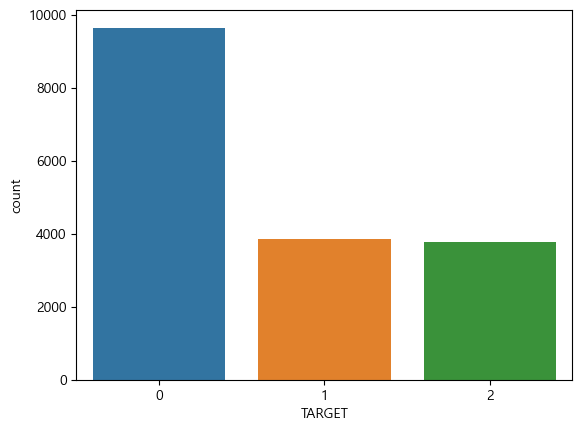

In [315]:
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())

In [6]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [41]:
X, Y = train.drop(['ID', 'TARGET'], axis=1), train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
train_data = lgb.Dataset(X_train, label=y_train)

In [11]:
# Define the parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'None',  # Set to 'None' to use custom evaluation function
    'verbosity': -1
}

# Define the evaluation function for macro F1 score
def macro_f1_score(preds, data):
    y_true = data.get_label()
    y_pred = np.argmax(preds.reshape(len(np.unique(y_train)), -1), axis=0)
    f1 = f1_score(y_true, y_pred, average='macro')
    return 'macro_f1', f1, True

In [12]:
# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100, feval=macro_f1_score)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the macro F1 score on the test set
macro_f1 = f1_score(y_test, y_pred, average='macro')

print('Macro F1 Score:', macro_f1)

Macro F1 Score: 0.5268036859684982


In [13]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)
macro_f1 = f1_score(y_train, y_pred, average='macro')

print('Macro F1 Score:', macro_f1)

Macro F1 Score: 0.541684988379428


In [ ]:
#hyper opt + Lightgbm

In [47]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Define the objective function to optimize
# Define the objective function to optimize
def objective(params):
    # Convert the parameters to appropriate types
    learning_rate = params['learning_rate']
    max_depth = params['max_depth']
    num_leaves_choices = [31, 63, 127]  # Valid values for num_leaves

    if 'num_leaves' in params:
        num_leaves = num_leaves_choices[params['num_leaves']]
    else:
        num_leaves = num_leaves_choices[0]

    feature_fraction = params['feature_fraction']
    bagging_fraction = params['bagging_fraction']

    # Create the LightGBM model with the given parameters
    model = lgb.LGBMClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        feature_fraction=feature_fraction,
        bagging_fraction=bagging_fraction,
        random_state=42,
        silent=True
    )

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for validation data
    y_pred = model.predict(X_test)

    # Calculate the macro F1 score
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Return the negative macro F1 score (as hyperopt minimizes the objective)
    return -f1_macro

In [48]:
# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.1)),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'num_leaves': hp.choice('num_leaves', [0, 1, 2]),  # Index-based choices
    'feature_fraction': hp.uniform('feature_fraction', 0.6, 1.0),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.6, 1.0)
}

In [49]:
# Initialize the trials object to store the results
trials = Trials()

# Run the hyperparameter optimization using TPE algorithm
best = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # Adjust the number of evaluations as desired
    trials=trials
)



[LightGBM] [Warning] feature_fraction is set=0.932134392360854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.932134392360854
[LightGBM] [Warning] bagging_fraction is set=0.6293351547957173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6293351547957173
[LightGBM] [Warning] feature_fraction is set=0.8176531476038014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8176531476038014
[LightGBM] [Warning] bagging_fraction is set=0.8963466255957375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8963466255957375
[LightGBM] [Warning] feature_fraction is set=0.6712876278969421, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6712876278969421
[LightGBM] [Warning] bagging_fraction is set=0.72227941690499, subsample=1.0 will be ignored. Current value: bagging_fraction=0.72227941690499
[LightGBM] [Warning] feature_fraction is set=0.691795792392819, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] feature_fraction is set=0.9515071191141727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9515071191141727
[LightGBM] [Warning] bagging_fraction is set=0.6751193829970322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6751193829970322
[LightGBM] [Warning] feature_fraction is set=0.7923884722139484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7923884722139484
[LightGBM] [Warning] bagging_fraction is set=0.8469372874401451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8469372874401451
[LightGBM] [Warning] feature_fraction is set=0.9776749123755013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9776749123755013
[LightGBM] [Warning] bagging_fraction is set=0.6967303042622318, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6967303042622318
[LightGBM] [Warning] feature_fraction is set=0.6818064782152881, colsample_bytree=1.0 will be ign

In [50]:
# Convert the index-based choice for 'num_leaves' to actual value
best['num_leaves'] = [31, 63, 127][best['num_leaves']]

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(best)

Best Hyperparameters:
{'bagging_fraction': 0.653260710165063, 'feature_fraction': 0.6741109123384996, 'learning_rate': 0.04458172261972605, 'max_depth': 3, 'num_leaves': 127}


In [51]:
best

{'bagging_fraction': 0.653260710165063,
 'feature_fraction': 0.6741109123384996,
 'learning_rate': 0.04458172261972605,
 'max_depth': 3,
 'num_leaves': 127}

In [52]:
model = lgb.LGBMClassifier(**best)

In [53]:
model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6741109123384996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6741109123384996
[LightGBM] [Warning] bagging_fraction is set=0.653260710165063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.653260710165063


LGBMClassifier(bagging_fraction=0.653260710165063,
               feature_fraction=0.6741109123384996,
               learning_rate=0.04458172261972605, max_depth=3, num_leaves=127)

In [54]:
# Apply the model to the train data
y_pred = model.predict(X_train)

# Print the predicted labels
print("Predicted labels:")
print(y_pred)

Predicted labels:
[1 0 1 ... 1 2 0]


In [56]:
score = f1_score(y_pred,y_train,average='macro')
score

0.5146758207494583

In [57]:
# Apply the model to the test data
y_pred = model.predict(X_test)

# Print the predicted labels
print("Predicted labels:")
print(y_pred)

Predicted labels:
[2 0 0 ... 0 0 0]


In [58]:
score = f1_score(y_pred,y_test,average='macro')
score

0.5214062032501041

In [62]:
x_test = test.drop('ID', axis = 1)
y_pred = model.predict(x_test)

In [64]:
sub['TARGET'] = y_pred
sub.head()

ID  TARGET
0  TEST_00000       2
1  TEST_00001       0
2  TEST_00002       0
3  TEST_00003       0
4  TEST_00004       0

In [68]:
sub.to_csv('sub_lgbm_hyperopt.csv', index = False)

TARGET
0    9805
1    3436
2    4048
dtype: int64


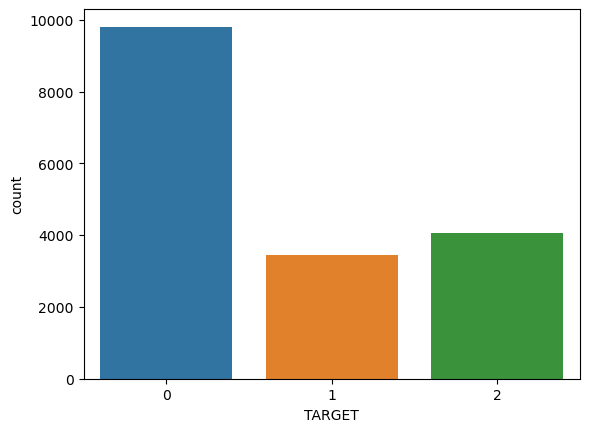

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='TARGET',data = sub)
print(sub.groupby('TARGET').size())